In [1]:
import csv
import os
import shutil

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Separa em arquivos

In [ ]:
# Define the input and output file names
input_filename = "putty_20_09_001_12b.csv"
output_dir = "EXP0/"
filename = None

# Initialize flags to control whether to write lines to the output file
writing_enabled = False
iteration = 0

# Open the input and output files
with open(input_filename, "r") as input_file:
    # Iterate through lines in the input file
    for line in input_file:
        # Check if the line contains the "---" symbol to start writing
        if "Filename: " in line:
            filename = line.strip("Filename: ")
            filename = filename.strip("\n")
            continue  # Skip this line
        # Check if the line contains the "---" symbol to start writing
        if "---" in line:
            writing_enabled = True

            # Create new file
            output_filename = output_dir + filename + f'_{iteration}.csv'
            output_file = open( output_filename, "w")
            print(output_filename)

            continue  # Skip this line
        # Check if the line contains the "+++" symbol to stop writing
        elif "+++" in line:
            writing_enabled = False
            iteration = iteration + 1
            continue  # Skip this line
        # If writing is enabled, write the line to the output file
        if writing_enabled:
            output_file.write(line)

# Converte os dados para SI

In [ ]:
def multiply_and_add_column(input_file, output_file, column_name, multiply_constant, add_constant):
    # Read the input CSV file
    df = pd.read_csv(input_file)

    # Multiply the column values by the multiply_constant and add the add_constant
    df[column_name] = df[column_name] * multiply_constant + add_constant

    # Write the modified data to the output CSV file
    df.to_csv(output_file, index=False)


# Iterate over the files in the folder
for filename in os.listdir('EXP0/'):
    file_path = 'EXP0/' + filename
    multiply_and_add_column(file_path, file_path, 'temp', 165.0/65535.0, -40)
    multiply_and_add_column(file_path, file_path, 'humi', 100.0/65535.0, 0)

    channel_list = ["tgs2600","tgs2603","tgs2611","tgs2602","micsD","micsH","micsA"]
    for i in channel_list:
#         multiply_and_add_column(file_path, file_path, i, 3.3/pow(2,23), 0)
        multiply_and_add_column(file_path, file_path, i, 5/pow(2,12), 0)
    print(file_path + ' ok!')


# Print time series

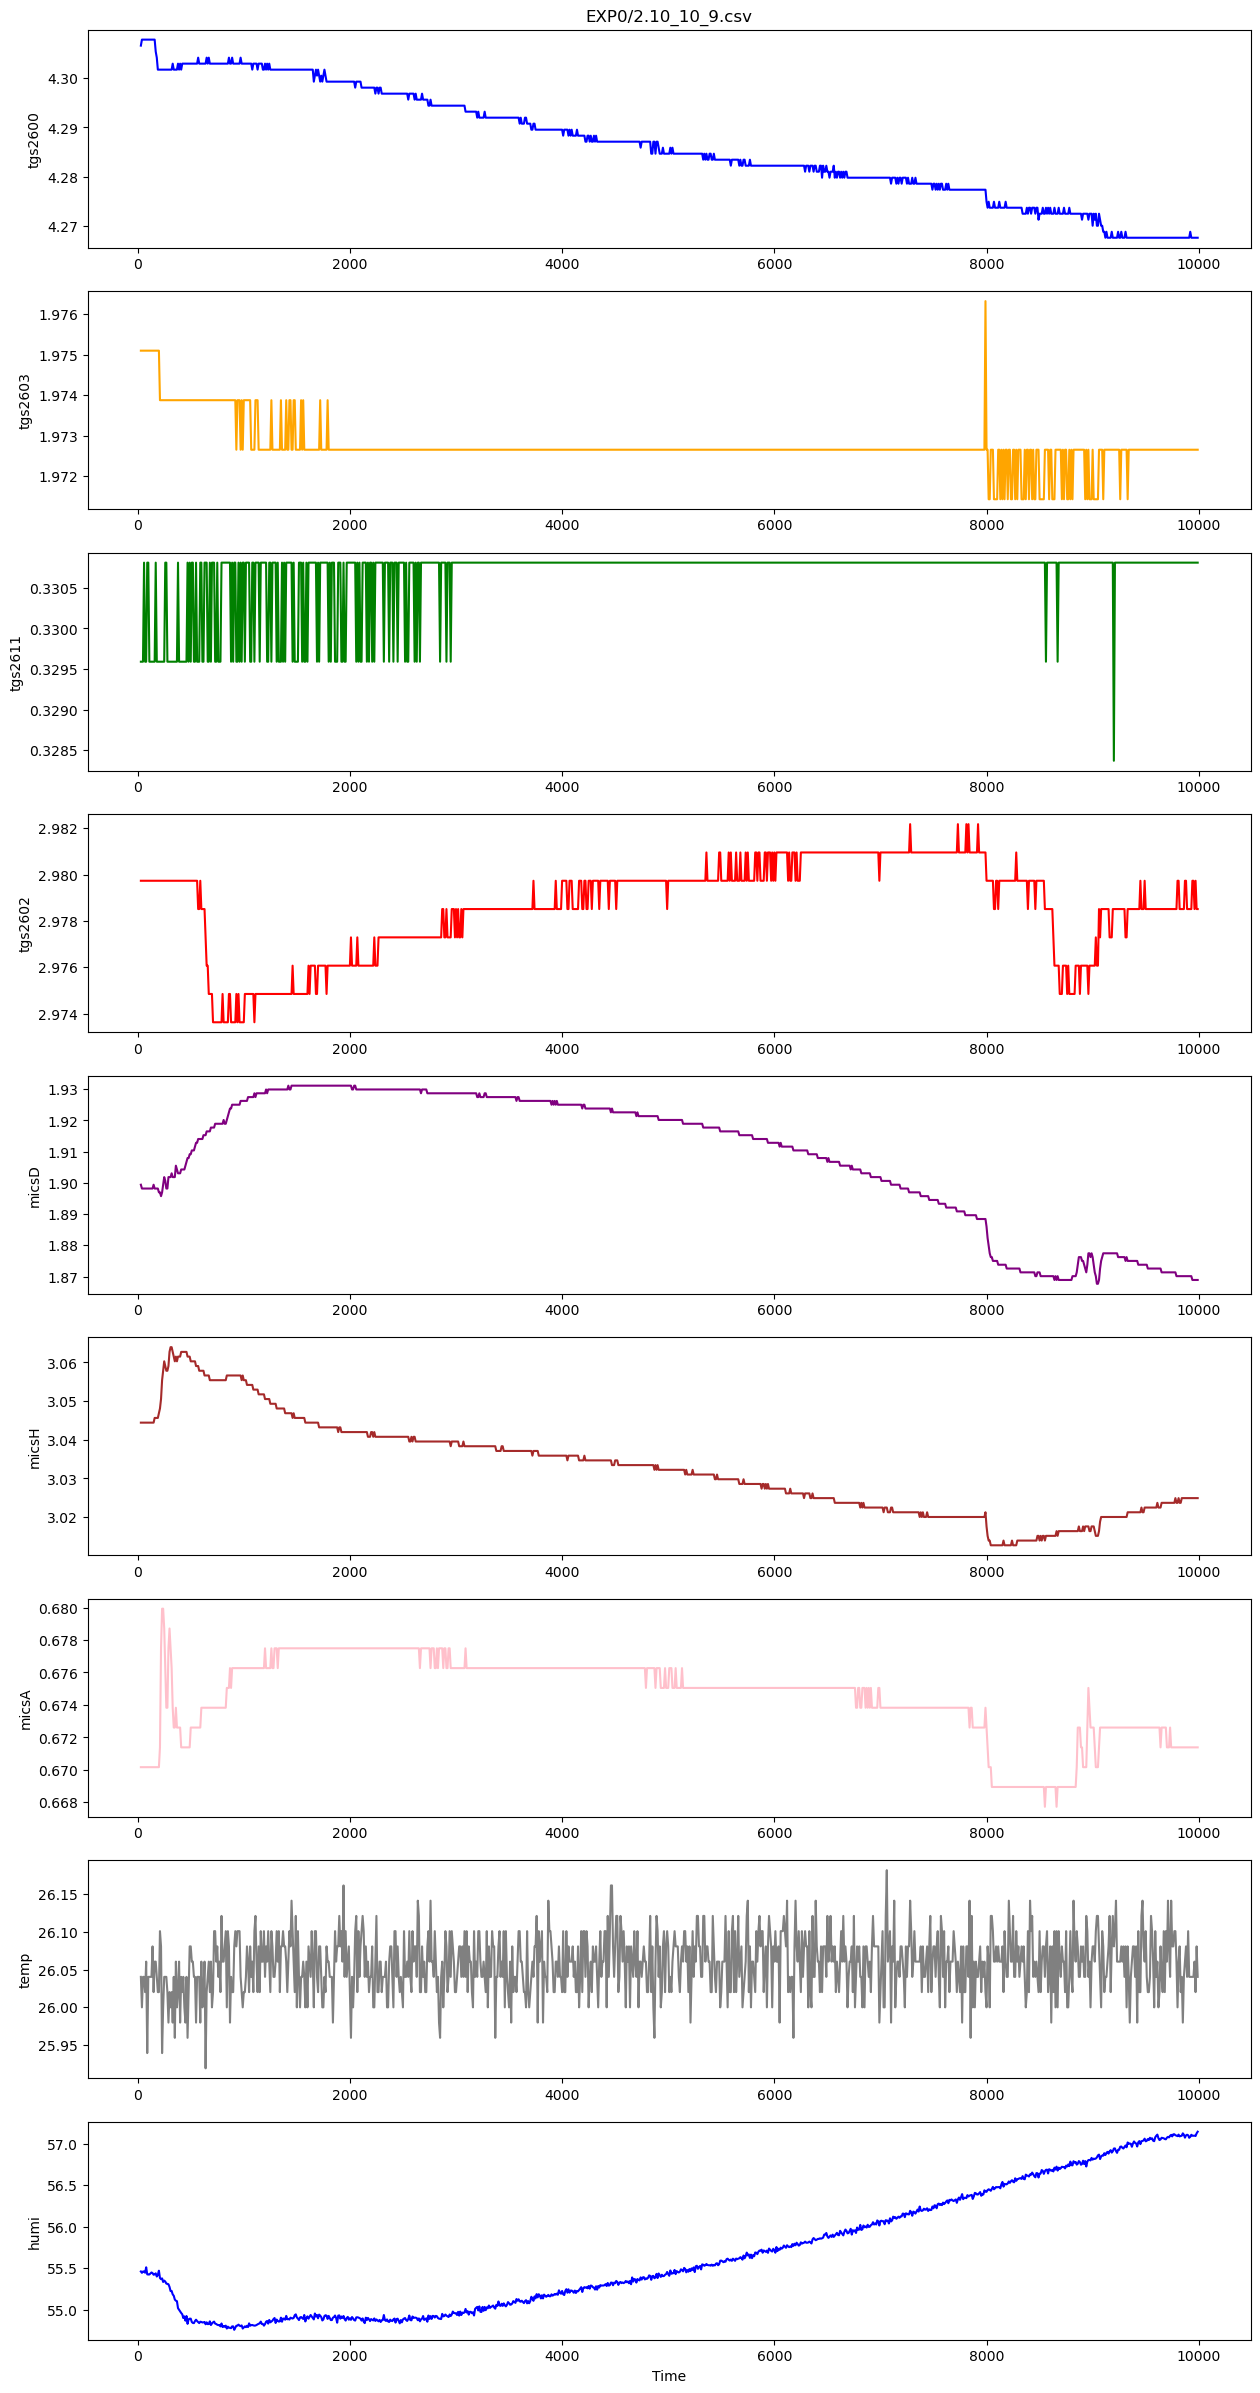

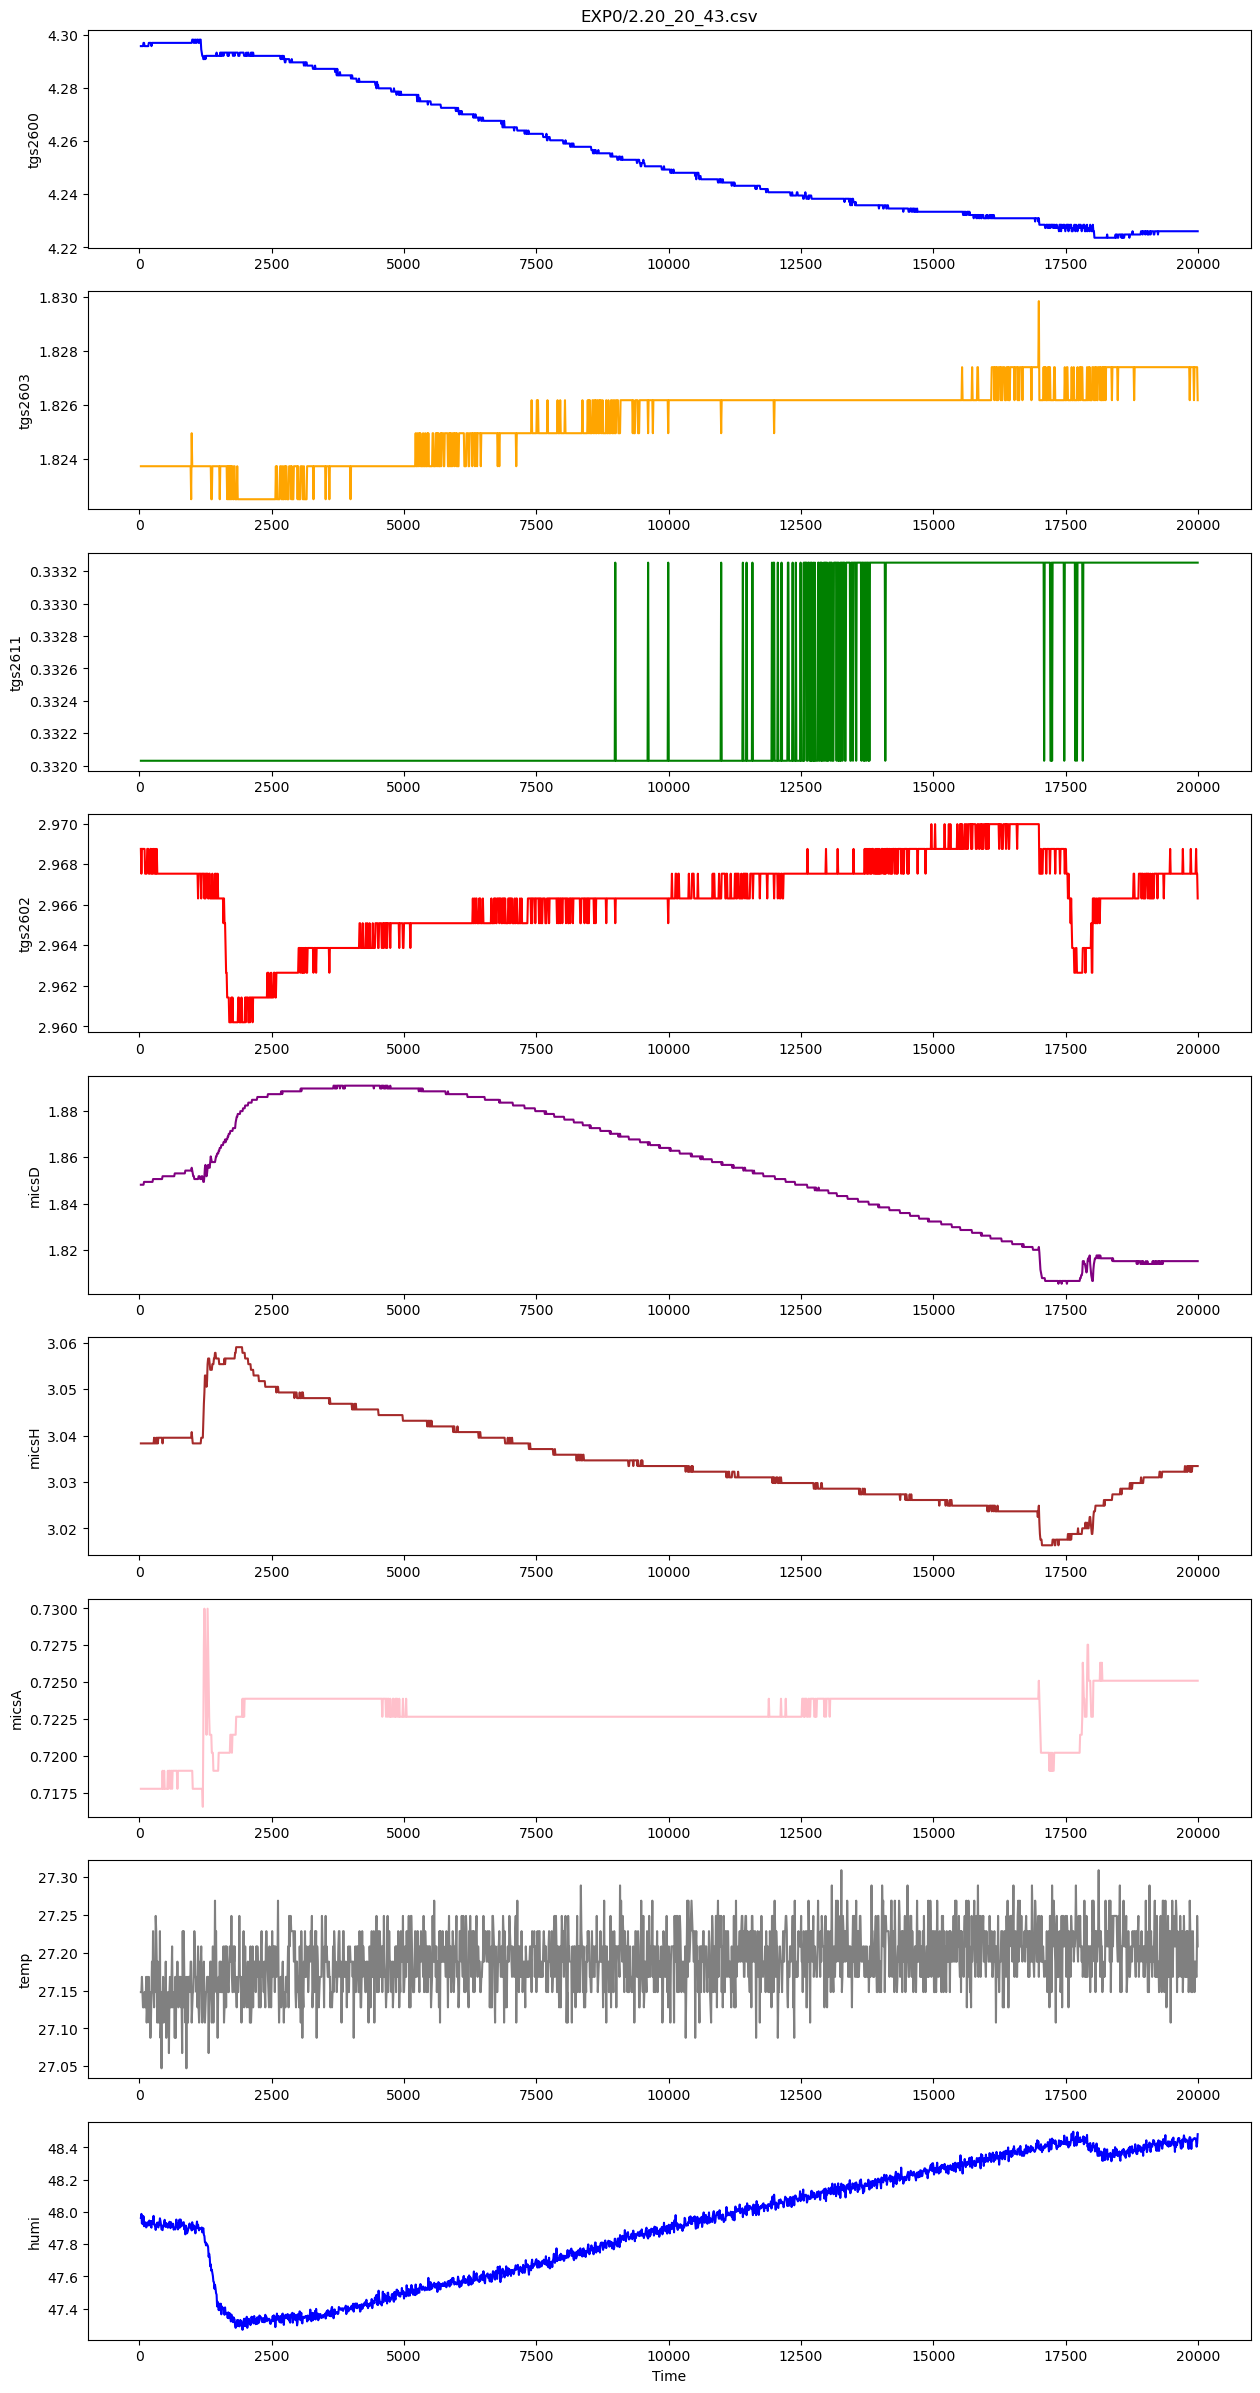

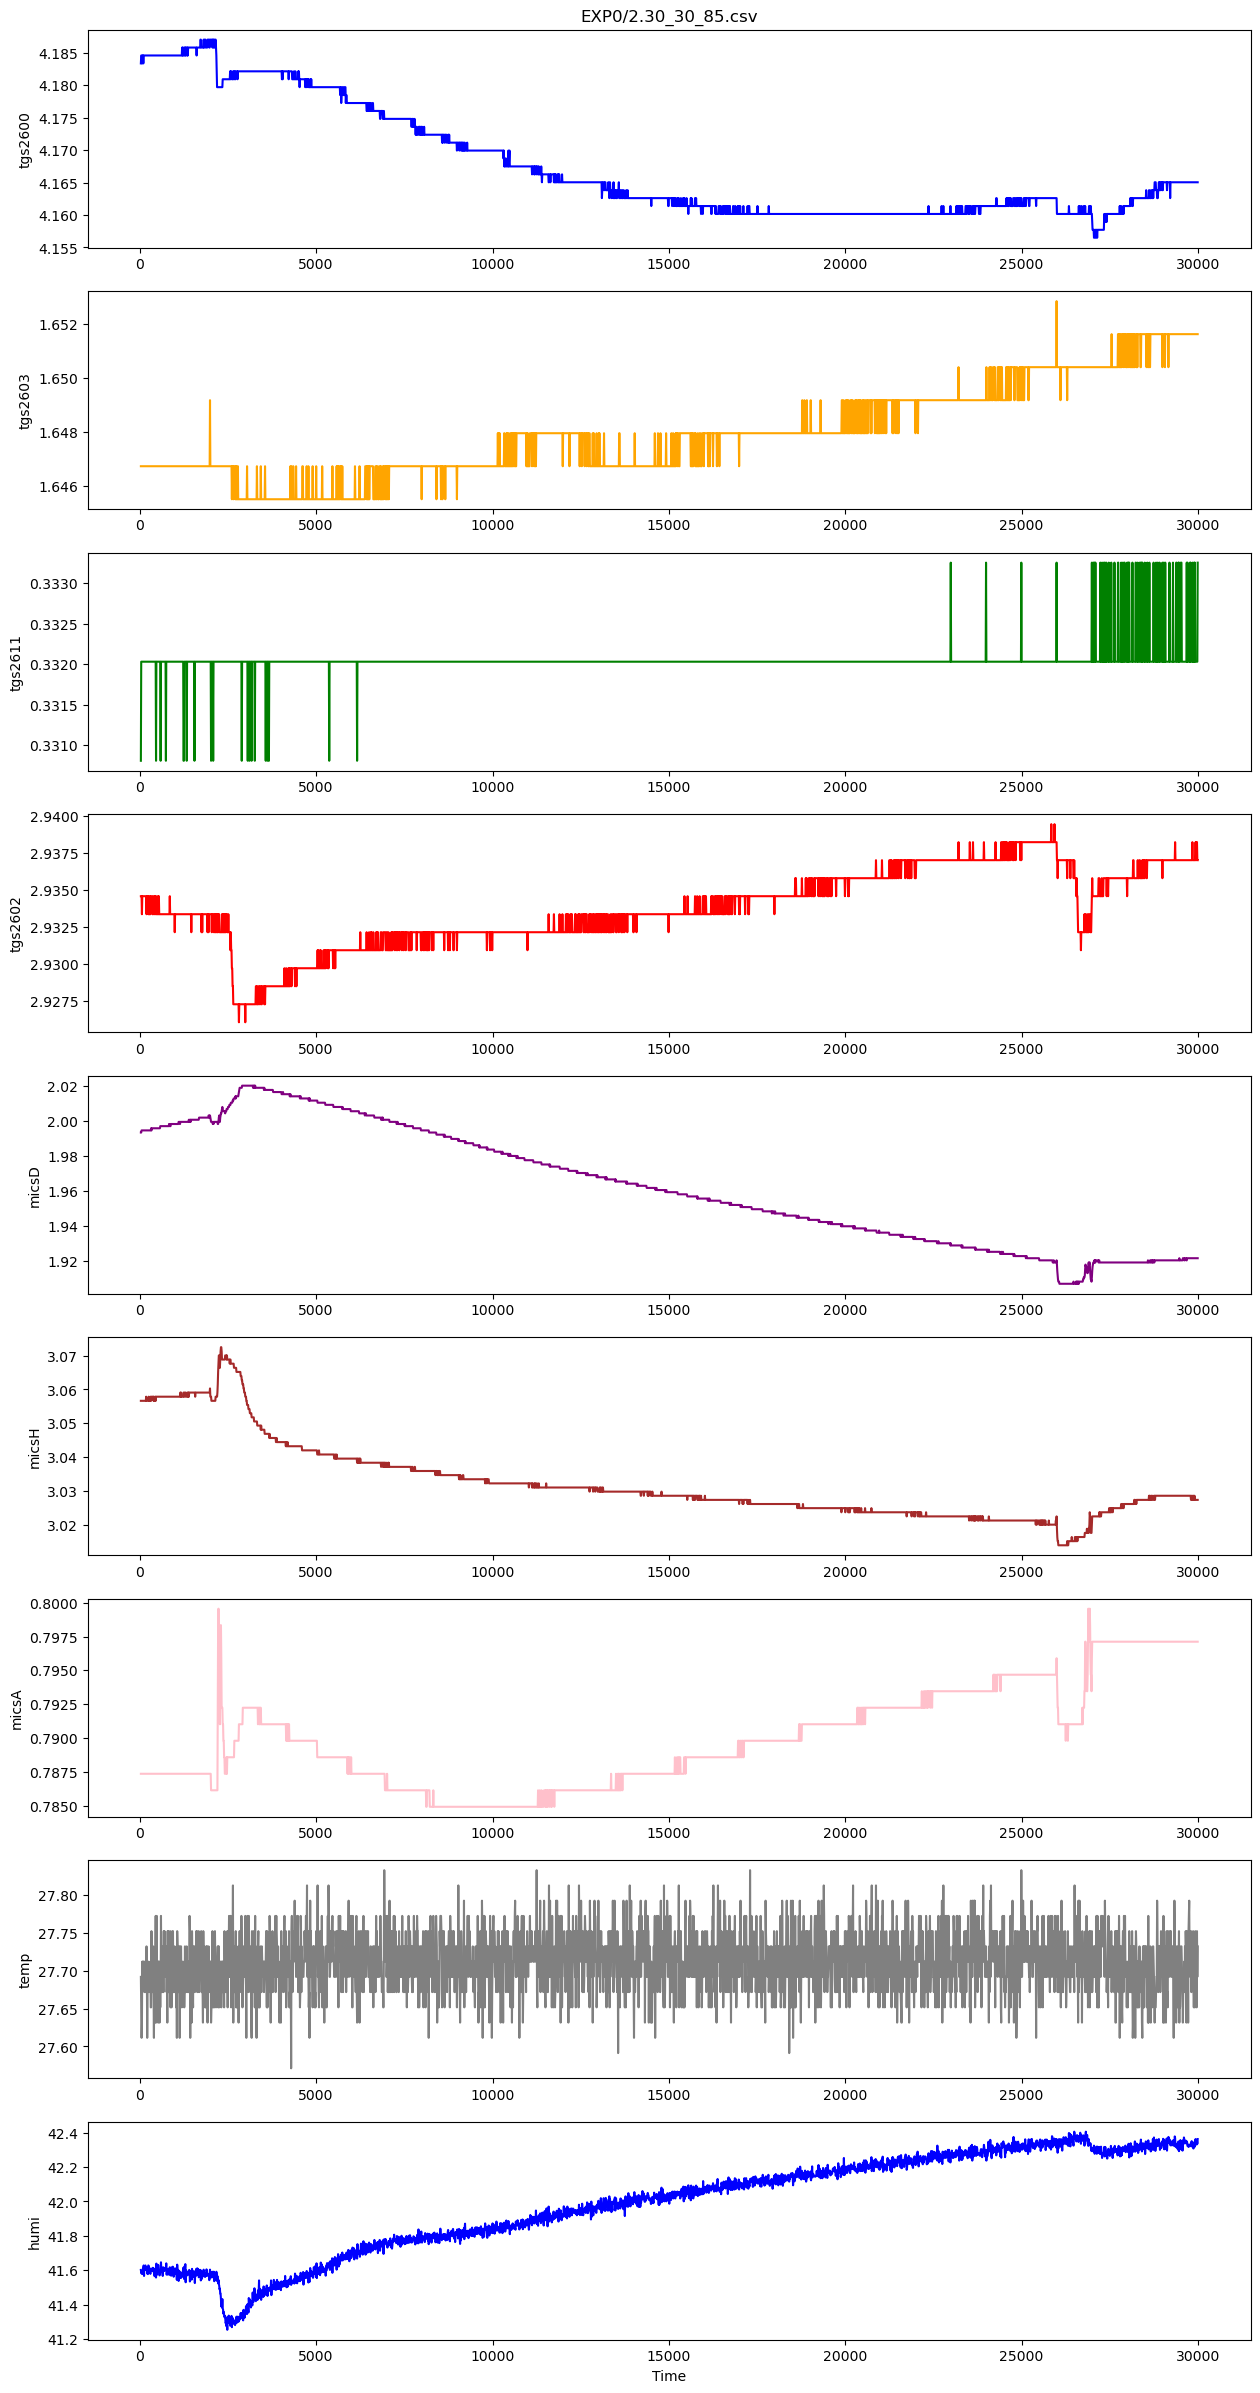

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


### Print in differnt axes
def plot_data_from_csv(csv_file, column_list, graph_name):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Extract the header names as time vector and data series
    time_vector = 'timestamp'
    
    # Create the figure and axis objects
    fig, ax = plt.subplots(len(column_list), figsize=(15,30))
    color_names = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']
    
    ax[0].set_title(graph_name)
    for i in range(len(column_list)):
        ax[i].plot(df[time_vector][3:], df[column_list[i]][3:], color=color_names[i % len(color_names)])
        ax[i].set_ylabel(column_list[i])
        
    ax[i].set_xlabel('Time')
    # Show the plot
    plt.show()

#### Print in the same axes
# def plot_data_from_csv(csv_file, column_list, graph_name):
#     # Read the CSV file into a DataFrame
#     df = pd.read_csv(csv_file)
    
#     # Extract the header names as time vector and data series
#     time_vector = 'timestamp'
    
#     # Create the figure and axis objects
#     fig, ax = plt.subplots(figsize=(15, 6))  # Create a single set of axes
    
#     ax.set_title(graph_name)
#     ax.set_xlabel('Time')data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABOwAAAlZCAYAAAAYlf6DAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOzdeZyO9f7H8dc9mLEPsk52lbUQUaGSUllKm1JHaDstkrSROi2nUud0tJ42p9C+ifZFC1KKaFotyZolFMY6zLh+f3x/hsnSqBn3mHk9H4/7Ye7r+t7X9bl07jrePt/vNxZFUYQkSZIkSZKkfCEh3gVIkiRJkiRJ2sbATpIkSZIkScpHDOwkSZIkSZKkfMTATpIkSZIkScpHDOwkSZIkSZKkfMTATpIkSZIkScpHDOwkSZIkSZKkfMTATpIkSZIkScpHDOwkSZIkSZKkfMTATpIkaTdGjBhBLBbb5WvcuHHMnDmTkiVLcs455+zw+ZUrV7L//vvTunVrMjMzAbjllluyXSMxMZE6depw5ZVXsmrVqmyfX7t2Lf379yclJYXixYvTrFkzXnjhhV3W+/rrr1O0aFGWL1/OrFmzuOaaa2jRogXlypWjQoUKtGnThldeeSXHz3/jjTfSpUsX9t9/f2KxGL17997l2Dlz5nDaaadRrlw5SpcuzfHHH8+0adNyfK+tvv/+ey677DKOOOIISpUqlfX7vCsvvPACzZo1o3jx4qSkpNC/f3/Wrl27x/fN7WtJkiT9WQZ2kiRJOTB8+HAmTZq0w+vQQw+lfv363HnnnTz//POMGjUq2+cuu+wyfvvtN0aOHEmRIkWynXv33XeZNGkSb731Ft26dePBBx/kpJNOIoqirDGnnXYaI0eO5Oabb+add97hsMMOo0ePHjz33HM7rXPUqFEcddRRVKpUiffff5+33nqL008/nZdffplnn32WAw88kDPPPJPbbrstR89977338uuvv3LyySeTmJi4y3HLly+nXbt2zJo1iyeffJKXXnqJjRs3cswxxzBz5swc3WurL7/8kjFjxlChQgU6dOiw27HPPvssPXr04LDDDuOdd97h5ptvZsSIEZx22ml7dM/cvpYkSdJfEkmSJGmXhg8fHgHRlClTdjtuy5Yt0VFHHRVVqlQp+uWXX6IoiqKXXnopAqL//Oc/2cbefPPNERAtX7482/GePXtGQDRx4sQoiqLorbfeioDoueeeyzbu+OOPj1JSUqKMjIxsxzdt2hSVK1cueuihh6IoiqLly5dHW7Zs2aHWzp07RyVLlow2btz4h8+fmZmZ9XOpUqWiXr167XTctddeGxUrViyaN29e1rHVq1dHFStWjLp37/6H99nVPV9++eUIiD7++OMdxmVkZETVqlWLOnbsmO34s88+GwHR22+/neN75ua1JEmS/io77CRJknJBLBZj+PDhrF+/nksuuYSlS5dy6aWX0q5dO/r375+jaxx++OEAzJ8/H4DRo0dTunRpzjzzzGzj+vTpw+LFi/niiy+yHf/www9ZvXo1p556KgAVK1YkFovtcJ9WrVqxfv16fvvttz+sKSEhZ/93cfTo0Rx77LHUqlUr61jZsmU57bTTeOONN8jIyMjRdfbknp9//jlLliyhT58+2Y6feeaZlC5dmtGjR+f4nrlxrVWrVnH11VdTt25dkpKSqFy5Mp06dWLGjBlZYx555BGaNm1K6dKlKVOmDA0aNOCGG24A4OuvvyYWi/HEE0/scO133nmHWCzG66+/nuNnkiRJ+y4DO0mSpBzIzMwkIyMj22vrmnRb1a1bl3//+9+MHj2atm3bsnHjRoYPH57jAGr27NkAVKpUCYDvvvuOhg0bUrRo0WzjDjnkkKzz2xs1ahRHHHEEKSkpu73Pxx9/TKVKlahcuXKO6vojGzZs4Keffsqq6/e1btiwgTlz5uTKvba39fl/f99ixYrRoEGDHX5/8vJaa9asoW3btjz22GP06dOHN954g0cffZSDDjqIJUuWAGF9vMsuu4yjjz6a0aNHM2bMGK666irWrVsHQNOmTWnevDnDhw/f4fojRozICgAlSVLBV/SPh0iSJGlr99v2ihQpskPn2CWXXMIDDzzAjBkzuOeee6hXr94ur7k1BFy7di1vvfUWjz76KDVq1KBdu3YA/Prrr9StW3eHz1WoUCHr/PbXGjNmDIMGDdrtc/zvf/9j3Lhx3H///TusqfdnrVy5kiiKsur6o1pzy9Zr7uq+8+bN22vXuu+++/j+++8ZO3Ysxx13XNbx7de/+/TTTylXrhwPPPBA1rHfr9HXp08f+vXrx6xZszjooIOA8Pv72muv0bdv3x3CW0mSVDDZYSdJkpQDTz31FFOmTMn2+v2UVAgbScyYMYOEhAQ++OCD3V6zatWqFCtWjPLly/O3v/2NQw89lHfffZfixYtnjdnZlNadnRs/fjwrVqzY7QYJ77zzDpdffjlnnHEGV1xxxW5r+zNyWuveuu+fueefvdY777zDQQcdlC2s+71WrVqxatUqevTowWuvvcaKFSt2GHPuueeSlJTEiBEjso49//zzpKen7zBdV5IkFVwGdpIkSTnQsGFDWrZsme3VokWLbGNWrVrFhRdeyGGHHcZjjz3Gu+++u9P1yLb64IMPmDJlCqmpqaxYsYKJEyfSqFGjrPP77bffTjvTtq49t3032CuvvEKLFi2oXbv2Tu/13nvvcdppp3H88cfz7LPP5mqAVr58eWKxWI5rzS377bcfsPPuvd9++22P7vlXr7V8+XKqV6++2zE9e/bkySefZP78+Zx++ulUrlyZ1q1bM3bs2KwxFSpU4OSTT+app57KmnI9YsQIWrVqRePGjXP8PJIkad9mYCdJkpRLrrjiCn777TdGjhzJhRdeSKdOnRgwYAA///zzTsc3bdqUli1b0rRp06zAaHsHH3ww06dP32Ha7bfffgtAkyZNANiyZQujR4/m9NNP3+l93nvvPbp168bRRx/NqFGjSExM/CuPuYMSJUpwwAEHZNX1+1pLlCix06m9f9XBBx+cdY/tZWRkMGPGjKzfn71xrUqVKu3yn/P2+vTpw2effcbq1at56623iKKILl26ZG00snXMokWLGDt2LD/88ANTpkyxu06SpELGwE6SJCkXvPbaazzzzDP885//pGHDhgA8/vjjJCQkcNFFF/2pa5566qmsXbuWUaNGZTs+cuRIUlJSaN26NQCfffYZS5cu3Wlg9/7779OtWzfatm3LmDFjSEpK+lO15KTWjz76iIULF2YdW7NmDa+++ionn3xynqy91rp1a6pVq5Zt+iiEbsO1a9fudnpwbl/rpJNOYtasWXz00Uc5ul+pUqU46aSTGDx4MJs2beL777/POtexY0f2339/hg8fzvDhwylevDg9evTI8bNIkqR9n6vWSpIk5cB33323Q6cbQL169YjFYvz973/nyCOPZMCAAVnn9t9/f+6991769OnDE088wQUXXLBH9zzppJM4/vjjufTSS0lLS+OAAw7g+eef59133+WZZ57J2jTilVdeoUmTJlmbFGw1ceJEunXrRtWqVbnhhhtITU3Ndr5Ro0aULVsWCGv0nX/++Tz55JOcd955WWPGjx/P8uXLgbCxxfz583nllVcAOProo7N2tL3mmmt4+umn6dy5M7fddhtJSUncddddbNy4kVtuuWWPnnv9+vW8/fbbAHz++edZdaxYsSIr6IKw6ce//vUvevbsyd///nd69OjBjz/+yHXXXcfxxx/PiSeemON77sm1xo8fT4cOHfjHP/7BP/7xDwD69+/Piy++yCmnnMLAgQNp1aoVGzZsYPz48XTp0oX27dtz0UUXUaJECdq0aUO1atVYunQpQ4YMITk5mcMOOyxbLeeddx5Dhw6lbNmynHbaaSQnJ+/R76EkSdrHRZIkSdql4cOHR8AuX8OGDYvOPPPMqGTJktGsWbN2eo1OnTpFZcuWjRYsWBBFURTdfPPNERAtX778D++/Zs2aqF+/flHVqlWjxMTE6JBDDomef/75bGNq1KgR3XzzzTt8dut9dvX6+OOPd3jO4cOHZ7vG0UcfnaPPR1EUzZ49O+rWrVtUtmzZqGTJklGHDh2iqVOn/uEz/t7cuXN3ec9atWrtMP65556LDjnkkCgxMTGqWrVq1K9fv2jNmjV7fN+cXuvjjz+OgB1+z1euXBldeeWVUc2aNaNixYpFlStXjjp37hzNmDEjiqIoGjlyZNS+ffuoSpUqUWJiYpSSkhJ17949+uabb3aoY9asWVnPPHbs2D/1LJIkad8Vi6Io2gu5oCRJkvLA5MmTad26Nd98803WOmySJEnatxnYSZIkSZIkSfmIa9hJkiRpr8jMzGR3f1cci8Wy1uXLTTtbe3B7CQkJJCS4F5skSco//H8mkiRJ2is6dOhAsWLFdvmqV69ert9z3rx5u71nsWLFuO2223L9vpIkSX+FU2IlSZK0V8ycOZM1a9bs8nxSUlKur8O3adMmvvnmm92OSUlJISUlJVfvK0mS9FcY2EmSJEmSJEn5iFNiJUmSJEmSpHzETSfy0JYtW1i8eDFlypQhFovFuxxJkiRJkiTFURRFrFmzhpSUlN1uemVgl4cWL15MjRo14l2GJEmSJEmS8pGFCxdSvXr1XZ43sMtDZcqUAcI/hLJly8a5GkmSJEmSJMVTWloaNWrUyMqMdsXALg9tnQZbtmxZAztJkiRJkiQB/OHSaW46IUmSJEmSJOUjBnaSJEmSJElSPmJgJ0mSJEmSJOUjBnaSJEmSJElSPmJgJ0mSJEmSJOUjBnaSJEmSJEmKu40b4c03Yf36eFcSfwZ2kiRJkiRJ+su2bIGvvoKMjBC+PfoofP11zj4bRXDmmdC1K3TqBOnpeVtrflc03gVIkiRJkiQp9yxfDmXLQlJSzsavWQNlyoSfp02Dq66COnXguuugUaOdf2bjRpg0CaZPh969Q1h3zjnwxhvQoUOo4ZtvIDk5hHgzZ8L48bBpUwjn5s8PoVyrVuH93XfDhg3h2uPHw5FHwsknw4EHhusWNrEoiqJ4F1FQpaWlkZyczOrVqylbtmy8y5EkSZIkSfuQKIL//S+EX/37hwCuSBFYvRo++ADmzYM+fWDdOnj+eShXDn78Ee69F1JS4NZbQ+C1YgV8910Iz1q2DNNO58yB4sVhxgz4/PPQ1Va3brjfxo3baqhfP1yjbl14770QtCUmQlratjEHHhjqmjHjrz1v0aJw1lkh9Nt6/eOPh/ff/2vXzU9ymhUZ2OUhAztJkiRJkrQ7mzfDK69A06ZhKmmxYiEAW7s2dK699tq2scWLw8EHw7ffbgvVataEpUtD51puadIkhINTp+7Z56pUgYsvhrvugnbt4M474dxz4aefwnOdd14IFQFq1Qoh3wMPhO67G28MnX0VKsDPP8N//wsrV0KDBiGsLCgM7PIBAztJkiRJkgq+LVtCF9gnn4SpnJ07h+MZGXD++ZCaCkcdBa+/HjrcTj01nCtRAh5+OHxuexUrhmv+9lvoZktODl1226tdO3TYbdWiBVSqFLrUunUL58aNC2Fe2bLQuDGMHRven3EGHHEELFwYauvaNYRmmzeHz3btGgLAu++GkiXD1NXVq0OoeNhhobaqVUNdn3wCDz4INWqEYK1mzdDxV6pUqCszE778MnT81aix4+9dRkZ4tmrV/vI/hn2CgV0+YGAnSZIkSVLBtn59mLb52WfbjpUvD/vtF8KquXNzfq1SpSAWC911ENaRe+ml0PG2cGE4/uOP4X3DhjB7dgj8Tj4Z2rf/4+uvWxdCwJ0FZ9o7DOzyAQM7SZIkSZIKtmefhb/9LYRt69btfuxxx0G9eqEbr27d0MW2cCHccEPoeitZMkwT/fTT0CnXqlWYSqqCI6dZkbvESpIkSZIk/UnTp4dfzz0XbropTDVNTIQBA8KvzZqFqa+TJ4c13IrmIIk5+ug8LVn7AAM7SZIkSZKk35k9G5YtC+u2zZ0bNmGYNi3sXvrJJ5CQACedBN9/H8Y3bAjVq4cpq4mJ4fz2mjTZ+8+gfZeBnSRJkiRJKjA2bYKJE0MnW7t2EEUheKtaNWxwULRoWFtu1qywG+u0aWGa6qpV8Nhj4fyWLTB0aNiEYXdGjtz2c4MG4dfixfPs0VSIGNhJkiRJkqR91rp10LNn2Kzhkkvg2mvh66/DuRNP3LaDK4Qwrn59WLIkbL6wJ2IxaN48dNp16ABz5sBzz20737Bh7jyPBG46kafcdEKSJEmSpD3344/w1VfQrRs8/ji8/TZcfjmMGhVejRpBSkrYNXVrGJcb2reH5OTQiXf++VCpEnz3HfTqFTr1SpbcNjYzM/t6dJmZO06DlX7PXWLzAQM7SZIkSZKC9HT45huoWROqVNl2fMMGuO8++OKLsHNq27bQp09YK658eVi5MmfXT0mBxYvDLqvjxkHFinDRRaHb7u9/D9dr3z7swHrCCVCnTtgkon37cO9GjWDgwD0L3Q49NASLEAI96Y8Y2OUDBnaSJEmSpIIoisIU0d/LzIS774Z33oFatUKnWmoqrF4dgrf09DCudesQmG3cGHZPXbx41/cqXz6Ecd9/D40bw2mnwZgxcNhhcPjh8MEHcOSRcOWV4V5RFKaubrV5MxQrlosPv50ZM6BTJ7jqKrjiiry5hwoWA7t8wMBOkiRJkrSvW74cnngCzjgDDjgAFi4MQVmZMnD99XDUUfDoo2FX1TlzQhfdrpQrF8K73ycRKSmhq+6ll8L1zzknTEOdNAkuuABKlAjBXIcOULp0nj6ulKcM7PIBAztJkiRJUn6zfn3YyXT7qZ8TJsCUKWGq6IwZYRrpNdeEDRuOOSaEcMWKhfBs/HiYPn3X1y9ZMqw3V6lS+Pyhh0LlyiHgq10bpk4N165bF1q2DL8ec0wI5TIzQ0ecO62qoDKwywcM7CRJkiSpcEhLg7Fjw5TNBg32/PNbtoSgKinpr9Wxbh0sWxamm/7ep5+GIO3rr6FduzBttU+fENTNm7fj+N69wzTW117b+b0uuwxefRWWLoUmTcJacJUqwYUXQrVqf+05pILKwC4fMLCTJEmSpH3Hpk2QmLj7MatWwYsvht1J27YNmyV89RXMnLltTN++cP/9oSutVi0oWxaGDQudbbNnh3CvXbuw+cLChSFke+ABmD8/TPls0AD694d69cIacFvXg7vssvDrPfeELrUoggoVYMkSOOUUuPVW+Ne/QvBXpUq4/oknhs+vXRtq/KMEoGTJUOf2EhPh5ZfDdNXFi+Hjj8N13347nP/9bqmSds3ALh8wsJMkSZKk/CWKwhpqiYkhnNp67K674IYboGpVOOSQ8DrhhBBUffttCN0WLNj9VNDtNWoEP/wQppEedFDYMGFPVawIK1bs+ed257zzwrTU227Lfrx2bfjkE9h///D7ccUV8PDDYcfVBx+ESy/dNnbFijC99a92A0qFkYFdPmBgJ0mSJEl7VxSFrrSPPgrTNNPTQ1fYhx+G7rapU0PoVqxYWDtt6dIQ4O2J/fcPU0U3boTu3cNacO+8A888EzrwevUKNfxekyZh99LateGRR2DNmtAJt3w53H576K774AN46qldb9xQogRs2BACxyJFQldguXLw66/h/IMPhum1994bnm3TphA+NmkC3brB6aeHjrgbbgidfuedB0ccEerdvksuMxN+/DF08FWuvGe/P5J2zcAuHzCwkyRJkqQ988UXUL9+CKG2l5kZgrevvw5B06mnhnBu1qzQKffiiyHkevvtENJlZoYusDVrcnbfhAS46SY46aRwnXffDeuzHXhgOL5hA5QvH9Zpq1gxhHVr1oQ12yCEZFs3cXj77fCZv/8d2rSB118P02fbtdt2vw0bQp1ly4ZfS5TYdi49HT7/PNzjs8+gRQsYMQK6dIHzz9/W8VeyZBhbsWLo5qtQIYSB29u40Q0cpPzEwC4fMLCTJEmSpN2LotAFNnEizJ0LF10UOsI+/xyGDw8h1EEHwVlnhQ65rZKTQ1fYunU5u0+jRtC5cwi0evQIgdykSXDuuWGtt6JFt4VvW82dCykpTv2UlHsM7PIBAztJkiRJhU0UwYQJYS24+vUhNTVMR61SJXTFrV4dArqpU+G990Jn3Lp1oSMuJ6pUCRsobA3qihcPXWQdOsAxx8Cxx4ZOuJQUeOyxsIFD164Qi+XVE0tSzuU0K3IfF0mSJEnSH/r117CmWevW4f2mTTBtWtjldMMG+Pnn0Al3550hpEtICF1t33331+8di8EZZ8Cjj4aOu40bw9TYhAQ49NAwNfX3U2gBrrvur99bkuLBwE6SJEmSCpEoCuue7Wpds7lzYdSosO5aWlrYYKFYsbAZwtautsTEcJ3Nm3d+ja0bI2wN65o3hzlzsm/uUKcOrF8P118f1oWrVg1GjgwbI6xZA88/Dy1bhoAwFsu+Nlvx4tuCQ9h5WCdJ+zKnxOYhp8RKkiRJirdPPgk7kM6ZAyefHHYyXb4cbrwxbFrwzjtw4okhmPvwQ3j22ZxPT61UKUw5TUoK01Q//zy8/+AD+OUXeOONEMRddFEI4ZYsgVq1QlBXoULePrck5UcFZg27CRMm8O9//5upU6eyZMkSRo8eTbdu3XY5fsmSJVx99dVMnTqVH3/8kX79+nHfffdlG7N582aGDBnCyJEjWbRoEfXr1+fuu+/mxBNPzBozZMgQXn31VWbMmEGJEiU48sgjufvuu6lfv36OazewkyRJkpTbNm2C6dNDMPb22yEAa9AAbrklrO/24othx9Dy5cNGCvPm7fk9jjkmTEGtVQuWLYOZM0PH3AEHwPvvw+WXh/XpatfetjMqhE0hqld3V1JJ2pUCs4bdunXraNq0KX369OH000//w/Hp6elUqlSJwYMHc++99+50zI033sgzzzzDsGHDaNCgAe+99x6nnnoqn332Gc2bNwdg/PjxXH755Rx22GFkZGQwePBgOnbsyA8//ECpUqVy9RklSZIkaas1a2Dy5DAtNS0NHnkEypSB77+HO+6At94Kx//I9runnnQSrFoFX30VrrFxI9x2Gxx+eJh2+t//hnCuS5cwJbVt211ft1+/XZ874ICcPqUkaXfyfYfd9mKx2B922G3vmGOOoVmzZjt02KWkpDB48GAuv/zyrGPdunWjdOnSPPPMMzu91vLly6lcuTLjx4/nqKOOytH97bCTJEmS9MMPMGwYlC4dOtNKlYL//Aeeew5atICmTUNw9vHHYezYsdnXeuvbF2rUCAHb9iHcriQlwWuvwX77wZdfho68yy4L3XabNoX15yCsQbd159RNm8I6de6kKkl5q8B02OWF9PR0iv+uR7tEiRJMnDhxl59Z/f//xaywm4UW0tPTSU9Pz3qflpO/9pIkSZK0z9k+7NrZuRdfDMHbunXw8suwZUs4d9ddIUj75Zfw/scf4YUXdrxG5cqhi27jRnjooW3Hjz02rEdXrhzcfz+ccw40aRLWpWvVKozfbz84+OAwvmXL7NfdGtZB9vq3Py5Jir9CGdidcMIJDB06lKOOOop69erx4Ycf8tprr5G5i5VVoyhiwIABtG3bliZNmuzyukOGDOHWW2/Nq7IlSZIk7UVRFEKz5OSwCcO8eXDzzWEtt/ffh06dQudaSkoI5RYvDtNWJ08Omypsr2rVsNbb4sUhrKtbF049NaxFN2NG2BAiFoOjjgrB2623hnXgOnWCd98NO6JedBH06hU65QAefXTb9Xc3TVWStO8plIHd/fffz0UXXUSDBg2IxWLUq1ePPn36MHz48J2O79u3L998881uO/AABg0axIABA7Lep6WlUaNGjVytXZIkSVLemTcPvv46hHS33Ramqe7KSy+F184kJcGFF0LZsqHL7qabQiD36qthd9ROnaBEiW3jJ04MG0YceGD264wZA7/9FnZalSQVHoUysKtUqRJjxoxh48aN/Prrr6SkpDBw4EDq1Kmzw9grrriC119/nQkTJlC9evXdXjcpKYmkpKS8KluSJEnSX7ByJaSmho61/fcPYVrRoqHzrXTp0OU2aFCYVrorZcvCeeeFz/zvf2Hsli2hG65t27Bba8+ecNBBYdrq71100c6vu6tNHpKSDOskqTAqlIHdVsWLF2f//fdn8+bNjBo1iu7du2edi6KIK664gtGjRzNu3LidhnmSJEmS4u+XXyA9HWrWDFNMn38eZs8O00SLFYOPPoKhQ2Hp0pxdr2RJqFQJGjYM15w4EXr0CJtF9OgRprdCWI8uMTF05ZUpE9adkyQpN+T7wG7t2rXMnj076/3cuXNJTU2lQoUK1KxZk0GDBrFo0SKeeuqprDGpqalZn12+fDmpqakkJibSqFEjAL744gsWLVpEs2bNWLRoEbfccgtbtmzhuuuuy7rG5ZdfznPPPcdrr71GmTJlWPr//3VPTk6mxPa965IkSZJyVRSFXVJ/36G2ZAl89hkcdljoajv1VPj55zBldGuX2/bdcc8/v+O1q1UL68R9803oqitZMtxv7tzQbXfllXDFFaGD7o9s/WNBvXp/+lElSdqpWBRFUbyL2J1x48bRvn37HY736tWLESNG0Lt3b+bNm8e4ceOyzsV2sl1TrVq1mDdvHgDjx4/n0ksvZc6cOZQuXZpOnTpx1113kZKSsttrAAwfPpzevXvnqPacbtUrSZIkFVbvvRc2aWjWDDp3hrfegltugWnT4KSTwppuDRvCG2/AO++EcG13ihaFE04IAd4774Sut1KlQgh38cXhZ0mS4iWnWVG+D+z2ZQZ2kiRJUrB5c5ieun49DB4cppUeeywceSRkZPy5a9apA9dfHwK96dPhxx+hf3/YuvT0pk1hyqokSflFTrOifD8lVpIkSdK+5eefQyg3ejScey58/31YB+7AA0MH3A8/ZB9ftGiYXrpmTeiA69sXOnYMm0Ns3Bi67Q4/HP7+9zDu3HPDtYYODZtAQJjm+nuGdZKkfZUddnnIDjtJkiTtSxYvhmefhQsugAoVth2PIpgyBWrXDhssfPxxCMyKF4cFC+C44+D22+HNNyEWgxUrdn+fMmVg3bowbbVhwxDmQdiltUmTcF1JkgoiO+wkSZIk7ZFLL4XXX4cbboDLLw/da3XqwD33hK64MmVCF1xOHHZYmAL72Wdw6KHwwAMwbFhYU+6SSyAtDdauDZ1zRf//TyXbh4SSJBVmdtjlITvsJEmSlB+kp8P//gdVqsDpp4cuuJ9+gpdfhtRUWL48hHGvvZaz6zVvHj63/Z8kjj0WBg4Modvq1dC2bQjspk61a06SpK3ssJMkSZIKsS++CF1yxx8fgrjp08PxGjWgZEmYOXPXn61eHdq0CVNWR40K68kNHx6my9apA6edFtalW7cuTGldsSIc35mWLXP/2SRJKujssMtDdthJkiQpt61fD59/Dr/8EgK1I44IgdwDD0D79tC7Nzz9NDz3XBi7VeXKYRrqxo3bjh16KHTvHs699lrY3GHUqDCddasNG0J3XCy21x5RkqQCK6dZkYFdHjKwkyRJ0p5aty50wG3eHDZ0SEuDxx8P68ldeimceCLMmrVn16xUKYR8pUvDN9/AiBHh+sOGbdtlVZIk5T0Du3zAwE6SJEm/F0Xw88+wZEkI41JSYMwYqFoVJkyAp56C+vVh/vzQ3ba9WCx8vnx5aNo0dMtNnRrCt65dw9pxEyaEjRxuuy2sK/fRR2HaavXqcXlcSZK0HdewkyRJkvKBjAy4++7QOXfssWEH1ilTdv+ZGTPCryVKhM+3bBnCua++CsdfeSVcC8K0119/DWvTbdkSPlu/PhQpEs4ff3zePJckSco7dtjlITvsJEmSCqYo2ram27p1IVh7773wWroUVq0Kr8zM0PX24487XqNcuTAGoFo1aNAAatUKu7iuXAkHHgitW4fzsVgI4954I+y82qlT3j+jJEnKfXbYSZIkSbls+XK44AIYNw7OOw9mzw4hXU5UqQLp6XDAAWG31YMOgmXLQrddx44hiNudhAQ45ZS//AiSJGkfYIddHrLDTpIkad/26qvw0kswfnzopFuzZtdjy5aFc88NQVz58qGDrmjR0GXXvHmYsipJkgo3O+wkSZKk7UyfDo88EjZ8OOUUOOIIeO21sP7b+++Haadz5kDdutClCyxcCMOH73idhg2hVy+YOze8P/XUEOa1axd2Y5UkSfqr7LDLQ3bYSZIk7V0//wzJyVCmTHgfRbBoEXzwAVxxBaxdu+fXvOKKsK7cjBlhfbprroFSpXK3bkmSVDjYYSdJkqRC5c03oVu3MDX15JPDhg1PPw2TJm0b065d2F31kUfC+nHVq0PjxnDccWFtuerV4bvvwrp0CQkhqDvttPDZo4+Oy2NJkqRCyA67PGSHnSRJUu4bPx6efx66d4f27eG33+A//4EHH9x1B93BB4epqzfcAElJYS26adOgTZuwzpwkSdLekNOsyMAuDxnYSZIk7ZkpU6BCBahTJwRzU6fCV1+F3Vg3bQpTXles2Da+Xr2wBt2qVeH9McfAxReHrrrHHgvh3LhxcOihcXgYSZKk3zGwywcM7CRJkv5YFIUpqC+9FDZ5SEwMU1PnzNn1Z449Fj79FNLTw/uDD4abbw5TYYsVC8cWLw7TWqtWzftnkCRJygnXsJMkSVK+sHnzthBt/Xr49lt44glISYE33oDvv98WvEHopJszJ6xFd9JJcNBBoUOuWDGoUQMqVgyfXbwY3noLDjwwrE1XpEj2+6ak7L1nlCRJyk0GdpIkScoV8+aFjraaNcP7yZPh0kvDdNbrroPPPw8bQ+zKYYfBlVfCli3hdcYZu9+NNSUFLrooVx9BkiQpXzCwkyRJ0h6bOzesEdelC7RoAeedB6+8Es4ddhhUqxa657YuvnLjjdk/36JFWJ8uIQEqVYLeveGuu/bqI0iSJOVbBnaSJEnKsSVL4J//hCefDNNY//MfyMjIPmbKlG0/9+wZQrnXXoMOHUJwV6MG7LcfrFu3+w46SZKkwsrATpIkSTtYuRJ++QUaNICPP4bXXw9ryz37LKxevW3c9mHdW2+FteYeeQTS0uDss6F1613fw7BOkiRp5wzsJEmSCrkoClNcP/44vBYtCjuwbt4cNn5IS8s+vmVL+Pe/4eij4fnnYcQIOOEE6NQpnL/11r3+CJIkSQVKLIq2riyi3JbTrXolSZLySkYGTJ8OTZpALLbt+KpVMGQIfPllOL9kye6vU7162IX1yiuhX78dd2SVJEnSH8tpVmSHnSRJUgG0aRMsXQp//zu8+y507w7t28PLL8Phh4fOuLlzt40vWjQcb98+THlNT4dWreCLL8I1Dj00fs8iSZJU2Nhhl4fssJMkSXlp5UooWRKSksL7tWvDhhBTpsC338KKFbv/fO3acNNN0KhR6MArXTrPS5YkSSrU7LCTJEkqgD77LKwzt//+0Lcv1K0LLVqEKa2pqWGjiN875RRYsCDsytqxY5gG2749XH89JCfv9UeQJEnSHzCwkyRJyqfWr4f33gsddO3awf/+BwMGZB/z7bfhtVWNGnDeeVCzJpx6agjpatfeq2VLkiTpL0qIdwF/ZMKECXTt2pWUlBRisRhjxozZ7fglS5ZwzjnnUL9+fRISEujfv/8OYzZv3sxtt91GvXr1KF68OE2bNuXdd9/dYdzDDz9MnTp1KF68OC1atOCTTz7JpaeSJEnavbQ0OOooOO006Nw57Nb6+7Bue4cfDldfDd99B7ffDhdfDJUqGdZJkiTti/J9YLdu3TqaNm3KQw89lKPx6enpVKpUicGDB9O0adOdjrnxxht57LHHePDBB/nhhx+45JJLOPXUU/nqq6+yxrz44ov079+fwYMH89VXX9GuXTtOOukkFixYkCvPJUmStNXrr8OLL0IUwUcfhQ0iUlJg6tRwvk6dbWPPPTd03g0dCpMnw+efw6xZMGkS3HNPCPYkSZK0b9unNp2IxWKMHj2abt265Wj8McccQ7NmzbjvvvuyHU9JSWHw4MFcfvnlWce6detG6dKleeaZZwBo3bo1hx56KI888kjWmIYNG9KtWzeGDBmSo/u76YQkSdpq+fIQsB1xBFSoAGvWwG+/wW23wZNPhjElSsCGDds+U6cOvPRSWKNu/vzQdde4MRQpEp9nkCRJ0l/jphO7kZ6eTvHixbMdK1GiBBMnTgRg06ZNTJ06lYEDB2Yb07FjRz777LPdXjc9PT3rfVpaWi5WLUmS9lUvvBDWldu8OYR1xxwDb74JmzZlH7dhAyQkwN//Dn36QMuWEIuFc05tlSRJKjwKZWB3wgknMHToUI466ijq1avHhx9+yGuvvUZmZiYAK1asIDMzkypVqmT7XJUqVVi6dOkurztkyBBuvfXWPK1dkiTtG6IIFi8OHXKDBoWwDkJX3auvbht34IHw+OMhmJs1C44/3nBOkiSpsMv3a9jlhfvvv58DDzyQBg0akJiYSN++fenTpw9Ffje/JLb1r7T/XxRFOxzb3qBBg1i9enXWa+HChXlSvyRJir8oCq+tZsyAN96AjIywvlzJklC9etgoIj0dTj4ZFi0KnXZXXAHjxoWOupkzQ8fd0UfDRRcZ1kmSJKmQdthVqlSJMWPGsHHjRn799VdSUlIYOHAgdf5/ReeKFStSpEiRHbrpli1btkPX3faSkpJISkrK09olSVJ8rFkDpUtDZmbYJOLqq6F8ebj0UvjySxg+fFsX3fZatw7TW/v0gcREGDly79cuSZKkfUuhDOy2Kl68OPvvvz+bN29m1KhRdO/eHYDExERatGjB2LFjOfXUU7PGjx07llNOOSVe5UqSpDgZOTJ0v23eDKVKwbp14fi8eXDxxTv/TO/e8NBDYbwkSZK0J/J9YLd27Vpmz56d9X7u3LmkpqZSoUIFatasyaBBg1i0aBFPPfVU1pjU1NSszy5fvpzU1FQSExNp1KgRAF988QWLFi2iWbNmLFq0iFtuuYUtW7Zw3XXXZV1jwIAB9OzZk5YtW3LEEUfw+OOPs2DBAi655JK98+CSJCmuZs+GBx8Ma8s9+CBs2RKOr1sH++0HHTrAZ5/Bxo3Qowd07gxt28IHH8CyZdCrV+iokyRJkvZUrgd2U6ZM4b777uOzzz5j6dKlxGIxqlSpwpFHHslVV11Fy5Yt9+h6X375Je3bt896P2DAAAB69erFiBEjWLJkCQsWLMj2mebNm2f9PHXqVJ577jlq1arFvHnzANi4cSM33ngjc+bMoXTp0nTq1Imnn36acuXKZX3urLPO4tdff+W2225jyZIlNGnShLfffptatWrt4e+IJEnaF3z2GbzzDpx9dlhXrl+/sObcVocfHn5t1QruugtKlAjTYxMStu3kCmAzviRJkv6qWBRtv1zyXzNmzBi6d+9Ohw4dOOGEE6hSpQpRFLFs2TLef/99PvzwQ1566aVCM600LS2N5ORkVq9eTdmyZeNdjiRJImwUsTVgmz4drr8ePvpo2zTXnTn/fBg2LIRzkiRJ0p+V06woVwO7Jk2a8Le//Y2BAwfu9Pzdd9/NU089xffff59bt8zXDOwkScpf3nkHLr8cypULU1ofeihMaf29gw6Chg1hyBBISYHk5L1eqiRJkgqguAR2xYsX55tvvuGggw7a6fmZM2fStGlTNu7s/xkXQAZ2kiTFz88/w5NPQtmy4efvv4d3391x3BFHhN1eN28Om0skJ0PJknu/XkmSJBV8Oc2KcnUNu3r16jFmzJhsmzds77XXXqNu3bq5eUtJkqRs1q+H//0Pbr8dli/Pfi4Wg0svhS+/DJ11l14adnl1qqskSZLyk1wN7G677TbOPvtsxo8fT8eOHalSpQqxWIylS5cyduxY3n//fV544YXcvKUkSSrkfv4Z5s+HL76AV1+F776D1avDuSpVoHlzqFsXKleGjh1DR50kSZKUn+VqYHf66aczYcIE7r//foYOHcrSpUsBqFq1KkcccQTjx4/nCP9fsiRJ+ot++gl++QWeeipsBrFlS/bz1arB4MFhs4gSJeJToyRJkvRn5WpgB3DEEUcYykmSpFy1di08/TQkJsKqVXDDDbBp07bz5cvDmjXQsye0bg1nnAH77Re3ciVJkqS/JNcDu60yMzNZsWIFsViM/fbbjyJFiuTVrSRJUgGybh2MHQvt24f3L70E//gH/H/jfjbJyfDCC2Gq6/r1ULr03q1VkiRJygu5vsTy6NGjadOmDSVLliQlJYVq1apRsmRJ2rRpw5gxY3L7dpIkqQAZNw7q14dTT4Vy5ULn3MUXh7CuYkVo2BBatYKHH4YNG2DRIjjxxLBphGGdJEmSCopc7bB77LHH6NevH+effz7XXnstVapUIYoili1bxnvvvcfZZ5/Ngw8+yEUXXZSbt5UkSfuwzZvhs89CWHfnndmnukZRCPAuugj69oWkpLiVKUmSJO01sSiKoty62AEHHMCgQYO44IILdnr+ySef5I477uCnn37KrVvma2lpaSQnJ7N69WrKli0b73IkScoXMjPD68svQ0g3ciTMmrXt/KmnwoMPhqmuhx8ObdrErVRJkiQpV+U0K8rVDrtFixbRtm3bXZ4/8sgjWbx4cW7eUpIk7QO2/vXgypVhbbpvvsl+vnjxcLxnT+jeHYoUgauv3vt1SpIkSflBrq5h17hxYx5//PFdnh82bBiNGzfOzVtKkqR8avZsOPRQOPpoqFQprElXqdK2sC4hAY44As4+G77/Ht5+G3r0CGGdJEmSVJjlaofdf/7zHzp37sy7775Lx44dqVKlCrFYjKVLlzJ27Fjmz5/P22+/nZu3lCRJ+Uh6etjhddMmuPlm+O67HcdUqADPPgvNm0OVKnu/RkmSJCm/y9XA7uijj+a7777jkUce4fPPP2fp0qUAVK1alS5dunDJJZdQu3bt3LylJEmKs2++geHDoWlT+N//4NNPs5+/4QZo0QLq1YN166BxY0hOjk+tkiRJ0r4gVzedUHZuOiFJKqi2bIG5c+Gnn+Ccc+DXX7OfP/jgMB32+uuhYcP41ChJkiTlN3HZdGJnfvzxRxYsWECtWrU44IAD8vp2kiQpjy1eDCefDFOnZj/eunXonrv+ejjooPjUJkmSJBUEuRrY3XXXXbRq1Ypjjz2WlStXcsYZZ/Dxxx8DEIvF6NixI88//zzlypXLzdtKkqQ8tHFjCOnS0sKvl14KCxaEc9Wrw3HHwb/+FTaUkCRJkvTX5eousY888ggVK1YE4LrrrmPlypVMnTqV9evXM23aNFatWsU111yTm7eUJEl5ZNo0uPZaqFw5rD/XvDl07hzCuoMOCtNhFy4M69cZ1kmSJEm5J1c77H755ReS/38V6Q8++ICRI0fSvHlzAJo2bcpDDz1E165dc/OWkiQpl6Snw+zZULYsnH8+fPDBtnPFi0O5cmGziEMPhQcfhP32i1upkiRJUoGWq4FdrVq1+O6776hVqxaxWIyiRbNfvkiRIqxbty43bylJkv6iKILHH4frrgvTXrcqVgxOOQV69oQuXSAhV/vyJUmSJO1KrgZ2F110Eddeey3169enb9++XHPNNTz99NPUq1ePuXPnctVVV9GxY8fcvKUkSfqT3n8fHnkkdNV99132c5Urw/jx0KBBfGqTJEmSCrNcDeyuueYaFixYQKNGjahXrx7z5s3joIMOomjRomRkZHDooYfy/PPP5+YtJUnSn/D113DqqbB+fXifkAB33gkXXwzPPQcnnABu7i5JkiTFRyyKoii3Lzp9+nTefPNN5syZw5YtW6hWrRpt2rThuOOOIxaL5fbt8q20tDSSk5NZvXo1ZcuWjXc5kqRCbsUKuOYa+OQTmDNn2/G2beEf/4Djj49fbZIkSVJhkNOsKFc77LZq2LAhDRs2zItLS5KkHFq3LmwW8cIL8OSTIajbvHnb+aOOgtGjoUKF+NUoSZIkaUd5EthJkqT4+vZbOPpoWLky+/FmzaBXLzjwQDjxRChSJC7lSZIkSdqNXN/v7eGHH+a4446je/fufPTRR9nOrVixgrp16+b2LSVJEmE9utTUEMg1a5Y9rLv6avjxR/jqK+jfHzp3NqyTJEmS8qtcDeweeOABrr32Who0aEBSUhKdOnViyJAhWeczMzOZP39+bt5SkqRCbcUKuP126N4dypWD5s3hqadgy5Yw1fXqq8N02HvucRMJSZIkaV+Rq1NiH3vsMYYNG8Y555wDwGWXXUa3bt3YsGEDt912W27eSpIkAZdeCq+8kv3YCSdAz57QqROULx+fuiRJkiT9ebka2M2dO5cjjzwy6/0RRxzBRx99RIcOHdi8eTP9+/fPzdtJklRoffkl3HUXjBoV3pctC//5T5gOW6xYfGuTJEmS9Nfk6pTYihUrsnDhwmzHGjduzEcffcTw4cO59tpr9/iaEyZMoGvXrqSkpBCLxRgzZsxuxy9ZsoRzzjmH+vXrk5CQsMuQ8L777qN+/fqUKFGCGjVqcNVVV7Fx48as8xkZGdx4443UqVOHEiVKULduXW677Ta2bNmyx88gSVJuePlluPBCOPVUaNVqW1jXvTusXh3OGdZJkiRJ+75c7bBr27Yto0aNol27dtmON2rUiA8//JD27dvv8TXXrVtH06ZN6dOnD6effvofjk9PT6dSpUoMHjyYe++9d6djnn32WQYOHMiTTz7JkUceyaxZs+jduzdA1mfuvvtuHn30UUaOHEnjxo358ssv6dOnD8nJyVx55ZV7/BySJP1Zb7wB//sfvP569uMdO4bdXgcPjk9dkiRJkvJGrgZ2AwcOZOrUqTs917hxYz7++GNe+f1CO3/gpJNO4qSTTsrx+Nq1a3P//fcD8OSTT+50zKRJk2jTpk3WWnu1a9emR48eTJ48OduYU045hc6dO2eNef755/nyyy/3qH5Jkv6MZcvgp5/C+nRDh247Xq0anHVWWKPu0EPjV58kSZKkvJOrgd0hhxzCIYccssvzjRs3pnHjxrl5yz+lbdu2PPPMM0yePJlWrVoxZ84c3n77bXr16pVtzKOPPsqsWbM46KCD+Prrr5k4cSL33XffLq+bnp5Oenp61vu0tLS8fAxJUgGzdCmccw789ht8/z1kZGw7d/jh0L493Hqr014lSZKkgi5XA7ut3n33XUqXLk3btm0B+O9//8uwYcNo1KgR//3vfykf5y3rzj77bJYvX07btm2JooiMjAwuvfRSBg4cmDXm+uuvZ/Xq1TRo0IAiRYqQmZnJHXfcQY8ePXZ53SFDhnDrrbfujUeQJBUgGzbAtGlwxRXw1VfbjqekQOPGYW267t3jV58kSZKkvStXN53Y6tprr83qLvv222+5+uqr6dSpE3PmzGHAgAF5ccs9Mm7cOO644w4efvhhpk2bxquvvsqbb77JP//5z6wxL774Is888wzPPfcc06ZNY+TIkdxzzz2MHDlyl9cdNGgQq1evznr9fgMOSZJ+b9QoqFwZ2rbdFtb9/e/w0UewaBG8/75hnSRJklTY5EmH3dy5c2nUqBEAo0aNokuXLtx5551MmzaNTp065cUt98hNN91Ez549ufDCCwE4+OCDWbduHRdffDGDBw8mISGBa6+9loEDB3L22WdnjZk/fz5DhgzJNnV2e0lJSSQlJe2155Ak7Zu2bIGEBHj7bejRAzZvhqpVoUQJuPxyuPrqeFcoSZIkKZ7yJLBLTExk/fr1AHzwwQecd955AFSoUCFfrOu2fv16EhKyNxcWKVKEKIqIomi3Y7Zs2bLX6pQkFSybNsFll8HLL0Pz5vDFFyGsO/tseOYZKFIk3hVKkiRJyg/yJLBr27YtAwYMoE2bNkyePJkXX3wRgFmzZlG9evU9utbatWuZPXt21vu5c+eSmppKhQoVqFmzJoMGDWLRokU89dRTWWNSU1OzPrt8+XJSU1NJTEzM6vrr2rUrQ4cOpXnz5rRu3ZrZs2dz0003cfLJJ1Pk//+01LVrV+644w5q1qxJ48aN+eqrrxg6dCjnn3/+X/mtkSQVUmvWwOmnw9ix4f348eHXrl3hqacM6yRJkiRtE4u2tpTlogULFnDZZZexcOFC+vXrxwUXXADAVVddRWZmJg888ECOrzVu3Djat2+/w/FevXoxYsQIevfuzbx58xg3blzWuVgstsP4WrVqMW/ePAAyMjK44447ePrpp1m0aBGVKlXKCujKlSsHwJo1a7jpppsYPXo0y5YtIyUlhR49evCPf/yDxMTEHNWelpZGcnIyq1evpmzZsjl+ZklSwfDGG7ByJSQmwsCBMH8+lCoFHTrAihVhbbpLLw3nJUmSJBV8Oc2K8iSwU2BgJ0mF05Yt8MADcNVV2Y9Xrw6jR0PLlvGpS5IkSVJ85TQrypMpsbtapy4Wi5GUlJTjDjVJkvY1K1dCly7w2WfbjhUtCoMHw3XXQcmS8atNkiRJ0r4hTwK7cuXK7XRa6lbVq1end+/e3HzzzTts7CBJ0r4misKOr9WqQd++MGkSlC4N//gHXHwxrF8fzkmSJElSTuRJYDdixAgGDx5M7969adWqFVEUMWXKFEaOHMmNN97I8uXLueeee0hKSuKGG27IixIkSdpr7r0Xrr562/ty5eCTT6BJk/A+OTkuZUmSJEnaR+VJYDdy5Ej+85//0L1796xjJ598MgcffDCPPfYYH374ITVr1uSOO+4wsJMk7ZPS0+F//4NRo+Djj7cdr1gR3n13W1gnSZIkSXsqT+ajTpo0iebNm+9wvHnz5kyaNAmAtm3bsmDBgry4vSRJeWrlSjj11DD9dWtY17UrTJwI334LLVrEtz5JkiRJ+7Y8CeyqV6/OE088scPxJ554gho1agDw66+/Ur58+by4vSRJeWLBAjjzTKhQAd55B5KS4J57YMIEGDMG2rSBqlXjXaUkSZKkfV2eTIm95557OPPMM3nnnXc47LDDiMViTJkyhRkzZvDKK68AMGXKFM4666y8uL0kSblq9mx46aWwVt2KFeFYzZrw8MPQuXN8a5MkSZJU8MSiKIpy+6ILFiwgIyODYcOGMXPmTKIookGDBlx00UUULVqUmjVr5vYt86W0tDSSk5NZvXo1ZcuWjXc5kqQ98N13Yepr/frQrBksWRKOH3QQvPIKHHxwXMuTJEmStA/KaVaUJ4FdkSJFWLJkCZUrV852/Ndff6Vy5cpkZmbm9i3zpYIW2EURXHYZdOkCnTrB/PmwcWP4w2vC/0+ufvtteP11+Oc/oVKl+NYrSX/GtGkwfTpcdBFs2JD9XM+ecPvtobtOkiRJkvZUTrOiPJkSG0URsVhsh+Nr166lePHieXFL7QUvvQSPPhpe1apt6zYpWxaOPx5at4brrw/B3oYNMHJk9s///DPstx/cckvoTPnb3/b6I0jSLq1bB2edBW+9teO5SpXC5hKNG+/9uiRJkiQVPrka2A0YMACAWCzGTTfdRMmSJbPOZWZm8sUXX9CsWbPcvKX2om7doF8/eOCBENYVLQrFikFaGowaFV5bPf10OJ+QAGPHQqlSMGMGbNmybcyRR0Ldunv9MSRpBxkZcN552cO6/feHF16A9evDZhKlSsWvPkmSJEmFS64Gdl999RUQOuy+/fZbEhMTs84lJibStGlTrrnmmty8pfaipCS4/3644AL49dfQUZeYCJMnw9lnw8KF8I9/wA8/hPWdnnxy99e74orQhVex4t6pX5J2ZsEC6N07dNAlJsKHH0Lz5uGcIZ0kSZKkeMiTNez69OnD/fffXyDWbfsrCtoadruTlhb+0NukybaOu59/hlWrQmfde++FwG/DhtB1t3UZwxo14OuvoXz5uJYvqRCJIvjqKzjwwLBeXZcusHYtlC4Nzz4LJ58c7wolSZIkFVRx3XRCQWEK7P5IWhqUKQPz5oWOukmT4OKLw8YVvXrBiBHxrlBSYTF4MNx5Z/jLg63T9I88MnQF168f39okSZIkFWw5zYoS9mJNKsTKloVYDOrUCcFdx47w3HPh2MiR8Mwz8a5QUkGXkQFPPAF33RXebw3rjjoqTIM1rJMkSZKUXxjYKW6OPBJuuin8fOGFYfdZ+z0l5bZXX4WePaFWrfDvmi1bwiY6CxeGbt/33wc3MJckSZKUnzglNg85JfaPZWaGDSteeSW8P/ZYeO21sJaUJP0Vq1aFjXJuvXXbXwaUKhU2zrnlFtfOlCRJkrT3OSVW+4QiReDFF2HoUChRAj76CP71r3hXJWlft3lzmOp6yy3bwroaNcJfCNx/v2GdJEmSpPzNwE5xl5AAV10FTz8d3t91F1SuDPvtB//8J2zcGN/6JO07li2DsWOhRw/49tvw75GRI8M02AULoEOHeFcoSZIkSX/MKbF5yCmxeyaKoF07+PTT7Mf33x/OOSf8wbtTJzj44DA2FotPnZLynyiCu+8O01+3D/kffBD69o1fXZIkSZK0vZxmRQZ2ecjAbs+tXg1Tp0LFivDNNzBoEPz887bzsRgcfTTMmxemu40YYXAnCV5+Gbp3Dz8feCAkJ4dfR4yAxMS4liZJkiRJWQzs8gEDu78uPR1Gjw5r282dCx98kP38Qw9BmzaQlBReEydCzZohzEtwwrdU4KWmwsMPw7Bh4f3118OQIQb5kiRJkvInA7t8wMAu9z33HFx0Eaxfn/14sWLhtfV4gwbQuTPMnx/+AN+yZfbx69ZByZL+oV7aF0URvPMO/Oc/IczfqmHD0KFbokT8apMkSZKk3TGwywcM7PLGxo0hnLvmGvjvf8NukFtVqgSbNoWptVsVKxZ2iixaNEyzXbYMxo2DZs3CNUqUCF15NWtCuXLhM6NGwezZcPnlsHgxHHRQzsM919eT8tZNN8Htt4efixSBM88Mr44doXTp+NYmSZIkSbtjYJcPGNjlvdWrw+6PjzwCv/4Kd9wBGzZAz55hp8gWLWDSpJxf78ADoXx5mDw5+/GTT4aTTgoh34oVULUqzJwJb7wRpuR26RKO9+0b6vngg7CGlqTcM3EiXHFFmAYL0K8fXH11CNslSZIkaV9gYJcPGNjFV3p6WGz+scfC+la1akGTJjBtWth59q23Qndd2bKwYEEI3LYqVSp07m3a9Ofv36EDvPhiCAC//DLc77LLwpS9q6+Ga6+F88/f/TV++ilM3z34YLv2VDhFEfzzn3DvvbBq1bbj//wn3Hhj3MqSJEmSpD/FwC4fMLDbt6SlhU695ctDoPb99/Dmm9CuXdj4YvnyELZVqwZLl0KNGmEK7aefhlAhMzN01+1O8eJhSu9W550XXsceG8K5kiUhJQV++y3sePnhh2Fc06Zht8uEBHj66bAmX1pa6PQ77rhta3Zt2hSmABvuqSBYvx6uugoef3zbsaOOgqeeCgG8JEmSJO1rDOzyAQO7wiE9HTIyQphWtCi89x68/HIIFXalTBlYs2bb+0MOge++Cz8fdxz8+GPYFTch4Y9DwNq1Q9BYtiycckqYJlyqFDRuHALHrevyffYZfP01XHBB6DyU8rOHHoKbbw7hNYRp7m3awN/+Fv73LUmSJEn7IgO7fMDArnCbMCGsn9epU1gIv1w5GDMmhGVdusArr8AXX4RgLz19x8+npITwr2rVMHX2jTfC8ZIlw1p7VavCt9+GTTF25YADoGtXmDEj7Kq5VZ06YUONK64wvFP+sW4d3HcfPP986HCFEEg//jgcf3w8K5MkSZKk3FFgArsJEybw73//m6lTp7JkyRJGjx5Nt27ddjl+yZIlXH311UydOpUff/yRfv36cd999+0w7r777uORRx5hwYIFVKxYkTPOOIMhQ4ZQvHjxrDGLFi3i+uuv55133mHDhg0cdNBBPPHEE7Ro0SJHtRvYKSeWLAlr7B1ySNjltlu30Kn30UfQsGEYE0UwfTrMmgWdO4dprwBr18I//gH33x868Zo1g+rVYeXKMFX3j9SsGcLDyy4LG220bRvCwC1bQneftDdkZMCgQWHa9/ZrSfbrB0OHhp1gJUmSJKkgyGlWVHQv1vSnrFu3jqZNm9KnTx9OP/30Pxyfnp5OpUqVGDx4MPfee+9Oxzz77LMMHDiQJ598kiOPPJJZs2bRu3dvgKzPrFy5kjZt2tC+fXveeecdKleuzE8//US5rfMLpVxSrVoI3bZasCAEdCVLbjsWi0GjRuG1vdKlQ6Bx001h/boqVbad+/nn0JU3d27YsfbMM8POuY8/Htbf+/LLcK+HHw4vCF2ARxwBH38cOvz++U849dSwPl/p0nn2W6BCbMuWME176xTy6tXhmGNCmHzrrYZ1kiRJkgqnfN9ht71YLPaHHXbbO+aYY2jWrNkOHXZ9+/Zl+vTpfLh1RX/g6quvZvLkyXzyyScADBw4kE8//TTr/Z9hh53ysw0bws61d98dwrvdSU4O02erVQuL/Z90UggR3dxCf0VGRpju/fTTIZgbMQLOOmtbB6kkSZIkFTQ5zYoK5aS3tm3bMnXqVCZPngzAnDlzePvtt+ncuXPWmNdff52WLVty5plnUrlyZZo3b86wYcN2e9309HTS0tKyvaT8qkQJOOOMMPX2oYfCDrjXXQdDhsC0aXDbbdu6m1avhttvD+vedekSApUiRUKQ161bWGtv34n+FW/r1sH//gcdOmwL6555JmwoYVgnSZIkSfvAlNi8cPbZZ7N8+XLatm1LFEVkZGRw6aWXMnDgwKwxc+bM4ZFHHmHAgAHccMMNTJ48mX79+pGUlMR555230+sOGTKEW2+9dW89hpQrypQJQRzAoYduO968eZhGu2pV2LDi00/DNN0PP4T168OYtDR47bXwGjAA2rULO3kWKxZ28jR80fbWroV77gnTspcsCccSE+HFF0PwK0mSJEkKCuWU2HHjxnH22Wdz++2307p1a2bPns2VV17JRRddxE033QRAYmIiLVu25LPPPsv6XL9+/ZgyZQqTJk3a6f3S09NJ3267z7S0NGrUqOGUWBUoixaFKbRNm8Jvv8HIkfDAAzuO69AhrJnntFlB2An5pJPC+oiwbWr1eeeFdRMlSZIkqTAoMJtO5IWbbrqJnj17cuGFFwJw8MEHs27dOi6++GIGDx5MQkIC1apVo9HvVvhv2LAho0aN2uV1k5KSSEpKytPapXjbf//wAqhdO3TlZWbCf/+bfdyHH8K774ZQRoXbvHlwySUhrCtTJmxycuaZ4L8uJUmSJGnnCuUaduvXrychIfujFylShCiK2Npw2KZNG2bOnJltzKxZs6hVq9Zeq1PaV9x3X5gW+8YbYXfPrQYOhFmzwo61Kny+/RaOOw7q1AnrHJYsCaNHh7XqDOskSZIkadfyfYfd2rVrmT17dtb7uXPnkpqaSoUKFahZsyaDBg1i0aJFPPXUU1ljUlNTsz67fPlyUlNTSUxMzOqY69q1K0OHDqV58+ZZU2JvuukmTj75ZIr8/yr7V111FUceeSR33nkn3bt3Z/LkyTz++OM8/vjje+/hpX1E0aJw8snh586dYcUKaNAAvvkG6tcPQc3gwXDiidnXyVPBNWlS6K5cvTpsKnHkkTB0KLRsGe/KJEmSJCn/y/dr2I0bN4727dvvcLxXr16MGDGC3r17M2/ePMaNG5d1LraTRbNq1arFvHnzAMjIyOCOO+7g6aefZtGiRVSqVImuXbtyxx13UK5cuazPvPnmmwwaNIgff/yROnXqMGDAAC666KIc157TeclSQfT22yG8+72LLw7TZ4vm+78u0J8RReGf/dlnh00m2rYNO8DanCxJkiRJOc+K8n1gty8zsFNh9+mnIcAZPTpMifz++3D8ppvgttviW5ty39q1cNZZIbCDsPHIa6+FHYMlSZIkSQZ2+YKBnZTds8+G9ctisbApxU6aZ7UP2rgRjjkGvvgivE9KCp2Ud98NJUrEtTRJkiRJyldymhUVyk0nJMXHuefCBReErrtzz4WFC2HKFMjIiHdl+jOiCD76KASvW8O6SpVg/Hh44AHDOkmSJEn6swzsJO1V998PDRvCkiVhR9lWrcL7adPiXZlyaus0565dw7TXzz8Px//1rxDCtm4d3/okSZIkaV9nYCdprypVKoQ95ctvOzZ7Npx+OqxaFbeylEObNkHPnnDaafDWW+FYnTrQqxdcc02YDitJkiRJ+msM7CTtdfXrh6mUgweHjSjq1IF586BFi23dWsqfbrstrEVYtChceSV88w3MmQMjRoS1CSVJkiRJf52bTuQhN52QcmbaNDj5ZFi0CMqUCRtSHHZYvKvS7330EXTsCJmZ8MILYUdYSZIkSVLOuemEpH3GoYfC9Olhp9E1a5wem9+89lpYl65DhxDWde9uWCdJkiRJecnATlK+UKYMvP461KsXNi64/PJ4V6Q1a+Dii6FbN5g8ORw77TQYOTKuZUmSJElSgWdgJynfKFMmrI9WpAg89xw8/XS8Kyq8Ro6E2rVh2LCwNt1VV8F338Err0Dx4vGuTpIkSZIKNgM7SflK69bwj3+En3v3hn//O0zD1N7z73+H3/vffoODDgprCg4dCo0bu7GEJEmSJO0NBnaS8p0bboA+fWDLFrjuOujSBTIy4l1VwTd2bNj847rrwvvBg+GHH6B9+/jWJUmSJEmFjYGdpHynaFF44gl4/HEoWRLefRduvBHc0zpvLFsWpiJ36gRvvBGO9eoFt98epidLkiRJkvYuAztJ+VIsBhddFNZQA7j7bjjpJDvtctNHH4VprlWqwN/+Fn5vy5cPv+8PPhjv6iRJkiSp8DKwk5SvnXMO3HcflCgB770HjzwS74oKhvffh+OPD1NeYzE44AC47DJYsiR0NpYpE+8KJUmSJKnwMrCTlO9deSXce2/4+brr4JJLYOnS+Na0L1u4EM4+O6wR2L07/Por/Pgj/Pe/kJQU7+okSZIkSQZ2kvYJF14Ixx0HGzfCY49BkyYwf368q9q3bNoEzz8PbdvCypXQsiWMHBmmwUqSJEmS8g8DO0n7hCJFwpTYjz+Ghg1DV9hdd8W7qn3HzJnQtGmYYrxgQZhi/MwzULx4vCuTJEmSJP2egZ2kfUZCAhxzDDz6aHg/fLhddn/khx/C7q+NGsGMGVCxIvToAS+/DPXrx7s6SZIkSdLOFI13AZK0p9q1C9M6J04MO8d+8gnst1+8q8p/MjOhZ0+YNi28b9w4dChWqhTfuiRJkiRJu2eHnaR9TiwGzz4L++8P06dD586wdm28q8o/NmyAYcPg6KO3hXUPPACTJhnWSZIkSdK+wMBO0j6pZk14/32oUAG++AL+9rew62lht2xZ2Jzj4ovh00/DNOKnn4YrroAyZeJdnSRJkiQpJwzsJO2zGjWCN9+EpCR47TXo2DEEVoXR2rVhenCVKvDZZ1C2LNx9N8ybF8JMSZIkSdK+w8BO0j7tiCPgqafCbqcffghXXhnviva+1avhhBPg3XfD+xIlwqYS110HNWrEtzZJkiRJ0p4zsJO0z+veHcaNCz+//DIsWBDXcvaaBQvC1NcDDghddeXKhV9XrQrdhpIkSZKkfZOBnaQCoXVrOPbYsDPqRRdBWlq8K8pbn38OhxwSNpdYsQKqVQs7wB5xBCQmxrs6SZIkSdJfYWAnqcC47bYwNfb99+GCC+JdTd5YtQratw/B3OrVcNhh8MEHYa26Zs3iXJwkSZIkKVcY2EkqMNq0CevYJSTAK6/AlCnxrih3RFHonvvxR+jbd9v035NPDsc7dLCrTpIkSZIKEgM7SQXKkUdu2xX12mtD2LWve/TRMN33oIPg2WdDIPnhh2Fn3FKl4l2dJEmSJCm3GdhJKnBuvTXslDp+PAwfHu9q/rz0dHj6abjqqm3HKleGxx4LAZ4kSZIkqWAysJNU4NSuHUI7CFNIn3surP22L3nvPahXD847LwR3TZvCypXw889w4YXxrk6SJEmSlJfyfWA3YcIEunbtSkpKCrFYjDFjxux2/JIlSzjnnHOoX78+CQkJ9O/ff6fj7rvvPurXr0+JEiWoUaMGV111FRs3btzp2CFDhhCLxXZ5LUn5z1VXwVFHwYYNcO65cOihYZOG/G76dDjjDOjcGRYtgpQU6NcP3n4bypWDYsXiXaEkSZIkKa/l+8Bu3bp1NG3alIceeihH49PT06lUqRKDBw+madOmOx3z7LPPMnDgQG6++WamT5/OE088wYsvvsigQYN2GDtlyhQef/xxDjnkkL/0HJL2rqJF4YUX4PDDw/u5c+GSSyAzM7517crGjTBzJnTtCqNGhTrPOw/mzIH77w/BnSRJkiSpcCga7wL+yEknncRJJ52U4/G1a9fm/vvvB+DJJ5/c6ZhJkybRpk0bzjnnnKzP9OjRg8mTJ2cbt3btWs4991yGDRvG7bff/of3Tk9PJz09Pet9WlpajuuWlPuqVYNJk+DTT0O33QsvwKZNYQfZWCze1W3z6KNw443w66/hfYUKIbQ7+uj8VackSZIkae/I9x12eaFt27ZMnTo1K6CbM2cOb7/9Np07d8427vLLL6dz584cd9xxObrukCFDSE5OznrVqFEj12uXtOfatIHnn4ekJHj1VRg9Ot4VbXP77XDppdvCuoQEePJJOOYYwzpJkiRJKqzyfYddXjj77LNZvnw5bdu2JYoiMjIyuPTSSxk4cGDWmBdeeIFp06YxZcqUHF930KBBDBgwIOt9WlqaoZ2UT3TvDt99B//8JwwcCHXrQnIy1Kmz92uJInjmGRgxAj76KBy75Ra45hpISwudgZIkSZKkwqtQBnbjxo3jjjvu4OGHH6Z169bMnj2bK6+8kmrVqnHTTTexcOFCrrzySt5//32KFy+e4+smJSWRlJSUh5VL+iuuuQYefxx+/BGaNw/dbC+8AGeeuXfuv3QpDBkCY8eGzSW2+te/4Nprw8+lSu2dWiRJkiRJ+VehDOxuuukmevbsyYUXXgjAwQcfzLp167j44osZPHgwU6dOZdmyZbRo0SLrM5mZmUyYMIGHHnqI9PR0ihQpEq/yJf1JZcvCxx9Djx7w9dewZUvYQbZOHWjZMu/uO3s23HprmI67fv224717h40l2rfPu3tLkiRJkvY9hTKwW79+PQkJ2ZfvK1KkCFEUEUURHTp04Ntvv812vk+fPjRo0IDrr7/esE7ahzVsCKmpYVfWHj1gzBg47DCoXh3++184+eS/fo+NG+Hhh2HkyLA77Zo12841bw4dO4Zfzzrrr99LkiRJklTw5PvAbu3atcyePTvr/dy5c0lNTaVChQrUrFmTQYMGsWjRIp566qmsMampqVmfXb58OampqSQmJtKoUSMAunbtytChQ2nevHnWlNibbrqJk08+mSJFilCmTBmaNGmSrY5SpUqx33777XBc0r6pePEwPfaTT8KGDz//DKeeCuefD//4B+zp8pOffgrDh4dA8Nln4auvsp8/8cSwTl2rVm4mIUmSJEnavVgURVG8i9idcePG0X4n88V69erFiBEj6N27N/PmzWPcuHFZ52I7+dNwrVq1mDdvHgAZGRnccccdPP300yxatIhKlSrRtWtX7rjjDsqVK7fTOo455hiaNWvGfffdl+Pa09LSSE5OZvXq1ZQtWzbHn5O093z6adhB9vPPYerUcKxUKWjQIPzavj1cfDH88gtMngzlyoWxGzeGDSwqVoRVq8L4X37Zdt3y5eGuu+Doo2H//aF06Xg8nSRJkiQpP8lpVpTvA7t9mYGdtO+IIvjsM7juuvBrTlSpEqbTvvnmtmNduoTptQMGwIEH5k2tkiRJkqR9k4FdPmBgJ+17tmyBKVPgt99gyZIwzXXixDCFtlUr+OYbKFMmdMxtv9NrsWLw4YfQrl38apckSZIk5W85zYry/Rp2krQ3JSRA69bb3p9/fljfrmzZ8MrICN14mZlw++0wcyZcdRU0aRLOS5IkSZL0VxnYSdIfqF59289F///fmsWKhcBOkiRJkqTclhDvAiRJkiRJkiRtY2AnSZIkSZIk5SMGdpIkSZIkSVI+YmAnSZIkSZIk5SMGdpIkSZIkSVI+YmAnSZIkSZIk5SMGdpIkSZIkSVI+UjTeBRRkURQBkJaWFudKJEmSJEmSFG9bM6KtmdGuGNjloTVr1gBQo0aNOFciSZIkSZKk/GLNmjUkJyfv8nws+qNIT3/ali1bWLx4MWXKlCEWi8W7nD8tLS2NGjVqsHDhQsqWLRvvcqR9mt8nKff4fZJyj98nKXf5nZJyT0H7PkVRxJo1a0hJSSEhYdcr1dlhl4cSEhKoXr16vMvINWXLli0QXw4pP/D7JOUev09S7vH7JOUuv1NS7ilI36fdddZt5aYTkiRJkiRJUj5iYCdJkiRJkiTlIwZ2+kNJSUncfPPNJCUlxbsUaZ/n90nKPX6fpNzj90nKXX6npNxTWL9PbjohSZIkSZIk5SN22EmSJEmSJEn5iIGdJEmSJEmSlI8Y2EmSJEmSJEn5iIGdJEmSJEmSlI8Y2Gm3Hn74YerUqUPx4sVp0aIFn3zySbxLkuJqyJAhHHbYYZQpU4bKlSvTrVs3Zs6cmW1MFEXccsstpKSkUKJECY455hi+//77bGPS09O54oorqFixIqVKleLkk0/m559/zjZm5cqV9OzZk+TkZJKTk+nZsyerVq3K60eU4mbIkCHEYjH69++fdczvk7RnFi1axN/+9jf2228/SpYsSbNmzZg6dWrWeb9TUs5kZGRw4403UqdOHUqUKEHdunW57bbb2LJlS9YYv0/Szk2YMIGuXbuSkpJCLBZjzJgx2c7vze/OggUL6Nq1K6VKlaJixYr069ePTZs25cVj5zoDO+3Siy++SP/+/Rk8eDBfffUV7dq146STTmLBggXxLk2Km/Hjx3P55Zfz+eefM3bsWDIyMujYsSPr1q3LGvOvf/2LoUOH8tBDDzFlyhSqVq3K8ccfz5o1a7LG9O/fn9GjR/PCCy8wceJE1q5dS5cuXcjMzMwac84555Camsq7777Lu+++S2pqKj179tyrzyvtLVOmTOHxxx/nkEMOyXbc75OUcytXrqRNmzYUK1aMd955hx9++IH//Oc/lCtXLmuM3ykpZ+6++24effRRHnroIaZPn86//vUv/v3vf/Pggw9mjfH7JO3cunXraNq0KQ899NBOz++t705mZiadO3dm3bp1TJw4kRdeeIFRo0Zx9dVX593D56ZI2oVWrVpFl1xySbZjDRo0iAYOHBiniqT8Z9myZREQjR8/PoqiKNqyZUtUtWrV6K677soas3Hjxig5OTl69NFHoyiKolWrVkXFihWLXnjhhawxixYtihISEqJ33303iqIo+uGHHyIg+vzzz7PGTJo0KQKiGTNm7I1Hk/aaNWvWRAceeGA0duzY6Oijj46uvPLKKIr8Pkl76vrrr4/atm27y/N+p6Sc69y5c3T++ednO3baaadFf/vb36Io8vsk5RQQjR49Ouv93vzuvP3221FCQkK0aNGirDHPP/98lJSUFK1evTpPnjc32WGnndq0aRNTp06lY8eO2Y537NiRzz77LE5VSfnP6tWrAahQoQIAc+fOZenSpdm+O0lJSRx99NFZ352pU6eyefPmbGNSUlJo0qRJ1phJkyaRnJxM69ats8YcfvjhJCcn+x1UgXP55ZfTuXNnjjvuuGzH/T5Je+b111+nZcuWnHnmmVSuXJnmzZszbNiwrPN+p6Sca9u2LR9++CGzZs0C4Ouvv2bixIl06tQJ8Psk/Vl787szadIkmjRpQkpKStaYE044gfT09GzLReRXReNdgPKnFStWkJmZSZUqVbIdr1KlCkuXLo1TVVL+EkURAwYMoG3btjRp0gQg6/uxs+/O/Pnzs8YkJiZSvnz5HcZs/fzSpUupXLnyDvesXLmy30EVKC+88ALTpk1jypQpO5zz+yTtmTlz5vDII48wYMAAbrjhBiZPnky/fv1ISkrivPPO8zsl7YHrr7+e1atX06BBA4oUKUJmZiZ33HEHPXr0APxvlPRn7c3vztKlS3e4T/ny5UlMTNwnvl8GdtqtWCyW7X0URTsckwqrvn378s033zBx4sQdzv2Z787vx+xsvN9BFSQLFy7kyiuv5P3336d48eK7HOf3ScqZLVu20LJlS+68804Amjdvzvfff88jjzzCeeedlzXO75T0x1588UWeeeYZnnvuORo3bkxqair9+/cnJSWFXr16ZY3z+yT9OXvru7Mvf7+cEqudqlixIkWKFNkhdV62bNkOCbVUGF1xxRW8/vrrfPzxx1SvXj3reNWqVQF2+92pWrUqmzZtYuXKlbsd88svv+xw3+XLl/sdVIExdepUli1bRosWLShatChFixZl/PjxPPDAAxQtWjTrf+t+n6ScqVatGo0aNcp2rGHDhlkbhvnfKCnnrr32WgYOHMjZZ5/NwQcfTM+ePbnqqqsYMmQI4PdJ+rP25nenatWqO9xn5cqVbN68eZ/4fhnYaacSExNp0aIFY8eOzXZ87NixHHnkkXGqSoq/KIro27cvr776Kh999BF16tTJdr5OnTpUrVo123dn06ZNjB8/Puu706JFC4oVK5ZtzJIlS/juu++yxhxxxBGsXr2ayZMnZ4354osvWL16td9BFRgdOnTg22+/JTU1NevVsmVLzj33XFJTU6lbt67fJ2kPtGnThpkzZ2Y7NmvWLGrVqgX43yhpT6xfv56EhOx/XC5SpAhbtmwB/D5Jf9be/O4cccQRfPfddyxZsiRrzPvvv09SUhItWrTI0+fMFXt5kwvtQ1544YWoWLFi0RNPPBH98MMPUf/+/aNSpUpF8+bNi3dpUtxceumlUXJycjRu3LhoyZIlWa/169dnjbnrrrui5OTk6NVXX42+/fbbqEePHlG1atWitLS0rDGXXHJJVL169eiDDz6Ipk2bFh177LFR06ZNo4yMjKwxJ554YnTIIYdEkyZNiiZNmhQdfPDBUZcuXfbq80p72/a7xEaR3ydpT0yePDkqWrRodMcdd0Q//vhj9Oyzz0YlS5aMnnnmmawxfqeknOnVq1e0//77R2+++WY0d+7c6NVXX40qVqwYXXfddVlj/D5JO7dmzZroq6++ir766qsIiIYOHRp99dVX0fz586Mo2nvfnYyMjKhJkyZRhw4domnTpkUffPBBVL169ahv37577zfjLzCw027997//jWrVqhUlJiZGhx56aDR+/Ph4lyTFFbDT1/Dhw7PGbNmyJbr55pujqlWrRklJSdFRRx0Vffvtt9mus2HDhqhv375RhQoVohIlSkRdunSJFixYkG3Mr7/+Gp177rlRmTJlojJlykTnnntutHLlyr3wlFL8/D6w8/sk7Zk33ngjatKkSZSUlBQ1aNAgevzxx7Od9zsl5UxaWlp05ZVXRjVr1oyKFy8e1a1bNxo8eHCUnp6eNcbvk7RzH3/88U7/zNSrV68oivbud2f+/PlR586doxIlSkQVKlSI+vbtG23cuDEvHz/XxKIoiuLT2ydJkiRJkiTp91zDTpIkSZIkScpHDOwkSZIkSZKkfMTATpIkSZIkScpHDOwkSZIkSZKkfMTATpIkSZIkScpHDOwkSZIkSZKkfMTATpIkSZIkScpHDOwkSZIkSZKkfMTATpIkSZIkScpHDOwkSZIkSZKkfMTATpIkSZIkScpHDOwkSZIkSZKkfMTATpIkSZIkScpHDOwkSZIkSZKkfMTATpIkSZIkScpHDOwkSZIkSZKkfMTATpIkSZIkScpHDOwkSZIkSZKkfMTATpIkSZIkScpHDOwkSZIkSZKkfKRovAsoyLZs2cLixYspU6YMsVgs3uVIkiRJkiQpjqIoYs2aNaSkpJCQsOs+OgO7PLR48WJq1KgR7zIkSZIkSZKUjyxcuJDq1avv8ryBXR4qU6YMEP4hlC1bNs7VSJIkSZIkKZ7S0tKoUaNGVma0KwZ2eWjrNNiyZcsa2EmSJEmSJAngD5dOc9MJSZIkSZIkKR8xsJMkSZIkSZLyEQM7SZIkSZIkKR8xsJMkSZIkSZLyEQM7SZIkSZIkKR8xsNOeWb8ItmTGuwpJkiRJkqQCy8BOObfhFxjbBiaeDhnrYNlEWDAKMtbHuzJJkiRJkqQCo2i8C9A+ZOVXsGEprHsNXiq97XhSRWjxANTuEbrv1s6BMgdALBa/WiVJkiRJkvZRdtgp51JOhA4fQfHK2Y+nr4DPzoGvb4IPjoI3D4KJ3WHFZNicBlEUuvMy08P4Tasg/be9Xr4kSZIkSdK+IBZFURTvIgqqtLQ0kpOTWb16NWXLlo13Obln81pY9AYUS4aqx8E3g2H6Pbsen1AMtmyGWAKUrAXrF0CUCfu1glK1IcqAaifC0g9gxedQsTUc9ghsyYAVn8GGJaF7L7H8XntESZIkSZKk3JbTrMjALg8V2MDu96IIvvsnzHoAMjdBkxvh18nwy0ewaWXu3CMhEer2hurdIOWk7OeWfgRsCeGhJEmSJElSPmVglw8UmsBue1GUfe26jHWwcRmUSIGNv8CyT6Bs/dBtN74rbNkEldrCuvlQtBRUOAxm3rvt82UOhDU/Zr9HkZLhGvu1hlI14OsbgQhaDYMDLtwrjylJkiRJkrSnDOzygUIZ2O2JzHSIFYGE3+198uWVMPsxaPkAHHAxLH4PplwKRP8/nXbLzq8XS4AO46ByuzwuXJIkSZIkac8Z2OUDBnZ/QcYGKFpix+ObVoVOvVXfwtKx8NP/IKkSlG8GS94LnXwnfAElq+/tiiVJkiRJknbLwC4fMLDbC9b/DAlJUKQEvNcK0qZDciM4bgIk7Rfv6iRJkiRJkrLkNCtK2Is1SbmvZHUoXgmKlYb270CJ/WH1DzCuU1g/T5IkSZIkaR9jYKeCo1QtOPZ9SKwQdqn97G+wdl6YXpuxPt7VSZIkSZIk5YiBnQqW5EbQ9mUgBj+PgdfrwEsl4aVSMPOheFcnSZIkSZL0hwzsVPBUPRZaPADFq4b17baadhUs/SD8HEXhJUmSJEmSlM/k+8BuwoQJdO3alZSUFGKxGGPGjNnt+CVLlnDOOedQv359EhIS6N+//w5jhg0bRrt27Shfvjzly5fnuOOOY/Lkybu85pAhQ4jFYju9lvKp+n3htCVw1gY4YyVUPxWiDPioI7x1MLycDFP7x7tKSZIkSZKkHeT7wG7dunU0bdqUhx7K2XTG9PR0KlWqxODBg2natOlOx4wbN44ePXrw8ccfM2nSJGrWrEnHjh1ZtGjRDmOnTJnC448/ziGHHPKXnkNxEotBYjk48mmodwEQwervIGMNzHoAVk+Pd4WSJEmSJEnZxKJo35kXGIvFGD16NN26dcvR+GOOOYZmzZpx33337XZcZmYm5cuX56GHHuK8887LOr527VoOPfRQHn74YW6//fYcXWt7Od2qV3vRb9Ng7tMw837g//+nn1geSh8AB98MpWrC5jSo1CauZUqSJEmSpIInp1lRvu+w2xvWr1/P5s2bqVChQrbjl19+OZ07d+a4447L0XXS09NJS0vL9lI+U+FQaHEvnPQVJBQLxzathN+mwPgu8PYhMLYtjG0H39wM63+Ob72SJEmSJKnQKRrvAvKDgQMHsv/++2cL5l544QWmTZvGlClTcnydIUOGcOutt+ZFicpt5ZvCyfNg3XyIJcDCUTBjKESZ4fzyieH1/Z2h2+6wh6FIcShVJ0yzlSRJkiRJyiOFPrD717/+xfPPP8+4ceMoXrw4AAsXLuTKK6/k/fffzzqWE4MGDWLAgAFZ79PS0qhRo0au16xcUjIlvAAqtoYD/g6ZG2Hxm7DsE9iwCFamwrLx8FbjMK5ub2g1DBIK/VdHkiRJkiTlkUKdOtxzzz3ceeedfPDBB9k2lZg6dSrLli2jRYsWWccyMzOZMGECDz30EOnp6RQpUmSH6yUlJZGUlLRXalceKFMv/FquMTS6Pvy8ZjZ8chqs+ja8nzMCSuwPTW+PS4mSJEmSJKngK7SB3b///W9uv/123nvvPVq2bJntXIcOHfj222+zHevTpw8NGjTg+uuv32lYpwKqzAFw/ET4ZRxsWAxTLoXv74CZ94XzRYpDQnGodTYcek88K5UkSZIkSQVEvg/s1q5dy+zZs7Pez507l9TUVCpUqEDNmjUZNGgQixYt4qmnnsoak5qamvXZ5cuXk5qaSmJiIo0aNQLCNNibbrqJ5557jtq1a7N06VIASpcuTenSpSlTpgxNmjTJVkepUqXYb7/9djiuQqBYWah+MkQRzHoIVn8PGevCua2/zvgPlG8Odc6NX52SJEmSJKlAiEVRFMW7iN0ZN24c7du33+F4r169GDFiBL1792bevHmMGzcu61xsJ5sC1KpVi3nz5gFQu3Zt5s+fv8OYm2++mVtuuWWndRxzzDE0a9aM++67L8e153SrXu1DFr0JE06Bun2g8Q2QmQ5znoTp/99dV6V9OEYU1ror1ziu5UqSJEmSpPwjp1lRvg/s9mUGdgVUZjoU2W6twi2bYfLfYe5IiLZkH1uuKRz9GpSqtXdrlCRJkiRJ+U5Os6KEvViTVDAU+d3GIgnF4PAnoetsaHE/NLkZKrUL51Z9DWPbwexhYQdagE2r9269kiRJkiRpn2KHXR6yw66QWz0DxraBTb+F9+UOgcpHhXXwapwGrZ+AxHJxLVGSJEmSJO09dthJ8ZbcAI7/BA66ApL2g1XfhLAOYOGr8NFxsGlVXEuUJEmSJEn5j4GdlJeSG0HLB+CkVChdNxwrWQOSKsJvU0NotzIVtmTGs0pJkiRJkpSPFI13AVKhULI6HP8pLH4Lap4Fa+fAR8eG0O6d5pBUCYoUh/LNoc1zULRUvCuWJEmSJElx4hp2ecg17LRbK1Phi4tg9XfbNqQAKNsA9msNsSIQZcL6BeF9k5ugaMm4lStJkiRJkv6anGZFdthJ8VK+GZw4BTavgQUvQ9oMmPXf8GvajOxjf/kY1i+EI56GWCwu5UqSJEmSpL3DwE6Kt2JloN754ecDLobJF0NmOlRoGabJFisD394C856F/VqF6bU/PQkHXgL7d4lr6ZIkSZIkKfcZ2En5SZkDoMNHOx4vWgam9YepV247tvgtqH0uHDoUilfeayVKkiRJkqS85S6x0r6gfj+o0yv8HCsKVTuGn+c9CxO7g0tRSpIkSZJUYBjYSfuCWAwOfxK6/QxnroJj34OOX0CRErBsPEy/BzYuN7iTJEmSJKkAMLCT9hWxBCi5PxQtFd5XbAWNBoWfU6+DVyvDGwfAuM7w9Y2QsS5+tUqSJEmSpD/NwE7alzW+AZrdBSVrhvdr58Dit+H7O+Ctg8PuspIkSZIkaZ8SiyLn0OWVtLQ0kpOTWb16NWXLlo13OSroNq+FRW/Aurnw42OwfgHEikDLh6DaiVC6drwrlCRJkiSpUMtpVmRgl4cM7BQ3m9fA531g4ahtx6oeB3UvgFpnhTXxJEmSJEnSXpXTrMgpsVJBVKwMHPkMVD0eipQMx5Z+AJ/1gEm9YM1P8a1PkiRJkiTtkoGdVFAVKQ7Hvg9nrYOT50CjgeH4vKfD5hTT74lvfZIkSZIkaacM7KTCoHQdaDYEjngaStUOx766Dj5oD1MHhM0qJEmSJElSvmBgJxUmdf4Gp8yFg/oBESwbBzPvhfdawfdDYMMv4LKWkiRJkiTFlZtO5CE3nVC+tvIbWDkNZj4AK7/adjyxAqR0giNGQsxMX5IkSZKk3OKmE5J2r/whULc3HDcODr4Niv3/vyg2/QbznoHU62HTynhWKEmSJElSoWRgJxV2xcrCwTfBceOhVK1tx6ffA282gtmPwy/j4laeJEmSJEmFTdF4FyApnyjfDE6eG36e/Tj8cDesmwuT/w7EoN6FkLkRDnsYipWOZ6WSJEmSJBVodthJ2iYWC68D/w7HT4TSB/z/iQh+GgbznoYf7oJNq2D5p25QIUmSJElSHjCwk7RzJVOgyw9w0tfZj39/B7xaFca2hW9ujE9tkiRJkiQVYE6JlbRrCcXC5hRN74RV38D6haGzbkt6OP/9ECiWDPX7QZHi8a1VkiRJkqQCIhZFzmnLKzndqlfaZ2zJgF8+gsx0WPQ6/PS/cDypEhzUN7ySKsS3RkmSJEmS8qmcZkUGdnnIwE4FWrQF5j4F39wM6xeEY0n7Qd0L4ICLoUy9+NYnSZIkSVI+k9OsyDXsJP05sQSo2xtO/gmOfB6SG0P6rzD9X/B+a/j5tdCJJ0mSJEmS9oiBnaS/JqEo1D4bTkoNwV355iG4m9AN3moCP78Om1bGu0pJkiRJkvYZTonNQ06JVaG0aRVMvRIWvxWCO4CipaHxIEhIhCgTGlwdgj5JkiRJkgqRnGZF/olZUu5KLAdHjISNy2DK5bBsPKQvh68HbxuzaRU0GxKvCiVJkiRJytcM7CTljeKVod3LsCUT5jwJi96EFZNCePfDXZC5EZrdDUUS412pJEmSJEn5ilNi85BTYqWd+PpG+P6O8PN+raBiG1jxGRQrAwffApXaxLU8SZIkSZLyilNiJeVPTW+HCi3h07Ph18nhtdWvk+G4T6D8IfGrT5IkSZKkOMv3u8ROmDCBrl27kpKSQiwWY8yYMbsdv2TJEs455xzq169PQkIC/fv332HMsGHDaNeuHeXLl6d8+fIcd9xxTJ48OduYIUOGcNhhh1GmTBkqV65Mt27dmDlzZi4+mVSI1egGx34Adc6DAy6Gw4dDuUNgcxq8fzhMPAvmjIDMTfGuVJIkSZKkvS7fB3br1q2jadOmPPTQQzkan56eTqVKlRg8eDBNmzbd6Zhx48bRo0cPPv74YyZNmkTNmjXp2LEjixYtyhozfvx4Lr/8cj7//HPGjh1LRkYGHTt2ZN26dbnyXFKhV7lt2Jyi1WNQtzd0+BgqHwWZG2DBS/B5H5hwMjhrX5IkSZJUyOxTa9jFYjFGjx5Nt27dcjT+mGOOoVmzZtx33327HZeZmUn58uV56KGHOO+883Y6Zvny5VSuXJnx48dz1FFH5ej+rmEn7aEtm2HBKFj9Pcz4TwjvGlwNjQZC8Yrxrk6SJEmSpL/ENez2wPr169m8eTMVKlTY5ZjVq1cD7HZMeno66enpWe/T0tJyr0ipMEgoBrXPDj8XLQlf3xCCu5n3hymzpWpAQiJsXgO1/wa1z4FYLL41S5IkSZKUywzsgIEDB7L//vtz3HHH7fR8FEUMGDCAtm3b0qRJk11eZ8iQIdx66615VaZUuDS4GtJ/hcVvQ9p0WDktvLZa8i5krIWqx0HpugZ3kiRJkqQCo9AHdv/61794/vnnGTduHMWLF9/pmL59+/LNN98wceLE3V5r0KBBDBgwIOt9WloaNWrUyNV6pUKjSCIcek94rZ4Oa+eEqbKZ6bDhZ5j9OEy5JIwt3wzavAhlD4pryZIkSZIk5YZCHdjdc8893HnnnXzwwQcccsghOx1zxRVX8PrrrzNhwgSqV6++2+slJSWRlJSUF6VKhVtyw/Dav3N4n7kJln0SOu8AVqbCh8dA0zuhxmlQzDUjJUmSJEn7rny/S2xe+fe//80///lP3n33XVq2bLnD+SiK6Nu3L6+++iofffQRderUiUOVknaqSGLYVfboN+GU+VCyJmxYEnaWfb0efHImrPgi3lVKkiRJkvSn5PsOu7Vr1zJ79uys93PnziU1NZUKFSpQs2ZNBg0axKJFi3jqqaeyxqSmpmZ9dvny5aSmppKYmEijRo2AMA32pptu4rnnnqN27dosXboUgNKlS1O6dGkALr/8cp577jlee+01ypQpkzUmOTmZEiVK7I1Hl7Q7Japs67g79gOYfjf8Mh7WzoaFr4RX1Y5wwMVQ8/T41ipJkiRJ0h6IRVEUxbuI3Rk3bhzt27ff4XivXr0YMWIEvXv3Zt68eYwbNy7rXGwni8/XqlWLefPmAVC7dm3mz5+/w5ibb76ZW265ZZfXABg+fDi9e/fOUe053apXUi7ZshmWjIVvb4bfvgzHEorBsR9CtAXWzIT9WkP5pvGtU5IkSZJUKOU0K8r3gd2+zMBOipPNafD9EPjx4fDz9mIJcNRrsH+X+NQmSZIkSSq0cpoVFdo17CQVYMXKQrMh0O1nqN4tHCtSEopXDZ12E8+CX7+Ma4mSJEmSJO1Kvl/DTpL+tGJl4KjRsGEpFC0JRUrAuC6w9H1477AwXbZUndBtt3o6NP83lGsc76olSZIkSYWcHXaSCr4SVUPXXUIxaPcyVGoTjm/ZDGtmwYyhsOQdGN8V1i8K5zLWxa9eSZIkSVKhZoedpMKlWFk47hPY+EsI5SaeAStTw7l1c+GNg6BMPVj1LezfFZr9C8rWh11sRCNJkiRJUm5z04k85KYT0j4gMx3W/gSxIjCpN/z6+Y5javeEI0ZC5gYgBkVL7O0qJUmSJEkFQE6zolzvsBs7diwTJ07k6KOP5thjj2XChAkMGTKE9PR0evbsSZ8+fXL7lpL05xVJguRG4eeOn8GKz2FVKiTuB7Mfh18+hHlPw+pvIW0mlK4Hhz8Zxu93WNzKliRJkiQVXLm6ht0zzzxDp06dePPNNznllFMYMWIEp5xyCtWrV6du3bpccsklvPLKK7l5S0nKPbEYVDoCDrwUanWHDh9AiwfDuZWpocNu9XfwXit4rzX8Mi6e1UqSJEmSCqhcnRLbvHlz+vTpQ79+/fjwww/p2rUrd9xxB1dddRUAQ4cO5dVXX2XixIm5dct8zSmxUgEQRbDoTVgxCdJ+gJ9f23YuIQkOuAjq9w/r3kmSJEmStBs5zYpyNbArXbo03377LXXq1AEgMTGRL7/8kkMOOQSAmTNn0qZNG1asWJFbt8zXDOykAibaAl8Phoz1sPR9SJsRjicUg0Pvg3JNwpgyB0DJ6nEtVZIkSZKU/8RlDbtixYqxadOmrPdJSUmULl06631iYiIbNmzIzVtK0t4TS4BmQ8LPGRvC+nYz74elH8CXl2cfu18rKHcI1LsQKrbe+7VKkiRJkvZZubqG3QEHHMCMGTOy3i9atCir2w7gp59+onp1u04kFQBFS8D+XaD9e3DwLWEzirL1ocyBYcfZXyfDT/+D9w+HUZXgiwth4/J4Vy1JkiRJ2gfkaofdDTfcQPny5bPe/76178svv6R79+65eUtJiq9YAhx8c3httWEpLHoDfn4dFr8J6SvgpydgznCoewEc9nAI9WKx+NUtSZIkScq3cnUNO2XnGnZSIRdFkDYdVn8P398FK6dtO1f+UDhuPBQrDRnrIP03KFUjfrVKkiRJkvJcXDad2F5mZiYrVqwgFoux3377UaRIkby4Tb5mYCcpmwWj4NOzIMrcdixW5P/fx0KXXuMbYMtmKFoybmVKkiRJkvJGTrOiXF3DDmD06NG0adOGkiVLkpKSQrVq1ShZsiRt2rRhzJgxuX07Sdp31DwdOn8PLf+77VhWeBfBt7fAC4nwclmY/xJsWhl2pJUkSZIkFSq5uobdY489Rr9+/Tj//PO59tprqVKlClEUsWzZMt577z3OPvtsHnzwQS666KLcvK0k7TvK1g+v5IZhGmyR4rBxGRBB6vVhvbsoM3TiARCD/btC+eYh8Ct3cDyrlyRJkiTtBbk6JfaAAw5g0KBBXHDBBTs9/+STT3LHHXfw008/5dYt8zWnxEraI5vTYPUPMOXy7OvdbVUsGepfCQmJ/x/iHbL3a5QkSZIk/WlxWcOuRIkSpKamUr9+/Z2enzFjBs2bN2fDhg25dct8zcBO0p+yaSUsfBWqnQDrFsCMobBwVPYxsaLQ6HqofS7MfgzSZkGd86DWWe4+K0mSJEn5VFzWsGvcuDGPP/74Ls8PGzaMxo0b5+YtJangSSwP9S6AktWh0pHQ7hXo8HGYPluyJlQ+BqIM+P4OeKsRzLwflrwDn/WAuSPjXb0kSZIk6S/K1TXs/vOf/9C5c2feffddOnbsSJUqVYjFYixdupSxY8cyf/583n777dy8pSQVDlWOgVMXQ9GyEEsIHXezHoTln0FSBShzECyfCF/2A2KwZhaUbQRV2kNSRfj1c9ivNRRJiveTSJIkSZL+QK5OiQWYN28ejzzyCJ9//jlLly4FoGrVqhxxxBFccskl1K5dOzdvl685JVZSnstMD2vaRVvgw2NCaPd7RUtDxlpI6QRHv+mUWUmSJEmKk7isYafsDOwk7VUbV4TQbvX3UPX4sBbeymkhzNuqdD0gFnaqbXhN6NzbatNKSP8VyhywlwuXJEmSpMIhp1lRrk6J3Zkff/yRBQsWUKtWLQ44wD8ESlKeKV4RTpgMaTOhfLPQSbdpVXi/bBykDoS1/79L99rZsPgtqNQOqp8M5ZqGNfDSf4PW/4N658fxQSRJkiSpcMvVDru77rqLVq1aceyxx7Jy5UrOOOMMPv7443CjWIyOHTvy/PPPU65cudy6Zb5mh52kfGXF57BmNhQrC4vfDrvL7spB/UKQV/kYSCiy10qUJEmSpIIsLrvEPvLII1SsWBGA6667jpUrVzJ16lTWr1/PtGnTWLVqFddcc01u3lKSlFMVD4c6fwtBXKtHodO30PTOsPssMTjgYqh3URg76wH46Dh4r2XYyGL2/2D6UFi/CJZNCJ14kiRJkqQ8kasddsWLF2fmzJnUqlWLOnXqMHLkSI466qis81OnTqVr164sXrw4t26Zr9lhJ2mfsG4BbNkU1q6LIvjmRpj7NKxfuOvPlKwJRzwFZQ+C376CYqXD9Fo3tJAkSZKkXYrLGna1atXiu+++o1atWsRiMYoWzX75IkWKsG7duty8pSTprypVc9vPsRg0vSO80mb9H3v3HV9lffd//HXOSXKy956EMELCChsZDhRFUUHrbKna/rxLq1XE2kLBOu4qtVrF1oLibV3U0bq1LhABERQIhL0zCQkZJDmZJ+v6/XGV0DQBA2Ycwvv5eJwHOdf1ub7X9+K+rwpvvgNy3jA3ozi2ufUOtDW55gYX/yl4NIz+K3iGg8UG3rHd0n0REREREZHeplNH2D3xxBP87W9/44MPPuCDDz7grbfe4tVXXyUpKYmsrCx+8pOfEBoayj//+c/OuqVL0wg7EelVjqVD+t0QcTFU7IDSTeYoPM9IaKyExv/6B5n+P4eUea0DQRERERERkXNYR7OiTg3sAO666y6effZZkpKSyM7Opr6+Hjc3NxobGxkxYgQffvghkZGRnXlLl6XATkR6vaZ6sLpDXSFs/qW5mUVT7YnzFpu5A609BKKvgJAxEDjEnEIrIiIiIiJyjumxwA5gz549fPTRR2RmZtLc3ExUVBQTJkzg4osvxnIOrW+kwE5EzjlGs/kpWgs7/xeKVretsbhBn5sh5ioo/cYM9ZobIXgkxF8PRsO/N8IQERERERHpXXo0sBOTAjsROefl/hNy3wY3HyjbAnXFUJt/6mu8YuCSteDbt3v6KCIiIiIi0k0U2LkABXYiIu0o2Qh7n4SyreCfDF7RULgCqg61rou5EgbdB76J5gYWtYWQ+w+Imgb+/Xum7yIiIiIiIt9DjwV2S5Ys4Z133iE4OJjZs2dz0UUXtZwrKSlhzJgxZGZmduYtXZYCOxGRDmpugm2/hZrDUPCJuTPtf4q6DMq3QW0BYIHoy8218OKuNafUHtsEPn0gdDysngbNDTBlNbh5df+ziIiIiIiInESPBHZ//vOfmT9/PrfddhsVFRX885//5IEHHmD+/PkAHD16lOjoaJqamjrrli5NgZ2IyBlorIaja2DfYnPk3X+yh4Cz9OTXuvmc2K122COQ+ltzY4zafHMkX1mGufHFObSeqoiIiIiIuI6OZkVunXnT5557jueff56bb74ZgF/84hfMmDGD2tpaHn744c68lYiI9FZuPhBzufkxmuHol+ZaeF4xMOAOqDsKOa/DsS1w5F9g84LgEVC+CxrKT7SzbQHsexrqigALBAyCit0w+AEY+mDb+zqPgZu3NrwQEREREZEeZ+3MxrKysjjvvPNavo8fP55Vq1axbNmyllF2p2vt2rVceeWVREdHY7FYeO+9905ZX1BQwM0338zAgQOxWq3MmTOnTc3zzz/PpEmTCAoKIigoiIsvvpiNGze2qVuyZAmJiYl4enoycuRIvvrqqzN6BhEROUMWK0ROgTHPwpD7wR5sBm9DH4YLPoKZhXDNUbhkHczMh/Neg4u+gIgLzevriv7dkGGGdQA7H4KPkuHg83B8kHn+v+DdaHgvHg48ax53HjPXzRMREREREelmnRrYhYaGkpeX1+pYamoqq1at4sUXX+S+++477Tarq6sZNmwYzzzzTIfqnU4nYWFhLFiwgGHDhrVbs3r1am666Sa+/PJLNmzYQHx8PFOnTiU//8TOhW+++SZz5sxhwYIFbN26lUmTJjFt2jRyc3NP+xlERKSLeEWAu5/5s5s39LkJIi8yQ7sZeZD0UwgaDlZ76+sc+2Dj/8AHSfCvIbBmOjQ7wVkMm34On4+DDxLh/XjY/1dzWm3zfy3nULIRPh5mhn0iIiIiIiKdqFPXsLv55psJDw9n8eLFbc7t2rWLCy+8kNLS0jNew85isfDuu+8yY8aMDtVfcMEFDB8+vN3+/KempiaCgoJ45pln+PGPfwzA2LFjGTFiBEuXLm2pGzRoEDNmzGDRokUdur/WsBMRcRG1hVD8FcReA+Xb4cjHsOsRaKo9URN3LYSMhe0Lobm+bRsewZA8F8ImQNgk+GgAVP17E6Ub68HiprXxRERERETklHpkDbt58+aRnp7e7rnU1FS+/PJL3nrrrc68ZaeoqamhoaGB4OBgAOrr60lPT2fevHmt6qZOncr69etP2o7T6cTpdLZ8dzgcXdNhERE5PV6REH+d+XNwmvlJuBH2/RmChkLUNPCONs+HjoM1V4HVHRJugtw3zKm19cfMMA/A5g1NNSfafz8RnEUQOgEG/AIaKs1NLqKmAhYFeSIiIiIiclo6NbAbOnQoQ4cOPen51NRUUlNTO/OWnWLevHnExMRw8cUXA1BSUkJTUxMRERGt6iIiIigsPPl6RosWLeKhhx7q0r6KiEgn8UuCUU+3PR4+CWYeBqMJ3P0h7XGoK4SDyyDvLXDsbx3WgbkLLUDRavPznzyCIOZKiLvG3KW2thAKPgW/ATD6r+DXz6wzDAV7IiIiIiICdHJgd9ynn36Kr68vEydOBOCvf/0rzz//PCkpKfz1r38lKCioK257Rv74xz/y+uuvs3r1ajw9W+8MaPmvvzgZhtHm2H+aP38+c+fObfnucDiIi4vr3A6LiEjXc/M58bPNA3ziYdjvzU9VNmS+ZI64G3QvlG0319Gzh8ChF6DoKzN4c+yFxmqoL4OsV8zPf6rOhg/7m4Fe5MVQ+AXEzoB+P4P8D82db+NmmrV570JDBSTeolBPREREROQc0CWB3X333cdjjz0GwI4dO7j33nuZO3cuq1atYu7cubz44otdcdvT9sQTT/Doo4+ycuXKViMDQ0NDsdlsbUbTFRUVtRl195/sdjt2u/2k50VEpBfw7QNDHzzx3SfhxM8jF5/4ubHGDPVKN8GGWWZ4B2DzhKT/B5kvQ2OlGejl/tM8l/k383Nc4FBzMwzHPvO7RxBETIEGx4kpvCIiIiIi0ut0SWCXlZVFSkoKAG+//TbTp0/n0UcfZcuWLVx++eVdccvT9vjjj/P73/+ezz77jFGjRrU65+HhwciRI1mxYgUzZ85sOb5ixQquvvrq7u6qiIicjdy8zY93LASkQ+UhiJ5mbmhhs0P05bDjQYi4CIrWmOviVeyApjrAYo6oK9/eus21M8zNLTDgws/AMxyOfgk+fcxf3bzNnXF9+5r1jdVgcTdHCYqIiIiIyFmjSwI7Dw8PamrM9X1WrlzZsvNqcHDwaW/EUFVVxcGDB1u+Z2VlkZGRQXBwMPHx8cyfP5/8/HxeeeXEVKOMjIyWa4uLi8nIyMDDw6MlRPzjH//I/fffz2uvvUafPn1aRtL5+vri6+sLwNy5c5k1axajRo1i/PjxLFu2jNzcXGbPnn1mvykiInLu8h9ofsAM68AM76Knta77z3Xsitebu9A6S8EjALb9FmoLwGg0z391rRnq/be9T5o73hpN5lRa3z4w5v/M4HDHg1Cxy5xa2//nUJNrTuGNvw7cvLriyUVERERE5AxYDMMwOrvRq666ivr6eiZMmMD//u//kpWVRUxMDJ9//jl33nkn+/fv73Bbq1ev5sILL2xz/JZbbuGll17i1ltvJTs7m9WrV7eca2+duYSEBLKzswHo06cPOTk5bWoeeOABHnzwwZbvS5Ys4Y9//CMFBQUMHjyYp556ismTJ3e47x3dqldEROQ7VeeY6+X5xMGX08yNMABCxprr4YVNgrItZsjXEd5x4CyBploIGWNujOHYa+6Y2+dmrZUnIiIiItIFOpoVdUlgl5ubyy9+8Qvy8vK46667+OlPfwrAPffcQ1NTE3/+8587+5YuSYGdiIh0iZKNkPMG9L0Vgv5jd3ZnKez8X3OdPIubOWV271NQd9Scamt1N6fiHvnYnJp7MlGXmdce+cTcETfyYhix2BytJyIiIiIiZ6xHAzsxKbATEZEeZxiAYY6mAzOIK9sOR7+AgFRzvbu9i6Fyvxn0Fa749zp6/8Vqh6A0cwfdyIvNKbUNFVDwmblpxoinIDC1O59MREREROSs06OB3cnWqbNYLNjtdjw8zo3FrxXYiYjIWacsA7bdD35JEDsTrB6wbb65McapuPtDwo1Qc9jcOTdssrmOXk0OVOeBux9UHjDX0huxGI6lw7HNZmgYNhGstu54OhERERGRHtWjgZ3Vam13HbnjYmNjufXWW3nggQewWq2dfXuXocBORER6BcOA/A/NdfPqK2DH79ofhddR/gPBsR/49x9BfPrAwDlm0BczHaxdsieWiIiIiEiP62hW1CV/In7ppZdYsGABt956K2PGjMEwDDZt2sTLL7/MwoULKS4u5oknnsBut/Pb3/62K7ogIiIincVigdirTnyPvhyqDkLIOKgrAK9YyH4V6orNTTEc+6H4K3DzM0M4r2go32buSNtYCY59ZjtuvuZae9XZsGWOeSxiCoSMhqxXwDMCgkdByChztJ/NDun3gD0Ehv4ebOfGiH0REREROfd0yQi7KVOm8LOf/Yzrr7++1fF//OMfPPfcc3zxxRe8+uqrPPLII+zdu7ezb+8yNMJORETkv+T8w9wwwyMIRj0DNMO2hZDzurk5xslYPcAeCrVHzO8+CRD3A/AfAFVZkDgL/PqbYWBAqna5FRERERGX1KNTYr29vdm2bRv9+/dvdfzAgQMMGzaMmpoasrKySE1NpaamprNv7zIU2ImIiJyGvHdg16Pm5hf9fmZucFG6GQ6/B449Zo091JyO21jV+lqLFXz7mZtnRF1mboxhDwGvGAifbI7OExERERHpYT06JTY2NpYXXniBP/zhD62Ov/DCC8TFxQFQWlpKUFBQV9xeREREzkZx15if/z42eCHsferfG1vcYK6pV/ApbPst1BWZG1lUZ5thHZjnCj5t3Y57APj1M0flxV1jTtN1lpjr5VncwR4MVvdueUwRERERke/SJSPsPvjgA6677jqSk5MZPXo0FouFTZs2sXfvXt566y2mT5/O0qVLOXDgAE8++WRn395laISdiIhIF2qqg6ZaM4zb+mtzY4y+t0HFTjPUqy81d6J1ln53W54RkHAzYEDgEMj/ABJvAf9BsPsP5rp6ASkQMhbcvLv80URERESkd+rRKbG5ubk0Njby/PPPs2/fPgzDIDk5mdtvvx03Nzfi4+M7+5YuSYGdiIhID6sthH1/Nte6a6g0g7jCleY5mycYTdDccPLrLW5gNJ747psE539gBnmFK821+EJGmecMw2xLm2GIiIiIyEn0aGBns9koKCggPDy81fHS0lLCw8Npamrq7Fu6JAV2IiIiLujYFvPXoDRzc4qGKlhzJRStPlETfgGUboSmf6+1G5AKlQegud7cACNwCBxLN88FDjWn2DY4zLX2Jv4TIqe0vW/lQXOzDKu7OTrQ4mZOyRURERGRc0aPrmFnGAaWdnZnq6qqwtPTsytuKSIiItIxwSNaf3f3hSmrzDCuuR4qdkPIGHN9vIJPIfZq8AiEumL46loo/upEWAdQvt38HLfqYvAMh8hLoPhriJ1prq935F/myLzke2DLveZIvH6zYcgDsPU+qC+HMc9pgwwRERER6dwRdnPnzgXg6aef5vbbb8fb+8QaL01NTXz77bfYbDa+/vrrzrqlS9MIOxERkV6mqR4yX4TGSggeBd/cZm540Vkip5phYeV+c1Rf/19A5T6weQEGBAyGo6sgeDR4hnbefUVERESkW/TICLutW7cC5gi7HTt24OFxYg0XDw8Phg0bxq9+9avOvKWIiIhI97F5QP+fnfh+xW5zWmvlQajNh8iLoa4EspfDkU8gcDDUHjE3vujzQ8h5HQo+M0fgDf4dZMw3w7/jCj83P8fteKD9fnjFwNCHwSPYDPb2/xls3jD0f81Rgja7OfW2Khsc+yDqErBYu+S3REREREQ6X5esYXfbbbfx9NNPn/OjyjTCTkRERFppboCcf0DYeeCbCGUZsObfU25TfgOH3zfrAgabIZyzxNwcwz0Q6gq/u303H2isNsM5e6g5jRfD3OE2/EKImQ5Rl5pr94mIiIhIt+vRTSfEpMBOREREvpPRbO5Wa3VvfbzmMBxdDXEzzSDOsQ/2/QVirjB3qD22GWqOQNXB07tf35/AoPtg66+gJheqcyHiQvNXzwiY+KYZ+Ln5dNojioiIiIhJgZ0LUGAnIiIiXcowzI0tPMPNsK0625wuu/N/zV1uRzxhTpE99AJghZy/mwHhd7F6gF8/c2TfmGfNXXENw2zzWDpETTV3xs153dxcwye+ix9UREREpHdQYOcCFNiJiIiIS8l+Azb+P3PabECKueZdU525ll5NbvvXWNzMdfIayqE65/hB8I47cU3YJHOUYPAocyqudyz0vVVTb0VERET+iwI7F6DATkRERFxOYzWUfAuhY09MezWazWmw2a9BgwPqj0HZNqjYZX6Oc/Mx19cr/fa77+MdB/YQ85qIKeb6eQWfw8Bfgrv+XCQiIiLnJgV2LkCBnYiIiJzVDMMcVVexyxxpFz4J3LyhfBfkvW1Ohd16HwSNgOhpcGAJVB747nYDBpsj/OoKoe4o9JkFqfPNHXUbHOCTCG5e5v2b680puhqtJyIiIr2AAjsXoMBOREREer3jo/P+U+kmKN9hrnNXlgHbF3z32nk2L2iqNX/2CILQ8XBsixnqeUZAv9kQeyVY3M019RTgiYiIyFlIgZ0LUGAnIiIiAuS8Cfn/MkfkZb4Efv3NEC50HDRUwp7HzKm6FhvYPM2fTyUoDfwGgGM3jFgMPglmQNhYDbWHzcAvcDgEDQebx4nrmhugvszcpENERESkByiwcwEK7EREREQ6oLEWqg6am1W4+cORj6AmH/wHmMHb0S9g71PmaL1mZ8fbDRgMo/4CTU4IGQ1f3wCFK82Rf15R0P8OCBkDAYPajhIUERER6QIK7FyAAjsRERGRTmQY4CyBvLfMTTEOPnfinP8gM4TzjARnsbkxRoOjY+369DF3tw2bCCm/Nts5rrHWnH5r8+zURxEREZFzkwI7F6DATkRERKQL5b4FX98Ig34Nwx9tfa58B6yYCI1VYA8zN7cAGPp7iLgI8j+EnDegJheMphPX2UMh7hrzfEMVNFaaAd6wP0BDBdjsEJBq7n4bOAya6uDYZnN0oG+i2YZhaI09ERERaZcCOxegwE5ERESkizU3gtWt/XO1R4Fmc9Td4ffN0K7f7a2nv9Ycgfz3ASvsfRIq93f83n4DzBDveBgYcSFET4d9i6HvrTD04RO1DZWABdx9T+vxREREpHdRYOcCFNiJiIiInEVqj8KuR8zdav2ToWInuAdBfSlU7DY3zajOMUfvNdefuM7Nx1wnz2hs3V7/O6ChHDxCIOfv5rEhD5kj+iw28AiGyEvAM9QczVf6DYRfcPIAUkRERM56CuxcgAI7ERERkV6qaC3kvQNhkyD2KqgtgPQ5cPjd02vH6g7RV8CxdKjJg8RbYPxLXdFjERERcQEK7FyAAjsRERGRc4hhQNUh8AyHbQvNEXfugbDv6X9vXOFljsSLvNgcYVe5H8q3t20n/Hzo+xOwB8P+v5pr6LkHmr/GXWOO6POK7O6nExERkU6gwM4FKLATERERERoqzXXzrHbAAlabedwwIP8jKPwcAodAxV7Y91TH2nT3B98k6P8LM7yLvuLfJ4wTa/Rp8wsRERGXo8DOBSiwExEREZEOMwwoXgdHV0PO61BfZo62K/0GPCOg9gjUFgLNYDS3vtbm+e82mqHPjyBsAmy/H5obYPBCiL8O1l4DnmGQfC/4D9QoPRERkR6gwM4FKLATERERkU5jGOaGFU014NgPOx6AIx+fWVsWN4i4ANwDwH+QudNt0k8gdBw0N0F1ljmCTyP0REREOpUCOxegwE5EREREupRhwKZfQOaLMOz3EDwKdjwERavNabIewZD96ol6jyBz5N7JRFwEVZlQnQ3hk83vkZeAYw+EjIXAwV39RCIiIr2aAjsXoMBORERERLpFYy24eZk/G4Y5fdYr2hyRd2AJYIG4meAdC/UVsOYKqMkH7xgo3wk+8VC+49T3sHlCn1nmhhleURA63txgwz8ZbPYuf0QREZHeQIGdC1BgJyIiIiIu6fhfASyWf6+HZ4H0u+Dgc5D8K/BJgK33QVN12/Xy/pvFZoZ2gUPAb4C5Np5/Mhz6mznldsCdYA+B/A/NEYD5H0DgUIi9qssfU0RExNUosHMBCuxERERE5KzSVA82D/Pn439NKN9hjsDLeQMqD5oj7cp3mFNnaw5DQ/np38fiBpd+CxW7oWitORIw8hJIuOHEunlN9XBsMwSP1Ag+ERHpNRTYuQAFdiIiIiLSqxkG1OZD2Xao2GEGevkfQV2hOYrOzQdKNnS8Pd++5ug+rxgoWgM1eebU3nEvQtRUaKgEN9/Wm2E01pi/unl37rOJiIh0gY5mRdZu7NMZWbt2LVdeeSXR0dFYLBbee++9U9YXFBRw8803M3DgQKxWK3PmzGlTs2vXLq699lr69OmDxWJh8eLFbWoaGxtZuHAhiYmJeHl50bdvXx5++GGam79jSoCIiIiIyLnCYjHXxYu5HFJ+A2Ofh+l74cLP4LLNcPFXcOlGuDobbmyAcS/D+R+am1+AeW3KPBj0K7B6mKP2jn4J2cvNsA7M9fhWXw6fT4C3AuGTNDj8IWx/ANbOgLdD4aNB4DxmHlt5ARxdbY7Qg++e0isiIuKC3Hq6A9+lurqaYcOGcdttt3Httdd+Z73T6SQsLIwFCxbw1FNPtVtTU1ND3759ue6667jnnnvarXnsscd49tlnefnll0lNTWXz5s3cdtttBAQEcPfdd3+vZxIRERER6bU8AszRcMeFjD7xc98fm79enQ2N1eAZAZZ/jyHoexsUfWWOyivbCo69MPh3sOePkPcOlKw368q3wdr/Wv+uJhfeDjnx/YsLweZlrplXuhGiLoXSbyDiYkj5NfgPBKu99Ug9ERERF3JWTYm1WCy8++67zJgxo0P1F1xwAcOHD293BN1xffr0Yc6cOW1G4k2fPp2IiAheeOGFlmPXXnst3t7evPrqqx26v6bEioiIiIh8T81NcORfUHXIXM8u71048FfwjoP+P4eGKtj5UOtrrO7Q3HDqdn0SIXUe9PufE8ecx+DIJ9BYBYGDob4MQsaCZ1jnP5eIiJyTOpoVufwIu54yceJEnn32Wfbv38+AAQPYtm0b69atO2X453Q6cTqdLd8dDkc39FREREREpBez2lrvKBs+GYY8aI7Es/77rzMWKxR/BaETYPBCc+fags/g6CrwioKSbyHqEihcCbn/MKfJVmfBxp9Bzj/M6bcN5eAsaTuF1mKFPrPAIxAKPjWn2va5CaIuM3fG9Qjsnt8HERE5pyiwO4nf/OY3VFRUkJycjM1mo6mpiUceeYSbbrrppNcsWrSIhx566KTnRURERESkE3gEtP4+5Hdta6IvMz//KemnMOZ5aKqDfYth1yNw9IvWNf4DwSMYqrLMtfYceyDr5dY1ux41P1Y7BA2D+nJzJN64v50IEY1mc4pv2RZzY4zmeug/2wwQRUREvoMCu5N48803Wb58Oa+99hqpqalkZGQwZ84coqOjueWWW9q9Zv78+cydO7flu8PhIC4urru6LCIiIiIi38Xd1/wM+z2ETYBjW8CnDzRUmCFb/5+ZU2qPK9kI+56C4q8h6XbwDIf9fwFnqbkbbulGs65yv7lZRvgk8E+B4rVQsbv1vTNfhLQnIHgEHEs3p/h6x4PNo3Xd8VWLtMaeiMg5S4HdSdx3333MmzePG2+8EYAhQ4aQk5PDokWLThrY2e127HZ7d3ZTRERERETOVPQ083MqoWMg9PXWx/r/zAzVHHvNz9EvzRAPA4rWmh8AN19zwwurOxR+YU69/fqGtvcIHAohY8zRd3VFkPcWuAeYO+zaQ9rWi4hIr6fA7iRqamqwWq2tjtlsNpqbtS28iIiIiMg5z2KBgEHmJ24mxEyH2gJzlN6Rf0FTLYx6BnwTzfr6ctjzJ8j+u7l+nm9fqMo0z5VvNz//yVkKb4fCwLthwC/BL8lsuybPHJV3fPRdXYkZ6mk0nohIr+LygV1VVRUHDx5s+Z6VlUVGRgbBwcHEx8czf/588vPzeeWVV1pqMjIyWq4tLi4mIyMDDw8PUlJSAKivr2f37t0tP+fn55ORkYGvry/9+vUD4Morr+SRRx4hPj6e1NRUtm7dypNPPslPfvKTbnpyERERERE5a0RNPfFz0m1tz3sEwrD/NT9NTrDZoeYINDgg6yVzV9vaQnMzjcAhkH6Xed2+p+HAUuhzM5RtN9fE8x9kBn4NFVC8Dtz9IXgU+A2AQfeCX7+29zcMaKw2pwOLiIjLsxjG8QUSXNPq1au58MIL2xy/5ZZbeOmll7j11lvJzs5m9erVLecs7fzrUkJCAtnZ2QBkZ2eTmJjYpub8889vaaeyspL777+fd999l6KiIqKjo7npppv43e9+h4eHR5tr29PRrXpFRERERERa2bvYnFpbcxiObTq9awNSwCcR+vwQYmeYo/2+utYM96KngVcMDPqVOWpPRES6VUezIpcP7M5mCuxEREREROR7MQxziu2RT8EzDOJvgIqd5vTbkvUQNBwKPgN7GFTnQOm3HWzYYo7k800yd7pN+n/gHQP1Zebae1Z3c9MMoxkCB3flE4qInFMU2LkABXYiIiIiItJtmuphz+Pmz80N5q60Nbnmd68YSPoJVB6Ao6vMzS3+kz3MXIsv80XwjIDwCyHn7+a5wQ+Y025r8iBsEsRerTXzRETOkAI7F6DATkREREREekxjLWxfaIZ0o5eAd6x5vMkJxV+ZAV/lfjiwxKzpqMipEHuVOQqv9qgZCoaMhfwPwX8gBAwGDAifZK6195+q86CuEEJGd9pjioicTRTYuQAFdiIiIiIi4vKqcyFjnjkdNnaGObXWWQTRV4CzBA79DZqd4NMHDr/b8XZtXpD6W4i6zJxWu/lOcwSf0QzD/wApv+mqJxIRcVkK7FyAAjsREREREelVDj7/72mzkWA0mbvfVuyGY5vBI8gcaYdhrrFXvv3UbSXeAjFXgm8iFK6EhBvAJ6E7nkJEpMcosHMBCuxERERERKTXMwxw7AG//uY0WTDX0NvzOBR9Za6Z11wPHsEw4Q0o+QZ2/K5tO57hMOQhOLoaGirMNfW848w2Iy4Ci7VbH0tEpCsosHMBCuxEREREROSc5zxmrlvnkwhuXuaxghVw6AUozwDHvu9uw7evORqvttAc2efXHzAg4UbzfPHX4D8AwiabI/usHuATb44AFBFxIQrsXIACOxERERERkVMwDGiqA6PRXEfv4LNm6BaUBvv/Am4+gAUayjvWns3TbO+4gBRzh9zgUZA6HxqrzZF8x+9ttZm/atdbEekmCuxcgAI7ERERERGR09BYe2IUXs0RcPcDiw1y/wEVe8DNF5zF5sYY9WVQ8jVggZAxUHnQPOfmCzY7OEvbv4d7oBns1R8zN9KoLYCY6VCbD27+MPxRCBzSTQ8sIucaBXYuQIGdiIiIiIhIFzKazSmyVndockJZBgQMAnd/M8DbtgDKtkLlgY636dsXhj9mBn5hE8A9ALbeZ07DrTtqTrcd8STYPE70wWKFxhoo/RZCx5uBoIhIOxTYuQAFdiIiIiIiIi6gfIcZrAWkwLF0M1zzCISqLMh+FY58DAk3w+H3Oz79NmQcuHlD+Tboe5vZRsVusIfB5PchbHxXPpGInKUU2LkABXYiIiIiIiJngSanOY22eANs/gXYvM1RckWrzaDvdAUOgWkZ5si7+nJzxJ92uRUROp4VuXVjn0RERERERERcj81u/ho2HqZtPXG8vsxcV88rylzjzuYNNYehcCXseAAaq8Aj2Fw3L/JiSJ4LKyaYI/o+7G9ugFF7BOKugUG/MdvZ9XuzPu0JbXYhIielEXZdSCPsREREREREeqnaQjPECx7Z+vi+v0D6Xd99/biXIP56aKoxQ7/GSnMknoj0apoS6wIU2ImIiIiIiJyDjm2B8p3gmwhl2yD9l21rbN7g5gMNDvAfYG6MMek9iL4UDEOj70R6KQV2LkCBnYiIiIiIiFC83hw9t/8Z8I6DojVQuKL9WpsnYIEBd0K//4HctyD+OvBL6tYui0jXUGDnAhTYiYiIiIiISBtGM+S9A85SqM6G0m+hdJO5Jl57fPvB5Rlg9TTX1bOHaASeyFlKm06IiIiIiIiIuCKLFeJ/0PqYs9Qceec/yNy0YvtCc5osQNVB+IfviVqPIPAIAY8AcxSe/yAISAUMczpu+Plg8+i2xxGRzqcRdl1II+xERERERETkjDQ3QcUOqMqEr34AnMZf3b2iYPADYA81d6ltrIS4a82RerlvmuFe0LAu67qInJymxLoABXYiIiIiIiLyvdUcBqxg9YD6UvjqWnNabdgEc0pt5QGozjl1GzZPsIdBTZ753c0HgoZD2pNmoJf/oRnwpcwD63dMxjMMyHoZ/JMhdFwnPKDIuUOBnQtQYCciIiIiIiKd7r93kTUMKPgMKnZC0k9hx0OQ9aq5S61PItQVQPHXHWvbPQAiLoA+syB8EniGQ325GQz6J5vBX+FKWHWJWX9dhbmhhoh0iAI7F6DATkRERERERHqc0QxHPobKQxB5MZRthaYaOPIJHH7PrHHzbX/Ti9DzoGQDYJhr5wUOAcdeqCsyzw9/DAb9Cg4+Dw0VMHAOVO4DixsEDOqmBxQ5eyiwcwEK7ERERERERMRlGQZkvgRNtdD/55B+tzk11q8fVGVB1aETtVYPaK5v24bFZo7Cqy1oey5kHFht0FQPo/4CIaOh5FvY8xj0+VHbjTdEzgEK7FyAAjsRERERERE5a5V8A7lvQZ+bIHC4OdJu08+gYjdggbiZkPdO2+ts3uYIvu/iGW5uhhF5ibkzrk889L21kx9CxLUosHMBCuxERERERESkV6mvgIx5EHUJxF0DZRlQkw9BaXAsHRy7zdF6dcVw9EvwCICM30LVwY7fw3+QORqv6hDUHjXX4mushj4/NHe9Lf0Wkn8F4ZNh9x8geCTEXtVljyzdyGiG8u3g5ge+fVuv1dhLKLBzAQrsRERERERE5JxXsQf2PA6xMyByCjTVwZa54BkJZVvAWWqO2mt2drxNqx3CzjNDQQDfJAhIgahLIWQMZL5ohobjXgR33y55LOlkjTWw+4+w8yHze9Q0GPk0+Pfv2X51MgV2LkCBnYiIiIiIiEgHNDdB+i/NzSy8osyQL+F68Olj7lBbsReOrjRH35VlQOX+jrU78B7wH2iGgf3+x9zlVnpGcxM0VUNDJdSXgZuPGapW7IDs1+Doqvavi5wKF37aa0bbdTQrcuvGPomIiIiIiIiItGW1weglHast2Qhrppvh2+CF4NcfaguhNh9y/mFOpa0/Ztbue+rEdUc+NUO78m2Q8zoM+CUMuMMMknJeh8DB4J9sbqRhde943w0DiteZ6/D5JpmjCK3nWNxSkw9VmebU6NojZtAK5o7ExzabxzJfMn/9LmETYfSzsPU+KPwMvCJ7TVh3OjTCrgtphJ2IiIiIiIhID2hugA8HmKPz3AOhobz9uogp4Cwyw7bjAlJh6jf/Du7czLbcvE9+r+INsOK8E98Dh8GoP0PwaMAw++DXH7BAYxV4BJ6oNQyoyQXv+LMrlDIMc6RjXSEUroS9T/77hAUwwOZl/tpU1/Zaiw08gswpsDZPcw1Cr2gzLD2WDsN+b46KBKg5Yo6O9E3snufqBhphJyIiIiIiIiLnJqs7TPnSHE0XPR12L4IdD5pTaptqoCbPDOKOftH22opd8E8/sLj9ewqtBS78BOxh5jROj2Bw8zpRX55x4mf3QPOeK88He4h5rbPEbMfqaQaHIeNgwmtQeQD2/RmO/AtirjRDvcKV5jp8wx8zA7yaI+Yxn3jwSYCcN8379P+5eTz3H+YoQ99+kPWyGfy5ecGBpeCfAqnzoTrXvOZka8E1N0L+B2YA558CDWXgPAY5b0DQcDN8MxrBM8Lsc+UBqDzYdifg/9wduKnW/NUeAsFjzONBwyF1Ibj7gc3esf87ekd3rK4X0gi7LqQRdiIiIiIiIiIu6tgWKNlgrqMWMAjS55gjxr6L1QMCBoNnmBmiOUsh720YcBck3w1f32zuZHucxQZG0+n1LXYmxF0Lm38BDY5/39fe/sYcHsFmkFiT135fm+vNn30SzLrjo/0Ch0HkxbDzYShccXr9O94fMPuU9ri5XmB1FniGw9HVZsgYOOzsGjnYDbTphAtQYCciIiIiIiJylmiqA4s7bPoZNFZD8lxzFN63PwHHPnOkWXP9ycO3EU9C8j0n2tr+O7Od4X8w19hrqDCn1v4r9cQ1Sf/PbC/zRfBJhJDR5qi5k/FPNteLa6xs/7w9xLx32MR/T1k92rFnt3mZAWHFLnPTj+YGcBabbbj5QcwV4BFihn1+/cxffRPNvtceAd++HbuPKLBzBQrsRERERERERM5y9eXmrrUho83Rclmvwv4//3sdty0n6ia9A3Ezv7u9Qy/Azt9D2hMQf615rCzDDMHcfKB0Mxx63pyS6h0PF6+GorVmaJh8jznirvhrCJ8ETU5zuq9jHwy6D6IuOXGfpnoo+Rrs4UAzVOeA0Qw1h82greBTc7MM73gY+TREXtS2r9W55npz7n5n/vsnrSiwcwEK7ERERERERER6KWcpvB164vtl6RA8ovPaN5rNUNBq67w2pcd1NCuydmOfRERERERERER6B3uIuX7ccT59Ord9i1Vh3TlMgZ2IiIiIiIiIyJnwCGr/Z5HvyeUDu7Vr13LllVcSHR2NxWLhvffeO2V9QUEBN998MwMHDsRqtTJnzpw2Nbt27eLaa6+lT58+WCwWFi9e3G5b+fn5/OhHPyIkJARvb2+GDx9Oenr6938oERERERERETn7uQec+Fm7oUoncvnArrq6mmHDhvHMM890qN7pdBIWFsaCBQsYNmxYuzU1NTX07duXP/zhD0RGRrZbU1ZWxoQJE3B3d+eTTz5h9+7d/OlPfyIwMPBMH0VEREREREREepPB95u/xl3Ts/2QXsetpzvwXaZNm8a0adM6XN+nTx+efvppAP72t7+1WzN69GhGjx4NwLx589qteeyxx4iLi+PFF19s1baIiIiIiIiICACxV8NlW8B/YE/3RHoZlx9h11M++OADRo0axXXXXUd4eDhpaWk8//zzp7zG6XTicDhafURERERERESkl7JYIDgN3Lx7uifSyyiwO4nMzEyWLl1K//79+eyzz5g9ezZ33XUXr7zyykmvWbRoEQEBAS2fuLi4buyxiIiIiIiIiIj0BgrsTqK5uZkRI0bw6KOPkpaWxs9+9jNuv/12li5detJr5s+fT0VFRcsnLy+vG3ssIiIiIiIiIiK9gQK7k4iKiiIlJaXVsUGDBpGbm3vSa+x2O/7+/q0+IiIiIiIiIiIip0OB3UlMmDCBffv2tTq2f/9+EhISeqhHIiIiIiIiIiJyLnD5XWKrqqo4ePBgy/esrCwyMjIIDg4mPj6e+fPnk5+f32ptuYyMjJZri4uLycjIwMPDo2XEXH19Pbt37275OT8/n4yMDHx9fenXrx8A99xzD+eddx6PPvoo119/PRs3bmTZsmUsW7asm55cRERERERERETORRbDMIye7sSprF69mgsvvLDN8VtuuYWXXnqJW2+9lezsbFavXt1yzmKxtKlPSEggOzsbgOzsbBITE9vUnH/++a3a+eijj5g/fz4HDhwgMTGRuXPncvvtt3e47w6Hg4CAACoqKjQ9VkRERERERETkHNfRrMjlA7uzWUVFBYGBgeTl5SmwExERERERERE5xzkcDuLi4igvLycgIOCkdS4/JfZsVllZCUBcXFwP90RERERERERERFxFZWXlKQM7jbDrQs3NzRw5cgQ/P792p+meLY6nvxopKPL96X0S6Tx6n0Q6j94nkc6ld0qk8/S298kwDCorK4mOjsZqPflesBph14WsViuxsbE93Y1O4+/v3yteDhFXoPdJpPPofRLpPHqfRDqX3imRztOb3qdTjaw77uRRnoiIiIiIiIiIiHQ7BXYiIiIiIiIiIiIuRIGdfCe73c4DDzyA3W7v6a6InPX0Pol0Hr1PIp1H75NI59I7JdJ5ztX3SZtOiIiIiIiIiIiIuBCNsBMREREREREREXEhCuxERERERERERERciAI7ERERERERERERF6LATkRERERERERExIUosJNTWrJkCYmJiXh6ejJy5Ei++uqrnu6SSI9atGgRo0ePxs/Pj/DwcGbMmMG+ffta1RiGwYMPPkh0dDReXl5ccMEF7Nq1q1WN0+nkl7/8JaGhofj4+HDVVVdx+PDhVjVlZWXMmjWLgIAAAgICmDVrFuXl5V39iCI9ZtGiRVgsFubMmdNyTO+TyOnJz8/nRz/6ESEhIXh7ezN8+HDS09NbzuudEumYxsZGFi5cSGJiIl5eXvTt25eHH36Y5ubmlhq9TyLtW7t2LVdeeSXR0dFYLBbee++9Vue7893Jzc3lyiuvxMfHh9DQUO666y7q6+u74rE7nQI7Oak333yTOXPmsGDBArZu3cqkSZOYNm0aubm5Pd01kR6zZs0a7rjjDr755htWrFhBY2MjU6dOpbq6uqXmj3/8I08++STPPPMMmzZtIjIykksuuYTKysqWmjlz5vDuu+/yxhtvsG7dOqqqqpg+fTpNTU0tNTfffDMZGRl8+umnfPrpp2RkZDBr1qxufV6R7rJp0yaWLVvG0KFDWx3X+yTScWVlZUyYMAF3d3c++eQTdu/ezZ/+9CcCAwNbavROiXTMY489xrPPPsszzzzDnj17+OMf/8jjjz/OX/7yl5YavU8i7auurmbYsGE888wz7Z7vrnenqamJK664gurqatatW8cbb7zB22+/zb333tt1D9+ZDJGTGDNmjDF79uxWx5KTk4158+b1UI9EXE9RUZEBGGvWrDEMwzCam5uNyMhI4w9/+ENLTV1dnREQEGA8++yzhmEYRnl5ueHu7m688cYbLTX5+fmG1Wo1Pv30U8MwDGP37t0GYHzzzTctNRs2bDAAY+/evd3xaCLdprKy0ujfv7+xYsUK4/zzzzfuvvtuwzD0Pomcrt/85jfGxIkTT3pe75RIx11xxRXGT37yk1bHrrnmGuNHP/qRYRh6n0Q6CjDefffdlu/d+e58/PHHhtVqNfLz81tqXn/9dcNutxsVFRVd8rydSSPspF319fWkp6czderUVsenTp3K+vXre6hXIq6noqICgODgYACysrIoLCxs9e7Y7XbOP//8lncnPT2dhoaGVjXR0dEMHjy4pWbDhg0EBAQwduzYlppx48YREBCgd1B6nTvuuIMrrriCiy++uNVxvU8ip+eDDz5g1KhRXHfddYSHh5OWlsbzzz/fcl7vlEjHTZw4kS+++IL9+/cDsG3bNtatW8fll18O6H0SOVPd+e5s2LCBwYMHEx0d3VJz6aWX4nQ6Wy0X4arceroD4ppKSkpoamoiIiKi1fGIiAgKCwt7qFcirsUwDObOncvEiRMZPHgwQMv70d67k5OT01Lj4eFBUFBQm5rj1xcWFhIeHt7mnuHh4XoHpVd544032LJlC5s2bWpzTu+TyOnJzMxk6dKlzJ07l9/+9rds3LiRu+66C7vdzo9//GO9UyKn4Te/+Q0VFRUkJydjs9loamrikUce4aabbgL03yiRM9Wd705hYWGb+wQFBeHh4XFWvF8K7OSULBZLq++GYbQ5JnKuuvPOO9m+fTvr1q1rc+5M3p3/rmmvXu+g9CZ5eXncfffdfP7553h6ep60Tu+TSMc0NzczatQoHn30UQDS0tLYtWsXS5cu5cc//nFLnd4pke/25ptvsnz5cl577TVSU1PJyMhgzpw5REdHc8stt7TU6X0SOTPd9e6cze+XpsRKu0JDQ7HZbG1S56KiojYJtci56Je//CUffPABX375JbGxsS3HIyMjAU757kRGRlJfX09ZWdkpa44ePdrmvsXFxXoHpddIT0+nqKiIkSNH4ubmhpubG2vWrOHPf/4zbm5uLf+/rvdJpGOioqJISUlpdWzQoEEtG4bpv1EiHXffffcxb948brzxRoYMGcKsWbO45557WLRoEaD3SeRMdee7ExkZ2eY+ZWVlNDQ0nBXvlwI7aZeHhwcjR45kxYoVrY6vWLGC8847r4d6JdLzDMPgzjvv5J133mHVqlUkJia2Op+YmEhkZGSrd6e+vp41a9a0vDsjR47E3d29VU1BQQE7d+5sqRk/fjwVFRVs3Lixpebbb7+loqJC76D0GlOmTGHHjh1kZGS0fEaNGsUPf/hDMjIy6Nu3r94nkdMwYcIE9u3b1+rY/v37SUhIAPTfKJHTUVNTg9Xa+q/LNpuN5uZmQO+TyJnqzndn/Pjx7Ny5k4KCgpaazz//HLvdzsiRI7v0OTtFN29yIWeRN954w3B3dzdeeOEFY/fu3cacOXMMHx8fIzs7u6e7JtJjfv7znxsBAQHG6tWrjYKCgpZPTU1NS80f/vAHIyAgwHjnnXeMHTt2GDfddJMRFRVlOByOlprZs2cbsbGxxsqVK40tW7YYF110kTFs2DCjsbGxpeayyy4zhg4damzYsMHYsGGDMWTIEGP69Ond+rwi3e0/d4k1DL1PIqdj48aNhpubm/HII48YBw4cMP7+978b3t7exvLly1tq9E6JdMwtt9xixMTEGB999JGRlZVlvPPOO0ZoaKjx61//uqVG75NI+yorK42tW7caW7duNQDjySefNLZu3Wrk5OQYhtF9705jY6MxePBgY8qUKcaWLVuMlStXGrGxscadd97Zfb8Z34MCOzmlv/71r0ZCQoLh4eFhjBgxwlizZk1Pd0mkRwHtfl588cWWmubmZuOBBx4wIiMjDbvdbkyePNnYsWNHq3Zqa2uNO++80wgODja8vLyM6dOnG7m5ua1qSktLjR/+8IeGn5+f4efnZ/zwhz80ysrKuuEpRXrOfwd2ep9ETs+HH35oDB482LDb7UZycrKxbNmyVuf1Tol0jMPhMO6++24jPj7e8PT0NPr27WssWLDAcDqdLTV6n0Ta9+WXX7b7d6ZbbrnFMIzufXdycnKMK664wvDy8jKCg4ONO++806irq+vKx+80FsMwjJ4Z2yciIiIiIiIiIiL/TWvYiYiIiIiIiIiIuBAFdiIiIiIiIiIiIi5EgZ2IiIiIiIiIiIgLUWAnIiIiIiIiIiLiQhTYiYiIiIiIiIiIuBAFdiIiIiIiIiIiIi5EgZ2IiIiIiIiIiIgLUWAnIiIiIiIiIiLiQhTYiYiIiIiIiIiIuBAFdiIiIiIiIiIiIi5EgZ2IiIiIiIiIiIgLUWAnIiIiIiIiIiLiQhTYiYiIiIiIiIiIuBAFdiIiIiIiIiIiIi5EgZ2IiIiIiIiIiIgLUWAnIiIiIiIiIiLiQhTYiYiIiIiIiIiIuBAFdiIiIiIiIiIiIi5EgZ2IiIiIiIiIiIgLUWAnIiIiIiIiIiLiQhTYiYiIiIiIiIiIuBC3nu5Ab9bc3MyRI0fw8/PDYrH0dHdERERERERERKQHGYZBZWUl0dHRWK0nH0enwK4LHTlyhLi4uJ7uhoiIiIiIiIiIuJC8vDxiY2NPel6BXRfy8/MDzP8j+Pv793BvRERERERERESkJzkcDuLi4loyo5M5KwK7JUuW8Pjjj1NQUEBqaiqLFy9m0qRJ7dYWFBRw7733kp6ezoEDB7jrrrtYvHhxq5qGhgYWLVrEyy+/TH5+PgMHDuSxxx7jsssua1WXn5/Pb37zGz755BNqa2sZMGAAL7zwAiNHjuxQv49Pg/X391dgJyIiIiIiIiIiAN+5dJrLbzrx5ptvMmfOHBYsWMDWrVuZNGkS06ZNIzc3t916p9NJWFgYCxYsYNiwYe3WLFy4kOeee46//OUv7N69m9mzZzNz5ky2bt3aUlNWVsaECRNwd3fnk08+Yffu3fzpT38iMDCwKx5TREREREREREQEAIthGEZPd+JUxo4dy4gRI1i6dGnLsUGDBjFjxgwWLVp0ymsvuOAChg8f3maEXXR0NAsWLOCOO+5oOTZjxgx8fX1Zvnw5APPmzePrr7/mq6++OuO+OxwOAgICqKio0Ag7EREREREREZFzXEezIpceYVdfX096ejpTp05tdXzq1KmsX7/+jNt1Op14enq2Oubl5cW6detavn/wwQeMGjWK6667jvDwcNLS0nj++ee/s12Hw9HqIyIiIiIiIiIicjpcOrArKSmhqamJiIiIVscjIiIoLCw843YvvfRSnnzySQ4cOEBzczMrVqzg/fffp6CgoKUmMzOTpUuX0r9/fz777DNmz57NXXfdxSuvvHLSdhctWkRAQEDLRzvEioiIiIiIiIjI6XLpwO64/16IzzCM71yc71Sefvpp+vfvT3JyMh4eHtx5553cdttt2Gy2lprm5mZGjBjBo48+SlpaGj/72c+4/fbbW03N/W/z58+noqKi5ZOXl3fGfRQRERERERERkXOTSwd2oaGh2Gy2NqPpioqK2oy6Ox1hYWG89957VFdXk5OTw969e/H19SUxMbGlJioqipSUlFbXDRo06KSbXQDY7faWHWG1M6yIiIiIiIiIyOlram5ibc5a/rb1b3y478Oe7k6PcOvpDpyKh4cHI0eOZMWKFcycObPl+IoVK7j66qu/d/uenp7ExMTQ0NDA22+/zfXXX99ybsKECezbt69V/f79+0lISPje9xUREREREREREVNDUwPbj25na+FW3t/3PtsKt5HnMGctXpp0KVcOvLKHe9j9XDqwA5g7dy6zZs1i1KhRjB8/nmXLlpGbm8vs2bMBcxpqfn5+q7XlMjIyAKiqqqK4uJiMjAw8PDxaRsx9++235OfnM3z4cPLz83nwwQdpbm7m17/+dUsb99xzD+eddx6PPvoo119/PRs3bmTZsmUsW7as+x5eRERERERERKQXqGus46ucr/j80OcUVhcS7BlMdkU2u4t3c6z2GMdqj7WqD/YKZkzMGMbFjOuhHvcslw/sbrjhBkpLS3n44YcpKChg8ODBfPzxxy0j3QoKCtpMU01LS2v5OT09nddee42EhASys7MBqKurY+HChWRmZuLr68vll1/Oq6++SmBgYMt1o0eP5t1332X+/Pk8/PDDJCYmsnjxYn74wx92+TOLiIiIiIiIiJyNDMMgozCDlZkrCfcJx8Bgd/FuXtj6QptQ7j8FegYyIGQAMwbOYGT0SCbFT8LL3asbe+5aLIZhGD3did7K4XAQEBBARUWF1rMTERERERERkV7FMAyOVh9lX8k+Pj/0Ocdqj/HJwU/Iqchptz7KN4pp/aaRHJpMWV0Znm6ejI4ejdVi5YI+F2B3s3fzE3S/jmZFLj/CTkREREREREREet7u4t1sK9zGobJDHDh2gI35G9lbsrdNnZebF1P6TqGirgJPN08SAxO5oM8FXJd6HW5WRVEdod8lERERERERERFp0djcyN6SvazLXcdLGS9hsViodFayq3hXm1oLFgI8A7ii/xVE+UYxMX4ilyRdgre7dw/0vPdQYCciIiIiIiIicg5qaGrg4LGD7C7ezQf7P6C4upiSmhJ2Fu2ktrG2Tb271Z2xsWPpE9iH1LBU4vzjuGrgVfjZ/Xqg972bAjsRERERERERkV6uqLqIt3e/zcYjGznsOEy+I5/s8ux2gzkAXw9fRkSNYEriFMJ9wvFx92H6gOkEeQV1c8/PTQrsRERERERERETOco3NjbhZ3XA4HWzI20BBVQF/3/F38h35WCwW9pbspdlobnOdn4cfMf4xTO8/nZSwFAI9AxkUNogBIQOwWqw98CQCCuxERERERERERM46R6uOsjJzJZuPbOab/G/49vC3RPpGUlRdRJPR1O41o6JHMb3/dBKDEonxiyE+IJ6k4CQFcy5IgZ2IiIiIiIiIiAtqNprJq8jjzV1vsu3oNoqqi9hTvIf6pnqKa4rb1BdUFQDQN6gvkb6RjIgcwbT+0/CwedAvuB99Avt08xPImVJgJyIiIiIiIiLSg5qNZvaV7GNPyR6Kq4tZunkpNquNo1VHya/MP+l1I6JGMCFuAiOjRjIhfgIFlQXEB8STEJjQjb2XrqDATkRERERERESkG1TXV5PnyMNmsfHR/o9Yk7OGmoYaNh/ZTFldWbvXuFndGB45nKsGXEWIdwijokfh6eZJjF8MId4hrWr7BffrjseQbqDATkRERERERESkExmGwaYjmzhQeoCq+iryK/PZcHgDq7NX09jc2O413u7epIalUttYy5DwIYyLHUe0XzRXDrgSu5u9m59AepoCOxERERERERGR76GkpoR1uevYmL+RstoyVuesZm/J3nZrvd29qWusY3LCZKb3n06wVzCp4amkRabhbnPv5p6Lq1JgJyIiIiIiIiJyhrYWbOWCly/A4XS0Ou7t7s3YmLH4evgS4xdD/5D+XDXwKpKCkmg2mrFZbT3TYTkrKLATEREREREREemAL7O+5Ln059hVvItBoYMoqytjZeZKAPoE9uGSvpcQ5h1Gv+B+/CDlB/jZ/dptx2ZRWCenpsBOREREREREROS/OBud/HP3P1mXu448Rx5bCrZQWFXYcn5n0c5W9StnrSQpOKm7uym9lAI7ERERERERETknGYZBfmU+dY11fLjvQ9bmrmVLwRacjU4q6yupaahpVe9h8+CnaT/l4r4Xs7t4N3tK9vD27re5c8ydCuukU1kMwzB6uhO9lcPhICAggIqKCvz9/Xu6OyIiIiIiIiLnnIq6CrLKs4j0jWRj/kbW563no/0fUVpbSkVdBbWNtSe9Ntovmh8N+RF9AvswPHI4wyKH4e3u3aqmvqked6s7Foulqx9FeoGOZkUaYSciIiIiIiIivYJhGHyd9zU7ju7AYrHwZfaXvLPnHRqbG096jc1io9loZkjEEH489MeMih6Fv90fu5ud5NBkrBbrKe/pYfPo7McQUWAnIiIiIiIiImeX45MFDQwq6ip4a/db/C3jb+wr2UdZXVmbel8PX6rqqxgUOogRUSO4csCVJIcm4+vhS1xAHG5Wt+8M5kS6kwI7EREREREREXFZWWVZvLv3XUpqSthZtBMDg1VZq6hvqm935JyXmxdT+k7B3epOqHcod465kyHhQ6isr8TfruWq5OygwE5EREREREREXMae4j28v+99VmevZk/JHvIq8jA49fL7A0IGcPuI27ms32UkBCTgZ/drU6OwTs4mCuxEREREREREpFsZhsGWgi34eviyt2Qvh8oOcfDYQTbmbyS9IL1N/ZiYMQyPGE5qeCrldeVMjJ/IwJCBuNvc8Xb3xsfdR5s+SK+iwE5EREREREREulRJTQnv732f3IpcPj30KYcdhzlSeaTdWqvFyrR+07g06VJGRI3Az+7HkPAhCuTknKLATkREREREREQ6RUNTA4fKDnHYcZh1uev4cP+HHDx2kEpnZbvTWi1YCPMJ46LEi4j1i2V0zGgmxE0gxj+mB3ov4joU2ImIiIiIiIjIaWtoaqC0tpSdRTtZvn05+0r3sb90P8dqj7VbPzxyOEPCh3B+wvn0D+nPsIhh2N3suFvdsVlt3dx7EdemwE5ERERERERETsowDHYV76KxuZF9JfvIKMzgSNUR3tv7Hg6no029j7sPCYEJJAUlcV3KdYyKHoWvhy+x/rGa1irSQQrsRERERERERASAmoYassuzWZe7jnf2vENdYx2HHYc5VHbopNfEB8RzSd9LuDTpUiJ9IxkfNx43q+IGke9Db5CIiIiIiIjIOayusY57P7uXD/d/SGFVIQ3NDW1qPGwe+Nv96RvUl7TINGL8YhgTM4ZLki7BarH2QK9FerezIrBbsmQJjz/+OAUFBaSmprJ48WImTZrUbm1BQQH33nsv6enpHDhwgLvuuovFixe3qmloaGDRokW8/PLL5OfnM3DgQB577DEuu+yydttctGgRv/3tb7n77rvbtCUiIiIiIiLiygzD4Gj1UUK8Qvjs0Gd8evBTdhXvotloJrMsk8OOw63q/e3+BNgDmD1qNklBSXi6eXJh4oX42/176AlEzj0uH9i9+eabzJkzhyVLljBhwgSee+45pk2bxu7du4mPj29T73Q6CQsLY8GCBTz11FPttrlw4UKWL1/O888/T3JyMp999hkzZ85k/fr1pKWltardtGkTy5YtY+jQoV3yfCIiIiIiIiKdyTAMthRs4dv8b8l35PPStpc4UnnklNdE+ETwxNQnmBg/kYSABK01J9LDLIZhtN1X2YWMHTuWESNGsHTp0pZjgwYNYsaMGSxatOiU115wwQUMHz68zai46OhoFixYwB133NFybMaMGfj6+rJ8+fKWY1VVVYwYMYIlS5bw+9//vt22TsXhcBAQEEBFRQX+/vqXCBEREREREekcDU0N5FfmU1FXgYHBysyVfLj/Q8rryqmoqyCnIqfd63w9fPnx0B8zLnYc7jZ3gr2CGRYxjGCvYNxt7t38FCLnno5mRS49wq6+vp709HTmzZvX6vjUqVNZv379GbfrdDrx9PRsdczLy4t169a1OnbHHXdwxRVXcPHFF/P73/++Q+06nc6W7w5H291yRERERERERM5EfVM9+0v3sy53HQ+teYjCqsKT1nq5eTE+bjwlNSXcmHojd465kz0le0gKSiLEO6Qbey0iZ8KlA7uSkhKampqIiIhodTwiIoLCwpP/D9N3ufTSS3nyySeZPHkySUlJfPHFF7z//vs0NTW11Lzxxhts2bKFTZs2dbjdRYsW8dBDD51xv0REREREROTc1tDUwK7iXWSXZ5NbkUtOeQ4Hyw6yJnsNFc6KVrV2m51Az0CcTU683Lz41Xm/IiUsBQsWJsZPxMfDp1X9mJgx3fkoIvI9uHRgd9x/z503DON7zad/+umnuf3220lOTsZisZCUlMRtt93Giy++CEBeXh533303n3/+eZuReKcyf/585s6d2/Ld4XAQFxd3xv0UERERERGR3unLrC/ZdGQTwV7BFFcXU1RdxP5j+1mbs5aq+qqTXufn4cewyGFc0f8K7hl3D3Y3O/D9/54sIq7FpQO70NBQbDZbm9F0RUVFbUbdnY6wsDDee+896urqKC0tJTo6mnnz5pGYmAhAeno6RUVFjBw5suWapqYm1q5dyzPPPIPT6cRms7Vp1263Y7fbz7hfIiIiIiIi0nsYhkFBVQEHjx2kuLqYjfkbOVh2kNyKXDYf2XzS6wI9A+kf3J+EwATi/eNJCExgXOw4+gX3I9AzEKvF2uYahXUivYtLB3YeHh6MHDmSFStWMHPmzJbjK1as4Oqrr/7e7Xt6ehITE0NDQwNvv/02119/PQBTpkxhx44drWpvu+02kpOT+c1vftNuWCciIiIiIiLnrvK6crYf3U5GYQb7S/dTVlfGxwc+pryu/KTXDAwZSL/gfoT7hBPuE06MXwyTEyYzJGJIu6GciJw7XDqwA5g7dy6zZs1i1KhRjB8/nmXLlpGbm8vs2bMBcxpqfn4+r7zySss1GRkZgLnLa3FxMRkZGXh4eJCSkgLAt99+S35+PsOHDyc/P58HH3yQ5uZmfv3rXwPg5+fH4MGDW/XDx8eHkJCQNsdFRERERETk3FHTUENhVSE55Tmsz1vPpiOb2HZ0G9nl2e3WWy1W+gT2IdwnnEGhgxgRNYKq+ioGhgxkRvIMjYwTkXa5fGB3ww03UFpaysMPP0xBQQGDBw/m448/JiEhAYCCggJyc3NbXZOWltbyc3p6Oq+99hoJCQlkZ2cDUFdXx8KFC8nMzMTX15fLL7+cV199lcDAwO56LBERERERETkL5FXksTJzJQeOHWDD4Q18nfs1Dc0N7dbGB8QzPHI4KaEpuNvcubDPhUyIn4CHzaObey0iZzuLYRhGT3eit3I4HAQEBFBRUYG/v39Pd0dEREREREROor6pnjd3vslbe97C2ejEwCCzLJODxw62qfVy8yLMJ4xxseMYFzOOtKg0hkYMJdgruAd6LiJnk45mRS4/wk5ERERERESkM1XVV/HPXf/k1e2vcvDYQUZGj+Sbw99QWFXYptZqsTI2ZiwjokaQEpbCJX0voV9wP01lFZEupcBOREREREREerV1uetYn7eepuYmDpUd4s1db1JVX9VyPs+RB0CUbxSzR82mT2AfDMMg2i+aUdGjCPIK6qmui8g5SoGdiIiIiIiI9AoFlQUcKjvEP3f9kzxHHv52f/aV7uObw9+0qe0X3I/bht/G8Mjh7CraRWp4Khf3vVjrzYmIS1BgJyIiIiIiImed6vpqNuZv5JODn/Bt/reU1pSyq3hXu7UeNg+uHng1NqsNH3cfZg2dxeSEyS3TWi/vf3l3dl1E5DspsBMRERERERGX5Wx0UlJTQp4jjwOlB1iXu44vs7/k4LGDGLTeQ9FqsRLiFcIlSZdwXux5lNWVEe4TzuX9LyfWP7aHnkBE5PQpsBMRERERERGXsSl/E8u3LyfKL4q6xjqe/vZpyuvK262N8o3ikqRLuKjPRQR4BjApfhIh3iHd22ERkS6gwE5ERERERER6RHldOauzV1PbUMvnmZ+zs2gnm49sbrc23CecweGDGRA8gKsGXsXI6JGE+4R3c49FRLqHAjsRERERERHpUs1GM3kVeewu3s36vPWkF6RT4axgV9EuKpwVrWrdre78IOUHFNcU4+XmxQ2pN3Dj4BuxWW091HsRke6nwE5EREREREQ6TWFVIdnl2RRXF/PZoc/45vA37C3ZS3VDdbv1ET4RBHoGcknfSxgTM4YpfacQ7Rfdzb0WEXEtCuxERERERETkjNQ01PD5oc9ZlbUKLzcvch25/GPXP2g2mtvUulvdGRAygKERQ5mcMJlwn3AifCIYFztOo+dERP6LAjsRERERERH5TmW1ZeRX5hNgD+D1na/zj13/YFfxLuoa69rUxgfEE+IVwtCIoUwfMJ0h4UPoG9QXd5t7D/RcROTso8BOREREREREWimvK6estgyLxcJH+z/ird1vsS53HU1GU5va+IB4rhxwJTaLDX+7P9MHTGds7Nge6LWISO+hwE5EREREROQcV9dYR/qRdOoa61iRuYLF3yzG2eRsU+fj7kN1QzVjYsZw+4jbmRQ/iQEhA7BYLD3QaxGR3kuBnYiIiIiIyDnGMAyyyrN4fcfrPLHhCcrrytutc7e6MyRiCLOGzuLqgVfTJ7APtY21eLt7d2+HRUTOMQrsREREREREeql9JfvYV7qPYK9gthVuY0vBFsqd5WzI20BBVUGr2uO7tfYP6c9P037KVQOvAsBqsbaqU1gnItL1FNiJiIiIiIj0IqU1pby7913e2PkGX2R9cdI6d6s7I6NHMnvkbK4YcAUhXiGa2ioi4iIU2ImIiIiIiJylSmtKWZ+3nrU5a/k672sq6yvZW7KXxuZGACxY6Bfcj8bmRhKDEpkUP4kAewAjo0cyOno0Xu5ePfwEIiLSHgV2IiIiIiIiZ4Gi6iJe2fYKKzNX4mZ145vD31BaW9pu7bCIYVyfej03Dr6RvkF9u7mnIiLyfSmwExERERERcREOpwObxUZtYy0rDq3gs0OfsbVwK2W1ZRypPEKT0dTmmoEhA5mcMJlJ8ZOI8I2gT2AfBoQM6IHei4hIZ1FgJyIiIiIi0kMyyzI5dOwQmWWZPLPpGXYW7cSCuY6cgdGmfkzMGK5PuR67m50RUSMYGjEUXw/f7u62iIh0MQV2IiIiIiIi3aDSWUluRS47i3by/r732Ve6jy0FW9rUHQ/qhkYM5dKkS5mcMJlwn3AifSOJD4jv7m6LiEgPUGAnIiIiIiLSBfIq8thbspfcilze2PUGKzNXtqlxs7qRHJpMpG8k5yecz89H/bxlw4gI34ju7rKIiLgIBXYiIiIiIiLf0/7S/WSXZ7P5yGYOOw6TXpDOxvyNbeoCPQOJD4hnWr9ppEWmMTlhMlF+UT3QYxERcWUK7ERERERERE5DVlkW7+19j8KqQirrKzl47CArMle0qbNZbCSHJhPiHcKUxCn8eNiP6RPYp/s7LCIiZx0FdiIiIiIiIu1wOB2sz1tPVX0VNouN9IJ0VmWtYsPhDe3WDwgZQGJgIgNCBuBv9+cXo39BtF90N/daRER6AwV2IiIiIiIi/7a/dD/Lty9nfd56Nh3ZhMPpaFNjwcJFiRcxNGIofh5+5vpzfc4nJSylB3osIiK90VkR2C1ZsoTHH3+cgoICUlNTWbx4MZMmTWq3tqCggHvvvZf09HQOHDjAXXfdxeLFi1vVNDQ0sGjRIl5++WXy8/MZOHAgjz32GJdddllLzaJFi3jnnXfYu3cvXl5enHfeeTz22GMMHDiwKx9VRERERES6ibPRSXpBOuty1/HR/o/YW7KX4priVjV9AvsQ6x9LbUMtQyKGMD52PFf0v4IY/5ge6rWIiJwLXD6we/PNN5kzZw5LlixhwoQJPPfcc0ybNo3du3cTH992S3On00lYWBgLFizgqaeearfNhQsXsnz5cp5//nmSk5P57LPPmDlzJuvXryctLQ2ANWvWcMcddzB69GgaGxtZsGABU6dOZffu3fj4+HTpM4uIiIiISOdqbG7kw30fsqVgC7uKd5FbkcuOoh3UN9W3qrNZbFza71JmJs9kUOggxseNx2qx9lCvRUTkXGUxDMPo6U6cytixYxkxYgRLly5tOTZo0CBmzJjBokWLTnntBRdcwPDhw9uMsIuOjmbBggXccccdLcdmzJiBr68vy5cvb7et4uJiwsPDWbNmDZMnT+5Q3x0OBwEBAVRUVODv79+ha0RERERE5PupdFbyRdYX7Craxa7iXXyV+xVltWVUN1S3qQ3zDmNC/AQu7HMh5yecT3xAPEFeQT3QaxERORd0NCty6RF29fX1pKenM2/evFbHp06dyvr168+4XafTiaenZ6tjXl5erFu37qTXVFRUABAcHHzKdp1OZ8t3h6PtehciIiIiItJ5DMNgX+k+vs79mtyKXHIqcnh377vtrj0X5BnENYOuYUj4EPoE9iElLIV+wf2wWCw90HMREZGTc+nArqSkhKamJiIiIlodj4iIoLCw8IzbvfTSS3nyySeZPHkySUlJfPHFF7z//vs0NTW1W28YBnPnzmXixIkMHjz4pO0uWrSIhx566Iz7JSIiIiIip2YYBhvzN7J8+3I+3P8huRW5GLSdNJQUlMTE+InE+MVwfp/zKast48LECwn3Ce+BXouIiJwelw7sjvvvf/EyDON7/SvY008/ze23305ycjIWi4WkpCRuu+02XnzxxXbr77zzTrZv337KEXgA8+fPZ+7cuS3fHQ4HcXFxZ9xPEREREZFznWEYfLj/Q55Y/wTFNcU4nA6OVB5pVePp5snYmLGkhKUQ5BnExX0v5vw+52vtOREROWu5dGAXGhqKzWZrM5quqKiozai70xEWFsZ7771HXV0dpaWlREdHM2/ePBITE9vU/vKXv+SDDz5g7dq1xMbGnrJdu92O3W4/436JiIiIiJyrmo1mDpQeYHfxblZnr+azQ59RUlOCp5sn+ZX5rWq93Ly4ZtA13Dj4RkZFjyLEKwR3m3sP9VxERKTzdWtgd+jQIW6//XZWrVrVoXoPDw9GjhzJihUrmDlzZsvxFStWcPXVV3/v/nh6ehITE0NDQwNvv/02119/fcs5wzD45S9/ybvvvsvq1avbDfNEREREROTMFVcX89jXj7GjaAd7iveQ58hrt87TzZO7x97NtH7TsLvZSQ1Lxc/u1829FRER6T7dGthVVVWxZs2a07pm7ty5zJo1i1GjRjF+/HiWLVtGbm4us2fPBsxpqPn5+bzyyist12RkZLTcr7i4mIyMDDw8PEhJSQHg22+/JT8/n+HDh5Ofn8+DDz5Ic3Mzv/71r1vauOOOO3jttdd4//338fPzaxnlFxAQgJeX1/f5bRAREREROaeU1JRQXldOZlkmv/3itxRVFxHlF8Xu4t1U1Ve11Hm7ezModBBDIoYwM3kmMX4xZJdnMzlhMmE+YT34BCIiIt2rUwO7P//5z6c8n5+ff8rz7bnhhhsoLS3l4YcfpqCggMGDB/Pxxx+TkJAAQEFBAbm5ua2uSUtLa/k5PT2d1157jYSEBLKzswGoq6tj4cKFZGZm4uvry+WXX86rr75KYGBgy3VLly4F4IILLmjV9osvvsitt9562s8hIiIiInKuqGmo4aucr3h7z9scPHaQL7O/bFNzfDRdWmQaPx72Y6L9orlywJV4ubf+x/GR0SO7pc8iIiKuxGIYRtstlc6Q1WolKioKDw+Pds/X19dTWFh40t1YexuHw0FAQAAVFRX4+/v3dHdERERERDqds9HJutx1PJf+HHtK9pAQkMAnBz+h2WhuVefn4Yfdzc4V/a9g1tBZHDh2gAifCK5OvlqbQ4iIyDmjo1lRp46wS0hI4LHHHmu1Ftx/ysjIYORI/QuZiIiIiMjZJqc8B7ubnU35m8gozGBt7loKqwrJq8ijwlnRUrezaCcAod6hXJdyHSlhKVyadCn9Q/q3am9K3ynd2n8REZGzSacGdiNHjiQ9Pf2kgZ3FYqETB/SJiIiIiEgXcTY62XxkM1/nfc1nhz5jVdbJN46L9I1kWr9pjIkZw9aCrfxs1M8YETWiG3srIiLSu3RqYPfwww9TU1Nz0vMpKSlkZWV15i1FRERERKQTFFYV8tH+j9hasJW1uWvZX7qf+qb6NnXBXsFcNfAqhoYPJTk0GV8PX86LOw+b1dYDvRYREemdOjWwO74L68m4u7u3bBYhIiIiIiLd70jlEfaX7ue9ve+xPm89dY111DXWkVOR0yagC/MOY2L8RCbETeCaQdcQ5BWEt7s3Hrb216wWERGRztGpgZ2IiIiIiLiW8rpy5q2cx67iXVQ6K9l+dDsG7S9TMzp6NOfFncf5CeeTFpVGQkACFoulm3ssIiIi3RrY7dmzhyuuuILMzMzuvK2IiIiIyDmhoq6Co9VHWb59Oe/ve58Inwh2F+8mvzK/VV2fwD70DerL/4z4H0K8Q7Db7IR6h5IcmqyATkRExAV0a2BXX19PTk5Od95SRERERKTX+uTAJ7y5600cTgcHjx1kR9GOduvCfcL509Q/EeIVQnJoMolBid3cUxERETkdnRrYzZ0795Tni4uLO/N2IiIiIiLnhJqGGuoa6yitKeX1na/z/r732V+6n6r6qja1FixM6TuFG1JvoNloxsPmwbR+04jwjeiBnouIiMiZ6NTA7umnn2b48OH4+/u3e76qqu0fKEREREREpLXCqkLe2PkGHjYPth/dzivbXqG2sbbd2tkjZzMschjBXsFclHgRAfYA3G3u3dxjERER6UydGtj179+fe+65hx/96Eftns/IyGDkyJGdeUsRERERkbOWYRhYLBb2lezjzV1vsrVwK9sKt5Fdnt3uxhB2m53z4s7jlmG3kBaVRpBnEHEBcT3QcxEREelKnRrYjRw5kvT09JMGdhaLBcNof0cqEREREZFzwb6SfXyw7wPe3fsu6QXphHiFUFBV0KYuLTKNCN8I4vzjuHHwjUyIm4DVYtXoORERkXOAxejEBK2wsBCn00lCQkJnNXlWczgcBAQEUFFRcdJpwiIiIiLSO+VW5LK1YCv7SvdxpPIInxz8hLyKvHantlqwcHn/y7mk7yUMixxGalgqYT5hPdBrERER6UodzYo6dYRdZGRkZzYnIiIiInLWKKou4tODn7IxfyN5jjw+2v8RzUZzu7WXJl3KJX0vYUrfKTgbnQwIGUCQV1A391hERERcVacGdu05cOAAubm5JCQk0K9fv66+nYiIiIhIl2s2mjl07BCbj2xmVdYqdpfsZkPehjbrzg2PHM6g0EHE+ceREpbCwNCBBNgDGBQ2qId6LiIiImeDTg3s/vCHPzBmzBguuugiysrKuO6661i1ahVgrl83depUXn/9dQIDAzvztiIiIiIiXcYwDHYV72L70e2U1JSQUZjBvw78i6Lqoja1I6JGcFGfi/D18OWixIuYlDCpB3osIiIiZ7tODeyWLl3K5ZdfDsCvf/1rjh07Rnp6OoMGDWLfvn3Mnj2bX/3qV/zf//1fZ95WRERERKRTNBvNOBudfHboM1ZlrcLhdLAxfyN7Sva0qfV082RgyEAuTbqUlLAULky8kPiA+B7otYiIiPQ2nRrYHT16lICAAABWrlzJyy+/TFpaGgDDhg3jmWee4corr+zMW4qIiIiIfC+ZZZk8sf4JdhbtZGP+RpxNzjY1HjYPxsWOI9I3knj/eC7rdxmTEibhYfPogR6LiIhIb9epgV1CQgI7d+4kISEBi8WCm1vr5m02G9XV1Z15SxERERGRDqmqr2LH0R2U1JTwxq43eHfPu9Q31dNkNLWpjfOPY0byDKL9oon1j+XKAVcS4BnQA70WERGRc1GnBna333479913HwMHDuTOO+/kV7/6Fa+++ipJSUlkZWVxzz33MHXq1M68pYiIiIhIuwzDYE3OGnYX7ybfkc+yLcsoqSlpt/a8uPP42cifMTp6NOE+4QR5BWG1WLu5xyIiIiKmTg3sfvWrX5Gbm0tKSgpJSUlkZ2czYMAA3NzcaGxsZMSIEbz++uudeUsREREREcBcf+7bw9/yj13/4J2971BQWUBDc0OrmiDPIOID4hkVPYqfpv2UuIA4quur6R/SXwGdiIiIuAyLYRjGd5ednj179vDRRx+RmZlJc3MzUVFRTJgwgYsvvhiLxdLZt3NZDoeDgIAAKioq8Pf37+nuiIiIiPQa5XXlfJn1JfmV+eQ78vn7jr9TXldOZX1lqzovNy8uTLyQcJ9wLupzETcOvhF3m3sP9VpERETOdR3Nijp1hN1xgwYNYtCgQV3RtIiIiIicYxqbG9lSsIVF6xaxOns1cf5x7C3Z22b0HICvhy9XD7ya61OvZ2DIQCJ8Iwj0DOz+TouIiIh8D10S2ImIiIiInC7DMMhz5PHGzjfIKsviy+wvOew4jNVibTVyrryuHIBBoYNICUvBarFyWb/LGBc7jsTARLzcvXroCUREREQ6R6cHdkuWLOGdd94hODiY2bNnc9FFF7WcKykpYcyYMWRmZnb2bUVERETkLJNXkcfanLV8c/gbyurK+OzQZyfdFCLAHsCUvlOYNXQWAEPCh5AUnNSd3RURERHpNp0a2P35z39m/vz53HbbbVRUVHD55ZfzwAMPMH/+fACamprIycnpzFuKiIiIyFmgpKaElzNeZtORTfi4+7Aubx37S/e3qbNgYWzsWM5POJ+koCRGRo/E3epOSlgKNqutB3ouIiIi0v06NbB77rnneP7557n55psB+MUvfsGMGTOora3l4Ycf7sxbiYiIiIiLqqqvwuF00NDUwEsZL/F55udkFGZQ01DTqs5msTEiagQT4ycS5BnEyOiRXNz3YjxsHj3UcxERERHX0KmBXVZWFuedd17L9/Hjx7Nq1SqmTJlCQ0MDc+bM6czbiYiIiIgLMAyDbUe3sSl/E0998xR7Sva0Wzc8cjg/GPQDahpqGB0zmgv7XEiAZ0A391ZERETE9XVqYBcaGkpeXh59+vRpOZaamsqqVau46KKLyM/PP6N2lyxZwuOPP05BQQGpqaksXryYSZMmtVtbUFDAvffeS3p6OgcOHOCuu+5i8eLFrWoaGhpYtGgRL7/8Mvn5+QwcOJDHHnuMyy677IzvKyIiItLbNTY3kn4kncOOw2w4vIGN+RtpbG6koKqA7PLsVrU2iw2b1UZCQAJ3j72bIRFDmBg/EavF2jOdFxERETmLdGpgN3HiRN5+++02oVZKSgpffPEFF1544Wm3+eabbzJnzhyWLFnChAkTeO6555g2bRq7d+8mPj6+Tb3T6SQsLIwFCxbw1FNPtdvmwoULWb58Oc8//zzJycl89tlnzJw5k/Xr15OWlnZG9xURERHpTRqbGymuLia7PJu1OWs5eOwgq7JXkVnW/uZhnm6ejIsdx4V9LuSO0XcQ4h3SzT0WERER6T0shmEYndXY9u3bSU9P57bbbmv3/K5du3jrrbd44IEHOtzm2LFjGTFiBEuXLm05NmjQIGbMmMGiRYtOee0FF1zA8OHD24ywi46OZsGCBdxxxx0tx2bMmIGvry/Lly//3vc9zuFwEBAQQEVFBf7+/h26RkRERKQnGIZBbkUu3xz+hg2HN/DP3f/kSOWRNnWBnoH0C+7HiMgRTIifgK+HL4GegYyMGqnprSIiIiLfoaNZUaeOsBs6dChDhw496fnU1FRSU1M73F59fT3p6enMmzev1fGpU6eyfv36M+6n0+nE09Oz1TEvLy/WrVv3ve7rdDpxOp0t3x0Oxxn3UURERKQrOZwOdhXtYlfxLrYVbuPD/R+SU5HTpi7AHsAlSZeQGpbKwJCBXDXwKnw8fHqgxyIiIiLnjk4N7I779NNP8fX1ZeLEiQD89a9/5fnnnyclJYW//vWvBAUFdaidkpISmpqaiIiIaHU8IiKCwsLCM+7fpZdeypNPPsnkyZNJSkriiy++4P3336epqel73XfRokU89NBDZ9wvERERkc5W31TPVzlf8c3hb9hRtINjtcfYW7KXPEdem1o3qxvDI4czLmYc5/c5n6sGXqUdW0VERER6QJcEdvfddx+PPfYYADt27ODee+9l7ty5rFq1irlz5/Liiy+eVnsWi6XVd8Mw2hw7HU8//TS33347ycnJWCwWkpKSuO2229r063TvO3/+fObOndvy3eFwEBcXd8b9FBERETldWwu28uauNympKSHQM5C3dr/V7sg5gGi/aAaHDyY1LJWJ8RO5rN9leLt7d3OPRUREROS/dUlgl5WVRUpKCgBvv/0206dP59FHH2XLli1cfvnlHW4nNDQUm83WZlRbUVFRm9FvpyMsLIz33nuPuro6SktLiY6OZt68eSQmJn6v+9rtdux2+xn3S0RERKSj9hTv4bDjMNF+0ewt2ctrO1/j4LGDbD+6vU1tmHcYFyVexMiokYT5hNEvuB+pYakEeXVs1oOIiIiIdK8uCew8PDyoqakBYOXKlfz4xz8GIDg4+LTWdfPw8GDkyJGsWLGCmTNnthxfsWIFV1999ffup6enJzExMTQ0NPD2229z/fXXd8t9RURERE6XYRjsK91HTnkOT37zJJ8f+vyktdMHTGd4xHDK6soYHT2a61Ovx8vdqxt7KyIiIiLfR5cEdhMnTmTu3LlMmDCBjRs38uabbwKwf/9+YmNjT6utuXPnMmvWLEaNGsX48eNZtmwZubm5zJ49GzCnoebn5/PKK6+0XJORkQFAVVUVxcXFZGRk4OHh0TLq79tvvyU/P5/hw4eTn5/Pgw8+SHNzM7/+9a87fF8RERGRrtLU3ITD6WBH0Q6Wbl7KwWMHOVp1tNW6czaLjeTQZA6VHSLUO5QfDvkh/YL7Eecfx9Skqd9r+RARERER6VldEtg988wz/OIXv+Ctt95i6dKlxMTEAPDJJ59w2WWXnVZbN9xwA6WlpTz88MMUFBQwePBgPv74YxISEgAoKCggNze31TVpaWktP6enp/Paa6+RkJBAdnY2AHV1dSxcuJDMzEx8fX25/PLLefXVVwkMDOzwfUVEREQ6Q2NzI3kVeXyV+xWb8jex/9h+0o+kU1pb2qbW082TIM8gLut3GQsnL6RvUF+ajWasFmsP9FxEREREuorFMAyjpzvRWzkcDgICAqioqMDf37+nuyMiIiIuoKGpAYfTwdHqozy+/nHe2fMODufJlwz5adpPuWrgVfh6+DI2Ziw+Hj7d2FsRERER6UwdzYq6ZITdydaps1gs2O12PDw8uuK2IiIiIi6lsbmRTfmb2H50Ox/u/5DdxbvJqcih2WhuVedh8yA1LJUpiVNIDk0mNTyVweGDaWpuIsAzoId6LyIiIiI9pUsCu8DAwFOumxIbG8utt97KAw88gNWqKRwiIiJy9jMMgyOVR9hZtJNdxbvYfnQ7KzNXkl+Z3269h82DyQmTeeD8BxgfOx6b1dbNPRYRERERV9Ulgd1LL73EggULuPXWWxkzZgyGYbBp0yZefvllFi5cSHFxMU888QR2u53f/va3XdEFERERkS5TVV9FUXURX+V8xe7i3ewp2cM3h7+huKa4TW2wVzBDwodwWb/LmBA3gf4h/Qn1DsXN2iV/DBMRERGRXqBL/qT48ssv86c//Ynrr7++5dhVV13FkCFDeO655/jiiy+Ij4/nkUceUWAnIiIiLq2usY58Rz5Z5Vl8mfUlWwu38kXWF9Q31beptVls9A/pT2qYOaV1VPQoLul7CXY3ew/0XERERETOVl0S2G3YsIFnn322zfG0tDQ2bNgAwMSJE9vs7ioiIiLSUwzDoMJZQVZZFv868C8OlR0ityKXNdlraDKa2tR7unkyIGQAFyRcQGJQImNjxpIWlYanm2cP9F5EREREepMuCexiY2N54YUX+MMf/tDq+AsvvEBcXBwApaWlBAUFdcXtRURERDok/Ug6GYUZ7CzayTt73yG3ov1/TPRy8yLGP4axMWMZFzuOyQmTGRoxtJt7KyIiIiLnii4J7J544gmuu+46PvnkE0aPHo3FYmHTpk3s3buXt956C4BNmzZxww03dMXtRURERFppNppZk72G7PJsDpUd4ljtMTYd2cTmI5vb1Lpb3Zk+YDojo0YS4h3ClMQp9Avud8oNtUREREREOpPFMAyjsxvNzc2lsbGR559/nn379mEYBsnJydx+++24ubkRHx/f2bd0SQ6Hg4CAACoqKvD39+/p7oiIiJwzvjn8Df+35f8I8jRH87+/730OHDvQps7d6s7khMkkBCRw1cCruCjxIjzdPHG3uXd3l0VERETkHNDRrKhLAjubzUZBQQHh4eGtjpeWlhIeHk5TU9t1YHojBXYiIiJdy+F08EXmFxypPEJpbSkf7PuAjMKMdtecC7AHMC52HAkBCUT4RpAQkMAVA64g0jeyB3ouIiIiIueijmZFXTIl1jCMdqeNVFVV4emphZhFRETk9NU11rGneA/VDdV8kfkF245uY3X2asrqytrUWrAwfcB0+gb1pbG5kbExY5mRPAM/u18P9FxERERE5PR0amA3d+5cACwWC/fffz/e3t4t55qamvj2228ZPnx4Z95SREREeqGy2jLyHHnkVuSyMX8jH+3/iO1Ht7c7cq5vUF8Ghw+moamBawZdw5TEKYR4h+Bv1+h2ERERETk7dWpgt3XrVsAcYbdjxw48PDxaznl4eDBs2DB+9atfdeYtRURE5CxmGAZ1jXUcqz3Gpwc/ZUvBFtYfXk9GYUa79cFewViwEB8Qz8zkmfQL7sd1qdfhZu2SSQMiIiIiIj2iU/90++WXXwJw22238fTTT2vdNhEREWnFMAzyHHlsP7qdN3a+wb8O/IvyuvJ2a8O8w4j2i2Zw+GAu7nsxUxKnEOsfq91aRURERKTX65J/jn7xxRe7olkRERE5i5TVlvGnDX+itqGWY3XHKKgsYGvhVoqqi9qtHx87nonxExkRNYIpiVMI8wnr5h6LiIiIiLgGzR8RERGR7y27PJvV2asJ9AwkryKP1TmrWZO9htLa0ja1blY3kkOTGRczjp+k/YRBYYNoNpoJ9grugZ6LiIiIiLgeBXYiIiLSIYZhUFJTQmZZJruLd/PP3f9ka+FW/O3+7C/d3+41Yd5hXDngSuIC4kgISCApOImxMWOxu9m7ufciIiIiImcPBXYiIiJyUs5GJ2tz1nLg2AGWbFrCruJdbWoKqwoBGBU9CgsWwn3CmRg/kYEhA7ko8SICPAO6u9siIiIiImc1BXYiIiICwIa8Dfx101/xcfdhZ/FOiquLyanIob6pvlVdjF8M/UP6My5mHFP6TqGxuZG0yDQifCN6qOciIiIiIr2LAjsREZFzUL4jn62FW9lasJWMoxlsLdhKVnlWu7XRftGkhqWSFpnGvInzCPIK6ubeioiIiIicWxTYiYiI9HL1TfUcOnaIP3/7Zw4cO0BhVWG7U1stWJg+YDoDQwYyKGwQSUFJJAQmkBCQgMVi6YGei4iIiIicmxTYiYiI9CLNRjO7inax+JvFrMtbR74jn+qG6jZ1NouN5NBk0qLSSItMY3jkcIZHDtdOrSIiIiIiLkCBnYiIyFmqoq6CpZuX8vGBj3GzunGk8ghZ5Vlt1pwD8HLzYlzsOM6LOw9/uz+3Dr+VcJ/wHui1iIiIiIh8FwV2IiIiLiyzLJP1eeupa6yjoamBDYc3kF+ZT5h3GF9mf0lRdVGba9ysblzR/wpmj5pNv+B+hHiFEOAZgNVi7YEnEBERERGR06XATkRExAXUNtTiZnWjwlnBC1teoLqhmozCDD7a/xEGxkmv6xfcjzlj5xDoGUiUXxR9g/oS6x+Lm1X/iRcREREROVvpT/MiIiLdzDAMcityySrPIqssi69yv+KVba/QZDS1W398Gmuz0cy4mHEkBSdRWlNKuE841wy6Bi93r25+AhERERER6UoK7ERERLrQ8XDuXwf+xZaCLVQ4K9h8ZDPZ5dknvWZw+GBGR48mzj+OGwbfQEpYSvd1WEREREREepwCOxERkU5gGAZ5jjwMw+DrvK9ZunkptQ21VNVXsa90X5t6d6s7fQL7kBiUSGJgIj8c8kNSwlKwWCwEeQZhsVh64ClERERERMQVnBWB3ZIlS3j88ccpKCggNTWVxYsXM2nSpHZrCwoKuPfee0lPT+fAgQPcddddLF68uE3d4sWLWbp0Kbm5uYSGhvKDH/yARYsW4enpCUBjYyMPPvggf//73yksLCQqKopbb72VhQsXYrVq0W4RkXNZVX0Vnx38jMr6ShxOB98c/oa1OWvJr8xvt97N6sbIqJFcmnQpwV7B9A/pz/kJ5+Pj4dPNPRcRERERkbOBywd2b775JnPmzGHJkiVMmDCB5557jmnTprF7927i4+Pb1DudTsLCwliwYAFPPfVUu23+/e9/Z968efztb3/jvPPOY//+/dx6660ALdc89thjPPvss7z88sukpqayefNmbrvtNgICArj77ru77HlFRMS1VNVX8X9b/o/tR7cT5x/HjqIdfJ339Ul3ZwVICEjgxsE3Eh8Qj4+7D1cNvAo/u193d11ERERERM5SFsMwTr71nAsYO3YsI0aMYOnSpS3HBg0axIwZM1i0aNEpr73gggsYPnx4mxF2d955J3v27OGLL75oOXbvvfeyceNGvvrqKwCmT59OREQEL7zwQkvNtddei7e3N6+++mqH+u5wOAgICKCiogJ/f/8OXSMiIt2v2Wjm0LFDOJwOVmaupKi6iNLaUrYWbmVX0a52N4PoE9iHQaGDsLvZGRYxjPMTzmds7Fi83Lw0nVVERERERNrV0azIpUfY1dfXk56ezrx581odnzp1KuvXrz/jdidOnMjy5cvZuHEjY8aMITMzk48//phbbrmlVc2zzz7L/v37GTBgANu2bWPdunXtTq89zul04nQ6W747HI4z7qOIiHSNxuZGDh47yOeHPie3IpctBVtIL0jH4Tz5/2b3C+7H+QnnU99UT1pkGgNCBnBJ0iV42Dy6seciIiIiInKucOnArqSkhKamJiIiIlodj4iIoLCw8IzbvfHGGykuLmbixIkYhkFjYyM///nPWwWDv/nNb6ioqCA5ORmbzUZTUxOPPPIIN91000nbXbRoEQ899NAZ90tERDpHdX01VfVVuNvc2X50OzuO7uCjAx+RUZhBcXUxBm0Hl3u5eeHt7k1yaDJjYsYQYA8gLSqNEVEjiPWP7YGnEBERERGRc5VLB3bH/ffUIsMwvtd0o9WrV/PII4+wZMkSxo4dy8GDB7n77ruJiori/vvvB8y185YvX85rr71GamoqGRkZzJkzh+jo6FYj8f7T/PnzmTt3bst3h8NBXFzcGfdTRES+m2EYbD6ymc1HNrMmZw2ltaV8c/gbquqrcLO60djc2OYaN6sbFyVeREpoCqnhqYyOHk1qeGrLGnQiIiIiIiI9yaX/ZhIaGorNZmszmq6oqKjNqLvTcf/99zNr1iz+3//7fwAMGTKE6upq/ud//ocFCxZgtVq57777mDdvHjfeeGNLTU5ODosWLTppYGe327Hb7WfcLxEROTnDMNhbspfdxbupa6zj3b3v4mZ1Y1/pPjIKM9q9prG5kcTARBICE7hqwFVMTphMXEAcIV4h2Ky27n0AERERERGRDnLpwM7Dw4ORI0eyYsUKZs6c2XJ8xYoVXH311Wfcbk1NDVartdUxm82GYRgc34PjZDXNzc1nfF8REem4ZqOZzLJMcspzOFZ7jGVblrEyc2W7tXabnYsSL2J09GhCvEOI8o1iYvxEahpqSApO6uaei4iIiIiIfD8uHdgBzJ07l1mzZjFq1CjGjx/PsmXLyM3NZfbs2YA5DTU/P59XXnml5ZqMjAwAqqqqKC4uJiMjAw8PD1JSUgC48sorefLJJ0lLS2uZEnv//fdz1VVXYbPZWmoeeeQR4uPjSU1NZevWrTz55JP85Cc/6d7fABGRXqqxuZFN+Zuwu9nJKstib8lePtz/IeV15YT5hLGtcBuV9ZWtrnG3upMankpeRR4XJl7IqKhRxPjHMDVpKuE+4T30JCIiIiIiIp3LYhwfUubClixZwh//+EcKCgoYPHgwTz31FJMnTwbg1ltvJTs7m9WrV7fUt7e+XUJCAtnZ2QA0NjbyyCOP8Oqrr5Kfn09YWFhLQBcYGAhAZWUl999/P++++y5FRUVER0dz00038bvf/Q4Pj47tCtjRrXpFRHq7+qZ68h357CjaQVZZFl/lfsXq7NWU1pae8jq7zU7foL54u3szIW4Cc8bNITEosZt6LSIiIiIi0rk6mhWdFYHd2UqBnYicSwzD4OMDH7OreBcA6QXpFFQW0Gw0s+HwBpqNtksKBHsFYxgGYT5hjI8dz5DwISQEJuBsdDI0YijJocm429y7+1FERERERES6REezIpefEisiIq6jrrGOg8cOArA2Zy2Hjh1ie9F2ssuzKakpobyu/KTXulndGBw+mD6BfRgdPZoL+lzA6OjRCuRERERERET+iwI7ERFpV1NzEweOHeBf+//Fh/s/xGa1sS53HfVN9Se9xsfdhyl9p+Dl5sXwyOFE+0VTUlPC9AHT6RfcD6vFetJrRURERERExKTATkTkHHas9hgb8zficDpobG7ki8wvSC9Ix+F0UFRdRHVDdZtrAuwB1DfVMzh8MJPiJ9E/pD+pYamEeIeQEJCAj4dPDzyJiIiIiIhI76HATkSkF3M2OtlZtJODxw6SXZ5NQ3MD6QXp1DfVk1mWyd6Svae83tvdm7TINK4ccCVuVjcmJ0xmVPSodjf3ERERERERkc6hwE5EpBepb6pnT/EeVmau5N2977L5yGacTc5TXtM/uD8RvhFYsDAsYhhTk6YS4h1CiFcI/YL7YbPauqn3IiIiIiIiAgrsRETOOs5GJ3tL9rKreBe7inaxq3gXuRW5HKs9xpHKIzQ0N7SqD/EKYVDYIBIDE7FZbSSHJBPiHUKETwTjYscR5hPWQ08iIiIiIiIi7VFgJyLiIkpqSsgsy2RI+BAOlR3i4LGDbMzfyNH/z96dx2VVJX4c/7LjAigiKC6kZm644r6klZmWljU11Zhp0/KzydRss32ZypapyXJ3NLNNK9OWccNS0tQ0FXMXVxRBRJFV9vv74wyPPAKK+sDziJ/368ULnnPPvfdc5Ah8OUv6MR1NP6q1h9fK3c1dqdmpyrfyS71OgE+AOtTtoDtb3qkbG9+oqwOvZgorAAAAAFxGCOwAwEmOpR/TxviN+nH3j1oVu0p7TuxRbkGu3OQmS9Y5z63hW0PhweFqVbuVWtZuqasDr1ZQ1SDVqV5HDfwbENABAAAAwGWMwA4Aykl+Qb42HN2gP4/9qYycDO0+sVtZeVk6mnZUxzOPa1viNuUV5NmdU927utJz0uXv469GNRqpc73OuqrGVQqqGqT2ddqrilcVBVYJVN3qdQnlAAAAAKCSIrADgIuUX5Cvk6dPamP8Rq2OXS13N3f5efvJkqVFMYu04/gOHc88fs5rtKzdUu3qtNM9re5Ry9otFVYjTHGpcWoQ0EDubu4V9CQAAAAAAFdCYAcAZZBXkKec/BxtT9yul1e+rJgTMUrJTlFSZtI5z6vhW0Pd6ndTgG+Argq4SjV8a6hW1VqqU72OrqpxlcKDw4udE1YjrLweAwAAAABwGSCwA4AiCqwCHTp1SJM3TNaxjGNKy0lTzIkY2/pyJfHz9tNfWv5F1byqKS4tTruSdumvLf+q/lf3V4e6HeTj6VPBTwEAAAAAuJwR2AG4omTlZWnhroWKT4uXl4eXfj30q46kHtGR1CNKSE8oNZQrVM2rmvpf3V/3hN+jOtXrqHO9zvJ092T6KgAAAADAYQjsAFQqlmUpNTtVxzOP60DyAc3eMlv7Tu5TclayEjMSdSrrVJmu0+eqPrql6S2q5lVNYTXC1Kp2KwVWCVRVr6rycPco34cAAAAAAFzRCOwAXJYsy9Ly/cu1fP9y1fOvp+TTyZoVPUvxafHnHSVXt3pdNQlsIsuyNOiaQWpaq6nq+dVTXb+68vX0VV5BHruwAgAAAACchsAOgEs7kXlC+5L36Vj6MR3LOKYle5doy7EtSslKOecOrNW8qimoapD6Nu6rgdcMVK0qtRRUNUgh1UNU07cmYRwAAAAAwGUR2AFwKsuylJCeoOSsZH2/63tN2zhNp/NO63TuaQX4Big+LV75Vn6J53p7eOvuVncrMzdTyVnJGtZ2mK676joFVQ1SFa8qFfwkAAAAAAA4BoEdgHKXV5Cn6IRorTiwQrEpsTpw6oC2H9+uUL9QHUk9otiU2BLPS8tJkyTV96+vOtXrKLhasJrXaq6B1wxUDd8aujrwavn5+FXkowAAAAAAUO4I7AA4VFp2mjzcPfRb7G/69dCv+mHPD9qWuE0FVkGxugdPHZQkubu5q6pXVbWv017D2g5Tx9CO8vX0VWxKrBoENFDzoOYV/BQAAAAAADgPgR2AC5aRk6Edx3eoqldVnTx9UokZiTp46qC+2PqFNidsLvEcfx9/9Q7rrfDgcFX3rq6u9bvqROYJ1apaS13qdVE172rFzmkW1Ky8HwUAAAAAAJdDYAegVJm5mdoQt0GHUg4pJz9HR1KP6LfDv+m32N90Ou/0Oc8Nqhqkm5verD5hfdSvST/V9asrdzf3Cmo5AAAAAACXLwI7AJKknPwc7U/er0+jP9XG+I3albRLh1MPl1q/dtXayrfyFVglUMHVghVYJVD9m/TXnS3vlIe7h2r41pCnO//FAAAAAABwofhtGrhCFFgF2pa4TdsTtyspM0mbEjYp5kSMYlNiVdWrqvYl71NeQV6x80L9QtWqdiv5evqqZpWa6lqvq3qF9VKr2q3k5ubmhCcBAAAAAKByI7ADKiHLsrQtcZsS0hN0PPO4ohOi9cPuH7T7xO5znufl7qXrGl2nv7b8q1rUbqFmtZqpVtVaFdRqAAAAAAAgEdgBlz3LsrT7xG79cfQPzdg0Q0mZSTp5+qQS0hOK1a3mVU0d6nZQzSo11b5Oe7UIaqGwGmFKz0nX1YFXKywgjFFzAAAAAAA4GYEdcJlIz0lX5L5IrTy4UvHp8fLx9NHm+M06mnZUyVnJxer7ePjo6sCrVdWrqrrU66LWIa11b/i98vPxc0LrAQAAAABAWV0Wgd3kyZP13nvvKT4+Xq1atdKHH36oXr16lVg3Pj5eTz75pDZu3KiYmBiNGjVKH374YbF6H374oaZMmaLY2FgFBQXpzjvv1Pjx4+Xr62urExcXp2effVaLFy/W6dOndc0112jmzJmKiIgor0cFbPac2KOf9vykI6lHtDNpp3458Ity8nNKrFvFs4paBbfSTU1uUu+w3grwDVDL2i1V3bt6BbcaAAAAAABcKpcP7ObNm6cxY8Zo8uTJ6tGjh6ZNm6YBAwZox44datiwYbH62dnZql27tl544QX9+9//LvGaX3zxhcaNG6dZs2ape/fu2rNnj4YPHy5JtnOSk5PVo0cPXXfddVq8eLGCg4O1b98+1ahRo7weFVcoy7LMe1launepEjMSFZsSq7dWv6WsvCy7uk1qNtHNTW9Wk5pNlJ6TrtYhrRUWEKbmQc3l4+njjOYDAAAAAAAHc7MK0wIX1aVLF3Xo0EFTpkyxlbVo0UKDBw/W+PHjz3lunz591K5du2Ij7EaOHKmdO3fq559/tpU9+eSTWr9+vVatWiVJGjdunH777Tfb64uRmpqqgIAApaSkyN/f/6Kvg8rlROYJ/XzgZ+Xm5yo6IVozN89UVa+qyrfyi60717leZ/UO66261evqpqtvUougFqwxBwAAAADAZaqsWZFLj7DLycnRxo0bNW7cOLvyfv36ac2aNRd93Z49e+rzzz/X+vXr1blzZ+3fv1+LFi3SsGHDbHV++OEH3XTTTbrrrrsUFRWlevXq6R//+IcefvjhUq+bnZ2t7Oxs2+vU1NSLbiMqh5OnT2p74nb9cfQP/bjnRx04dUCxKbEqsArs6hWuQRfgE6AOdTuound1Xd/oej3e+XF5uHs4o+kAAAAAAMBJXDqwS0pKUn5+vkJCQuzKQ0JClJBQfAfMsrrnnnt0/Phx9ezZU5ZlKS8vT48++qhdMLh//35NmTJFY8eO1fPPP6/169dr1KhR8vHx0f3331/idcePH6/XXnvtotuFy1Py6WTtPblXmbmZ+m/Mf7XuyDoVWAXKysvSpvhNslR8EGvr4NYKqhqkUL9Q3dL0FtX3ry9Pd0+1CWmjat7VnPAUAAAAAADAVbh0YFfo7CmAlmVd0rTAlStX6s0339TkyZPVpUsX7d27V6NHj1bdunX10ksvSZIKCgrUsWNHvfXWW5Kk9u3ba/v27ZoyZUqpgd1zzz2nsWPH2l6npqaqQYMGF91OuKb9yfv19uq3tTVxq2JOxOjE6RPnrH9VjatU37++7m51t9rXaa/GNRurrl/dCmotAAAAAAC43Lh0YBcUFCQPD49io+kSExOLjbq7EC+99JKGDh2qhx56SJLUunVrZWRk6JFHHtELL7wgd3d31a1bVy1btrQ7r0WLFpo/f36p1/Xx8ZGPDwv/VwZ7T+7VmsNrFJsSq8V7F+uPo3+omlc1ta/bXuuOrFNmbqZd/TrV68jDzUNNApvoofYPycvDS5ZlqfdVvRXqF+qkpwAAAAAAAJcjlw7svL29FRERocjISN1+++228sjISN12220Xfd3MzEy5u7vblXl4eMiyLNuOnT169NDu3bvt6uzZs0dhYWEXfV+4DsuylJGboeMZx/Xtjm+14egGZeRmyMfDR0mZSfrt8G/FVJnC6AABAABJREFU1pnLyc/RLwd+kST1DuutkZ1HqmlgUzUJbKLq3tWd8RgAAAAAAKAScunATpLGjh2roUOHqmPHjurWrZumT5+u2NhYjRgxQpKZhhoXF6c5c+bYzomOjpYkpaen6/jx44qOjpa3t7dtxNygQYP0wQcfqH379rYpsS+99JJuvfVWeXiYBf6feOIJde/eXW+99Zb++te/av369Zo+fbqmT59esZ8AXLLTuaeVb+Xr0KlDSsxI1FfbvtK87fOUmn3uTUG61e+mhgENdX2j69Xnqj46lXVKG+I2qF2ddureoDu7tQIAAAAAgHLhZhUOKXNhkydP1rvvvqv4+HiFh4fr3//+t6699lpJ0vDhw3Xw4EGtXLnSVr+kICUsLEwHDx6UJOXl5enNN9/UZ599pri4ONWuXVuDBg3Sm2++qRo1atjO+emnn/Tcc88pJiZGjRo10tixY8+5S+zZyrpVLy6dZVlacXCF/jz2p7zcvXQo5ZD+PPan/jz2p+LT40s9z93NXZ1CO+nOlneqVpVays7PVjWvaupav6ua1mpagU8AAAAAAAAqu7JmRZdFYHe5IrArH5Zl6VDKIW09tlVbE83b5vjN2n1i9znPC/AJkL+Pv65vdL0eaPeAOtXrpCqeVRgpBwAAAAAAKkRZsyKXnxKLK1eBVaD9yfu1O2m3ftzzo7LyshRzMkZbj21VWk5asfo+Hj66vtH18vX0VT2/emod0lptQtqoWa1m8nD3kJ+3H+EcAAAAAABweQR2cAkpWSmKORmjrLwsZeVlac3hNZq+cbri0uJKrO/l7qUWtVuodXBr8xbSWp3rdVZQ1aAKbjkAAAAAAIBjEdjBKfIL8pWYkajI/ZH6Zsc3WrZvmXLyc4rV8/X0Vd3qdXVTk5vUMKChrqpxlVqHtFazWs3k5eHlhJYDAAAAAACULwI7lIsCq0AxJ2KUnJWsDXEblJGbofyCfGXnZ2v+zvnanbRb+Va+3Tl1q9eVn4+ffD19VatKLT3c4WHd3uJ2+Xr6OukpAAAAAAAAKh6BHS7a8Yzj2pW0S7uSdikrL0sFVoGW7luqQymHlJqdqiOpR855vrubu1oEtdBdLe/SXa3uUsvaLSuo5QAAAAAAAK6LwA5llp2XrY3xG7Xy4Ep9Ev2J9p7ce876Xu5eCqwSqI6hHRVSLUTubu7Kzs9W53qddXvz2xVSPUSe7nwJAgAAAAAAFEVagjJbFbtKN352o11ZWECYWtRuIS93L6XlpGnQNYPUqnYrnc47rRsa3SA/Hz8ntRYAAAAAAODyRGCHMutSr4vqVq+rLvW7aMDVA3Rv+L0EcgAAAAAAAA5GYIcy8/PxU9zYOLm5uTm7KQAAAAAAAJWWu7MbgMsLYR0AAAAAAED5IrADAAAAAAAAXAiBHQAAAAAAAOBCCOwAAAAAAAAAF0JgBwAAAAAAALgQAjsAAAAAAADAhRDYAQAAAAAAAC7E09kNqMwsy5IkpaamOrklAAAAAAAAcLbCjKgwMyoNgV05SktLkyQ1aNDAyS0BAAAAAACAq0hLS1NAQECpx92s80V6uGgFBQU6evSo/Pz85Obm5uzmXLTU1FQ1aNBAhw8flr+/v7ObA1zW6E+A49CfAMehPwGORZ8CHKey9SfLspSWlqbQ0FC5u5e+Uh0j7MqRu7u76tev7+xmOIy/v3+l6ByAK6A/AY5DfwIch/4EOBZ9CnCcytSfzjWyrhCbTgAAAAAAAAAuhMAOAAAAAAAAcCEEdjgvHx8fvfLKK/Lx8XF2U4DLHv0JcBz6E+A49CfAsehTgONcqf2JTScAAAAAAAAAF8IIOwAAAAAAAMCFENgBAAAAAAAALoTADgAAAAAAAHAhBHYAAAAAAACACyGwwzlNnjxZjRo1kq+vryIiIrRq1SpnNwlwqvHjx6tTp07y8/NTcHCwBg8erN27d9vVsSxLr776qkJDQ1WlShX16dNH27dvt6uTnZ2txx9/XEFBQapWrZpuvfVWHTlyxK5OcnKyhg4dqoCAAAUEBGjo0KE6depUeT8i4DTjx4+Xm5ubxowZYyujPwEXJi4uTvfdd59q1aqlqlWrql27dtq4caPtOH0KKJu8vDy9+OKLatSokapUqaLGjRvr9ddfV0FBga0O/Qko2a+//qpBgwYpNDRUbm5uWrhwod3xiuw7sbGxGjRokKpVq6agoCCNGjVKOTk55fHYDkdgh1LNmzdPY8aM0QsvvKDNmzerV69eGjBggGJjY53dNMBpoqKi9Nhjj2ndunWKjIxUXl6e+vXrp4yMDFudd999Vx988IEmTpyoDRs2qE6dOrrxxhuVlpZmqzNmzBgtWLBAc+fO1erVq5Wenq6BAwcqPz/fVudvf/uboqOjtWTJEi1ZskTR0dEaOnRohT4vUFE2bNig6dOnq02bNnbl9Ceg7JKTk9WjRw95eXlp8eLF2rFjh95//33VqFHDVoc+BZTNO++8o6lTp2rixInauXOn3n33Xb333nv6+OOPbXXoT0DJMjIy1LZtW02cOLHE4xXVd/Lz83XLLbcoIyNDq1ev1ty5czV//nw9+eST5ffwjmQBpejcubM1YsQIu7LmzZtb48aNc1KLANeTmJhoSbKioqIsy7KsgoICq06dOtbbb79tq5OVlWUFBARYU6dOtSzLsk6dOmV5eXlZc+fOtdWJi4uz3N3drSVLlliWZVk7duywJFnr1q2z1Vm7dq0lydq1a1dFPBpQYdLS0qymTZtakZGRVu/eva3Ro0dblkV/Ai7Us88+a/Xs2bPU4/QpoOxuueUW6+9//7td2R133GHdd999lmXRn4CykmQtWLDA9roi+86iRYssd3d3Ky4uzlbnq6++snx8fKyUlJRyeV5HYoQdSpSTk6ONGzeqX79+duX9+vXTmjVrnNQqwPWkpKRIkgIDAyVJBw4cUEJCgl3f8fHxUe/evW19Z+PGjcrNzbWrExoaqvDwcFudtWvXKiAgQF26dLHV6dq1qwICAuiDqHQee+wx3XLLLerbt69dOf0JuDA//PCDOnbsqLvuukvBwcFq3769ZsyYYTtOnwLKrmfPnvr555+1Z88eSdKWLVu0evVq3XzzzZLoT8DFqsi+s3btWoWHhys0NNRW56abblJ2drbdchGuytPZDYBrSkpKUn5+vkJCQuzKQ0JClJCQ4KRWAa7FsiyNHTtWPXv2VHh4uCTZ+kdJfefQoUO2Ot7e3qpZs2axOoXnJyQkKDg4uNg9g4OD6YOoVObOnatNmzZpw4YNxY7Rn4ALs3//fk2ZMkVjx47V888/r/Xr12vUqFHy8fHR/fffT58CLsCzzz6rlJQUNW/eXB4eHsrPz9ebb76pe++9VxLfo4CLVZF9JyEhodh9atasKW9v78uifxHY4Zzc3NzsXluWVawMuFKNHDlSf/75p1avXl3s2MX0nbPrlFSfPojK5PDhwxo9erSWLVsmX1/fUuvRn4CyKSgoUMeOHfXWW29Jktq3b6/t27drypQpuv/++2316FPA+c2bN0+ff/65vvzyS7Vq1UrR0dEaM2aMQkNDNWzYMFs9+hNwcSqq71zO/YspsShRUFCQPDw8iqXOiYmJxRJq4Er0+OOP64cfftCKFStUv359W3mdOnUk6Zx9p06dOsrJyVFycvI56xw7dqzYfY8fP04fRKWxceNGJSYmKiIiQp6envL09FRUVJQ++ugjeXp62r7W6U9A2dStW1ctW7a0K2vRooVtwzC+RwFl9/TTT2vcuHG655571Lp1aw0dOlRPPPGExo8fL4n+BFysiuw7derUKXaf5ORk5ebmXhb9i8AOJfL29lZERIQiIyPtyiMjI9W9e3cntQpwPsuyNHLkSH333Xf65Zdf1KhRI7vjjRo1Up06dez6Tk5OjqKiomx9JyIiQl5eXnZ14uPjtW3bNludbt26KSUlRevXr7fV+f3335WSkkIfRKVxww03aOvWrYqOjra9dezYUUOGDFF0dLQaN25MfwIuQI8ePbR79267sj179igsLEwS36OAC5GZmSl3d/tflz08PFRQUCCJ/gRcrIrsO926ddO2bdsUHx9vq7Ns2TL5+PgoIiKiXJ/TISp4kwtcRubOnWt5eXlZM2fOtHbs2GGNGTPGqlatmnXw4EFnNw1wmkcffdQKCAiwVq5cacXHx9veMjMzbXXefvttKyAgwPruu++srVu3Wvfee69Vt25dKzU11VZnxIgRVv369a3ly5dbmzZtsq6//nqrbdu2Vl5enq1O//79rTZt2lhr16611q5da7Vu3doaOHBghT4vUNGK7hJrWfQn4EKsX7/e8vT0tN58800rJibG+uKLL6yqVatan3/+ua0OfQoom2HDhln16tWzfvrpJ+vAgQPWd999ZwUFBVnPPPOMrQ79CShZWlqatXnzZmvz5s2WJOuDDz6wNm/ebB06dMiyrIrrO3l5eVZ4eLh1ww03WJs2bbKWL19u1a9f3xo5cmTFfTIuAYEdzmnSpElWWFiY5e3tbXXo0MGKiopydpMAp5JU4tsnn3xiq1NQUGC98sorVp06dSwfHx/r2muvtbZu3Wp3ndOnT1sjR460AgMDrSpVqlgDBw60YmNj7eqcOHHCGjJkiOXn52f5+flZQ4YMsZKTkyvgKQHnOTuwoz8BF+bHH3+0wsPDLR8fH6t58+bW9OnT7Y7Tp4CySU1NtUaPHm01bNjQ8vX1tRo3bmy98MILVnZ2tq0O/Qko2YoVK0r8nWnYsGGWZVVs3zl06JB1yy23WFWqVLECAwOtkSNHWllZWeX5+A7jZlmW5ZyxfQAAAAAAAADOxhp2AAAAAAAAgAshsAMAAAAAAABcCIEdAAAAAAAA4EII7AAAAAAAAAAXQmAHAAAAAAAAuBACOwAAAAAAAMCFENgBAAAAAAAALoTADgAAAAAAAHAhBHYAAAAAAACACyGwAwAAAAAAAFwIgR0AAAAAAADgQgjsAAAAAAAAABdCYAcAAAAAAAC4EAI7AAAAAAAAwIUQ2AEAAAAAAAAuhMAOAAAAAAAAcCEEdgAAAAAAAIALIbADAAAAAAAAXAiBHQAAAAAAAOBCCOwAAAAAAAAAF+Lp7AZUZgUFBTp69Kj8/Pzk5ubm7OYAAAAAAADAiSzLUlpamkJDQ+XuXvo4OgK7cnT06FE1aNDA2c0AAAAAAACACzl8+LDq169f6nECu3Lk5+cnyfwj+Pv7O7k1AAAAAAAAcKbU1FQ1aNDAlhmVhsCuHBVOg/X39yewAwAAAAAAgCSdd+k0Np0AAAAAAAAAXAiBHQAAAAAAAOBCCOwAAAAAAAAAF0JgBwAAAAAAALgQAjsAAAAAAADAhRDYAQAAAAAAwPVYlpSR4exWOIWnsxsAAAAAAAAAKDlZioyU/Pykn3+WvvlGuv126cMPnd2yCkdgBwAAAAAAAMcrKJBmz5auuUZq106aMEFydzfB3Nat0m23SV5e0p9/Snv3SuvWSSdP2l9jyRIz0s7NzRlP4DQEdgAAAAAAAHCcU6fMqLiVK6WoqNLrLVlSvMzbW6pXT+rcWbr7bql//ysurJMI7AAAAAAAAOAoe/ZIgwaZ9+fSpo1Ut64Zhde6tdSsmVStmhl1V716xbTVhRHYAQAAAAAA4MKkpkpffSXt2yfVqWMCuOXLpWnTzAi7QnffLV17rQnj7r1XOnhQSkuTIiKc1fLLAoEdAAAAAAAAzm/r1jPTWGfOlHbvLrle167SggVScLCZzlp0Sus115R/OysBAjsAAAAAAACckZoqvfGG2a3Vx8fs1rp/f/ENIXx8pIcflg4ckDZvlrp3l+66Sxo82KxFh4tGYAcAAAAAAHAl27vXbBARESElJkpjx0o7dhSv5+VlQrnoaCk9Xfr2W2ngwIpu7RWBwA4AAAAAAOBKkJ4ubdxogrf9+6Vly8yacqtWFa9btarUo4cUGCh16yZdd51Uv755nZ4uJSVJV11V0U9wxSCwAwAAAAAAqOz++MNMVY2LK37MzU1q107assUEcvfeK73wghQSUvK1qldnJ9dy5u7sBpTF5MmT1ahRI/n6+ioiIkKrSkp+/2f48OFyc3Mr9taqVSu7eqdOndJjjz2munXrytfXVy1atNCiRYsu+r4AAAAAAAAux7Kk8ePNKLm4OBO0hYZK/v7SyJHSxx+b0XabNklZWWZK7EcflR7WoUK4/Ai7efPmacyYMZo8ebJ69OihadOmacCAAdqxY4caNmxYrP6ECRP09ttv217n5eWpbdu2uuuuu2xlOTk5uvHGGxUcHKxvv/1W9evX1+HDh+Xn53fR9wUAAAAAAKhwBQVmhFxUlNmZ1dPTTHuNjZXatJGqVJHmzjV177hDmjVLCggwQV7R3VslM1UWLsHNsizL2Y04ly5duqhDhw6aMmWKraxFixYaPHiwxo8ff97zFy5cqDvuuEMHDhxQWFiYJGnq1Kl67733tGvXLnmV8sV4MffNzs5Wdna27XVqaqoaNGiglJQU+fv7l+l5AQAAAAAASpWbK02YIC1dKp0+baa6FskiSvXBB9KYMcVDOlSo1NRUBQQEnDcrcukRdjk5Odq4caPGjRtnV96vXz+tWbOmTNeYOXOm+vbtawvrJOmHH35Qt27d9Nhjj+n7779X7dq19be//U3PPvusPDw8Lvq+48eP12uvvXYBTwgAAAAAAFCKggIpNVXy8zNTVtetMyPkoqOL13VzM2vPeXtLLVpIbdtK8+dLKSnSnXdKRWYewvW5dGCXlJSk/Px8hZw1bzokJEQJCQnnPT8+Pl6LFy/Wl19+aVe+f/9+/fLLLxoyZIgWLVqkmJgYPfbYY8rLy9PLL7980fd97rnnNHbsWNvrwhF2AAAAAAAAZWZZ0vbtJmTbtav48WrVpOHDTZBXq5YJ8v7+d+nmm+3r3XRThTQXjufSgV0ht7OGa1qWVaysJLNnz1aNGjU0ePBgu/KCggIFBwdr+vTp8vDwUEREhI4ePar33ntPL7/88kXf18fHRz4+PmV4IgAAAAAAgP85dEj67TdpyRJp61Zpzx4pM7N4vSpVzGYR8+ZJvXtXfDtRYVw6sAsKCpKHh0exUW2JiYnFRr+dzbIszZo1S0OHDpW3t7fdsbp168rLy0seHh62shYtWighIUE5OTmXdF8AAAAAAAA727aZaaz16kkNG0orV5pAbvduE8C9+66Un1/8vG7dzIYRJ0+aDSFatarolsNJXDqw8/b2VkREhCIjI3X77bfbyiMjI3Xbbbed89yoqCjt3btXDz74YLFjPXr00JdffqmCggK5u7tLkvbs2aO6devawr2LvS8AAAAAAICys6Vvv5WmTDGj586nUSMzBbZHD6lZM6l+falqVbM2XcOG5d9euBSXDuwkaezYsRo6dKg6duyobt26afr06YqNjdWIESMkmXXj4uLiNGfOHLvzZs6cqS5duig8PLzYNR999FF9/PHHGj16tB5//HHFxMTorbfe0qhRo8p8XwAAAAAAAJu4OBPOpaebkXGvvy7t2GGOeXpKnTpJ+/ZJiYlS585ScLAZdXfkiHTddVJkpFRkJiCubC4f2N199906ceKEXn/9dcXHxys8PFyLFi2y7foaHx+v2NhYu3NSUlI0f/58TZgwocRrNmjQQMuWLdMTTzyhNm3aqF69eho9erSeffbZMt8XAAAAAABAx45J99wjRUWZzSIkqTCPqF1bevxx6aGHpLp1pbw8s+trYKA5npsrrV5tAj7COhThZlmFX01wtNTUVAUEBCglJUX+/v7Obg4AAAAAAHC0++6TvvjCfNy9u5na+uWXkq+vmQrbvr1z2weXUtasyOVH2AEAAAAAALiM7duln36S3N2lLVtMWOfmJi1bJvXta+q8/LKZBtu4sXPbissWgR0AAAAAALhy5eVJH30k/f67FBFhpqZmZUkPPCBVr26mvK5dK82ZI50+La1ZU/waY8eeCesk6ZprKq79qJSYEluOmBILAAAAAICLGzVK+vjj4uVVq0p+fiawK8rNTbrxRikoyOzeeuutUteuphw4D6bEAgAAAACAK1d+vjRzpjRjhtmZdc4c8/6116S775bGjJFeffVMWHfrrdLy5WbEXXCw2b01M/PM9dq1M+fdead09dVOeCBcSRhhV44YYQcAAAAAQAXYuNG8rVghbd0qHT8unThhQruymDDBjLQ7eVLy9jaj62bMkGJjpYEDpcOHpb/8hZ1cccnKmhUR2JUjAjsAAAAAABwsJkaqU0fy8pJ8fKT335eefrrkugEB0jPPmI0hduwwZdWqSTVrmhF0tWubsO7eeyuu/biiMSUWAAAAAABULm+9Jb3wQsnHOnWSevc268uFhJg15oKDTbD3zDNms4iAAKlNG6mgQNq5U2rUyAR4gIshsAMAAAAAAK4tO1t65x3plVdKPv7++2an1tJ4ekrXXnvmtYeHFB7u2DYCDkRgBwAAAAAAXM/hw2bTiOhoadMm81qSnnhCev556dQpadYsqXt3s84cUIkQ2AEAAAAAANdRUCBNniyNGydlZJwpDwmRPvzQ7NTq5mamvL71ltOaCZQnAjsAAAAAAFD+Dh2S5s+XWrWSpk2T1q+XevaU7rtP+ugjad8+s95cXJyUnm7O6dbNBHRVq0p33SXVqOHURwAqCoEdAAAAAAAoH+vWSZ99ZkK4n36S8vPtj8+bZ97O5ucnvf22NGKE5O5eMW0FXAiBHQAAAAAAuDCWJX35pfTHH1LnzlL//lJysgna1q0zO7KuWSOtWmXqFmraVIqJMaPsRo6UJk2S4uOl66+Xhg6VqleX6tWTGjaUfH2d93yAkxHYAQAAAAAAe5Yl5eRImZnSkiXSDTeYteVq1zbHX3/dvJXFoEFSu3bSbbdJHTpIO3ZITZqYQG7EiHJ7BOByRmAHAAAAAMCV7vRpaeNGE85t3SodPCj9+WfxerVrS56eZlScZAK46GgT5hVq0cLs3Nq9u9SrlxlVV1SrVuX1FEClQWAHAAAAAEBlkp9vwrbWraVTp6STJ6Vjx6SlS6XNm6W0NBOwNW4s1awprV1rQrfc3JKv5+8vpaaaj48fN+9r1pRefFEaO1batMmMxOvUScrONvUBXBICOwAAAAAAKpN//EOaPt1s1lB05NvZfvvN/nWdOmbX1t69zXTV3r3Nbq3h4WbEnb+/Cf2Cg6U+fc6sMdehw5lr+Pg4+mmAKxKBHQAAAAAAl6PTp81ac4cOmXXh6tUzQd0nn5jjhWGdv78UECB16yZdd52Z1mpZZnOInBypa1czfTUsTHJzK/lehdNa77+//J8LAIEdAAAAAACXjexs6cMPzRTUOXPMyLeS3Hmn9OSTUvPmUo0apdcB4JII7AAAAAAAcCUZGVKVKtKCBdL330t9+5o15Pbvl376SYqJKfk8d3epXz+pQQPpzTfP7OgK4LJDYAcAAAAAQEXJzpZ27TIfN29uv+abZUkvvWTCtqI++8z+dVCQlJVlzn30UTPl9fHHzXRW1pADKgUCOwAAAAAASpOdLXl7m9FuAQHSDTecu/7x49K+fVJIiPTvf0vNmkl//av0/vvSkSNm04akJFPX399s6FClitnFdds2+2t5eUlt2pidXZs2lW6+WWrbVrrttjMbSpQ23RXAZY3ADgAAAAAAyUxF/eknE9LdfLMJ0AYPllJSztQJDDSbO7RqZUa6DRggff219MsvJqT744/i1x050v51jRpmNF1KirRmTfH6bdpIjRtLo0aZTSJOnTLhnru7Ax8WgCtzsyzLcnYjKqvU1FQFBAQoJSVF/v7+zm4OAAAAAFzZduwwo9+aNJG++UaKjDQj3E6ckGrVkn78UTp69Ez9wlFsF8rNzQRy3t4mnEtMNOVdu0q33y6NHm2Ov/qqtHOndPXVZjTdgAFSfr7Upw/hHFBJlTUrIrArRwR2AAAAAOBkWVnSzz9LEyaYgO58QkOlvLwzIVuHDiZAa9/ejHw7fNjs0HrggBlVt3mzqXPbbSag69tXCg6WVq6UevQw13r/falXL+mmm8rzSQFcBgjsXACBHQAAAABUoOxsafVqqWVLs3FDfLwJ6wqntLq7Sy1aSHv3Srm5UrduZnRbixZmlF1EhAnecnOl6dNN+U03SR4ezn0uAJVGWbMi1rADAAAAAFye8vPNFNemTaUvvpCeesps3nC20FDprrvMVNRGjcxadRkZZiRcSXx9pSefLN+2A8A5ENgBAAAAAC4f2dkmeFu2zIRzmZlS3bpmNN3ZRowwm0bceKP9mnDVqpk3AHBRBHYAAAAAANeSnS29847Z8KFHD+nkSTOt9cABM5Lu8GH7+vHxko+P9OKL0r33mumwgwdLt97qlOYDwKUisAMAAAAAVKyCAvsRb+np0qFDUr16Jpj7+9/Nhg6lqVXLBHmrVklvvWV2WL3lFqlOHXN81qzybT8AlDMCOwAAAADAxbMsyc2t9OM7d0ozZphRc889J40dKy1dKj34oAnuvvuu+Ig5Sape3YRw69dLVatKgYEmmHvkEbMxhK9v8eAPACoJdoktR+wSCwAAAKBSKCgw74uGY5mZ0vvvS//6l3TzzVL//lL79iZo8/eX/vtfKSpK+uwzKS/v/Pfw95dSU83HPXtKU6ZI4eGOfxYAcKKyZkUEduWIwA4AAADAZe+116R//9vsyNqwoXTihHT8uDlWGOSdT4cOUkyMlJZmdmnt2tWMqrvqKumee6Tu3aWaNc1xyzLhHQBUQmXNipgSCwAAAAAwQdnPP5sQrUoV6YUXpG++MSPpCu3YYX9OgwZmVN2WLeacmBgzCi83VwoOloYMka691kxhTU83u7o2aVL6FFo/v3J7PAC4nBDYAQAAAMCVpKQ155KSzA6r06aZ4M3DwwRshR55xARta9ZIjz5qpqq6u5tNHopeKyPD7Naammqmxnp7nznm50cgBwBlRGAHAAAAAJWZZUm//ir95z/S6tVmSmvfvtLKlWa31bAws9tqTo6pf/q0ed+1q5m+WlAgTZhgNnk4n2rVzPvAwHJ5FAC4UhDYAQAAAMDlbu1aKShImjXLfBwWJnXqJH36qfTHH8XrL1hg3icnS3v3mo8jIqSXX5b27zdB3pAh7MAKAE5CYAcAAAAAru7UKTMKrnNnE6JlZUl165opqC+/LH30UfFz5syxf/3QQ9Jf/2oCuf/8R/rHP8wadHv2mOt27FghjwIAOD8COwAAAABwZbt2SQMHSvv22Zd7eJjpqpZ1piwgQHruObMJxNGjUq9e0l/+ItWuLdWrd6be//3fmY/79i3f9gMALhiBHQAAAAA4g2VJixdLLVtKoaGSp6fZwCEnR0pMlL780qw99/PPUna2/bmenlJenvm4RQvpzTdNIBcaKtWvX/HPAgBwKAI7AAAAAChvaWnSsmXSjTdK/v5mKuvUqdJTT52p07SpCesOHSp+/g03SF98YXZZ9fExwV58vOTlZUbPnb3rKwDgskZgBwAAAADlIStLio6Wdu+WXn/drB1Xt67UsKH0++/F68fEnPnY3V3q0sWsOde8uXTTTcVDuaJTXAEAlQqBHQAAAAA40h9/SK++Ki1dembaaqH4ePNW6IYbzG6uYWFmZJ2fnzR8uFmLrlq1imw1AMCFENgBAAAAQFkdPy4FBZnRbrGx0ttvS5mZJpjz8jIj4+bMORPUBQdLjRubOh9+KO3da6bGDh0qtWljRsl5eTn1kQAArueyCOwmT56s9957T/Hx8WrVqpU+/PBD9erVq8S6w4cP16efflqsvGXLltq+fbskafbs2XrggQeK1Tl9+rR8fX0lSa+++qpee+01u+MhISFKSEi41McBAAAA4IpSU6VNm6QDB8woudhYKSVF2rFD6tZNOn3abABRp47ZMOLYsdKv9Ze/SG+8ITVrZj+V9brrpIcfLv9nAQBc1lw+sJs3b57GjBmjyZMnq0ePHpo2bZoGDBigHTt2qGHDhsXqT5gwQW+//bbtdV5entq2bau77rrLrp6/v792795tV1YY1hVq1aqVli9fbnvt4eHhiEcCAAAA4Ez795vQbf9+afVqads2E75FRpqAriQ//XTm46J/xO/c2Uxr9fc3a9ZlZEgdO5q159gIAgBwkVw+sPvggw/04IMP6qGHHpIkffjhh1q6dKmmTJmi8ePHF6sfEBCggIAA2+uFCxcqOTm52Ig6Nzc31alT55z39vT0PG8dAAAAAC4qO9uEce3bm/Dszz+l2bPN1NSgICkpqfg59etLLVqYkXGhoVJcnBldd+SIdPKk2fxh926pUSOz9lytWhX9VACAK4BLB3Y5OTnauHGjxo0bZ1fer18/rVmzpkzXmDlzpvr27auwsDC78vT0dIWFhSk/P1/t2rXTP//5T7Vv396uTkxMjEJDQ+Xj46MuXbrorbfeUuPGjUu9V3Z2trKzs22vU1NTy9RGAAAAAJfo1Ckz8q1pUxOoff219NlnZhRdjx5mA4dly87ULwzrbrhBiog4s9bcbbeZdejO5frry+0xAACQXDywS0pKUn5+vkJCQuzKy7qWXHx8vBYvXqwvv/zSrrx58+aaPXu2WrdurdTUVE2YMEE9evTQli1b1LRpU0lSly5dNGfOHF1zzTU6duyY3njjDXXv3l3bt29XrVL+ijZ+/Phi694BAAAAKCeWJU2aZIK4X34x01E9PYvvzPrbb2c+btdOeuABKTdXCg83I+YAAHAxLh3YFXI7a+0Hy7KKlZVk9uzZqlGjhgYPHmxX3rVrV3Xt2tX2ukePHurQoYM+/vhjffTRR5KkAQMG2I63bt1a3bp1U5MmTfTpp59q7NixJd7vueeeszuWmpqqBg0anLedAAAAAMogK0vy8ZHi46XNm6Uff5SmTbOvUxjW3XqrCeM6dTK7tmZmSg89ZKa3AgDg4lw6sAsKCpKHh0ex0XSJiYnFRt2dzbIszZo1S0OHDpW3t/c567q7u6tTp06KiYkptU61atXUunXrc9bx8fGRj4/POe8FAAAA4CJERUkDBph15Q4elPLzzxx74AHp7rvN9Na4OMnLy9Qr1KlThTcXAIBLcZ7FGZzL29tbERERioyMtCuPjIxU9+7dz3luVFSU9u7dqwcffPC897EsS9HR0apbt26pdbKzs7Vz585z1gEAAADgAMnJ0tKlZufWqVOlIUOkPn2k06elfftMWBceLv3lL9KXX0qzZpnRdJ6eUliYfVgHAMBlyKVH2EnS2LFjNXToUHXs2FHdunXT9OnTFRsbqxEjRkgy01Dj4uI0Z84cu/NmzpypLl26KDw8vNg1X3vtNXXt2lVNmzZVamqqPvroI0VHR2vSpEm2Ok899ZQGDRqkhg0bKjExUW+88YZSU1M1bNiw8n1gAAAA4Epz/Li0aZO0fLm0cqW0a5eUnl68nre39MwzUu/eUt++Fd5MAAAqissHdnfffbdOnDih119/XfHx8QoPD9eiRYtsu77Gx8crNjbW7pyUlBTNnz9fEyZMKPGap06d0iOPPKKEhAQFBASoffv2+vXXX9W5c2dbnSNHjujee+9VUlKSateura5du2rdunXFdpsFAAAAcAFOnJD++19p/Hjp0CGzO2tcXPGNIgo1by4NHizFxkqPPGLCOgAAKjk3y7IsR14wPj5eP//8swIDA9W3b1+79eMyMjL0/vvv6+WXX3bkLV1WamqqAgIClJKSIn9/f2c3BwAAAHCebdvMNNeXXzYbQJwtONiEc/fdJzVoYIK5+HgzxdXDo+LbCwBAOShrVuTQwG7Dhg3q16+fCgoKlJubq/r162vBggVq1aqVJOnYsWMKDQ1VftEFYisxAjsAAABcUeLipC++kA4ckFJSpN9+k1q3NgHdihVn6jVvLt17r1mD7s8/JV9fs6srwRwAoJIra1bk0Cmxzz//vO644w7NmDFDGRkZGjdunHr37q3IyEi1b9/ekbcCAAAAUN7+/FO65hoTqElSRobk4yP95z/S4cNS9erSqVNmc4iYGLMOXVaW/TUKl6/x8JDatpXuuUd68knJ/X/73/3vj/sAAOAMhwZ2Gzdu1KRJk+Tu7i4/Pz9NmjRJYWFhuuGGG7R06VI1bNjQkbcDAAAA4AhZWWY9udq1pT/+kHJzpe3bpWefNdNT77zTbALx1VclbwZRVKdO0vXXS0lJUps2Umqq2Sxi8GAT/gEAgPNy+KYTWWf9Re2ZZ56Ru7u7+vXrp1mzZjn6dgAAAADKqnA1HDc3E8pFR0tLlkiTJ0sJCSWfc/iw9O9/Fy/v3NlMba1VS6pWzYyUq1FDuvFGprYCAHCJHBrYhYeHa82aNWrTpo1d+VNPPSXLsnTvvfc68nYAAAAASnLkiJl2+ve/SzfdZNaWmzhRmjbNTEVt185MX01OLn5u48bm/JwcKSREuu02qaBAOn5c6tBBCgyU6tWTbr+9wh8LAIArhUMDu/vvv19RUVEaMWJEsWNPP/20LMvSlClTHHlLAAAAAJK0ZYs0c6YZ5TZ+vJSXJ339tTRggBQZaV4X+vln8z4wUOrRw0x5vesuM921dm0T2H3xhdmxtV49pzwOAABXMofuEgt77BILAAAAhztxwqwL5+kpffaZtGuXVLWqNGeOdPp06ef16iWNHWs2ijh8WGrSxIR1TF8FAKDCOGWX2KLy8/OVlJQkNzc31apVSx78IAAAAABcmLw8acoUs/HDvn0mnPvsMyk72wR2RUfNSWaTh/Bwad06M5V17lzz+o03zJpzAADgsuDwwG7BggX617/+pT/++EN5//sBwtPTUx07dtTTTz+twYMHO/qWAAAAgOuwLOm336Srr5befddMMX3mGTP6beJEM920bVuz8cOtt0rBwea8/HxpwwZTXquWeT9mjPTTTyXfJy/PjJrr21fKzDSB3K23miCv0AcflPvjAgAAx3PolNhp06Zp1KhR+vvf/66bbrpJISEhsixLiYmJWrp0qT755BN9/PHHevjhhx11S5fGlFgAAIArzNq10vPPSytX2pdXr27Whzubm5uZmhoeLu3eLe3cee7r16ghXXONGXVXpYrUooWjWg4AACpAWbMihwZ2V199tZ577jk9+OCDJR6fNWuW3nzzTe3bt89Rt3RpBHYAAACVRGammYZas6Z9eXa29OOPJmhbs0ZasuTc16lbV6pf/8yU1k2b7I9XrWpG5J04YQK+nj3NKLmaNaVq1cz5AADgsuWUNezi4uLUs2fPUo93795dR48edeQtAQAAgPK1a5d0001SXJzUv7/UqZOZvtqunfTmm8VDt2HDpC5dpMcek5o1k6KipMREKTTUBG9ubmfqHj8ubd0qbdsmpaSYXVkbNTLH8vPZEAIAgCuUQ0fYdezYUb1799b7779f4vEnn3xSUVFR+uOPPxx1S5fGCDsAAIDLiGWZMC0jw3w8e7a0ebP0zTdSWlrp59WqZdaR27FDGjVKeughU759u1mfrnbtCmk+AABwfU4ZYff+++/rlltu0ZIlS9SvXz+FhITIzc1NCQkJioyM1KFDh7Ro0SJH3hIAAAAouwMHpMWLzY6rMTEmaMvKkr7+WtqyRWraVNqzx4xuK6p7d+n996UffpD27jVlO3aYkXSvvCI1bFj8Xq1alf/zAACASsmhI+wk6eDBg5oyZYrWrVunhIQESVKdOnXUrVs3jRgxQldddZUjb+fSGGEHAADgAvLzpddfN7ut/vmn2V21LIKCpCFDTFh3552Su3v5thMAAFR6Ttl0AvYI7AAAAJwgPV366CNpzhwztdXX1wR1hdq3N295edL69dJVV0l33GHWptu2zey8WqOG2eChalVnPQUAAKiEnDIltiQxMTGKjY1VWFiYrr766vK+HQAAAK5US5eajR727St+rEoV6dlnpV69pOuus9/4oah27cq1iQAAAGXh0MDu7bffVufOnXX99dcrOTlZd955p1asWCFJcnNzU79+/fTVV1+pRo0ajrwtAAAArjRxcdKyZWb9uWXLpEOHzAYRhZo0kV5+WapeXcrMNGvV1anjvPYCAABcAIcGdlOmTNHNN98sSXrmmWeUnJysjRs3qkWLFtq9e7dGjBihp556Sv/5z38ceVsAAABUZr/+aqau3nyz9Mkn0qxZ0smTxet5ekqPPiqNHWs2gWDNOQAAcJly6Bp2vr6+2r17t8LCwtSoUSN9+umnuvbaa23HN27cqEGDBuno0aOOuqVLYw07AACAS/TVV9L995e8UUR4uBlBd911Zk26nj3NunMAAAAuyilr2IWFhWnbtm0KCwuTm5ubPD3tL+/h4aGMjAxH3hIAAACVQXKyNGGCGU13+LCUlCRlZ0unT5+p4+MjBQRI//yndMstUr16zmsvAABAOXJoYPfwww/r6aefVrNmzTRy5Eg99dRT+uyzz9SkSRMdOHBATzzxhPr16+fIWwIAAOBysm6d9PbbZkTcsGEmkFu8WHrzzZKnubq5SU8/Lb31luThUfHtBQAAcAKHTomVpFGjRmnq1Klq0qSJDh48qJycHHl6eiovL08dOnTQjz/+qDpXyIK/TIkFAABXvNxc6eefpagoafduacGC0uu2aiWNGSM1ayYFBUmpqVLt2lLjxhXWXAAAgPJU1qzI4YGdJO3cuVM//fST9u/fr4KCAtWtW1c9evRQ37595ebm5ujbuSwCOwAAcMVJSzOj4goKzNTVmTPNdNezdesmrV0rVa0qdegg3Xef9OCDZuMIAACASsopa9gVatGihVq0aFEelwYAAIArsizp22+lRx6RsrJM8Jaebo6FhEiDBkm1aklxcdIbb0hhYdKJE2ZNOkI6AAAAO/x0BAAAgLKzLGnFCunHH83U1SpVpIQE6bPPpO3b7es2aya99550880lrz9Xq1bFtBkAAOAy4/DAbvLkyfruu+8UGBioESNG6Prrr7cdS0pKUufOnbV//35H3xYAAADlISNDio+XatY0m0N89ZW0aFHJdatVk0aPlgYPNsFep05meiwAAAAuiEMDu48++kjPPfecHnjgAaWkpOjmm2/WK6+8oueee06SlJ+fr0OHDjnylgAAACgPJ0+a9efefVdKSpLc3c26dJLk5SXdfbe0Z4/k5yfVqGHWpHvwQfMxAAAALolDA7tp06ZpxowZ+tvf/iZJ+sc//qHBgwfr9OnTev311x15KwAAADhKdrb0ww9mE4ht28zU1qNH7esUFJhdXLt0kUaNktq2dU5bAQAArgAODewOHDig7t27215369ZNv/zyi2644Qbl5uZqzJgxjrwdAAAALlROjvTf/0qtW0s//ywdPCh9+qmZ9nq25s2lZ5+VbrvNHG/e3Iy0AwAAQLlyaGAXFBSkw4cP66qrrrKVtWrVSr/88ouuv/56xcXFOfJ2AAAAKLRzp3nfooXZiTUjQ7rmGunXX6WlS6WHHzbryd13n7R6dfHzQ0Olv/xFatNGCg+XWraU/P3PHK9Zs2KeAwAAAI4N7Hr27Kn58+erV69eduUtW7bUzz//rOuuu86RtwMAALgyJSRImzdLO3aYNeS2bpUmTTIbPYSFSYVrBteqJZ04YT5+663i1wkOlvr0kXr2lB55RPLxqbBHAAAAQOkcGtiNGzdOGzduLPFYq1attGLFCn377beOvCUAAMCV49gx6cUXzWYQllVynaIbfJ04Yaawtmhh1qWTTEA3deqZEXjVq5d7swEAAHBh3CyrtJ/2cKlSU1MVEBCglJQU+RedUgIAAFDo+HHJw0Py9ZWyskzZ+PFmBN3775sdWSMjTUi3a5eUm2vqtGxpNoFITTXTVQcNkt5804y++/57qUEDs4FEx45mJN2hQ2ZKbMOG5j0AAAAqXFmzonIJ7JYsWaLq1aurZ8+ekqRJkyZpxowZatmypSZNmqSaV8gaKAR2AADgnHbskLp3NyGcn58ZEVe1qgnhStOpk/Tvf0s9ehQ/lpNjdnP19S2/NgMAAOCilTUrKpdtvp5++mml/u8Hza1bt+rJJ5/UzTffrP3792vs2LHlcUsAAADXFh8vffutGSX34YfSuHHSwIFSSoqUmWmmu+blmbCudWupSxdzXvXqUvv20uTJZmOJdetKDuskydubsA4AAKAScOgadoUOHDigli1bSpLmz5+vgQMH6q233tKmTZt08803l8ctAQAAXENamvTnnyZwKyiQNm2S5s83o+Ly84vXr1dPGjbMjKy79lopKUm69VazRt2+fdLVV5spswAAALhilEtg5+3trczMTEnS8uXLdf/990uSAgMDbSPvAAAAKoWCArMmnJubGS3Xq5fZtbVGDTNiLj29+DlVqpjNHyIipNGjpaCgkq/drFl5thwAAAAuqlwCu549e2rs2LHq0aOH1q9fr3nz5kmS9uzZo/r165fHLQEAACrW7t3S/fdL69eb3VYbN5aWLDlz/NQp8752bal5c2nUKOmOO6RffpHCw6U6dZzSbAAAALi+cgnsJk6cqH/84x/69ttvNWXKFNWrV0+StHjxYvXv3788bgkAAHDhDh82a8a1amV2V928Werb16wnFxoqubtLBw9KcXFmquqff5pwbt06acoUKTvbXGfPHvMmSSEh0ty5Zu05X1+pRQv7Ka19+1b4YwIAAODyUi67xMJgl1gAAFyIZUnLlkmrVklt25owbuhQKStLeuwx6auvzC6therVk+rWlf74o/Rr9u0rvfGGNH26dOiQNH681K6d5OVV7o8DAACAy09Zs6JyCexKW6fOzc1NPj4+8vb2dvQtXRKBHQAAFciypC1bpNOnpc6dTSC3bJkZCWdZJphbtuzirt24sVmTLjRU2rZNql9fevllE9i5uTn0MQAAAFB5lTUrKpcpsTVq1JDbOX54rV+/voYPH65XXnlF7u7u5dEEAABQmaWnm2mqvr7Sa69Jy5dLR46YYE4y01Br15Z+/dX+PHd3qUcPac0a8/rJJyV/fzOF1dNTGjdO2rVLGj5cev99aepU6YUXpFdeqdDHAwAAwJWtXEbYzZkzRy+88IKGDx+uzp07y7IsbdiwQZ9++qlefPFFHT9+XP/617/09NNP6/nnn3f07V0GI+wAAHCQzEwzUm7fPikjQ5o/37w/H29v6R//MJs+nDxpRsR16iTt3WsCuquuOvf52dmSj49DHgEAAABw6pTYG264Qf/3f/+nv/71r3blX3/9taZNm6aff/5Zn332md58803t2rXL0bd3GQR2AABchLQ06bvvzHpyYWFmN9YZM8zmD2dzc5PatJH69DEbQnzwgQnZPvzQhHTDh5trAAAAAC7AqYFd1apVtWXLFjVt2tSuPCYmRm3btlVmZqYOHDigVq1aKTMz87zXmzx5st577z3Fx8erVatW+vDDD9WrV68S6w4fPlyffvppsfKWLVtq+/btkqTZs2frgQceKFbn9OnT8vX1vaj7loTADgCAEuTlSU88YXZVnThRio+XfvnFBHXVq0szZ5rprmcLDZXuu89s7hAaajZ78PQ0o+gAAACAy4BT17CrX7++Zs6cqbffftuufObMmWrQoIEk6cSJE6pZs+Z5rzVv3jyNGTNGkydPVo8ePTRt2jQNGDBAO3bsUMOGDYvVnzBhgt198/Ly1LZtW91111129fz9/bV79267sqJh3YXeFwAAnGXfPrPTauH315MnTdmbb0rff2/Krrmm5HMbNJC6dZNiYszHgwZJ99xjAj0AAACgkiuXEXY//PCD7rrrLjVv3lydOnWSm5ubNmzYoF27dunbb7/VwIEDNWXKFMXExOiDDz4457W6dOmiDh06aMqUKbayFi1aaPDgwRo/fvx527Jw4ULdcccdOnDggML+NyVm9uzZGjNmjE6dOlVu95UYYQcAuIJ98YUZDde7t7RokZmq+sYbZrrq2fz9pVtvlWrVkhISzDpzQ4ZIVapUfLsBAACAcuTUEXbt2rXTzp07NWPGDO3evVuWZWnAgAH67rvv5Olpbvnoo4+e9zo5OTnauHGjxo0bZ1fer18/rSnc3e08Zs6cqb59+9rCukLp6ekKCwtTfn6+2rVrp3/+859q3779Jd03Oztb2UV+EUlNTS1TGwEAuGzl5Zmpre7uUmqqmeK6bZu0ebM5HhUlVatmf067dmb31c6dpeRkqUYNcz4AAAAASeUU2DVq1Ejx8fHFRqKdOHFCwcHBys/PL9N1kpKSlJ+fr5CQELvykJAQJSQknPf8+Ph4LV68WF9++aVdefPmzTV79my1bt1aqampmjBhgnr06GFbd+9i7zt+/Hi99tprZXo2AAAuW7m50qZN0oYN0uTJ0s6dJddr1Eg6cMB8HBIi/fvfZlqrm9uZOoGB5d9eAAAA4DJTLoGdZVlyK/rD+P+kp6fbrRNXVmdfq7Trn2327NmqUaOGBg8ebFfetWtXde3a1fa6R48e6tChgz7++GN99NFHF33f5557TmPHjrW9Tk1Nta3ZBwBApRAdbUK3ouvAenlJPj5Serp0993mzcdHuvZaUy8zU2rfnvXnAAAAgDJyaGBXGFa5ubnppZdeUtWqVW3H8vPz9fvvv6tdu3Zlvl5QUJA8PDyKjWpLTEwsNvrtbJZladasWRo6dKi8z7N7nLu7uzp16qSYmJhLuq+Pj498fHzOeS8AAC4bSUnSQw9JBQVS48Zm/blPPjHva9Y0m0L06CH94x9mHbrMzOKhXESEc9oOAAAAXMYcGtht/t96NZZlaevWrXZBmbe3t9q2baunnnqqzNfz9vZWRESEIiMjdfvtt9vKIyMjddttt53z3KioKO3du1cPPvjgee9jWZaio6PVunXrS74vAACXJcuSpkyR/vUv6YEHpIcfNjuz/vFH8boDB0qzZ5tNIopiBB0AAADgEA4N7FasWCFJeuCBBzRhwgSH7Iw6duxYDR06VB07dlS3bt00ffp0xcbGasSIEZLMNNS4uDjNmTPH7ryZM2eqS5cuCg8PL3bN1157TV27dlXTpk2Vmpqqjz76SNHR0Zo0aVKZ7wsAwGUvLc2MmIuOllavlv430lwvv2zeJLNT6wMPSAEBZqRdeLjZwbUMS1MAAAAAuDjlsobdJ5984rBr3X333Tpx4oRef/11xcfHKzw8XIsWLbLt+hofH6/Y2Fi7c1JSUjR//nxNmDChxGueOnVKjzzyiBISEhQQEKD27dvr119/VefOnct8XwAALluWJe3aZdai+/PPM+UeHtI110h795qNJcLDpa+/llq0cF5bAQAAgCuQm2VZlrMbUVmlpqYqICBAKSkpDhltCADARYuNlX7+2UxjnTFD+uknU167tnTXXWbX1xdeMNNd09KkxETpqqtMiAcAAADAIcqaFZXLCDsAAOBEOTnSRx+ZjSAGD5aSk6WOHc0urkWFh0uffip16GBf7udn3gAAAAA4BYEdAACVQVycVKeOtHWr9Pzz0uLFpvzRR83ac5JZj87bWzp9Wlq4UBowwGnNBQAAAFA6AjsAAC5XliWdOCFNn26ms1apYsI4SfL1lVq2NFNdJalhQ2ntWqlGDTPSLjjYac0GAAAAcG4EdgAAuKrISOnQISksTGrXTgoMNAHcqVNSSor04ovS7t1n6p8+bYK6W26RnnlG6tzZrF134oTUvLkJ9CSpalVnPA0AAACAMiKwAwDAlRw6JA0dKq1adWHnjR4tDRsmNWli1q4r1LCheQMAAABw2SCwAwCgoh08aDZ72L/frC+XmysdOCC1amV2co2NPVO3UycpKckcl6Rq1cz7jAxpzBgzyi4jQ2rQQHJzq+gnAQAAAFAOCOwAAChP8+ebUXONG5s15DIzpU8+MSHb2davP/Nxr15S797S66+bUO/996W9e83rGjWkY8fMVFlJqlWrQh4FAAAAQMUgsAMAwNFSUqQPP5SWL5dWry65To8e0sCBkpeX5O5u1qeLjpYaNTJTYmvWPFPXw8OsSVdUYVgHAAAAoNIhsAMA4FIkJkqTJ0sdO0ohIdJvv0njx5vyory9pdtvN7uz3nCDNGiQCeqKGjas4toNAAAAwGUR2AEAUFY7d0pTp0pbtkiWZaaqRkdL6enF6zZrJt1zj9S1qwnoMjLMVFYAAAAAOA8COwAAziU312wQ8c030ooV5nVJqlQxu7O2aWNGz40YYaa7FiKsAwAAAFBGBHYAABQ6fVp65RWpenWpbVuzwcOmTfZ1+veXhgwxAZ1lmSmuXbuacI5dWgEAAAA4AIEdAODKk5oqLVki5edLGzdKDRtKsbHS99+bnVjP5u8vPfWUdP31UvfuBHMAAAAAyhWBHQDgyrBrl/Tttyace/ZZKSHh3PWrVpVGjTJTW+vWNZtGAAAAAEAFILADAFRuJ09KCxdKTz9tPi5UrZpUq5bZ3TUxUapXT7r5ZqlfPxPWSWZkHQAAAABUMAI7AEDls3279PXX0vr1UlSUWZuuqHvukT75RPL1dU77AAAAAOAcCOwAAJXHb79Jb7xh1qcrqlUrs1nEc89JJ05ITZuyDh0AAAAAl0VgBwC4/Jw+Lf35p5SeLuXkmI+jo6V588zOre7u0qBBJqTr2FGKiDgT0NWq5dSmAwAAAMD5ENgBAC4fMTHSv/4lzZkjZWWVXGf4cOmll6TGjSu0aQAAAADgKAR2AADXFhsrzZghrV5t1qOzLFMeHGzePDzMFNcGDaQ+faRbb3VqcwEAAADgUhHYAQBcz6ZN0sGDZiprz57SkSNnjt18s/Tss1KvXqxDBwAAAKBSIrADALiO1FTp+eelyZPPjKSTpIYNpaeekgYOlBo1cl77AAAAAKACENgBAJwnLk7asUPKy5O++85sGpGWZo55eEj5+VLr1tJ//2umvAIAAADAFYDADgBQsU6dkqpUkdauNbu4ZmfbH7/mGjPCrlYtaeNG6b77JB8fpzQVAAAAAJyBwA4AUP7y8qSpU6X33zdr0xXl7W2mvDZrJj3zjFmzzt3dHGvXrqJbCgAAAABOR2AHAHC87GzpxAkpNFTauVP6+9+ldeuK12vcWNqyRapeveLbCAAAAAAuisAOAHDhsrOl7dslX1/pnnukggIzbTUz00xznT9fOnzYrDt39KhZiy4gQBo/XhoyxNRbs0bq0oWwDgAAAADOQmAHACiZZUmJiVJIiHl94oT0yivm/U8/SenpJZ+3a9eZjw8fNu9vvVX6+GMz9VWS/P2lO+4ov7YDAAAAwGWMwA4AUFx6unTvvSaY69ZNuuoq6auvSq7r7i4NHy7Vri0dOyYlJEj9+klhYVJUlBlR17lzRbYeAAAAAC5rbpZlWc5uRGWVmpqqgIAApaSkyN/f39nNAYBzy8qSJkyQVqyQoqNN+FaS+++X/vY3E8qtWyfVrWsCPQAAAADAOZU1K2KEHQBcaU6fNtNTv/lGSk2VvLzMNNdjx8w02EINGpg15xISpH37pO+/l159VXr44TN1unWr8OYDAAAAQGVHYAcAldFvv0mTJ0vPPivVr2+mra5ebTaAeO89ae/eks8LDZUeeURq1Ei66y6pSpUzxyZPrpi2AwAAAMAVjsAOACqDvDwTyr3+ujRpkpSUZMq//LLk+qGhZrTcNdeYc2vWNCPqgoIkN7cKazYAAAAAoDgCOwC4HOXnm7Xmdu6UZs+WNm82U1tzcko/p0EDyc9PuuEG6Z//lAICKqy5AAAAAICyI7ADgMtJWprZ9OHnn83HReXkSN7eUkSE2QTihRekbduka6815YGBjJ4DAAAAgMsAgR0AuKKoKGnePKltWxO4ff21lJ1tyvbvN3UCAqSGDaXGjaWXXpKqVpXq1ZOK7jTUqpVz2g8AAAAAuGgEdgDgCg4cMEHcwYNmiuvq1eeuP2WK9MADko9PRbQOAAAAAFCBCOwAwBn27ZO++EJKTJQ2bZLWri1e5847pZgYacsWqU0bqUsXE+T17y+NGFHxbQYAAAAAVAgCOwCoKMeOmU0fFi6UHnxQyso6c8zd3WwKkZ4uPfaY9NBD5rVk1qqrXp315wAAAADgCkFgBwDl5ehRKSNDCguTJk+Wnn5ayss7c7xXLxPgJSebKa5t25Z8HT+/imkvAAAAAMAlENgBwIVavdqEbAMGSHv2SNWqSTVqmI0iAgLMWnQzZpQ8zbXQ889Lr78ueXhUWLMBAAAAAJcHAjsAONu+fdKLL0p9+0o33ih9+620bJkZMRcaKi1dWrbruLubTSFOnzY7t772mhkt16CB1K9f+T4DAAAAAOCyRWAH4Mp08qS0Y4eZrhofL61bZ9aUW7dOWrDA1Jk7t/h5W7ee+7pNm5rRdrffbnZxrVVLio6WmjSRAgMd/RQAAAAAgEqIwA7AlWH3bvOWmCjt3StNnSqlpJTt3I4dpfvuk1JTzTRWHx8z4s7TU+rQQfrqK2n5cumNN85sFFFUp06OfRYAAAAAQKXm7uwGlMXkyZPVqFEj+fr6KiIiQqtWrSq17vDhw+Xm5lbsrVWrViXWnzt3rtzc3DR48GC78ldffbXYNerUqePIxwJQXtLTpffek37/XXr5ZalPH6l5c+m226SHH5beeceEdUFBJnTz8JBatjSj4/72N2nYMGnTJik/X8rJkTZskEaPll56yYR+W7dK3btLnTub84cOlT79tOSwDgAAAACAC+TyI+zmzZunMWPGaPLkyerRo4emTZumAQMGaMeOHWrYsGGx+hMmTNDbb79te52Xl6e2bdvqrrvuKlb30KFDeuqpp9SrV68S792qVSstX77c9tqDxeEB15SfL61caTZ5qFNHmjZN+uMP+zpublK7dlJIiHTVVWbU3LBh5lhOjlS1asnXdj/r7xqNGzu48QAAAAAA2HP5wO6DDz7Qgw8+qIceekiS9OGHH2rp0qWaMmWKxo8fX6x+QECAAgICbK8XLlyo5ORkPfDAA3b18vPzNWTIEL322mtatWqVTp06Vexanp6ejKoDXEl+vgnQ3NzMLq1ffSVFRkpbtkgHDpR8joeH9MILZuRcs2Yl1/F0+f8KAQAAAABXEJf+LTUnJ0cbN27UuHHj7Mr79eunNWvWlOkaM2fOVN++fRUWFmZX/vrrr6t27dp68MEHS51iGxMTo9DQUPn4+KhLly5666231Pgco2uys7OVnZ1te52amlqmNgI4h/x8acUKE859952Um2tGyR04IFnWmXo1a0o33SSdOGFCvYcfNiPu+vSRBg50WvMBAAAAALhQLh3YJSUlKT8/XyEhIXblISEhSkhIOO/58fHxWrx4sb788ku78t9++00zZ85UdHR0qed26dJFc+bM0TXXXKNjx47pjTfeUPfu3bV9+3bVqlWrxHPGjx+v11577fwPBqB0ubnSrFlmauvp09K4cdKhQ/Z19u8371u2NJtBNGpkQrnq1e3r/eUvFdNmAAAAAAAcyKUDu0Jubm52ry3LKlZWktmzZ6tGjRp2G0qkpaXpvvvu04wZMxQUFFTquQMGDLB93Lp1a3Xr1k1NmjTRp59+qrFjx5Z4znPPPWd3LDU1VQ1YhB44v+PHTSi3cKE0Y4bZybWowEDpzjule+81Yd3+/dJDD5m16AAAAAAAqGRcOrALCgqSh4dHsdF0iYmJxUbdnc2yLM2aNUtDhw6Vt7e3rXzfvn06ePCgBg0aZCsrKCiQZNas2717t5o0aVLsetWqVVPr1q0VExNT6j19fHzk4+NTpmcD8D8vvSS98Ubxck/PMyPn/vlPqVo1U96nT4U2DwAAAACAiubSgZ23t7ciIiIUGRmp22+/3VYeGRmp22677ZznRkVFae/evXrwwQftyps3b66tW7falb344otKS0vThAkTSh0Rl52drZ07d5a6oyyAc/jtN7O2nJ+f9OuvUny8FBNj1p2bP/9MvQ4dzPpzjzxi1qADAAAAAOAK5NKBnSSNHTtWQ4cOVceOHdWtWzdNnz5dsbGxGjFihCQzDTUuLk5z5syxO2/mzJnq0qWLwsPD7cp9fX2LldWoUUOS7MqfeuopDRo0SA0bNlRiYqLeeOMNpaamatiwYeXwlLis5ORIX3wh9e0rMeX5/Pbska67zqxNV5oXX5Reflny8qq4dgEAAAAA4KJcPrC7++67deLECb3++uuKj49XeHi4Fi1aZNv1NT4+XrGxsXbnpKSkaP78+ZowYcJF3/fIkSO69957lZSUpNq1a6tr165at25dsd1mcYXJyZGefFKaOFFq29Z8vH+/lJFh1mFr0UIaNUry9XV2S51r+3bpgQfMKLpTp+yP9e8vNW0qhYebtep695YYuQoAAAAAgI2bZVmWsxtRWaWmpiogIEApKSny9/d3dnNwLpYlnb2RiWVJ//2vtGqVCeGWL5eGDz//tRo0MPWef77yBnd790o7d0q1a5tRcevWSSkp0uLFUlKSCery88/U9/KSli6VgoOlVq2c124AAAAAAJyorFkRgV05IrBzcUePSv/6l1S1qrRggZSeLkVESLt2membvr7Stm3nvoa3t3T//VLhv++XX0qFm6S0b28CrLM3SElLM2u5XaqcHBOCde1qgjPLklasMIFh06bF6xcNJfPzpYMHpcaN7YPKAwfM5yMx0aw116iR2Yl161apVi2pbl2zScSCBedvX9++ZrOIuDjTps6dL/2ZAQAAAAC4jBHYuQACOxeyZo30wQdmx9HmzaV33zWj53Jyzn2eu7v0v12EJUnduplNEoKCpP/8R+rSxWyUUOj0aRNmjR5tRpo1b25CvNatpagoExAuWWJG7Lm7m2mh/v7mOg0bnrmOZZmNGpYvl6pUMdNLV64057q7Sz4+0vr10h9/mI0bBgyQMjOlhQtNiDhwoFS/vrm/n580c6YZKVirllSnjhkNd+iQ1KSJOV6lirnv2rVl+3x6epqRcsnJZspr167mOr16mWe9+moT0p09ahEAAAAAgCsYgZ0LILBzgrw86e23zUizq682I8ViY6U//zTHzlalignZgoOlJ54wo+patDAhXXKyWW/Nz8+Ee1u2SI8+auqez969ZqOFI0fMa39/KTW19Pr16kn33SdNn27CsMBAaffui/scOELVqlKnTtLq1WY0XkSE+XzEx5vRe9OmmZAOAAAAAACUGYGdCyCwKwcxMWbkWJUqJoD75z+l7Gzp5pvNmmqTJpnpmyXx8ZGqVTMjwm65RXrjDTMaLDXVrLFWtapj2xofL40dK339tQkAAwOlv/xFio6WNmwwdby9Sx/l5+0t3XqrtHmztG+fGdX3wANSjRpSVpbk4SH97W9m2u6+fWZE3403mrDw0CEzrXfnTjMF95przKi//HwzZTc7W2rWTIqMNJ/PggLzeenVy0zh9fExb7t2mc/zWTsrAwAAAACAC0dg5wII7Bxszhxp2DAzCq5pU2nHDvuNDQr5+ZnRaoVrrjVsaNZqa9HCTNEsKDDTSitKYqJZL659exMMZmebqavXX2/WntuzxwSIwcHS00+bMC4z00xrDQ4+M9ovMJAppgAAAAAAXMYI7FwAgd1FKtwc4ehR6aefpMOHTcBV2gYQTZqYkMvfX3rwQTMKLTCwQpsMAAAAAABwPmXNijwrsE1AcZZlpmL+5z9mxNyOHdL27VK/fmaThpMn7eu3aGGmiTZsaKbFtmrF7qMAAAAAAKBSIbBD+cnJMeu37dplgrchQ6Tu3c1OpKNGmWmiWVlSRkbxcxcsMO+rVZPatjWbPzRrJvXty+g5AAAAAABQqRHYwbEOHZI2bTLB3N//Li1adObYzJlmQ4PDh4uf16SJ1LGjFBBgdic9etSsPzdkiOM3gwAAAAAAAHBhBHa4eAcOmCmsPj5mR9PFi6UPPrDf9dTHx6wpd/CgtGSJCeu8vaW//lV67DGzMURoqBlJBwAAAAAAAAI7XCDLklaulD7/XPr005J3aS1Uo4Y0Y4Z0551SXp6ZHhsUJPXsyag5AAAAAACAUhDYoex27zZrzy1bdqYsPNzs6JqTY9aWe/556ZZbzJp1NWtK7u6mnqen9Le/OafdAAAAAAAAlxECO5RdaqoJ67y8pGHDpPvuk3r3LrlurVoV2zYAAAAAAIBKgsAOZdepkzRxotmxtUkTZ7cGAAAAAACgUiKww4V57DFntwAAAAAAAKBSc3d2AwAAAAAAAACcQWAHAAAAAAAAuBACOwAAAAAAAMCFENgBAAAAAAAALoTADgAAAAAAAHAhBHYAAAAAAACAC/F0dgMqM8uyJEmpqalObgkAAAAAAACcrTAjKsyMSkNgV47S0tIkSQ0aNHBySwAAAAAAAOAq0tLSFBAQUOpxN+t8kR4uWkFBgY4ePSo/Pz+5ubk5uzkXLTU1VQ0aNNDhw4fl7+/v7OYAlzX6E+A49CfAcehPgGPRpwDHqWz9ybIspaWlKTQ0VO7upa9Uxwi7cuTu7q769es7uxkO4+/vXyk6B+AK6E+A49CfAMehPwGORZ8CHKcy9adzjawrxKYTAAAAAAAAgAshsAMAAAAAAABcCIEdzsvHx0evvPKKfHx8nN0U4LJHfwIch/4EOA79CXAs+hTgOFdqf2LTCQAAAAAAAMCFMMIOAAAAAAAAcCEEdgAAAAAAAIALIbADAAAAAAAAXAiBHQAAAAAAAOBCCOwAAAAAAAAAF0Jgh3OaPHmyGjVqJF9fX0VERGjVqlXObhLgVOPHj1enTp3k5+en4OBgDR48WLt377arY1mWXn31VYWGhqpKlSrq06ePtm/fblcnOztbjz/+uIKCglStWjXdeuutOnLkiF2d5ORkDR06VAEBAQoICNDQoUN16tSp8n5EwGnGjx8vNzc3jRkzxlZGfwIuTFxcnO677z7VqlVLVatWVbt27bRx40bbcfoUUDZ5eXl68cUX1ahRI1WpUkWNGzfW66+/roKCAlsd+hNQsl9//VWDBg1SaGio3NzctHDhQrvjFdl3YmNjNWjQIFWrVk1BQUEaNWqUcnJyyuOxHY7ADqWaN2+exowZoxdeeEGbN29Wr169NGDAAMXGxjq7aYDTREVF6bHHHtO6desUGRmpvLw89evXTxkZGbY67777rj744ANNnDhRGzZsUJ06dXTjjTcqLS3NVmfMmDFasGCB5s6dq9WrVys9PV0DBw5Ufn6+rc7f/vY3RUdHa8mSJVqyZImio6M1dOjQCn1eoKJs2LBB06dPV5s2bezK6U9A2SUnJ6tHjx7y8vLS4sWLtWPHDr3//vuqUaOGrQ59Ciibd955R1OnTtXEiRO1c+dOvfvuu3rvvff08ccf2+rQn4CSZWRkqG3btpo4cWKJxyuq7+Tn5+uWW25RRkaGVq9erblz52r+/Pl68skny+/hHckCStG5c2drxIgRdmXNmze3xo0b56QWAa4nMTHRkmRFRUVZlmVZBQUFVp06day3337bVicrK8sKCAiwpk6dalmWZZ06dcry8vKy5s6da6sTFxdnubu7W0uWLLEsy7J27NhhSbLWrVtnq7N27VpLkrVr166KeDSgwqSlpVlNmza1IiMjrd69e1ujR4+2LIv+BFyoZ5991urZs2epx+lTQNndcsst1t///ne7sjvuuMO67777LMuiPwFlJclasGCB7XVF9p1FixZZ7u7uVlxcnK3OV199Zfn4+FgpKSnl8ryOxAg7lCgnJ0cbN25Uv3797Mr79eunNWvWOKlVgOtJSUmRJAUGBkqSDhw4oISEBLu+4+Pjo969e9v6zsaNG5Wbm2tXJzQ0VOHh4bY6a9euVUBAgLp06WKr07VrVwUEBNAHUek89thjuuWWW9S3b1+7cvoTcGF++OEHdezYUXfddZeCg4PVvn17zZgxw3acPgWUXc+ePfXzzz9rz549kqQtW7Zo9erVuvnmmyXRn4CLVZF9Z+3atQoPD1doaKitzk033aTs7Gy75SJclaezGwDXlJSUpPz8fIWEhNiVh4SEKCEhwUmtAlyLZVkaO3asevbsqfDwcEmy9Y+S+s6hQ4dsdby9vVWzZs1idQrPT0hIUHBwcLF7BgcH0wdRqcydO1ebNm3Shg0bih2jPwEXZv/+/ZoyZYrGjh2r559/XuvXr9eoUaPk4+Oj+++/nz4FXIBnn31WKSkpat68uTw8PJSfn68333xT9957ryS+RwEXqyL7TkJCQrH71KxZU97e3pdF/yKwwzm5ubnZvbYsq1gZcKUaOXKk/vzzT61evbrYsYvpO2fXKak+fRCVyeHDhzV69GgtW7ZMvr6+pdajPwFlU1BQoI4dO+qtt96SJLVv317bt2/XlClTdP/999vq0aeA85s3b54+//xzffnll2rVqpWio6M1ZswYhYaGatiwYbZ69Cfg4lRU37mc+xdTYlGioKAgeXh4FEudExMTiyXUwJXo8ccf1w8//KAVK1aofv36tvI6depI0jn7Tp06dZSTk6Pk5ORz1jl27Fix+x4/fpw+iEpj48aNSkxMVEREhDw9PeXp6amoqCh99NFH8vT0tH2t05+Asqlbt65atmxpV9aiRQvbhmF8jwLK7umnn9a4ceN0zz33qHXr1ho6dKieeOIJjR8/XhL9CbhYFdl36tSpU+w+ycnJys3NvSz6F4EdSuTt7a2IiAhFRkbalUdGRqp79+5OahXgfJZlaeTIkfruu+/0yy+/qFGjRnbHGzVqpDp16tj1nZycHEVFRdn6TkREhLy8vOzqxMfHa9u2bbY63bp1U0pKitavX2+r8/vvvyslJYU+iErjhhtu0NatWxUdHW1769ixo4YMGaLo6Gg1btyY/gRcgB49emj37t12ZXv27FFYWJgkvkcBFyIzM1Pu7va/Lnt4eKigoEAS/Qm4WBXZd7p166Zt27YpPj7eVmfZsmXy8fFRREREuT6nQ1TwJhe4jMydO9fy8vKyZs6cae3YscMaM2aMVa1aNevgwYPObhrgNI8++qgVEBBgrVy50oqPj7e9ZWZm2uq8/fbbVkBAgPXdd99ZW7dute69916rbt26Vmpqqq3OiBEjrPr161vLly+3Nm3aZF1//fVW27Ztrby8PFud/v37W23atLHWrl1rrV271mrdurU1cODACn1eoKIV3SXWsuhPwIVYv3695enpab355ptWTEyM9cUXX1hVq1a1Pv/8c1sd+hRQNsOGDbPq1atn/fTTT9aBAwes7777zgoKCrKeeeYZWx36E1CytLQ0a/PmzdbmzZstSdYHH3xgbd682Tp06JBlWRXXd/Ly8qzw8HDrhhtusDZt2mQtX77cql+/vjVy5MiK+2RcAgI7nNOkSZOssLAwy9vb2+rQoYMVFRXl7CYBTiWpxLdPPvnEVqegoMB65ZVXrDp16lg+Pj7Wtddea23dutXuOqdPn7ZGjhxpBQYGWlWqVLEGDhxoxcbG2tU5ceKENWTIEMvPz8/y8/OzhgwZYiUnJ1fAUwLOc3ZgR38CLsyPP/5ohYeHWz4+Plbz5s2t6dOn2x2nTwFlk5qaao0ePdpq2LCh5evrazVu3Nh64YUXrOzsbFsd+hNQshUrVpT4O9OwYcMsy6rYvnPo0CHrlltusapUqWIFBgZaI0eOtLKyssrz8R3GzbIsyzlj+wAAAAAAAACcjTXsAAAAAAAAABdCYAcAAAAAAAC4EAI7AAAAAAAAwIUQ2AEAAAAAAAAuhMAOAAAAAAAAcCEEdgAAAAAAAIALIbADAAAAAAAAXAiBnQuaPn26+vTpI39/f7m5uenUqVPnPefXX3/VoEGDFBoaKjc3Ny1cuLDEejt37tStt96qgIAA+fn5qWvXroqNjbWrs3btWl1//fWqVq2aatSooT59+uj06dMOeDIAAAAAAACcD4Gdk/Tp00ezZ88u8VhmZqb69++v559/vszXy8jIUNu2bTVx4sRS6+zbt089e/ZU8+bNtXLlSm3ZskUvvfSSfH19bXXWrl2r/v37q1+/flq/fr02bNigkSNHyt2dLxUAAAAAAICK4GZZluXsRlyJ+vTpo+HDh2v48OGl1lm5cqWuu+46JScnq0aNGmW+tpubmxYsWKDBgwfbld9zzz3y8vLSZ599Vuq5Xbt21Y033qh//vOfZb4fAAAAAAAAHIdhU1eIgoIC/fe//9U111yjm266ScHBwerSpYvd1NnExET9/vvvCg4OVvfu3RUSEqLevXtr9erVzms4AAAAAADAFYbA7gqRmJio9PR0vf322+rfv7+WLVum22+/XXfccYeioqIkSfv375ckvfrqq3r44Ye1ZMkSdejQQTfccINiYmKc2XwAAAAAAIArBoFdBXnrrbdUvXp129uqVas0YsSIYmXlpaCgQJJ022236YknnlC7du00btw4DRw4UFOnTrWr83//93964IEH1L59e/373/9Ws2bNNGvWrHJrGwAAAAAAAM7wdHYDrhQjRozQX//6V9vrIUOG6C9/+YvuuOMOW1m9evXK7f5BQUHy9PRUy5Yt7cpbtGhhm/Jat25dSSqxztk7yQIAAAAAAKB8ENhVkMDAQAUGBtpeV6lSRcHBwbr66qsr5P7e3t7q1KmTdu/ebVe+Z88ehYWFSZKuuuoqhYaGllhnwIABFdJOAAAAAACAKx2BnQtKSEhQQkKC9u7dK0naunWr/Pz81LBhQ1vod8MNN+j222/XyJEjJUnp6em2+pJ04MABRUdHKzAwUA0bNpQkPf3007r77rt17bXX6rrrrtOSJUv0448/auXKlZLM7rJPP/20XnnlFbVt21bt2rXTp59+ql27dunbb7+twM8AAAAAAADAlYvAzgVNnTpVr732mu31tddeK0n65JNPNHz4cEnSvn37lJSUZKvzxx9/6LrrrrO9Hjt2rCRp2LBhmj17tiTp9ttv19SpUzV+/HiNGjVKzZo10/z589WzZ0/beWPGjFFWVpaeeOIJnTx5Um3btlVkZKSaNGlSXo8LAAAAAACAItwsy7Kc3QgAAAAAAAAABrvEAgAAAAAAAC6EwA4AAAAAAABwIaxhV44KCgp09OhR+fn5yc3NzdnNAQAAAAAAgBNZlqW0tDSFhobK3b30cXQEduXo6NGjatCggbObAQAAAAAAABdy+PBh1a9fv9TjBHblyM/PT5L5R/D393dyawAAAAAAAOBMqampatCggS0zKg2BXTkqnAbr7+9PYAcAAAAAAABJOu/SaWw6AQAAAAAAALgQAjsAAAAAAADAhRDYAQAAAAAAAC6EwA4AAAAAAABwIQR2AAAAAAAAgAshsIPTHPvzmJJ2JTm7GQAAAAAAAC6FwA5OkXs6VzO7z9QnvT6RZVnObg4AAAAAAIDL8HR2A3BlyjqVpdyMXOVm5MoqsOTm4ebsJgEAAAAAALgERtjBKfKz88+8YIAdAAAAAACADYEdnCIvO8/2sVVAYgcAAAAAAFCIwA5OkZ9zZoQda9gBAAAAAACcQWAHp2BKLAAAAAAAQMkI7OAUTIkFAAAAAAAoGYEdnIIpsQAAAAAAACUjsINTFJ0Sywg7AAAAAACAMwjs4BRFR9ixhh0AAAAAAMAZBHZwCrs17JgSCwAAAAAAYENgB6dgSiwAAAAAAEDJCOzgFEyJBQAAAAAAKBmBHZyCKbEAAAAAAAAlI7CDUxQdYceUWAAAAAAAgDMI7OAURdewY0osAAAAAADAGQR2cAq7KbGMsAMAAAAAALAhsEOZHd9xXB9f87H+0+U/l3wtuymxrGEHAAAAAABg4+nsBuDycjLmpKrUqnLJ12FKLAAAAAAAQMmcPsJu8uTJatSokXx9fRUREaFVq1ads35UVJQiIiLk6+urxo0ba+rUqcXqzJ8/Xy1btpSPj49atmypBQsWXPB9jx07puHDhys0NFRVq1ZV//79FRMTc2kPe5nz9DX5bt7pvPPUPD82nQAAAAAAACiZUwO7efPmacyYMXrhhRe0efNm9erVSwMGDFBsbGyJ9Q8cOKCbb75ZvXr10ubNm/X8889r1KhRmj9/vq3O2rVrdffdd2vo0KHasmWLhg4dqr/+9a/6/fffy3xfy7I0ePBg7d+/X99//702b96ssLAw9e3bVxkZGeX7SXFhnlVMYJd7OveSp7HarWHHlFgAAAAAAAAbN8uJaUmXLl3UoUMHTZkyxVbWokULDR48WOPHjy9W/9lnn9UPP/ygnTt32spGjBihLVu2aO3atZKku+++W6mpqVq8eLGtTv/+/VWzZk199dVXZbrvnj171KxZM23btk2tWrWSJOXn5ys4OFjvvPOOHnrooTI9X2pqqgICApSSkiJ/f/8L+My4pqxTWXqn5juSpBezX5SHt8dFX+v7v3+v6E+iJUljDo1RQMMARzQRAAAAAADAZZU1K3LaCLucnBxt3LhR/fr1syvv16+f1qxZU+I5a9euLVb/pptu0h9//KHc3Nxz1im8Zlnum52dLUny9fW1Hffw8JC3t7dWr15d6jNlZ2crNTXV7q0yKRxhJ5lRdpeCKbEAAAAAAAAlc1pgl5SUpPz8fIWEhNiVh4SEKCEhocRzEhISSqyfl5enpKSkc9YpvGZZ7tu8eXOFhYXpueeeU3JysnJycvT2228rISFB8fHxpT7T+PHjFRAQYHtr0KBBGT4Tlw8Pbw/JzXx8qevYFd10gimxAAAAAAAAZzh90wk3Nze715ZlFSs7X/2zy8tyzXPV8fLy0vz587Vnzx4FBgaqatWqWrlypQYMGCAPj9KngT733HNKSUmxvR0+fLjUupcjNzc328YTlzrCzm4NO0bYAQAAAAAA2Hiev0r5CAoKkoeHR7HRdImJicVGvxWqU6dOifU9PT1Vq1atc9YpvGZZ7xsREaHo6GilpKQoJydHtWvXVpcuXdSxY8dSn8nHx0c+Pj7nefLLm1cVL+Wdzrv0EXZFpsSKvA4AAAAAAMDGaSPsvL29FRERocjISLvyyMhIde/evcRzunXrVqz+smXL1LFjR3l5eZ2zTuE1L/S+AQEBql27tmJiYvTHH3/otttuu7AHrWQK17HLy2JKLAAAAAAAQHlw2gg7SRo7dqyGDh2qjh07qlu3bpo+fbpiY2M1YsQISWaKaVxcnObMmSPJ7Ag7ceJEjR07Vg8//LDWrl2rmTNn2nZ/laTRo0fr2muv1TvvvKPbbrtN33//vZYvX263WcT57itJ33zzjWrXrq2GDRtq69atGj16tAYPHlxss4orjVcVE4yy6QQAAAAAAED5cGpgd/fdd+vEiRN6/fXXFR8fr/DwcC1atEhhYWGSpPj4eMXGxtrqN2rUSIsWLdITTzyhSZMmKTQ0VB999JH+8pe/2Op0795dc+fO1YsvvqiXXnpJTZo00bx589SlS5cy37fw3mPHjtWxY8dUt25d3X///XrppZcq4LPi2grXsLvUKbFF17BjSiwAAAAAAMAZbhbzEctNamqqAgIClJKSIn9/f2c3xyFmdJ6hoxuO6p4f7lGzQc0u+jpTWk9R4rZESdI/dvxDtVvUdlQTAQAAAAAAXFJZsyKn7xKLy0vhlNhLXsOOKbEAAAAAAAAlIrDDBbFtOsGUWAAAAAAAgHJBYIcLUriGHZtOAAAAAAAAlA8CO1wQ25TYSxxhl59dJLBjGUWgTE7EnLjksBwAAABA5WBZltKOpjm7GSgnBHa4ILYpsZe4hh1TYoELc3jNYU28ZqJmdpvp7KYAAAAAcAFRr0fpg3ofaOOMjc5uCsoBgR0uSGFgx5RYuJr8nHwdWHHgksPkstg4faPWvL+m3O9T1JY5WyRJx7Ycq9D7AgAAAHBNUa9GSZJ+euQnJ7cE5YHADhfEEVNirQJLBbkFZ14zJfaKsuPbHVo4bKHDg7Xlzy3XnOvnaPGoxQ697tkK8gv00//9pMinIpW8P7lc71WUo4PtfZH7dGLPCYdeE4BryUzK1KFVh/g+CwAAyhU/a5QPAjtcEEdsOlF0dJ0kpsReYb656xttmbNF6yetd+h1132wTpK0acYmh173bEXXX8xIzCjXexXlyMAufnO8Pu/3uSY2m+iwawIXasXLK/T5TZ8rPzf//JVxUaa0nqLZ185WzKIYZzcFAABUUusmrNO/gv+lxG2Jzm5KpUNghwtiW8PuEkbYnR3YMSX2ypQSm+LsJlyUousv5mTkOOy6v737myY2m6i0+JIXjb2QfmJZljKTMks9fmTdkWJlS59cqi9u/kIF+QUlnAE43q///FX7lu3Tnh/3OLsplVZ6QrokadfCXU5uCQA41opXVmhSy0k6nXza2U0BrnhLxyxVZlKmloxe4uymVDoEdrggtimxlzCd0W7DCTF89kp1uQa1Rb/2s1OzHXbd5c8u14k9J7TqrVUlV7iAT9eSMUv0Xu33Sh1VU3SUYKF1H6zT3sV7Fbs6tuw3AhzAkcE3Subm7ubsJgA4j0OrDinl8OX5x0xn+PX1X5W0M0kbJm2wleWk5+jPL/5UVkqWE1sGXLmYNeF4BHa4IEVH2O1csFObZ22+4Gswwu7KVXQqtZVf+r/7xXxNuHtVzH9nRQO70yfP/VfdnIwc/frmrzq+43iZr19SmCbZf07O981w/UdmuvHycctLPF40NLcKLBXknRlVV3R9SaC8FP165ntA+SOwA1zbkd+PaPa1s/Vhww+d3ZTLTtGfy3548ActuG+Bfnz4Rye2CLhy8fOG4xHY4YIUrmGXeSJTX9/xtX548AelHS15Cl9pigUS/K52xchKPvMXz2JrGcqMtkzen6x3a717wZtHeHh5nLl2Of51p+jX7/kCu6jXorTixRWa3Gpy2W9Qyve5oqFGWaeklxaKFn2G3NO5diOc+EaLimAX3hPYlYuio9fd3OjXgCs7uPKgs5twWYtZHKNZPWdp+9fbJUk7vtnh5BYBFePsmWrO/pmqtJ83Tu49yYyKi0RghwtSOCX2yNoza2ClxqVe0DWYEnvlKrrOyOkT9mHX/p/3a3z18fq8/+fKOpWl9R+v18Gog2W/eJHvD+W5GYTdCLsT5w7s4n6Pu+Drl/aNrmgImZtZ+qYvRftT0ZFzRRV9htzMXOWkn/kGWto5gCPlZpRttC0uXtFgnyDe3t6le7Vw+EKHLmsAXIiU2BR9d993OrrxqCngv8GLZlmWvrz5Sx3+7bCtjP/zcKU4e5mqrJQsZadmO+3365L6XvzmeH3c9GPN6DTDCS26/BHY4YIUToktOjrq1IFTpS6UXxKmxF6a9GPp+u2935RxvOJ2KHWUoiPSzt4U4bO+nyk3M1cnY07ayla+stKuzs4FO0vcXTY/N98uAEiLS1P07GglH0h2UMvPuJApsR4+Huc8brtm9vl/sS76fKUFdr+8+IvddJrSNpAo+kvq2YHducJAwFGKfp3xNVc+stMIo0rzRf8vtOXTLfr1jV+d3RRcoRYOX6itX2zVjI7mF9gLWfbicnJy38nz/qx0Mc73u0OVWlUcfk+gIuSeztXi0YvLPOo2O8X+e/2qt1bpncB3FPVaVDm0rmRF/9hf0u8xO+fvlCQl7UyqsDZVJgR2uCCFI+yK+vbub/VB6Adl3vWTKbGX5tu7v9XyZ5Zr0T8WObspF6zolNiigd3hNYdLqq5jfx6ze/31HV9r8cjFSohOkCTt+n6XPr/p82JrxK14eYW+f+B7TWs/rdg1Fw5bqE+v//S8u6EmH0gusU7RcO18I+wKp5CfT1lGeZQlVFv15iqlHjkz4rW0kUtF/x3yTueVKQxE5eLskc1Fv86Kfm3Dcc4O5s9nx/wdittw4aOCS1KQV1AuO047+us2eZ/j/6gDlEXitkS710UDqJy04v8nWgWWsk6VfSMFy7L03X3f6YeHfrj4Rl6ilNgUfXz1x3q/7vsOv/b5/k+rWquqw+8JXIqfHv1Js3rOKnFJoKJWj1+t9R+t16fXfVri8cNrD2vrl1ttr8/+HWLtv9bKyre06T+b7MrLc4BM0TaUFNh5V/eukHZUVgR2uCDnCiB2LdxVpmsUG2HHlNgLcijqkCRpx7eX3/ocpY2w2zh9Y4n1s5KzbNNoi/7yd3KvGYU3b/A87Vu2T1/f8bXdefuW7pNU/K9OBXkF2jJniw6uOKj4jfGltnPngp36qPFH+u8//lvsWNERdpknMosdL+piArvSfggtGmpEvRal3T/sPu91S5veWnRqMiPsrjyLHl+kj6/+uFxGoJZV0XVMCOzKR9Ff+s/3OU6ITtA3d36j/3T+zwXfJ/NEZrGp+FPaTNF/uvznkr6/J2xJ0Ik9J2yvFz2+SB+GfejQ0TqOChX5OQYXytPH/ueDot97Sxod+81d3+idmu8oaXfZRqgk70/W1i+2avPMzU6b+l246/z5AoqLUfTzZRVYxTYeqxJYviPsErclXtCGYrgyWQWWlo9brlVvrdLGqRt1+LfD2rt07znPOdfvJ5ZlaVb3WfpuyHc68rtZnqq0HZGL9rucjBxNajlJn17/qRaNXKR5d8wr9ftWSmyKfnzkxzJ9fUe9HqVPr//UbtbX2VN0JfvA7ny/O6E4AjtckMIpsSUpa2JebA07kvYyK/rLRVmnW7oSuzXsTp5WQX6Bck/naud3O4vVdfc0/z2dOnBKkv0PZ2f/lTl5f9mCh7ODqtKseGmFJGnT9E3Fjl3IlNiigd3ZX/dFFf1hurRfrIuW7/h2h+beNvec95ZKD+yKfv7ODuwudkHYxO2JOrb12Pkrwuk2TNyg5P3JmtVjltOChksdYbflsy3a+tXW81e8Qu3+Ybd+fu5n2+uio2hLUnQ084VMxzv06yG9F/SeloxeYitLOZyipJ1Jit8Yf0EjgorKOJ6hae2maWKzibayPT/sUerhVMVvLv2XmQvliPUTN07fqHcD37X98gSUhYe3/c9wRX/pLilgK/w56Y+pf5Tp+mlxZ5aqOd+6vplJmVr29DId33lxAVReVp72Lt1rt5mQVL67gZ+9rEL1OtXt730R39vObn9pTp88rSmtp2hyq8ms+4tS5WXnackTS/TbO7/plxd+sZUXznJJjUvVppmbiv3h6Fw/hxcOWJBkC9TOHpxQKPN4pu3/kp3f7dSJ3Sd0cMVBbZi0QbsW7Cp1eurCYQu1acYm/afL+f+At/KVlTq44qCiP4m2lZX0B4ei4WF6fPp5rwt7BHa4ICVNiS2UcpgpseWt6GgDN3c35Z7O1a9v/qrE7YnnOOvCZKdm6/sHv9e6Cescds3Y1bHau3SvXcBVOL1jz497lJOWo4CwANVuWdt2PLRTqKQzYVzRX+ovdoRF0SmsZ1+jIK9ASbuSZFmWfGv4FjvXKrD03ZDvFPl0ZInXK0lh6CjZT0M9m11gV8JUGKnkUKPoD6Ql/XBa2uiRom0pywi7lMMpWjp2aanBaH5OvqaET9HUNlNdYgeola+tVOSzkeev6OL2LdtnCyfiN8Vr/8/7HXr99Ph07V1y7r/0lpdzBXa5p3MVsyim1F+eTu47qYX3L9R3f/vOJb7eytu+Zfs0u89su///z2fubXO1b9k+2+vzhaJF/z0yjpV9fdTl45ZLktZ/fGZt0aK/wGYev7i/pCduPfM9rfB6hb8EOHK0kCNChJ/+7ydlncrSgqELHNAiXCmK/tHVsixlnzrzdX2ur/Gyjtw/dfCU7ePzBXY/PPSD1v5rrWb1mFWma59t8ejF+qL/F1r0mP1SLUX716WO3k+NSy32x0bbxxm58vHzsat/ofdb9vQyvVPjHduSK+dSdBmXK+F7EC5c6pFUTWw2Ues/Kr7uduHXzLT20/TjQz/qjyn2Ify5vnaLbmZX+DN5SSPsvP3MiLbCgK+k9fBK+/5X2AfO93ND0d87io6aKzwvaXeSZveZrX2R++yulZ5AYHehCOxwQYqOsGtzXxu7YykHyxjYMSX2oiVsPvODRN7pPP30fz9pxYsrND1ieqnn7P5ht1a+trJMn+eC/ALN6DxD0bOitXTMUoe0OTstW5/0+kRf9P9CyXvtA5/MpEzbN5GWd7ZUSJsQ27GajWtKKjmwK9yZ2CfA/ge0kuRl5dl++C0a0p39A+ySMUs0qcUkbZ652S6wKxxRd3iNWTOi6KYY/8/eeYdHVW1t/J2SmfRCeigh9N5Cr9K7VEGvggVUbCBYsdzi/bzYC4ogdkQEFUGUIljoAQEB6Z0klBAS0sskk8z3x2Gf2fuUKSEhSNbveXwkZ/acNqfs/e53reVOOOTdeLnncvFJ90+wYvIK1eyTtw47hrvE/ZUVErv89uXY8fYOLB68WHN9/PEoi4lcb+w2Ozb9exO2v7ZdyOf3dyP7bDYWD1ksOykXJi7ElwO+vOZjUrqn9n++/5rWV1FcCXY7392JJcOXYOfcnZrfPf2LU7isCTO1iwcvRvKmZNVg2Bvcdbz5au/edKbLS9XPGH7SoaLFkZThNQ6HQ35O6k1q6LHh6Q349Xmn25B/FxZlFeH4T8crJWSPdzFWRf4+4uaCD4ktyS9x6bDjn9sVEezyL7m+p9kz1dXEoitYNALvsgHEPsi1pD4ouFyAt+u8jbfrve1cX4HYb1GG4fFVst3hcDiQ9EYSykrK8Mf7aoFFycU/nS5fSiNCaLFuxjrkJOdo5nMryixCaVGpPKG1/fXt+PrWr2XHHP8uUYpq53Y4ndyZR6VJPC2Bn42nrpy8Ake5AydWn1C10StMZQ12P7ZSbresmAu/vfqOXvPIGiRvSsbiQYuF+58vVPndxO/wcZePqyRs/maCBDvCK4Jig+Af4Y+A6AB0fqyz8BnfOXAFhcRWnAt7Lgh///XlXwA0XIscS0ctxaZ/b8LJtSdx5dQV7Jy7UzO/AACc/+M8Mo85XRzuZg4d5Q5cOnDJ5eDkzK9n5H8rkywXZhTKYRu1GtfCwDcGIqF/AiaumKgS7JRVYAHAN0R0wgVEBai2/0bMG3gl5BUs/8dyYQZIKdjtmrcLgBQOazA4X7DsutaaobYX212GkPAdxmM/HsO5pHP468u/8O34b4V2/EsvdXsqPmz/oXCuzu08pxlaxi/TGsQWZxVj3+f7VC9zYZa6yL1gx2aTeSs+D/99flvHfjyGZWOWXdeKxjdSPr6d7+3Uzc/ojnM7zwEOIDc1Vzin3lTk1kJ5LRxdeVQQcK8X/P2sHMhlnpCeQfz1xg/8WI5K4NrPx98Jdy4Zhtbz2K1gl+IU7Lyq+q4RPstvq6IOO/5Y7cV2SbS7Gr7qjcPuyqkr2P76dmz931Z5cMK//84lncPXI7/Glv9tqdB+8rBr9Pyu83gl5BUkvZXk8XfLSsqQfiidJjBrEEonKv9eVl7j/OSgycezdCjeOOy8EbcASeDyRIDjBYFrEezOJUkiRUleiXyPKB12Ske2J+GtSW8n4ccHfxSiB9iEbfbZbCwbs0zV7+b3R7kfjOQtyfh65Ncep2shbi4uHbiEI98fgcFkwIP7HkRIfIjwed7FPCRvTpb/zknJwfEfj8subX7spRTVeMEu46gU0spCYg0mA4xmI0Z/MRq1GtUCIPWnLh++rOmc15v88lSw459LfD+S7bMwRuEddlcnWkuLSnHom0M4/8d54bgINSTYEV7h4++Dx048hkePPap6AGUnZ3u0DpWKTv1Tj0ndpl1NlVGQXqArxuWez8X81vOxbsY6bH11q2Yb5eDK3WBr8/9txoI2C+Scb0oyj2dixzvO0Fr2cmHkp+XLzo6guCAE1w7G5F8mo9noZi4ddkywU3aUaneprdoH9iI7uPSgUMlYrwPrH+EvvISunJJEA72ZqA9afKAbDs53GPkO3ulfTguddWXnPG1fGj7r9RkA4I95f+CTrp9orp/PW6E3iP3h3h+w9rG1wj7xAm9pYak4U+0m15UW/G/Dv6CX3roUR1cexcZ/bfR6nRWF74BUp2CXfykf66avw08P/qR7T7qCn8FnAhYguc8WDVhU4WNj14yPvw8iW0airKQMm/6zCUuGL9EVZCub4pxi5F1wikLKTiMLNWf/zzqdhdfCX8O6metQbi8XJgFudocdL75pJVG35dlUk15aA2N3ky/8M8ybc8o/x9i+8s/Kior1/D7Yi+3CNeKNYMfn6GHXk9Yzjs8LVpRVhEX9F2HvZ3u92mcmXq64awVKC0qx/on1Hn93xaQVmN9qPg5+fdCrbVaU8rJymiytBLzJ96iEv44LLhe4fJ/zfTF2L5cUlODIiiO67wKW/xdwL9h5ey2sfmg1Xgl9xW1Sev449PpQnsA/05i4KLi0C0q8dtilH0zH+lnr8efCP+UJW0B6P5WVlmHD0xtwdOVRfNTxI+F7jnIHUpOcfXGt8/95789x/Kfj+P7O7z04OuJmg4nlse1jEd06WiWA5V/MFyYeGWw8xDtd+XvIbrPj0n5nvtnME5koLyuX3bntp7TH7PzZaDu5LWo1lgS7rJNZuvmlPXHYuXrG8WMlvk9XWlAKR7kDQbFBmsfBJgX5iJGC9AL8+fGf+PyWz6tlEvlGhwQ7wmt8Q33hG+KLgEjRzVSUWeTRDJrSDUadRs8oyS/Bhd3STF+DgQ1Un+eez8Ub0W9gQbsF8jL+3BqMBrkDk7wxWfV9QF25x10njwkxW+eoBcDCjEIsTFwoV7UFnIM7/0h/AJJziz3kg2sHC9/nBbtzO84heYtzPeylphLsOqsFOxkHcPa3s/Kf/LHxIrJ/pL9wHphg6Cr8lX+B8vD7x+c8cZQ7hBAVrQFocXYxbLk2rH10reozvo2rdTD2L3KGPSpDXrRCYjOOZWDfF/s8Cuu6uPciLh9ydtq1Qmrc5fqrTPTcftcb/jzoVfByBR/+zgvdB746gDO/nsHuD50CQ3lZOS7uvehR8mt2zVhDrAhvEg5AEgFPrDlxXQYXZaVleKv2W0JBBOV7g10v53acw8ddPsaH7T+ELdeGne/sRPbZ7Ep1HN7o8B1anwAxh2z22Wy8Hvm6Knea1qy5W4ddagUddtyzk13z7hx2DofDbYecP267zS4MLDwZ+GcczUBxTrEwUGHPda1zwecb3b9oP878dgar7lvlcRJ6wBkezJ+/+W3m606Q8Rz65hAAYNtr2zzeXkUpt5djfuv5+Kz3Z1W+rZuJkvwSnPntjPycvfjnRbwa+io2/9/mCq2Pfy8UXi4U/v7pgZ+wdobz3c+nmmDX708P/IRvxn6DdTOdBV94BIedF3kpPWHPh3vgKHNg0382uWzHP6sv7L7gcYVb1Xo0nHrKlCCsfzvorUHSMjf37qaXnPt+bNUx+d97P96LOUFzcPzH4/Iy/nmVey5XEFddCYNURbZmwsYLfuHSJJsyGij/Yr6mo8wvzA9b/rdFFLpzbCi4XICSghKkH0xHub0c1hArTFYTymxlyEnOkdv7hvjKofZsDJV9NlsV3cTQc9jx6a9eDX1VN1KE79vzgh0giej+Ef7y33z0FpuQ400UV05dwZ4P9yB5U7LgPiQkSLAjKozBaECTkU0QUi/EWdHTA5edKiSWQkA8InV7KhxlDoTEh6DhoIaqz1nyeCGklRuY8HkUjD7at75SlFIKdjkpOTj6w1GXv1lpYSmWDF+C5f9YrjtIbDmhpbTPa07KHcmguCChTWCsVPEr61QWPun2CX57zllhKf9ivlRh9mqHbdIvk9DrhV7ocH8H+PjrF0bhk7Dzx8Zftz5+PsJLiAl2yrxOHe7vgCYjm6i+z8N35JSujgu7L8jCo16FJ75DqYUg2LkYxPK5/pShtUrB7viPxzGv2Tz8cM8PspNJ73rJOp2FhR0W4ruJ38nLtAbiLPnt5SOX8eXALwXxtbK5YQQ77jx7WynT4XAIDjulMxUQO0qb/7sZCzssxO//1Ha6Cvt1dVDoG+oL3zCxE6kM73aUO7DppU048/sZKNn00iYsGrAIdpsdyZuTsWLyCo+EyaxTWap7QfmcYMJK/sV8nP/jvPA7KnMx3ewOOz5npvI62jV/F8psZTiwRKyWq/UsKMkv0X1uOxwOQSDzJocdL8gxUYH/PbUcdtte3YbXar2G4z8dF7771bCvcOhbSbjiBcTV01bjy4Ffyn+7u68zT2RiXot5+GbsN0j/yzlQ0do/htHkfMbxIuSR5eoK5nowJwI/CEo/kI5fn/1V7yvq/TBXfbc870IeMo5kIHVbqsvq5TcS53aew0edPqrWgdyKSSuwqP8i/DFPynG2+f82o7SwVDfCgIfPwaj1d8HlAtX9/cfcP+RJV0Gwu3p9sfteq5p9ub1ccM16Gk7vLe5y1vLH+NMDP2Fes3kVuub4/WfPN2UeVOawS+iXAEDqf7l65h37wSnSZZ0SQ1fLbGWCY4/P/6XVh9KD8nLVTGTB7qorXplvO+9iniBWMTKOZgjVZAEg60wW3oh6A+/Ue0eeyI3rGCcX6buw+4I8huC3w8SyoitFuHxQ6tuF1g8V1s33FdIPpuPX536FLdcmjl0KS/HTgz+5PE5APSlQkie6Xvnq7qyPkZPsPAdZp7JkkZ3du9fiyr3ZIMGOuCZu/+F2TD89HVGtogB4lseOQmIrBivOUP+W+qjTrY74oQFC3jU5NInrLPHJwU0W7RwoSieUcrD1XpP3sGz0MpxYI3VetIo+/PXVXzix5gROb5CSGNftURetbm8ltGl7d1vAIL2cHOUOGEwG2XXH4GdmlJTby4WXXe3OtdHvv/0QGB0oi0NaCANJrgPIhwIWZRUJLyHWkVMKA2ZfM0ITQgFA88ULaM/wsgHZstHL8G79d1GSX6I7AE1603UOpOKcYpSVlKGkQH8dgDRrx1C6KJWCHd8ZZR1+vUFkytYU9T5dddnwHWXmDPpr8V84/ctp7FlQsbxunnCjCHb8edYTZPXITc0V7kVehGfwYQrM5aDldFXC9sU3xFe4LgDIOcIYB5cdxMZ/bcSifovkZWd+O4MTa09g47824syvZ3Bs1TF83udz/PXlX9j+xna329dyWFw5eQVrp6+Vrz1XjkxVWH01CXYn1pzwqmorw1HuwOlfTwvCdllJma7TXHg2Kc4Ln8uKvx60Zs0dZQ7dwWNhRqHQsfb0nJbklwjPC1kQy3PtsGPuym8nOHN5bvzPRpxcexLfTZDEf15APP3LaSG8ryTXtVswbW8a4JAE6Et/OR127PxphQcbTM73J7/P+7/wvCiLVgEOb7kegp3gVvKygEdlcenAJa8mMhYPWowLuy/g8z6fV91OXUXZB2AcXXkUAOSqj3yIurtIkdUPr8YbMW/IoZQl+SVC3zc/LV/bGXv1WuX7Yp78ZnkX8oTnOd/fObH2BH647wcUZxejvKwc53ed11qFR7gLede6VysiHvLPJHb8/MQP/3ux38VR7nzmZRzLECaU7MV2r8Q0PnxR2a8gwY5QohLsFCGxuam5KkeaHmzivOhKkZxPMaZ9DOL7xEuf/3ZGNhbwkW9s24WZhUg/JE1cNRgkRmfxz5KFiQuxdc5WrH9qvcf5JpXjCWHd+SXCu5Z/HrG0RvzYKetUliwU2ovt2L1gN14JfkV+7tZ0SLAjrgmDwQCjyYjgulI4oycVDCkk1jvKy8pRmFEol9mu060O4jrGCW3MvmaAK0TEBuV8x4J/sOolLXblsHM4HPJvx8I7eZs3E2iUg71GQxshslWk/LfBZEBMuxjhGIJigwSHA1u3VnUlBi9i+Pg5XXWWQLVgF1Q7SLWMnw3iB8W5qbnCNckG5UrXidnXjJB6Uh5HPmF75olMLB68GK+GvSqEijIS+ifI/y63l0uzYxUUloqzi/Fxl48xr/k8l/eeyWLCrvm7kHsuVw6rZtiL7CjN1+5wMvGNH0TywoCWo4oNwvhOLPtNmGtGL+dfZSCEzlWDYGe32fFFvy+w+qHV8jJvHXb8TCSgI9h5ORDY9vo2bH9zu/ybWUOsKoedMgRaKUiVl5VjUf9FWDJsiWYbTwaSWscCAH+89wc+7/M5ysvKXYafX9wjnpvKDIn97YXfMK/FPLfVn8/8fgZLhi/B+03f93ob+z7fhy8HfCkLD6VFpZjbaC6+6PuFZns+f6Gyc8z/Xnnn8+BwOLDy7pVYMnwJtCjJL0FpYSkOfXtIcLkoJxzyL+ajtKjU5f1zYu0JzAmaIyzTcrAVXi7Emd/P4I/3/1C5XfhZfP55rHT8KXE3684cz/lp+YJA7DIklnv/8PuSeTwTDocDq+5fhZ+fUFdO54/JUe7QDcNzlV6A/y08LShwLQj5AKvBwXBu5zksaLMAH3b40OPvePss3/neTnw98muv84eWlZbh/abv44OWHwi/Jf/7seJWAdHOwbHW9bp/0X5smbMFDocDexbsgb3Ijs97fw5AfTx8BAEPa8c72Tz5zVR9Oe6aXjJsCfZ9tg+rpqzCz7N+xsedP3a7Pj3k/eK6avw9ofW7eSLYKZ8VfP9Ly2HHT2bwQqq9yI5Lf13CvGbzsHjQYjgcDvz8xM8qF5M7+N/XG8GOxjc1E3cOO0e5A3DoR6/w8M+wlM3SJHlsh1jZSXrsh2Py5DlbBgD+4ZLpIe98nizoKaOz+GcJ61Oe/e2s5qSW1rPUVV/JlmfTzYmdfTYbdptdFRLLtmEvtmPNw2sAAMvGLNPdRk2CBDuiUgiuc1WwS3Uv2FFIrHesuGsFXo98XZ7hC0sIk3MUMOxFdmEQwtwbfMeCdyjodSJYp8fsK62f71jxD1bmfuNnjdi2+CTfgFRaPDA6UP47ND4UJh+TkIdPGQ4LSCG8LP+DFiw3kcliEgSl4fOHq9ryLzFG0ZUiWXwSBDtFxzvrVBbKSss0BbvQ+FAA4rnZ+e5OnFp/SlOkCa4TjPCm4cIyZcifN2Qez0TavjTkpubiz4/UYTF8uzUPr8FnvT+T8xey31hZdIKHXUe8e5N/QWu5Z9h3+A40c3TKgp2OI7EyqG6H3fGfjuPs72eFZ6G3Oez4cFhA25XmjZunOLsYvzz9CzY8uUHuuHnisOPFA73O15HvnCGDJ1afwPw286UKtzpohfcyLv11CQe+OuAyFx87N2ySiN2XyVuSsfn/Nl/TAGnLy1uQcSQDO9/b6bLdtcz4ssre6QekGe/UbanITc1F8uZkzX3nQ7WKrhQJ70vl87k4qxj7F+3XDVP7/s7vsXbGWnw34TshX6HsjL96m+ddyMOH7T/Ee43f0xWgtHJXMbeNMiT2h3ukwjfK6xpwvv95wawos8il0MLu61MbTuHDDh+qEmrLzxeHeE3LDjsNwa7cXg5bng2/PPuL4BwuuFyAzGOZ2PvxXux4a4dqcK4UzvWiDLRyewLSvXly7Un57+sxwK9Mh93G/2zExv9s9Kofd2iZFPbM90kqg6wzWXKRqHXT1+H4T8fx11d/ebWO5E3JKLxcKBXE4p7h/H3IHOP85LMynUBpYSlW3r0Svz33mzBJVm4vR9r+NI9d1+z3EYpOKMLbTVa1yKtMTaElkh35/ojsFuRh4qTD4cCGZzZg2+vbBMGS78Oz/eL7YLwQXxHBLnlzMl6PeB1/fuLs0/D9L9lhx92L7HlhMBmktChXn2WlRaU4uFQq5HL+j/O4sOsCdry1AzvedhZD8wQ+FYPyfV7d1eiJG4/iK9I1wgQ7ZQ47Bhs7u1wX9+5gORFj28civnc8DEYD8tPyUV5ajlqNasmVYfltAwAc0rgtpl2MsG6t57/dZtd8R77s9zJWP7JaWOYqGqIkv0TXqecod+DKiStCSGxuaq58b5UWlQqGjflt5uP46uOq9dQkSLAjKgWvHHYUEusVrLPBOvLsAa+siMo729gDXk+wU+ZSuXz4MspKy2QHQkSzCABiJ5F3i7GHMN+Jy0nOwa4PdgnJewFJsGMz0oAzESo/06Ml2AGuw2LZgFeZs67hwIZ4Mv1JRLeJlpfVaiy+yBhsYJv2Z5rqs+A6wfAJ8EG5vRxZp7NUzkGT1SQ77PgcdvwLSEnjEY1VxTVOrj2pcr15yoU/nN/TK3zBk30mW84B1HhYYwDqkFie4uxiOBwOQdDjX9Bax8quPd4NxAY2zFmXdz7Po4IWFaEigl1JQQm+ve1bHPj6ABzlDiwZsQSrpq7SbJtxNAObXtokD3ozT2Ti056fyvm4tBJQezI4u3LyCj7q9BEOfH1AzlPCZl+VrmRAe7YT0J4A4UXWjMOSYKbpsLOX44OWH+DEWinknRdr8i7kaV4nzPnLjiH9QDq+GfcNHOUOHFx2UBUy5UqwAyCH0uvBRJ+YtlLHk92Xn/f+HL+/+Lv8vGSUlZRh94Ld3uVlUwheOak5WHn3SnnbvKMWkGaGPa2wqxRkhGrRGs4Zfr8dZVLeq/y0fDgcDhSkiYIdy4mpx6mfT2Hvx1LlUz43G3s31OtRD4D0Hs88lomC9ALd30tZdApwnjf+OHLP5coCGgtP5RNas9+PH/Ar8xQqYff14kGLkbY3DSvuEotu6D2DT6w5gaM/HNUUnouyivDTgz9h26vbZFEbkO5n/rdV7ptyXXpJ5vVCB78c9KXgIHDn7qwMvHXYZZ/NxtoZa1XO35yUHGz69yZs+vcmIdei2+27qVhcEcpKyvBRp4/wUcePVMUItP6tx5EVzvuC/y340GomOPHHobxPWOgaIIVo86LawaUH5Tx47ijOKZajLBgleSXCb6iV4oRNGLJ+Dz9Byd9/WrBrOvNYJra/th2/PP0LVt69Utg+o9xeLt2P3GONbTv/Ur7m9exOsPu8z+coulIkO2wAhWCnUXSCYfY1w2AwyP1Ce5EY+srnzVTCh8Wr9plzKLpz2Cmf8WRKqHm4C4llhNQLQYvbWqiWD3x9INpObgtAXcwBkMZRviG+qNujrrys0bBGQhtLkEV4r4Y1CENQXJAwZtIS7MpsZbrOuN0f7Bb+dvW+Kskr0XzWs+1fPnxZmLx3lDvk7dqL7UJkVPqBdCFqpSZCgh1RKXjjsKOQ2GuDnesJ301Ao6HOBzT/UJcddlxnPOuMcxDCu78OLj2ID1p+gJ8e+El++EY0lwQ7vmPFVxmSqwFyD/udc3dizSNrVJ2XkHohgmAX2iAUAFC3W115plorZBVwLdixDrRWkYmAyAChoqI12Ip6veqp2uWdz0NxTrGcV4bHL9wPEU2l8zCv2TzVIJ4Pic27kCcLKK4Gzf3+r5/qWM9uPCvnc9CD/515zv/hfe6Z4uxiWIOt8ovepWCXVYzSwlIxF87lAuxftB+X/rqkWWyDXRv8i7yspEwIcyu3lyM/LR/5afmY32Y+NjyzAd9N/A4bnt7g9fEoqUi41x/v/YHD3x3G9//4HukH03Fi9Qns/WSvZnLsDzt8iI3/2ohfn5PycK2cvBKp21Lx9civAWgPIrTcljmpOUh6O0nexyUjluDC7gv4/h/fy8JQ3e51Vd9TrlPpRstNzcW6x9chdXsqDn93GOmH0sWB51U3km+o2mEHSJ0olreLF+zzLuR5PNDOO5+HvZ/uxfLbl+OTbp/Iyx0Oh1vBzl1BEuYsjGoj5U0tzCiUXTWAetJo94LdWP3Qavn38oTS/FLs/3I/3ox9E8vvWI5lo5dh/6L9WNhxIQBRoLfl2vBeo/fwXuP3PApTVr7v9PJHMpSJnH968Ce8GfsmtvxvixAOnJOS4/Y5ooR9n70b6vWqp8olqpfPTmtf2TOSD7EXJn0OX0a5vVwQtdlznB8suzuOkrwS4TzyAhugL9hd2HUBy0Yv08y9acux4egKbeckP6GiSqytuCeUIdsM/jyc/uW0XBX2wi5xssZdEv/KwBuH3eUjl/Fuwrv4Y+4fKlclL0oxkd8TqiJvXvbZbBRlFqE4uxhp+52TCMwlvOuDXZgTPEeomK5EWYiAn3TiXZxMPOIHtT8//rNQSZGvAJm8KVno9257ZZs88I1uG42nMp5CWMMwzX36pOsnmN9qvnBP2PJsQn/PXqwursDew2ENw+RBe8GlApSXlbsNE363wbvYOXenIJId+OqAfM8r36uXj1wW3kNFWUW4fPgy3ox5U1PAZvdQ1pksHP1BvOf4fibrKzkcDs2QWE0x4Gp6FPb/0qJSQUx25Y5mIYRa8IKnSrBTuJCVn1dXnkii+nAXEssIqRuCUZ+OQt//9hWW+4b5whIspZJRCnbWEKss0o/+fDTi+8TDEmhB+3vbC+0MBoPgsguKC4KPnw8m/zpZFgPZvcT3dUuL9KNu9I5TC1ueTXNsUbuzZDZJP5Sumx7HXmRXRfDkpuYKKXlqGiTYEZVCSN2rubwq4LCrztknR7kD3972LTY8c+1CwfXAEmSRZ2qC6wTjzjV3yrOl/EPdncOOt/T/8vQvAKTcSsw9xRx2vGDHO+y0Om7KanrD5g3DXT/fBYPBoOmwM1lMSOgrhaoy4UuJVgeKiYl6DjsGn8vON8QX9Xo6BTuWeybzRCbO/HYGjjKHXECC37YyfJXH7Gt2HpdDsounJqVqDjY7PdoJU/+YCv9wf5XDTgvByg5g6HtDMfCNgej+dHdhuavQQVfU6VZHLs7hTrBTusP2fbYPK+9eiQVtFyB5k1pc0SocYLdJL19+0JKbmos/3v8D6QfSsf317Tj0zSFsf2N7hY+JwR+Lu+T0DN41w3dclINzwOmgY8fOD8yU62JohcR+NfQrrJ+1Hj/P/Bn2YruQ2y3vfB5gAOr3ra+7z+weV7oVfrjvB+x8dyc+7fEpvr3tW8xvNV8Ij2Lb0XLYMZijiF933oU83VlXJUYfI47/KDkZsk5lyec091yubmggQ0tsmZI0BX3+3UdYFtk8UnYgHv72sLw8Py0flw5ckt8rTNTWE1IY/HvJlmfD/i/2Iz8tHweXHnSGcl59VfGzwnwFXVcJmBlKZykv0BRnF+PU+lPYNX8XbHk2aaCquJ5YOOGpdaeEQWxOSo7m+7fZ6Ga6+8KSWbN3Q2hCqEok1utQM7EvNCEULcZLDoGiDP2QU0BydyrPERNC+PPvrniVLdcm5PYDxH6Eu5D7M7+pqx4DatcqExF5US3/Uj5OrjuJ7W9ul9zHimNl+V2VMIddeVk5vhz4Jb6b+J3m5E7RlaIqn8Tk+wXuJjV2fbBL/rdSXOTvKT6s1x38OausY+VFe971y4416a0kOMqkHI96Ds7CjELh/c3fm3z/p/ByIcpKy1S/PV/051yS873gSsz0DfGFf7g/xnw5BgaTQTPaIONohlAdtySvROjvlZeWq0Qh9h72D/dHYIyUkmTrK1ux/I7l8nPs+aLn8S/Hv1TbK8oswroZ61Su0Au7L6Awo1AlSCmF7uLsYuyavwt6sPfK3AZzsWz0MuEZuvfTvfK/LQEW+Xh5kV8rJJbB+sPs/6WFpcKzgvUbtXCVgoXfb3cOO+X73l1hDuLmQynY8SGx8b3j5X8H1w2GJdCiek9bg6zyd5SCHW9kCGsQhns23oNnc59Vhbvy2weAwDjpOVCnax0kDJDGXpoh93nOgjjP5j6LDg90ENbJv2u1QmJD4qXxXEl+iWafMa6TlL/8xOoTKLOVwWQxqSYs8tPyNScWWPRJTYQEO6JSYCGxOak5bgU4VQ67anTYXdh9AYe/O4ztr7mvblgdKM+VVr4D1qnhO5paOez485x9JhvL/7Eclw9fFlwassPuqmCXtjcNOak5uLDnAk7+7OyQF2ddDZXM03aHNBjQAJ0e7iSHvfKCHZ/PbtCbg9B5emd0mCq+EBh+EeoOFAuFY8ejK9gFOAU7a4hVGIjW7Sb9O/N4Jk6tl3IDNh7eWHDl+YX76c56A4DZaobBaJAFSEDKN6gV7jHglQGo3UmaVWKdZwDoObsnOj3SCQ8deAhTkqbIy5Wl10PqhqD7E90R3lhfQPSG2A6xQsiI3gC7KKtI1TlVhjxrfQdQh8QqB/5XTl5x5t1jl6ZDv3Obk5KD7W9sd5sPztOQ2Oyz2Vh+x3Kc33VezJ/FzRi6CqPUKoiSvDlZs9CIlhuJtTvw1QG56jJPrUa15ByJWrDzrCy6wEQYHi2xyjfEVyUMM66cuAKHw6F22HlYOcxoNgrrTt0miRhMxNPClThZu0tt2e3KCIgKkO8lJmIBwI63d2BBmwWyU4aFimccy3ApBitdR3oVYIuyioROKnt+APp5yniU7zteFDi68ii+GvYV1jy8BvNbz0duaq48UFWG9Bt9jKocdkoBqNMjnTBxxUTdfWGVx5lgF5YQphLstFzzDodDHkRM2jBJDsXRConluXz4sspBJg+CuYkBLecujy3XJggiJfkl8vvPlmtT3W/Kgbhe4RMlUS0lFydfRbPgUgG+GvoVNjy5ASdWn1ANSLTce4Dz3PCORS13gqPc4XXOS2/h39vu3D/8pExBeoFwD/HPlbMbz3qcy4s/ZxXN/+Uod2Dn3J2yy493WfKDOnaOrUFOh8vu+WJYF0N5bfL3uXLQXJBeoPrts89mo9xejo3/2SiIWOy5oDVBwnLJ1u1WF09ceALDF6hz8CopyS9R7Y9SCGfvB2uoVRYBd83bJU9uWIIs8rb14IVPAPhy4JeY23CuapJq26vbhL+Ls4t1+2WAdE0xhyngFNEc5Q5h8oX9dsp3nOwKKlQP6NkxyQ67glIh/6Ar/CP8MejNQbqfswk85SQmfw3/9sJveLf+u8LnWrl+iZsbVw67hkOc6YB8Q6VnAj/2AK6aM65+RylcaaWj4PNM8/DvPn4ygD0PWZ9Or99tCbCo8u+tf3K9LMhrvcNqNZT6KsVZxS4dduz9Ed0mWrUN1ifxDfXFi/YX0fTWpgAgTFzUNEiwIyoF5hqyF9nd5mBR5WOqxohY3l57I5ZfV3YMtAQ71jFy57BTcvBrKRSWD3dkHY/IFs6qrh+2+xDfTfhOcBsVZRVJVQk1xNbEBxMx6vNRwjLe7ca/NMKbhGPou0N1hQOtkNjodtHC33odQ2VIbHjTcLSf0h7t7m2H2l2lF8aVE1dwcbf00qh/S33hpeEf6S8IZHetv0sITWUdw94v9pZnzJShWfK+cFVsazWuhTrd6qDxsMbo93I/DHt/GKJaRaFO1zpyGz4vBeDMUaMXysJ/l1G7S210f6q7RmupJDw7b6WFpaqBB/uNirOKVYNHd6KEHBLLDXbKSspUA/8d7+zQFDf1QvA+7fEpNjy1Ab88+4vL7Xsq2P34wI84uPQgPu78sRCOx7tzXAl2thwbNv/fZmHZ530+F8Qjxq73d+H7u77XzNtnL7arkuYDQHTraN37AnCeZ09ysx3+7rBqmTXEqhkSC0jnrfByodCJO7f9nFvnEw//PGJiPxvEal2v7e5tp5tbyWAQhXFAEuyCYqXrVDmwBKQwZ7vNLofgltnK5Pvz8pHLqgEuL1xkn83WTe+gdBmxYkCAOtG7Fvzz1m6zCyLBpn9vkj/PSc6RQ+x8/H2ESQ9Aci7y68pJVofEalXM5rl8+DIc5Q45JDasQRjqdBN/m9zUXOSk5uDUBudx2nJtspAYFBskC6fs3tETdrPPZqsclOwdxz9ncs66dsiVFpaqOu4sDFLLXacUez2FheTxA27+fju7UV1Nj/0mynxYbB38/umdpyPLj+C9Ju/h2I+uJ0c8oSC9AN/d/p3gKhQqabtw2BVmFgqOpHJ7ufwMcDgcQkhsma1M8z7Ugv+tlecg41iGIILrcfyn41g3Yx3WPCLlOdMV7NjEBvc80ss3qRTs+GeE0m2dn5Yv//a3fXub7PY99O0hbPq3FDrsH+kviHTsecXD70tAVIA8mHWFvdiuus6VThcmWvuF+Wm69vjohVa3t9LczrGV6uvPlmvD6mlSLqmY9jFyLlzltl2Fdl/YfQHfTfxO/pv1I8/tPCe4hNlYQvnMdeWwY30t9i7JPJ7psm/PCyn+4f7oNqsbHjvxmNCGTaDmXcjDz7N+lgsHsUk7th8OhwN7P9kLJeSwq1mUl5U77z+NHHb8+4i9Y5TvakugRTfvnatUQUqUIbHy+q9G2LDnv5aobPaTTAnKfuiOt3ZgzcNrkH8pXzOqIKaDZKrgq77yKJ9xMe1jVIIle54HxgbCaDKiXm8pQipli/aEWE2ABDuiUjD7muXcN/u/2K9y2WWdzpJnZis7JLa0sLTCs7T8rERVJEK+VlROAY0BPHvQ8W3T9qbhl2d/wZb/2+L1Ng0mAyJbRqLzY50BSJ0m9vAc+fFIANIM6dt139b8fuIDiZphnwPfGIh297ZDgwENNL6ljdaLKaRuiDwrBXgm2PmG+MJgMODWj2/FqE9HIbyJJMRlHsuUnTQRzSKE9Ua1ikKrO1qh5+yeuGfTPWg4sKFgOWeCXbt72uGeTfegx7M95M/4l6/BZBDcWEaTEVO2T8E/Vv9DNSs2ZccUdJ3ZFf1e7qd9QnRyIjcf11y1LCwhDANeHSAknWXEtnc67EoK1JWcmKW9KKtIt2BC/1f6ay6Xq8TyOew0HHZ6IYp6AhTryJ/97azm5wxeeCm4XKB7X/O5dfhnEu+sUu6LMmzv9xd/d7kvPAe+OqDb2dASLiNaRLgU7Nh51hM4efQcdvz1riTzRKbQiTu68ihWTFqh2VZ5n9qL7ELVxHPbz6E4u1h2dHW43+mo7fvfvhjw2gC0uauNS2EltkOsMPgNiApAYGygbvuA6ABkHBFddZcPX0bm8Ux80OIDfNzlYxRmFsrXKS/u6rnrAHWOPd69oeWkVMKLtiV5JZoD264zuwJwVpQNiArQr4TK9vlEpkpQZZ3ycUvHqQRPQDof+Wn5KLOVwWA0ILhuMOI6xgkd+5zUHHzS9RMsHrRYFlKY+GENscLH3wdRrSQnWsbRDKHCHJ+GgKF0oLHni5C+wY3DDoCcZ5E5CL4e8TXObjyr+V1XqQ1coRRJAdGdd+XkFc2QH6PZKDuqGWzQzv9uehX21k5fiysnrmD/52K+tYr0lX578TccWnYIi/ovkpd54rArLyvHL89IkyMRzSMQ1Vr6jTNPZOLwd4dx6udTKLxcCIPJgIT+UniVp8WT+Oed8t0zr9k8LB68WFXgQsnpX6TiNExY5+9D/rvFV4pht9nF8H6dHInK34O/N1kYLRN48i/my/tuCbLIaT02PCmlV6nTtQ4eOfyIfG8AUv9t9BejhRQgygnuwOhAzDg7A83G6IeyA2qXqPI5wrv6WCgcD++8GbFwBEZ9Nkr1jGDvSL3UCb4hvqriZ4D0HFQW5nFFTkoOLh24JOeXY24ae7Edm/9vM7a/IUbAuMphx4Q6JtwxIT+iWYRm6hV+GYvoUDpyWaTFznd3YsfbO+TnPJuoYOOP7LPZmv0XctjVLPh+ALt3eDOANdiKu3+/G7f85xa0vqM1ADEiCBBDYpUo88y6Qk+wkx12V5//Wn1QNo7pMr0LWt/ZWvX5X4v/Uj0zLUEWRDaXDB+XDzr7gPw4LaReiDCW4iN+GGzMyfaZRUWd23muxhZxIcGOqDSY+2v9E+ux58M92Px/m1GQXoCjK49ibsO5+P6u7wFUbtGJ8rJyvBn7Jl4Lf61CySj573ga7nU9UbqbtEK6tASrQ98cwrZXt1XINehXyw8GgwFD5w4VOpv8wMwVemGk3Z/ojlGfjtIMJdRDK4edJdAi5JvzJIedMuErE+wu7L4gDRQNko2bFzBi2sXA5GNC///1lx10/DqV4SS8ayiypdOhyLtg3FGnSx0MfmuwEL7D0+auNohoFiEPkADp5dd4uHqW21HugMFg0JylC2sQJndoM49nStcV97Owe7k4W+2wY3R/ojumJE1By4ktheX2IjvsNrsqhx0bWLH8gQw+RBhw7xhzl2eGv48v7b+Et+u+LXRGirKKcGDJAUEs5V2DV447HQ9JbyVhxzs75L+vNSG8MrRHXm+6er2RLSJdCna2HBvKy8p11+kO31BfTTGXkXEkw+OKlcrfFBBDKXNScnB201mU28sR3iRcrGw2tBF6PNUDBoMB8X3iVethGM1GuYopIImEymuHx2A0CJUdASnJMasCmXUqC+83fR/zWsxDQXqBttNI41HFh2Iq8SQkViiKkmtTXVO+Yb5yTjgm7gREB+g+e6NaRcESZEF5abkqNxt7jrSa2AqPHn9UXs4mEWw5NjnnWnDdYJh8TPDx88GD+x7Ebd/dBkAqCsEEOnbumEjMOtPBdYLhG+qLcns5Mo5myMcYf4v691SK1uz5IoTEeuDkdJQ7EFQ7CLd+cqu87M+P/9R02FVUsNMaGKUfcjrO0vamafYbwpuGq0RsNmjnBUWt6n+AM08mL3rb8myY22AuVkzWFs31yL+gfp56Uphn1X2rZLdQ/b715Xdm0ptJ+Pa2b/HV0K8ASM8pVtCJTQwUZhTi1IZTmn07h8MhuNX0+l28S07plC4rLZPF/4L0AjgcDsFhx79zi64UqXI76hWG0gqJLcoqwoXdF2RhVq5OnZYvL7MEWgQXFgAMnz8c/hH+CEtw9of8wv3QdnJbPJ78OCZ8PwE+AT4Y+dFI1X6ExofKaWZ4AqICZLc9X5wBEN2ADofDKdiF+mpOoPJ9K2uQFe3uaacZwQGIObd4eKGSpzi72G0eSR6WxoClpmk2tpn8bvr9xd/ltAaNhkgRDqyojV6VWMDZLzy/Qwpnj2geIV/DPCz/NuA8J8o+Ezt/fGg8AHnCKOtUFi4fuaz7biCHXc2C9ZssQRa56A0/BrEGW1H/lvro888+8njI7GcW+ht8SKwSrxx2OiGxSoed1jXKREQffx+MXTxWJehve2Wb6jsBkQFyO7n/ZVD383mTAR/xo4S5kmPax8BoNqLgUoFXz5abCRLsiEqj3T3t5H+vfmg1fn/xd6y8ZyU2vSSFB7BQMZWIdA1iuS3HJoXnFNvlgf75Xeex7bVtHiWv51/4niZUv54oHRtaIU7KmZlrhe/I8bnUQuJDNEPolC4XvVmhiqAlzlgCLUIHVNdhx4WhKjtgtRrWEl6OIfVCYPY1C/bt6DZi6C0guvZMVpPwGS/YuXIuXQu+Ib545MgjGLnQ2ckf8OoAzdx2co6/APX5MRgNQg47AMKMFxsslJeWy/cVP4CI6xgHo9mIOl3raJ6nrFNZYg67kjLZAdHjmR7o+FBHAEDHhzrKRUQYWgIUf5+6quQGqAeAxVnFOL7amTvt+398j+/v/F4YxPGCHp+gOvNYJn6e+bMcMqg3C+np7y2EYnHXHxtssrAqQBoI852cW/5zi2p9xdnFco4pVzngtNDrDDJ+vP9Hj9ellVOFJ/d8riwm1e9bX2jPi4b9Xu6H7k91R1SrKLScIAnB7e5rJ3/O534xWUzCs0cZ9lV4uVDuMLLzmn5ArJhblFmEgksFWDt9rWb4dP0+9VXLXAl2noTE8gK4LU8t2AXGBKJ259rCNRUYHYjRX4xGhwc64L7t94ntYwMR3Vq6B5WTA/z7gs/TyCd5ZvkTeWEhIDIAse1jpWPihHfmmmGiBOtMGwwG+Tlw6a9L8j3Inz+WF5U57NizXSsk1tNqt23vbotmo5rJzu/cc7maRUv4/H98yG/3p7tj2AfD5H0DgDvX3glriBUDXx+o6bDjhZKclByh2AEjunW0Kryb/c78YIMXjsYvG4+EfgnCd66cuCJPKh5ZfgTZZ7Nl16Wn8O9QlhPXXZXYk+tOytVU20xqg17P9ZLFDmWOzLjEOMR1lJKIM4fdR50+wuJBi3F4uToUvzi7WOgD8i4pPmcvu2eT3krCKyGvCOvIPpsth+qW28tRnFWsm46iKKtInjxgYcp55/M0XRrsN2Lv9qLMIiwevBgfdfoIgDSortVYupZO/3JaPo+WAIvQV4puGy2/T/nJRX4CpvmY5pidO1sW55VoTdoFxgTKA21WCIc9J9i+Xzl5BW/XfVu+r/VCYvX6Vlrwgh1/PNZgq7Zgl+VesGs5saWmAxeQJi61JqvY89+WZ0PRlSLNXJTKkFh2nmp3qY1aTWqp2gfXc/ZrmNjHPysB54SUMtqAvZ/P/HoGH7T4AAe/Pqh5PJ5M5BA3D8r8dYA4BtFK/WEwGAQTgDVIP2WJNw47fnyo57CzF9tx4Q+1O1r5PFD2c9kzh38m+Ef6y4Kd7EDW6CM3H+sU7KJbR+uOY5k72MfPR+5jsEJiNQ0S7IhKo8v0LujxTA9h2an1p1QDaFXRiWuwt/IOOSY8fNz5Y/zyzC/Y98U+t98XKk/dgA47voMQ1jAMff7VR9XGVXJfdwx+e7BqGf8yYKGRgDTrqxUaYQ2yus2VVFHYbDKPT4CPEOKhd/z8daUUEc2+ZqGDzQQv3tmh9QJx5bDji2l4OuB0BXOOaCWhDq0fipYTWqLD/R3QcmJLGM1GtJzQUvh9mGDHuxza3dMO92y+B4D6vMUmxjqPJSZQHtywc1KvZz1MSZqChH4J6PV8L7kt/yJm4svKu1cK7pEyW5k8sA1vEo7hHwzHM9nPYNj7wzxy2DHBDFDnhlKidR8L+dTWqasZ8oNwrXBI9ntqzULe9fNdaDi4oWq5Fsy9p3SesEEFP/gJbxIOv1p+uO3b23DHT3cgpr26Atj2N7bjzK9nYLKaMOSdIR7tAyC5DfTCT5XXtdFsRKs7xBxHbe5qIzi2tIQNQLpfjGYjHGXOZOLxfeKFa4bfniXAgoGvDcRDBx7C2CVjMXXnVIyYP0L+PPH+RLS9uy0GvyM9t/icUGwgzci/lC87M1iOplPrT8nLeA4tO4St/9uqWs6cQzyu0i9oDcwOLjuIN2PfRPKWZMn5wk3CfNjuQ1W4cmBMIIxmIxoMdKYO8I+S8mmO/HCkIC4BkrjGwhWVsMG9Eke5Q85Tygb2yirZLLcODwtHYaI6PwCIaiPtw8rJK+WOfK3GtRDbIRZ+tfzQZlIbYV1yYuqcYjjKHS7zTeqR+EAiAGdOoNzUXFko4N9jAVEBmPrHVNyz6R60vbutc59bRqHTQ52E67HRkEZ45soz6P5kd00hWimKJm90hkgbfYwwWUxoPr656h4vuFSAba9vw+4PnAUP2HPJEmRBywktZWEgolkEfAJ8UG4vlyc6+L6ON30m/h3KnuXuQmJZpc7Oj3XGmEVjEFw7WHXdMWITYxGXKAl2l49cRkl+ibydEz+pi+kon+/885oX05kDev0T61XrOLFaXG/6oXTdCdeiK0VyOoY6XSSxtrSwVO5bFV0pkgVENskkX0/ncoX8aYHRgWhxWwvAID0zmFOQd9gBTicYoBDsFCKZq2gDLWd8YGygSshjE4VMWP92wrdC/8M3zPeaBbuo1lFIfFB69jYZ0cTZXsdhl/RmkjD5qfXO7vhQRzntirAPQRb53cfT6dFO8v1YkleCT3t8qul4V4bEMup0qaMq3AOIzh+9voWWg1z5XUDKq6jFjZhuh6g62L3ITy7zYxCz1XWxF0C6D/SiSbxx2PHjbf6eYn2Dcns53mv8Hg4ulcRmfmJeOdmvN8kb28E5dvAN9UVQ7SBh8tkSoHYLRraIxG3f3oY7194JH38fmP21zwl/j7Hw+/M7SbCrFj744AMkJCTA19cXiYmJ2LLFdc6tTZs2ITExEb6+vmjQoAEWLFigarN8+XK0aNECVqsVLVq0wIoV6hACd9vNz8/Ho48+ijp16sDPzw/NmzfH/Pnzr+1gawDKgZs1yKoaQFdmSCzfKVCG7rnKQ8TgB183mmBXWlgqO3KajGiC6SenCy4IhpaDylO6zOiCB/c+KDxM+c6d0mGn5SSyBFow8PWBAKAalF0rfLgCvz1+H/Ue9PzASqsaWpORzo4nG+y7GzTyIp7WOtnA2V3+GU9of197PJXxFDo+2FH1mcFowPhl4zFy4Uh5YDNu6Tg8cfEJuQ27r8pLnU7TUZ+NQnwvabbcP9JfcHkxlwQgCZhsdo85VqwhVtTpWgeTf50slKDnr4nbvrsNvqG+uLD7ghDSZLfZ5YEnG6j7hvjCYDSoOr0FaQW4sOeCUDmVd0/o5dSTP9cI8Tq3/Rwu7L6gO9Dlwze1QpiZE0bLYRdUO0jzGWYJtKhEUfZMKskv0XQW8x0xNuBoMb4FmgxvoilMs5CEvi/11XQ6KmkzqQ2GLxiOafumqa7f8CbhuGv9XXgi7QlZEAOkDt24JeOEe84n0Efo/PmG+cp51wTnanyILPywMMr6ferDYDRg5EcjcctLt+gKh0aTEbU71xYEB5PFhNGfj0bXGdK2eIedsrJyQXqB7LDr9HAnBEQHoDirWCgSwaNV3VMr1NwVF/dcVM3+Lr99OfLT8vF5789hL7IL96MW7H7gC9zwkwHKgbx/pL/ub68XWm+ymGRnKxMdlIKd2WpWhZIWZRbh9IbT8r3MT5ywUEEeS6AF922/DzPOzFAVGmEOP1uOTfd+0JqwYUQ0i5CrKLNQvtxzubJYxDuG/SP8UbtTbcT3jhdyqLLnwbB5w9BoSCM8dOAhAE4hhR8w9XrBOUnBk7JNum7a3dMOz+U/h9l5s9FiXAvV8Vz66xJ+eVosmMOEFSaUtJzYEuFNwjFi4QhZIGNhsfwzhp9odAf/vGS/G/+e03rnMfdx/Vvqy8uaj22uKc7EdohFYEygdJ87nJMPAOBbS+wvlBaVYt30dcIyPcHOVX9MWW1aWbWUp+hKkSzihjcJlye1cs/n4tKBS3gz7k38NO0nHP7uME6ulSZz2HWvLE4REB2ARoMbqSamfQJ8hHPDT+DwYWSuUhwo0RLbA2MCRdesjxGxHaXBctbpLJzbeU547wJXB9Bagp1WPmTuHcP3CQMiAzBiwQiM/lzMv2cNtgoD/NjEWME1ZzAZMDN1Ju7ZdI+8rP3U9mg/pT3ie8VrOoXMVnWi++ELhmPYe8Pkc5KdnC0XEwIgiMnsvca7mAxGA+I6xmkeM/+MVDrrGFrFQgC1YKfHjRi9Q1QdWg47o9mInrN7osMDHVSTizLcO8Psa9Z9XriLaODhx9t8Ghj+OcJHm/DvaXcOOwY/mezj5wOjySj0x3wCfDSL6bQY30Ke3NAzXvAuQxLsqpFly5bh8ccfx/PPP4+9e/eiV69eGDp0KFJStBNznzlzBsOGDUOvXr2wd+9ePPfcc5g+fTqWL18ut0lKSsLEiRMxadIk7N+/H5MmTcKECROwc+dOr7Y7c+ZMrFu3DosXL8aRI0cwc+ZMPPbYY/jhhx+q7oTcBKgEu2CragZXKyTW4XBUKAcdL9gpB/J6gxWe0iJOsLvBZsE+6/0Zfp39KwDX4Wt6VuK2k9uqlimt2AaDATHtYoQBId+5Exx29UPlfAzC9oMsSHwwEfduvRfDP1C7wa6FyBaRGP3FaIxeNFpe5uPv41FIrFZFTp62k5znh3W8xiweA5PFhPHLxmt+R3DYacySTVo/CSMWjlB16CuKu/BPHoPBALPVjLrdpfxg7ae0B6Cd9xCQXvqt/+FMJBvXMQ63fXsbejzbA01HNZUHNmzQohfqzL/EI1tEaoqVuedypQGYQS0MKGev0/an4YtbvsCS4UvkJPe8YJd/KR9Hvj+im3tJa6B3Ys0JfNTpIzmptbewgbVW8uig2CDNSlhPXHwCjxx9RFiWeTxT5bLiGfTGIPgE+GhW99UNfTc40xFoORZ4F0e7e9qh44MdBSGE3eOt7miFhgMbwjfEF11ndMW4r8cBgHyN8L+zJUAMcTBZTBj0xiDMODMD3Z907ntQXJAwwKvVuJb8fOkwtQP6vKh2DHsDP5AKrR+KO366Qw7fyr+Yj4L0AhiMUrimXuhZv5f7CfsYWj8UPZ7pgUePPyo7crTQGmweW3UMH3f5WMidx59/T4pSyILdYKdgx98jRpNRGMwHRAUIgl3f/+sr/1s56B/58UiYrNLzTZkTT6soxaT1k9BmUhs0GdlE3sbiwYux50Opei2fUzC+T7zKoWINssJsNcMabBUqjwOQt593IQ8L2qonXgHtc9zu3naITYzFXT/fJS8Lqh0EGKS+BQvL5I+PF8LZhAHgFD9jO8TizrV3qs4JEwQBoNNDnTT3kQ3GfQJ8YLKY5HuLF9i03sUAJ9hdvbebjWqGR489ivhe8XLi7owjV6scc/0mb9yIfJg2e5a7qxLLxHVeELcEWjD1j6nS9cC5rJgwyiZ8+Mq21iArzvx+BvNazEPy5mQc+f6IXCyCIQh2XPi1q+q1cq7Gq5cbC1MXQspCnCFf2WeyAUjuEdZ3mN9qPha0WYAyWxn2fbYP3972LS4fksRRvZyH7N6MaileJ5YAiyDe8PcFP8nqTaoMzZDY2EDhng5rECY/J46uOIpN/9mk+o5eSKyWm47vK7CJPUC8D3nnLbu/GY4yByb/Oln+2+RjQnCdYOHdNWLBCNz68a0wGA2awgNzFvNiBTuH7JzwBUZ6PNMDjUc4J1ZYH5fv60a2jIQl0CIcE4M/n3q5+rRy3wHqdDAANEVtEuxqFlqCHQD0/19/jPxwpKrYHIN/ZxgMBul5odHUG4dd+/ukcYAy3YJSnK7duTYMJoOQ2ko5YcaPAXi3Kv/eZPcd35+wBFrQ55990OnRTrh7492a+6k3juMnKON7x6PrrK7o9kQ3zbY3O9Uq2L311luYMmUKpk6diubNm+Odd95B3bp1dZ1sCxYsQL169fDOO++gefPmmDp1Ku677z688cYbcpt33nkHAwcOxOzZs9GsWTPMnj0b/fv3xzvvvOPVdpOSknD33XfjlltuQf369fHAAw+gbdu22L17Nwh9NAU7dyGx5Q4sG70Mb9d526MBjbCuItFhxzvm9MKBeG5Uh53D4RBCpVx19PQcZlpuN/734R+EQr4kHdcKL97xGM1GGAwG1OtRr0pCY9tObouWtzkLG/j4+4huHz3Bzk0OQz4ElIlcrSa2wuz82XL+LCWuQmIBqUOfeH9ipecV9IZJv0zCQwcfkgdVroTwvv/tC4PJAP9If0S1ikKL8S0wYM4AGAwGeWaLhRBGt9Vx8fDJdIOsQjgQ67CwAVNI3RCV0Kmcpb5y4op8L/4882cpLIwT7DKOZOCbcd9gy8vabmxX9/Ef7/2h+5kr2AyklsPOZDGh94u9YTAZZNdmo6GNYAm0qAYkxdnFKMos0izkYTAaULd7XTyT9QwGvjZQ9bmek7Z259ryfT3ozUEY+v5Q4b7lr3OtGdv7tt2HUZ+NQs/ZPYXlrW5vhUePPYoRC6WQVEGwC7QIHT6j2QiD0YDQ+qFoe3db+f6Mah0luGRdFZWoCPyzKrhuMJoMb4JJGyYJbWo1rgUffx+546okvGm46I4Z0hADXtHOCymsl+uwKju2h79z5u7iO7PKRPFasPshKC5IFkOUg0C+4+wf6Y+4TnFI6J+Adve0Q+dHnKKtcoKlw5QOmJ03G42HNhYctQA03dsh9UIwZtEY3LHqDoz4cIQgtpssJmEQEN44HDNTZqL3P3sLbRhKYZ5/P+kVmeDvnzrd6mDiiokY9ekoPLD7AeGcmHxM8nljDkah+qMiF9C9W+5F3//2RdORTTW3y4huE40xi8dg6s6pUjgi986M6ySeP+X9yQ+++s/pj6C4INU5YM5drfcmc0AyJxHfN2LPD09CY/nvMcFOKyQ26a0kLOq/CLnnclU5ChmB0YEYs2gMxn09DnEd49B+Snv5/cueM0eWH5HblxaWYs0ja5BxJAOf9/lcfg8ERAfI7wk9h92Ot3bg0x6fujw2Jowxhx3/rONFRXbfBdcJ1i2swKPn+mW/n1Ko8QnwQYMBDdDtiW4Y+9VY4brn+yquwumVaIbExgQK9ykr4BPeNBylhaWyQ5B/NvmG+mqmMtGaZOInrfn+Hi8Q8OdPuY9FWUUwWUyY9tc0RLeJxpB3pTQN0W2j0eK2Fug6s6vw3lAKD50f64xh7w+T9pvbZ/Y+U94nCf0SMOCVAaKb56ozne8XMiEurEEYHvjzASEfrDXIiumnp+Oun+/SzamnFw6u5bBjfUmeG80MQFQt7DmmdBi7QxmpYTQZNfPYeZPDLrpNNGadn4U7192p+qxu97ow+5kxJWkKpuyYgmeuPCM4+/niQABgDXXe783GOifm+b6SLNhxxQctAVK0ybD3hmnmBWZttOCfMWEJYRj85mAhwqcmUW2CXUlJCfbs2YNBgwYJywcNGoTt27drficpKUnVfvDgwdi9ezdKS0tdtmHr9HS7PXv2xKpVq3D+/Hk4HA78/vvvOH78OAYPVuf8YthsNuTm5gr/1TSUHVIt0YzNFLPEvjmpOTi26pgQwuQpSocdn+heKQxkHMvAR51Flw0v+HkzC5Z/KR8r714phO1VJkq3oCvBjn/QBdcJRv2+9dHh/g6qECRAGgANfGMgYIDgIuM7R0JILOcw4P/No5UDp7Ix+5oxYuEIDH57MAKjAz0S7JQDUiUGgwHTT0/HhOUThDApLRehvC1uUKYl2PHwORyuJz5+PoIDwJVwGZYQhkeOPIKpO6eq7hc+HCy4TrCuQ4kfnFgCLcK55HNbANoVhHl3p5LLhy/j/K7zqjAfQDvxrMPhkAeATUY0URViqGiyWlmw06n2VrtTbTxz5Rnc/sPteOLiE7h95e0ApGukyYgmqNu9riwg/PXVX5pOP/9IfxiMBt3rj7/Ouz3pnGFsPMzpLjD5mND5kc6CuOpOsAuuHYx297TTdIyGNwmXny/8M0IpTvDXelTLKEw/PR2TfpmEfv/tJyT11uusVRT+2mGDOZPFJOwrc4bFdojFfdvuQ71e9YRnY3iTcFWYlx78Pc93UpUhLnx4LS+qHFt1DO7gB4GjvxiNAa8OEMQHQB2uZraaMfmXyRj12SjhM63k1uz6Cm8cLlxTSuerkjpd62DK9iny3/6R/qoBdFBcEHo81QN1utVBu3vbCZ8ZDAb52dDvf/08CifjByZ1e9R12VHnhWGT1SSIFspqyPV61kPvF3q7rJLMaHNnG8l9YDAIoT/8cw5QDzj4vIJBcUGYmToTT1x4AvduvVcupMIcZVpiPBNGmNuNF95sOTYsGb4ECzssRGFGIU7/ehp/zPtDNTmjdPO6ctitf2I9zvx2Bu8mvCv30fR+I0ugBffvuh+3fuys0Mvet0yUAyQnIP/+Ye66Dvd3kPuKfL+LF+zy0/LlCsZaRLeJlkVNdo74+7pO1zryvcCcc0G1gzwSOUPqhWiGY7PfmBcyzb5mGE3ShMWgNwYJrnVAdNhqieJ6aPWd/SP8BRe1j58PDAYDOk5zps1I6J8ghPJbg60wGAwYPn84us7qKi/Xeu8KxZ24e49/N/CCnXIfmVge3Toa0/ZPk3NMGgwG3PbNbRj8ljh+4vsYMe1iMHTuUM13FHs+K7fHikjwfVP2jObPOz8BG9s+Vrg3LUEWhCWEoeEg/Ty0lkCLptCrdQ7rdK8jRxm0nChtlxx2NQs9h507tFKraK3DG4cdIL1/tPqVk3+bjJkpM1Gnax0YDAb5WcFQVjHnJwrrdpfexw0GNhAcyaxPwUcneGLk8MRhV9Nxn/mwisjIyEBZWRmio0XXRnR0NNLS1IMzAEhLS9Nsb7fbkZGRgdjYWN02bJ2ebnfu3Lm4//77UadOHZjNZhiNRnz88cfo2VN0IfDMmTMH//nPf9wf/E2M0mGn9ZBgMfVmXzPKbGVCPhJPOtA8yhx2fMia0sm36r5VuLDrApaNWYZ/Of4FoGIOO0e5A/NbzUdhRiFStqYIA+bKQplM11VILP+gC4kPwd2/OS3HjYc1RsbRDNmh5B/hj+5PdEfHBzsKD1FeEOTFMP9IfwTGBKLoSpFuWICWW6gqSLw/Uf43H5ahd820vqM1SvJLNGc8GWEJYd51orlBmbJKrBKzrxklpdU/s+ouZ5aek6jr411xYfcFFF4uRI9neugKSULeNX8fWAItaDmxJU79fAod7u8ghEBpCXZsJt8/wh+lRaUoLShFn3/1QfKmZJzdeBYpW1I084tdPnQZ5WXl2PfZPsT3jkd4k3DYi+1yDrqxX42FNdiKb8Z/I7s+vOk4j/hwBM4lncO+z/c5i06kaQt2gLNjoRzk3vHjHQCAzS9vxu8v/I6fH/9Z/swnwEfeJ72KYAz+2gtvLOWbO/DVAXSZ3kXVll8XL95624HkUTrsAMk5cWn/JdUg1Ww1o0F/SdCoSoed0WxEYGwg8i/mC2JgQFSAXACCd0LV7V4X926+F6c2nMLiQYsBSCGSfB4mVSiaAXJuGf8If1m85a/l8CbhsigASIKdLdcGa7BVmHxhId489fvWR4MBDfDb878BEK+f6DbRmvnplA47YXcNBgz7YBhyU3Pl6rFaGIySs5blqPREQAuMCUTig4nY8+Ee9PmndjizJdAiCHs8Iz8eiQu7L6D52OZSCL+f2WU+Nt5h5664UnDdYFmQD6kXgkZDG6Ht3W0FwfpaiU2MlasyRzSLQHCdYPl6UA5Kes7uCXuxXa6GxwSEej3qIf9iPvZ9uk9uq+UuYIJW/qWrgh1X0CQ/LV+eLHw98nV5ecGlAvR9SQqJPvL9Eayaukr4Xu65XGlSQ+Gw44U+JrD5hvm6nZTiYYUneGy5NqGPxs5dUFyQvF96Djt31O5aW+Vg5ieIanepDb9afs4ciZCEtvCm4bp5LBn+Ef7oOrMrTv9yGq3vbI31s6TCF0z85B12nvRZ791yL1K3p3rlDNEKiWWV2UPqhSAnJUcOBe38aGcExgaitKAUTUY0wYElB+TvsOuOiXr1etbDyXUnhdA3Bv9+bD62OTb9e5MqnJb/mwm7oz4fhTWPrMGoz0d5fHyAOD5Q3t982De7DpXnhDkh+QkXNknBP4+Vzjn++elJ6hxA6nPyub4AtZhgMBqQ0C8BHR/siCunruDKySs4tOwQOexqGJUq2IX7AVydNN8w30oTscxWs8sCGMoCQcqJwokrJqq+w8YDylyW7tB7v3sSKVdTqDbBjqGM5XY4HLrx3Xrtlcs9Wae7NnPnzsWOHTuwatUqxMfHY/PmzXj44YcRGxuLAQMGaO7b7NmzMWvWLPnv3Nxc1K2rLxbcjCiVf60qTkxIM/uaYcuxCQkkWcfRlmtDalIqGvRv4LJDpHLYcdtTFrdQzhYAFcthd2zVMXk72cnZHn3HW5TnzZXDjp+dV4bp3PHTHXCUO/Bf838BOAd3rpKJ8rPHBoMBd/9+N2y5Nvm3HfLuECS9mSQncq5Idb9rhc/tprd9g9GgWbDhWuCdRO4GM9FtopG6Td8hcL1oPLwxjv1wTHYjeErDQQ0x/eR0XD5yWTNhLCMsIQxD3h0C31BfeXAwbsk4OModSNsvTr5ouTQjm0di6PtDEdE0Qp5xj20fix/ulfKFbn99O+CQ8tDwnfCC9AJsfWUrfn/hdxhMBvzT/k/ZaWEwGeT7YtyScdjxzg788swv8IY2k9oguk009n2+D7nnclF0pciZO+kqnnREGJ0f6Yxtr24TBsu1O9fG2d/PAnAOzPXg73Oj2YiGAxui4UBtVwAfusAS9SrX4S3KHHYAMGX7FOSn5WvmP2MwYSusYZhmEZlr5ZHDj8CWZxMEJ16kUIqJgNSZrNWollSN099HFOwUneG7fr4Lq+5bheELhgtFA3h3iNJhV15ajq2vbkVBeoFcoRKQwr2V9PlXH/hH+GsKdnoIHWeNCr16+daU+Ec4BTtX/S6eoXOHos2kNi4nQvQIjQ8VngG+Ib7ILxKve6PZKItGvBjpTrDjRZRaDWvBaDJi9Oejvd5HV/CilH+kP5qMbILd86U0KUo3oyXAgkFviJEcDOX7XMuBwNw7LAyfv6b5qtk8W17egpYTWiK4bjBWP7RaVbU4/2I+7EV2YWBoy7NpVjXXS7SvR0BUAELrhwrhzUWZRSqRg62bXXe8YMdHSLgjunW0aoBbq1EtjP5iNAozClG7kyTY8Y6/oLgg9H6hN0wWE+I6xmHl3StV/URAurcHvOLs529+aTOKs4tlVyX/+3ky0VuvZz3dcEs9tAblzEH4wJ8P4NT6U7JzzGg2otVEZyXvdve0w463d2hus/mY5mg+prnmNrvO6oqUrSloPrY5oltH48F9D6quA36Az4693d3t0OauNrpFGzxBef9oiRcBUQHyBA3gzC0npGu5+rWuj3fFqZ9Poc+/+qiq8fLPTz1BoE63OjiXdE4+h1p9cP6Z1PHhjmh3dzt5giyyeaS8n+Swq1lUVLDTgh/r3Lv1XsS2j/X4XV1RBr4xEBue3IBRn4kCPH8PKMf6A14bgCPfHUHXxyUXL+/Yv3z4Mtyh1zclh52TahPsIiIiYDKZVG669PR0lfuNERMTo9nebDYjPDzcZRu2Tk+2W1RUhOeeew4rVqzA8OFSEv02bdpg3759eOONN3QFO6vVCqu1Zl9cSheOMjdNWWmZPCunJXiwz5YMX4KUrSno93I/dH6sM/Z/sR/NxzZXzfapHHac0KXM0aFVhKAiDjs+DxFf/KAyUYbe6SX8B8ROQ+1OorBiMBgEUUHPJaeXcwVQ5+/oMr0Lukzvgv8YJDcpn8T7euFtIvfKgn95uCvNPvarsVg/a321J0i99eNbsbvTbt3E566wBltdJt5nKF1eBqMBBqNBdY70hGc+7xYjpL7UCWf3dIepHfDzzJ+FNklvJAFwVnY987skqNXuXFsePJgsJlUyeU/w8fORw2DyLuRh94LdKC0sRXTbaJSXluPy4ctSNUgP8Q31xajPRuHb8d/Ky3gnnHJwrdofXrBw019j6zUYDYhLjMOoz0fBr5bfNXX0tEJiffx9XIp1ANBwYEP0/b++QsXJysQ31Fd1XfHuaq1ntI+fDx499qh8HnkhUTmAaziwIWamzgQAIW8i78zQcqlu/d9Wj/Y/uE6wMNBVppXQgr+vvKkYp6T3C72xbMwyNB3lOpcbj8liEpLqXwvWEKswi1+rcS2Ul5bL/QZejGS5qfTg30N6FV2vFWV4+aA3B+HC7gu4sOuCV88YpWNea7DCroPCy4XIOJohTDjySfdv/fRW1O1WF+tmrMOp9adwasMp5J7L1cy3WZhRqBLFSvJLNCcetRLqu6P7U92x5pE18t/pB9M1q/8GxQXJx3zk+yNo/Y/WiOsY55XDLqpVFPIuikJjWIMwYXIpLCFMzgXMHKVGkxGDXpeE1OZjmmPLnC3Y9G+xWINyoD3tr2k4t+Oc/Lyv6gEzID6Hpu6cCkugRRa7/cP90foO9UQEwzfUFzPOzHD7nlDSfExzPHr8UTknnFblZwBofWdrHP/xONrc6cxDeS1iHaB23/d7uR9StqYIuVWNZiP6vdwPq+5bBcDZn+X7x+y6bzSkEZ6+8rRmn4Nfpuewm7B8AvZ+uhcdpnQAIAon474eh9CEUOGdXKdLHdXEJrvGyWFXs6hMwY5fR1BskNuJq8qg+xPd0XZSW9VkIP8OVgp2PZ7qgR5POYvt8c9Id31bgEJiPaHacthZLBYkJiZiw4YNwvINGzage3d1hTwA6Natm6r9+vXr0bFjR/j4+Lhsw9bpyXZLS0tRWloKo1E8PSaTCeXlrsPLCBFlkl17kV0IiVXCBDsWArfvs31YN2Md1j62FouHLFa1d+WwUxW3KFP3HO2FzjaeCna8Y6Kq3GVKh52rZMW82KZ02DFGfDgCjYc3RteZXTU/552GnlqQp/4xFc3HNfc6DKKycZerrjIJjA7EgNcGYMi7Q9w67ELjQzFh+YQKOVEqE/8If/R+vneVuJvcocwD5I29XRmq3GBAA5UTRSnWnvn1jNyWhw+hVsJ3iCZtmISQeiGycyEwJhAGowHl9nLZSdNlehf8Y80/0O9//TB8gXdVkVuMa4EJyyfIf1tDrOg8XRIruzyuDm3l4QdE7gaMTFxjrsd2d7dzm2DfHVohsZ5gMBrQ+/nelSbyeMKoT0chvEk4pv4x1eV+sfPoymHHk9DfWWSBv5b5iRBX15oWwbWDBXHEk/w0fMVQV+kS3NF0VFPcv+t+jF08tsLruBb4a7rn7J6448c7hPA2bxx2re9sjQ73d8A9m+6psmuNF2ZD6obAx88HU5KmYPrp6ZoVKPVQTsBpCXbsOnCUOzCv+Twh/yZLcRHdJhrt722PiGYRqNdLOuaDSw7ij7licR2DySC7w1kRC9kt7oAcQslHM3jrsAOAxAcThfcdE2OV91RQXJD8DMlJzsFHnT4CABRf8XzyLapVlDCg9KvlJ7heAdH5GhgTqBKVTBaT8F4MqReCer3qqSaeQ+qGoOVtLVVOraqEF5IimkWoqiy7g3++eUN443CXeXwBYMyXY/DkpSc9cgO7Y9zScWgwsAH6v9xfWB7dOhpPZzwtiACA5OZrO7ktWt/ZWnOyiBeq/cK0J6n4c6v3XAmKDULv53vLx9jn333g4++DTo92QqvbW6FOlzrCd7UKAbBrXMth53A48OMDP2L7G9o524m/L5Up2PGFK64lQsJbtJz7fD5SType3/HTHbCGWHHrJ7e6bat5Hxr0i1HURKo1JHbWrFmYNGkSOnbsiG7dumHhwoVISUnBtGnTAEghpufPn8eiRYsAANOmTcP777+PWbNm4f7770dSUhI++eQTfP311/I6Z8yYgd69e+PVV1/FqFGj8MMPP+CXX37B1q1bPd5ucHAw+vTpg6eeegp+fn6Ij4/Hpk2bsGjRIrz11lvX8QzdfJQWlQohsUr4gQggdagOLTsEAEg/oK6w501IrKbDjhOqPLWt56Y6QzxsuTa3YdwVgc/FB7gWpXgXI59omyfxgUQ5AbAWvHDp6bHU7lQbE76b4L5hFfHo8UeRui1VM+StKlF2IAl9lHn+vJkt4yu/mf3MiGgW4XLA9Ps/f8fBrw8CEIUVQHSN+oX7ycneAaDBwAbyM6bBgAaYcXaG/JnRbERgTCDyLuTJoV0x7WMQGh+KXrMr5uLhB17WECsGvDIATYY3kQfcHuGhw06rOmBF0QqJvVFpPra5nDvME/hBuyvnbK/nesFR5kCzMc2Ea4gXBuJ7xePg0oPC9wxGyenM8kkG1Q6SwxDZe/CpjKdgNBk9cqrw78lrefcYDIbrOuGhhC9+0P9/0oCdFyz5f2sV0OAJiAzAyIUjK3kPRQxGA6btn4bCzEL5mWI0Gb3Kgwp4FhJr8jGpnlUMFubJC1Qsf9uF3RcASPkiWc44k8Uk5V9MzZXzKMa0i0FI3RAc+f4I/lz4JwCgycgmOLpCKojj7nxrYTQZMfm3yTj+03HBSVyvZz2hQFdAdIDqmMtKyrwKifWP8Eds+1gE1wmGXy0/9P2/vqp7QRDsdByDbe5qg+TNyUjon4BWt7e6rqKcKyyBFnly50ZzmRgMBq/yG7qi1cRWQjivsB2N38JgNGD0F6NVy0PiQ5CTnCNUudSDF1I8TeAf3jgcT195WpiE5EUGLQGDvSe1HHYpW1Pw50fSfdf9SW2TCvH3pKKCXVynOFzYdUF4VvF9rerud/EinifPySbDm+CZrGc86qNoCXZmX/MN8zy+EahWwW7ixInIzMzESy+9hIsXL6JVq1ZYs2YN4uOlmcqLFy8iJcWZbDwhIQFr1qzBzJkzMW/ePMTFxWHu3LkYN26c3KZ79+5YunQpXnjhBbz44oto2LAhli1bhi5duni8XQBYunQpZs+ejTvvvBNXrlxBfHw8Xn75ZVnUIyqGvcjuMiRWmSDf6GN0WeWSF9xUIbFKh51GToyKhMTygp2j3IHSwtJKf5Cy42h1eyt0ebyLy3Cb1ne0xrZXtqHh4IYVHrzV7lpbSFT8dyC8cbhuwQTixkApfnia4BkQBbvoNtEwmo3C/a5k8383A5AGOsoKyXw4izXIitqdauPkupOo37c+hr43FLYcG9pPaQ9ALYAE1Q4SwtGUIePewof+lOSXwGw1u6xQx9NifAukbEvRzUHEYC6lynRV8uG713Om93rACx+uwpd8/HxkYYmv+BoQFYAmI5sg73we2t7TViXY+Yb5whpklSdXGg9vLIskDP4adYdyYuvvilaFcf634AfB1yMUyBO0ioB4i9IVqdd/CIwO1BTs+CJSDGVF7kFvDsJHHSXnmr3IjqC4IOSm5uLETyfk9oPfGoxLBy7JuRWj20TLgp1y0tBTzFYzIpuLbjBluKPJx6QS7AozC3VDYpuMaIKuM7ti7WNrhXxIfrX85HB1LQTnq85z22QxVSjXoclq0sx/V5l4M+lQ07n/j/uRuj1VVVFbC6PZiGeynoHD4dCsBqyHsj/D5zTWckCy96S9yI6sM1n4/s7v0WVGF7Sa2Eq41ksLS2+Y5xtxbTjKHXIIqLeC3YTvJmDrK1vlPHCAOOld3ddIg4EN0HN2T6Faujs8HZNqvQO9uTdrAtVedOLhhx/Gww8/rPnZ559/rlrWp08f/Pnnn+rGHOPHj8f48eMrvF1AyoX32WefuVwHoc2E5ROw8p6Vmp3xkvwSOTTVU4cdX8FMiScOO4fDgdxzuYLwV1ZaBpOPSahQp+ewO/TtIfz23G8Yv2w8YjvECiGxbLuVLthd7SxHtYlym0Msuk00Zp6beU25jDpO6whHuUM3iT1BVIRrCYnlB1gsD5m7ircAcPsPt6s61vwsnU+AD8Z8OQb7vtiHNne1QUBkAO5ce6fu+oLrBOPCLsm1YjAZruk+A8Q8n/kXXBeaUDL+m/Eot5e7DVmq16sexiwe47JYiLdUNCT274DBYECL21ogZWsKGg1x79AARDez0WTE7T/cDkC7uJFviK/gJhv85mCU2crQfFzFBuQ3S+U0/pww+EEOnzPHXQ67vxNmq1kQfPTup4DoAM2E3azfw4ubyvBEpYDHQlxZSGxsh1j4+Pug9T9aY9N/pBxuIfVC0Hh4Y5xYfQIdH6p4wSalIyw0IVRVEVh5zEWZRbqCndHHiIR+CRj63lAsGbEEg97ULuahhJ/Qc1eF21simkXg0v5LlbpOouIERAV4VYXXk5A+dxgMBjyR9gTKbGWaeab5ccG6GetwLukcziWdQ6uJrYSxS2FmIUL8r3/KEqLyseXaZHOIt8+ckHohGP6BmGaFHydXt9vMYDDIE5aVjZYYSYKdSLULdsTNR/OxzZHQLwGvhr2q+ozPOeWpYKeVtJjhqugE6wzv+XAPVj+0WvheSV4J/Gr5eeSwO7TsEK6cvILjq4+jVuNasOVIgwyjjxHlpeWw5dqu2XWjhB2Hp+LAtRa/MPmY0HWGdn47gqgoqpBYLxx2fD4lZRVOAFJYqOLZwJ49rrAGWeEf4Y/uT3gWhsLnJGM57a6Ver3qIWVLCtpMauO+MYfBYHAr1rF2fELwyuDvFBJbEcYvGw9HmcNlVXKeyBaRuOPHO+Trg80ka70LrCFWGIwGeSLGEmi5pgqmQ94ZgpzkHHR/6u8dSuVXy0/l5OKdKjeSu6CyCYwOlCut6zlWtfII8SjD+RoNbYSTa0/ilpduUTkblCGhTNBrMb6FLNgFRAfgtm9vQ/aZbK9zpvEoBbuwhDBYg62CYKcUYAsuF+i6+tj3EvolYHbubI/vUT6vmCt3dkUYv2w8Vk1Zhd4v9K7U9RJ/L1g1Zy3Mfma5n6KsxMxf60VXiqolxzBR+bBJBx9/n0oJG6+s0PMbHRLs3FNtRSeImxu9znVxTgUEOxcoHXZ8wln2mTI8id8PvhOnFwrFXqxFmUVyOKxvqK88MKuKwhOsSqyn+TUI4kZE6XTz1hk04NUBiGkfo5njRStvlKvKhj2f6wmj2Yghc4d4tQ+sUixQsUTsWvxj9T9w3/b70HJiy0pZ3/WAz2l1s4XEApLg5qkQwGgyogli24tOJq0QEN8QX4z9aixC6oXITrxroVajWnjowEMVqvx8IzFxxUREtozEpA2T5GWt72yNTo92wtglY4U+QkVyqt3I8MUZ9ARwdyKlMoz61k9uxfhl49H7eUlEEhx43LPRaDYiqrWUZiOyZSTq9awH31BfKZG+n881iXWA2j0X1iAMY78aC4PRgAGvDQCgzimceSxT6M/x8Mu9uUf5e7GyXakRTSNw39b7PHbkEjUPg8Eg38P8dWsvtgtjFa2wd+LvSWUWnACA+N6eFzP6O6PVp/RkcromcXP1gIgbBqOPEQajQZU3jnfYaYlxZSVlwneUbZQFHviOXEF6gSqHnb3YjnM7zqm2w0Q2Txx2bJ2FGYXyjHhIvRA4HA5hXZUJ26ZW5SmC+LtgMInihbfJs3s83QM9ntYu8hHZMlLO5cRw5XTt/3J/9Hqul9fuMEGwqyQnrTXIirrdqrd6sLfwIXc3o8OuMpm6cyoOLDmAne/uBCCJBbU718bjyY9X747dYNTrUQ8PHxRTkxhNRgx7bxgAIOuM8/6+2Rx28X2cxUn0QmKVVbCVKCf0gmKD5ArXgCSILhm+BIPfGixuu3e8PJliMBhw1/q7UG4v98oB7QqD0QBLoEXuU4UmhCK6TTSezX1WfnYk9E1Ak5FNcPzH4wCAi39eBCA9Z1h1WcYt/7mlwvsy8uOR2PX+Ltzyr4qvgyAqiiXAgtKCUsEckH02WxDsvCm2QtzYVLZgF9s+Fvdsvkeonn4zovV+53NEEuSwI6oIfmaJh3VATRaTZjW8stIywemmdCuw0Ahbrg2fdP8E218TS6LzYl+ZrQzndp7TTAzMRDY+REMp2KVsS8H6p9bLOesKMwrlfwfXDZZzVlyrYFdaVIqvhn2FHe/skJcxVx857Ii/M8r791pznzF33IiFIxDZUu0CceWwAyomNPHh5oFxrtd/M+MX5od7t9yLqTuneu1Eq2nU7lwbg95w5tlyVTiJ0Id32N1MOewAoP4t9eV/6w1MhKrvBrVLjHfQaRHfKx7PZj+LDlM7CKH9Q98bKrTz8fOpNLGOwSZn/ML95HXzz1+TxYQ7Vt2Bdve2AwBc3CMJdqEJoXKbTo92wpPpT16Ty6TDlA54cO+DN/2Al7gxYc4hvlhd1uksctjdpDDBzjfs2nMkMuJ7xSM0PrTS1ncjohVxRyGxIuSwI6oMH38flQjGC3bQSAVVVlImFKsoyhJfZMXZxfDx98G217bhXJLaOQdILpi8C3mw2+w4u/GsZhuWh4532CmLTnzWUyw6UphRiPyL0sxvUO0gOX8WH+ZbEXbN24WTa0/i5NqT6Pp4V5SVlMki4LUmuCeIGwktkd4bujzWBa3vaA3/CH+cWHMC217ZJnxe2bkkgaoJif27Uq9nverehb8NyhAownv4kPqbrfMe3tRZEEHPPdjruV6w5drQ+s7WiGoVhYwjGfi0x6fy555M6LGcmw0HNkSXGV2Q0C/hmkNePYGJi1qpC3iY6MgcdqHxoXLfzuxrpj4Q8beGidS8WzbrdJaQw44cdjcPzEl5sznCqxqtVCI32zv/WqFpcqLK4B9YbLZBFuysJs0btKykTKgcp6y4x8SxQ8sO6W636aim0rpsZUjemKzZxpuQWEZhRiHyL0mCXWB0oDyDfK0Ou8uHxCpwLBzWYDJUSiUrgriZYIPURkMb4YE9D6DL413kz6pCUOOdKVUhCBI3PyTYVQy+w36zDYBYKGrf//ZFQl/tQjm+ob4YsWAE4nvFwy/MTxVmpcxh5wqj2Ygh7wxB01ubXtN+ewrrH4U1cC3YKY8hpL7TCRffq2bkbyJuXrRyc6kcdjrVkYm/H+Wlkpue8q9dOyTYiZDDjqgy+A52cO1gFGcVCw47rWqLSoedsrJScXYxMk9k4srJK8LywW8PRklBCfLO56HR0EbYPX83inOKkXVKzHElryenGA6HQ8grUVZShrKSMt2HRGFGIQouSS/ZgKgAWby7VsGO5cXjtwNIHdnqLuNNEDcqBoMBsR1icfLnk/KyqhDUfPx84FfLD0VXityG3BKEFiTYVQxLoAVD3x8KR5mj0nIC3Ug0HNgQDQc29Lh9aEKokOPNXUhsdcIEOz7EVQvlMYTGh+Lhww8jbW8amoxsUlW7RxDXBa00IFmnKCT2ZqWsVErBRPnXrh0SPUW8vqIKCgrwz3/+E61atUJgYCCCgoLQpk0bvPTSSygsJFsv4cRkdd5sbCCdd04S4Pxq+WmGxJaXlgsOO2XRCluOTeVIA6SXYu/ne2P4B8NlofDyocuwF9uFZOnyenJtUm47cfWyWKbcLiCFzOYkS+JaQHRApTnslIKdXCGWCk4QhFvYjCZQdQPY+rfUh0+AD2I7xLpvTBBXSXwwEQDQ96W+1bwnf186P9IZXaZ3cd+wBmC2mjElaQoS+iWg5YSWXhfxuZ6w3J9auUZ5VA67+BBENo9E63+01ozCIIi/E1p5c7OTs4UQWRLsbh5YvloSm7wnpn2M8Dc57ES8ctiVlJSgT58+OHjwIIYOHYqRI0fC4XDgyJEjePnll7F27Vps3rwZPj43V+gCUTH4gTRzprCqjoExgR457JQU5xSrKogBYsJKPu8NIFVjO/ztYUGEs+XaBHedX7gfijKLkJ+Wj6C4IN3qbJcPS2JhYHSg10UnHA4Hss9kIzQhFAaDAeVl5di/aL/gFnQ4HE6HHRWcIAi3sGrNgHYejMrgtm9vQ2lh6TUXzSBqFsM/GI4+/+xDodREpRFaPxSTf51c3bvhlv5z+iOhfwJaTWzlsp2ynxNaP7QK94ogri9aIbHKCCHKYXfzwMa95LDznqk7p6I4qxgrJq/AqZ9PofP0ztW9SzcUXgl28+fPx7lz57B//340bSrmwTh69ChuueUWLFiwAI899lil7iTx98Ruc4YBsVxsTLALig3yKIedkuLsYtnlxmP245JTW0VVvk63Omh/X3ssG7sM/hH+yEnOgS3HJuevM5qNCK4TLAl2V8Nc9V6g7DsBUU6HXUmuKDAeXHYQeRfy0G1mN2H5b8//hq1ztmLskrFofUdrnFx7EqvuW6U6fpaMlpItEzcTVTVb1vHBjtg1bxdaTmxZJesHpMTtJNYR3mIwGkisI2okQXFBaDu5rdt2vCvaN9TXbZEKgvg7oSXYKQvckcPu5oFCYiuOyceEgKgA3LHqDmSdyUJE04jq3qUbCq+uqO+//x4vvviiSqwDgGbNmuH555/Hd999V2k7R/y94fP2MEGN2YUDYgI8qhKrxJZj0xbsXDjsAqMD0XBQQzyb8yw6PdJJWk+uDfYiu7xvLGyW5ahz9wLlQ2L5KrGOcgeW374c62etR8bRDHl5YUYhts7ZCkCqCgsAGccyoMRebJcddn4RN25+GoLwlqoS7AJjAvFk2pMY9t6wKlk/QRAEUTXwE5OD3hwk9OUI4u8OHxKrNBMwqOjEzQMVnbh2TBYTiXUaeCXYHT58GLfccovu53379sXhw4evdZ+Im4QyW5n8bx8/cZYpKDZINyTWncMuOzkbgDiDIQh2ig4fq1BrNBmdYaw5NrkqrI+/DwKjJcGOhdsy0UwLo48RvqG+mjns+ESyvJC364Ndzu+bjDi26hiKs9Rht/Ziu5zDjhx2xM2EXme1MqDiLARBEH8/AqIC0Ov5Xuj9Ym+0u7ddde8OQVQqliCnYFerYS3hs1qNpb+LrhRp5s0m/n6Qw46oKry6orKzsxEeHq77eXh4OHJy1O4nomai5bBjBMYE6had0HLYsUISxTnOkNiYds4ElbxIpxQGWDgu4Cx+ceXUFeRdzJP3JSBaEsfchcQCUgfTYDDIQiAv0uWkOq9//jjO/3Fe/nfy5mQsHbUUW17eAgCI6xQnf2YvtqMoQ5ptoxx2xM2E0vlKEARBEP3+rx/6vtSXikwQNx3NRjWT/12YUShMLoY3lsbTjnKHMMFP/H0hhx1RVXgl2JWXl8Nk0r8IjUYjysrKdD8nahZ8DjsmuDECYwK9ymEXVFsS2vIv5MvuNz3BTikM8IIdq/KYcSQDmccyAQAhdUPkkNj8C/lYfsdy/HDPD8I6AqKcbjfmxotoJll2s05lybnt+IqvRVlFOLbqGFbes1KVZJan4eCGsvi35pE1OPTNIQBUJZa4uaCKTwRBEARB1BTiOsah+bjmAICWt7cUxiOBcYFyjjvKY3dzQA47oqrwyvLgcDjQv39/mM3aX7Pb7ZrLiZoJb/FWhsQGxnpXJTa4TjCunLiCtP1pAABriBUh8SHy59447AJjApGflo/jPx2XltUJkh12TCxjdLi/Azo/2hlZp7OwbMwy6Viuio+BMYHwj/BHYUYhLh++jLiOcchNzZW/W5xVjJ8e/El1LEp8Q3zl/T+x+oS8nBx2xM0EXc8EQRAEQdQkxi8djxNrTqBer3o48dMJOWedf7g//MP9kVOQg8LMQtRqVMvNmogbHXLYEVWFV4Ldv/71L7dtxo0bV+GdIW4ubv/hdnwz7huMXDgSBpMozumFxBZdKcKp9adUy0PjQwEA2WeyAQAh9ULgF+YsyuDSYRfiK/wdmxiLE6tP4MyvZ6R1cQ47JUG1gxDdJhqRLSPlZSwE1mAwILptNM78egaX/rqEuI5xQkgs77ZzhTXEqplomXLYETcD474eh83/3YzRi0ZX964QBEEQBEFcN4xmI5reKhVr5A0EfuF+8Av3Q05KDhWeuEmQHXZmctgRlUulC3YEwWg8tDFm586G0WxEyrYU4TPfUF/NkNjU7ama6wquFyz8HRgTKIeRAqKDT+mwU4phsR1iBSdbcN1gOcxVCXMFGU1GTFwxESsmrUDf//aVP49uIwl2zPnHO+yYIChjAKCRV9YabFU5EPltE8TfmVa3t0Kr21tV924QBEEQBEFUG7xgxxx2AIXE3iwwhx2FxBKVTYWuqKKiIhQWOpPyJycn45133sH69esrbceImwM2y1C3e10hD5zBYHBZ2TG8qVjchDnsGP4R/nKVVkAU5Ywm15c1X+QBkMJtWUgsAHR5vIuwn4xmo5vh2dxn0XJCS3lZdJtoAED6X+kARMHu3I5zwnYCIgPQbEwzKOFDYp0bFvPmEQRBEARBEATx90TlsKslRQq5KnRHSFw5eQV7PtqDcnt5de+KLhQSS1QVFRLsRo0ahUWLFgGQKsd27twZb775JkaNGoX58+dX6g4SNwcGgwH3brkXwXWCnYKYi4JgIxeOFP4OqRci/O0f6S+GwWqElALaie7r96kv2JVD6obAP9wf1hBJAOz6eFf5s7CGYarj4IlqHQUASD8oCXZ8SKySwJhA3Prxrej2RDdhuTVYDIm1BlvxyOFHKEk/QRAEQRAEQdwE8JFB/hH+8AuXBDty2Lnnvcbv4acHfsLuBbure1d0oaITRFVRoSvqzz//RK9evQAA3333HWJiYpCcnIxFixZh7ty5lbqDxM1DeJNwPJ7yOIa8PQQAXDrsrCFWIe9dcF0xJDYgMsBloQmGlpBnDbYisoUzJ11wnWAYjAY8sPsBPHTwIYTGh+KhAw/h1k9uRcNBDd0eEyCVa08/mI78i/m6bQNjAuFXyw8DXh0g7o8ih11cpzi5Ai1BEARBEARBEH9vlCGxTLDTctiVFpUidXuqUMCPAFK2prhvBKlQ5orJK7BszDI4HNfnHDL3HznsiMqmQoJdYWEhgoKCAADr16/H2LFjYTQa0bVrVyQnJ1fqDhI3F7xDTSuHHcMSaBEcZr6hvkIIrH+kvyC66YXBmv20nXfMGQc4Rb1ajWohqqW0PKpVFNrf197lPgKANciKwFgp/93SUUtdvlhZdVmjySgci2+Ir7CflkCLy20SBEEQBEEQBPH3ge/f+4X7yTnsiq8Uq9p+N/E7fNrjU+x4d8d127+/A55GH9lybPjry79wdOVRIV1RVUI57IiqokJXVKNGjbBy5Uqkpqbi559/xqBBgwAA6enpCA4OdvNtgriKCy3MEmiBo8wpflkCLPJMFCA57PzC/DDjzAw8kfaE7nq0ijkAQN//9oU1xIpWd1x7MvzwxpLLLut0FmAAhs0b5txv7uXMrNKAKCQqQ2JJsCMIgiAIgiCImwd+Ut8vzE9w2O3/cj/WP7VebnP8x+MAgKQ3kq7/jt7A6EVUKck95xTpSgtLq2p3BNg4jxx2RGVTIcHun//8J5588knUr18fXbp0QbduUk6u9evXo3379pW6g8TNi8uQ2CCrkFjUx99HnokCJIcdAITWD9Wt8AroO+zCEsLwxIUnMHbxWG93W0WtJrXkf9fpWgf1+9aX/+aLZ5SVOAU73hFoCbQIgp1PgLbISBAEQRAEQRDE34/yMue4xmg2ykUncs/lYuXklUh6Iwkn150UvlNSUHJd9/FGhBc6zVbtcZ0SXrArzlY7GKsCctgRVUWFrqjx48cjJSUFu3fvxrp16+Tl/fv3x9tvv11pO0fc3OiGmxokoY1/QBuMBpXDzhP0HHaAJAK6Eg09heWxA4CE/gnwC/MTPmt3bzsAQO8XesvL+fx8BqOBHHYEQRAEQRAEcZOiDOdkRoSMIxnysksHLgltSguujzvsRsaWZ5P/7WlILF8E8HoJduSwI6oKz2RqBTk5ObBYLCo3XaNGjWA2V2iVRE1ERyuzBFo0xTxlDjtP0HPYVSa1Gjkddg36NxCqQAXGBmLgawPR7//6ISguSF6uzLlHOewIgiAIgiAI4uak8yOd8deiv9Dy9pYAIBgRGBd2XRD+5qONaiq84OZpAQly2BE3ExW6om6//XYsXbpUtfybb77B7bfffs07RdQM9NxtuoIV94zmXWyu0KoSW9lENHVWdK3TrY5g1w6MDoTRZBTEOkB02AEghx1BEARBEARB3KT4R/hj+qnp6P9yf+nvcLX54Pwf56/3bt3w8IKbp/no+EIT5LAj/u5USLDbuXMn+vbtq1p+yy23YOfOnde8U0TNQKgYywlYeoIVn/vBXShrna51AACJDyZeyy56RGSLSIxZPAaTf52syq2Q0C9B8zsqhx0JdgRBEARBEARRI/AN9ZXT6gRESal+clNzkXcxrzp364aDF9zsRXaPvkMOO+JmokL2I5vNBrtdfcOUlpaiqKjomneKqBnwopvZ1yznabAEaAtWfE47d0z6ZRIyj2Uipn3Mte2kh7S5s43w98OHHkZOSg7iOsZptieHHUEQBEEQBEHUTAxGA6b9NQ35afkIrhOMBW0W4PLhy7i0/5L7L9cgbDnOHHYVEuxyKi7Y/fr8r3CUOzBgzgC3bclhR1QVFZKAO3XqhIULF6qWL1iwAImJVe9oIm4SOM1KqJLqr10ool7Peh6v2hJgQWyHWP3CFlVMZItINBrSSPfzIe8MAQD0eKYHALE4hp5gSRAEQRAEQRDEzYHZakZofCiMJqOcEzvrTJZgavDGsHAz4m1IrMPhqJSQ2JKCEmz931Zse2Ub8tPy3baXHXZmctgRlUuFHHYvv/wyBgwYgP3796N/fykO/9dff8WuXbuwfv36St1B4uaFF9N4wc5k1Z6Z6DK9CwxGAxoObljl+1bVNBzUEE9feRq+oVKBCnLYEQRBEARBEETNJLRBKAAg63QWfPx9UJJfAgCw5drk8UJNRBDsitwLdiV5JfK5AwBbts1Fa33KbGXOdeTaEBgT6Lr9VYcdhcQSlU2FrqgePXogKSkJdevWxTfffIMff/wRjRo1wl9//YVevXpV9j4SNynKkFiGXsluk8WEbrO6IaplVJXv2/XAL8xPFi1JsCMIgiAIgiCImklYgzAAQPbpbGF50ZWanW7KU4dd7vlc2G12lBSUCMsr6rCz25zht7ZcSfQrKykTwm15mMOOQmKJyqbCJTTbtWuHr776qjL3hahp8CGxVveC3c0MCXYEQRAEQRAEUTNhgl3W6SzYi51iUdGVIvmzmognRScyjmVgXrN5iGkfg4nfT9T9vjcIv0GWJJp+OehLJG9KxrS/piG6dbTQvtxORSeIqsFjwS43NxfBwcHyv13B2hGEK/SqxNZIwc6PBDuCIAiCIAiCqIkwUS7zRKYs/gBV57BzOBzY+spWRLeORpMRTapkGxXl7MazsOXZ0HRkU49CYo98fwQAkLY3TRDagIoLdnxIbHGWtI7kTckAgINfH1QJdlR0gqgqPBbswsLCcPHiRURFRSE0NFQzmb/D4YDBYEBZWZnGGghChA+JFcJjr7rtfEN9UZxdjNgOsdd93643vEjpE6BddIMgCIIgCIIgiJuP0PqhAIDSAlGUKswsrJLtnfntDH577jcAwL8c/6qSbfDkpORg/5f70XFaR/iH++u2K7eX44u+XwAAnkh7wqOQWL9afvK/VSGxFawSy4fEFmUVCesJigtS73cpOeyIqsFjwe63335DrVpS9Zrff/+9ynaIqEFwmi8v2DHx6t6t92LH2zvQ+8Xe13vPrjt8BShy2BEEQRAEQRBEzcHHzwdBcUHIu5AnLPfWYedwOGAvssPH37UBICc5x+t9vBa+6PsFsk5n4eKei6qwVZ6cVOd+FV4u9Cgklh875aSIx1WcXYzME5lIP5COZmOaaZqOtFA67DKPZ8p/8+NWuT057IgqwmMJuE+fPjCbzfK/u3TpAj8/P+Tl5SEnJ0f4jyA8Qc9hZ7RIl2VUyyjc+vGtCI0Pvd67dt1xlDkFOx8/ctgRBEEQBEEQRE0ipF6Iatmlvy7h51k/I/NEpsY31Pxw7w/4X+D/cOXUFZftHA7n2IOJTWunr8WiAYuEkNzKIut0FgDg1PpTHrUDJHdcYYbTYajnsCsrcYpr2WeyAQD+kZKLz15kx/tN3sc3477BmV/PeLy/SocdL9gpXXwAOeyIqqNCV9S6detQr149dO3aFbfeeitGjx4t/zdmzBiv1vXBBx8gISEBvr6+SExMxJYtW1y237RpExITE+Hr64sGDRpgwYIFqjbLly9HixYtYLVa0aJFC6xYscLr7RoMBs3/Xn/9da+Oj9CHn+EwmpyXYk3MYVde5nwxas3aEARBEARBEARx82INsaqW/bnwT+x4ewe+ve1bj9ax/4v9gAPY+e5OeRmrcirg1OtQklcCh8OB3Qt248yvZ3D5yGWv991TjCYjHA4Hjq06hpX3rMTZjWeFz3nBriizCFdOOIVHe7FdFhp5UZF33rHvB0QGqLZ9ftd5j/eTz4WndNgpw5YBctgRVUeFBLtHH30Ut912Gy5evIjy8nLhP2/y1y1btgyPP/44nn/+eezduxe9evXC0KFDkZKSotn+zJkzGDZsGHr16oW9e/fiueeew/Tp07F8+XK5TVJSEiZOnIhJkyZh//79mDRpEiZMmICdO50PLU+2e/HiReG/Tz/9FAaDAePGjavAGSM00QmJ5SvG1hTie8UDAAJjAqt5TwiCIAiCIAiCuN5Yg9SCHePS/kuay1fdvwqr7l+l/uDq0OrPj//EKyGv4MCSA8LHvEusOKcYJXklskss/2I+8i6KobkVpbysHLnnnAUrDSYDjq48iqWjlmL/F/ux4ekNQntesLu496KqiIS92I7jq49jTtAc7P9yv7xM+X0ffx/4hfsJ3/UmikkVEntM32FXXlYuC6DksCMqmwpdUenp6Zg1axaio6PdN3bBW2+9hSlTpmDq1Klo3rw53nnnHdStWxfz58/XbL9gwQLUq1cP77zzDpo3b46pU6fivvvuwxtvvCG3eeeddzBw4EDMnj0bzZo1w+zZs9G/f3+88847Xm03JiZG+O+HH35A37590aBBA93jsdlsyM3NFf4j9NELiTVZa97MREBUAJ5MfxLTT0+v7l0hCIIgCIIgCOI6Ywl25mLTKmyQfylf+Ls4pxh7P96LvR/vRX5avqo9ABxadggAcGHPBfG7XG44W65NKG6xePBivBX3FjKOZnh/EAq+/8f3eLvu2/LfRpMRV046XXNp+9I0Q1oBIHVbKgAgskWkvKy0sBRfj/ga9mI7Vk5eKS3jqsey75usJkS1ihL2xZt8gMqQ2MuHna5DpcOOCZ0AOeyIyqdCgt348eOxcePGa9pwSUkJ9uzZg0GDBgnLBw0ahO3bt2t+JykpSdV+8ODB2L17N0pLS122YeusyHYvXbqE1atXY8qUKS6Pac6cOQgJCZH/q1u3rsv2NR0+JNZgNKD5uOYAgMT7E6trl6qVgMgAyl9HEARBEARBEDUQ3mFnsprQ7p52wucXdomiG58DuyS/RMhLB0hhmqlJkuilLNhgy7EJ/+ZzxTEOfC258jKOZuDHB39EdnK25wdzlUPfHBL+NpqNQohueWk5Lv3ldA/yDjsm2EW3iZada1qFJwSH3Rnp+2ZfM2LaxQjtCtILPN5v3mF38c+LSD+QLv9dki867Fg4LEAOO6LyqVDs4fvvv4/bbrsNW7ZsQevWreHjI4oM06e7dwllZGSgrKxM5dKLjo5GWlqa5nfS0tI029vtdmRkZCA2Nla3DVtnRbb7xRdfICgoCGPHjnV5TLNnz8asWbPkv3Nzc0m0c4UiJPa2b29DaWEpLAFUJZUgCIIgCIIgiJqDJcg5BjL7mjHk3SGIbheN5E3JOLriKM7/cR5NRjSR2/DONFuuTRCZDAYD0vamyW4wZWhpcY7osNMqpMCMBJ/2+BRFV4pw+dBl3Lf1vms6RoPJgJI8cVsXdl9AXMc4AKJgx4pMRLSIgM9aH9hybJqFJ3gRj50Ds/XaBDveYVecVSx8Rg474npSIcFuyZIl+Pnnn+Hn54eNGzeKTimDwSPBjm/P43A4XJZb1mqvXO7JOr3Z7qeffoo777wTvr6+uvsFAFarFVarfu4BQkQZEmswGEisIwiCIAiCIAiixsE77My+ZliDreg6oyvMVjOOrjiKs7+fFdrzzq6irCLY8sTiEsmbk+V/u3TY5drgKBfdeYCzECALJU3bq21u8Qaj2Sjvp8FogKPcgfO7zqPjtI6w5dlQlKkOW41sEQkfv6uCXZGGYFesdt2ZrKZrE+w01hnfOx7Jm5NV4ib/OxhMVDyQqFwq5Nl84YUX8NJLLyEnJwdnz57FmTNn5P9Onz7t0ToiIiJgMplUrrb09HTd3HgxMTGa7c1mM8LDw122Yev0drtbtmzBsWPHMHXqVI+Oi/AcZUgsQRAEQRAEQRBETURw2HFF+BoNbQQASN2eKohOvMOuOLtYcK6VFpUKgp1S6OJz2BXnFGuGxCpDP63B125MMZqM8n7G95GK7rFwU708fBHNIuDjL7n9NB12GuKa2WoWct8BFQ+JBaQiFm0mt5H2QcdhZzQbXRqPCKIiVEiwKykpwcSJE2E0VjxG22KxIDExERs2iJVhNmzYgO7du2t+p1u3bqr269evR8eOHeWwXL02bJ3ebveTTz5BYmIi2rZt690BEu7RqRJLEARBEARBEARRk1A67Bih8aGI7RALR7kDX/T7AumHJIGLD8UszioWBLaS3BKkbE2R/1aKWkqHnZZgx4t6QOUIdnxIbK1GtQA4HXwFlzQENQNQq2EtmP2k85F/0SnqsfGjVl47k9UEk8WENpPayMsqGhILAK3uaIXg2sEA9HPYUf46oiqo0FV19913Y9myZde88VmzZuHjjz/Gp59+iiNHjmDmzJlISUnBtGnTAEg54SZPniy3nzZtGpKTkzFr1iwcOXIEn376KT755BM8+eSTcpsZM2Zg/fr1ePXVV3H06FG8+uqr+OWXX/D44497vF1Gbm4uvv32W3LXVRFCSCzZhwmCIAiCIAiCqKEoc9jxNBvTDABw+dBlrH5oNQDRYacMiT2385yQe00pagk57HLEKrGMoyuP4vu7vtfcv4riKHfIRSdC6oVI+3J1P7UcdiF1Q2D2Ncv59K6cclaYdZQ7YLfZtR12V8/fmEVj8HTm0wCk41QKcXrwDjtrsBV9/tUHPgHSPihDYsvtknBK+euIqqBCOezKysrw2muv4eeff0abNm1URSfeeustj9YzceJEZGZm4qWXXsLFixfRqlUrrFmzBvHxkj324sWLSElxzgwkJCRgzZo1mDlzJubNm4e4uDjMnTsX48aNk9t0794dS5cuxQsvvIAXX3wRDRs2xLJly9ClSxePt8tYunQpHA4H7rjjDq/PEeEeCoklCIIgCIIgCIJQV4nlSXwwETvf3YnCjEJknc7CiskrRIedIiQ2+0w2AClMs9xe7tZhV5Shzh2XfSZbXo9y/yqKvcguC4uyYJddDIfDgfxLkmAXWj8U2Wel7dZqLLnwWEjslZNXhPUVZxVr5rXjz59vmK98HgovFyK4TrD7/bwq7LWf2h4DXhkA/3B/FF6WRE3dkFhy2BFVQIUEuwMHDqB9+/YAgIMHDwqfeRu3/fDDD+Phhx/W/Ozzzz9XLevTpw/+/PNPl+scP348xo8fX+HtMh544AE88MADLtsQFUdZdIIgCIIgCIIgCKImwoecKh12AZEBmPrHVMxtMBd55/Pw15d/CZ8XZxWrik4AQN3udZG8OdllDjtbjnZIrBKtwhTeUlpUClOeJKYF1w2W17v/i/04sfoEAClnnSzYXQ2bZSGxWaeyhPUVZRXp5rBjGAwGBEQFIO9CHgrSCzwT7K6u0y/MD/7h/gAAS6DkMCwpKIG92I5zO88hvle8HBJLDjuiKqiQYPf7779X9n4QNRHKYUcQBEEQBEEQBOEyJBYA/CP8db+rzGHHiG4bjeTNyYKoZS+2C+G0ejnslChDQd2hJfCVFpbK476AqACYLCaUlZThh3t/kNuENwvHyXUnAThdeMzdd/nwZWF9xVnFujnseHjBzh2ZxzORdy4PgPg7yCGx+SVYO2Mt/lz4Jwa/PRj1etYDQA47omqgq4qoNigkliAIgiAIgiAIwnVILCA5vLSWA5LTjA+JZYTWDwUg5rDj89cBVwU7jRx2SliFVlueDT899BNO/3LaZXutfHFltjLZ3WcNtsI3zFfVJrxJuPxvJlKG1JeEO77oBODCYacQPJmbL+tMlqotT05qDt5v+j4OfXMIgPg7WAIkQdVR5sCfC6WIvw1PbSCHHVGlkGBHVBsUEksQBEEQBEEQBCE67LTcaQaDAQGRAZrfLc7WDollgh0fEsvnrwOkQg4sP5srmGC395O92LNgD74c+KXL9lpCGiAJXoAkUPqGqgW7oNgg+d9xneIAAOGNw1XtAKnCrFYOOz4kFpDCbAEg42iGqm1pYSnWP7Ueh787jORNybrrYQ47nnJ7OT7t/ikActgRVUOFQmIJolKgkFiCIAiCIAiCIAjZwQVAKCjB4x/hj9xzuarlxVnFrh12nHjG568DgNxUaX3hTcMxfP5wnPn1DLa8vEW1LibY8eG0H3X6CE1HN0Xv53ur2muFqvJYAi3wC/NTLQ+MCcR92+9DbmouYtvHAnAWn2CENQhD1uksKSRWQxhUOhHDm0qCX+bRTABAYUYhdn+4G4n3J+LEmhNIeiMJgDrsmF+Pycckh/BqQQ47oiogwY6oNviQWKOJZiQIgiAIgiAIgqiZ8AYGXcEuUjuPXVFWkabDLjAmEIAknjkcDhgMBrnSqk+Aj1zx1BJowYTlExDVMgp1u9XVFuyutrWGOEN3L+y+gAu7L6Dzo51hNBsF0VHPYQdIVV+NZqOmwy4gOgBhCWFAN+cypcOubve6yDqdhcuHL8v7xSrBAvoOu1PrT+HzPp/DGmLF8R+PY/f83Wg2upncTpnLT7kenwAfXcGOHHZEVUBXFVFtUEgsQRAEQRAEQRCEiJ4o5CokVumw8wnwkaurOsodspiVvFkK+2x1eyuY/cwwmo24c+2diGoZBUDM/2aymmRBq7SwFA6HA2U29b69Gvoq3q77trDMlWDHwn+1ctgFRgeqlgXFBYlt4qQ2ez7cI4tsfuFOt54yh11E0wj538mbk3H8x+MAgLzzeTj87WHd/VSuhxcklZDDjqgKSLAjqg8KiSUIgiAIgiAIghDQE+z8ItQhpIDkyFNWQLUEWODj58y7xkJUU7akAACajGiChw89jFnnZ8mVTpXU7V4XY74c41xHsV1XiCvOKpYLMLC2erACG0rBLrxpOHz81bni+LGi0WzUrJjrH+5cpgyJdVVh11XlWOV6HA5nbsG+/+2r+xlBVBYk2BHVBjnsCIIgCIIgCIIgRHjhi0fPYQcAWafFCqg+AT6C4GQvtqMwoxCXD18GANTrWQ9hCWEIiNJfp4+/06UHSC47V0Icy3MHQLMYBEN22HEhseOXjccDux/Q/Q4jqnUUWoxvoQqnFRx2Vu8zf0W3iVYtU64n73ye/O9ez/fCP8v/Kf9dcElf+COIikKCHVFt8DnsSLAjCIIgCIIgCIJwVlJVwleSVXLlxBWxbYAFBoNBDussLSrFyZ9PAgAiW0S6dJ0xQuqFwGgyysJfaUEp7DZJsOsyowuCaouhqnyhCZcOu2DJYccXnYhsGQlLoP7x3bnuTtTpVgdjvhyDsIQwPLPhh/EAAQAASURBVPCnKO7xx6N0xgHAhOUT9PcnxCoXpuDRWg8gFfMwGAzCeDbvQp5mW4K4FkiwI6oPCoklCIIgCIIgCIIAAPR/pT+sIVYMenOQ5ud6Qp4WPgFSaClzyNmL7Njz4R4AQIsJLVx+d/Si0ajftz76viSFfbIwVd5hZ7KahDBUQHTVye0sJnSd2RVhDcPkz1hILNtHwFkgQ49GgxthyvYpcq49ZXtXOewAoPnY5nj40MPCsmn7pyGhXwJGfzFarqjLo3TY3fLSLbAEWnD7qttVbVmOQIKoTKhKLFFtCCIdSccEQRAEQRAEQdRgej7TEz2e6qFrZlA62lzB3GpMvLqw5wJStqTAYDKgw9QOLr/bdlJbtJ3U1rmuAAuKs4qxePBi+NXyk9erdOkJDrur/67dpTYGvzUYF/+8iKxTUtgucwryufp4t50n8Pn5AKdrD9APiQ2uGyz/22g2IrpNNCb/OhkAcGn/JVV7pfDX58U+6P18bzKbENcNkkmIaoNCYgmCIAiCIAiCIJy4Ghe1GN8CXWZ00f3c7GdGRDOpImq7e9oBcApbp9efBgA06N8AwbWDNb+vB3PY5aTkIG1fmrQtX7PgagPEHHbMYcdEL76YhH+kJPTxwlpFxoMGk/M7/Pr1QlmZsw9QF4mIah2laq+1HuV+usoBSBDXCgl2RPXBG+xMdCkSBEEQBEEQBEHoYTQZMeSdIYhq5RSXAmOdoaEx7WJw37b7MPnXyWh9Z2sATsGMFaXgQ1M9Ratyq6ZgpxESKwt2nCOudqfaAIA2k9ogvnc8+s/p7/U+AWLRCkuAM/+dJ0UnHOWiYNdsdDP0/W9f1Olax6v1jP9mPEwWk24YM0FcCxQSS1QbVCWWIAiCIAiCIAjCO3jnV0TTCORfzAcAxHWMg18tPyT0S5A/ZznsrpySilLwAp+n8Lnm5PVazaocdlpFJ5hQZzQ7DRq1u0iCnSXAgns23eP1/jB8Q31RlFmk2ketHHYqFOkADQYDer/QG5ZAC87tOAdA36nHU79PfczOmw2TxX1bgvAWsjUR1QaFxBIEQRAEQRAEQXgHLw7x1U3Dm6grnTLxiol6QXGe58FjVMRhx/7Ntp95IlP+rFajWl7vgxZ6DjtXQhsTC1tObOl2nR4JfwCJdUSVQQ47otoghx1BEARBEARBEIR38KGafOGHej3rqdoqizNURLDTEqTMvmb4mxVVYjVy2Jl8pe9mHM2QP+ONG9cCL67xoqKrUNaJKybi4NcH0e7edpqfe1K8giCuF+SwI6oP7jlNgh1BEARBEARBEIR7eAeZyWLCA3sewO2rbkdMuxhVWxYSy6iIYFecXay5D75hvsIyrZBY5lIb+t5QAMCAVwd4vX09AqOd4b18yK0rh11QbBC6zeqmW5XWk+IVBHG9IMmYqDYoJJYgCIIgCIIgCMI7eMeb0ceI2A6xiO0Qq9lWGdZZEcGuIL1Ae72KPHClRaVY89gapP2ZhshWkQCcDr8OUzqg8dDGFcqhp8eAVwcgdXsqEqclCoKdp6GsWvACJznsiOqGrkCi2qCQWIIgCIIgCIIgCO/ghSR3+dP4kFijj1FVKMIT9AS7Wg3FXHR5F/Kw6/1dAID0Q+lyO0ZFxEJXBNcJxowzMwAAx386Li+/lpxy/Pmi3HREdUMhsUT1QSGxBEEQBEEQBEEQXiGExPq4FpVYDjlACgetyLhLq0iE2deM0PqhmLpzKhoMbAAAOLXulPy5Lccmt7se8A67a8mRF9shFtFto9FwcEMaoxLVDgl2RLUhhMSa6GFIEARBEARBEAThDt755Y3DrqIOt7FfjUV8n3hhGXP51e5cG5EtpfDXi39eVH33egl2Ua2iKmU9RrMRD+59EHeuvbNS1kcQ1wIJdkS1QSGxBEEQBEEQBEEQ3qEsOuFp26DaFRPsIppG4B+r/yEs44U4ZSVaoZ3f9RHsgusE48G9D8ohsteCwWCotEq2BHEtUA47ovqgkFiCIAiCIAiCIAiv4HPYGX1ce3ACIgPkf3ed2bXC21SKcrxgpxTljD5GlJeWq9pVNVpVcgni7wwJdkS1QQ47giAIgiAIgiAI7/AmJLb9lPYwGA1oOqqpqkiENxiMBpj9zLAX2QG4dtj1er4XNv17k0f7RxCEPhQSS1QbQg47EuwIgiAIgiAIgiDc4k3RCb8wP3Sb1e2axDoGL9Lx++Dj7xTsfEN90W1mN2c7EuwIosKQw46oPigkliAIgiAIgiAIwiv4kNjrKYjxlVj1QmL9I/1hDbbizrV34tiqY2g6sul12z+CuNkgwY6oNigkliAIgiAIgiAIwjt4kc5dDrvKxGjSFuz4kFiWM6/RkEZoNKTRdds3grgZoZBYotrgQ2L5hz9BEARBEARBEAShjTdVYisTg4kbv/FuO4XDjiCIyoFUEqL6oJBYgiAIgiAIgiAIrxBCYt3ksKtMhAgpznzB57AjwY4gKg8S7Ihqg0JiCYIgCIIgCIIgvMObKrGViV5UFB8S6x9Bgh1BVBYk2BHVBlWJJQiCIAiCIAiC8I4bISSWhw+JZTnsCIK4dkiwI6oPCoklCIIgCIIgCILwCj4k9noWndAbs1FILEFUDSTYEdUGhcQSBEEQBEEQBEF4x40cEksOO4KoPEiwI6oNCoklCIIgCIIgCILwDiEk9noWnfAgJJZy2BFE5UGCHVFtkMOOIAiCIAiCIAjCO6rLYacbEss57KzB1uu1OwRx01Ptgt0HH3yAhIQE+Pr6IjExEVu2bHHZftOmTUhMTISvry8aNGiABQsWqNosX74cLVq0gNVqRYsWLbBixYoKbffIkSO49dZbERISgqCgIHTt2hUpKSkVP1hChM9hpzNbQxAEQRAEQRAEQTjhRbrrmcNONyQ2wCnYhdQLuV67QxA3PdUq2C1btgyPP/44nn/+eezduxe9evXC0KFDdUWxM2fOYNiwYejVqxf27t2L5557DtOnT8fy5cvlNklJSZg4cSImTZqE/fv3Y9KkSZgwYQJ27tzp1XZPnTqFnj17olmzZti4cSP279+PF198Eb6+vlV3QmoYFBJLEARBEARBEAThHfw46kaoEms0GfF05tN4KuMpmH3Nmm0IgvAeg8PhcFTXxrt06YIOHTpg/vz58rLmzZtj9OjRmDNnjqr9M888g1WrVuHIkSPysmnTpmH//v1ISkoCAEycOBG5ublYu3at3GbIkCEICwvD119/7fF2b7/9dvj4+ODLL7+s8PHl5uYiJCQEOTk5CA4OrvB6blbO7TiHT7p9AgAY+fFIdJjSoZr3iCAIgiAIgiAI4sYmNSkVn3b/FADwXMFzQpXWqmTTS5uw8V8bERgTiCcuPnFdtkkQNyOeakXV5rArKSnBnj17MGjQIGH5oEGDsH37ds3vJCUlqdoPHjwYu3fvRmlpqcs2bJ2ebLe8vByrV69GkyZNMHjwYERFRaFLly5YuXKly2Oy2WzIzc0V/iNcwIfEksOOIAiCIAiCIAjCLfzY6Xo67Ho+2xOjPh+F+3fff922SRA1mWoT7DIyMlBWVobo6GhheXR0NNLS0jS/k5aWptnebrcjIyPDZRu2Tk+2m56ejvz8fLzyyisYMmQI1q9fjzFjxmDs2LHYtGmT7jHNmTMHISEh8n9169b14EzUXCgkliAIgiAIgiAIwjuEcdR1zAVuspjQ7u52CK5N0WMEcT2o9qIT/MMGABwOh2qZu/bK5Z6s01Wb8vJyAMCoUaMwc+ZMtGvXDs8++yxGjBihWeSCMXv2bOTk5Mj/paam6rYlqEosQRAEQRAEQRCEt0S2jAQgVWR1NXYmCOLvTbVlhIyIiIDJZFK56dLT01XuN0ZMTIxme7PZjPDwcJdt2Do92W5ERATMZjNatGghtGnevDm2bt2qe0xWqxVWK5Wx9hgKiSUIgiAIgiAIgvAKS4AFz2Q/c13DYQmCuP5Um8POYrEgMTERGzZsEJZv2LAB3bt31/xOt27dVO3Xr1+Pjh07wsfHx2Ubtk5PtmuxWNCpUyccO3ZMaHP8+HHEx8d7eaSEHuSwIwiCIAiCIAiC8B7fEF/4+F2fYhMEQVQP1VpzedasWZg0aRI6duyIbt26YeHChUhJScG0adMASCGm58+fx6JFiwBIFWHff/99zJo1C/fffz+SkpLwySefyNVfAWDGjBno3bs3Xn31VYwaNQo//PADfvnlF8EZ5267APDUU09h4sSJ6N27N/r27Yt169bhxx9/xMaNG6/PyakB8PZto6nao7MJgiAIgiAIgiAIgiBuCKpVsJs4cSIyMzPx0ksv4eLFi2jVqhXWrFkju9guXryIlJQUuX1CQgLWrFmDmTNnYt68eYiLi8PcuXMxbtw4uU337t2xdOlSvPDCC3jxxRfRsGFDLFu2DF26dPF4uwAwZswYLFiwAHPmzMH06dPRtGlTLF++HD179rwOZ6aGQCGxBEEQBEEQBEEQBEEQKgwOVrWBqHRyc3MREhKCnJwcBAdTJR0llw5cwoI2UhGPCcsnoPnY5tW8RwRBEARBEARBEARBEFWHp1oRxSES1YZQ2ZccdgRBEARBEARBEARBEABIsCOqEwqJJQiCIAiCIAiCIAiCUEGCHVFtUJVYgiAIgiAIgiAIgiAINSTYEdUGhcQSBEEQBEEQBEEQBEGoIcGOqDYEh52JBDuCIAiCIAiCIAiCIAiABDuiOqEcdgRBEARBEARBEARBECpIsCOqDQqJJQiCIAiCIAiCIAiCUEOCHVFtUNEJgiAIgiAIgiAIgiAINSTYEdUHhcQSBEEQBEEQBEEQBEGoIMGOqDYoJJYgCIIgCIIgCIIgCEINCXZEtUEhsQRBEARBEARBEARBEGpIsCOqDwqJJQiCIAiCIAiCIAiCUEGCHVFt8CGxRhNdigRBEARBEARBEARBEAAJdkQ1QiGxBEEQBEEQBEEQBEEQakiwI6oPCoklCIIgCIIgCIIgCIJQQYIdUW2Qw44gCIIgCIIgCIIgCEINCXZEtcHnsCPBjiAIgiAIgiAIgiAIQoIEO6L6MOj8myAIgiAIgiAIgiAIogZDgh1RbQghsQZS7AiCIAiCIAiCIAiCIAAS7IhqRBDpSK8jCIIgCIIgCIIgCIIAQIIdUZ3weh057AiCIAiCIAiCIAiCIACQYEdUI0KhCdLrCIIgCIIgCIIgCIIgAJBgR1Qj5KojCIIgCIIgCIIgCIJQQ4IdUW1Q0QmCIAiCIAiCIAiCIAg1JNgR1QdpdARBEARBEARBEARBECpIsCOqDaoSSxAEQRAEQRAEQRAEoYYEO6LaoJBYgiAIgiAIgiAIgiAINSTYEdWHQeffBEEQBEEQBEEQBEEQNRgS7IgbAnLYEQRBEARBEARBEARBSJBgR1QbvEhnspiqcU8IgiAIgiAIgiAIgiBuHMzVvQNEzcVkMaHHsz1Qkl+CkHoh1b07BEEQBEEQBEEQBEEQNwQk2BHVyoA5A6p7FwiCIAiCIAiCIAiCIG4oKCSWIAiCIAiCIAiCIAiCIG4gSLAjCIIgCIIgCIIgCIIgiBsIEuwIgiAIgiAIgiAIgiAI4gai2gW7Dz74AAkJCfD19UViYiK2bNnisv2mTZuQmJgIX19fNGjQAAsWLFC1Wb58OVq0aAGr1YoWLVpgxYoVXm/3nnvugcFgEP7r2rXrtR0sQRAEQRAEQRAEQRAEQbihWgW7ZcuW4fHHH8fzzz+PvXv3olevXhg6dChSUlI02585cwbDhg1Dr169sHfvXjz33HOYPn06li9fLrdJSkrCxIkTMWnSJOzfvx+TJk3ChAkTsHPnTq+3O2TIEFy8eFH+b82aNVVzIgiCIAiCIAiCIAiCIAjiKgaHw+Goro136dIFHTp0wPz58+VlzZs3x+jRozFnzhxV+2eeeQarVq3CkSNH5GXTpk3D/v37kZSUBACYOHEicnNzsXbtWrnNkCFDEBYWhq+//trj7d5zzz3Izs7GypUrK3x8ubm5CAkJQU5ODoKDgyu8HoIgCIIgCIIgCIIgCOLvj6daUbU57EpKSrBnzx4MGjRIWD5o0CBs375d8ztJSUmq9oMHD8bu3btRWlrqsg1bpzfb3bhxI6KiotCkSRPcf//9SE9Pd3lMNpsNubm5wn8EQRAEQRAEQRAEQRAE4Q3m6tpwRkYGysrKEB0dLSyPjo5GWlqa5nfS0tI029vtdmRkZCA2Nla3DVunp9sdOnQobrvtNsTHx+PMmTN48cUX0a9fP+zZswdWq1Vz/+bMmYP//Oc/quUk3BEEQRAEQRAEQRAEQRBMI3IX8Fptgh3DYDAIfzscDtUyd+2Vyz1Zp7s2EydOlP/dqlUrdOzYEfHx8Vi9ejXGjh2ruW+zZ8/GrFmz5L/Pnz+PFi1aoG7durrHQxAEQRAEQRAEQRAEQdQs8vLyEBISovt5tQl2ERERMJlMKjddenq6yv3GiImJ0WxvNpsRHh7usg1bZ0W2CwCxsbGIj4/HiRMndNtYrVbBfRcYGIjU1FQEBQW5FCFvdHJzc1G3bl2kpqZSLj6CuEbofiKIyoPuJ4KoPOh+IojKhe4pgqg8brb7yeFwIC8vD3FxcS7bVZtgZ7FYkJiYiA0bNmDMmDHy8g0bNmDUqFGa3+nWrRt+/PFHYdn69evRsWNH+Pj4yG02bNiAmTNnCm26d+9e4e0CQGZmJlJTUxEbG+vxMRqNRtSpU8fj9jc6wcHBN8XNQRA3AnQ/EUTlQfcTQVQedD8RROVC9xRBVB430/3kylnHqNaQ2FmzZmHSpEno2LEjunXrhoULFyIlJQXTpk0DIIWYnj9/HosWLQIgVYR9//33MWvWLNx///1ISkrCJ598Ild/BYAZM2agd+/eePXVVzFq1Cj88MMP+OWXX7B161aPt5ufn49///vfGDduHGJjY3H27Fk899xziIiIEEQ+giAIgiAIgiAIgiAIgqhsqlWwmzhxIjIzM/HSSy/h4sWLaNWqFdasWYP4+HgAwMWLF5GSkiK3T0hIwJo1azBz5kzMmzcPcXFxmDt3LsaNGye36d69O5YuXYoXXngBL774Iho2bIhly5ahS5cuHm/XZDLhwIEDWLRoEbKzsxEbG4u+ffti2bJlCAoKuk5nhyAIgiAIgiAIgiAIgqiJGBzuylIQNR6bzYY5c+Zg9uzZuhVyCYLwDLqfCKLyoPuJICoPup8IonKhe4ogKo+aej+RYEcQBEEQBEEQBEEQBEEQNxDG6t4BgiAIgiAIgiAIgiAIgiCckGBHEARBEARBEARBEARBEDcQJNgRBEEQBEEQBEEQBEEQxA0ECXYEQRAEQRAEQRAEQRAEcQNBgh3hkg8++AAJCQnw9fVFYmIitmzZUt27RBDVypw5c9CpUycEBQUhKioKo0ePxrFjx4Q2DocD//73vxEXFwc/Pz/ccsstOHTokNDGZrPhscceQ0REBAICAnDrrbfi3LlzQpusrCxMmjQJISEhCAkJwaRJk5CdnV3Vh0gQ1cacOXNgMBjw+OOPy8vofiII7zh//jzuuusuhIeHw9/fH+3atcOePXvkz+meIgjPsNvteOGFF5CQkAA/Pz80aNAAL730EsrLy+U2dD8RhDabN2/GyJEjERcXB4PBgJUrVwqfX897JyUlBSNHjkRAQAAiIiIwffp0lJSUVMVhVzok2BG6LFu2DI8//jief/557N27F7169cLQoUORkpJS3btGENXGpk2b8Mgjj2DHjh3YsGED7HY7Bg0ahIKCArnNa6+9hrfeegvvv/8+du3ahZiYGAwcOBB5eXlym8cffxwrVqzA0qVLsXXrVuTn52PEiBEoKyuT2/zjH//Avn37sG7dOqxbtw779u3DpEmTruvxEsT1YteuXVi4cCHatGkjLKf7iSA8JysrCz169ICPjw/Wrl2Lw4cP480330RoaKjchu4pgvCMV199FQsWLMD777+PI0eO4LXXXsPrr7+O9957T25D9xNBaFNQUIC2bdvi/fff1/z8et07ZWVlGD58OAoKCrB161YsXboUy5cvxxNPPFF1B1+ZOAhCh86dOzumTZsmLGvWrJnj2WefraY9Iogbj/T0dAcAx6ZNmxwOh8NRXl7uiImJcbzyyitym+LiYkdISIhjwYIFDofD4cjOznb4+Pg4li5dKrc5f/68w2g0OtatW+dwOByOw4cPOwA4duzYIbdJSkpyAHAcPXr0ehwaQVw38vLyHI0bN3Zs2LDB0adPH8eMGTMcDgfdTwThLc8884yjZ8+eup/TPUUQnjN8+HDHfffdJywbO3as46677nI4HHQ/EYSnAHCsWLFC/vt63jtr1qxxGI1Gx/nz5+U2X3/9tcNqtTpycnKq5HgrE3LYEZqUlJRgz549GDRokLB80KBB2L59ezXtFUHceOTk5AAAatWqBQA4c+YM0tLShHvHarWiT58+8r2zZ88elJaWCm3i4uLQqlUruU1SUhJCQkLQpUsXuU3Xrl0REhJC9yBx0/HII49g+PDhGDBggLCc7ieC8I5Vq1ahY8eOuO222xAVFYX27dvjo48+kj+ne4ogPKdnz5749ddfcfz4cQDA/v37sXXrVgwbNgwA3U8EUVGu572TlJSEVq1aIS4uTm4zePBg2Gw2IV3EjYq5uneAuDHJyMhAWVkZoqOjheXR0dFIS0urpr0iiBsLh8OBWbNmoWfPnmjVqhUAyPeH1r2TnJwst7FYLAgLC1O1Yd9PS0tDVFSUaptRUVF0DxI3FUuXLsWff/6JXbt2qT6j+4kgvOP06dOYP38+Zs2aheeeew5//PEHpk+fDqvVismTJ9M9RRBe8MwzzyAnJwfNmjWDyWRCWVkZXn75Zdxxxx0A6B1FEBXlet47aWlpqu2EhYXBYrH8Le4vEuwIlxgMBuFvh8OhWkYQNZVHH30Uf/31F7Zu3ar6rCL3jrKNVnu6B4mbidTUVMyYMQPr16+Hr6+vbju6nwjCM8rLy9GxY0f873//AwC0b98ehw4dwvz58zF58mS5Hd1TBOGeZcuWYfHixViyZAlatmyJffv24fHHH0dcXBzuvvtuuR3dTwRRMa7XvfN3vr8oJJbQJCIiAiaTSaU6p6enqxRqgqiJPPbYY1i1ahV+//131KlTR14eExMDAC7vnZiYGJSUlCArK8tlm0uXLqm2e/nyZboHiZuGPXv2ID09HYmJiTCbzTCbzdi0aRPmzp0Ls9ksX+t0PxGEZ8TGxqJFixbCsubNm8sFw+gdRRCe89RTT+HZZ5/F7bffjtatW2PSpEmYOXMm5syZA4DuJ4KoKNfz3omJiVFtJysrC6WlpX+L+4sEO0ITi8WCxMREbNiwQVi+YcMGdP9/9s47vKmy/ePfJE3SvTeUlr0pQzYIIkNEVBQUGYLoqyIoiC8qgqio4ET9ieMFBVRAUURkyd57FpA9W0ZL906TJjm/P5Jz+jwnJ2m6aIH7c11cZJyZnvOc5/k+3/u+u3SppqMiiOpHEASMHz8ey5cvx5YtW1C3bl3u+7p16yIyMpK7d0wmE7Zv3y7dO+3atYNWq+WWSU5Oxr///ist07lzZ+Tk5ODAgQPSMvv370dOTg7dg8Qdw/33348TJ04gISFB+nfPPfdg+PDhSEhIQL169eh+Iogy0LVrV5w9e5b77Ny5c4iNjQVAzyiCKAuFhYVQq/nhskajgdVqBUD3E0GUl1t573Tu3Bn//vsvkpOTpWU2bNgAvV6Pdu3aVel5Vgq3uMgFcRvx22+/CVqtVvjxxx+FU6dOCRMnThR8fHyEK1euVPehEUS1MXbsWCEgIEDYtm2bkJycLP0rLCyUlvnoo4+EgIAAYfny5cKJEyeEp556SoiKihJyc3OlZV588UWhdu3awqZNm4QjR44IvXr1EuLj4wWz2Swt88ADDwitWrUS9u7dK+zdu1do2bKl8NBDD93S8yWIWw1bJVYQ6H4iiLJw4MABwcPDQ/jwww+F8+fPC4sXLxa8vb2FRYsWScvQPUUQ7jFq1CihVq1awurVq4XLly8Ly5cvF0JDQ4XXX39dWobuJ4JQJi8vTzh69Khw9OhRAYAwe/Zs4ejRo0JiYqIgCLfu3jGbzUKLFi2E+++/Xzhy5IiwadMmoXbt2sL48eNv3Y9RAUiwI1zyzTffCLGxsYJOpxPatm0rbN++vboPiSCqFQCK/xYsWCAtY7VahXfeeUeIjIwU9Hq9cO+99wonTpzgtmMwGITx48cLwcHBgpeXl/DQQw8JSUlJ3DIZGRnC8OHDBT8/P8HPz08YPny4kJWVdQvOkiCqD7lgR/cTQZSNVatWCS1atBD0er3QpEkTYe7cudz3dE8RhHvk5uYKEyZMEOrUqSN4enoK9erVE6ZOnSoYjUZpGbqfCEKZrVu3Ko6ZRo0aJQjCrb13EhMThQEDBgheXl5CcHCwMH78eKGoqKgqT7/SUAmCIFSPt48gCIIgCIIgCIIgCIIgCDmUw44gCIIgCIIgCIIgCIIgahAk2BEEQRAEQRAEQRAEQRBEDYIEO4IgCIIgCIIgCIIgCIKoQZBgRxAEQRAEQRAEQRAEQRA1CBLsCIIgCIIgCIIgCIIgCKIGQYIdQRAEQRAEQRAEQRAEQdQgSLAjCIIgCIIgCIIgCIIgiBoECXYEQRAEQRAEQRAEQRAEUYMgwY4gCIIgCIIgCIIgCIIgahAk2BEEQRAEQRAEQRAEQRBEDYIEO4IgCIIgCIIgCIIgCIKoQZBgRxAEQRAEQRAEQRAEQRA1CBLsCIIgCIIgCIIgCIIgCKIGQYIdQRAEQRAEQRAEQRAEQdQgSLAjCIIgCIIgCIIgCIIgiBoECXYEQRAEQRAEQRAEQRAEUYMgwY4gCIIgCIIgCIIgCIIgahAk2BEEQRAEQRAEQRAEQRBEDaJaBbsdO3Zg4MCBiI6OhkqlwooVK1wun5ycjGHDhqFx48ZQq9WYOHGi4nLZ2dkYN24coqKi4OnpiaZNm2Lt2rXS93FxcVCpVA7/xo0bJy3z7rvvokmTJvDx8UFQUBB69+6N/fv3V8ZpEwRBEARBEARBEARBEIRTqlWwKygoQHx8PObMmePW8kajEWFhYZg6dSri4+MVlzGZTOjTpw+uXLmCZcuW4ezZs5g3bx5q1aolLXPw4EEkJydL/zZu3AgAGDJkiLRMo0aNMGfOHJw4cQK7du1CXFwc+vbti7S0tAqcMUEQBEEQBEEQBEEQBEG4RiUIglDdBwEAKpUKf/31Fx599FG3lu/Zsydat26NL7/8kvv8+++/x6effoozZ85Aq9W6ta2JEydi9erVOH/+PFQqleIyubm5CAgIwKZNm3D//fe7tV2r1YobN27Az8/P6XYJgiAIgiAIgiAIgiCIuwNBEJCXl4fo6Gio1c59dB638JhuCStXrkTnzp0xbtw4/P333wgLC8OwYcPwxhtvQKPROCxvMpmwaNEiTJo0yamoZjKZMHfuXAQEBDh19gE2B6DRaJTeX79+Hc2aNav4SREEQRAEQRAEQRAEQRB3DFevXkXt2rWdfn/HCXaXLl3Cli1bMHz4cKxduxbnz5/HuHHjYDabMX36dIflV6xYgezsbIwePdrhu9WrV2Po0KEoLCxEVFQUNm7ciNDQUKf7njVrFt577z2Hz69evQp/f/8KnRdBEARBEARBEARBEARxe5Obm4uYmBj4+fm5XO6OC4lt1KgRioqKcPnyZclRN3v2bHz66adITk522E6/fv2g0+mwatUqh+8KCgqQnJyM9PR0zJs3D1u2bMH+/fsRHh6ueExyh534R8jJySHBjiAIgiAIgiAIgiAI4i5HTLlWmlZ0xznsoqKioNVqufDXpk2bIiUlBSaTCTqdTvo8MTERmzZtwvLlyxW35ePjgwYNGqBBgwbo1KkTGjZsiB9//BFTpkxRXF6v10Ov11fuCREEQRAEQRAEQRAEQRB3FdVaJbYq6Nq1Ky5cuACr1Sp9du7cOURFRXFiHQAsWLAA4eHhGDBggFvbFgSBc9ARBEEQBEEQBEEQBEEQRGVTrYJdfn4+EhISkJCQAAC4fPkyEhISkJSUBACYMmUKnn76aW4dcfn8/HykpaUhISEBp06dkr4fO3YsMjIyMGHCBJw7dw5r1qzBzJkzMW7cOG47VqsVCxYswKhRo+DhwRsNCwoK8NZbb2Hfvn1ITEzEkSNH8Nxzz+HatWsYMmRIFfwSBEEQBEEQBEEQBEEQBGGjWkNiDx06hPvuu096P2nSJADAqFGjsHDhQiQnJ0vinUibNm2k14cPH8aSJUsQGxuLK1euAABiYmKwYcMGvPrqq2jVqhVq1aqFCRMm4I033uC2s2nTJiQlJWHMmDEOx6XRaHDmzBn89NNPSE9PR0hICNq3b4+dO3eiefPmlXX6BEEQBEEQBEEQBEEQBOFAjSk6cSfibiJBgiAIgiAIgiAIgiAI4s7HXa3ojsthRxAEQRAEQRAEQRAEQRC3MyTYEdWCIAjY+9ZbODRzZnUfCkEQBEEQBEEQBEEQRI2CBDuiWsi9fBmX//4b5xYvhtViqe7DIQiCIAiCIAiCIAiCqDGQYEdUC8asrJI3lEaRIAiCIAiCIAiCIAhCggQ7oloozs8veUOCHUEQBEEQBEEQBEEQhAQJdkS1YMrLk15ToWKCIAiCIAiCIAiCIIgSSLAjqoViRrAjhx1BEARBEARBEARBEEQJJNgR1UIxOewIgiAIgiAIgiAIgiAUIcGOqBbYkFhYrdV3IARBEARBEARBEARBEDUMEuyIaoEtOkEOO4IgCIIgCIIgCIIgiBJIsCOqBc5hRxAEQRAEQRAEQRAEQUiQYEdUC1wOOwqJJQiCIAiCIAiCIAiCkCDBjqgWTFQlliAIgiAIgiAIgiAIQhES7IhqoZgEO4IgCIIgCIIgCIIgCEVIsCOqBS4klgQ7giAIgiAIgiAIgiAICRLsiGrBRFViCYIgCIIgCIIgCIIgFCHBjrjlWIuLYTEYSj4gwY4gCIIgCIIgCIIgCEKCBDvilmPKzeXeU5VYgiAIgiAIgiAIgiCIEkiwI8qEYLXCXFhYoW0UFxTINkoOO4IgCIIgCIIgCIIgCBES7Ai3yTx1Cr+2bInVAwdWaDvW4mLuPeWwIwiCIAiCIAiCIAiCKIEEO8JtPLy8AADFFXTYyQU7ctgRBEEQBEEQBEEQBEGUQIId4TYePj4AAHNBQYVccSTYEQRBEARBEARBEARBOIcEO8JttHbBTrBYYDEay70dq9nMvaeiEwRBEARBEARBEARBECWQYEe4jRgSC9hcduXFwWFHEARBEARBEARBEARBSFSrYLdjxw4MHDgQ0dHRUKlUWLFihcvlk5OTMWzYMDRu3BhqtRoTJ05UXC47Oxvjxo1DVFQUPD090bRpU6xdu1b6Pi4uDiqVyuHfuHHjAADFxcV444030LJlS/j4+CA6OhpPP/00bty4UVmnfluiUqtL8thVRLCTO+woJJYgCIIgCIIgCIIgCEKiWgW7goICxMfHY86cOW4tbzQaERYWhqlTpyI+Pl5xGZPJhD59+uDKlStYtmwZzp49i3nz5qFWrVrSMgcPHkRycrL0b+PGjQCAIUOGAAAKCwtx5MgRvP322zhy5AiWL1+Oc+fO4eGHH67gGd/+sHnsyouDw45CYgmCIAiCIAiCIAiCICQ8qnPn/fv3R//+/d1ePi4uDl999RUAYP78+YrLzJ8/H5mZmdizZw+0Wi0AIDY2llsmLCyMe//RRx+hfv366NGjBwAgICBAEvFEvv76a3To0AFJSUmoU6eO28d8p6H18UFRenqFKsWSw44gCIIgCIIgCIIgCMI5d1wOu5UrV6Jz584YN24cIiIi0KJFC8ycORMWi0VxeZPJhEWLFmHMmDFQqVROt5uTkwOVSoXAwECnyxiNRuTm5nL/7jQkh11FBDuZw44EO4IgCIIgCIIgCIIgiBLuOMHu0qVLWLZsGSwWC9auXYtp06bh888/x4cffqi4/IoVK5CdnY3Ro0c73WZRURHefPNNDBs2DP7+/k6XmzVrFgICAqR/MTExFT2dGodYKbYyc9iBBDuCIAiCIAiCIAiCIAiJO06ws1qtCA8Px9y5c9GuXTsMHToUU6dOxXfffae4/I8//oj+/fsjOjpa8fvi4mIMHToUVqsV3377rct9T5kyBTk5OdK/q1evVvh8ahoe3t4AKjmHHQl2BEEQBEEQBEEQBEEQEtWaw64qiIqKglarhUajkT5r2rQpUlJSYDKZoNPppM8TExOxadMmLF++XHFbxcXFeOKJJ3D58mVs2bLFpbsOAPR6PfR6feWcSA2lMhx2gjwklopOEARBEARBEARBEARBSNxxDruuXbviwoULsDIi0Llz5xAVFcWJdQCwYMEChIeHY8CAAQ7bEcW68+fPY9OmTQgJCanyY78dqAzBzkIOO4IgCIIgCIIgCIIgCKdUq2CXn5+PhIQEJCQkAAAuX76MhIQEJCUlAbCFmD799NPcOuLy+fn5SEtLQ0JCAk6dOiV9P3bsWGRkZGDChAk4d+4c1qxZg5kzZ2LcuHHcdqxWKxYsWIBRo0bBw4M3GprNZgwePBiHDh3C4sWLYbFYkJKSIrn07mYqIyRWkFeJrdAREXcy2efOoSgjo7oPgyAIgiAIgiAIgigHuZcvV8jwczdTrSGxhw4dwn333Se9nzRpEgBg1KhRWLhwIZKTkyXxTqRNmzbS68OHD2PJkiWIjY3FlStXAAAxMTHYsGEDXn31VbRq1Qq1atXChAkT8MYbb3Db2bRpE5KSkjBmzBiH47p27RpWrlwJAGjdujX33datW9GzZ8/ynvJtj1gltrgSq8SCQmIJBXIuXsTaQYOg8fTEk4cPV/fhEARBEARBEARBEGUg48QJrB86FEHNmqH/H39U9+HcdlSrYNezZ08ILsIhFy5c6PCZq+VFOnfujH379rlcpm/fvk63FRcX59Z+7kbEkNgKFZ2QO+zotyYUSN69GwBgKSqq5iMhCIIgCIIgCIIgysrlVasAAFlMVCThPndcDjuiatGKIbHksCOqGLPBIL2uTFE3NzERmfTAIAiCIAiCuGtJ2bcP55cure7DIIg7HnbsT0adskOCHVEmPCqh6ISDw65CR0RUN/K/Z2XBCnYWo9HlsrmXL2PftGkovHnT5XKCIGD1gw9i3ZAhlBuPIAiCIAjiLmXLs8/i4IwZSD9+vLoPhSDuaKxMDYCKmH7uVkiwI8pEZVSJdXDYkdJ+25K0YQP+6NABSevXV3hbprw8HPnkE+RcvIiCGzdgysmRvistBHv1Qw/h0l9/4cjHH7tcrjg/X3qdf/16xQ6YIAiCIAiCuO0w5eZKr/OvXq3GIyGIOx/2fiPDRNkhwY4oE6LDrkIhsXKHHYXE3rbsevVVWIxG7LIXjKkI+6ZNw5mffsKahx/G33364MLvv0vfsUKbHPYhkFdKp6soPV16bWEcfARBEARBEHcLOZcuIeGLL2DMzq7uQ6lUBEFA/rVrpYbdsZO2t/tvYC0udjRDEEQNgo2AKsrMrMYjuT0hwY4oE+SwIyoDpY7UtU2bnC7vqirxta1bpdceXl7IPHkSS++5B6cXLHBYlp3Vud07aAQhp6J5QQpTUnDwgw+Qe/lyJR1RxTAbDDi7eDEKbtyo7kMhCIK4o9g8ejRO/fADDn7wQXUfSqVyaflyrOzXD+eWLHG5HOuqu52fMVaLBSt698aK3r1htViq+3AI2Ppi13fsQF5SUrnWt1osOPfrr8i5dKmSj6z8mA2GCvUxC1NSpNdGEuzKDAl2RJnwEItOUJVYAiWOy7Jw9PPPsaJXLxjS0qTPSrsGXDnsbmzfLr0uTEnB0dmzYTEYcPSzzxy2ywl2WVllPXQHBKsV5hpUxfb8b79h0+jRMOXlVfehELeY1EOH8GfXrri8enW5t3Fx+XKc//VXnP3ll0o8svJzZc0aHJ45E0dnz67uQyEIgrijEPtDybt2VfORVC4Z//4LAMi5eNHlcvnXrkmvb2fBzpSTg6L0dBSlp8NEE9E1gqwzZ7B97Fis6t+/XGPc87/+ikMffIC1jz7q9jq5ly9j39tvc2OryqIwJQV/dOyI3a+9Vq71LSYTN/5io50I9yDBjigTXqGhgEqF4vz8cjcK5LCrGIIg1Bh3mNbXt0zLC4KA0/Pnw5Cays1+FjAdJyVcCcRi5wwADDdvcrnvcs6f55Y1MA+JokoQ7Ha++iqW33tvjcnHcPD995F68CDOLV5c6rLmwkKse/JJ7H799VtwZERVs+OVV2DKycHeN94o9zbE+6OmXM+iAyLjxIlqPhKCIIg7EzYZ/J2AODaxlDKZeqcIdlCppJdkgKgZsGOa3FKEYyWub9sGABDK4Jj85/HHcWn5cux/550y7680LixbBsFiKXe+crleQCGxZYcEO6JMaH19EdiwIQAg7ciRcm2DHHYV49Ly5fiza1ec+/XXKtuHu38TLeOwKy0X4a7//hdrBg5U3Ed6KQNyZw47Y3Y2Cpg8JFazGVmnT0vvrzPuO6DyQ2KvbdoEc0EBLq9aVeFtVSbuuP6urF6NzH//ReKaNRRGcQdQEdeziOg6rSkTAobUVAC2zi+bq5IgajpVVT39bic3MRFrBw2qkJO4plJcUID1Tz2F43Pm3NL9WozGW7q/qkZ075R2XmxIbGFycpUeU1WiYgQ7MkDUDFQajfSaTdvjLmXt7wiCIF3v2efOlXl/pW6/grnm2XBYgAS78kCCHVFmwtq1AwCkHj5crvUdHHZUdKJMnF64EABw6IMPcHLePBTaB7WVhdlgwJqHH8YuN6zPrGBnZJxtcqwWC5L++YfLjaX28JBey51wcuQ57M789BM2P/MMUg8dAgD4xsTAOzLSYb2bBw5w78saEuuucGkuLIQxOxvXtm7l1rEYjTi7ePEtqUBmYWbJNXp9qcunJSRIr4vtIbQVFc/P//Ybjn31VYW2QZSPyhAIJMGugu5Td6+jnEuXkLJvn9Pv2VnZrLNnK3RMRAkVKRpFlE7GiRP4o1Mn6VlNVB6HZ81C9rlzFXIS11QS//kHGceP49/vvqvyfd3Jxd7E54a5lMJirMOuKCOjRqU3KQtkeqh5sP3xsgh21uJiXF61qsxjBnZspQ8KKtO6blHR/MgyQZwEu7JDgh1RZsLtgl2aXbA7u2gRdk6YgOs7dmDf22+XWpBCLthV58NGEAQcmjXrtupY6/z9pdfHvvwSx774olK3n7xrF3IvXULSunWl/m1YZ1aRixBppe/YDqOhlHwGcofdkU8+wc0DB3Bo5kwAQHDz5pxgp1LbmjZ5ngT2fWmiRM7Fi1jevTtOzZ/v8F3+9evIZkRGs8GAgzNmYMf48Zxl/MzPP+PwzJlYM2gQci5dqlCxFkEQkHn6NBfyy8ImcS3Oy0PS+vVORRxBEHBz//6SdbOzsWPCBKx5+OFyd1oFqxUH338fJ+fO5X6buxljdna5nWEFN24oritYraUORMqLeG1VxGF3Y+dO/NmlC65u3FjqsmsGDsSWZ591er1wgt2ZM+U+JqKEy6tW4fcOHWqcK/hO4uD779vyqH76aXUfyh1HZTiJy8KVtWuxe/LkCos5l1etwtYXX3T6/Ab4vnFF+gruIH+23CkuO0EQ3HLYCYLgICIU3LjhdjqI6zt2IP348fIfaGXC9KXvZCH2doK99soSEnvmp5+w9803ufvTncnYNLt5AXA9Fisv7FjQnWus8OZN/Pu//0nCnFh8w8PLCwBgdOM+y01MxL5p07DrtdeQe+VKOY76zoIEO6LMiA67rLNnYTYYcHjWLFzdtAnbx47FpeXLS50drOrS4xd+/92WeN+NgXJhcjLOLVqE4//3f1V6TJWJPBdA5qlTDstcWbMGV11UXXUFK44Vl/IbsjlClES3mwcOIPPkSRQohBsUM4URlBKQRnbuLL1mO+lsR9ZgLxMe3KwZFxbQ4MknbduVzeKUJSQ24YsvYMzKQsLnn3OfW81mrOzbl0sGa8rNxY2dOwEAaUePSp+Lry0GA9YMHIhtL76ouK/iggJcWb0aF//8U1EkNeXlYdPTT2Pd4MHY8+abDt/nX7+OGzt2SO/P/PQTdk2apFgpF7CJkaxFvTAlBdc2bULupUtI2btXcR0lLv31l5RfjP17koPHNsP6V48eWNa5M9fhMhsMyLlwweW6BTduYOUDD2DzmDEO3+154w0s795d8Z6qKGxIbHknUq5u2sTdD85gO31sGDuLgXEPO1uGKBtXN2wABAEZssGmIAi4unGj4vPEGebCQpxdtKhKrsVbQVFGBq5u3Fj54atsiNodjmC13lKRQOPpecv2BQB7Jk9G4tq1OPPTTxXazt4330Tyzp04OW+e02XYQT6b6qMqkE9YykPWqoJDM2fi8EcfVek+TDk50v3sKoedpahIGov4xsQAALa98AKW33svDn34ocs2wZCWhu1jx2LDU09V+XjGHdj7ryw5z4iqg72Xi/Pz3b5OkhQmOt0pIpfKjDsMaWk48sknyL9+vfKuT+YaKy03JABsff55HP+//8PB998HAElwC2vbFoB7eZJPz5+PS3/9haR163Bm4UKcnDcPuYmJ5Tj4OwMS7Igy4xUWBq2/PyAIUkgiC2vNVUKQ57Cr5M7egffeQ+rBgy47RiJiqKXFaLwtZqasFgsK7SJVH3slx7wrV7hGuSgrC3tefx07J0zgbNnuwgpvhlIaVdbpIwqJRZmZsFosKLhxA5ufeQbrnnhCsbQ5K6iK+2wzeTJ869RBh3feQa8ffkCz//wHgC38WhQ5lLblX68eIjp2BABo/fzQ7NlnATgKD0ohseeXLsWG4cO58AjA+UNJaf83duyQRKocJn+EZ0gIt1zakSPY88Yb+Pf777nPd06ciD1vvIH906crCmYXli6Vckbe2LGDm+0vysjAqv79ceC99xzX+/136XXBjRtY98QTuLxyJW7KwhDZQXr60aMuwxSlc965E/umTcP6oUNtx8EMANx5oN/pGLOypE6/eM8CwPaXXsKaRx7hHI4AL3Je37YNgsWCrNOnHUTnxLVrYTYYKr2SqyAI0j0hWCycAFsW8uwdqtIEcTaEXt72CoKAwps3uTZCyWGXduQIknfvLtdx3g4UZWVxEwDucm3LFlz880+HzwVBkFwhcpfmwRkzsHPiRGx/6SW3xdrjc+bg8KxZ2GJvb0Wyzpy5JWkA3EWwWhXzdG4eMwY7J07EthdfxIrevR3uyfLCpnu4k7FaLPhn8GCse/LJW9Z/YtM9VFZ0hjvbEdN25F+/jqOffeYyFUluYiLynQhucqdI7pUr2PKf/yDhiy+4vrO8P1JWBKsVu157DQdnzFD828ifK4UpKbYBvsJ9UpSVVeHK84a0NJxbvBhnf/mlSnOksv1XV/0Q8XxUGg2CmzcHUFJ44tySJVzfSQ47wVwTnN8k2NU85O5OecqgrDNncP733x3aHp+oKIdtlWacABwnNM/89BNW9u2LPzp1qpQ0New1Jk9RpIQ4XhP7Z2K/MPyeewAAhW64APOZsdaFP/7AsS+/xIlvvnH/oO8wSLAjyoxKpYKffUbq2pYtDt+XlsDeWZXYyg6NdScPk4UZtJRH3LrVFKWnQzCbodJoENKqFTy8vWE1m5HHDI7YQa6xHHkC2GpZosBlMZkUHYtsh6goPR1ZZ8/ir549sW7IEM7hpxQex25P7ABFtG+Ph//5Bw2eeAJASY681IMHseaRR2C1WJCnYI32iYpC45Ej0fq11/DQ6tWSUCaYzZLwUJSZ6eCwSz92DAdnzEB6QoIUXivCJo1lr1mlfHusEyj73DmYDQYkrV8vheayXFm9Gse//hr7p0/H7v/+F1aLhat0qzTQlbslWXfM0c8/d9pJYzvZ+995B5knT2LvlCkOA9PMkyel16d+/BFbnn0W13fsQPLu3U7v5+Q9e7j37P1W0c59RTEbDFUWUmQuLETa0aOlDlDZe4P9m4p5FS8sWyZ9dmPXLvzRsaPkiGRdtOlMrkF21t/VDGV52lJzQQG3fWN2NswGA7aPG4fzLgYvcsT7U6n9Lbx5UxqsuXK7Xv77b6zo1Yv7LOfiRa6NtprN2Prii9j20kvlqvh8fdu2Gl99dt/Uqdg4YkSZEuwXFxRgx8svY//06chLSkLKvn04/NFHsBiNKExJkdpaViDOOn1aGqAa0tIc3D3Xtm7FgRkzHML5rm7eDKCkMy6u/8/gwVj5wAM1IszOajbjn8cfx4annnK4Z8VBRcrevShMTsb2l1+ulH2qtdpK2U5Np+D6dWSfPYusU6dKTWtRWbAOu8pwchuzs/F37944+MEHLpcT25h9b72F0wsWYOeECYrLmQsLsW7IEO56Y4+TFcqtFgv2TpmClD17cOqHH3CReSZUtGpp7pUrSFq3DueXLsWJb791+F7eNzw0cyZW9u3rECFTXFCA5d26YfWAAeV6rgiCgFPz53NF0qryWmHDAV21P6IIovX1RUD9+g7fJ65d63xdpm/B5gKuLth2jQqI1QyssmvPJOvj/PP44zj43ns2xzuDkphdWn/aYjJJYr8Hk1ccsPVDT86d6+ZRO4cV6SxlSMmiDwyEIAhSH0E0VhTn5pbaR89XaAMNzOT33QYJdkS58IuNBQBcs3fYWeQOOjkOVnNBwP7p07Gqf/9KHWS7I8CxD/TbwRUkhh55R0RA7eEB/3r1AIALsWNnY5QG9cbsbCStX+/092EHa2Knbsuzz2J5jx4Os7Ks06swNRVJ69dDsFiQffYsjnz8sfTddYWkq6JgJ1it0nY9Q0O5ZbSyh8+5RYuw/+23HbblEx0NfWAgmo0ZA6/QUGh0OunBVZSVhcxTp7Bm4ED+720wcOEZN7Zv53KSsCIYO5teWvJ7Y3Y2dk6ciF2TJnEdcDkX//wTif/8g+SdO7m/mSj+WS0WXF65EhuGD7cJCyoVwtu3BwAkzJ6N7PPnYTWbcWXNGqf7KM7Lw6FZs1CYmsqJfDcPHgQA6fphBUOR7WPHYuvzzyNRtn2L0Yijn33G5eqzms28YOfGjKApLw9bnnuuTGKQOwiCgNUPPYS/evYstQ0oyszE3rfeQtrRo8g8edKtmf+dkyZh44gRuPDHHy6XYwdpomDHtn0anU56Lbogjn72GQBbMQYRtho3O7PPuvbkA5PyCCVygc2YnY3Ef/7B9W3bcJBxb5749lscsefmMhsMXBtTXFAgiY3y37IoKwsrH3gAax97zObmY9aTh8QfnDFDeu1TuzZ0AQEQzGbkMLlgDKmpMBcUQDCbOcHIHfKvX8f2ceOwfuhQ3Ny/X5oFFgShyvIDlocb9irX8rB8V6Ta723A1pZvefZZnP3lF5z79VdOoGTPU+7mkbcHB2fMwIWlS7Fx5EhucMhew+JgPv34cWkSTl6luzrIvXQJ2efOIfPkyVLDcMojAJlycpC8ezf3u7AOu5ogWlYVbBjlLRtIMaJRRYvjALbJsMKUFJz/9VdOkDJmZ3P3hdgXEqNK5CHlIgUpKTAXFKAoI0Ny1RQwv1NRWhqurF2LP7t2xcEZM5xup6IOO/a3OTVvnkMOPnlfTuxDyp3bYptRlJHh8v6wmExIO3LEYUI+/dgxJHz+OU7+73/SZwY3C6UZ0tPxz+OP4+zixW4tD/CTXa7yDprsqV90/v6Kgl3a0aPcM5Zbl+nfpNcwwY4cdjUDs9xhx/SH2HtEHqWmlB5IKdoh/+pV3Ny/H4LVipyLFyGYzdD5+0Pn51fBI1eGS0vEtAOHP/oI28eP54Ritp+rDwyEMSvLdg4qFQIbN7ZF6MGWkkrs9+6fPp1rf60Wi2KY/t1crIIEO6Jc+NWpA0BZECotH4xS0YmLf/6J/KtXy1X+2t39KGG+jRx2giBItmexwILY0WAHsuxsjFJI647x47Fr0iT8+913uPjnnw4DazYfkSE9HYLVauuImUzSAMxiMiHr7FlupuXGjh1I3rXL7fMROz3GnBxJ5PUMDuaWkc8WHfnkE4cBtYePD7QKDymxUlLelSvY8txzMGZnI6BhQ9w/f740oBI7y35xcQDAhaOys8CFKSkQBAHH/u//uI6nwz4DAwGgTL/DBZmoJ3Y4z/7yC/ZOmSJ1CMPatkWdvn1tx33iBLaPHy85Ll1xbtEi7Jk8mc9NmJcHrZ8fIrt0AQAUuBgcsMIcYKtSfHrBAm6AZsrLK7Ngl7h2LVL27sXB996rVKG+OD8fhSkpMBcWKoYvsxz+6CNc/vtvbBwxAuueeALr7M5OVyTbc7OJAxuL0YiLf/3lkFuS7dSIgy92AODKrcAK8GxIJCsc55w/L21Dfg+XJ5xV7lIzZmVxnf+ijAwUZWTgxDff4MzChShITsaeN97Ait69JUGS/b3lg+nMf/+F1WSC4eZNbHjqKWyxh7sDju2Uh7e39NpcWIigJk0A8GEfrAOlrINbdsC4ecwYbH3+eRizs6X8gGXN53TzwAG3wsjLiyE11e3nE+t8ZX+X3EuXOHGAHXzLn+OZjGAnCIL0e+VcvGgTpwQBeUlJnDAl/r2zmZQAl1euVDzGrNOnsX/69HI5IwHg7OLF+Ltv31Lvb4AXv9m/u5JDtjz50baPG4etzz/vdHKm8OZN7P7vf8skOtwusGGfzsSNyoZ9/lfG4I0d4LJFCFb06oWV/fpJ78Xrm01zoXRPFilMRLDtSW5iIvZMngxjdrZ0zcQNHOiwnYrmsOMEArPZ4Rkv/na+MTFcITNLURF3Xuyxu3quJ8yejY0jRzqE3ymJc+Kz8trWrbZ8cU766ifnzkXWmTM4LIt+YLnwxx/YPn68dF24GxIrPiO1fn6cYBfVtStCW7e2HZ+CIQHg+9jlSVlQ6ZBgV+OQO+zOLlokTa6zzy2TrKCe2MeL7NIFavuEmNJ9t33cOGweMwb/DB6MVHvURmDjxg5peABI26kIbB9d7DsU3ryJs7/8gutbtyKbMTKwbYZGr5eiLrwjI+Hh6Qkf+/i1ICUFp378EacXLMDFP/9EruxZrTS2qcpw+poOCXZEufC1C3ZKlPbAkAt6zmamK4o7gh07+y1vYGsSxfn52Pqf/+CQPWzD257nIKBBAwAywY4NiVUQ7MQOxsm5c7F/+nTsfest6TtBELiOYlFGBjfwvrF9Ow5/9BF2T56Mfx57jNtuflKSFFoZ2LhxqeckhleJnVp9UJBDKJHW17fU7fhERXEFJ0Q87YLdhT/+gCknB35xcei7aBEiOnaEV3g4t6wohKUeOoSEL76AIT2d62gWJCcjLzHRpVjnW6cOIphCGe4idx+Kndl0+9/JLzYWDZ96CvdMmYLoHj1KjunaNad5cuQo5ZqMaN8eXgoPdzneERGlbsuUk8NdJ0qCkcVoRPKePdL9zy4jd/FVBHa7pTkwWHEBKNsgSZxRPDl3LvZPmyYViBAEAad+/BGJ//wjLSsKWmxoLCvwsU4lQ1oal7uDdXSy6xizsyXRVB6qWFYB1GqxcGHR4vbZgVv2uXOcAzXvyhVc374dVpMJ6ceOSZ+JmHJy+CrSzOA648QJXgxMT0fakSM49OGHKMrM5M6nOC8PQU2bAuDzBbHXflnzpcmrTgM2QStxzRqYDQZc+vtvt7dlysnB5meewZZnn4XZYKi01A7yv6Gr/GqC1YqT8+bh8urV3KQDl19JpeKcc1z+UftzQprIYJaT58/JS0zEucWLsap/f+7+EV2O2cw+k3fuVJzA2/rCC7j455/YPWmS03NyxeGZM1FgzyWWdfYsdrz8ssO9LMKK36yopCT2sPehMTubu35zr1xRbG/F5+nZJUukz9jr68LvvyPxn39weObMcleMLi/G7GwkzJ5dal7h8lJQHYIdIzSX1r5bjEYUZWTAYjIh8/RpRfcs2wcUr6HiggIHZ2RRVhasFgsn6irlL+MEO/trVghUGoRGdevGTVIAtutNSVQ25eUh/dixUtsZ+W+TJ2sjRcdgbP/+eHTLFvT++Wdo/f1hNZu582IH0a6uX3ECS17oSmmAXZSWhuL8fOx9802cW7IEKU7aNnfczgfefRfXt26Vcnayz0iXOezs56Lz9eXGM/qgIER37w7AUYwTBAGJ69ZJfTPA5ix19ry9VeGpVhLsahzy9uPqxo3Y8/rryDx1ipvcY1PsFBcUSE627l98gSj7hDp7351esAAnvvtOGvNlnz2LI598AgAIatwYHWfMQHj79lIebwCwmkwVNqSwDjvxvmSNCewxshOFxfn50vNHjMwTx69Zp0/j+Jw50rKHP/oIm595BsUFBU5TApiys2+LfPNVAQl2RLnwcyHYOQhygoD0Y8ekh5pcSGMfyppKmAmQjsONBoq1zMstzDWJwx9/zA3EvOyho/52ZxgbEmZyERKr1Hm6wYQtFWVkcA8aY2Ym5+q5unEjzv7yC67JcqrVfeQR6XVAw4aoN2iQ9F5M6CunKCPDNjtkD+FSmhmSh8QqIReURPR2t554fnUHDpQEQFZQ9I6KQmCjRgAg5ZLZMmYMJxoUJieXKgpEde4s/T3Kg8o+WBaFwmz7QPOeadPQfto0BDVtCt9atfA4k2RfDFfxCgsr8/4iOnaUHIEiuoAAxWXNhYVIXLcOptxczn0jYsrJ4dwySjk3zv36K7b+5z/Y9dprAPgBXlkEktJgB8ulDiIVHvzuCi5ix1jM4ykObFL27EHC7Nk4z+TsEQdLbEeGE9+Y3+7a5s0QrFYp/6HFYChxD8jcCjd27cL5335zyAlUmsOuKDOTEzL+/f57aTJA5NzixdysadbZs5xDK2nDBmnwKXau2HZIsFq543CVk6koPR0bR47EuSVLsPu//5U6ZFpfX3T64ANlhx0jFrhyiAK2gVP6sWNSe6/UDmYy23aVg6woKwv/DB6MA+++C3NhISdubXnuOaweMKBScmvJHZuuQq+Sd+/GsS+/xN433uAG2GK+RMDWlmc6EezEiR1xQiDz5EnpOSCvAGtIS8PhWbMcjmHjiBH49/vvOYHZajYj5/x55Fy4gKQNG7B/+nQU3LghPZfY43OHs4sXY8+UKdL7oowMbBw+HNe2bMG+adO4ZQtv3oTFaOQGROL9c3nlSmwePdph+2JBg6wzZ7D83nux+7//BWAbSK0eMAAr+/Z1GkHA5gRjB/Bs9W4xl2v2hQtceHLu5cs4u2hRpefdPPzxxzj144/YMHx4pW5XhL0HSwuJld8TGf/+Wy6HJSfYleKw2z15Mv667z7sevVVrBs8GH9264bUw4edbi9bLCyh0J4IZjOXAxKANFHBouSwKyjFsRvYoIFDnzr30iXsnTrVYdnNzzyDDcOGlerilwt28nMSf3t9UBA8vLwQ3q4dQuPjAYC7NnNcCHai09VV5UYlt3JhWhou/vmn9Kw++/PPWDVggEO6ETWTR7g0jLIJYMBeTM7J81zct9bfnxt3BNSvj5BWrQDAIcfpzf37sfu11xzSYYjPk+v2CW1rcTHO//47lnXs6BChUCVQDrsah7NUCOuGDOEcozkXL0p/M7Ef5+HlBQ8fH8n5KvanzQYDjn72GU4wIhdLcPPmCGrSBL0XLkTrSZPwAJNupqLONCWH3Q17tAlga28sJpPDhLM4wQAAIfaxoBghdn7pUm4CI2XPHtw8cAAX/vhD6i+KfT8RwWp1KOBxt0CCHVEuRKVcCbl74fLKldgwbBi2v/QSAEdBj53Br8xkzW457NgEwDVYsBMHWkFNmsAzJAQxvXsDKHE65l+9KnVMuHxoGRkQBEH6zUtLsi5PtFuUkVFqvhG1Vovmzz+PkJYtEdq6NVq/+irqP/YYwu+5B41HjsS9X38Nr/BwSUBjyTp9Goc+/BCAY/46AA6zzoAtp1W/336T3mu8vBSPS3TYiYP/2vbfDOAfAv5xcQ7XM+tYBOyCHdPhVbKYR3bp4lLIVhIkWcTOsiEtDRajUXroBTZsyC2nDwyEr73oiyigiOuWhYiOHaWwYZHeCxdi0LZt3GfGnBwc+ewz7H7tNWwcMUJxlt0oc9gpCXZXVq0CAFzbtAkFN25wHfnKrCjJhYSXMohU6sy7G04qCnbyazRboShJ1qlTKMrK4q6hnPPnsfX555F19izXmbpiLzAQ2qaN5HgyZmXh4l9/cTkXAeDAO+/g4Pvv49iXX3KfJ23YgPyrV7F64EApL5503IKATaNGYe2gQci5dAmCIOBfhaTkmSdPcpVGs86e5Rx27EBEdB7JB27sNVEoE35Y2EGu6CQLb98eQ/bvR9xDD3EOO/F+VgqJNeXm4ub+/VznsjAlBRuGDcOGYcOw9403HI5LhJ0QsRYXI/3YMex67TUHMTTt0CFbkYY//sDuyZO53yQ9IcHmxJ03D6fmzy/X4MlqNuPckiXY++ab3OeuqhHKK8KKYi8r3t3YuZMT6ZRCYiM6dIB3ZCTMhYW4bm8H5ANuQ1qa07bs+NdfO9zL/wwejDWPPIID776Li3/+ib/79OG+l1IjZGdj64svOh3gnvrxRxyeORNXmDBbi9EonRMrHuVevowVvXph85gx0sQHUCLg750yRdF1JrbrVzdtgmCx4OqGDbixcycnWjoLv2Yde2wbwj5LLq9aBavZjM3PPINNo0ZJv/vBGTNweNYsrHnkkUp14YmTYXIHrhInvvsO65580qH/ZjWbkXbkiGI+MC4k1kU/IWn9evzeoYMkdKQdOYL1Tz7pUF3YHbjr1oVgZzGZbJMfFot0LVuKinBjxw5YzWZc3bgRprw8LnWB6LBz9jy6tmkTNxDPOn0agiDg+vbtUiEiVjAyyEJiPby8oNbpENaunbSMSqOBf9263LO4w7vvAgCurFzJPRvYtCiS+Hv+PLa+8AKubtyIdU88IU1+yf/m8nMS2092wjOkRQsAvMOWbUNSDx2S8t8CJU7XY198IX3GVvEFlJ/BhcnJOMPkykvevRt5V65g3ZAh3HIqJuJGqS1l/xZim8dOdAhWKzcOsJhM2DFhAjY+/TTOLloEoCQkuse336LBE0+gyahR0u+Qf/UqJyrLK3GKiL/19pdewtlffsGFP/7A2V9+gdlgwK5Jk8qcYqGssK46ctjVDNzNXWo1mZCflASLySQVoPAMC4NKpZJyvYnPE3m/RevvjyajR8MzJATNnn0WdR54gPs+uHlz6Vldnnyf5sJCnF28GAU3bjgUzhGsVq7PVJSZiUMffoi/evbExb/+kj4vzsuT8jCHtW0LoKQSrrM+Yf7Vq9LzPLBxY4fifZWRu/R2hAQ7olzog4IQ0qoVfGrXRjMmFxHg2FE4bxdXxFA66QFqD2NkO6juiGzuomQBLrx5ExtHjsQVuzDFFSGwv76wbBn2TZ1aai6+0kg7ehRnfvqpUkKkRNGs86xZGLR9u9Tw+dauDcDWKIodO7nDbvdrr2F59+64vGoVN7hksZhMyL92TUpuHtGhg22/GRmlih4eXl7wj4tDv99+Q9/Fi1GrRw9ofXzQ+6ef0O7NN+EdEYGHVq/GwLVrEdW1q9N8Cl4Kgp1SiHRoq1YIadmyZBkns7BsB9gvLo7LUyIKAIBNfHYlQAO2GXLxAdJ4xAi0tIvPABDSsiXavvkmavfq5XQ7Pb//Ho9s3Ijoe+91uo9Q+6yu6H4SrFbo/P0VhUxxhkr8e3pFRqLhU09J95QzxKIVniEhCGjQgPuN1DodfGNiHPZnysnBhaVLAZQMPqN79ECHd9+V1jfl5HADC/E9e72JIiMAnPn5Z24QbLSHG1UG7GDZ2SBSGnwq3JuuEtOzbYLYMWbDti1Go1PB7+8+fRw6/Mm7dzs4fcQwnNBWrSSRO2XvXuyfNk2ajRRDCkTk4ayn58/HygceQO6lSw4hSrmXLiH30iUIViuubd7sdBAiJ3H1ai4sk23nJYedrIIz27GSO7VYlH5zMdwfsInqap0O5sJC5F+9ihu7dvEhx9euQRAEKa/Lil69kPHvvxAEAfumTZMmPK5u2oScS5cUZ5tTmNxvRZmZ2DBsGJLWrZMmFMRnEysS3Ni1S8ofw3Jy7lwkfP45LjEd19KwWiy4efAg1j/1FA59+KE0uSIOWrlw4KtXsf6pp/Dv99/DkJbmkPu1tUKoqXj8YjoAJcHOKywMdR9+GIDN9brtpZewfdw4bjuGtDT41Krl8ly8o6K4+x1wLhqJAsCx//s/JO/ciV0Kx27KyeFCZ0TYDr8f424Wc+elJyRws/2G1FSXLjZxAo8V2U7Om8eJMKwzlUMQpGe9PC+RSNrhw8g4cQLGzExYjEYcmjUL+6ZNk5yGhcnJSFy3zunxiRizs90S4TycTGYpcWLOHGT++y8u2ydWRM4uWoSNI0c6OHABWUisC1Fi16RJgCDggF2IOm8X7rJLKeCkRLGbIbHyNlHEkJqKpHXrsHPiRKx99FEu1Cv7/HlcXrkS/zpJfSGGnonkJSbi5v792P7SS9g4YgT2v/0215blJSXBkJ4u/Tb3TJuGJ48cQZ+ff5baN786daDR67loggZDhsDH3rfLOnMG+6dPx999+2Iv4y4V+wBrH30Uybt2YefEicg8eRL77ClOxN9G3I5csBPbava+EfuVN/ftgyAIUr9Q5MScOdg8erSDc52dJNN4eiLt6FFJSFd6Bl/bvFlxsC5YLCi4caNEmGScY0rPVU6wtd978mcJGxabevAgrm3ahLTDhyUhUnx+1+rRAx3eeQcavR46f3/4160LAFjZt68Uwugsx6UxO5t7puQlJnJ/z4vLlyuuV1mwYwwS7GoG4vjTneiXzJMncerHH6WJV2/7M1oUk8W2Xt7eeYWGou3kyXhsxw60njRJMUJNjKJx2VaePo2zixc7jFWvrF6NwzNn4u8+fbgJLnNhoe1ZyjznjJmZUk5ONhKDDYkVc0OKbZcIa6YAbO2mOBnkW7s2PGSpkUiwI4gyoFKp0HfJEjy0apUkGomYcnNdPkDEQa/YuLAP+8oU7JS2dfTTT5F25Aj2TJ4MQLnoxIF33sGlFSuQ5EbH2RUbR4zAkU8+kWZCy4vFaJQ6A17h4Vy+Ng9PT3jZZ0jzrlzB2cWLcZVJlFuUkYGk9ethys3F3jffxCkn5b3zk5KQceIErGYzgpo1Q8vx4wHYQ2JloVlynDncWLQ+PtD5+aHHd9/hccZGzaIkTAU1aYKYvn05YcknOppbxtngkV0npndv7ndjHXY+tWqVGnqbl5godVzFqpUikZ07o8nIkVCp1U5zO+qDgqDR69Hzu+9Qj8n9xx5HULNmUGk0gCBIHcSAhg0V8/OJs+Jip9c7PBztp03DY8xv6xURgdb28FORxiNHIqhJEzR79lmoVCouJDZuwAB4eHk57E9J3Ahq0gQNhgyRSrSbcnL4kLC8POx96y1seOopSbRjheSkDRs4h5Rgtbp8CAuC4Hb4FDtYNtgHStnnzuH0woWwWiw49+uv+L1dO1zdvFlRTJc7qrhts22VKN4xv9f1bducJsK3GAyKYUzOHDUhLVtK1/D+6dO572JkHZzSYPchhvACwLEvv+RcDR4+Pmg0bJjiNgSrVVHgBEoG7mJIrOg6LFJw2PX68Ud0YSpIOyPM3rkDbMK96DS9vHIltr3wAjcQK7x5E4lr1kgzucX5+Tjx7be4umEDUvbuhUavlwZgp+bNg0nhmmYnb1hXcfa5c0jeswe/d+iA87//zg0IBbPZZVhnukJC8uzz5/FXr1448/PPJfs2mbBxxAhsHj0aWadOcctHde1qO8eUFOlevLxqFTKOH8fxr7/GXz17QjCbEdS0KSK7dEGdfv1Q99FHnR6TeM8qOZU8Q0IkwS55504uXYI4sC9KT3fIDeUVFsY9B1qNH+80vF6OKKa6yh95Ze1axRQXnPuIGdyzbjD288LUVAf3NIt4f2cyf4OC69e5NiHn4kWYcnJsrgPZ7/BrixZI2buXc+4DtmrcAQ0aQLBacXrhQunzpH/+cRB13cnLtvzee7Gid+9SJzlYt5O8nTn/+++Sm9dVrrB/v/sOAByO02IycfeJu5U/AV5oLWufz12HnVKuVcAmOIthsYUpKZyjM+f8eeydMsXhHgxq0kRxsi3vyhVOSL++YwfXPlxYuhSr7BMngG2gKj5fxfZMFO7kg9hge9/g2ubNuPjnnyi4fl1yqQO2ELWTTvpzhampUtsbap/cFAW7A+++iyUtWkgiABsVEN6uHTReXjCkpiL73Dnc2LFDUQAqvHmT+7uZZJN1G0eMKEl94ULIVRLAkjZswIWlS/HP4ME4b58oBOzFyWTPH/ZeEcPk5KkE2HaddQeKsAU3WMRJYXNhIbY+/7xtUsTJ88+Ync1dBwXJyVzY3q102FFIbM1AfEZ6MQ7WxiNH4tGtW9H8+ecR2bkzGtlTFVzfsYMrWiQ+VyTBzv5ckrd3pUXtACWpgZw9VwSrFesGD8bhmTNxfetWGLOzkbhuHSwmE3Kc5D5VKuhWWv88oGFDabzBtnVBzZqhFpObG7AJmMn21D/ykFhX53KnQ4IdUW5UKhU0Op1DYQBrcTHXYXUQ7OwPejH8lR0EW6pYsJPHvnMOO1nn29XAvSw4nZF3E7EDotbpFAdBfnYnw8YRI3B45kzO5SJ3vDhzDeZeuSJ1Kvzr1pXEM0NqaqkOHI8yVNZTazQO10tIy5YIa9cO9Zg8eCIqtRrdv/gCHd9/X/pMtFN3/ewz1OrZE82ff15xX2wIbu377+e+Y0U/eR43oOSBIlZRzUtMlEIdfWvV4jp57PkobQvgwyb1zN+QLSLhHREh/e4Js2cD4F1G3PHJ8vaJnQJWePSJikKzMWO4ayY0Ph79//wTTUaNsh0L88Bv9NRT0uu+v/6KKHviZaUQMPG4xG0b5Q67vDxp0CNeP6wjxHDzpvRedBAZMzNxZc0aXFqxghtkW81m7JwwAcu7dVPscMuRO+wsJhPWDhqEo59+ihvbt0tOkQPTpysORpw57HIvX8Y5ptKjKTcXgtXKDYR3TZrkEFbeaMQIRLpRjCT8nnu49yEtWzpUTRYRHbDuwrorWMGOpf0772DI/v24Z+pU9JdVvOw2ezYe3boVD65YgU5M/hXRAVtw4wZXLEIMKdr5yiu4uX+/rZiNfZDuEx3t9LpmqXXffdx70RX77/ff8wuqVIAgSO6X2P79Adhyh52353Bp8MQT6DhjBgCb4CcOBBsOHYrejHAmwoZ6CBaLzXFtMuHge++5dGDKUQqL2fbiizDcvIkjH3+Mzc88g9MLFyLxn3+kWel6gwah2XPPScsH1KsnudXEQaGSU7rh0KHoNW8eus2eDX1goEOFbZEYe0iq1WwucQ3az8kzJAT+desipFUrh8TOogPYkJbGXfMaT08M2rYNA9euhW9MDOo//jjqPvII1865oigzE1lnzyqKRlazGbmJiVI+SFeOMbH9yb1yxWmHvjAlxeXz2GrPwcPmRDRmZ6OIEQFyLl7E1rFjsWrAAEkgZjk1f77DZ7V69kRUt24A4JD/VU5pIfl5SUkQLBaYCwtLzeHGOiA2jhyJ6/Z8egU3buDge+9hzxtv4NhXX2GT/XkAOFbPZX/zxHXrpPu4IDmZF0Nv3iw1mkAUddn2yN37yZSXh1M//OCyqFDOpUuSIKv0txGPk8Wdghz6oCDEDhggvRfz8hqzs7n+kTEzk8vjCdjEULFvxU4iiq6S2r16AQCaP/88/OvVQ/yECQBK2rtzTDETljMLFzpUZBU5/tVXUlsh5mPLv3YNxuxsW1iy/e/kHRnJ/X01er30bLmxfbtDqgURS1ERJ4zJC1qI6wO8kMv2lTy8vRX7fPnXruEg09+T9nHlCtY++ih2vvqq9Bl77ZhycmAuKpKuDzGMjm1XUhX6D84KmzUdMwZR3btD5+8PwWLBhd9/VyxWBNgES1bkzz53jju2yhpLOIMcdjUP0QDC9tVD4+PhHR6O+AkT0OuHHxBrD2G9vmULd42IE7JaWQ47+eS5kslBjjOH3fmlS3Fy3jwuaiJl71788/jj2P3aazi/dKlTF7fZYHAQ7IyZmdykXWCjRpwgL/YfAFueSLVOBw8vL3T/4gtpTCdiysmB4eZNaH19bROWsmdSac+9O5XKK8lJ3LUouZOMOTmSSCGf8RFFI6WS1e4UinAF++ByK4cdI9LJB1dK65sNBiT+8w+i771XMYRT8ZgqWNFG7GB6R0Qouq1869RxOpusNLMX1KSJQz6knRMmSB0X74gI+EZHw6d2bRRcu+ZQxVSOszABdwiJj0c/Jx1SFtZWLoYDxvbvLw3OlRBt5d6RkZKAIKJSqdBm8mSk7NkjbSOqa1ck796NBkOGoPVrr+Hin38ipndvbBw5EobUVEn89K1dm+uMsR0+pb8PwN8jrIDmHRGBbrNnI+fiRYS1bQuttzfE7qVKo3GYeZJ+D5lgJ54ra4lX2UOF2Q6cfEbOMygIrV55BSq1misOEtqqFdpNmYLVO3cqDiAD7YKLOCiXV4ktSk+X3ouDM/E+F68rwDYY9ImORs7Fi8hLTMTeKVNsOYe2bkW3L76ASq3G8TlzcM3uGk09eBAR9rBeZ7DHa0hN5VwJV5hqtMacHEVBpUihc5158iTWPfEE95lgscCUm1tqaJrW25t3IdsFJjlR3bqhKCNDGkB6R0VxAzydv7/0GwY2bgz/unUdBpsqtVqxvUk/dgy+depArdUqhop1/ewz1OnXr8T90bgxVB4eUgiuZ0gIvMPD4R0ezv1mkfZ7xlpcLLVB3pGRnCC+e/JkPLhihdTWekdGcsfoU6uWg7tKHxjo8FxRmmn1i4uDWqtFzvnz0j3Z/MUXYcrLQ/KuXbhpd6oGNW2KsLZt0erll3H866+l9UNbt0ZY27bQBQQ4VKYVyb92TbqXgJJZbq/w8FJdRUX2HKLGrCx4BgfDXFjItck3DxzAzQMHENSsGQAgfuJENP/Pf5B+7BhO/fADAFunPKhxY+RfvYrUw4cR0bGjJO6x1wDbFqpUKjR5+mnJHcUiVkAEbM8zjdUqDURFgbjuww9zYS2A7fe/vHIljFlZklDr4e2N7kwYz8OMK91dh93FZcs4d4GIxWTCP489Jp2f1tcXTUaNwolvvlHcjik7Gyn79inmRfOKiIDh5k0YUlNLnUAT853pg4JsibSLijiBKeP4cem9PEQSUK7QHNOnD8yFhTjDuOuc4UwUEGGvH0NqqtOQK0EQeGfghQvYPnYshp08yT2/5C4t+cCOfb7vfu01BDVrhv5//IFcuzDmX68eci9dgqWoCKacHIdJKzY1iWdwMAxpafw5pKU5uMuU2PnKKw5uVnk1wg3DhkGwWvHopk1O/86GtDSXzjwltD4+CGvTRnrvFR4Or/R0GG7eRDITSg+4FgDZ9jz2gQcQ3b271E/2DAnBQ8yzik3bAcCh7RLx8PJyELsvrVjBbUfj5QWLwYCT8+Zxy/kpFMmK7tbNJtbZxUBRrDxnz/kG2CZ92BQHZidh5sX5+dL1PGj7dnh4euIPu8O3yahRimKZM6ftrkmTYCkqQs6FCzAbDFCp1ZxL35STIz27NXo9PHx8pNBzAFyBIPGaBUpcTHICGzbEfd9/j5S9e7HlueeQf+0al1YFsE0+Fdy4AWN2NlecQx5+rNSnqEwoh13NQ7zuWMFOniYiJD5ees4ANoGu19y5UlE8nTyHXXkcdvY2RxT70o4eRXF+Pg7aJzDFMHiAnxxI2bvX6Rj62pYt0nY9Q0Jsuc7T0jijTscZM7B9/Hip38e2NZ7BwXhwxQrofH3hGRLidD8xvXtDo9c7TASVp1jRnQA57IgKo1QYgBXhOLs2M6svigvFFcxhd+rHH6WOCLsvd8pYK4XEujqWy6tWYf/bb+OoPdebM9hBbUUFO3Em01nHXD47oQTraInp21dxGbFj5R0ZCbVWi/vmzlUsFCGnLHlyRJo+8wzUWi062nPalIaYdwlwXhVWTkSnTmg5bhy6fPKJQ9JSAGg6ejTumztXOv4un3yCjjNmoN1bb0Hn54emo0fDt3Zth46zj9xh50YlW85hxwxo9IGBqNOvH1q+9BJUKhUiOnUCADR48kk8smmTU8FOPsCRC3hAifuJvY6VBMUWL7yA5rI8lABcOmTEh684KM+/do3PZ8E8UMVcFGKb0GTkSOk7s8EgdToyT52S7t+rmzZJFagSGZHNnbArruhEWpqUXBoAH+YuCIquHqXZ8H1vv624L9ZV5gwPmWDnEx2NDu+8A59atdDju+/QaPhwdP3sMzQdMwadZs6EWqdDw6FDbSHLzP3nFxeHh9evR98lS+BbqxbumzsXLWX5xfzr1VM8hkMffogNw4Yh+9w5CBYLdw22HD8esf37c/eISq3mJiQ4kZm59sQiBUBJsQy/OnW4UMGijAxpEOYZGgqNTgcPT0+0mTwZTUaNQnvmt/UMCYHW3x89FIpghDOJ2gMbNcITBw/iwb/+csgb6VurloOjUQyHrT94MPe5PjAQKpVKCgNVRBC4SmbiNcjem42cVOHMS0rCqXnzsLx7d1xZu5YLh2TJOnUKag8P6fjYNsdqMqG23RV3afly5F6+DFNODtQ6He5fsAB1+vVDxxkzHNqhluPGoeP776PR8OGSu6vFSy9Bo9NJrta1gwZJbkO1VivN6Mf27w+NXs9dE2wRFHHS7dFNm6SQXTlKbmNn4WdyrGYz8pKSJPEjsFEj9P75Z666txxTXh6uOnGvieFtxfn5XGVPlUL+UzHPWu1evaTfiQ2jZQfjOQoFZuSudsDmOA1r21bKJ+aASoU4+zWoVLAHsAlw55Ys4QqMsPnBBEFA8p49+Pf771FcUABzQYFDaK6Iqyp7cheH/L3onBYFj6AmTaQ2IPfSJSStX4+9U6ZI7SIr7Hh4enJOJMAxhDH18GFOcBJRCj3PS0qSnm/Je/agOC8P5oICpOzd6yA8im1jcV6eYlXpAFlxJxYPHx9uEqIwJQX+9nanLG4P+T2h9fFxOsnHtgFaf380eOIJtLGncmHpMGOGYv9GxDMkBFH2SAG5YKyUczf2wQehZUSsFi++6NDHPPvLL6U6RYGSv73W1xdeoaHQ+vqi0bBhqH3//Wj+/POKgh1bVZmFnVzPv3oVm0aNkkQHwHZNi9eSZ1iYFA4urpd56hQEsxnekZFSLl+gxMXkDPHZXXD9usO9KQowuZcvc04lOVXusGPGGBUdbxCVg3jdsc88P5lgp9ZoUKdfP+l9YIMGCGnZUhobi2O+vKQknF+61KFddMc0IgprJ775BodmzcKmUaOw7cUXpe+dOZGzTp1yKjRnnT4t5fwVC96xjruhx44hpGVL/txl6YL8Y2Olvj87pmv45JMIatIEGr3elpcbcHTY3aWCHTnsiAqj9NBlB7GsiFacny8NftQKOezcEdlYivPzpfDBBkOGcLPBSoKbvHMkD4ll11FaX5zRS9m9G4IgOO1scYJlBYtXiEUflEQZgG8IAxs3Vkzk7B0VhQ7vvIPrO3ag6TPP4Pj//Z/0XVDTplxYh9j59o+NRatx46TwhPsXLIBgtTo4GMpT2bf1a6+h1csvO1QUcwYbGijPmegMtUbDFYcoDX1gIOo//rjD58FNm0rhHZ4hIbZ8fIyAIb/+u33xBQ6+/z7XkXcq2MmqtLabMgXNn3uuVMeBD/O9Rq+XHHYs4mC0vHkhtX5+Tt1gYodC/B3E38crLMxhAFZw/TqsZrMk6MUOGIC0o0eRtG4dYnr3lq6fLNl1e+bnnxHcrBk3i86+dgYrHAoWi1T5z13kIVrG7GynydGLMjLcEuzYjpVfbCwaPPEEGtgde7WY3EihrVrh8V27JBHZk7k+fGvXlv4BNuGv2XPPcY4jV27X3EuXpGT8gU2aoMWLL+LmgQNo5qRSo2doaEkoF3PNegYHS46N8HvuQeapUyi4dk1yQfrFxcG3dm1OHBVFkgBGUGxqL7YhCILkcOv+5ZfcjC9LYKNG6LtkCYoLChAaHy/dU2x74BUWBg8vLwc3nr9dYPYMCeHcdOL122jYMJxlqhaKaDw9HVIliMUg6vTrh+KCAvjFxiKocWMuXFqkMCVFcqrsURhss3hHRUl/b41Oh5CWLZFx4gRq338/fGvXxpFZs1CYkiJV/Q1u1gxeYWHoZn/+yVGpVKhvz5dZmJqKjGPHpDA8D29vFOfmojAlBUfs+QQ9Q0Kk55k+MBD3zZsHc2EhvCMikJeYiNBWrbhrAioVN7CXo5i+IS5Ocu6ptVqnbVNxfr6U5yygYUP0X74cKpXKtQNfELiceyximoei9HSkJyQAAPr88gsC6tfHpmeecbi/g1u0QJvJk3F92zYUZWQoVn52WH7SJGweM0a6tjxDQhDUpAnqDRoElVoNjU6HLrNmYePIkdB4esLDywvGrCz0W7oUHp6eyDhxAldWrnQaEptx4oRUAEXk3+++Q+qhQ4ifMAHHv/4ap+3huF4REVwOSBGxXXEVhipPbaB0PFazWXIU+derB1NeHgpTUpB9/rwkohQkJ6P3woVc0Y/iwkKHFAvs8+Lin39K+TqDmjSBX1wcCm/ehJfMSaLR66HSaKRcSgH163N/+6sbNzpMxgTUq4fC5GSYDQbFissRHTpIAmzHGTNwbcsWyW2p9fWFSqWCd2QkClNSENGhA8wGAyciht9zj9NIB8D22yslhXeGd3g4Wk+ahIIbN9B4xAh4Bgej6ejR8KtTBztefllazissDF7h4dJ92eXjj3Howw+lPqg+KAi1e/WS2mcOBXFHHxiIdm++iX1Tp8I3JgYNnniCc6aXBfFaYCeM75k6VXrtzN1WGjd27pTaYZGi9HTJQecVGiqdvzh5JIrugY0awZfJe6xzEhIr4h0ZCZVGA4vR6CDG+8bE4Ob+/VIaDP969eAVGuogLhszMiBYrS6F1YogTyFCVD/iWDa4eXOotVroAwMVn4nxr7wiFWaUpzoJatIEap0OxsxMTpwWKYvDDgDnki0NQ1qaQ19eidD4eFzbskUa73j4+EgTe+zYSC7YsbDjo5g+fdB++nRYLRapoKCr3JV3E9XqsNuxYwcGDhyI6OhoqFQqrFCYVWNJTk7GsGHD0LhxY6jVakycOFFxuezsbIwbNw5RUVHw9PRE06ZNsZbJKxQXFweVSuXwbxzjVli+fDn69euH0NBQqFQqJNg7eYQjSg4jLryIGUCzoQiSw64CRSdYJ4fZYODEMcXOvUxgY9e3mEycYKh0LOJ5FWVkcOXuHZZjzsnZjHlpHP/6a2x76SVpltKZw65Ov35o9txz6G0XOERY94BPZCTC2rZF64kTodHpcM+0aQCALp9+ir6LF3MdCVYMqv/44whp2RK+MTEIjY9XzJ1VHkFIpVK5LdYBNrfYQ2vW4MG//3aac6SqCGJ+U1EAZGeO5IJlnb598diOHdzvz1ay1bkQ7NQajVvhQb4xMdLv1376dEWXo/jQbGevLOdMmHGGWqNRdsQw95Dchddw6FCHxfOvXuXuAZ2fH7p8/DG6fv452k2ZIuXREwdRvnXqQKXR4Oa+fQ4zigXJybAYjbi0YoXTao/u3G+uQqmL0tMhWK1S2+CssrJ4bqXNaMsddqLbyxlaHx/pftSXIlTLB4AhTFizEmIusKAmTRDRvj1ajRvndBCpZTpR7HWgUqvR4d13ET9xIoKbN0f7qVPR4MknpWMOaNAADYcO5dwgongXqBDWqlKpMODvv9Hrhx+cinUiofHxiOrShXvmsL+L+DqYcaeodTrp+FUqFRfWJApkfnXqIH7CBAf3MZvXUUScgPIKD0fXTz9Fq/Hj3colIxI3cKBicRp5+37//PkY+M8/CKhfHxq9XppMEIUJVxWn5XiHhyOmTx9JkFNqL+Sd//B27RDdvTsCGzWS8t6xx6jz83M5AFUanLDtnTxnI8uZn39G0oYNAGyOSfG45ZNWap0OvX/+WcrX50zQ9w4Pl5wA4nrBzZtDFxCA+/73P7R/+20uXCluwADo/PykcxCf+/L2WjpXf394yv5+PtHRuG/uXK6tCWvbFn1++QW9fvgB/Zctw4MrViCkRQsENGhQkq9IISRWEATFqpqZJ0/izMKFOPzRR1xuyvyrVxUHW9biYlsBHxeCHVtAwFmy/MKbNyX3Y0C9elKKBHZyJPXgQWSeOsU5L8wFBQ7bFI/TkJbG5S7LOnsWRz/7DKsffBAJX3zBraP19ZUcczkXL0KwWiVHNgCpgrTKw6Mk1UdkJOfUlxPZqRPqPfYYmr/wAuo//jhXfEdsb/r88gtaT5qEFmPHOoRHsq5epT6Ks2vHFc2efRbt336be2bIRXLP4GDJAaf28EDsgw9KjlrAdm3W6tlTet9w6FDUf/xxqDSaEgeLjLqPPIL75s7F/fPnQ8O0n2Ul7cgRaH190cFJJAX7O6nLIGZeUAihL7h+HUc++giATbAT+0c7XnkFqYcOcQIzW6isNIedWquV+mSZsnzOcsdU108/RTCTfkV0bVrNZqfFpSoF1mFHIbE1AtEMog8MlHK8KqELCMCDK1ag8YgRaMxEnwD2iTsXfTp3+h1ahQg4V/jUquUw4eksHy5QUvlVhG0r2L6xPBxYTvcvv0TL8eOlKCN2zNTGXsBGvFfLmtLgTqFaBbuCggLEx8djzpw5bi1vNBoRFhaGqVOnIp7pfLGYTCb06dMHV65cwbJly3D27FnMmzcPtZgG+uDBg0hOTpb+bbRX8RzCVMsrKChA165d8ZH9AUA4R+lmFm8owWrlZmxZ15FUdKICOey4HHRFRdzskmIBC7nDTpbDjn2vWLSCORdX1QFZEbI0B44z/v3+e9zYvl1yxTgLBVVrtWj96qsIb9eOC3GItDd8gONAp9FTT2Hwnj2Ie/BBm0OLCXlgl1VrteizaBEGrl3rECIlInegVBX+cXHSwOBWEt2tG2L69kXb11+XBCm2o6kk2KhUKsVwK4B/oDkrUlEaOn9/W5XmtWtRz0lFSPGh2/CppzDg77/Ryp7MuiyIoh9gK0RRp18/9GWcRPKOfN2HH3YIkTfl5pbkrLPPvqk9PBD7wAO2QZRdKBCdpKHx8VKYnZj0WnyIFyQnI2H2bOybOhV733wT5qIiHJ41i7sXxXuPEz5l930te6JvJQpu3MDqgQPxe7t2+KtXL2wfOxaAcodDdAVqPD3x4F9/4dEtWxw6MFpvb25ddwRZEfb6cMdZ2nL8eIewTyWU8sHJUTOCulxcr/vQQ2j+n/9ApVJBFxCADtOno/9ff+GeqVNRf9AgaH180HT0aEmUSbNXSw1yEtLoFRbmVmEOJTjBzv47s2KR/JnC/i1Y8bz588+jOyMM6IODXYpirMDlzky3SHDz5oppDORigoe3Nzcr3fz55yUHpcbTE02eftrtfcpR6sQHNmpU6nrss6G0HHVKbZs+MBC9f/4Z9QcP5pw2ck7+73+4tHw5AHDPJvZ3bjRiBJ44dAjh7dqV2o56yQS70Ph46Zr2CgtDw6FDud9fFGPk22XbWvZYdAEBDoKrs4mlsLZtEdamDbwjI6VKoUCJ00fuaCu4cQN/9eiBA++95/T8Lixdyrl/CpOTpdDt8PbtMdAuYFnNZlgMBpdhnKx7wZkAmn/1qjRh6V+/vnTtyMMCUw8d4o6rmBHsxH6jKNid/+03rs+Ve+mSNMEgOlAkVCrJrZt76RJyL11CUUYGNF5enPCjDwyUrp/SBDutnx86vf8+4l95BQB/fYuCnU90NJo9+yx0fn4O4j4bUtt4xAg8sGwZ16bpyvmslyN/5nqGhEjn6BURAZVazU18qDUam2tuyhQ0fOoptH3jDdwzbRoGbd/utD1WqVSI6tpVCgN2V7BT+n0jOnXirnMWVnz0jowsVTwT2798J5XYRfQhIdL9XZybi02jRknXa0C9elx4szsuP/EZI8/Vxz5LPENDEdSkCfebekdGStdRVYbFCiTY1ThEwU7j6WkrAuVCOAts2NA2ea3QRoQyuTPluFPwjzUceEdGIvree9HaLoCJyJ/rIcyzUqXRIMhF3yBYJiiybQX7LCktdVJMnz5oOXasYtRaw6eewoCVK9Hzm28Q07t3qXms71SqVbDr378/PvjgAzxmD9sojbi4OHz11Vd4+umnEeCkszh//nxkZmZixYoV6Nq1K2JjY9GtWzdO4AsLC0NkZKT0b/Xq1ahfvz56MDlpRo4cienTp6O3PYSEcI6Swy7rzBlkX7iA7ePHcw8QdmZXsehEWR12TNhDcUEBt75SQnmHkFiZ4Meuo+TgYcU3V4Ide07lmVljnX/iPp057FjY0DuxwimgLBKwHVK2kZVXplR7eLh0Uij9zncSGr0e3b/4QqqsCoD7PZyJH04FO6aDWF7BTtyvv0IOmj6LF6PpM89I1XNVKhUCGjTgZqzchb1fQ1u1QrfZs7mBL3v8jUeOtFUAVeicizPTSnnx5GKHV1iYgwMu1p7nw2IwSDnprm3ZgrO//IKzixZh8zPPSMuKjt44pqqfXHiJYu4NOTkXLkiDTANTUTBu4ECHZcUQA11AAAIbNYJ3RAT6Ll6MxoyY4uHtzd9fZRB3yhoK7hkcjI7vvcclSA9u0QKNR4zglnM2UGMpS/gWYMu/0mjYMK5jKk9q7o5QWFbYQZOSqKo0wBVx5dYNatLEQXwVUXl4lPtv6hMZqdgel9a+a3190WvePITEx6PHN9+UK3eoiEZhXXnHWwnWVVSaYOfMYRferh06vveezWXoJKUECytusm2YYDZL79l2SAxBYvEKD+f+luEKHX5WlHYq2A0aJL1mXUs6f39ofX25kPSyOsFF8UJedOLMzz+7FXrPUpiSIgkEXqGh8I2JkSZfjnz2GS79/bfTddlJSdHVV7tXLwxcu1YSoE79+COK8/OhUqvhV6eO1ObLCy7kXrrE5awTLBapiipbdViwWqWKzmH2XJWuIhiK8/Kkv1HOxYvS8yW4SRPuetEHBUliUUDDhpygpPbw4AQjeT/WWSV4Ee/wcL4Ce6tW0Hh6IqhJEzR/4QUEN23KOd0q8qznjos5ZpXdBS+es/h//cceQ6377kMru/gI2ETE9tOmQaPTQaPTcekWSt2nG4KdRq9X/p1cTFCxy+v8/DinmFL/SV453BkqOAoEYtoXf5lg58596uzZyzqcxGcbm2fTKyRE6pNXZeEJLiSWBLsagVUU7MrYj5Ijz6HNEuCGgSG4aVP0XbIEj+/ejUc2bULP775DszFjuPzHbN8jon17Ll+wZ0iIYj+o0fDhtnQOXl5c2+ZMsKsIYmREWNu26P7VV9LY5m7jjis6sXLlSnTu3Bnjxo1DREQEWrRogZkzZ8LipBEzmUxYtGgRxowZ4zQfmbsYjUbk5uZy/+4GNDqd1EEWB4pXN27E2kceccgpw4XE2tcxFxZKn5U1hx0r2JkLCzmHnWA2O26P+RtbLRaHohOcYKcQmsJ2ZlMPHnQaDseG5blK8OwMkyzRM+DeoJC1+rONrlKOMxau0mkpeTaaP/88N4ttvkUOu5rGoO3b8dCaNU4H2s5+R5/oaMRPmIB7pk4tV/6/0ghr3Rpt/vvfCg3o3cW/fn00Gj4crV99FW3feAMA0NLuSGMRK5MqdfzlhU28wsJQm3HAeYaEoE6/forXf+rBgw6fiQI5626oYw/pA2wDY6XBk4e3N/f3CImPRxd7fi8AXHLgOv37c4K4XIhkB1WigNV60iRE9+iB2AcecNi3M1hXhrOQAjFUsgWTSJhdr9P776Ptm2+i3mOPwbdOHcQOGOBWR68sIevOYEO51B4eTotiVASf6GipXWd/o57ffw+v8HB0Z/J1AnyidaVnfrNnn4XWzw/32Ae3Snh4eXH3t9bHR3K3iDgLV/GOjOScqyKu3D8iYW3bot+SJZx7ujwotQ3uCHas4FraIF5JnGfvO7VG49Zghh1cAyXtKpuegRVOGjzxBB7duhUdmZw/3hERXLoIUSxiYV1nouOAvY80np7wr1cPjZ9+GjF9+yL2wQdL9u/vD5VKxT0LyirQiM9gh5B+hRyipVGQnIzkXbsA2FMM2J2wgM2NJ3fY1enfH/3tYYbG7GxYTCbkXLyIHLFidXQ0/GJjpXtHTDhe6777oNHpEFCvnuLzLufCBYfcpGIuMbEQiCEtDflXr8KYmQmNXi8VQHKVisBiNEptSe7ly5IoGNSsGScQ6QMD0X7aNNy/YIHNMcaKeSEh3N9I7oBhr19n4Zr3z58Pn+hotH/7bXiFheHRzZvRZ/Fi6bpmw2ArTbBj7juxHRIdjqJwqtHr0WPOHLR44YVK36eIT3Q07p8/H50+/BDeUVHo88svihPuPi4EO/Y5qfP35/rcSiHEtRmR3FmIsV9sLBo+9ZTD80sUD/zr1oVXaCgaPvkk6g8e7NbfxZlgx64rCiv+9srlgK1v43mLBTsqOlEzkBx2FexHxdx/v0P/97558/DQ2rUO5gpnhMbHSwW2RNhnlXdEBHr//DMajxyJVq+8ggh7JWfA1m9rMXYs4h56iAuhrzdoEELs4d+sC559Fott9K0Yi9wN3HFFJy5duoQtW7Zg+PDhWLt2Lc6fP49x48bBbDZjuj2ZLcuKFSuQnZ2N0fYE2BVh1qxZeM9F2MKdjNbHB8bsbER06oS0o0edKuvi52oPD8XZ9bI67CwywU5e4MFiMDgdFFiNRr7ohOy9kmDHznIbs7KQc+GCYihRRUNilX4/d2YCw++5B/Uffxy+tWtzM32lNey1evRA6sGDigNJOfETJqDFiy9iqT3s4k532DnDKzTUZZUmZw47ALfNDFFU165I3r3bwaElolKpcM9bb/HrdOuG2r17I/XAAQQ0bIi0w4el3EZKrhslh53W1xftpkxB6qFDtqq9AQHwiY52yL2UxuQWtVosuLlvn+TM0AUE4IFly1Bw4wbnOBP3p1Kruc6tZ0gIdP7+krgY0b494h56CD61asGQmsqFY2t9fNDsmWewzj5wlTuWuEGVfSDY7Nlny5xH0JvpVDkTdNpNmYLYBx/kBHp2sKmzd9Q6Mfmh3KHluHG4tmULGrgRYusMNk9ZcIsWFZ5tVkKj08G3dm3kX73KFbWI7t4dg7ZudVi+7sMP49qWLQh3ki+v9aRJiJ84URIgenz3HfZMnoyOM2Zg16RJABzDFgFg4OrVsJhMSD9+HOkJCfDw8pJCulm8IyMVw5bcEewqC6UOtDshsawzs7TnkVIIoHxw7E6CdG9Z+PDAtWuRcfIkF5LIXu9hbdvCMyiIE1k8Q0Kg9vBA2zfeQN6VK5zYLsJWXGWLb4gENGgAlUqFdvaJCXZ5McTYKzRUqiIbUUZRVWwzLAYDjn72GRqPHGlLg1HKBFpkly4lFftat0Z6QgLyr15F/tWrUGk0kqCvCwhwmrvOJzJSErstRUU4+tlnXBGVCPt9zIqncQMHSqKoRq9HYKNGUh5S/3r1kHvpkhQK7+HtDUEQYDEYpKiGELtoWnD9ulTUw79+fckRJxc4xIIPImIeyILr15Fld8cFN2vmIProAgIkcTeqSxec+uEH23cBAbZrxP73kgt2rPvOWeGwoCZN8Ig9pQ7geH1XhWDHpqAR+2t1+veHZ2ioJIJWNkrie2CjRtLAXgwVV5pwd9dhp9JoENm5M1L27kVYmzYoUMifGNWtG1QaDQSLBV0/+ww5Fy4gPSFBylnoGxMj5QpTKsDkyYi07RXGg86QT5Z1fP99hLdrxx2/2H6qtVoE1K+PrDNn4BkSIvU3bllILBWdqHYEQeBCYiuCRq9Ht9mzcX37dmy359AObNTIrQqxrvCS9S3D27WT+pBsqG3BjRvQ+vigy8cf49qWLVKaAja6x79uXcnByvZ9u3z0EY7PmXPbjHdqOnecw85qtSI8PBxz585Fu3btMHToUEydOhXfffed4vI//vgj+vfvj2jZLG55mDJlCnJycqR/V+0dgbsBD/uDqzTnhthhVGu1iu4Gq8mEoowMXN+xw6EyDEvhzZswFxVx7q5imcNO/IyF3adZnrPOiWCXf+0aTs6dC1NuruSWEzuLKU5KuSuFxGadPYu9U6Yg//p1p+clUqQg2LmTa0OlVqPjjBm2fEc6HTq+/z6aP/+8YrJ3lsYjRqDN5Ml4QCGZrxLsrFFVVb663amoY7cm0Pmjj9B51iyHnBeuUKlU6P7FF3hs1y7J1SJW31OaqQ9s0IC7nkThovGIEej+5ZeSO1TutAH4nDJZp05hK9Mx0Pr6IrhpU8Tcfz8nFIqi0X3z5kHj5SUNHHX+/pwLR3QThbVpI7nr2r31Fvzr1kXz55/nQhXklWi1Cg678qALCEDfX39F/+XLnYrpHl5eiOzUiXMHsq+VBlvu4B8Xh8F79khFS8pDSIsWeHj9enSaORNdqjAfbOdZs9B++nQuX4szNDoden77LZo995zTZdg2rda992LI/v2o068f2tnF6biHHnJYx8PbG/rAQNS6917Ev/KKUwHOMyTEIbk0wIuzVY2SC8OdfDjswLW0cBdFh53MFeNOviX5fe8bE4PYBx7g2ldRHNQHB0uuTvZeFu+dJk8/jfbTpyumBxDFDnYCQR5qy8IOeMRnPPvcj2bCId2BDck8vWAB1g4aBEEQHNxwHT/4AAPseW0B/loMa9OGu3brPPCAVBHTlSNSHxTEVfdjxTqVh4ckcLI5Fdu9+SYnwLOOZjEHqUhQ06ZcNU6VWi21WaacHFy3C+uBDRvCKyLCIS+yV3g4uskKT4huOVNurlQxNFjusJNdb2HMpEZeYiInXMtDYtnfsbxhhlyoWCUJdux1r7L/vdQaDSI7dVJMT1MZeHh7o9XLL3NCt5KD2KoweetKsGPFDJVaLfVXu33xhcPzTnTG9/j2W/T68UdEduqExiNGoKu9ajbAt09K7VntcqY4ko9rat13H/xiY7l+BZunr/b990Ot1SKsTRvpdxJzSroa15QXctjVLASzWfo7VNYkJZuOorx9Ohb2/lXKjy4K0Kzxgz0Gtl/LRlKwzxn/unXR7fPP3UrBQpTOHeewi4qKglarhYbpkDVt2hQpKSkwmUzQMTdPYmIiNm3ahOX25MYVRa/XQ18JYUS3I/qAABRcuwZ9YCB8Y2KQf/UqvCIiuBxQQElIrEqrVXbYmc3Y9/bbuLF9O+InTFBU5vOSkrCqf38EN2+OpmPGSJ+bCwocBDuzwYDM06dx7Isv0Oa//+Vz3MkEPweHnV0MWD90KIxZWcg6d05y9NXp2xenfvgBqYcOoYnC4It1YBTn5cFqNmPdE09AMJuRl5TEJe5XQtFh54ZgJ6e+m/kh1VotmpbRZdr1889xeNYsdJs9u8zHdTfgjluxpuMZHIy6Dz9c5vVUajVUKOkIiKHnSoNGD29vRHbujOvbtgGA05nD+oMHI2n9etv2PTwcZpJT9u3j3rP3CztAFwc5kZ06Ycj+/UhPSMCmp5+Gf716XMifUu6QxsOHo/Hw4dJ70fUhrxbHiutlrdIlRyl8r1SYtrUiIRmVERbrW7u2W/n3KkJYmzaci7KqaDx8OEJatIC/LDefEs7SEKjUagQ1aYJB27Yhaf16HJ41C8Ctddix+VmjundHfSY3mytYEcNZBVERpedVeSpluuMkEB3kYW3bSoJGQP36uH/BAoeCS87oMH06Ti9cyFUG5gQ7mRjMCifi4MeDEaXKmsNOrdVC4+Ul9TFMOTlYfu+9DoJdWJs28IuNRUD9+jDl56NOv37YZxeS9YGB0AUESP2Hhk88Ia3nKuegPjjYFjYbGKjobBOFoFr33Yfmzz+PyM6dHRxjkV264PSCBQBsv70+MFBKIRLcrBmMmZlSgQmv8HB4eHkhqEkTZJw4IVUDD2zUCCqVCkFNmiDt8GEAtmTk3e1O1fD27ZF68CC0fn7Q+vhAHxQEY1YWLEYjNHq9LT+ZLCSW+409POAZEoKijAx4RURwExtKThgPb2+YCwu58OuywO6/shx2LFWRUsMZLV58EbmXL2O1XSBWSlGhDw7m0sYArgU7blJTpYJPVBTi7cWx2HPrs2iR9AxREsIbjxyJC7//jnZvvil9xhadazBkCIKbNUM9N/vDcvxkuYJF8Vnt4YF2b72F4vx8TrBr+dJLaPbss9Do9ZLjP3nPHuRfu4b1Tz2FRk89hZZ2t1RlQA67mgXrNFVXkibgW7s2Or7/Pjy8vCrlvuccdgrP2PvmzcO/337L5WP2i41Fv99+cxDr2VQn5a0oTZTOHWeN6dq1Ky5cuAAr04CdO3cOUVFRnFgHAAsWLEB4eDgGMMnJifLRetIkNHvuOYS3a4dOH36IWj17oveCBWhmz0ciInY+NU4EO4vJJOW9O/bVVwCA7PPnsf6pp3DDnpNFtL9nnjxZakisubAQ6wYPRvLu3TjyySdcQyqvCusg2NlFN7Hze23TJgA2676YeN/AhMWwyPPQbBw5Ujo2MYeLK+SdHqDsA4CqJvaBBzBo2zYuFI8oocsnn0Bl79DdrchFCGeDRjZ8zFlOwKguXdDz++8R1a0bWr/6qsP3aUeO8Ptycr+wQqpao0FY27Z4YNkydJg+nSuYUVoZesA2kIgbOJDLdQfwg42KOOzKzR3g7qyphMbHl1pwASi9iIRXWBgnat1Kwc7MhA3e9/33XH7G0mj45JMAUOqAU63RoP+ff6Lfb78hbuBAW1VUF2G34ffcw83UA7Z8dO44uOMeegh1HnhAyn8mEtGhg2JhHiW8IyPR7s03ucE5+3eWC3YAcN/cuWj45JPSb9LhnXcQ3r49+i1d6tY+5cjbLKVqrt7h4VCpVHjgjz8wcM0aeHh6In7iRIS0aoUGQ4Zwk31stVCXDjvRoaggqLIiiNrDA/ETJigKWOy+tH5+CLbnNwKAeo88wrWDoogjD+EURY86TLgzm5e3yyefoP7jj6O3XRhk3ZeBjRtD7eEBLxcOOwDou3gxavfqha6ffsq7khVcl49s3IgBf//NOUvKQlWExLLc6klBrsK9wm/b5ZNPENSkCfedO8XSAMeIBPbcwtq0cbmdtm+8gcF793J/Jzb8u8O776LBE0+U+/fS6HRc2gv2umk8fLhirkBxskt02+WcP49tY8fCmJmJE998U67jcAo57GoU7LiyMiY9Reo/9phDQbbywqZJUhIVvUJD0X76dIfJyZCWLR2q3Dtz2BGVS7VaQPLz83HhwgXp/eXLl5GQkIDg4GDUqVMHU6ZMwfXr1/Hzzz9LyyTYcxbl5+cjLS0NCQkJ0Ol0aGbvTI0dOxZff/01JkyYgJdffhnnz5/HzJkz8QpTLQmwhc4uWLAAo0aNgodCI56ZmYmkpCTcsJe1P2tPnCtWliV4Ijt1khJhs7HwrcaPR0iLFsg8dQon//e/Eoedk8qj1uJifpY5Nxd733oLWadOYdsLL2DYyZNcY8iGoCiFxLKVxgSLhc9ZJ3fYlVJ0QnTn6fz9pdlYi5OCC3LBLoNJoOxOAy532Gn0+irJ/1RR7oSwz6oislMnPHHgQKU+sG835LPrzgqnxD30EE7OnQvvyEiXAld09+6I7t4dORcv4uinn3LfiYKdysMDnT780OksZKCsiq1KpUKw3U0X3q4d2r75Jnxr13arqq5PVJRiqCc7MKiOhLvuDpKIqsMdAY69xqoqnE0Jk0J+Vndp99ZbaDRihIO4poToWO3y0UcQrFaHZ37DJ5/E+aVLEfvgg+j66ac4OW+elPdv4Nq1Ds4WZ/jVqYNun39ethNxByZ8TSndR1TXrlz4Z1Djxui9cGG5d8fmPW0yejTOKGxLbB/Z50rz//xHEiuDmjVD1qlTiOjQgfu9XTrs7AKLd0SElL4AKhWeOHjQ7fbLw9MT8RMmIPXIEdTq2RPekZHwCg9H02eeQUC9etz1Lbql5IKdOGFSp18/yXnKtqXe4eFcMRGfWrWknKNiG+5TimDnGxODe7/+GkDp4Wr6wMAKCW1aX1/JDX67O+wAfjCu1K8JbtoU/f/8EzsnTsRVe24/d0UyedugKoO4plKpHItMKIjdFcEnMtKhCrI76Pz9Ed29O65t2eKy8nFFoCqxNQtxHKnW6WrsGIltO4JdVKJ1B/Y57U5eWqJ8VKtgd+jQIdzHlOmeZE/oPGrUKCxcuBDJyclISkri1mnDhL0cPnwYS5YsQWxsLK5cuQIAiImJwYYNG/Dqq6+iVatWqFWrFiZMmIA37ImCRTZt2oSkpCSMYUIqWVauXIlnnnlGej906FAAwDvvvIN333233Od8t6H28EBM796SsFaYnAzA+eDEajLBOzwceYmJAIAbu3Y5hGiwQlq+XVAFlENiL/z+u/Ra5+/PVWx1cNgVFXGCndlgUGx89IGBUn4MZxVSlZKSi8g7FhaTCfunT0dEx45SaJJcsKtp7jrCPe5msQ5wDAsMcpJL0TMoCAPXrHFajc9huwqTJmK70Oa111BXIcdYrx9+wMXly9Ha/pxxhlKIe1lhxYzqyPHY5OmnkXX6dJmcU0TlohQSWl9WwKN2r17wr1fvloTzsvhERTmkq3AXtYcHV9zDXZTugzavv46obt24qnQi7oayViWRXbrALzYW4e3b35IJMzYxfcuxYx0EO3fEs66ffIKLy5c7uA1ZsaXdlCkIaNAAW+xFcERhK7BhQ6m6rFdoaJknG5o//zzETH9hrVsjrHVr6Tu2DyOKn2LOPcFqRe3evaWJBq+wMIS1bYu0I0cQ4yLvGOuwE/NXss+G0o7f3edNeRErBxcmJ1eqgzakZUtknDiBem6GslcWzvKkyilLf1Xr54fivDxEd+/O76uC7sHypJBxhXc5BTsAkmBXVVBIbM1CjOSq6f3/h9asQVF6uluTb65g80VWNAUM4ZxqFex69uzpMgHnQoXZRXcSdnbu3Bn7ZPmM5PTt29fltkaPHl0plWMJG2JOJzGXldbHR7EDbykuhpkpFGG4edOh0Suwi34ApIpsgC38VS6wZZ46Jb025eXByoTEmnJzuRl0ucMO4JPaS+cSECDZ49112LHIz+fC77/jyqpVuLJqVYlgJwuJrezOB0HcCuSDFGeCHVA2K73Wx0fKLyTHWb60yM6ducToVYl3ZCT6LF7sVqGYqkDr44N7/+//qmXfhA12Zt2/Xj20fvVVh+vPw9sbA1auvOWz8J0+/BBHPvkEzV0U3rgVeHh6onavXtJ79n52pwhGVaP18cFDa9bcsr8PO9jW+vpKFTEBoOf//ueWUOpfty7aKBQJYgdSsQ8+yE2aetrdX6yLsLIFU7aQhLgf35gY9Pj2WwhWK6K7d+d+557ff4+C5GSuOrccVrATi4KwfaXSBsyaW+BQ6/jee8i5cKHUgmxloef33yPt6FEHketWEN6+PdITElCrZ0+ny7QaPx7Z586hIZMP0hkP/vUX0hMSuKrPANBg8GBkHD9e7sq3Hd55BwdnzECLF18s1/py6vTti5S9e8sl8voyxVqqArZ4D4XEVj/iuLCmC3b+cXFu5eN1h66ffYYbO3cqFuQiKofbPys6cVsgF5y0fn7KRSdMJq6yq7W42CEZcAFTZbXg2jXpdbHB4DC7JA9xZd+bGLeduKxcsFMKHdIFBEgNsZLD7uaBA8g4dgwAEDtgABLXrOG+lzfirKgoIrfzk8OOuB2RX+uVGRak9fUtk2B3q2HdJcTdjVqr5YQpluoImfGPi0PPb7+95fstDTZfWU2hOkOa9IGBUi6usladlcP2VfRBQVCpVLj3669hNZulcFk2XYBPJad+YQVYVoRzJjppfXxcinUApAq4ag8PKX+ZSqVC29dfR+aZM6VO0DR55hlcWrECcQMHunUO5UEeNl0Z6AMDUZuJTrqV9PrhB1iMRpch/N6RkXiAiW5xhU9UlENOLACoN2gQfOvUcTnJ54qA+vXR+6efyrWuEvUHD7blry6HG7qq+ySs+YRCEquf28VhV5nE9u9fafn1CGVIsCNuCXL3jNbXV9GdZjWZuEG4xWTiQlGK8/NRwITB5jOCnVJILIspN5cT5IxuCHbyPHaArSKuh4scdruYkLuWY8cipGVLHGHyXDk4BpnzkY5N5rCrLqcOQVQWlZ1vx9lMd00c9BN3JxEdOuDmgQNctU7COfUeeQT5V6/eMidsTaPZs8/i1I8/SoWK9MHBXPL8isCGh4oipFxEZqv9VXa4aBEzCVlZbXRIy5bQ+fsjomNHrp/YZNQot9YPbNAAg/ftownRMqD28LglxS5UajUi2rev8v24i0qtRv3HHy/Xut6RkZxbFnAc21QEctjVLMRx5N0k2BFVDwl2xC1BUbCTiWOAPZSUnS0qLpaKPQC2CqusiMblnCss5JaVU5yfzwl67jjs5LnkAEDr7y+FxFpNJlgtFil5uGC1SuvET5wI/7p1kc4UnADg6BhkQnwFQYBKpXLMYUeCHXGbE9KqVaVuj+3shrRqhYzjx6H19b2lyfsJwhX3fv01Mk+eRNg991T3odwWqLVaxQrQdwutJkxA3UcekYSzpqNHY9/UqVwV7fLSYMgQJO/e7TInHCvquUrrUR7YicnKyuvpGRKCQdu3V2gyiCZDiapG7eEBz9BQLm+oxWCoPMGOGTMJVHSi2rldQmKJ2wsS7IhbgrxTpPX1VaziJHeWWUwmruOYbq8SrIRSlVju+7w8LgzXYV+yIhQAUKiQmNtDr4cH0xBbioqgtosE7PqNhw8HYHPksbCzk4IgoJDpyFqLi6HWah0EO+pUErcrPb75Bqfmz0enDz6o1O2ynd3758/H8TlzENKiRaXugyAqgtbXV7GgAkEoodZopNBOAKj7yCPwiY4ud1ggi9bHB73mzSt1uZi+fXF1wwY0ddOl5i6Nhw/HvmnTXAqG5eFWFAMhiIoiF2+KCwtdVm4uC5zDjgS7aoccdkRVQIIdcUvwkIUc6JzksDPJRDRrcbFUYRYAMk+fdrqP0kJi5d/JHXZWk0nKPSBiSE112I5ar+dccmw+DzZPjLiM3F3IHocxM5OzsFsMBsXiGRSyQdyu1OrZ02WC6vIS1rYtss6cAWBzhrSdPLnS90EQBFFdqFQqRHTocEv32eXjj1EwYUKlJSMXqfvoowho2LBSiy8QxO2CvMDJyr590XDoUNwzdWrFN86MIawk2FU7YnFFD6qYSlQileNLJ4hSUGs0nOjkrEqsXKiyGAxcpVa2Kqwcc2FhmUqaiw47MZzCXFTklsNOo9NBpVZLsyfsOpIV2tNTOj8HwY4RBeVl4s1FRYo5a0iwIwie+AkT0GT0aLeTWxMEQRCu0eh0lS7WATbxMaRFixpR/ZcgbjVy8UawWnFuyZJKyTnHboMcdtWPmIedTTFAEBWFBDvilsEKV86qxMopkoWGikUmVPaccSxKzjRXiIKdaEu3Go1uOexEoU500ImzKeIxAHxFNLntnd1HoWz75qIiFKWnAwC8wsOlzys7YT9B3O5ofX3RdvJkBDdvXt2HQhAEQRAEocg9U6cq9uOVis6VFRLsnJN6+DCS9+y5pfuUHHYk2BGVCAl2xC2DLZyg9fWVKpW5QhSv5O+VyqQXlxISK0cMiRVzzFnNZk58A5w47GSCHVf4gnHYibhy2MlDgC2FhTDYz9GvTh3pc3d+K4IgCIIgCIIgag4hLVtiyP79DsW3Vvbrhw3DhyPnwoVyb5stOkEhsSWYi4qw6emnsfU//+GKFVb5fkXjBoXEEpUICXbELYNz2Pn6uuewUwgPBYCA+vUdQmqtxcWwyAQ3EZVCGXqjKNgFB5d8Znf0edhz0rly2IkuunVDhuDwrFkASkJi2YZanniUy2EnE+w4h11YWMkXlVRVjSAIgiAIgiCIW4dGr1cUcdITErB5zBgHw4C7UNEJZXIvXpRe31LBjhx2RBVAKgBxy9CVx2HnRLDT+vrCR8Fld+STTxSX9wwJcfis2F7MQufvL1VuFffnaRfx3AmJBYCzixYBKGmoNS7ytLAhsfJqsBYmh51naKj0uVK+P4IgCIIgCIIgaj5aJ66roowMZJw4Ua5tUkisMtnnzkmvzUwkVFVDOeyIqoBUAOKWwTrsdH5+brnGrMXFip9rPD3hX7eu2/v2YsQvpW2JRR1EsUwfFOR8eQXBDrA9NKWZFReCndWFYGc2GKSQWM+QENQfPBheYWGo9+ijTrdHEARBEARBEETNRclhJ07Ipx05Uq5t3omC3bWtW3F9x44KbSP7/HnptcUuot0KyGFHVAUk2BG3DIccdq6WlVVF1cgaPo1ezwl2fRYv5r+XCWZKDjsRD09P6diMmZkAXAt2ap1OWo+lOC+vJCTWRUNtKSpC6uHDKC4ocAyJNRhKQmJDQ9Hxvffw6JYt0AcGOt0eQRAEQRAEQRA1FyXBruW4cQCAtKNHy7fRO0ywMxcWYsf48dg+diyKCwqkz61mc5mKdLCCnZhfvDwc+7//Q8KXX7q9vCTYUQ47ohIhwY64ZZQlh51OJlBx+dxgE+x8a9WS3gfUr4+gZs1Ktm/PQSfi6cph5+XluDyT185heScOO2N2dklIrAvBzpSbi01PP40VvXvj5oEDAEqq3lqKikocdvZjpnBYgiAIgiAIgrh9YUWcsLZt0fmjjxDdvTsAIP3YMc4t5y7sOtZyrF/TYMU1Ni3R9nHj8HefPkjZt8+t7bAhsZZyCnam3Fyc/N//cGrePAeDhTMoJJaoCkgJIG4ZootN5eEBjaenSyFKrNwqoiTYeUdFSe89PD050U0+s+EqJNZDr+fcf4B7gp3cYccKdvLvOn7wgcN2inNzpdkw8VzMTA47V8dMEARBEARBEMTtATs2aTN5MuoOHIjAxo3h4e2N4rw8ZJ05g/O//YaNI0agyB7xUxpcSCxT1K4ycJaWqCph0waJBgYASN61CwBwbsmSUrdhysuTopUAlLugB+fwc/O3IIcdURU4ls50wfHjx91arpWsbDVBACUOO62Pj63ghNxhp1IB9vLkOplgJxfQNJ6eCG3dWnqv1mq5xpENqVV5eCCwUSOnx6WRiX0AXznWYXkXDjtxFkf+Xf1Bg1Dr3nux/N57FbfpExWFgmvXYC4okMJyXbkCCYIgCIIgCIK4PWDHGp721DtqDw9EdOyI61u34saOHTj+9dcAgCurVyOiY0ecXrgQrcaNg69CoT2g4jns0o4ehVd4OBe1BAAHZsxA4j//YMCKFfCOiCjzdssLW5jPcPOmw/fuuBDlAh3r2rv01184vXAhesyZA9+YGJfbYavLuuvSI8GOqArKJNi1bt0aKpUKgl1UEat8CoIgfa5SqWC5A2LoicpHrBIrOe0YwU6l0UDt4QGLvZKPPGebPKecRq+HZ1AQHl63Dmq7gMY+CNnXGp0OYe3aOT0uDZPDTqRcDrusLJfJRsXcd0r42B12GSdPQrBa4eHl5VI0JAiCIAiCIAji9oAd97Djmuh778X1rVtxav586TMPb29sHDkS5oIC5F68iAd+/11xmxUR7LLPn8fGESMAAMNOnuS+u7B0KQDgzE8/oe3rr5dpuxWBddgVMiGxIu4IdlZZVVhWbNs3bRoA4PBHH6HHN9+43E5xXp702t1KsxYqOkFUAWUS7C5fviy9FgQBLVq0wNq1axEbG1vpB0bceQTUrw+oVLb/Ac5hp1KpoNZqnQt2sveiaMbOjnAhsaxgp9fDOzzc6XHJw2mBUnLe2YU3eZ46Y3a2NIuj1FBrXAh2YlGMlN27AQAh8fFQ2/PaEQRBEARBEARx+8K6x9hxSnS3bgAAMxOCKZjN0vtMmZjGwop01jIKdunHjpW6THnDSctLaQ47t7YhE9eUzoENd3WGiRHs3HXYFVMOO6IKKJNgJxfmVCoVateuTYId4RZ+sbF4eP16SZxiZ5qgVnMONHlIrDPBjsXDmcNOYVluW15eDg47PxfXtBQSK9uuMTtbmlmRh8QCtrBdV8cAlDxUwtq0cXnMBEEQBEEQBEHcHrBCEjsG8omORljbtkg7ckT6zF2hTIx6A9xzn3HruiHwVadgV16HnUWWb668RSdYh51cBHSGO8UHCaKsUNEJ4pbiW6tWSSgpU3RCpVbDxFTgCY2P59aTC3hKIpyzkFhRCOz62WcAgIZDhzpsi1vX3991SKz9+OWzJyYXRScA2zmqPZQ1cvnyJNgRBEEQBEEQxJ2BfGzD0v2rr7i+v9uCHSO6lbXohJVZnhXKWG61YMeGsxoUBDswAqUzHBx25RXsmBx27v4OFrvDTks57IhKhAQ7otpQyUJipVkTlQr+9epxy3p4e3OuNSUHm7OiE6K4F9u/Px7dvBntpkzh1/P05Jb3Dg/nti8X5qSQWIUcdhYXIbEA77Jjz5FbXqVy+VAnCIIgCIIgCOL2IapbN3T/6isMXLvW4TvP4GD0/uUXNHzqKQCA2S78lEoZHXb5169jzaOP4uJff3Fin8WJIOXs86qCc9jdvIlTP/yAzc88I32mdI5WiwXnlixBzoULtvfyHHYK56CSFz5UwFRGh53FZJJEUAqJJSqTMoXEKuHOBU8QpcK47Ro+8YRDvjcPLy94eHqWVGFVyAfH5bBjxDt2We/ISNv3Pj5Sbgh50Qmv8HDuutYFBHAzKyq7S05+7RtzciRBzpkVWq3TAfZttX39daTs24c6ffsi59IlaRm/2FhOQCQIgiAIgiAI4vZFpVIhpndvl9/r7RFF5XHYWd1w2CV8/jlyzp/H/mnTED9hgvS52WBwiGYqy3FUFlYmnNWQloaEL77gF1Bw2F1YuhSHPvwQgK14htwtqOiwc0O/KC5jDjtWGKSQWKIyKZNg16ZNG06kMBgMGDhwIHQy8eQIE4NPEM5QyUJiu3z8MZL37EGb//7XobHVeHqW7rBzlsNOYVmdn58k2MmLTniFhXHLav38gJSUkmO13wPy2RZjVpYktCmFxAK8eOgZEoK2kycDAApu3JA+D2zYUHFdgiAIgiAIgiDuTDxkOa1Lg6sS605+N2Z8xTrIihlHHyv83QrBLuvsWfhERkIXEMCNrZRCfJXy7t08eJB7Lx+fiWIbKwa6I9iZmJBYcZvnly7FldWr0WPOHAeBU/yt1B4eLgsNEkRZKZNg9+ijj3LvH3nkkco8FuJuQxYSG/fQQ4h76CEAfBJVwPYA48JUS8lh5+HlZdu+ICjnu2NEOI2XF3TMQ85LVlFW5++vePhKgp2Yo86lw048RieiYgAJdgRBEARBEARxVyGOH4oyMrjPrRYL1BqNw/KcYGcXs9KPH0fqwYNoMmoU1B4eSD9+HMe++AJtJk/mxhtsjjbWHWZlRL2qFuyubtyInRMnonbv3rj3q6+c5tKTjkfB6WaVrePMYVfWcynOzS3Zpn0bB2fMAACcXriQcyiy29dQ/jqikimTYPfOO+9U1XEQdyFcDjs1n05RXlHVw9OTc62pSxHsVFotNHo9LEVFirMcOiYEVqPXg51nkTvs5BVqpfVk2zXl5pY47JwIduw6bEJSdnly2BEEQRAEQRDE3YWY0qfw5k3u8+K8PMXxCCvYic64DfY8eF7h4ag7cKD0/sC773JjDDbkkxWzLFUs2BnS0+EVGgoA2G/XFq5t2mQ7h1JyxSnl9pMLdPJtiOuw61pllWSVYB12cqGw2B6lpbQfyl9HVDblKjphMBhQyFz0iYmJ+PLLL7Fhw4YybWfHjh0YOHAgoqOjoVKpsGLFCpfLJycnY9iwYWjcuDHUajUmTpyouFx2djbGjRuHqKgoeHp6omnTpljLJPiMi4uDSqVy+Ddu3DhpGUEQ8O677yI6OhpeXl7o2bMnTp48WabzI0qBtSOXIthp5A67UkJiWTuyU4cdsy32vbfdYddi7Fho/f3R5rXXFA+/wZNPIqxNG7QcPx6ArfE32ivdOguJZR+szvLskWBHEARBEARBEHcXothjkAl2ppwc5CUl4e8+fXB6wQLpc0FWdIJ9X3D9OvfebDBwYylWkGJDYlkBjBX1XGG1WLBx5EjskLnOWMxFRdj12mv4q0cPXFi2DEWZmTDl5HDLWEoR0pQERLn4JhfwRHccK7K5I0TKc9ixv6VKwe0obpMEO6KyKZdg98gjj+Dnn38GYBPHOnTogM8//xyPPPIIvvvuO7e3U1BQgPj4eMyZM8et5Y1GI8LCwjB16lTEO6miaTKZ0KdPH1y5cgXLli3D2bNnMW/ePNSqVUta5uDBg0hOTpb+bdy4EQAwZMgQaZlPPvkEs2fPxpw5c3Dw4EFERkaiT58+yHOz4SLcQBYSy3+lksJLAZsAxgpviiIcI4CpPTykZUpz42lkVWL1wcEAgFbjx2Pw7t3wi41VPHydnx/6LFqEFi++KDkExQePUt48gH+oOFvGt04dxc8JgiAIgiAIgrgzEcUeExOOCdgK25379VcU3LiBo599Jn3O5nQTzGZOAPMMDuZyZAfUr8+NPVhRkAuJZRxq5sLCUsNUAcCQmoq0I0dwbdMmybwg5/SCBUhatw4AkLJnD7b+5z/Sd6JxQh7eKqc0h53FZJJSFonhxVJILLOuO1V4i2VVYtl12DGqtE1RsKOQWKKSKVeV2CNHjuALe9WWZcuWITIyEkePHsWff/6J6dOnY+zYsW5tp3///ujfv7/b+42Li8NXX30FAJg/f77iMvPnz0dmZib27NkDrd2lFSsTXMJkIY8fffQR6tevjx49egCwzVZ8+eWXmDp1Kh577DEAwE8//YSIiAgsWbIEL7zwgtvHTDhHXnRCDjuTofH05JZREuxYh51Ko5EeSkohsexnHp6enKNPHxTk8rgczkOlgtbPj3tIOptdYRO5srkoQlu3Rt2HH0ZQkyaKOSoIgiAIgiAIgrhzcTZ+MOXkcGaDwpQUeEdGArKiE/lXr5a8B5DGFIIUBIEb1xQkJ0uvzU4cdoBNPBRDWJ3Brp+XlKQYvpt99qz0Omn9en79ggIIguCQH9xhP0oOO9YRmJ8vvdcHBKDQYJDESE6wc8NhxxWdKCrixnlKxS8oJJaoKsrlsCssLISfXQnfsGEDHnvsMajVanTq1AmJiYmVeoBlZeXKlejcuTPGjRuHiIgItGjRAjNnzoRF4cYCbI68RYsWYcyYMZLL6/Lly0hJSUHfvn2l5fR6PXr06IE9e/Y43bfRaERubi73j3CBi5BYgG8MNZ6e3PKKDjvmQWYtLnYZEssKdBq7YNdi7Fg0Gj4c/nXrlu084FiYwqnDzknJdZVajc6zZqHJqFFl3jdBEARBEARBELc3rgQ7dgyRevgwAMeiE/nXr0vvLUVFyDh+XHpvLizkIn2KnVWJlQt2ThxzLJxg50QLKEpPd/gsdsAA27FbrbAYDKW6+SxFRbDKxvSsG9FcUCBtQxybmZVCYsvhsDNmZZV8x4h5ImKhEDZPOkFUBuUS7Bo0aIAVK1bg6tWrWL9+vSRspaamwt9JRc1bxaVLl7Bs2TJYLBasXbsW06ZNw+eff44PP/xQcfkVK1YgOzsbo0ePlj5LsVcPjYiI4JaNiIiQvlNi1qxZCAgIkP7FxMRU/ITuYNggWHlIrBy1RsMtI89xB/AimcVkkkJhlRx2bLVWcbap1fjxuOett0o9FiXkgp2zxtqZYEcQBEEQBEEQxN2LM8HOmJPDCWdpCoKd1WJBwbVr0ntLUREnZlkMBqfFFixOik6I+y7KyMDZxYsViy0AMsHuyhXFZQyyyreAPW+4fdxVXFBQakis/FgBwJiZKb3e8p//4OTcuQAAXUCAbXmlkFiDgYvkkmM1m/nljUYu1NekkCIr68wZAEAA5SInKplyCXbTp0/Hf//7X8TFxaFjx47o3LkzAJvbrk2bNpV6gGXFarUiPDwcc+fORbt27TB06FBMnTrVaW69H3/8Ef3790d0dLTDd3LhRhAEl2LOlClTkJOTI/27ytiSCQVKCYl1oBQhjf3bWI1GeIiCnYLbTSn3QEVgBTt9UJCioAgAghtViQiCIAiCIAiCuLtwlv/MlJMDIxOSmXnqFADXDjuzzLFWLHPYsTgrOiHu+8xPP+HwzJk4+P77yuszQp5Th52CYKcLCJAipIoZd5wr2HBWc1ER9z7/6lXpHEXBTimHnWA2u6wUK3fQWQwGTrBTctiJgl1w06alngNBlIVyCXaDBw9GUlISDh06hHX25JEAcP/990u57aqLqKgoNGrUCBomD1jTpk2RkpICk6wRSExMxKZNm/Dcc89xn0dGRgKAg5suNTXVwXXHotfr4e/vz/0jnKMqJSRWYQW3t20xGkscdqWExFYGbJVZz5AQp8u5U0acIAiCIAiCIIi7C2eCnSE1lcuhJgpGDoId67AzGjnHmtlgcFqFlRW95HnkijIzYUhLAwBcWb0aORcuOK4vy2GntH2zgjtP5+8vFf5j88+54vq2bVj/1FPIPHnSZbiuXnTY2c+tWBYGu+PllxWPFQCXCxCwh8Sygp3MYWctLkb2uXMAgKAmTUo9B4IoC+US7HJycqDT6dCmTRuoGaGlQYMGik61W0nXrl1x4cIFWJkG7Ny5c4iKioJOFhq5YMEChIeHY4A9fl6kbt26iIyMlKrHArZcd9u3b0eXLl2q9gTuIkorOuGwvBuCXZ3+/aH19UXcwIGSUKcUElvZ+QV07gp2FBJLEARBEARBEIQMeUhsYOPGAICsc+c4wU4U2OSCHStAmYuK+AqqbobEykUzY1ZWidglCDj+zTcO68tz2MnDTZXcdYBdsLM77MwFBaUWnQCAA+++i4zjx/Hv3LlcXjmlbQM2MU0e4goAybt2Ye+UKfbTEnBj1y4U2cNrRbeciKWoyKXDLufSJViLi+Hh4wNfSolFVDLlEuyGDh2K3377zeHz33//HUOHDnV7O/n5+UhISEBCQgIAW7GHhIQEJNkbmylTpuDpp5/m1hGXz8/PR1paGhISEnDKbgsGgLFjxyIjIwMTJkzAuXPnsGbNGsycORPjxo3jtmO1WrFgwQKMGjUKHrLwSJVKhYkTJ2LmzJn466+/8O+//2L06NHw9vbGsGHD3D4/wn0qIyQWALp++ike27kTnsHBUkUjT4XKRg2HDkVQkyZoKbsuygsbEutKsCMIgiAIgiAIgpCj1um4MVFU164AgOxz51DEiFOi+MQKdkUZGXwOO5lAV1xY6NTB5ioktigjg3PHXd2wAZmnTztdvzg/30GgE9/Lo560fn7wYENiyxCJpFKpOBFNjhgSCwCFN28qFprIOHECAHBl1Spse+EFbBw5EkCJYOcXFwfAlsPO5CKHnbh8UJMm7o1pCaIMlCuR1/79+zF79myHz3v27ImpU6e6vZ1Dhw7hvvvuk95PmjQJADBq1CgsXLgQycnJkngnwubIO3z4MJYsWYLY2FhcsSe4jImJwYYNG/Dqq6+iVatWqFWrFiZMmIA33niD286mTZuQlJSEMWPGKB7b66+/DoPBgJdeeglZWVno2LEjNmzYIFXHJSoBRoCrLIedSqWSHHXxEyYgolMnxPTu7bCc1tcX/f/8swwH6xoS7AiCIAiCIAiCKC8qlQoaLy9JIKvVsyfO/forLAYDDGzuNgXBjn0N2MI45Q47ZzniLAYDTi9YgOKCAvjVqcN9V5SZKeWo8wwJQVFGBi788Qc6TJ/ucDwieYmJknECKBHs/GJjpdBRwHlIrFqnKzU81mIySY44Jdjop5V9+6K2wnhQTJF0edUq23Hb9QRRgAuNj0felSs2h52LKrFiBVzfWrVcHjNBlIdyCXZGoxFmhdC+4uJirjEpjZ49e7qs0LJw4UKHz1wtL9K5c2fs27fP5TJ9+/Z1uS2VSoV3330X7777bqn7I8oHFxJbjsqspeEZEoK4Bx+s9O0qwQp2XgqOPoIgCIIgCIIgCJcw49OA+vUR1Lgx0u3RaCJWsWiCTKRjMRcVcaKXYLXCrFAsAbBVgk2YPRuC1YoWL73Ef5eVJQmIYe3a4eqGDQ4OOgfBLikJ4e3aSe8NdkHLJzoauZcuSSmCdP7+0Nrz9hUzIbE6Pz+nYbTScWVnS7n1lNDo9dAFBEihxBnHjjksIxYhFCvJArbfKfvsWQBAaOvWuPz33zbBjglJthQV2X5/lQpqDw9JwNOSsYeoAsrl2Wzfvj3m2ksms3z//fdox9ycBOGSMhadqM6cAFHdugEA4gYOVPze3aIT3WbPhkqtRuePP67cAyQIgiAIgiAI4raGFb/0gYEIsuexc1jOYIBgsTh8Htq6NQB7SKw8Hx0jOgFAnX79AAAFN25IDr3cy5cBQHK+FWVkSA477/Bw275lBSTkBR3klWJFB5pnaKgUAgvYhDlxP4c++ADJu3bZPmfCWZ1hzMpCYXKy0+/Vej06ffCB9F5J3BMr05oZwa7g+nWYDQaodTqpgITZYIDh5k1u3dMLF+KPDh1w6e+/pRBZ8VwIojIpl8Puww8/RO/evXHs2DHcf//9AIDNmzfj4MGD2LBhQ6UeIHHnwrrq3HHYtRw3DsacHMTJioTcCrp+9hlu7NiBWj17Kn7PhcS6cNjV6dcPte67T7EQBkEQBEEQBEEQhEhIy5Y4v3QpANt4o7iwEILZbBPsFKLFwtu1Q3pCAsyykFgAMOXmcu9j+vRB0vr1nPCVZxfsvCMjkXPhAoyZmTDbnW9eEREAHENCRZHROzIShSkpUmipiOiW8wwJ4cZ8bA47FiWnmkqjgUqlQpvXX8fhmTNhys5GoV1EE0N1WTR6PWr36oXYAQOQuGaNw/YAAIKAP7t04arkim5A74gIqWqvITUVhtRUqNRqSdg8+b//wWI0Yt9bbyG4eXPbcZNgR1QB5XLYde3aFXv37kVMTAx+//13rFq1Cg0aNMDx48fRvXv3yj5G4k6ljDnsdH5+6DJrFqLtbrdbic7PD3EDBkiVjBy+L0MOOxLrCIIgCIIgCIJwhjieiOjUSfpMpdFIlWTNhYWKDrtAuytMqSosW2nWNyYG3pGRDuvn2sU276goAEBRVpYUSutld9gVyxx2omAnOtKcOey8QkO5XHsanU5xbKVTEOyaPfssBu/bh9gHHrCdS24uCm7cAAD416vnsLw43iotVZFZls5LFP70gYHw8PTkvuv4/vvSb8Cul3nypO24SbAjqoByOewAoHXr1li8eHFlHgtxl6EqY0hsTYZ92FDRCYIgCIIgCIIgykugPRTWxy6cAbYwUK/wcBTn5Sk67DR6PbztLjhzUZGDw04U8NpMnoz6gwahICXFYb9iPjdxOwKTt14MiZU77EQBL6hZM1zftg15V69CEARprMc67OSeQEXBjjFCiAgWCzy8vKRCEQCkXHPsbyQiCnauIp+UyLdX2tUFBnJVbb0jI1Hv0Udx6scfYUhNVVyXctgRVYHbKkkuY6HNzc11+Y8g3KKKi07cSrgcdsHB1XgkBEEQBEEQBEHcjnT++GMEN2+Oju+9J32mDwyUXothmmaDwaEyrGdYmOTAsxiNUg47lQfv0QmNj4cuIEAq+KCE1sfHQYCSO+wsJhN2vPwybtqLPQY2bAiVRmOrasvkjDOIgl1oKFdUA1AOI1Vy2FntbkK1hwe0dkFPKl6hkPNObRfbOIedSoX7Fy5E7IMP8rnUGUTBTh8UBA3jsAtu1sx2vC5EOQqJJaoCtwW7oKAgpNrV5MDAQAQFBTn8Ez8nCHdQlRISK84s1e7V65YdU3nxjohAu7feQqeZM7mZH4IgCIIgCIIgCHeo+9BDeOD33+ETHS191uO77+Dh7Y22b77pMiTWKzRUEpksBoPksNPLBC0pXNQuwCmh0es5E4KHl5ckSJkLCiBYrUjasAHXtmyRltH5+0Nv1wKMTE45tuiEXGRUymGnJMDVGzRIes2ej1qrVQztFd1xrMPOOyICEe3bo+unn6LzRx8pnTYKrl+37UPmsAtq2hSA6xBbEuyIqsDtkNgtW7Yg2H7Tbt26tcoOiLhLURDs7vvf/3BlzRrUZxromkzj4cOr+xAIgiAIgiAIgriDCG3VCkP274dKrcZVe4FHc2Ghg1vNKzRUyrtmZnLY6QICuKIMorlAo9fDKyLCoQKquIxncLCUj87Dx4cTpMyFhTBlZ3PreHh7Qx8UhKL0dBjt35kNBinHnVdIiMMxK0VZsSGxzV94AY2HD+dSDumDgpB/9SoAW6hqgyFDcG3zZmScOCGds8Z+jqzA5hsTI72OGzAAUZ07Y0Xv3lw1XdFh5xkUxJkwxOq7ER064NrmzQ7HDFBILFE1uO2w69GjBzzsdtoePXqgY8eO8PLyQl5eHnJycrh/BOEOqlJCYr3CwtB09Gi3SnsTBEEQBEEQBEHciYjjJi4kVuaw8wwLkxx2bMEJucNOzRTA82NELBaNXs+JZB7e3tDo9VJ4bXF+vlRRVUTr7S2F7xZlZdn+twuFGr0eHj4+XHgvAIecdgAvfGm9vR3yg7Pb8I6MhNbHB31++QUtx43jjh+QOeyYXHcqlQqeISEO4beiEKgPDIRKpULL8ePR8MknEWkv/hHZpYu0bED9+ty6VHSCqArKVXRi3bp1ePrpp5Euu0kB28VvUahYQxAOlLFKLEEQBEEQBEEQxN0KFxLrwmHHopOJZKxzzLd2baQeOuSwjlqng0+tWtJ7rY8PVCoVtD4+MOXkoLigQHKjScdmd9gBtgIZAFNwIjQUKpUK3WbPxt4pU9B60iQAQEzv3kjs0QMpe/dKTjfWYadROB9WsPOrU6fkGBnBTMxhxy6rtf92LN5RUZz7UBQ6xfNoOXYst7x/3bolb2TjV3LYEVVBuVSS8ePHY8iQIUhOTobVauX+kVhHuEtpOewIgiAIgiAIgiAIG5Jgp+Cw82IcdizyqqsaxmHnU7u29Fql0ZQso9c7CHbs/8UFBShwJdjZQ2JFF57okgtp2RIPrV4t5Sj38PREz2+/RauXX1Y8XjaPnIgYYgsATUaPLtk/c+7iObJjTA+FIhsdZ8yAV1iYw+d6J3n5VSoVmj//PACg3Ztvct8pbZ8gKkq5VJLU1FRMmjQJEfZyzwRRLtgw2Nu8SixBEARBEARBEERVIopCCbNnI+3IEe47z7AwqNRqLuRVpdE4OL9Yhx0bEhvQoIH0WqPVwpcR88TiEKKLrTg/X9lhZ3e0OTjsZGGtctjQ1NIEuzoPPAAAaP788wioV6/kvJjzZkXJ2P79odHr0WjYMIdtBTVujEHbtiF2wADuc3noLkvL8ePx2K5dUpisiFKKJ4KoKOUKiR08eDC2bduG+rK4bYIoC+SwIwiCIAiCIAiCcA8PhbBOkeBmzWzLeHrCZA8vVet0Duuwgh3rsAtp0QLZZ8/alpE77OxCoeiwM9y8KYlyIhqdzsFhVyRz2DmDFRVZ8c6ZYBfevr1DxVb2vFjxrssnn8BsMEjHrrh/Wf45Zw47AFBrNPB08T1BVCblEuzmzJmDIUOGYOfOnWjZsiW0zM0BAK+88kqlHBxxh8MWnSDBjiAIgiAIgiAIwilKYZft3noLER07SgKWxssLyM21vdZqHYQqLocdI8oFt2iBi3/+aVtPp4NvdLT0nWC12vZv31aWXdiT45DDzi7YycU1Oaxg5sHmopPpDIDN9KG0PU6w8yiROVRqtUuxDigRJEWo6CFRUyiXYLdkyRKsX78eXl5e2LZtG++UUqlIsCPcQkUhsQRBEARBEARBEG6h5LDzq1MHgWw4K+NKU+t0jlViGWHLKywMnWfNglqr5Vxwap2OEwdFx5worOVcuAAACGrWDJ3ef18SuOQhsfIcds4IbNSo5BwV8vC5Ays+lhVWMNT5+3OCH0FUJ+W6EqdNm4YZM2bgzTffhJqcUUR5oZBYgiAIgiAIgiAIt1By2MnHUfLiC6xbTK3VOuRaq/vwwwCA/OvXufVYRAFOdKrlJSYCsAl+QU2aSMt5MiGxptxcpOzZAwAIaNjQ5Xl5h4ej76+/QuvjoxgG6w6BjRqhwzvvwKscefZZwc47MrJc+yeIqqBcgp3JZMKTTz5JYh1RISiHHUEQBEEQBEEQhHsoOezk4ygNs4xaQbBzhndEBFQaDQSLRRLstH5+KM7LQ2h8vO29XdgquHEDgKNzjg2Jvbh8OcwGAwIaNED4PfeUem6hrVo5fCYIQqnrsTR44okyLS/ChszG9Onj/ooqFVDGYySIslAulWTUqFFYunRpZR8LcbdBIbEEQRAEQRAEQRBu4Y5gxzrs1FotFxIrd86xqD084B8XB6BEiHtg6VK0HDcOrV991bZtWS44eS45MSTWajLh8t9/AwAaDRtW7gqq3uVwy5UHq8Uiva47cKDb6zV//nkAQNxDD1X6MREEUE6HncViwSeffIL169ejVatWDkUnZs+eXSkHR9zhkMOOIAiCIAiCIAjCLcwGg+OHsnGUzt9feq0UEuuKbl98gfxr1+AXGwsA8IuNRcuXXpK+lxdvkDvsNF5eUOt0sJpMyD53DgAQ1LSpy30q0fP771Fw/TpCWrQo87rlIbx9e6jUaoTGx8M3Jsbt9VqOHYvIzp0R0rJlFR4dcTdTLsHuxIkTaNOmDQDg33//5b4rr3pO3H2oqEosQRAEQRAEQRCEWygVb5CPo+QCHfterPbqjID69RFQv77T7+XVUz1lDjuVSgXP4GAUpqRIn3mFhbncpxLR3buXeZ2K4B8bi0c2b+bETndQa7WIaN++io6KIMop2G3durWyj4O4yyHBjiAIgiAIgiAIwjmRXbqgzeTJOPrpp9Jn8nGUPASWLVRRXFhYof2LIbMiSgKid2QkJ9iVViG2puAdHl7dh0AQDpBKQlQbVHSCIAiCIAiCIAjCPVQqFZqOHg2fWrVKPnPlsNPpuDGXRSmktgwE1KvHvZfnsAP4Kqv6wECXefMIgnANqSREtcE9XEiwIwiCIAiCIAiCKBWNXi+9diXYVbZYpgsIgJYJG3XmsJO+VxD0CIJwH1JJiOqDddhR7kOCIAiCIAiCIIhSYYU4VyGx6ipwt7Hb1/r5OXzPCnblyV9HEEQJJNgR1QaFxBIEQRAEQRAEQZQNtZsOuyoR7AIDS/atYLrwiYqSXpPDjiAqRrWqJDt27MDAgQMRHR0NlUqFFStWuFw+OTkZw4YNQ+PGjaFWqzFx4kTF5bKzszFu3DhERUXB09MTTZs2xdq1a7llrl+/jhEjRiAkJATe3t5o3bo1Dh8+LH1/8+ZNjB49GtHR0fD29sYDDzyA8+fPV/SUCRa2gSfBjiAIgiAIgiAIolS4UFdXIbFaLYDKNUf4y/LYyeEcdiTYEUSFqFaVpKCgAPHx8ZgzZ45byxuNRoSFhWHq1KmIj49XXMZkMqFPnz64cuUKli1bhrNnz2LevHmoxSTmzMrKQteuXaHVavHPP//g1KlT+PzzzxFony0QBAGPPvooLl26hL///htHjx5FbGwsevfujYKCggqfN2GHQmIJgiAIgiAIgiDKBBcSq9Fw3ymFxGq8vCpt361ffRUhLVui44wZit9zRSeCgiptvwRxN+JRnTvv378/+vfv7/bycXFx+OqrrwAA8+fPV1xm/vz5yMzMxJ49e6C1zyjExsZyy3z88ceIiYnBggULuG2LnD9/Hvv27cO///6L5s2bAwC+/fZbhIeH49dff8Vzzz3n9jETzmFneigkliAIgiAIgiAIonS4ohMy4wPrsBPMZgCA1tsb5koynniFhaHfb785/d4zOLhk/1ZrpeyTIO5W7jiVZOXKlejcuTPGjRuHiIgItGjRAjNnzoTFYuGWueeeezBkyBCEh4ejTZs2mDdvnvS90WgEAHh6ekqfaTQa6HQ67Nq1y+m+jUYjcnNzuX+ECyiHHUEQBEEQBEEQRJngctjJHHYaZgxrNhgAAM2ffx4AUKdfvyo/NnZc5xsTU+X7I4g7mTtOJbl06RKWLVsGi8WCtWvXYtq0afj888/x4Ycfcst89913aNiwIdavX48XX3wRr7zyCn7++WcAwP+zd+fxUZb3/v/fM5OZyb7vJCJYKmgUEdyKttoqrVVban8+alXUHnt69OCCnEWprT31PBRbT23VVi0tuHytQq1r3bEKagUXJG4oiyyBkJCFZCbrTDJz//64mMlMMlmAJDMJr+fjcT8yc89133Pdk9zBvP1c1zV16lRNnDhRixYtUlNTk/x+v26//XbV1taqpqam3/devHixsrKywls5v6AGFPX/ghgSCwAAAACDihoS2+vvqMjnocBuyg9/qLP/9jedcvvto9K/M5YsUcVVV+mwOXNG5f2A8SquQ2JHQjAYVGFhoZYsWSKHw6GZM2dq9+7duuOOO3TzzTeH28yaNUu33XabJGnGjBn69NNPdd999+nSSy+V0+nUE088oSuuuEK5ublyOBw688wzBx2+u2jRIi1cuDD83Ov1EtoNhCGxAAAAALBfHANU2EUKBXY2m00506aNeL9CSmbPVsns2aP2fsB4Ne4Cu5KSEjmdTjkifnFNmzZNtbW18vv9crlcKikp0VFHHRV13LRp0/TEE0+En8+cOVOVlZXyeDzy+/0qKCjQSSedpFmzZvX73m63W+6IX54YmI1FJwAAAABgv0RV2A1Q+NDd3j4a3QEwQsZdWdPs2bO1ZcsWBSMmuNy0aZNKSkrk2veLbfbs2dq4cWPUcZs2beqzOIUkZWVlqaCgQJs3b9b777+v7373uyN7AYeSyH9cqLADAAAAgEFFVdgN8HdU5qRJo9EdACMkrilJa2urKisrVVlZKUnatm2bKisrVVVVJckMMb300kujjgm1b21tVX19vSorK7Vhw4bw61dddZUaGxt13XXXadOmTXr++ed12223af78+eE2119/vdauXavbbrtNW7Zs0aOPPqolS5ZEtXn88ce1atUqbd26Vc8884zOOusszZ07V3MYhz9sImvqGBILAAAAAIOLXHQiVuHDN5cv15Qf/EDH/cd/jGKvAAy3uA6Jff/993XGGWeEn4fmf7vsssv04IMPqqamJhzehcyYMSP8eN26dXr00Uc1ceJEbd++XZJUXl6uV155Rddff72OPfZYTZgwQdddd51uuOGG8HEnnHCCnnrqKS1atEi33HKLJk2apN/97ne6+OKLw21qamq0cOFC7dmzRyUlJbr00kv185//fCQ+hkMXQ2IBAAAAYL8MNiQ275hjlHfMMaPZJQAjIK6B3emnny7Lsvp9/cEHH+yzb6D2IaeccorWrl07YJtzzz1X5557br+vX3vttbr22msHfS8cOBtDYgEAAABgvwx1DjsAYxt3N+InssKOf2gAAAAAYFB2pzP8mL+jgPGLuxtxwyqxAAAAALB/COyAQwN3N+KHCjsAAAAA2C/2pJ6Zrfg7Chi/uLsRN1FVdfxDAwAAAACDosIOODRwdyN+Iv5xYUgsAAAAAAwuMrCj8AEYv7i7ETc2hsQCAAAAwH6hwg44NHB3IzHwDw0AAAAADMrGHHbAIYG7G3ET+Y8L/9AAAAAAwOAckRV2DkccewJgJJGSIH4YEgsAAAAA+yWqwo65wIFxi5QE8UNgBwAAAAD7JWrRCQDjFikJ4iZq0Qn+zxAAAAAADCp7yhRJkjMzM849ATCSkgZvAoyQyJCOCjsAAAAAGJQzLU0XvPNO1NBYAOMPdzjihkUnAAAAAGD/OdPT490FACOMlARxw5BYAAAAAACAvgjsED8MiQUAAAAAAOiDlARxY2OVWAAAAAAAgD5ISRA/DIkFAAAAAADog8AO8UOFHQAAAAAAQB+kJIibqJCOwA4AAAAAAEASgR0SBENiAQAAAAAADAI7xE1khR1DYgEAAAAAAAxSEsRPZFUdgR0AAAAAAIAkAjvEkY1VYgEAAAAAAPogsEP8sEosAAAAAABAH3FNSd544w2dd955Ki0tlc1m09NPPz1g+5qaGl100UU68sgjZbfbtWDBgpjtmpubNX/+fJWUlCg5OVnTpk3TCy+8ENWmurpal1xyifLy8pSamqrjjjtO69atC7/e2tqqq6++WmVlZUpJSdG0adN03333HewlI4KNIbEAAAAAAAB9JMXzzdva2jR9+nT96Ec/0ve///1B2/t8PhUUFOimm27Sb3/725ht/H6/zjrrLBUWFupvf/ubysrKtHPnTmVkZITbNDU1afbs2TrjjDP04osvqrCwUF988YWys7PDba6//nq9/vrreuSRR3T44YfrlVde0b//+7+rtLRU3/3udw/62qHoCjuGxAIAAAAAAEiKc2B39tln6+yzzx5y+8MPP1x33XWXJGnZsmUx2yxbtkx79+7V22+/LafTKUmaOHFiVJtf/epXKi8v1wMPPBB17khr1qzRZZddptNPP12S9JOf/ER//OMf9f777xPYDRNWiQUAAAAAAOhr3KUkzz77rE455RTNnz9fRUVFqqio0G233aZAIBDVZtasWbrgggtUWFioGTNm6E9/+lPUeU499VQ9++yzqq6ulmVZev3117Vp0yZ985vf7Pe9fT6fvF5v1IYBMIcdAAAAAABAH+MuJdm6dav+9re/KRAI6IUXXtDPfvYz/eY3v9Gtt94a1ea+++7TlClT9PLLL+vKK6/Utddeq4cffjjc5u6779ZRRx2lsrIyuVwufetb39K9996rU089td/3Xrx4sbKyssJbeXn5iF7rWBc1DJYhsQAAAAAAAJLiPCR2JASDQRUWFmrJkiVyOByaOXOmdu/erTvuuEM333xzuM2sWbN02223SZJmzJihTz/9VPfdd58uvfRSSSawW7t2rZ599llNnDhRb7zxhv793/9dJSUlOvPMM2O+96JFi7Rw4cLwc6/XS2g3kMgKO4cjjh0BAAAAAABIHOMusCspKZHT6ZQjIgCaNm2aamtr5ff75XK5VFJSoqOOOirquGnTpumJJ56QJHV0dOinP/2pnnrqKZ1zzjmSpGOPPVaVlZX6v//7v34DO7fbLbfbPUJXNv7YWHQCAAAAAACgj3E3JHb27NnasmWLgsFgeN+mTZtUUlIil8sVbrNx48ao4zZt2hRenKKrq0tdXV2y95pXzeFwRJ0XB4lFJwAAAAAAAPqIa0rS2tqqyspKVVZWSpK2bdumyspKVVVVSTJDTENDVENC7VtbW1VfX6/Kykpt2LAh/PpVV12lxsZGXXfdddq0aZOef/553XbbbZo/f364zfXXX6+1a9fqtttu05YtW/Too49qyZIl4TaZmZn62te+pv/6r//SqlWrtG3bNj344IN6+OGH9b3vfW+EP5VDR1RNHYEdAAAAAACAJMlmWZYVrzdftWqVzjjjjD77L7vsMj344IO6/PLLtX37dq1atSr8WqyhkxMnTtT27dvDz9esWaPrr79elZWVmjBhgq644grdcMMNUcNkn3vuOS1atEibN2/WpEmTtHDhQv3rv/5r+PXa2lotWrRIr7zyivbu3auJEyfqJz/5ia6//vohD9/0er3KysqSx+NRZmbmkI45lHi++ELPf+c7kqTT779fpaedFuceAQAAAAAAjJyhZkVxDezGOwK7gXm3bdNz554rSTpjyRKVzJ4d5x4BAAAAAACMnKFmRYxDRPxELjrBkFgAAAAAAABJBHaIo6ihxawSCwAAAAAAIInADvFEhR0AAAAAAEAfpCSIGxuBHQAAAAAAQB+kJIifyJCOIbEAAAAAAACSCOwQR1TYAQAAAAAA9EVKgoRAYAcAAAAAAGCQkiBubAyJBQAAAAAA6IPADvHDkFgAAAAAAIA+SEkQN5EhHYEdAAAAAACAQUqChGBjSCwAAAAAAIAkAjvEU2RIR4UdAAAAAACAJAI7xFHUkFgq7AAAAAAAACQR2CGeIkM6AjsAAAAAAABJBHaIIxuBHQAAAAAAQB8EdoibyMCOuA4AAAAAAMAgsEP8UGEHAAAAAADQB4Ed4ofADgAAAAAAoA8CO8RN5CqxAAAAAAAAMEhMkBBsVNgBAAAAAABIIrBDHEVV2BHYAQAAAAAASCKwQzwR0gEAAAAAAPRBYIe4sbHoBAAAAAAAQB8EdoifiJCOuA4AAAAAAMCIa2D3xhtv6LzzzlNpaalsNpuefvrpAdvX1NTooosu0pFHHim73a4FCxbEbNfc3Kz58+erpKREycnJmjZtml544YWoNtXV1brkkkuUl5en1NRUHXfccVq3bl34dZvNFnO74447DvayAQAAAAAAgH4lxfPN29raNH36dP3oRz/S97///UHb+3w+FRQU6KabbtJvf/vbmG38fr/OOussFRYW6m9/+5vKysq0c+dOZWRkhNs0NTVp9uzZOuOMM/Tiiy+qsLBQX3zxhbKzs8Ntampqos774osv6oorrhhSPzE09qSeH7/k/Pw49gQAAAAAACBxxDWwO/vss3X22WcPuf3hhx+uu+66S5K0bNmymG2WLVumvXv36u2335bT6ZQkTZw4MarNr371K5WXl+uBBx6IOnek4uLiqOfPPPOMzjjjDE2ePHnI/cXAbHa7vvPKK7K6u+VMS4t3dwAAAAAAABLCuJvD7tlnn9Upp5yi+fPnq6ioSBUVFbrtttsUCASi2syaNUsXXHCBCgsLNWPGDP3pT3/q95x79uzR888/ryuuuGLA9/b5fPJ6vVEbBpY+YYIyegWqAAAAAAAAh7JxF9ht3bpVf/vb3xQIBPTCCy/oZz/7mX7zm9/o1ltvjWpz3333acqUKXr55Zd15ZVX6tprr9XDDz8c85wPPfSQMjIydP755w/43osXL1ZWVlZ4Ky8vH9ZrAwAAAAAAwPgX1yGxIyEYDKqwsFBLliyRw+HQzJkztXv3bt1xxx26+eabw21mzZql2267TZI0Y8YMffrpp7rvvvt06aWX9jnnsmXLdPHFFys5OXnA9160aJEWLlwYfu71egntAAAAAAAAsF/GXWBXUlIip9Mph8MR3jdt2jTV1tbK7/fL5XKppKRERx11VNRx06ZN0xNPPNHnfG+++aY2btyoFStWDPrebrdbbrf74C8CAAAAAAAAh6xxNyR29uzZ2rJli4LBYHjfpk2bVFJSIpfLFW6zcePGqOM2bdrUZ3EKSVq6dKlmzpyp6dOnj2zHAQAAAAAAAMU5sGttbVVlZaUqKyslSdu2bVNlZaWqqqokmSGmvYeohtq3traqvr5elZWV2rBhQ/j1q666So2Njbruuuu0adMmPf/887rttts0f/78cJvrr79ea9eu1W233aYtW7bo0Ucf1ZIlS6LaSGZI6+OPP64f//jHI/QJAAAAAAAAANFslmVZ8XrzVatW6Ywzzuiz/7LLLtODDz6oyy+/XNu3b9eqVavCr9lstj7tJ06cqO3bt4efr1mzRtdff70qKys1YcIEXXHFFbrhhhuihsk+99xzWrRokTZv3qxJkyZp4cKF+td//deo8y5ZskQLFixQTU2NsrKy9vv6vF6vsrKy5PF4lJmZud/HAwAAAAAAYPwYalYU18BuvPN4PMrOztbOnTsJ7AAAAAAAAA5xoQVKm5ubBywOG3eLTiSSlpYWSWKlWAAAAAAAAIS1tLQMGNhRYTeCgsGgdu/erYyMjJhDeceKUPpLpSBw8LifgOHD/QQMH+4nYHhxTwHDZ7zdT5ZlqaWlRaWlpbLb+19aggq7EWS321VWVhbvbgybzMzMcXFzAImA+wkYPtxPwPDhfgKGF/cUMHzG0/00lHUS4rpKLAAAAAAAAIBoBHYAAAAAAABAAiGww6Dcbrd+8YtfyO12x7srwJjH/QQMH+4nYPhwPwHDi3sKGD6H6v3EohMAAAAAAABAAqHCDgAAAAAAAEggBHYAAAAAAABAAiGwAwAAAAAAABIIgR0AAAAAAACQQAjsAAAAAAAAgARCYIcB3XvvvZo0aZKSk5M1c+ZMvfnmm/HuEhBXixcv1gknnKCMjAwVFhZq7ty52rhxY1Qby7L0P//zPyotLVVKSopOP/10ffrpp1FtfD6frrnmGuXn5ystLU3f+c53tGvXrqg2TU1NmjdvnrKyspSVlaV58+apubl5pC8RiJvFixfLZrNpwYIF4X3cT8D+qa6u1iWXXKK8vDylpqbquOOO07p168Kvc08BQ9Pd3a2f/exnmjRpklJSUjR58mTdcsstCgaD4TbcT0Bsb7zxhs477zyVlpbKZrPp6aefjnp9NO+dqqoqnXfeeUpLS1N+fr6uvfZa+f3+kbjsYUdgh36tWLFCCxYs0E033aT169frtNNO09lnn62qqqp4dw2Im9WrV2v+/Plau3atVq5cqe7ubs2ZM0dtbW3hNr/+9a9155136ve//73ee+89FRcX66yzzlJLS0u4zYIFC/TUU09p+fLleuutt9Ta2qpzzz1XgUAg3Oaiiy5SZWWlXnrpJb300kuqrKzUvHnzRvV6gdHy3nvvacmSJTr22GOj9nM/AUPX1NSk2bNny+l06sUXX9SGDRv0m9/8RtnZ2eE23FPA0PzqV7/S/fffr9///vf67LPP9Otf/1p33HGH7rnnnnAb7icgtra2Nk2fPl2///3vY74+WvdOIBDQOeeco7a2Nr311ltavny5nnjiCf3Hf/zHyF38cLKAfpx44onWlVdeGbVv6tSp1o033hinHgGJp66uzpJkrV692rIsywoGg1ZxcbF1++23h9t0dnZaWVlZ1v33329ZlmU1NzdbTqfTWr58ebhNdXW1ZbfbrZdeesmyLMvasGGDJclau3ZtuM2aNWssSdbnn38+GpcGjJqWlhZrypQp1sqVK62vfe1r1nXXXWdZFvcTsL9uuOEG69RTT+33de4pYOjOOecc61/+5V+i9p1//vnWJZdcYlkW9xMwVJKsp556Kvx8NO+dF154wbLb7VZ1dXW4zWOPPWa53W7L4/GMyPUOJyrsEJPf79e6des0Z86cqP1z5szR22+/HadeAYnH4/FIknJzcyVJ27ZtU21tbdS943a79bWvfS1876xbt05dXV1RbUpLS1VRURFus2bNGmVlZemkk04Ktzn55JOVlZXFPYhxZ/78+TrnnHN05plnRu3nfgL2z7PPPqtZs2bpggsuUGFhoWbMmKE//elP4de5p4ChO/XUU/WPf/xDmzZtkiR9+OGHeuutt/Ttb39bEvcTcKBG895Zs2aNKioqVFpaGm7zzW9+Uz6fL2q6iESVFO8OIDE1NDQoEAioqKgoan9RUZFqa2vj1CsgsViWpYULF+rUU09VRUWFJIXvj1j3zo4dO8JtXC6XcnJy+rQJHV9bW6vCwsI+71lYWMg9iHFl+fLl+uCDD/Tee+/1eY37Cdg/W7du1X333aeFCxfqpz/9qd59911de+21crvduvTSS7mngP1www03yOPxaOrUqXI4HAoEArr11lv1wx/+UBL/RgEHajTvndra2j7vk5OTI5fLNSbuLwI7DMhms0U9tyyrzz7gUHX11Vfro48+0ltvvdXntQO5d3q3idWeexDjyc6dO3XdddfplVdeUXJycr/tuJ+AoQkGg5o1a5Zuu+02SdKMGTP06aef6r777tOll14absc9BQxuxYoVeuSRR/Too4/q6KOPVmVlpRYsWKDS0lJddtll4XbcT8CBGa17ZyzfXwyJRUz5+flyOBx9Uue6uro+CTVwKLrmmmv07LPP6vXXX1dZWVl4f3FxsSQNeO8UFxfL7/erqalpwDZ79uzp87719fXcgxg31q1bp7q6Os2cOVNJSUlKSkrS6tWrdffddyspKSn8s879BAxNSUmJjjrqqKh906ZNCy8Yxr9RwND913/9l2688UZdeOGFOuaYYzRv3jxdf/31Wrx4sSTuJ+BAjea9U1xc3Od9mpqa1NXVNSbuLwI7xORyuTRz5kytXLkyav/KlSv1la98JU69AuLPsixdffXVevLJJ/Xaa69p0qRJUa9PmjRJxcXFUfeO3+/X6tWrw/fOzJkz5XQ6o9rU1NTok08+Cbc55ZRT5PF49O6774bbvPPOO/J4PNyDGDe+8Y1v6OOPP1ZlZWV4mzVrli6++GJVVlZq8uTJ3E/Afpg9e7Y2btwYtW/Tpk2aOHGiJP6NAvZHe3u77PboP5cdDoeCwaAk7ifgQI3mvXPKKafok08+UU1NTbjNK6+8IrfbrZkzZ47odQ6LUV7kAmPI8uXLLafTaS1dutTasGGDtWDBAistLc3avn17vLsGxM1VV11lZWVlWatWrbJqamrCW3t7e7jN7bffbmVlZVlPPvmk9fHHH1s//OEPrZKSEsvr9YbbXHnllVZZWZn16quvWh988IH19a9/3Zo+fbrV3d0dbvOtb33LOvbYY601a9ZYa9assY455hjr3HPPHdXrBUZb5CqxlsX9BOyPd99910pKSrJuvfVWa/PmzdZf/vIXKzU11XrkkUfCbbingKG57LLLrAkTJljPPfectW3bNuvJJ5+08vPzrf/+7/8Ot+F+AmJraWmx1q9fb61fv96SZN15553W+vXrrR07dliWNXr3Tnd3t1VRUWF94xvfsD744APr1VdftcrKyqyrr7569D6Mg0BghwH94Q9/sCZOnGi5XC7r+OOPt1avXh3vLgFxJSnm9sADD4TbBINB6xe/+IVVXFxsud1u66tf/ar18ccfR52no6PDuvrqq63c3FwrJSXFOvfcc62qqqqoNo2NjdbFF19sZWRkWBkZGdbFF19sNTU1jcJVAvHTO7DjfgL2z9///neroqLCcrvd1tSpU60lS5ZEvc49BQyN1+u1rrvuOuuwww6zkpOTrcmTJ1s33XST5fP5wm24n4DYXn/99Zh/M1122WWWZY3uvbNjxw7rnHPOsVJSUqzc3Fzr6quvtjo7O0fy8oeNzbIsKz61fQAAAAAAAAB6Yw47AAAAAAAAIIEQ2AEAAAAAAAAJhMAOAAAAAAAASCAEdgAAAAAAAEACIbADAAAAAAAAEgiBHQAAAAAAAJBACOwAAAAAAACABEJgBwAAAAAAACQQAjsAAAAAAAAggRDYAQAAAAAAAAmEwA4AAAAAAABIIAR2AAAAAAAAQAIhsAMAAAAAAAASCIEdAAAAAAAAkEAI7AAAAAAAAIAEQmAHAAAAAAAAJBACOwAAAAAAACCBENgBAAAAAAAACYTADgAAAAAAAEggBHYAAAAAAABAAkmKdwfGs2AwqN27dysjI0M2my3e3QEAAAAAAEAcWZallpYWlZaWym7vv46OwG4E7d69W+Xl5fHuBgAAAAAAABLIzp07VVZW1u/rBHYjKCMjQ5L5JmRmZsa5NwAAAAAAAIgnr9er8vLycGbUHwK7ERQaBpuZmUlgBwAAAAAAAEkadOo0Fp0AAAAAAAAAEgiBHQAAAAAAAJBACOwAAAAAAACABEJgBwAAAAAAACQQAjsAAAAAAAAggbBKLMaXQEBqbZdkk7LS490bAAAAAACA/UZgh/FjS5VUXdfz/PhpUkZa/PoDAAAAAABwABgSi/GjtjH6eVtHfPoBAAAAAABwEAjsMD5YlhkOK0m5Wearzx+//gAAAAAAABwgAjuMD4Fgz+PUZPPV1xWfvgAAAAAAABwEAjuMD6HqOptNSnGbx34q7AAAAAAAwNhDYIfxoXtfYJfkkFwu85gKOwAAAAAAMAYR2GF8CAV2DofkdprHfgI7AAAAAAAw9hDYYXwIRFTYufdV2Pm7pGCw/2MAAAAAAAASEIEdxofICjtnkpnLTpK6uuPXJwAAAAAAgANAYIfxIXIOO5tNcu0bFutj4QkAAAAAADC2ENhhfIgcEitFBHbMYwcAAAAAAMYWAjuMD5FDYiUpObRSLBV2AAAAAABgbCGww/jQu8Iu2W2+dvri0x8AAAAAAIADRGCH8SFcYbfvRzpUYddJhR0AAAAAABhbCOwwPoQXnUgyX91U2AEAAAAAgLGJwA5ji79LevdjaVt19P4+Q2KpsAMAAAAAAGPTuAns7r33Xk2aNEnJycmaOXOm3nzzzX7bXn755bLZbH22o48+Oqrd7373Ox155JFKSUlReXm5rr/+enV2do70pWAgu+ukDp9UVSNZVs/+/obEBgJSd/fo9hEAAAAAAOAgjIvAbsWKFVqwYIFuuukmrV+/XqeddprOPvtsVVVVxWx/1113qaamJrzt3LlTubm5uuCCC8Jt/vKXv+jGG2/UL37xC3322WdaunSpVqxYoUWLFo3WZSGWUDAnSW0dPY97V9g5HJJz3/BYquwAAAAAAMAYMi4CuzvvvFNXXHGFfvzjH2vatGn63e9+p/Lyct13330x22dlZam4uDi8vf/++2pqatKPfvSjcJs1a9Zo9uzZuuiii3T44Ydrzpw5+uEPf6j3339/tC4LsbRHVDh6Wnse957DTmKlWAAAAAAAMCaN+cDO7/dr3bp1mjNnTtT+OXPm6O233x7SOZYuXaozzzxTEydODO879dRTtW7dOr377ruSpK1bt+qFF17QOeec0+95fD6fvF5v1IZhFhXYtZivltV3SKzUE9i1M4wZAAAAAACMHUmDN0lsDQ0NCgQCKioqitpfVFSk2traQY+vqanRiy++qEcffTRq/4UXXqj6+nqdeuqpsixL3d3duuqqq3TjjTf2e67Fixfrl7/85YFdCAbXHZB8EcNbm1tMWNfpN19tNsnt6nk9I1Wq3yu1tI1+XwEAAAAAAA7QmK+wC7HZbFHPLcvqsy+WBx98UNnZ2Zo7d27U/lWrVunWW2/Vvffeqw8++EBPPvmknnvuOf3v//5vv+datGiRPB5PeNu5c+cBXQv6EZqzzpkk2e1SV7fU2iG179ufmmxCu5DMNPPV2xa9QAUAAAAAAEACG/MVdvn5+XI4HH2q6erq6vpU3fVmWZaWLVumefPmyeVyRb3285//XPPmzdOPf/xjSdIxxxyjtrY2/eQnP9FNN90ku71v1ul2u+V2uw/yihCTZUm79n2PM9Mk2aTGZmmvR7LvC+lSk6OPSU81X/1dpjIvme8NAAAAAABIfGO+ws7lcmnmzJlauXJl1P6VK1fqK1/5yoDHrl69Wlu2bNEVV1zR57X29vY+oZzD4ZBlWbKo1hp9ez1SQ7OpoDt8gpSb2bM/XGGXEn2Mw9ET2nkZFgsAAAAAAMaGMV9hJ0kLFy7UvHnzNGvWLJ1yyilasmSJqqqqdOWVV0oyQ1Wrq6v18MMPRx23dOlSnXTSSaqoqOhzzvPOO0933nmnZsyYoZNOOklbtmzRz3/+c33nO9+Rw+EYletChJp687W00IRwSfu+B95WU0EnSWnJfY/LSpda26XaBsnllJJd0s5aqSBXys4Ynb4DAAAAAADsh3ER2P3gBz9QY2OjbrnlFtXU1KiiokIvvPBCeNXXmpoaVVVVRR3j8Xj0xBNP6K677op5zp/97Gey2Wz62c9+purqahUUFOi8887TrbfeOuLXgwiWZYa+NnrM85J88zXZbYK71nap02f29a6wk6QJhVJ1ndTkNVvIXo904jHRc94BAAAAAAAkAJvF+M4R4/V6lZWVJY/Ho8zMzHh3Z3i0tktpKcMTdHX6TeVcS5uUlGTCtaz06Dabtks1DeZxRpp0/LSe16pqpG3V5nFSknTKsWYxit4+3ybtaey7/+gjpPycg78OAAAAAACAIRhqVjQuKuwwSvxd0roNZm64ghwTsHV1m9eyM/oP8YJBM/9cZlrPwg8tbdKHG6VAsKdd/V7p6C9JOZmSw27CvFBYl5YiTZoQfd6CnJ7Abtqk2GGdJE05zPQvNVmqbzKrzTZ5pR01Um5W/8cBAAAAAADEAYEdhq6904R1gYCZE662oee1JIcZknrk4SYYCwTN/HKpydLG7SYgc9ilI8qltFTpk82mTXqqVJxvXm9slj7dYoK/7AypucWc+/AJ0sSSvv1JSZYqvmQCt5wBKhgdDvMekpSZblaMff9TUy24boN0WIlUmMvwWAAAAAAAkBAYEjuCxuWQWMuSPC3S1l2mUi0pSeruloL7fowcdlO15olYDKI/6SnS9CPNOYJBqfJzqaU9uk1elqm6G+4wrb5J2vBFxPtkS6UFPQtaBC2pq8uEggAAAAAAAMNgqFkRgd0IGpeBXSzdAVNNt6VK6vD1fT01Wfry4abNtmoT+uVmStMmm7AuJBA0IZ+nxQyhTU+Ryop7VoQdbq3tZm67XXui99tspo+SVFYkFeaZqsKsdNNHh51qPAAAAAAAsN8I7BLAIRPYhQQCZvVVX5fkSpJys80KrqnJPfPEBQKSpZEL4Q5Ea7uZL6/RY4bLDiY12czdl5UhHV5q5teLpcMntbaZefsy0oa3z7H4u6SPN0s2mSHAKckmePR1mX6Ehh+HwkbLIngEAAAAAGAUsegERp/DIRXkRu9LT+3bJtGkp0pTJkpTZEKsRo8Jv5Ls0q46s0BGpPZO87WhyWxFeWYOvLQUM0x41x7zNXJIcH6OdERZT4Wep1XKSDXz/g1FW4epOrTvq/7Ly5acSfsW7bAkt0vaXGXCR0lqqYp9nkaPVJxnKgubvNKEInO+7m4zt2BulpTiHvpnBwAAAAAAhh0VdiPokKuwG89210tVNWaeu9BKt/V7TYg2kNTknoAvltwsM+y29yq7waD0xS6po9MEitV1Zt9QFOXt69e+CrrgviHIjZ6eob4DyUqXsjPN++ZlUYUHAAAAAMAwocIOGE6lBWaLVJhr5uXbUWOGv3Z0mqG/JfmmAs7tNBV0re1mpdzW9p758VLc5pi9HrOlJpths55Wye83w4ZD4VqT13xNdkuZaaZyL7SCrt0uyTKhXGgV3pICM/RYkmSTrKCZK9DTKu2sNQFidrp5/+YWc87sTDN3oKe1Z5PMqrrFeaaCLzOtp0Kyd4hnWSZQTMQKSgAAAAAAxhgq7EYQFXaHmK5uM2Q1VmhlWSZocznNIh1JDhOYVe+Rahv7r55z2E3YVlIglRf1zAUYum1DAWBrh5TsMsNk94fPb/oUCuA6Ok0lYaffhJHBXr8eHA4zR95hJVJBjhmS29BkgsBA0FQKZqWbdhlp5jEVegAAAAAASGLRiYRAYIch6e42w1U7fWahiMw0U2HncprALl58fjMUt619XwVhjBWAB5OeKh39JRMmAgAAAABwiGNILDBWJCWZeecSjdslTS7ree7vMlWEzS1mVd22DlMp6HaZxSvSU03FoE1Sd9AM5W1tl9Z9Kk0oNK9npJn2AAAAAACgXwR2AIbG5TRbWooJ4Cyr73DXqZN6Hnf6pE+/MKHdjhqzz2aTJpZKafsW42hpM8NuJ5eZ8wIAAAAAAAI7AAdosLnpkt3S8dPMHH3N+6rt2jul7dV927Z3SkdNNlV4zHkHAAAAADjEEdgBGDk2m1k1tyTfVOTt2iM1NJuVa91uU2lXXWeq8T74zKyea7OZufsKcs2Q22S3WcyCIA8AAAAAcIggsAMwOmw2qbzYbJEK86Rtu6S9nuiFLVraex7nZJphs6nJPSvlAgAAAAAwThHYAYiv1GSzkqzPLzU2m0Up2jqk7bslV5Lk7zYLWKzbIDkcUm6mqcQryDWVeb4uE+LlZZk59gAAAAAAGOMI7AAkBrdLKi00j/OyzWOH3cxv9/lWqbVDCgSk+ibTpqo2+nibzSyGkZps2hTmmv0ZaSxoAQAAAAAYUwjsACSmJIf5mpYizTzazIHX2GyGyjY2myq89BQpOVny+cz+XXt6jm/ymq8OuzRtsjnebjfz4TGsFgAAAACQwAjsAIwNNpuUn2O2SROkYDA6eGv0SDtrTEVeV3fP/kBQ+mRLz3OHXUpNMZV4RXlmfjwAAAAAABIIgR2Asal3lVxeltkkU03X3GJWmK2qMQtaJDlMkNfVLbW0mW1Po5SfLU0sNW29rWbLypDSUyUnvyIBAAAAAKOPv0YBjD82W0/l3JGH9+y3LDOUtsNnhszWNkgNzWaLUmO+pKdIKcnmfDabWezC4TBVennZLHIBAAAAABgRBHYADh02m6mcS0+VCnKk0gKzGu1ejwnznElSZrqpsuvqNgtdtHbEPpd9p1RWaKrx/F2mfXaGWeQCAAAAAICDQGAH4NCVnipVfMmEdYFgz0IXkgng9nqk7oB5PRg0w2gtSZ0+U6lXVSup12q1eVkm9HMmmfn2nEkm0NvrMfPmZaaP5hUCAAAAAMYgAjsAsNmiwzrJBG1FebHbW5bU0CTt2St1dEpJSaZ9Y7NZ/KLRY9ptqzar3HpazTGSGUprk+R0SpMnmGMBAAAAAIjAX4oAsL9sNqkg12yRWtulur1SV5fkbTMr1ja3mNdSk83zxuae9g1NZrELSTqsxAyp7eg01X4ZqWZhDZttVC4JAAAAAJA4COwAYLiE5seTzBDavV4zfDYzXcpMM8NoaxvMENnmlp657yTp0y19zxeac6/TZyr4bDbJbpMKc6UJRYR5AAAAADBOEdgBwEiw26X87Oh9aSnSEeXmcSjQ83eZIK+u0cyXFwrm/F1mGG1Lm2kfCvYkqaVdam418+VlpJnVa+128xohHgAAAACMeQR2ABAPvQO9I8p6AjtJ6u42IZ23zQRygaAJ45q9ZrGLxubo4bU2mzm2IMecOzXZhHn1e81Q3Mx0Myefk1/7AAAAAJDo+MsNABKB3S657D3PnU6zpaZEt8vJNAtXNHokT4vU1mnCPcsyVXnVdbHPX98kba+WSgpMpZ/TKaWnSC5nTxuq8wAAAAAgIRDYAcBYk5lutpCublOd1+SVvK2Sw24ed/jMQhbZGSawa+uQdu2JPpczyVTvSaYiz+2UJk3oWQwDAAAAADDqCOwAYKxzJpktpUAqLTD7LEsKBCSHw1TOHVZihtDuru+pxmvvjJ4bz7NvRduGZlOF19Yh2WSq/3IyTbDX0maq8jJSpZwsye0yw2+THNF9sizzlao9AAAAANhvBHYAMB7ZbFJSUvTz/ByzhXR3S3v2mpVnk91Se4dUt9fMmxda7EIyQV3d3p7n/i6ptV2qaejZF6rO83eZyj7LkoKWCQrLi0wFYGu7qfazRwz9BQAAAAD0QWAHAIeqpCRpQmHP85xMqbRQ8rRKHfsWqrDbpU6ftNdjKusy0yR/t6nGq9vbU6HX0ia1xHiP7dVmC8lKlyaXm2AvM82c07KoxAMAAACACAR2AIAeNlvPvHchKW4T5kUqyJG+dJipnNtSZUI3Z5IZgpuTaebRa+uQtu+WfP6e4zyt0vrPzGOH3QR2HT6zAEZBrgny7Hbz/mkppvpPNqnTb9oQ7AEAAAA4BBDYAQAOXJJDmjop9msZaVJhrgnbXElmqO2WnT2r2nYHTFgnSa0dUmtEJd7O2r7nS02WjjrCBHkAAAAAMI4R2AEARo7dboI2ScrNkk7MMo8tS2reN4bW7ZJq6iVfl5kHr6vbvBZZmWezmUUy3v9Uyssy8+NlpknFBeaYto6eufFsMkN0uwNScT5z5gEAAAAYcwjsAACjz2aLHmZ7RHnfNqGVbru6zVDbDz4zIV6jx7ze5JV21JjXAoHY71NdJx37ZRMKAgAAAMAYQWAHAEhMoZVuQ6vdHjPFDJVNTTYhXf1eMydeIGDmwwtaprrOknkeqspb+5GUkWoW0bDZzFx7qcmmoi8j1QzdZW48AAAAAAmEwA4AMDakpUTPlzeh0AyFtayeYbc2W8+qsz6/VPm5CeZa2s0Wi90u5WdL+TlSsmvfYhd2EwT6u03Al+QY8csDAAAAgBACOwDA2BVrAYpQtVyyW5pVIXlbTXjX2m6COJ/fLHbhTDKvBYJS3V6zSaZ6L8UltXX2hH/52dKkCVJK8qhdGgAAAIBDF4EdAGD8SnKYxS76Y1lmgYqaBlOt1+Ezq9i2dpjX7TYz1La+yWxul9kmTZBkmWG2LGoBAAAAYJiNm78y7r33Xk2aNEnJycmaOXOm3nzzzX7bXn755bLZbH22o48+Otzm9NNPj9nmnHPOGY3LAQCMBpvNhG5HHi4dP036ynRp+pelo4+QTqiQTj1emnmUlLtvgQyf31TlfbhR+nCTWbV2T6MUDMb1MgAAAACML+Oiwm7FihVasGCB7r33Xs2ePVt//OMfdfbZZ2vDhg067LDD+rS/6667dPvtt4efd3d3a/r06brgggvC+5588kn5/f7w88bGxj5tAADjjM0mZWdG70tPlY75slmttrVd2l4tedvMax0+6fNt0o7dUlmxWfTCmWSq8FKSTYWeZZlhtgAAAAAwRDbLsqx4d+JgnXTSSTr++ON13333hfdNmzZNc+fO1eLFiwc9/umnn9b555+vbdu2aeLEiTHb/O53v9PNN9+smpoapaWlDalfXq9XWVlZ8ng8yszMHPwAAEDiCwbNkNkUt7S7TqquM2Feb0kOSTbT3u0yYd7RR5jHgaDkco52zwEAAADE2VCzojFfYef3+7Vu3TrdeOONUfvnzJmjt99+e0jnWLp0qc4888x+w7pQmwsvvHDAsM7n88nn84Wfe73eIb0/AGAMsdulzH3/FkwsNavVVtdJzS2mQs/fJXX6pO5AzzEdnebr+xtMxZ1k5tabNMEEe6F58AjxAAAAAGgcBHYNDQ0KBAIqKiqK2l9UVKTa2tpBj6+pqdGLL76oRx99tN827777rj755BMtXbp0wHMtXrxYv/zlL4fWcQDA+JCUZIK7yP/nY1lmIYtAwCxW0dZhKu0ii9r3eswWqSBXmjapZ6VbAAAAAIekMR/Yhdh6/XFjWVaffbE8+OCDys7O1ty5c/tts3TpUlVUVOjEE08c8FyLFi3SwoULw8+9Xq/Ky8sH7QMAYJyx2aTSAvO4bN//UAoGzZx3yS7J3y1t3SU1Npu2oSCvfq/ZUpPN88x0cx673QzBZUVaAAAA4JAw5gO7/Px8ORyOPtV0dXV1faruerMsS8uWLdO8efPkcrlitmlvb9fy5ct1yy23DNoXt9stt9s99M4DAMa/0P88cjjMAhaSqcqr+JKpwAuFcI3N0mfbTLDXvm8IbXunVNvQcy63S0pLNucsypey0s18eIGAWezCZuv5CgAAAGDMGvOBncvl0syZM7Vy5Up973vfC+9fuXKlvvvd7w547OrVq7VlyxZdccUV/bb561//Kp/Pp0suuWTY+gwAgKTo1WPzc6SvZJo58Dp8ZttVa57bbCaY8/nNJkmNntjnzEqXvnx4T5UeAAAAgDFnzAd2krRw4ULNmzdPs2bN0imnnKIlS5aoqqpKV155pSQzVLW6uloPP/xw1HFLly7VSSedpIqKin7PvXTpUs2dO1d5eXkjeg0AAMjhkFIcUsq+sC00rFYyK9HW7TULWASCZpELn99U6DnsPSvVelqldZ+aRS1czn3tukyQd+ThLGwBAAAAjAHjIrD7wQ9+oMbGRt1yyy2qqalRRUWFXnjhhfCqrzU1Naqqqoo6xuPx6IknntBdd93V73k3bdqkt956S6+88sqI9h8AgJgih7a6nD3z4YVYVk8byzIB3qYdUpNXamiObrvXI32wQSorlkryo6v7AAAAACQUm2VFLlmH4eT1epWVlSWPx6PMzMx4dwcAcCiwLFNV195hKutS3Gbuu807pM59w2kdDjMXXqffDJ2126XugFScJxXnm2o95sIDAAAAht1Qs6JxUWEHAAD2sdmknEyzRZp1tLSnUdq1x8yP520z+/1dPW28rdIXO82Q22S3VJQrZWea4bSEdwAAAMCoIbADAOBQ4HBIpYVSSYEZMtvp76myCwQln0/aXW8q7SSp0yftqDGby2k2h13KSJMy06S0VMmVZFa8BQAAADCs+K9sAAAOJTabWZAiJOKhJpZKre1mCG1js1nAYq/HVOGFKvE8rdHncyaZIbVFuSYQdLtG+goAAACAcS8hA7tAIKC///3vmjt3bry7AgDAocNulzLTzePSQrMF961IG7Sk7m4zlLal1QyrDQR7VqetqpV27pFyM6WcLKkgx1TpuV1m6w5INrHYBQAAADAECRXYff7551q2bJkeeughNTU1ye/3x7tLAAAc2uz26Iq84vyex13dZmXa9k5pd52pvmv0mG3LvtXZbTazsEV7pwnskpLMQhgVU6QkwjsAAAAglrgHdm1tbVqxYoWWLl2qtWvX6owzztCtt95KdR0AAInOmWS29FSpMFdq65AamqT6JvNYMqvWhh+rZ3jtZ1vNfHreVqmjU0pNMW3TUsz5UpNZ6AIAAACHrLgFdmvWrNGf//xn/fWvf9WUKVN08cUX65133tHdd9+to446Kl7dAgAAByotxWyHlUieFrMwhb9LamkzAZwls39btZkbb68n4uDm6HM57CbQy8+RMlJNpR8AAABwiIhLYHfUUUepvb1dF110kd55551wQHfjjTfGozsAAGA42WxSdqZ57EwyIV5IVrqZJ29nrZnjLnVfRV2nT7LbpNYOs/BFICjt2mO29BQpL8dU6jmTzBDd9FTJ6WBOPAAAAIxLcQnstmzZogsvvFBnnHGGpk2bFo8uAACAeMnOMFt/LMusUltVa6rzWjvMFlJTb77a7VLpviq8ri4pL9sc29UtuZwMqQUAAMCYFZfAbtu2bXrwwQd11VVXqaOjQz/84Q918cUXy8Z/WAMAAJvNhHD5+1aa3b7b7E9LMYtc1O01oVwwogpPkpLdZp+/yzx2JZkVa9NTTFWfM6nn/AAAAEACs1mWZcWzA6+99pqWLVumJ598Up2dnfrP//xP/fjHP9aXv/zleHZrWHi9XmVlZcnj8SgzMzPe3QEAYHwI/adLaDVa336sKu9wSMV50hHlBHcAAAAYdUPNiuIe2IV4PB795S9/0bJly/TBBx+ooqJCH330Uby7dVAI7AAAGGHBoJnvLhCQmlskp9NU1HlbTRVeQ7Op0uvwRR+X4pYKcqUJhabyjvAOAAAAo2DMBXaRKisrtWzZMt19993x7spBIbADACABWJZZsMLhMKvUbtrRU6UnmcCuKE9yu8y8eMkuqb3DzImXkhy3bgMAAGD8GWpWFJc57EI6OjpkWZZSU1MlSTt27NBTTz2lo446asyHdQAAIEHYbGZVWclU1mVnmGq8qlqpo9NU4oXmwYv0xS5TgZeTacK+YNCEeSnJVOQBAABgRMU1sPvud7+r888/X1deeaWam5t14oknyuVyqaGhQXfeeaeuuuqqeHYPAACMR8luqdhtquqCQWmvxwR4Xd1Sp98MoU1xS942qbrObJEcdhP6FRdImWkmvHPG9T+pAAAAMM7E9b8uP/jgA/32t7+VJP3tb39TcXGx1q9fryeeeEI333wzgR0AABg5NpupnCvINVtvjR5p9x4T5AWCpn2Hzzxu9JgtJMUtuVzSYcWmIo8KPAAAAByEuAZ27e3tysjIkCS98sorOv/882W323XyySdrx44d8ewaAAA41OVlmS1SaD68PY3S7jopuG8uvI59C1t83CIlOcx8eJZlKvHysk0lXqNHyko3rweCkstJsAcAAICY4hrYfelLX9LTTz+t733ve3r55Zd1/fXXS5Lq6upYpAEAACSe0Hx46anS4aUmsOvuNmHdXo9U2yh1B6TuDtO+vVPaXR/7XJnpUsWXzHDaQFBqbZOSkqS0lNG7HgAAACSkuAZ2N998sy666CJdf/31+sY3vqFTTjlFkqm2mzFjRjy7BgAAMDCHQ3LIBG4pyVJuljS5zFTg+bslKyjt9Ur1TSbU683bKq39yIR/7R0m6JOkiSVSeYmZK08ylXpU4gEAABxSbJZlWfHsQG1trWpqajR9+nTZ7eY/TN99911lZmZq6tSp8ezaQRvqUr0AAGAcCwQkT6sZDuvvMlV0/i7pk81mkYtY7HYpNVmySWppN6vTHj7BLJQBAACAMWuoWVFcAzuPx6NAIKDc3OiJnvfu3aukpKQxH3IR2AEAgH5Zlhky27JvKGxelpkbb8fu/oO8ZLeZF6+0wFTmUXkHAAAwpgw1K4rrkNgLL7xQ5513nv793/89av9f//pXPfvss3rhhRfi1DMAAIARZrOZ+eoi56wrzjdVdB0+E+R1+qScLKmxWdpZa57X+qTaBtM+LcUEd2kpUmlhzzBaAAAAjGlxrbDLzc3VP//5T02bNi1q/+eff67Zs2ersbExTj0bHlTYAQCAYdMdkDwtpgqvvil2mxS3WcwiM91U4qUmm/2WZRa2SHKMXn8BAADQx5iosPP5fOqOMQlzV1eXOjo64tAjAACABJXkkPKyzdbpMwFcQ5Pk6zIVeP4uU5nX4TOhnmTmzUtKMu3bOqSCHHN8dobkdsXvWgAAADCguAZ2J5xwgpYsWaJ77rknav/999+vmTNnxqlXAAAACS7Zbb6GhtNah5nArq3DLHDhaTXVeJ7W6OPqm8xmt5mhtMlus8ptfraUkSbVNpoVax0OE/blZjFPHgAAQBzENbC79dZbdeaZZ+rDDz/UN77xDUnSP/7xD7333nt65ZVX4tk1AACAscNmMxVzbpcJ2STJuy+4s9ulYNAMqa2pN1+DluRtM5skVdeZ4K4rYuTDTpnzFeeb8C4jjSG1AAAAoySuc9hJUmVlpe644w5VVlYqJSVFxx57rBYtWqQpU6bEs1vDgjnsAABAwrEsaa/HDKnt8El7m3uCu2S3GTbb3S3VN5uvIXab9OXDTWVeQ5NUmGfmzAMAAMCQDTUrintgN54R2AEAgIRnWdLuOjPXXUGOqciTTFVe3V6p0WNWrPX5o49LcpjqO3+XWeSiJN9U+tls5pyW1XMuAAAASErgRSe8Xm+4Q16vd8C2hFwAAAAjzGaTJhT13W+3m0CuON+Eb5urzJDakO6AtGuPeVy3V9pWbUK+FLep3gsGpYmlUmaaqcqr22uG6RbkSi6nacf8eAAAADGNemCXk5OjmpoaFRYWKjs7W7YY/6FmWZZsNpsCgcBodw8AAAC92WzSlydKkyaYobE2m1mJtq3DhHkNzabSTpLaO3uO21LV91y794V+OZnS1EkmGHTYCe8AAAAijHpg99prryk3N1eS9Prrr4/22wMAAOBAOSP+07GkoOfxlw6TWtolWVJNgwn1kpKkJq/U2m5CPWeSWdW2ucUc0+SV1nxoHtvt0oRCEwgS3AEAAIx+YPe1r30t6nFnZ6c++ugj1dXVKRgMjnZ3AAAAcLBsNjP0VTLz2YVMmmDmvuv0SxmpJpizLFOFt+GLnmq8YFDaWSs1NpvVaH1+KRAww25T3NIRh0mpyaN+WQAAAPEy6oFdpJdeekmXXnqpGhoa+rzGkFgAAIBxwO0yW4jNZirtjp9mhtJmpJkqvI3bTYAXOaRW2reS7SdSsksqyjcBXla6mQePRS0AAMA4FddVYr/0pS/pm9/8pm6++WYVFcWY7HiMY5VYAACAIWppM6GdyykV5pohtQ67qbxrirFQmc0mFeVKaanmmJzM6CG7AAAACWioWVFcA7vMzEytX79eRxxxRLy6MKII7AAAAIZBd0CqazTz33X69s2X14vNJpUXS0kOsyKtyyllZ5ihulkZo99nAACAGIaaFcX1f0P+f//f/6dVq1aN28AOAAAAwyDJIZUWmk3atzJtk1ngwmE3w2bbOqSqmujj9nrM19RkE+AlJZlzlRVJyW5zLAAAQAKKa4Vde3u7LrjgAhUUFOiYY46R0+mMev3aa6+NU8+GBxV2AAAAo8CyTFXd5ioz111JgdTRaYbZettiH2OzSQU5UmqKGYKb7JL8XSbYY6VaAAAwQsbEkNg///nPuvLKK5WSkqK8vDzZIv7jyGazaevWrfHq2rAgsAMAABhFltU3bGtukdo7zAIVXd1So0fytPQ91m6TgpZZBKOsUJLNrGybkmzOKxHkAQCAgzYmArvi4mJde+21uvHGG2Ufh6t8EdgBAAAkoGBQ8rRK9Xul1g5TidefjDTJ5zeBXnmxeZ6RNnp9BQAA48qYmMPO7/frBz/4wbgM6wAAAJCg7HazqmxOpqme8/klS5IsaftuMzQ2EDRBXmSYt7nKfM3NMqGd2yWluKWsdFN95/ObefNys8xrAAAAByiugd1ll12mFStW6Kc//Wk8uwEAAIBDlc1mFqAImTa553FHp9TQbNq0tkveVrPAxV5Pz4IWkpSWYua+a/L27CstkNJSzSq1LW0mGMzNin4vAACFmOSZAAEAAElEQVSAfsQ1sAsEAvr1r3+tl19+Wccee2yfRSfuvPPOOPUMAAAAh7yUZDMMNlJruwnxfH6zeVvNCrVtHeZ1u90Mud1dH/uchblmsYtA0HxlpAkAAIghroHdxx9/rBkzZkiSPvnkk6jXbPs5qe+9996rO+64QzU1NTr66KP1u9/9TqeddlrMtpdffrkeeuihPvuPOuooffrpp+Hnzc3Nuummm/Tkk0+qqalJkyZN0m9+8xt9+9vf3q++AQAAYJxITzVbiL/LBHiBgKmgk6SN282QWJ9PavdJbqeU5DAr1tbtNZskbd1l9nf6JIfDVN/5u8wwW5dTKs43w3YBAMAhJ66B3euvvz4s51mxYoUWLFige++9V7Nnz9Yf//hHnX322dqwYYMOO+ywPu3vuusu3X777eHn3d3dmj59ui644ILwPr/fr7POOkuFhYX629/+prKyMu3cuVMZGRnD0mcAAACMAy6nGf4a6fhpsdu2tEmfbTXDaiUTzvm7zONgt1nFVjKVe5IJ9jLTTWhXkm/ei5VqAQA4JMR1ldjhctJJJ+n444/XfffdF943bdo0zZ07V4sXLx70+Kefflrnn3++tm3bpokTJ0qS7r//ft1xxx36/PPP+wzVHSpWiQUAAEAUyzJDZiVTcRe0pFS31B0wQZ7LaebOq9srNbf0PT4tRZo0wVTzEd4BADDmDDUrGvOBnd/vV2pqqh5//HF973vfC++/7rrrVFlZqdWrVw96jvPOO08+n0+vvPJKeN+3v/1t5ebmKjU1Vc8884wKCgp00UUX6YYbbpDD4Yh5Hp/PJ5/PF37u9XpVXl5OYAcAAID9Y1lSY7MJ8er2mrnzImVnSNmZkt1mKvz6+e9TAACQWIYa2MV1SOxwaGhoUCAQUFFRUdT+oqIi1dbWDnp8TU2NXnzxRT366KNR+7du3arXXntNF198sV544QVt3rxZ8+fPV3d3t26++eaY51q8eLF++ctfHvjFAAAAAJKpnsvPMY/Li01Vnr9Lqq4zW3NLTwXetmozT15WhlnIotFjXrOC0oQiqayo//cBAAAJacwHdiG9F6mwLGtIC1c8+OCDys7O1ty5c6P2B4NBFRYWasmSJXI4HJo5c6Z2796tO+64o9/AbtGiRVq4cGH4eajCDgAAADgodrtZlOKIclNRt323qbrr8JlqvE6/1Nko7WmMPu6LndKuPVJmmgn8urrNohnF+T1tsjMYXgsAQIIZ84Fdfn6+HA5Hn2q6urq6PlV3vVmWpWXLlmnevHlyuVxRr5WUlMjpdEYNf502bZpqa2vl9/v7tJckt9stt9t9EFcDAAAADCIlWZo22TzuDpjgLhiUahqkhiZTZVeUJzW1SNV7zCIW9f6e49s7e1aqlaT0FOmoL5nVaS2L8A4AgAQw5gM7l8ulmTNnauXKlVFz2K1cuVLf/e53Bzx29erV2rJli6644oo+r82ePVuPPvqogsGg7Ha7JGnTpk0qKSmJGdYBAAAAoy7JYSrkJLMQRWTglpdtqvE6fZKnVXIlmSq9+ibJ02IWvOjqllo7pHc/NvPgWZZUXmSq8CRzbrvd7GeePAAARs2YD+wkaeHChZo3b55mzZqlU045RUuWLFFVVZWuvPJKSWaoanV1tR5++OGo45YuXaqTTjpJFRUVfc551VVX6Z577tF1112na665Rps3b9Ztt92ma6+9dlSuCQAAANhvvavjUpPNlpvVsy8vu+exzy99vFlq65ACAbNvR03sc2dnSIW5Zvitz28q/Q4rpiIPAIARMC4Cux/84AdqbGzULbfcopqaGlVUVOiFF17QxIkTJZmFJaqqqqKO8Xg8euKJJ3TXXXfFPGd5ebleeeUVXX/99Tr22GM1YcIEXXfddbrhhhtG/HoAAACAUeF2STOPMoGdzWYq8fY0SJak7m4zR15I5EIXIV1dUmmh5LBLLifhHQAAw8RmWZYV706MV0NdqhcAAABIOJZlgjxnkpkrb8du8zXZLdkk7a6Pbp/kMFV3klngwu2SfD4pO1M6vNQcBwDAIW6oWdG4qLADAAAAMMxstp657NySjjoi+vXMdLMCbUenFAiaMK+lred1376FLvY0mnnzcrNMRZ7LaYbVSj3DbEPvAwAAJBHYAQAAADgQRXlmk8wqte2dZoELyzJVeZ1+s2BFdZ3kbTUr2PbW0ibtrDULWriSTChIeAcAAIEdAAAAgINkt5ugLVbYVpAjNXpMJZ4zyVTehea7q200K9YGAlJHQFq3wcyHl54mTSiUMtKk9g5TwZfkkDJSpST+hAEAjH/8awcAAABg5NhsUn527NcKcqSPt/SEeN5WE855WswWS162lJlm5sTLyzLVeQAAjDMEdgAAAADiw+GQpn+553lXt9n2NJrN3yWluE1lnr/LDLNtbDabZCr7stLNAhepyaZdIGjm18tgaC0AYOwisAMAAAAQPzZbz2OX02yTy8xmWdGvN7eY1WptNqnDZ+bMa/LGPm/OvtVpfV3SzhoT5OVlS8X5JtwDACCBEdgBAAAASEyRYZ1kVpXNPtI8tiyptV1q6zCVd63tZqVah01qajFBXu8wr73WLHKRkSrl55gALy1lVC4FAID9QWAHAAAAYOyx2cyiFBlpfV/r8JlKvLq9JtgrKTBDZ2sbJE+r1NJutm3VUnqKOUdRvgny7PbRvxYAAHohsAMAAAAwvqS4pamTpCMPl4LBnoUpivLMXHh1jaYKb69Hau0wW03DvmOTzaIWDrtZ2CIQkNo6JafDzJVXlGf2AwAwggjsAAAAAIxPNlvfVWRdTqms2GwdPqmtXaprkpo8ZkhtR6fZ+rOz1lTsTSgkuAMAjBgCOwAAAACHphS32fJzzNDZrm7J0yK1d5pFKnx+E/qlpZjnez1SS5u0a4+pyCvIMYFf0DLH2+3mfHa7mVOvq9ssfnFEuWSPER4CANAPAjsAAAAAsNlM9V1Bbv9tJpZIjc1SVa0J7mob+rZpbY9+vqfRbJIZapvslsqLpfTUYes6AGD8IbADAAAAgKGw2Uw1Xm6WCeE6fWbOO5fTvBYImuG0waCUmmKq7j7fZr5KkrfNbHV7zSIYpQVSYV58rwkAkJAI7AAAAABgf9jtZh67IbW1SXv2muq6+r1mdVrJrFbraTXVem6XlOSQ8rII8AAAkgjsAAAAAGDk5OeYTTJDYds6pG3VZn47b6t53tZhXq/bK+2uN3PipSabue/aO00lX1Y6i1wAwCGEwA4AAAAARktailTxJfPY32WGyHZ1m8UrqutM1Z1k5sgLzX0XUpBjhuBmpku5mWZfa7up+HM7zVe7ffSuBQAwYgjsAAAAACAeXE4pP7vneUGOqaiz26VtuyRfl3mclmyG0tY39bRNS5EcdhP4RcrJNItjdHVLTqcZimuzjcrlAACGD4EdAAAAACSCrAyzSSa88/nN/HZ2u9TklRqapWBAqm/uGUYrmUAutLBFk9dsIekp5pyWJWVnSGmpZoit3Wb2E+YBQEIisAMAAACARGO3m+GvITmZZpOkw/1SbaMkSyrIlVLcJpBr75Q275A6/WaIbFun1NphNsnMjxcpKUlyJZlQsCjPnN+ZRIgHAAmAwA4AAAAAxhK3ywx7jWSzSemp0oxpPfu6uqWa+n0Vdfuq9Dp8JuDr8End3WZr7+ypyktxm+DO12VeS0uVyotY8AIARhmBHQAAAACMR84k6bBewZ5lmXDP55camkz419ZhFrzo6jZBXkdEJZ6n1YR+pQXS5DJzbCBgqvMAACOG37IAAAAAcKgIDXd1u6QJReZxfo40sdQEcfVNJrRzOkwot6dRam4xgV51Xc98eWkpUlmRee7vMlV56anxuy4AGGcI7AAAAAAAksMhFedH7yvON4tdfPaFFLR6Frdo65A2bo9um51hVr5NdksZaeaxM8nMp2e3j8YVAMC4QWAHAAAAAOhffrZ03FSppU3KzpSSHNKO3VLdXrMwhsNuqvCaW2Ifn+SQUlPMnHhul6nG87SYSr7sDDNs1+0a1UsCgERHYAcAAAAAGFhGmtlCpkw0W0h7pxk+a7eZ1Wk7O83CFV3dUndA8rb2tAstcBF6XtckTSqV8rJNVV7kKrVtHSbwI9ADcIghsAMAAAAAHJzUZGnShL77LcssbuHvMtV4zS0mhMtKN8+raqTWdmlzldmcSaYCL9kldfpNFZ9kwkJnklSUJxXkRId6ADAOEdgBAAAAAEaGzSYV5PY8z82Kfj0vS9pdL9U2mCCvq7snpIvU0ma+7vVI1emm6q7TZ4K8knzJ7jALZSS7R+5aAGAUEdgBAAAAAOLDbjerzZYVSYGgCeb2esww2mavlJ4mdXSaSr30VBPmhYbXSj1DcUPys6WifFOhl+w2wR4AjEEEdgAAAACA+HPYzSIU2Rn9tykvNoGeTWZIbU2D1Nhshst2dZsVbRuae9qnpZjX0lKk/JyesK+kwIR5HT4TCKYkm2G9AJAgCOwAAAAAAGNDWorZQvKyTfWdzWbmwquqNQFcp9+sStvWYdo1t0jVdT3Hbas2C2QErZ59OZmmis/tMsemppghvA77qFwaAEQisAMAAAAAjF2hBSjSU6WjJvfs7+o2K9L6u8zCF50+yek0+31+E9bZbFKKu2f12sgVbCUzrLYk3wR36alm2K7dxqIXAEYcgR0AAAAAYPxxJkmF+xa8KCvq2W9ZJrQLBEw1nd1uhtnWNkhJSZLfb742eU3It63abMluE/Q59s27V5hnwr5YfH5T0VeUF10RCABDRGAHAAAAADh02GySyynJ2bMvN6vvCrbd3SZ0a2mTGj0mvJPMghjbd5stLcVU3IWGzwaDZmjunkbTbk+jNPOofe8HAENHYAcAAAAAQG9JSdLEUvO4028CO5fTLFyxp9HMixeaI6+lPXq12hB/l7T+c6k4z8y3l546at0HMLYR2AEAAAAAMJBkl9kks5pscb5Z3CJyUQtvqxlem55qvmZnSJt2mKAvVJGXn92zIm1WunkMADEQ2AEAAAAAsL9SknsCt/yc2G1mTpN27pG8bZKnRWpo7nnNZpNKCqSsNCkrwyyC0d+ceAAOOQR2AAAAAACMBKdTmlxmHntazHx4HT4zhLalTdpdJ+2OaJ+TKeVmSsUFUpIjLl0GkBgI7AAAAAAAGGlZGWaTzEq1oXnwmrxmrjvJPG7ySjUN0mElUkOTCfccdjMHXk6mmUfPmSTtqDELXkwuM9V6AMYVAjsAAAAAAEaTzWbmwSvON+FdIGhCu7pGaXe91N4pfb4t+pj2Wmlnbd9zpadKhbnmmK5uKTPNnN+yzFx6AMYkAjsAAAAAAOLFZjPDX5Mc0uETpNJCaVu1qa4ryJEK80yYt7vOBHI+vwn4Qr7YKVXXmSG2ofNZlnmcnipNmiDlZo3+dQE4KAR2AAAAAAAkCpdTOvJws0UqzDVfLUvqDpjhsB981lNZZ7NJDofU3d1zTGu79PFmE9plZZgVa1NTpPQUhtECCY7ADgAAAACAscJmM3PYSdKMadLOGlOBd/gEs7/Tb+a8k6Ttu6XaBlOxFykjTQoGTbu0VHNcdoYZQpvsMhV8gYBpByAuxs2A9nvvvVeTJk1ScnKyZs6cqTfffLPftpdffrlsNluf7eijjw63efDBB2O26ezsHI3LAQAAAABgYEkOaVKZdOQkye0ygVtqsnnsdklfnihNOcwEcm6XlJluAr+WNqmtQ/K2STX1UlWN9NEmqfJzae1H0nufmOq9T7ZI23ZJ9XtNgBcaagtgxI2LCrsVK1ZowYIFuvfeezV79mz98Y9/1Nlnn60NGzbosMMO69P+rrvu0u233x5+3t3drenTp+uCCy6IapeZmamNGzdG7UtOTh6ZiwAAAAAAYDjZbGZOvNLCnn0+v7Rzj2QFzXDa0NDYDp/Z5+vqadvYLDVGnEuSyovNEFsY3QFTyViYYwJRYJjYLGvsR+QnnXSSjj/+eN13333hfdOmTdPcuXO1ePHiQY9/+umndf7552vbtm2aOHGiJFNht2DBAjU3Nx9wv7xer7KysuTxeJSZmXnA5wEAAAAAYFR9sVPatUfKy5LaOs38d5FSk828ev4uKWiZ1Wkz083+Q2l+vNDnJElfmxXfvmBMGGpWNOYr7Px+v9atW6cbb7wxav+cOXP09ttvD+kcS5cu1ZlnnhkO60JaW1s1ceJEBQIBHXfccfrf//1fzZgxo9/z+Hw++Xw9v8S8Xu9+XAkAAAAAAAniiHJTSWe3m6GwPr+0o8bMiSeZ6rztu3vah/a7nGZVWoddysmUsjN75tQbj0Kr8wLDbMwHdg0NDQoEAioqKoraX1RUpNra2kGPr6mp0YsvvqhHH300av/UqVP14IMP6phjjpHX69Vdd92l2bNn68MPP9SUKVNinmvx4sX65S9/eeAXAwAAAABAorDvC9psNinZbebEy8k0oVyHT2poMvPouV1mPryWNlNxFwrvquvMObLSexaxSE02gV6y27QJBs35x2pV3pgfs4hENeYDuxBbr5vbsqw++2J58MEHlZ2drblz50btP/nkk3XyySeHn8+ePVvHH3+87rnnHt19990xz7Vo0SItXLgw/Nzr9aq8vHw/rgIAAAAAgARls5lhsJJZVbYkP/r1YFCqbzILWgQCZg48X5fUtG/0mTeiGi3ZbcK+to6elW/dLqkg2wyxDQSljFQpL9tU+NkTtEovcpYxyxq7wSMSzpgP7PLz8+VwOPpU09XV1fWpuuvNsiwtW7ZM8+bNk8vlGrCt3W7XCSecoM2bN/fbxu12y+12D73zAAAAAACMF3a7VJTX8/xLh0nNLZKnRXK7pdZ9q9N6WqPnxAsNufX5JW9r7HMX5JjzuZwjew37LSKwCwYlhyN+XcG4MuYDO5fLpZkzZ2rlypX63ve+F96/cuVKffe73x3w2NWrV2vLli264oorBn0fy7JUWVmpY4455qD7DAAAAADAuGezmSG0OaGJ9fdV5Pn8JrDr6pZSkk1g1x0wwV6o4s5hl/bsNSGYZCr3WtqlKYeZyruaBlOF19Im5WZKZcVxuUQFgj2Pu7oJ7DBsxnxgJ0kLFy7UvHnzNGvWLJ1yyilasmSJqqqqdOWVV0oyQ1Wrq6v18MMPRx23dOlSnXTSSaqoqOhzzl/+8pc6+eSTNWXKFHm9Xt19992qrKzUH/7wh1G5JgAAAAAAxiW3y2y9ZWdEPy8vMRV3yW7p860m5Ps4xqi3Jq8JyorzYw9J7eo2X50jEIH4u6LfJ5lRdxge4yKw+8EPfqDGxkbdcsstqqmpUUVFhV544YXwqq81NTWqqqqKOsbj8eiJJ57QXXfdFfOczc3N+slPfqLa2lplZWVpxowZeuONN3TiiSeO+PUAAAAAAHDIS3GbTZJmTJN27Jbq9ppqPJfTVO41eU1otmmHWeQiJ9OEZmkpZrGLjdulPY3mHHnZUmaaGbbrcpqhubUNUn6OlJ/d876heekGm48uGDR9CfF3D9OFA5LNsizWNBkhXq9XWVlZ8ng8yszMHPwAAAAAAADQv2DQVN1lpJmqOsuStu+WdtZGLwAxkNAiF6HqOJtNqviSWb3W55c+3CR1dUnZmZLdZt7nsOK+1XOdfumdj3qeT50UPYcfEMNQs6JxUWEHAAAAAAAOAXa7CdJCbDZp0gRpQqHU7N23yEWr1N7Z0+bIw03AV7/XVOR520xYZ7OZkM+yTCXejKnSR5ukjn0LYjQ09Zyjpl5KT5Uml5mwr26vlJoc3beuLvUROn+irnKLhEVgBwAAAAAAxjaXUyrMM5tlSVU1ZpGKCYU9i16kTZAmlpowr7tbSks1FXTvfGwCvHc+Nu3cTmlSmZmTrjsgNXlMyNfabgK9/nRFDIkNBqW2TmnTNvM1K106rKRnnr7BhtvikEdgBwAAAAAAxg+bzQRz/b2WlhK977BiactO89jllKYfaVavDTm81AyVraoxq9Nallk0w+ePPk9rhwn0urqljs7oFWSbW8xmt5vj87KkpCQTGBbk9l1wA4c8AjsAAAAAAHDoKikw89E57FJpoQntenO7pCkTzZDYrm7zfNceE+K5XVJbh7TX0/e4tBRzTGOzVNtoKu8kqaG5p83uejO8NmiZ6r6kJNOXrAwpPaVnkY301JG4eiQoAjsAAAAAAHDostulI8qH1tbhMJsklRdLZUVmrrsNW82+JIdZvCI91QzHtdnMlptlgjuf3wR+za2SLBMU7mnsmXOv09fzXnV7o987K10KBEzb1BSzum2Sw6xw294peVqk9DRTvceQ2zGPwA4AAAAAAOBA2GxmOGtmugnpJk0wIVosDocJ2iRTPRcyucwsmJGUZAK9oGXm1NvTaObaczn3BXKtPce0tptNkrZURb9PssusVutymUq9zLToIb4YEwjsAAAAAAAADpTTaVaYPeDjk8w8dr0dHjEPX0enmQNPMiveNnnN1uEzVXlJDhMcNreYqr0dNdHnysk0rzuTTNDX3GJCw4klZkgvEg6BHQAAAAAAQCJLSY6ukktPNUNyrX3Dat1OM7Q3EDRDdBuazXx53QHJ29oT8EVq75Rq6k3Yl+w28+iluM0xWRlSRqqp7mvrMG2o0htVBHYAAAAAAABjkc1mQrYQh90Mhy3K69nX3iFt2mGCve6ACfJKCqSWNrN1B6KH2EpSdV3f95k8QdK+OfmK80w4aLOZqj0MOz5VAAAAAACA8So1RTpu35DdYNBsSUk91XnBoBly295phtgGgz0VeiGWJX2xq+d55Lx5BbmSFZT2ek1VXk6mlJZqKvtcTqkwN/bKuxgQgR0AAAAAAMChwG43mxRdnZeWEt3OsszX1nYzR19Dk1TfJAUDJtQLRIR59RGr2XpaoxfHkKQvdpohtQ6HCfSK882qud0Bs6gGQ21jIrADAAAAAABAD5vNfM1IM1/Liswmmco7X5eZN293vVnNNiNNys82YZ6nxQR9qclSu89U73UHzObzm+o9l1Pq6jbBYFGeGVbb0mbCxPxsU5WXlGTa2O1mqO8hhsAOAAAAAAAAQ2O391TmRQZ5IRMKex53dUtbd0oul1mldq/HhHz+rp42exqjj2/ymqq8wjypsdnMtzdpwohcSiIjsAMAAAAAAMDwcyZJR07qeZ6TKR1WbObLcyaZSr36JlNpl5VuAr49jWZl2toGc0xjszSxpGco7yGCwA4AAAAAAACjw+mUsvYtQpGaYkK8SGVFJqTbucfMdVdedMiFdRKBHQAAAAAAABKFzSbl55jtEHboRZQAAAAAAABAAiOwAwAAAAAAABIIgR0AAAAAAACQQAjsAAAAAAAAgARCYAcAAAAAAAAkEAI7AAAAAAAAIIEQ2AEAAAAAAAAJJCneHRjPLMuSJHm93jj3BAAAAAAAAPEWyohCmVF/COxGUEtLiySpvLw8zj0BAAAAAABAomhpaVFWVla/r9uswSI9HLBgMKjdu3crIyNDNpst3t05YF6vV+Xl5dq5c6cyMzPj3R1gTON+AoYP9xMwfLifgOHFPQUMn/F2P1mWpZaWFpWWlspu73+mOirsRpDdbldZWVm8uzFsMjMzx8XNASQC7idg+HA/AcOH+wkYXtxTwPAZT/fTQJV1ISw6AQAAAAAAACQQAjsAAAAAAAAggRDYYVBut1u/+MUv5Ha7490VYMzjfgKGD/cTMHy4n4DhxT0FDJ9D9X5i0QkAAAAAAAAggVBhBwAAAAAAACQQAjsAAAAAAAAggRDYAQAAAAAAAAmEwA4AAAAAAABIIAR2GNC9996rSZMmKTk5WTNnztSbb74Z7y4BcbV48WKdcMIJysjIUGFhoebOnauNGzdGtbEsS//zP/+j0tJSpaSk6PTTT9enn34a1cbn8+maa65Rfn6+0tLS9J3vfEe7du2KatPU1KR58+YpKytLWVlZmjdvnpqbm0f6EoG4Wbx4sWw2mxYsWBDex/0E7J/q6mpdcsklysvLU2pqqo477jitW7cu/Dr3FDA03d3d+tnPfqZJkyYpJSVFkydP1i233KJgMBhuw/0ExPbGG2/ovPPOU2lpqWw2m55++umo10fz3qmqqtJ5552ntLQ05efn69prr5Xf7x+Jyx52BHbo14oVK7RgwQLddNNNWr9+vU477TSdffbZqqqqinfXgLhZvXq15s+fr7Vr12rlypXq7u7WnDlz1NbWFm7z61//Wnfeead+//vf67333lNxcbHOOusstbS0hNssWLBATz31lJYvX6633npLra2tOvfccxUIBMJtLrroIlVWVuqll17SSy+9pMrKSs2bN29UrxcYLe+9956WLFmiY489Nmo/9xMwdE1NTZo9e7acTqdefPFFbdiwQb/5zW+UnZ0dbsM9BQzNr371K91///36/e9/r88++0y//vWvdccdd+iee+4Jt+F+AmJra2vT9OnT9fvf/z7m66N17wQCAZ1zzjlqa2vTW2+9peXLl+uJJ57Qf/zHf4zcxQ8nC+jHiSeeaF155ZVR+6ZOnWrdeOONceoRkHjq6uosSdbq1asty7KsYDBoFRcXW7fffnu4TWdnp5WVlWXdf//9lmVZVnNzs+V0Oq3ly5eH21RXV1t2u9166aWXLMuyrA0bNliSrLVr14bbrFmzxpJkff7556NxacCoaWlpsaZMmWKtXLnS+trXvmZdd911lmVxPwH764YbbrBOPfXUfl/nngKG7pxzzrH+5V/+JWrf+eefb11yySWWZXE/AUMlyXrqqafCz0fz3nnhhRcsu91uVVdXh9s89thjltvttjwez4hc73Ciwg4x+f1+rVu3TnPmzInaP2fOHL399ttx6hWQeDwejyQpNzdXkrRt2zbV1tZG3Ttut1tf+9rXwvfOunXr1NXVFdWmtLRUFRUV4TZr1qxRVlaWTjrppHCbk08+WVlZWdyDGHfmz5+vc845R2eeeWbUfu4nYP88++yzmjVrli644AIVFhZqxowZ+tOf/hR+nXsKGLpTTz1V//jHP7Rp0yZJ0ocffqi33npL3/72tyVxPwEHajTvnTVr1qiiokKlpaXhNt/85jfl8/mipotIVEnx7gASU0NDgwKBgIqKiqL2FxUVqba2Nk69AhKLZVlauHChTj31VFVUVEhS+P6Ide/s2LEj3MblciknJ6dPm9DxtbW1Kiws7POehYWF3IMYV5YvX64PPvhA7733Xp/XuJ+A/bN161bdd999WrhwoX7605/q3Xff1bXXXiu3261LL72UewrYDzfccIM8Ho+mTp0qh8OhQCCgW2+9VT/84Q8l8W8UcKBG896pra3t8z45OTlyuVxj4v4isMOAbDZb1HPLsvrsAw5VV199tT766CO99dZbfV47kHund5tY7bkHMZ7s3LlT1113nV555RUlJyf32477CRiaYDCoWbNm6bbbbpMkzZgxQ59++qnuu+8+XXrppeF23FPA4FasWKFHHnlEjz76qI4++mhVVlZqwYIFKi0t1WWXXRZux/0EHJjRunfG8v3FkFjElJ+fL4fD0Sd1rqur65NQA4eia665Rs8++6xef/11lZWVhfcXFxdL0oD3TnFxsfx+v5qamgZss2fPnj7vW19fzz2IcWPdunWqq6vTzJkzlZSUpKSkJK1evVp33323kpKSwj/r3E/A0JSUlOioo46K2jdt2rTwgmH8GwUM3X/913/pxhtv1IUXXqhjjjlG8+bN0/XXX6/FixdL4n4CDtRo3jvFxcV93qepqUldXV1j4v4isENMLpdLM2fO1MqVK6P2r1y5Ul/5ylfi1Csg/izL0tVXX60nn3xSr732miZNmhT1+qRJk1RcXBx17/j9fq1evTp878ycOVNOpzOqTU1NjT755JNwm1NOOUUej0fvvvtuuM0777wjj8fDPYhx4xvf+IY+/vhjVVZWhrdZs2bp4osvVmVlpSZPnsz9BOyH2bNna+PGjVH7Nm3apIkTJ0ri3yhgf7S3t8tuj/5z2eFwKBgMSuJ+Ag7UaN47p5xyij755BPV1NSE27zyyityu92aOXPmiF7nsBjlRS4whixfvtxyOp3W0qVLrQ0bNlgLFiyw0tLSrO3bt8e7a0DcXHXVVVZWVpa1atUqq6amJry1t7eH29x+++1WVlaW9eSTT1off/yx9cMf/tAqKSmxvF5vuM2VV15plZWVWa+++qr1wQcfWF//+tet6dOnW93d3eE23/rWt6xjjz3WWrNmjbVmzRrrmGOOsc4999xRvV5gtEWuEmtZ3E/A/nj33XetpKQk69Zbb7U2b95s/eUvf7FSU1OtRx55JNyGewoYmssuu8yaMGGC9dxzz1nbtm2znnzySSs/P9/67//+73Ab7icgtpaWFmv9+vXW+vXrLUnWnXfeaa1fv97asWOHZVmjd+90d3dbFRUV1je+8Q3rgw8+sF599VWrrKzMuvrqq0fvwzgIBHYY0B/+8Adr4sSJlsvlso4//nhr9erV8e4SEFeSYm4PPPBAuE0wGLR+8YtfWMXFxZbb7ba++tWvWh9//HHUeTo6Oqyrr77ays3NtVJSUqxzzz3XqqqqimrT2NhoXXzxxVZGRoaVkZFhXXzxxVZTU9MoXCUQP70DO+4nYP/8/e9/tyoqKiy3221NnTrVWrJkSdTr3FPA0Hi9Xuu6666zDjvsMCs5OdmaPHmyddNNN1k+ny/chvsJiO3111+P+TfTZZddZlnW6N47O3bssM455xwrJSXFys3Nta6++mqrs7NzJC9/2Ngsy7LiU9sHAAAAAAAAoDfmsAMAAAAAAAASCIEdAAAAAAAAkEAI7AAAAAAAAIAEQmAHAAAAAAAAJBACOwAAAAAAACCBENgBAAAAAAAACYTADgAAAAAAAEggBHYAAAAAAABAAiGwAwAAAAAAABIIgR0AAAAAAACQQAjsAAAAAAAAgARCYAcAAAAAAAAkEAI7AAAAAAAAIIEQ2AEAAAAAAAAJhMAOAAAAAAAASCAEdgAAAAAAAEACIbADAAAAAAAAEgiBHQAAAAAAAJBACOwAAAAAAACABEJgBwAAAAAAACSQpHh3YDwLBoPavXu3MjIyZLPZ4t0dAAAAAAAAxJFlWWppaVFpaans9v7r6AjsRtDu3btVXl4e724AAAAAAAAggezcuVNlZWX9vk5gN4IyMjIkmW9CZmZmnHsDAAAAAACAePJ6vSovLw9nRv0hsBtBoWGwmZmZBHYAAAAAAACQpEGnTmPRCQAAAAAAACCBENgBAAAAAAAACYTADgAAAAAAAEggBHYAAAAAAABAAiGwAwAAAAAAABIIgR0AAAAAAACQQAjsAAAAAABAwtq2bZseeughNTQ0xLsrwKghsAMAAAAAAAnr4Ycf1vbt2/X444/HuyvAqCGwAwAAAAAACc/j8cS7C8CoIbADAAAAAAAJLxgMxrsLwKghsAMAAAAAAAnPsqx4dwEYNQR2AAAAAAAg4VFhh0MJgR0AAAAAAEh4BHY4lIz5wG7x4sU64YQTlJGRocLCQs2dO1cbN26MarNnzx5dfvnlKi0tVWpqqr71rW9p8+bNA573wQcflM1m67N1dnaO5OUAAAAAAADgEDfmA7vVq1dr/vz5Wrt2rVauXKnu7m7NmTNHbW1tkswY97lz52rr1q165plntH79ek2cOFFnnnlmuE1/MjMzVVNTE7UlJyePxmUBAAAAAADgEJUU7w4crJdeeinq+QMPPKDCwkKtW7dOX/3qV7V582atXbtWn3zyiY4++mhJ0r333qvCwkI99thj+vGPf9zvuW02m4qLi0e0/wAAAAAAAECkMV9h15vH45Ek5ebmSpJ8Pp8kRVXGORwOuVwuvfXWWwOeq7W1VRMnTlRZWZnOPfdcrV+/fsD2Pp9PXq83agMAAAAAAAD2x7gK7CzL0sKFC3XqqaeqoqJCkjR16lRNnDhRixYtUlNTk/x+v26//XbV1taqpqam33NNnTpVDz74oJ599lk99thjSk5O1uzZswec+27x4sXKysoKb+Xl5cN+jQAAAAAAABjfxlVgd/XVV+ujjz7SY489Ft7ndDr1xBNPaNOmTcrNzVVqaqpWrVqls88+Ww6Ho99znXzyybrkkks0ffp0nXbaafrrX/+qL3/5y7rnnnv6PWbRokXyeDzhbefOncN6fQAAAAAAABj/xvwcdiHXXHONnn32Wb3xxhsqKyuLem3mzJmqrKyUx+OR3+9XQUGBTjrpJM2aNWvI57fb7TrhhBMGrLBzu91yu90HfA0AAAAAAIx3bW1tSk1Nlc1mi3dXBhQIBNTV1cXik4iLMV9hZ1mWrr76aj355JN67bXXNGnSpH7bZmVlqaCgQJs3b9b777+v7373u/v1PpWVlSopKRmObgMAAAAAcMiprq7W//3f//VZQDIR3X///frVr36ltra2eHcFh6AxX2E3f/58Pfroo3rmmWeUkZGh2tpaSSacS0lJkSQ9/vjjKigo0GGHHaaPP/5Y1113nebOnas5c+aEz3PppZdqwoQJWrx4sSTpl7/8pU4++WRNmTJFXq9Xd999tyorK/WHP/xh9C8SAAAAAIBxYPfu3ZIU/ts9kTU0NEiSvvjiCx177LFx7g0ONWM+sLvvvvskSaeffnrU/gceeECXX365JKmmpkYLFy7Unj17VFJSoksvvVQ///nPo9pXVVXJbu8pOGxubtZPfvIT1dbWKisrSzNmzNAbb7yhE088cUSvBwAAAACA8aq9vV2S5PP54tyToQsEAvHuAg5BYz6wsyxr0DbXXnutrr322gHbrFq1Kur5b3/7W/32t789mK4BAAAAAIAIYyWwi8waCOwQD2N+DjsAAAAAADA2dHR0SJL8fv8BHT+Uop3hEBnSBYPBUXlPIBKBHQAAAAAAGBUHW2E3WtVu3d3do/6eQCQCOwAAAAAAMCpCgV0gEBhyEBY533xkkCZJu3btirmKq9frVXV19QH3k8AO8UZgBwAAAAAARkUosJMOrMouMkjbsWOHli5dqrvuuqtPu9/+9rf685//rMbGxgPqZ+T7HOjwXeBgENgBAAAAAIBRERnYDTUIi5xDLjJI27x5sySpq6srqn3k85qamgPqZ+T7JPoCGRifCOwAAAAAAMCI6+rqigrThhKE9V5kYihDVQ+0qq6/96HCDvFAYAcAAAAAAEZcaIXYkKEEdr1DuaEEdg0NDf2+51BRYYd4I7ADAAAAAAAjLnI4rDS0yrXI4bBSdJDW+7WQyAq73u85VFTYId4I7AAAAAAAwIjrHZ4NpXJtoMBuKBV2BxrYRZ6bCjvEQ1K8OwAAAAAAB2vnzp1qbm7WMcccE++uYIyoq6vTzp07dfzxx8tms8W7OwmlqalJmzdv1vHHH6+uri599NFHqqioUFpa2qDH1tTUqLa2Vscdd1yfz7V3eLZ27VrV1tZKkiZPnizLsrRt2zYVFRWpoqJC0tAr7ILBoOx2U5PUX2DX2tqqDz74QF1dXUpKStKMGTOUmZkZ8zp6D4ltbGzURx99FH5Pl8ulmTNnKjU1dZBPZP99+OGHys/P14QJE4b93Bg7COwAAAAAjHnLli2TJOXl5am0tDTOvcFY8OKLL2r79u3Ky8vT4YcfHu/uJJR7771X3d3d6urqUiAQ0Ouvvy6v16uzzjpr0GOfffZZ1dbWKj8/X+Xl5VGv9Q7sdu3apV27dkmS3n33XVmWFV6Uory8XFlZWUOewy4QCIQDu71798Z8z7fffltr1qwJP/d4PPrOd74T8zp6D4l96aWXtGXLlqg2gUBAp59+eszjD1R9fb2efvppZWdn67rrrhvWc2NsYUgsAAAAgHFjOFaHxKEhFOS0tLTEuSeJJxRW7dq1Sx6PR5Lk9XqHdGxra6skac+ePX1eizU8NTc3Vw6HQ36/P2oF2dBiEUMdEhva393dHTXnXO8KO0nKysqSZKos+9O7wi50Pcccc4zKysqizjecQudsbm5mKO4hjsAOAAAAwLhhWVa8u4AxIhTIsKBAtMigKiMjIxycDXW11dDnGTksNSRWYPflL39Z+fn5/fZjoMAu1uPe7xH5PNS3I488MtzH/n5nRJ67s7MzHOx++9vf1lFHHRV1vuEUGdLxPyAObQR2AAAAAMY0QjociFAgQxVTtMiQyOl0hgOvoSzeYFlWOMSKFTaFQr/k5OTwvvz8/AMO7CK/d/0FdpFBY6h9SUmJbDabfD5fv1Vyke8Tkp6eruTkZLlcLkkjE9hFnjNW6IlDB4EdAAAAgDEtMrAjvMNQUWEXW2RI5PP59iuwGyxsCp0jOzs7vC8vL095eXl92h5sYBdaTKKrqys81DbUv9TUVOXk5Ejqv4otVmAX6qfb7e7z/sMl8pwEdoc2AjsAAAAAY1qsP6yBwVBhF1tkgOX3+/crsIv8LJubm6PmpIs8R3p6enjfYBV2Ay06ERkQ9g7scnJywotQhPaF+udyucLhW3+hWKzfK6F+hirsRjqwY0jsoY3ADgAAAIizxsZGPffcc2pqaop3V6L4fD698MILqqqqindXBhT5B/3BVth99tlnWrly5bBW6tXU1Oi5555TW1vbgO3efPNNffDBB8P2vsNp48aNevnll/tUO41lIxHYNTQ06O9//7uam5uH7Zz9Wbt2rdauXRt+vmXLFr344osDBtjBYFAvv/yyNm7c2Oe1DRs2aPny5VE/g5EVdpGVapH++c9/6v3335fUt1rxk08+0d///vfwz37oXJE/R2lpaVGBXUpKiqSDr7BLTU1VamqqJOnxxx9XV1dXuL3b7Q6/Z6zA7p133tGbb77ZZ3/omFCFXVNTk5555hktX75cK1as0JYtW/Tqq69q+fLlWr9+vSTpww8/1Ouvv67NmzfrpZde6hNA9rY/Q2Lr6+v13HPPhRcG2R87duzQCy+8QGCdwJLi3QEAAADgUPfBBx9o3bp1SklJ0Te+8Y14dyds9erVeu+99/Tee+/pF7/4Rby706/IP4APNlD661//KkmaMGFCeGL5g7VkyRJJJlz4/ve/H7NNY2OjXnvtNUnSjBkzZLPZhuW9h8vy5cslScXFxZo+fXqce3PwgsFg+GdlOIfE/vWvf1V9fb127dqlq666atjO25vP59PLL78sSZo+fbpSUlL0l7/8RZIZCjp79uyYx3344YfhoK/3Pf3KK6/0CX68Xm9UeN3e3h5eYVWS2tra9Oqrr8put+v444/vE/48//zzCgQCysvL01e+8pVwmDZt2jRt3bpVLpdLNptNeXl5cjqdstlsKioq0vbt2/sN7CK/XwNV2KWmpio3N1etra2qrq7W559/Hm7vdruVm5srSX3C1fb2dr300ksxP7+SkpLw8ZJZjKKysjL8+pYtW8L9+OKLLzR9+nQ9//zz6urqksvlkt/v15QpU3TEEUfEPL/Ut8IuGAyGKwV7W7t2rT744ANlZmbqq1/9ar/njGX16tXatm2bDj/88GH7XYfhRWAHAAAAxFnoD7ShrsI4WsbKcKz+Vo08GF6vd1jOE2mgapnI4CEYDMrhcAz7+w+H/iboH2siQ97hDOzq6+slSXV1dcN2zlh69z9UlRbZh1gG+rkO/f75+te/Lq/Xq/fff79P1W/vwC50TDAYlN/v7/NZhvpZX1+vrq6u8P15zDHHKCcnR4WFhZLMENMf/ehHstlsWr16taT+K+xC79nd3R31OcQK7L7//e/r7rvvViAQUH19fbh/LpcrvPBF75Cx9++94447TuXl5crIyNBhhx0WPj5SSUmJampq+vwuqqur6zN/3mD3UORnGAgE5PF4wvPt9RaqXDyQfztC/YhVNYnEwJBYAAAAIM5Cf3Qm2uT3iVbl1Z9Yf7QP5zmHS+8/8iNFftaJ/Ad0f5U+Y01/wyoP1mjdM5E/n71/Xgb6PdJf/yJXd50xY4YqKiok9f1segdDvavd+vssGxsbw0Gaw+GQy+XSEUccoYyMjHCbkpISFRcXKynJ1BUNFtj1vs5Q+9DrqampyszM1Ne//nVJZmh6iNvt7nceut7Bel5eno4//nhNmTIl/PmFKuxCpkyZEjNk37lzZ599g80FOFh/Yp3rQH6GYw1PRmIZH79tAQAAgDEsUSe/P5QDu5H4I7b3H/n9SbTALvKzSNTKv/01UoFdaM603u8x3CJ/5nv3/0ACu8ifObfb3e/Pau+wKfK9fT5f+Hnv92loaIiqfBvod0vvwK53eN5fSBWrwk7qmXeuuro63LekpKTwNfb+vHoHZKH+ROodvqelpYWH2EaKNf/nYIFdqD+hz2gogd3+/s8ey7LCx47E/5zA8CCwAwAAAOKMwO7gjMSQ2OEK7CLn/xoosBuoYireIsOA8VhhN5yVrZH3zN69e4ftvL0N1P+hBnaRP5uRQVtkmNVb77Cpd4Vd6HnvVV87OjrCwVNkqBnLYBV2/YVUgwV2oco7t9stm80WvsbBhsTGCuySkpKi7oXU1NSYK93GCuwGG74a6k9BQYGkkamw6+zsDH//qbBLXOPjty0AAAAwhoX+0GRI7IFJ5Aq7yD+kBxoSG9nvRAvsEi1IHg4jUWFnWVZUGDPYCp8HYzgq7GJ9BqFFIPr7WR1qhV1xcXGfcDcUXkXOtxdLf4FdqE/7W2GXnZ0dVRkaOs9Qh8TGCux6f0a9A7vQ41hzBg51SGxpaamk/ucSDQaD6uzslLT//3ZE/pwS2CWuMR/YLV68WCeccIIyMjJUWFiouXPn9lmies+ePbr88stVWlqq1NRUfetb39LmzZuH/B7Lly+XzWbT3Llzh7n3AAAAABV2A6mvr9cDDzygrVu39tsmMrx477339PDDD4f/kN0fkX+47s8fsZZl6Zlnnom5smTkH8YDfZ4DVdh98skneuihh6Imq9+7d68eeOCBfv+uefnll/XMM89EVVH1p62tTQ899JA++uijmK/HWolzpAUCAT322GN66623RuT8scKq6upqPfDAA+Ghkx0dHXr44Yf1/vvva/ny5XrzzTcHPGdXV1fU9zEU/Ph8Pj388MN69913Yx73zjvv6JFHHlFXV5c2b96sBx54oN/qvGAwqBUrVuj111+P6n/k99nv92vr1q1atmxZePELr9erBx98UJ999llUfyOPkXqqQPursFu7dq3uvvtu3X333brnnnu0atWqqH6EPsuUlJQ+Q0RDq6kOtcLu3Xff1T333BNeoTg9PV2S+b788Y9/1OOPPx51XO/ALhQM2u32qL70vsaurq7w5xcIBPp89rECu8jjQ9cUCumcTqeKi4v7vb5Q/6qqqnT//ffr/vvvj6rEC30vQoFd7wCxsrJSDz/8sJqamsL9jvy3o7OzUw8//LDWrVs3aB+k2L/r2tvb9dBDD2n9+vX9nmMwg/1eweDGfGC3evVqzZ8/X2vXrtXKlSvV3d2tOXPmhFdLsSxLc+fO1datW/XMM89o/fr1mjhxos4888xwm4Hs2LFD//mf/6nTTjttpC8FAAAAh6hErbBLhOGPn3/+uaqqqvThhx/226Z3hd22bdsOKOg50MCuqalJlZWVeuedd/qdb6t3P3sbKLB74okntH379qiQ5umnn1ZVVZUeffTRmNexdu1aVVZW9lnlM5bXX39d27dv11NPPRXz9cgwYLQCu08++USbNm3SP/7xjxE5f+R1BAIBBQIBPfLII6qqqtKyZcskSWvWrNG2bdv0/PPPa+PGjXrttdcGPGfvyqlQddUXX3yhbdu26Z///GfM41566SV98cUXWr9+vSorK1VVVdWnCCWkoaFBn3/+edTrfr8/6ufV7/fr//2//6edO3dqxYoV4ffYsWNHOIyUon/OQt/jUAjlcDii7v8JEyaE2zU1NampqUl79+6N+vmKHBLrcrnCK6p+6UtfktTzmQ8UZkk9AVlXV1dUeJaWlhZ+XFtb22e11e7ubrW3t4ffJxTwSdFDdGOFkqF+t7S09Am5+wvselfYlZWVyWaz6bDDDhswlAz9nHz88cfas2eP9uzZo48//jj8euh7UVRUJMkEX73/p8S2bdu0YcOGPv2XpFWrVmnbtm167rnnBu2DFPt33auvvqrt27fr2Wef7fccg1m9evWAv1cwuNg/eWNI7/+L9cADD6iwsFDr1q3TV7/6VW3evFlr167VJ598oqOPPlqSdO+996qwsFCPPfaYfvzjH/d77kAgoIsvvli//OUv9eabb6q5uXkkLwUAAACHKCrs+hf6TAb6bGKFSL3/mB+KyD+K97fCLrIvkcPvhhrYDWVIbOQf5QMFcZHHD+U6BitkiEdgN5TiioPR+zr8fn+4KjP0me1vlWZ/87uFKqS8Xq/8fn+/w00DgcCgP++xfjZ8Pl+/c9qFAq9Yf8vGCuxCfQsN+Qx9Bqeeeqry8/PDFaPt7e3hyrfIc0RW6p1xxhk67bTTlJWVpT179qirq0tOpzMcRPWnv4DM6XQqOTk53KeTTjpJxxxzjNavX69169apu7s7/FlnZWXJ6XSGj40M7ELXGAolg8GgfD6f3G53zOGq/fUn8r5PTU1VUlKSFixYoNTU1H7DWSn2kN7Q98KyrPD+zMzM8Os+ny8cAoZej/wdEHmu2traft+7dx+k2L+XhnKOwRxIlTOixf9/mQ0zj8cjSeGS19APbnJycrhNaBnpwf6v2y233KKCggJdccUVQ3pvn88nr9cbtQEAAACDCf2x3dXVlVDzCUUGdvHq11ACu1h/cB7IyoeRxxzoyom9A5XhqLALiQwOBgrO9ncOvMG+t5EB0GitKDnS1aa9Pz+fz9enojRWUDPQ597f/G6Rc5D1no8s8vN0Op2D/rzHen+/3z9o4DvYvt5DYns/zs/PV35+vsrLy1VeXq7Jkyf3OV/kkFi32y273a7s7GzZbDYVFxervLxcxcXFg/6PgP5WIrbb7VGVa5MnT9aECRPCAVxkYNd7AYhYFXaR89CF+r0/gV3k9y7UJjMzU0lJSVH9jAwOJTOk17KsqJ/x0Peiu7s7HASmpKSEzxvZNtTXyBA28udlKIVGg1XYDUexUiJUaI914+oTtCxLCxcu1KmnnqqKigpJ0tSpUzVx4kQtWrRITU1N8vv9uv3221VbW6uampp+z/XPf/5TS5cu1Z/+9Kchv//ixYuVlZUV3srLyw/6mgAAADD+jdSKlQervwnqR1Po89jfwO5A+nugi1cMFLZF/mE80Dn3N7AbKDiLPH4o1zFYYBePCrvI+2Ao8/Dtr1iBXe9522IFRwPdn/0FdpFzkPWejyzyGIfDcUCBXe8Ku94CgcCggV3vCrvefcjJyYk61ul09gmi/H5/zPPsr/4CMrvdHrVgRSiEi1ykIhSI5uXlRR0b+TxWKBn6voa+H5G/+4YS2PUWGdiVlZVFvRaq6ItVYRf58+VyuWKuZBtqE1lhFxrWLfUUMQ1ksMBusJVsh4LA7uCNq0/w6quv1kcffaTHHnssvM/pdOqJJ57Qpk2blJubq9TUVK1atUpnn312v8l9S0uLLrnkEv3pT3+KuTRzfxYtWiSPxxPedu7cedDXBAAAgPEvUQO7SPEK7EJ/qA70ucTq28FW2I1EYHewQ2IjA5LhDOwGC8TisehEZEAxEtWdsYbE9g6ZYn0uAwXHoe91ZAhkWdaQA7vu7u7wZ93fz/tQKux6a25uHnJgFxlmRQ5pjPW3c+952noPiT1QAwV2kX3Ozs6Oaj/UCrvI73PvQCz0/Yhs319/BvrMIz+bWIU87e3tMQO70D6n0xmzAjCyMq93MNd7LsOBDBTYDVcVbX95C4ZuzM9hF3LNNdfo2Wef1RtvvNEnwZ45c6YqKyvl8Xjk9/tVUFCgk046SbNmzYp5ri+++ELbt2/XeeedF94X+iFOSkrSxo0bdcQRR/Q5zu12H9QvJgAAABx6LMuKuWLlUI/d33nmQiHEUI7rPTfbwRisr/29PhwVdkP9nIZS5ba/xx3skNjIP6Yjg4NYf5hbltWnmmo0K+wiP+cD+dmMPK73NUT+8T+Ucw/WZigVdrFCs9CKrDabrc/1hr7X2dnZ2rNnj3w+n1pbW6PO09jYGHVfRf58dHV19QmoQ+8RDAb7/K6I7NNA35eGhoYhD4ndn8q41NTUqNBoNCrsIj+vUAVXqH0gEOg3sHO73crIyFBLS0tU30KPQ+FqZGBXX18f9T697U+FXejnJaStrS3mkNjewWnvCsDIe7F3oOzz+fqErP3dB5EVdKH7P9Q2snIv9Pnsz78bke8f0t3d3e/3Ff0b85+YZVm65ppr9NRTT2nVqlWaNGlSv22zsrIkSZs3b9b777+v//3f/43ZburUqVGrtEjSz372M7W0tOiuu+5iqCsAAACGxfvvv6/XXnst6o+soQZ2K1eu1Mcff6yf/OQnUashDsSyLD388MPq7u7Wv/zLvwz6x9eBVpz11tzcrD//+c+aNWuWTj/99D6vP/vss9q+fbv+7d/+rU9oMpQKu1h/OIeO+/zzz/XMM89o7ty5OvLIIwfs54EGdgNVxx3skNjIn4eBJr/v6urS/fffr6ampqj5u/e3wi7WH/hDCewaGhr0wAMP6Ctf+YpOPPFE3X///SorK9P3vve9Qd8/pK6uTg899JBOPfXUPu8Z+rl45plntH37dl155ZX9Fkvs3btXy5Yt00knnaTTTjutz+tPPfWUPvroo6h9fr8/6nxdXV0xf+b++Mc/auLEiUpLS9OePXv0b//2b1qzZo3efffd8GIKOTk54cCud0VdXV2d/vznPys5OVlOp7PPaq+Rwcz27du1YsUKnXDCCXr//ffV0dERtRBB5HEDfZ/r6+tj/jyvWLFCRx55pC688MKYFXYhkT9PkXpX2EX2fyQq7EIBVH/tQyvYSn0Du9C+lpaWmENim5ubddddd4UDyMghtP0FcwP9/oz8bAoLC5WSkhL1uyC0EnFI7yGxoaAsssLu6aef1ieffNLve/p8PrW0tET1+/e//71KS0v1/e9/P6pt7/+REPo9+b3vfS/qMw4EAuru7taf/vQn5ebm6gc/+EG/799bZNDp9/sJ7A7AmB8SO3/+fD3yyCN69NFHlZGRodraWtXW1kYlxo8//rhWrVqlrVu36plnntFZZ52luXPnas6cOeE2l156qRYtWiTJ/EKqqKiI2rKzs5WRkaGKioqD+r8FAAAAQMjzzz/fZ66goQ6Jffvtt9XS0qK1a9cO+f06Ojq0fft27dq1K+oPu/5EVl4dTGD3z3/+U21tbVq9enXM1zdt2qSmpqY+4YYUHdj1N3QzVt9Cf5CuWLFCnZ2deuKJJwbtZ+T1DleFXWQYeyBDYiN/HkIBQe+KuO7ubtXX14fDisj33N8Ku/6GXA52vpdfflnt7e169dVXtWXLFu3du7dPKDaY559/Xu3t7XrllVei7ovI9/z888/V3NysPXv29Hue1atXq62tTa+99lrM1z/77LM++3w+X1RFUEdHR7/h+Y4dO7RhwwY1NjZq165d2rRpk9ra2rR161ZJPat7+v3+PhVf9fX12r17t7Zu3RoV1oXeM/S98Pv9+vzzz9XZ2ak333wz/HnEWthwsAq7ge71jRs3Rg1ljfxb99xzz5XT6dSFF14Y89jI+eRC/Q+911D/J0IsA1XYzZ07V06nMyoIDrWvq6uTZf3/7P15nFTVnf+Pv2rvrt4XGrrZmk12kH1TFAVEQcUNY1RiEscs4hIzmcSZySfznUyC0UnGSTKaRBMniYJEwRE0gqCAIotszSab7Es3Te/QS3Ut9/fH/Z3LubfurbrVXb0Ar+fjwYOqu5x77lZd91nv93kr8Hq9ptsfNGgQvF4vevXqpU0T+/vll1/qogUzMjLQr18/5Ofno6CgwLQ/9913H7xeL+bOnRs1Ly0tDd26dUOPHj2QmZmJa665BhkZGRg/frxpW+KeF+dZSFIhFJuamrB3796YnyHNzc1R1bGrqqpM1zOmxB4+fBhNTU04cuSIro1wOIzDhw+jvLwcBw4cSGg8SflzpbNVQL9cuOwV58svvwwAUb/Uvfbaa3jkkUcAAKWlpXjmmWdw7tw5FBYWYv78+fjxj3+sW/7kyZMcFJEQQgghhHQ4iT7YJCLSrCSIFcmKsIv3PVu0HU8WGaOgBGYPscYCAHa+67dFSqzdCqt2IuzEA7CZ5LXqb6LCLhgMmhYTiNeeLAnlyCOz9qyQ98ssMjESiWjbMavmabZ9I8Fg0PRYBQIB3XEwjjFmRSQSiZLsQtgFg0EtrbJ///6orq6OeQ3U19fr+mOsKGtFa4QdoKbpmkXYjRkzBqNGjbK8d4wRdmVlZYhEIvB4PKaRgHaJJez69++PH/3oR7o+ieWrqqoAqHLU7BoYP348xo4dq1tX7O+ZM2d0y6ampuLBBx8EYH099e3bFz/60Y9M5zudTjz22GPa+nfeeacWvRoIBLBr1y7d8kZhl5aWpuvfuXPn4o4tZyxkIVNVVYUuXbpo743CTr6vjG2I4wqo96Ld+7mlQz2QS1z2ws6O4X3yySfx5JNPxlxm3bp1Mef/7//+bwK9IoQQQgghpGUk+mCTyADh8kOanUi+ZAk7OWrHLOUylrCTj4fZOGPGfgqMaYJ2BEJbpMTaHf+tNcIuEAi0StjJ61rJrHjtWU1vbGy0/YAvX5Nmws5K6BmJlXpnVf3SeL00NDTYukfMIvEyMjK012fPngUAdOnSBbm5uZrAM8Mo7MwiTu303Ug88VdRUWGZyhpLdBuFnZA+eXl5LRq/UBBL2Jn1ybh8rMKRxnXFZ5MsnAF13+zsQ6xljPPEezFUl4y478R1LY6t6J+4jqy2oyhKTGFXUVGhCbtIJBI1hp3Ybjxh19zc3CJh11mLKXV2GFJGCCGEEEJIJyLRB5tEhJ38kGZHDLaFsDMKIVEowWwbckVEILHKmYCaIicQESuxaIsIO/k4tyTCTt5nIeyMsqq1EXZm1Sqt5lu1Z9XnWGLNiLyeWTSo3FasdmNV07VaLxAI6Ja1G2Fntpzf79fEUFlZGQBVIsUSSQB0qYhNTU2oqamJu33Rd3GMZHklXscTf3KEXSLDPxlTYgXx9jMe8j7I59JKHhqFnTz+XDysxtozyshkYta2UdiJYyvOh7iOzBACUB5D0Ih8DTQ1NekCn2Rh19jYGNWG/DmayA9KjLBrPRR2hBBCCCGEdCISfbCJV+FTRpYV7Sns5AdtY4RTrG0YHxyt+mwlwk6ePGnZdrx22jsl1ipKz0z4GaVTayPs4gk7OymxyRB28fbBrrAzjkUnk2xhZ6z2CagSSIgg0WZ+fn5ckSQLu0TuaznCrlu3btp0EekXr62KioqYRSessFo2mcJOjla0K+wS2b6VoGxvYReJRBAOh6Mi7IzXkRk5OTkAYqfEylGWxnsgXoSdLAsp7NoXCjtCCCGEEGKJoihRg1gbqa+vT+jhksRGPPxfvHjR8rgaoyPsYjclVox5ZSXTYj0YmmEUITJyu8kWdqdOnYpqy3hcGxsbNVFkJt4URYk7BpiVbDNGCIZCIVy4cEE7f3Jf7KbEXrhwISFhFwgE0NDQgEgkgrKyMtTW1kbtk9zHlkbYyW3IyxurUdbX1+s+VxRFQV1dHRRFiZtuK7clRJyiKCgvL9eExIULF0yvt6amJpSWlmqFOQRicH9jWumJEydsXeOi7zI+n08ngvx+P/x+f1yRZEzLtIs8BpmdSFIjckpsIhF2shiVSaawk1PZ20LYdXSEnXy+QqGQpbCLhZ0Iu3379mnXs/HzQxaFZqngVqmt4n62gimxreeyH8OOEEIIIYS0HX/7299w4MABfP3rX9dV1hPU1NTgN7/5DQYOHIh58+Z1QA+vPAKBAM6ePYtXXnkFAwcONK3QKAunlo5hZyUjduzYgRUrVmDOnDmm1UMjkQheeuklOBwOPPnkk7aKORjHBrOaZxQ2xj5aPfTZEXaBQACnT5/GH//4R4wdOxazZ89GMBjEb37zG2RkZOA73/lOVPEFRVHw0Ucf4bPPPsO8efMwePDguNu3ijQDVCHzq1/9CtOnT0dxcTFeffVVjBkzBnPmzLGUo3IbW7ZswZYtW5Cbmxt1XKyE3bp167Bu3Tr069cPR44cAQAMHjwY+/fvx+zZs3HttdfGjSxMNCXWStgtWrQIJ06cQFFREU6dOoVvfOMbKC0txQcffIDbb7/dtF15m2YRdp988ok2Hrm8j/Jyzc3N+M1vfmMaXef3+9HU1ITm5mbdcfjiiy8s+yNjlrbq9Xp1okVE1rVWZMVCiBNZXmVnZ0cJSjMqKyu19RKJsBOy00giKalmyPsgV3u1Gr9eXt7hcETdH7Gw2l+747S1BFnY+f1+7dwFg0HLMeysSElJ0c5DU1OT5ed6KBTCSy+9hCeffNI06lQc22AwGFPCye2//fbbOHDgAL773e/qCloI5PuJEXYtgxF2hBBCCCHEkgMHDgBQRYEZlZWViEQiujFuSOtobm7G5s2bAQAHDx40XUaWJskWdiL9qayszFQiNTY2oq6uDrW1tbYfwpIl7BKNsJOjyAKBAEpLSwEAx48f1+Y3NjaivLwcDQ0NUe2Ew2F89tlnAIBVq1aZbsO4fStxJbNmzRqtD6IIQSJtyIPAi2Xipb7KImv//v0AgPfffz9KKhqFnYgKlN+bIfffrDhEJBLBiRMnEA6HNZG6efNm7TicOHHCsu+xhN25c+dM91Fe7vz585apsCLCyZgSK1NUVKRLzZQxE2JySixwSdQVFhZiwIABpu20FjFGmdvtxn333Yfu3btj9uzZtqsji+vMalw6M/r27YtrrrkGU6ZMwahRo5CZmYmBAweioKCgZTvx/0cWcHJ/rKR0165d0bdvX2RmZmLChAkxi44Y6du3L4qKipCVlYUZM2ZgwIABmDJlSss7bwNZ2Pl8Pk0Omgm7eALV7/drUYi1tbUxI9nq6upQXV0ddS8Yo+hjSV758yje9wNG2LUeRtgRQgghhJC4WFXCi1Xdk7SMQCBgGUkiSIaws3qAEtONEUdim8aqrXYe8Fsq7OymxNq5/pqbm7XIkaqqKm3MKEFFRUXUsZQFQawUOauU2FgPqUKwiHXtRunJyNUhExlzT8Z4TI3tGCuMmh1r43GTI3TE+a6pqYlazuVyaYJYyFQzYgm7ePvd0NAQcxlxXmXpOW/ePPztb38DoB7jRx99FDt37sSKFSsAAHfeeSfS09PxxhtvoLa2NqpNY0qsEHZOpxNf/epXsWXLFqxcuRIAcPPNN6Nnz5743//935j7EQ8hLl0uF4YMGYIhQ4Zo+xdvWAOZRISd0+nEAw88kFhHbWBWOAOw/qxzuVx4+OGHW7St9PR0/MM//IP2fvLkyS1qJxGMnyUejwfBYBDBYFCT3YkIO3F9VVRUmMrKMWPG4OzZsygtLUVFRYV27zidTkQikajrw+yaFph9HllVXuYYdq2HEXaEEEIIISQuVlEa4gEqEWlEYhMrvVHQ0sgFOxF2Yrox4shK2Nmho1JiZcT4b+J1dXW1bntmwk5+kI0l7GKN9QeYpw4ahZ2dohNGioqKANi7ZqyIF2EnhJ1ITTQTdsYHdlnYiXlmlUqdTqcWLSgiDc2QozsFiQi7WFVSxXmVBbUcIaYoChwOh+mYdGa43W44nU7TCDvjNsXrWOmXcmSfVQoqcCnq0ihs5G1Z/fAi8Pl8luPStSdyH+TXLb3GOxvGKsbifSAQiBJ28nVnFuUpC7vKykrTcRA9Ho9O6ol7R0SXJvI3RHweyefCKnqVwq71UNgRQgghhJC4WD3EUdglHzvRUskQdi2NsJPXs7vtto6ws3v9yeONGQWdmbCTo75ibSNeOquZ3ElGhJ0Qdq2JsDOm1xrbEf3s2rWr1l9jBGisFDsxzxipB0QXiLDCLMKuqakJ4XDYlrAT2zY7D3KEneiLWVSTPC2WsBPLmUXYGbcpXlsJO6fTie7duwNQI9/MxjMzjhdnFHZyv+UKsgJZArZloYVEkMWi/LfnSozkDoVC2vmXU89FpKN8/szGkfX7/cjKyoLL5UI4HNbSWeVrxePxaNdJZWWldh9ZpXkLzK438Xkky3OrojxMiW09FHaEEEIIISQuTIltP+yMR9bSyAU7wq4zR9i1VtjJYzMZBV1lZWVMYWcVRQLET4k1SzMUkTDxhJ3VPmdlZWlRb3KEXbwoKiNnzpzRvbcSdrLsMVYmtiPszKLcYkW+yZgJO0Bf4dcKOcJu0KBBUfOFEJIFhNvtjim+Ygk7ITnE8k6nE9nZ2bpl7Aq73Nxc7RxbLWeUcMZ+yxFXZoJGlomdRdjJXIkRdjJyhJ1IRU1JSdGi2uXrrmfPnlHr+/1+OJ1OTcgJmS5Xn7WKsJMLephhVnHYrNJsdXW16WcwhV3robAjhBBCCImDoig4fvy45TgtHcXp06dRV1fXLtvq6JTY+vr6mIPSdwSBQABHjx5FMBjEkSNHEn6YNEYpiWNsTG88ffq09iBXWVmJc+fOWQq7UCik9UVctw0NDVob8sN7eXl5lKwR2xftxhN2586dw9mzZ3V9OXr0aJTQkfv7xRdf6MZIkudduHABx48f146NUVbt2LHDVJwZRZ/VOFyxhJ1ZhN2xY8d0fTtw4AD27dunHaOTJ0/i4sWLcWWbz+ezvIesUmLF2G5WD7p5eXmaHJIj7OI9hBuRz5/c/3PnzqGystJU2Ml9PnLkSNTnkNznsrIynD9/3lTO2f38Ki0txa5du6Iqsu7bt0/rr9VYX/X19VqE3cCBA6PmC8Epn0OXyxUlt+TzJ+SZWeSxMcIuLy8v6tzLYiw1NdVS2OXl5WnLWgk7Y4EHo7CT05PNrkG5ompnFHZyn6/EH4ZkYbd9+3YA+vMgR7mZFfMQn3XGKM5kCDuz6yEQCKC6uhpffvmlNk0MMSC/P3r0qK0hGAD1Gt2zZw+OHDkCRVEQCoVw9OjRK/J8JwqLThBCCCGExGHPnj145513kJ2djaeeeqqjuwNAfQj+4x//CAD4yU9+0ibbkIVSvJTYSCSijfXUFvz+97/HhQsX8MADD+Caa65pk20kyuLFi3HixAltwPARI0bgrrvusr2+UWq53W40NzcjEAjojqM4z//v//0//Pa3vwUA3H///dp8WY58+OGH2Lp1K8aOHYv+/fvjzTfftNx+eXk5Xn31VTzxxBO6h3bxYNXc3Kzro1lK7Jo1awAACxYsQF5eHhYtWoSTJ09i1qxZmDBhQtS6gjfffBPf+ta3oubt27cP+/btw7x58zB48GBtW263G6FQCOFwGCtWrNDtPxAtjLt06YKTJ09q70VxBpnKykrdtqurq6PkmFyBtLGxEUuWLAEATJw4EUOGDMFrr70Gn8+nDfAPmEfY+Xw+7fwaMYuwA4A//OEP+Kd/+ifLB938/HxNDjU1NWnXTFpammWKmhnGYg+hUAjNzc344x//CK/Xq+2PSIkVy/h8PmzatAkff/wxsrKyYm7jj3/8Y8zPBjH4vRXiuhCIe04UbgDU9GBZsArOnj2LSCQCt9uNPn36RM0367vL5UJxcbFOQsjixOfzweFwwO/3Rx1rsZyVSAH0IiQtLS1KsonrPT8/X5MqaWlpOvkmyM3N1Y6HWFemW7duOHr0KDwej+k5MEb7dTZEBVQAyMnJ6cCetA0FBQXatS/EsizbxLWmKIrptSSuD2NqtHwu5ZTYpqYmTZ4bI+iM96E8X/ShubkZf/7zn6MKU1RWVmr9++yzz/Dxxx/r5puNrSdYvnw5Dh06BAB46KGHcODAAWzbtg3XXnst7rzzTsv1rgYo7AghhBBC4vDFF18AQFR0R0dy/PjxNt+GLDPiRQcBqnAwq1CXDMRD8RdffNFphJ2I+BMPyrt3705I2BkllhA6zc3NpsdbfuCRB+gPhUKIRCJwOp3YunUrAGDbtm225Wl5ebmpsLMTYSc4fvw48vLyNEm2bdu2mMJOHs/MLIpi3759GDx4sHZshw8fjhMnTqCqqioqIgy4JLvGjBkDp9OJnj176oRdRkZGVDSXMaJOURTtQTYzMxMFBQVQFAUejwcHDhyI6r+QQ8YUZqsIOyvpbRR2AwYMwOHDh6EoCurq6kwje1NTUzF+/Hhtn6qrq7WIsFhRM3l5eVFjyRkfpIPBIOrq6rSqlYKMjAxtnCzRZ3EurKpKDhkyBF988UXc1OlJkyZpaXUHDx40XcbpdKJPnz7o1q0bevTooclTweTJk+H1eqPWF/uXl5cHj8eD2267DRcuXEC3bt1w/PhxjBw5EitWrNCErsPhgNPpxMyZM6EoCkaOHAlAFSvXX389MjMztXsrJycnStgJiTps2DCUl5dj3LhxUfvi8Xgwc+ZMhEIh+P3+KFk5ffp0lJaWYuzYsfB4PDh79ixGjx6NdevWRbXldruRl5enRWQaP4Nvv/12rFu3DpMmTcL69eu16RMnTkRhYaHu3CVSIbatuffee3Hy5EkMHToU2dnZ2LlzJ6ZPn97R3Uoajz32GD7//HNMmzYNH3zwgW7eDTfcoL12u92YPn06wuEwMjIyMG/ePBw9ehSDBw/G3r17tTRvWeY5HA7dufR4PHC73cjOzkZNTY12TxgFYH5+PsrLy7XtypI6MzMTtbW1qK6uNr3fZZks/g7JVFdXW/6oJ7dXXV2Nbdu2AQBKSkoo7Dq6A4QQQgghnZ22ihprDcZoobZAfli3Ogay8GhLYWfWp44kGcffGFEljp2iKKaSRjxIAYiKtAkEAroHNLfbrYtMiYUsC0QEBRCdiin6axYlZkxTNZ4nIXjuueceLF26VJNBHo/HVNiJbYl2srKy8Oijj+L5559HXV0dmpubdQ+Too3hw4ejd+/eunQtQH3YNAq7xsbGKNkiIuoGDx6MWbNmadN/9rOfRY3DJ6dgypFYZsLO6/VaCjsRnSrav/7661FVVaUNDm+WAnz33XfrUmKrq6u1tDqzcacE+fn5psUfZILBYNQ2RdVTt9utE3bxxqCbOXMm6urqcPr06ZjLFRUVaTLml7/8pW4MPEFmZiYeeugh7f3gwYOxf/9+7X3Xrl0xb948/PSnPzXdhpATskATkZE+n0+TGOI8paSkRMmCm266SfdeltQCcV1kZGTElA2TJk3SXhsF/ZAhQ3TCW7RjlhLrcrmQn59vKeyys7Mxd+5cAPrP8VtuuQXApTRMoHNF2A0dOhRDhw4FoI7dZjZ+2+VMYWGh6XmdNWsW+vXrp1t28uTJ2uvBgwdj8ODBAIC+fftq02X55vV6ddeBaD8/P1/74dHj8URFl3br1k37O2NsIyMjA7W1taY/mAD6vwFmn3XNzc24cOGC6d8lu1Wxr0Y4hh0hhBBCyGVIrPSxZCF/ibYSVGYRWO3Vp47ETCgAiY3lZ1zWSugIxAM5EC3IAoGA7hyJaCg7yG2ZVQCV54ltGZGFFWAt7NLS0jQ5IaSk2XUjpol2PB4PUlNTNaFglE7iWIp9lmWe0+nUiQin06k9qMopr3K7xmNnjDxqaGiIGsvPbN+F3PR6vTElr0j3FdsW/b1w4YLp8Rb9S09P19q2SnOTyczMtBwvTe6/8fry+/1wOBzaA7yI6jRWmDW27fP5dKl6ciSnsX2BLAnk426UScYKlh6PB06n01RUAOapqXI/zbYfD7M2zSprJopVlKSVsJOPcaz+X44psVcD8jmLdZ3GQr4GhFwXyMJO3o7xc05Oe5fvdyB+RdlYwk583loJfuNnZrzPqKsJCjtCCCGEkDh0xgi79hZ2ViLKGGHXnn3qSKwePIwCIxZGURWJRCwHzgf0UsgYGdbc3KxLK/L7/ZbHykw+CWJFN8QSdkaBZiXs3G63JgXEdu1E2BkfOI3H3yjs5OPo9XqjKnyKdozCTmCMeDJe28bIN3l/rcawi3V/WAk7q2g4sZ8Oh0PbF7F+rJTYWNVNU1JStP6bCTsAOmFXXV0d9TlkrFjq9Xp1kqBXr16W/RK0RtgZ15f7Yxzjy6otu6IbaBth53Q6Lf/mmIkMt9ut6weF3eWHfM21VNj5fD5NqlkJO/keyM/Pj/qck6VcfX29LWEnfiAwVlmWESLQjrALBAJJkd5XChR2hBBCCCFx6IzCTo7Waav0WDvCzjiGXVvT2YVdvBRBGePxCofDMR9UZLlkTO8MBAK6bRvHH5MxPnglKuzMUmKN+91aYWcWYQdceuA0bk9uH4guECC/NxN2RkljfG8W0WgVZSkq9IrlRB+M51sMJi/6b3aMrK6nWA/4doWdUQ6L6XaFnbFvKSkpyM7O1t6LiDe5f4WFhaZCyY6wM4pmuf9i3DlAL1sLCwu113Yj7For7GJJdzvEKuARKyVWQGF3+SEPcWB3KAMzxHUQKyVWYFa92Kz4icBK2Ik2rSLs5M8ACrvEobAjhBBCCIlDZxR2cmTLvn37cOTIkZjLNzQ0YPPmzaZVBq1INMLOKiX2/Pnz+Pzzz1scFShvI5awUxQF27dvtxxjx4pAIIDNmzejtrZWa0NOPzXD6sHDKiLq0KFDWLNmDdasWYPdu3cDMBd2diPsjMKuublZ16dAIGBb2InIiJqaGnz66aeW248l7MzGWtu0aRNqa2uxefNmLSIwWRF2Bw4cwJo1a7TCH4lG2AnxJ7bdpUsX3fZjSRvxeWB1DSiKgtWrV2Pnzp26MeyM+5mfn68TYGYRdnaEnTFyTETKmSELO6MYSkTYVVZWYtmyZVH7Iwsl8dBtTMMzk0LG8RfNphvXk8+pXAFV/ryWU/xiRdi1NCVWFpRmbbWElgg7psRe3sjR0a35viHuNbspsWbCTt6+3IaVSBQ/EMifGXK7kUhE26789/HYsWPYt28fIpGI7m+hcXzS9sgm6MxQ2BFCCCGEXIbIX2KXLl2KJUuWxIy0W7p0KVatWoW33nrL9jZk4WP1pdlOSuzKlSvxwQcf4NChQ7a3LWNVgdPIgQMH8N577+GVV15JqP09e/Zg1apVWL9+Pc6cOYP33nsP77//fsx1jGO2CcyEXTAYxN/+9jd89tln+Oyzz/DOO++guro6SuD0798/ZmRBLDna1NSk61Nzc3PCKbGvv/46du3aZbl9uXqsGcZ04A8//BAvvvgiVq1apU2zK+xEAQCjsBMCpry8HJ999hmWLl2qa8NM2Pl8Pt24bpmZmVHypqCgQPfeKOzE4O79+/fXjl+saMpNmzZh+fLlOHPmDABVohnvz4KCgqQIO2OUV6wInczMTG2+8RjIws5Y9ETsszgPH374oSZuxXoFBQU6oSTEYU5OjrafXbp0ieqfw+HQ7U9LUmLl7cqyQFwvOTk5Me+tlkbYydsS68UaQ9AOAwcOtJxn1je32w2Px6ONDxir0muPHj2ipqWmpmqiJlZ0Jmk7REGN1l474nMsLS3NVNilpaVp91HXrl2jrie3241rr70WgPr5ILeRlZVlWr1cpJ1bDREARA9loCgK/va3v+Htt9+O+ltqHMPOWMX6aoNVYgkhhBBC4tAZI+yMD//BYDBmldajR48CgBaRZIdkjWEnUgfLy8sxaNAg29s364dZdJfg+PHjCbcNXOpfXV2dFoEYLxLRqh9mFT3r6+sRDofhdDrh8XgQCARQX1+vSVC3241p06Zh9OjR+Nvf/taifWhsbNSJNDnCLisrSxfB4fP58NBDD6GkpAR79+7V+hyvemhVVRUURbEUdnaq+7ndbk0oxBJ2QhgZhV3fvn0xc+ZMVFZWYvv27bh48aJWAEHsG6CKDZfLpUUtjho1CsFgEKFQCKNHj44SUl6vF6mpqdp044PsXXfdhV27dmHUqFF47bXX0NDQYHq9jx8/Hk6nEwcOHEBNTY12THJycnTLzZgxA0OHDtWq2cpptLKwE9tISUnRPbjKD85GYZeVlYV58+bhwoUL+OCDDwCo1XN79OiBnj17IjMzE/n5+ejatauuyqqQBYFAwDLCLicnB6dPn9b2q0ePHrjnnnuwb98+DB8+HFu3btXWEQLJ5XJh3rx5CAQCyMjIwG233YaTJ09i5cqVAGKn4cnRgvEi7ATy53VRURFmz56ti7QzQ5ZciQg7AHjsscdw6tQp9OvXD4cOHdIqeCbKt7/9bRw7dgzjx4+3XMbsb5Ho71133YWysrKY+zpmzBhEIhEUFxdr05xOJ+bNm4fm5uaYso+0HdOmTUNmZqZWtbiljBw5Es3NzRg0aJAu6l7cHw6HA/fddx+qq6uRn58fJcvcbjdmzZqF/Px8DB48WPcjW0ZGBu655x6cOnUKPXr0QEZGBs6fP49evXrho48+0n1mGP8+ih8HRIVv4JKIM/7QYyyg1NDQcFVHflLYEUIIIYQkQCQSMf2Vub2xGvcrkXSueCRrDDvxBT2R8d2s+tHQ0ABFUUwfXOUHhkTOk5APDQ0N2rbijZVnNd9M2IlpIrrh3LlzCAQCWv9ycnIwefJkAC1PpzNWLY1EItoD0ZQpU7Bv3z5N1nq9XvTr1w9er1cn7KwQ6ZzBYFD3wGW1n7GwG2HX2NiISCQSJewcDgcmTZqEQCCA7du3Q1EU3XblKCqv14vGxkZNxt1www3aPOM2hSSzEnbp6emYMmUKgNgRTIMHD0ZxcTGam5uxY8cOrc/G6qjifIv7VZZxstQUZGRk6JaR+5ebmwuHw6E95Ho8HgwePBgXL17UhF3v3r0xZswYAGoa5+TJk6MKbghh19zcbCnsjFF5d999N7Kzs7VjI4szedkBAwZorwsLC1FYWKgJO7MoH0EiKbEC+b53OBwYO3Ys4mE1hp4dxP4AwKRJkxJaV6Zr165xxWIsYdejRw/TCDoZp9OJCRMmRE2Xzw9pf3w+n/aZ0Bo8Ho/WjpmwA4Di4mJN2JqlxHq9Xq0N+d70er0YMmSITir26tVL+6xoampCOByGy+WK+vFGpOI3NDSgsrJSd1/LPyYB6t9j+Tq383flSqbjv20SQgghhHRy5C+PVuO0tTdmwijZfUvWGHbiy3syhF2sCC85Ks4YQRULIaDaWtj5/X5NKDU3N0cVSgD0wimRaJeGhoYokSYiBz0eT1QRBtEfqz7LeL1eTThVVlZaHn+rIgwyZsLO6tpqbGyMEnZynwTy+HjyA6jYTzMJamxPjmoT762IFe0h1pOj3uSUUCNiunxMjX0BogtJGFNIxVhqcvEFeZtm2zceA7GNWBF2xuIGxvHW5DbtVrtsqbCzkxJrF7vnvqMxE3bJ/JGGXDnIUWpW10i8ohPyUBhWPybJUbDi767ZjzpyWqz8+WIUdvLfRoDCjsKOEEIIISQBOouwi1VZM1kkKyVWyIjKysoWVbQ1yjGrL/Byek8iwi6ZEXZm25WFnXjoCQQCUYUSAP0Dk1zh0gohKowpscAlgenxeKKKMIj+ANEPSEaMVf6M2xEPfXYKmsgyKlaEnZhvJewcDoc2TRTgMD5QivdmY5fFE3axpI+8nHHcL3H+jNUYrTATdk6nMyFhJ29PLr4gX0tmEsp4DESEXTgc1iSowEzYmVWZbEthF6tKrFVKrF0uZ2HXmftLOg75b63V51k8YSf/TY8l/eRhDsLhsOlnulzhW/4bblbxnMLuEhR2hBBCCCFxkL/4dhZhl2iEXUse6pIh7OTxxZqbm6NEQKL9AMy/wAeDQdTU1MRcxgoRDSAPtm+sXBevTwKRymnWXznCzkrYyf02jntmhhjA35gSC8SPsEtJSdEEgHzsjMhVKM+dOxd1XESUlZ0IO1lGtUbYyfshrimjsBP7bCfCzpiGajfCTq66Kq9nrMZohTEl1uVyweFwRAk742D0sYSd2TJ2hJ0sBY3Xt1lKbDwhZ1fYGUWA3NdYY9glM8KuNWPYtScUdsQudn4ciyXLAX2EXSwRLn+mWw2ZIFeKNYuwE/cwhZ2ey17YLVy4EOPGjUNGRgYKCgowd+5cHDx4ULfMuXPn8Mgjj6CoqAh+vx+zZs3C4cOHY7a7bNkyjB07FtnZ2UhLS8O1116Lv/71r225K4QQQki7cvr0abz33ntX/ZchwdGjR/H+++/HFWFmcmH37t346KOP8OWXX+Lvf/971DL19fVYsWIFzp49a7n9kpISLFq0CKtWrbL1RTtRYSc/xK5YsUKrXml3G1ZVYuVtrlmzRhu3S2D88r5//368++67OHXqFJYvX46ysjKEw2G8//77WLx4Mb744ouY/QDMv8AbCyYkcl3Lokv+tf/DDz/Ezp07tfd79uzB6tWroShKzAg8Ie1WrlyJRYsWYfPmzQD0EXZWKbHy9mNVtRTIws54rMU5M0bYideyGPrf//1fy224XC7tYau0tDRqvpBJdiLsgEsPd5WVlVi0aBEOHDhgutxf//pX3bhsRozCzni8YkXYmUmilqTEWgm7rKwsU3ln1Q9RSVesI8tUQB3DzthfGTNhJ69vJrGMx9Tn81lG0Yh9dLvdmkg2ixyUhbzdgeKN+2Icg86qPfmalvvd2gi7zpxiSmFH7GLne0QiEXaxEPfPokWLLIsXxUuJFT8YRCIR3d/kL7/8En/+85+xbt06W3250rjshd369evx+OOPY/PmzVi9ejVCoRBmzpypfWFQFAVz587F0aNH8e6772Lnzp3o3bs3pk+fHvNLRW5uLv7lX/4FmzZtwu7du/H1r38dX//613Vl6QkhhJDLmU2bNmH79u2WD8tXG3/961+xbds2bNy4MWpevHHa3nnnHWzYsAFvvPEGtm7dqquUCADvv/8+duzYgVdeecVy+x9++CEOHz6MzZs3o6ysLG5/WxNht2PHDrz66qsJbcNOhF1lZSVWrFihk3vGqK/Vq1ejpKQEf/rTn7Bz5068/vrrOHHiBLZt24ZDhw5h9erVMfsBwDRKzxgh1pIIO0AvzD7//HMsX75c259ly5Zh48aNOHDggOnxF2KooaEBZ86cwZYtW3D48GHtgSQ1NTVuhN2IESMAqIN5m0kqI2YRdkZBZYywk1+LsemM34vlZWRhJwoVyH0TA+Ub25Cjo2SysrLgdDoRCoVi/oguX1tmx0L00SrCTozrJv6XcTqdURFodoWdXEAiLy/PVPY4nU4tpVn8L6qHyoP+Gx+Qxfk0FqowSj/jg3ZRUZFufSNmxQxcLpeuHbPrJCUlBV6vVxfhJ7Yl/pfp3bs3APVcxBNnokDC6NGjddNl0dClSxddf2Xk8y1va9SoUQDspZQLLpeUWLm6q6AzVjEnHU+vXr3iLhNP2Jldb2aIz6pgMIgtW7bo5onPCTnCTv5bIf4+yp8x8neZU6dO4fjx47Z+ZLwS6bw/H9hEVBcSvPbaaygoKMD27dsxdepU7Yvv3r17MXToUADASy+9hIKCAixevBiPPvqoabs33nij7v1TTz2FP//5z9iwYQNuueWWNtkXQgghpD2xO1bX1YY8DprATmEFGeMgysZqjGbI0shqUH+Z1kTY2SVRYSeorq7Wom+M+2Jcvr6+XrfvZmmVxn01K15h3E5LI+yM5w5QZaAsT86cORMVveB0OpGeno6qqio0NDSYbl+WAlbCbty4ccjLy0OPHj2wbdu2uH0XkVf19fXa+c/IyNBFOVhF2AHAvffei//+7//WpGRubi5mzZqF5uZmvP3221r/xPkUy+Xl5eGee+5BMBjEsWPHAFw6d1lZWZg9ezZ69+6NEydOYNGiRbo+p6Wl4Rvf+AbKy8uxbt26qDGMBgwYgNOnT2vpyXIhBRmxH1Zj2N18880YOHAg+vbta3rsPB6Pdg7cbrdu/VjS5pprrsFXvvIVNDU1oX///li7dq3pevfddx8qKys1cTR37lyMHj1a9xBsfED+6le/qr1+8MEHcfz4ceTk5OiKO5gdj27duuFrX/taVDXaJ554Ao2NjabSUhwDcf2L60RcuxkZGZg3bx4ikYhOmN5222249tpr0a9fv6j2+vTpg/nz5+tEmxUPPvggTp8+HXV+5HsrOzsbjz76qKn8leWivM748eORn58ft2KqjHxvWkUTdwa6d++ORx55BDk5Oaivr7cl9cnViXytWGH8HDF+7vXq1cv0c8XILbfcgrNnz+L8+fOaWMvOzsbs2bPRvXt37b3L5UIoFNL9KCnuXZ/PB4/HE/X3Xv6bczVy2UfYGRFfssRFJf4AyR/yLpcLXq8XGzZssNWmoij46KOPcPDgQUydOtVyuUAggLq6Ot0/QgghpLMiHlQ788NJR2CWRhIvJdaI8UtwvAgIRVF0IsuORG2PMezk9qyEndk2ZaFmNZ6NQERaye0Z98343izlxridlgo7s7HcKioqdPdJVVVV1DIej0c3jo+VsJOrxMqySOB0OtG/f3+kpKRYjuUlIyKqgsGgdu0a0yetxrAT6990003a++zsbAwYMEAXkSUGFZcjIPLz85Gfn4/CwkKtbSHs0tPTMWDAAHi9XgwYMMBUtnXv3h2jRo0yjYJKS0vDxIkTdf03u4fipcSmpKSgf//+lrLaON6b3Sgrp9OJgQMHYuTIkUhLS4t6zhBkZmaiT58+2nuv14v+/ftbVm8dOHCg7uE6JycHo0aNQnFxcdzx6AA1GsYYYZebm6s9MJshHwOj2PX7/SgoKEC3bt106/j9fvTv39/0nDgcDvTp0yeqSIYZVudH/gx2OBzo3r276cO6vH35/pTvIbvI1068z6yOpnfv3sjMzERhYaHtcQLJ1Ym4Vqww3sNmn5VmnytGUlNTMW3aNACXfvT0+Xzo37+/Nj6k0+nUHM3Jkyej2jD+nTJytV7rV5SwUxQFzzzzDK677joMGzYMADBo0CD07t0bzz77LKqrq9Hc3IznnnsOZWVlpmNwyNTW1iI9PR1erxezZ8/Gb37zG8yYMcNy+YULFyIrK0v717Nnz6TuHyGEEJJMxAOO3TFKrmZiRdiZCc9EU5SMbXQWYdfSCDtZqAkZZnVMsrOzo/ptlF2iH0JE2YmwS6RKrPyAbnZcKysrdcuI/ZP3ya6wMxvDzurcyOLCWHRAnm48tkZZYlUlViA/CIl9kMWRSF+yqnwq2rYaby7WQ5iZiDHKM6soImNKrJ0x/2RiCbtEIlLl7SY6/pl87o1VUGXk/rQkWtYKo7CT98XuGHTJpiWVpFv7w5N8D9mJcCbkSiCZ6dRGoWZW7EcsYybFjX+n4rV/tXBFCbsFCxZg9+7dWLx4sTbN4/Fg6dKlOHToEHJzc+H3+7Fu3Trceuutcb+4ZmRkoKSkBFu3bsXPfvYzPPPMMzEHO3z22WdRW1ur/Tt16lSydo0QQghJOoyws08sYWcmyRKNsDO20RbCriUPwS0VdrJQEw+/VilymZmZtoWdiMaqqamJWkdsRwgTuxF24XA4btRkRUWF7iH+/PnzANTvmWJ7iQo7q5RYGfmcydFC8mt5u4D6kGR86ImVEgvoH4RE23KfRMSEVYVQoygzSqtEH8ISFXbi3MTajhlyu263u8XjmNlNpTVDPlaxBFl7CDtjWnAsgdiWtOSzqiXrWEFhR0ji5Obm6r7rxBJ2Zhg/fxwOR0JVqa9Urhhh98QTT2D58uVYu3Zt1HgFY8aMQUlJCWpqalBaWoqVK1eisrJSF6Juhginvvbaa/H9738f9957LxYuXGi5vM/nQ2Zmpu4fIYQQ0llhhJ05Zg9+iQo7o6CLJ+yM56AthJ2dVN5Y27BTJVZglhKbnZ1tKiQikYhtYZednQ2fzwdFUaLSUsV2RGSYXWFnJ/2toqJCt5wcSSaEh1HYiQg/Y/RavKITMvIxl8WOnKJoFE1erzehohOAvihDrOtE3hf5tZkglEk0zcnpdNoSdsbttkbYGSVhIsjbTVSmtUTYJTMqRhwDt9sNh8MRlRJ7uZDMH546e0osIZ0Rl8uli8w2+9yPJd2Mf6fcbre2vM/ns4wyv9K57ItOKIqCJ554Au+88w7WrVsXU8KJwVoPHz6Mbdu24ac//WnC2+IvLoQQ0nasXLkSDQ0NuOuuu1j1rB1ojwi7UCiEN998E3369MGUKVPabDut4dNPP40bFR9rDDurCLujR49i3bp1mDNnjm5ec3Mz3nzzTVxzzTXaOF1tIex27NiBDRs2QFEUpKamRlXwBIA///nPGDp0KMaMGYOlS5ciMzMTiqLg4sWLKCws1IoJmPUx1vTKykp89NFHqKys1H5I9Xq9yM/Pjxq7xizCraGhAcuXL8exY8fQvXt37Yu6x+NBfn4+zpw5g7/85S9IS0vD7bffjh49eujE4Pnz51FfX493330XLpcLc+bMwWeffaYVcUhLS8NXvvIVVFVVaYUVYnHy5EksWbIkarrH40EkEkFjY6NO2DU2NmrCsGvXrprATDQl1krY5efn4/jx49qxihVhJwoUiGkulysqAk7evpxK7PP5dN9946XEyscl1nuZ1kTYGbfb2pRYOXIxke/8iW5Xxq6wa6vKpXKEKICrNiVWhs97hLSM/Px87cc0s8/FWIUjjJHgcrGj/Pz8q/a54LKPsHv88cfx+uuvY9GiRcjIyEBZWRnKysp0XzbeeustrFu3DkePHsW7776LGTNmYO7cuZg5c6a2zPz58/Hss89q7xcuXIjVq1fj6NGjOHDgAH71q1/hL3/5Cx566KF23T9CCLlaUBQFW7ZswZ49e0zHpyLJpz0i7Hbv3o0jR45gzZo1bbaN1vLxxx/j8OHD2vtkRdj99a9/xalTp7BkyRLdF83PP/8cx44dw6pVqyzbiCfswuGw6QOq3M62bdtQXV2tZRiYcfz4cbz//vs4f/489u3bh02bNmHz5s3Yu3cvVq9eHbVNq74YaWhowGeffYb9+/dr2/Z6vejduzcAtQqovL5x/8vLy7Fz507U1NRg3759uhRU0UZ9fT3Ky8uxd+9eAJcessUv/DU1NSgpKcH27dvR1NSEzZs3o6amBjU1NThz5gwOHjyIN998Uxv/LB5mhS6MEXZi7Lja2lpN2Il9zcrK0kUQyBF2VuOeDR06FIAaUScv4/F4tAeZXr166cas83q9UbLL4XAgOzsbXq8XBQUFptsaPnw4AGDSpEnaNCGbxbSioiJ4PB50795dJ7vMIvpkbrzxRgDAiBEjorabmpqqpV6KtOkRI0bYSk81bre1KbEOh0Pri1kxDCtE1Vc7hRaMdJYIu84k7MaMGQMAltV9ZcS45cn4QUhc57HGLCeEWCNXwJYLFwkKCgq0z9j09HRdRqLH49H9aOJ2u7X2xN/9q5HLPsLu5ZdfBnDpi4DgtddewyOPPAIAKC0txTPPPINz586hsLAQ8+fPx49//GPd8idPntT9Iayvr8d3v/tdnD59GqmpqRg0aBBef/113H///W26P4QQcrUiy4eWpO6RxGmPCLtEBv7vzCQq7GTpV1dXp/tV2Uz8JBphZzVf7osQWLm5uaZVTWNtX+b222/HihUrTJcxVrc1zgMuFQTw+XyYNm0axowZg8zMTOzatQvvvvsuQqFQ1DE0RuHV1tYCUL/QT506FcOGDcOOHTuwbds2LbJO7K9I75TPgTymXL9+/XDkyBFUVFTYuj7HjBmD7du3m84TEXbitTjPlZWVmojJycnBD37wA006JTKGXX5+Pr7//e8jNTUV77zzjjbd7Xbj29/+NpqampCenh4V7SZHrQkRk5KSgqeeesoyWm3u3LmYPn267gFq2LBh6NmzpzYtLS0NTz75ZNxUVOM2BgwYgO9973tR1WsFTz/9NEKhEHw+HxobG5Genq67rqyusWRH2AHA9773PTQ3Nyc0fpvf78cPfvCDhAtOAJ1P2HWGlNiePXvimWeesZUCd9ddd2HGjBlJGYpoxowZmDBhgpaVRcjVRDLGxpw4cSL69u0Lh8NhOm6tx+PBggULUFVVhfz8fCxduhR1dXXaPPlz1+12Y8CAAXj66aev6qHGOlTYhcNhvPPOO9i/fz8cDgcGDRqEuXPnJvTHzk7I9JNPPoknn3wy5jLGYhL/8R//gf/4j/+w3Q9CCCGtQ5ZGyRw8mljTHhF2nX18PLNrzWxaoimx8jSjEJUlUTgchsvlSljYWUltebo8pls8YWcmEQUiIisSiUBRFJ0ssCN7ZWHncDi0h2Ehmcwi7IwpyrKwczgcKCwsjKo2J6fEGqmurtb62r9/fxw5cgSVlZVIS0szTRWWycrKQn5+vmnkr1HYiT7JUXt+vz8qZVX0N15KLHApakv+fizSWsU843hyssCTH8LiCSGzhyKjvDCLIosn7ADEfOCSx90T7cvHxOp+SPYYdmJarBReK1oqt+wKu7ZKB+uMwg6Apdw1YnXdtgT584mQq41kfMY4HA7TyDoZ+W9iXl4evvzySwDRBZTEZ+PVfk92mLDbu3cv7rzzTpSVlWHgwIEAgEOHDqFLly5Yvny5FpZPCCHk6oDCrv0Rx7wtI+w6u7Czu++xon3M5Jm8jFFyXbx4UXvd0NCAjIyMNo2ws/PgW1ZWZjlPTlGJRCI6kWInGlbIK2P0k2hHFnapqalobGyM+gwQx0cWKXKkmvy/z+fT2hEIIenxeLSCDRUVFcjIyNCEnXG8Nnk7VuLCKOxSUlKQnp6uO8fGdeXj0NTUBMA6JVZGPu5GwWes2Cqfc7kvbYVIJ5WLcSQTq+u9tSmx8nFvSXRcMpA/G+xG9V3pKbGEkPYnmdWn7WKMBpc/2zrqM7mz0WFj2D366KMYOnQoTp8+jR07dmDHjh04deoURowYgccee6yjukUIIaSDoLBrf9ojJbazn1czEZCMMexiCTs5mk2kadppM16/5fUikYi2TDKFnVEs2hGyoh9GmSK+jIdCIa2deJEydoWdUTTIRR/EA4IcdRdrX+IJO7nKJqB/AHE4HLrjJ9YR14M4/3YKCsSSS3JEXSQS0V1v7XHfORwOnehpL2HXFimx7Y28b8ZrxYorPSWWENL+dAZhZxZhd7XTYcJu165dWLhwoa70b05ODn72s5+hpKSko7pFCCGkg5AfnNtSIHVWxEN1e0qtWCmxifbDqv+xRFesdlrSB6t2YmElAuT1RSqoINGUWCMiqgq4JGzsRNiFw2EEg0GEQqG4wk6khwL2hN25c+cs58kP8KJ9cTwSiaC0E2FnFHbGgf/NCh0YU2LjCbu0tDRNjJSXl+v2zUzaeL1eXeSTLEuMRScAvTxLTU2NegiS5ZaI7ktU2BmXl4+tiGhs74cv+Tq5XCLsOoOwk+/VjnhgtoqwM5PNhJArl44Wdg6Hg8LOhA47CgMHDsS5c+e06leC8vJy9O/fv4N6RQghpKOwM8D4lcq5c+fw5z//GaNHj0ZJSQmGDRuGWbNmtfl2rSLsampq8Morr2Ds2LGYNm1a3HZ27NiB1atXY/z48diyZQvuuOMODBkyJKrtUCgU80F+9+7d+Pvf/477778fXq8Xf/3rX3HzzTdj3LhxCe3Xvn37sGLFCtxzzz26aqRmmImAL774As8//zwefPBB9OjRI24KrJmcMx5Tq4gYu8Luyy+/xJIlSxAKheBwOHDNNdeYtifGBxaVU51Op60oGau0STFWmuCFF17Addddh61bt2LOnDno3r173LYFRpliR9j17NlTV+HWKsJOURQtws5YJRXQCzuHw4H8/HycPn06qo9+vz+qaqxRAMpjArrd7qg0UPkBxOrYi/RbuZ14xBJ2MuLayc3NbdeK220p7Oxs0+x9PDqDsGtJkaX2iLBLTU1ts3HzCCGdj44QdnJhmcbGRt0PXhR2Kh0WYffzn/8cTz75JN5++22cPn0ap0+fxttvv42nn34av/jFL1BXV6f9I4QQcuVjJzXtSuX9999HY2MjPvvsM9TX12PLli3tsl2rCLv169ejoaEBn3zyia12VqxYgaamJnzyyScIBAJ46623tHmyeIr3YPrOO+8gEAjg7bffxtKlSxEIBPD3v//d7u5ovP322wgEAnj33XfjLmsVudPU1KRV5Ywn6OxE2FlF/FmlxBr7dfToUV1028GDB03bC4VC2L17t3ZufT5fq6SGSN+Uv8hv2LABgUAAS5cuNb1XrSSVMVpHTokV+9utWzct+6K4uFgnvwD9l3sRCRQIBBAKhbRjLMawkxESTvTNrDDFPffcYzqGmFEAyut6PB706dMHPp8PxcXFANSiFuIYWwljeXpKSgqKiopMl5OJN97anDlz4PP5cMsttwAA7r77bvh8PsycOTNu28lA/OCekpKSkMiNxT333AOfz4d58+aZzs/MzNQGOO/evXtClV0BvaTrqIfDCRMmwO/3Y/LkyR2y/d69e8Pn86Fv374AgK5duyIzM9PyRwFCyJVJRwh6h8OBMWPGID09HYMHD9b9re2oH1E6Gx2mLefMmQMAmDdvnnZxiC9at99+u/be4XBcdQ9uhBByNXI1CzuzFOCmpqY2T0dqjzHs5HQvu5EkiqIk5Qc7O2IqVnEH0d+WRNjZHevNboSdOI7du3fHmTNnLPtsXE+uvgmo0WFPPPEEXn75ZZw/f96yHYGIunG5XKbXidl+ZWRkaPslYxR5ZlVAU1NTsWDBAi0ac//+/doyDocDubm52nu52qpcLMIswk4ghI5R7Hz/+99Heno6tm/fHrWOWYSdwOPxYPjw4Rg2bJj2fTY/Px8/+MEPEIlELCPN5syZo4k0l8vV6pRYABgzZgxGjx6t9aOwsBA//OEP2+0hbObMmZg2bRqcTmfSHrSGDRuGoUOHWu6D0+nEt771LQSDwagBy+0gi+iOejjMzMzEP/7jPybU92Se0169eumuk5SUFDz99NOMriPkKqMjIuwA9e/h7Nmzo7xPS6KPr0Q6TNitXbu2ozZNCCGkE2JMnbyaMIu+qqioQI8ePdp0m1YRdsn80tYSYedyuVosbeVjKYsVK2IJO6vj05bCzul06gpGCISQysnJiSnsjFVOjRF2opqn3ZRFWdgZ+2RW3RZQBYTZmHixhJ1cLdXpdGqS0RjZJksrsV/hcFirCOv1eqPGwTHrg3G+aMtsPaOwM0bYAdECxY6ES7RAgp2UWGM/2lu6tEUqbLx9MBa8SITOIOyAxM9Tss9rR183hJCOp6OEHXDpM0f+HJa/P17NdJiwu+GGGzpq04QQQjohV3OEnRntIewExsipZH5pkwWSXWHXmu3X1tZqr+0UW7Aj7JKREmu170I0ifkpKSloaGiwjLAzSkiPx6NbVhQxEPh8Pp3MENLHrlgRy5vJjMzMTNP9Sk9Pj5pmNoC93Ka4ToxpiXIknDE9Vt4vEZFpJvpkzISdw+HQtmu2njFiTz4H7VkgJ15KLEkcWUx15MMqIYR0NJ3tM5DCTqVD/9o3NTVh9+7dKC8vj/rCc8cdd3RQrwghhHQEV3PRCasIu7ZEPsZ2CyTYRZZBLRF2xgII4XDYdvRLosctlrCzqoSajAg7v9+PhoaGqAi71NRUU2EnjqNx7LWMjAytcAGAqFRUr9eri7AT5zbRCDuzL/JWkZBmolQUe5CR27QSdrIok9NhxfputxuhUEgboy5WpJw8XZ7v8/m0vtkRdvI4erGun2Rjt+gEsY98DV5OUWWXU18JIZcHFHadkw4TditXrsT8+fNNv1hz3DpCCLk8CYVCaG5utlWV0sjVnBJrRmVlZcz5iqLgwoULUVU17RIrolH+0ibGkxU0NzcjFApFRSjJ0lGWQWYpsc3NzQiHw7roKVl8GAViY2OjFrXV2NgIl8tlmQInf68Ih8OoqqpCY2MjnE4nunbtqu1bU1MTnE5ni1JiT548iVAopCuaYCSesMvJyUFDQwOOHDmiHQ/gUmEGqwi7jIwMnSjLzMzUCTuzCDtZ2Il9SlTYmX0vCwaDptPNBv43myYi20KhkC4lVka+zswi93w+H0KhEE6ePKm9N65n1p48X76WzNZzOp26/puNvdceUNgln872gEoIIR1FZ/shgMJOpcP+Si1YsAD33XcfSktLEYlEdP8o6wgh5PLkf/7nf/DCCy9o0S6JcDWnxLYkwm7dunX4r//6L3z55Zct2masCDv5IdY479VXX8ULL7ygi+QyFneIF2H3X//1X3j++ed188yKFBjnNTY24vnnn8fvfvc7y2Vl0XngwAH85je/wauvvoo//OEPWLFiBQB133/729/id7/7XcwvhLFSYt98882o/TIuE+u9nFb5pz/9SZcSC6giSL4uxLEyjqcWL+3X6/Xq5I4474kKO+PYeKKPZvtuJlOtBJpRPBmFnTzfrLKruPZ27typ23aiEXbx+imn88oPNW0xZpsVFHbJp6Vj33U0ne3BmhBy+WP2o1hHkmjV7yuVDhN25eXleOaZZ7RS7IQQQi5/ampqAABHjhxJeN2rWdiZYUwLNSIG9S8vL29R+7GOt/wwaIwgEpVFZVFoHJvMLNURUKWVHE0lS0k7wu748eMAgOrqalPJadye6LvYH3HMGhoaUF9fj+rqaq0vZhhTYjMyMrQvkKWlpbr9MhKv6muvXr1QVFSk9UvMF8dSURRdG2K/jOmZ8b5gG2VqomOuxYuwE8evuLgY/fv3x0033WRanbelwg5Qxz0eMGAABg8eHDXPKFxGjx4NQE2fHTJkCCZNmoTx48cjKysLAwcORJcuXaL6I7fRr18/9OrVC3PmzNH2B1CvocmTJ2Pw4MHo3r07br/9dvTu3RtTpkwx3a+2gGPYJZ+BAwdiwIABuPHGGzu6KwlBYUcISRb3338/evbsidtvv72juwIAePjhh9GjRw/ce++9Hd2VTkGH/bW/9957sW7dOvTr16+jukAIIaSNaIlwu5pTYs3kU1NTEyKRiGXKljhGLU3JixVhJxMMBjWJJC8nF3cwygPRt0gkojuXcjVPI3aEnbzNcDhsKi3Mrp28vDxUVFRo0ktexqo/ov9iW4AqeR588EH86le/QmNjo5YubLbNeOclNTUV3/zmN/HTn/4UALSoVFl+BoNBbR9FJGBLIuxkxL7I11xaWpqWSnvDDTcgMzNTi0Y0iyD7zne+g5dffhnBYFA7NxkZGbj77rsBwDTq00rYGc+h2TmNJVNkOXjrrbdi+PDhAFShcd999+nmyVj9cu/3+/H1r38dADBmzBjdvBkzZmivR48ercnB9oIRdsnH5XLhq1/9akd3gxBCOoxBgwZh0KBBHd0Njb59+6Jv374d3Y1OQ4cJu9/+9re477778Omnn2L48OFRXwiffPLJDuoZIYSQ1tISYXc1F52worGxUTfAvYwQQi0VdrEi7OT3cvvya1meGYWfWM6YbhoKhXRiTp4fS5yJdUQEp9iGmdwxu3aELBLbkwVbIhF2LpdLa0tRFDQ1NSE1NdVU2MUbe8Xn82ljozU2NmrCzuv1wul06mRnJBLRjmmsAghW25ER+yKfM6/Xqwk7t9ut+05mJuzENFnYyQLMLM3QSpDZibCLhbwtYxXZWMj7dbl83lDYEQEj7Agh5Oqgw4TdokWLsGrVKqSmpmLdunW6PzwOh4PCjhBCLjPkiJ3WRthdLg/QycIqvbOhoaHNhF2sCDtZQFkJO1meWaV/Gsc9iyXszCLsUlJS0NTUpM2rrq7WbcNMAsUSdolG2CmKAkVRtOXdbjdcLhd8Ph8CgQAaGhpaJexE32Rh53K54PF4EAgETMWnMcIu3hgvRuEmzrV8zuVl4gk7p9NpKuysxoQTWI0V1lphJy+fiLCTuVw+b5gSSwQUdoQQcnXQYWPY/eu//iv+/d//HbW1tTh+/DiOHTum/Tt69GhHdYsQQkgLkR96W5LSejWnxFoRK020oyPsjNVYjetHIpG4wi5e0QkhYMQ8eZtW+2127QiZFAwGo9J0Ywk7sS9yhJ3cnuiXmfCJJ4GMxRGEsJOFmVF8Op1OuN1ubR07AzIbZbBZSmwiws7n8+mmiX7HE3ZWgqm1wk6+buKlB1txuXzeyOnxjLAjhBBCrnw6TNg1Nzfj/vvvZzl1QpLM2bNnUVVVZTk/EAjgyJEjCQ88TogVZWVlqKioiBqrLFHaMsKusbERR44csYxkaymRSARHjhwxraCZCLEi7GTq6upw4sQJAJdkTktlQ6wIO3ne0aNHUVJSgsrKyqiU2MOHD0ctLwiFQnFTYu0Ku7Nnz2Lnzp1REXbx9ksgy6SjR4/qKsnGE3aNjY3Yt28fgGhhd+TIkahr3y5yhB1waf9dLpcmrfbv349AIIAvvvjCdB2rceFkjH2zE2EnS7N4wk6kRlsVcRBYCSajoEv0e2FdXZ32uqVRR5dLhJ28fxR2VzeMsCOEkKuDDoun/9rXvoYlS5bgn//5nzuqC4RccdTV1eGVV14BAPzkJz8xXebNN9/E8ePHccMNN1x2VdFI56O5uRl//OMf4fP58J3vfEeb3toIu2Q/QK9atQq7du3C/fffn9SBdTdu3IiPPvoIxcXF+NrXvpa0dgVGibV06VKcPHkS3/nOd9otwm7t2rUAgMzMTMybN0+33KJFi/Ctb30rbgVRQSgU0i0bbww7UdHz1KlTOHXqVFT7Zpj1RYwXF4lE8MYbb+jmxRN2n3/+OQ4ePAggOipu/fr1WL9+PXr27BmzDTOM8k3gcrm0whPr16/H/v37tUrAYh2RJp2WlhY3yk5UkfV4PAgGg+jatSsAtYqqIJEIu+7du8PpdGrH00zY+Xw+OBwOnYjOysoy7Z8sntxud8IiIj8/H9XV1a0SGOKYdHZkEUphd3UjPhsJIYRc2XSYsAuHw3j++eexatUqjBgxIuoL4a9+9asO6hkhly9yZJ2oXmjk+PHjAIDt27dT2JFW09jYiFAohFAopBMo8cbvMqMti04IqXD27NmkCrutW7cCuHRftRS7EXYiMqyqqqpNx7AzO/51dXW6CDdBVVWVtn7fvn21YS2CwWBUtK/xOpEj7MyKP4waNQrnz5/XCiIA0KL6EkmJdblc8Hq9ptuIJ+xKS0u115MmTQIQnYoqztO1114LRVGwa9eumG0C0fJP4Ha7MW3aNCxevBgANFknrzNgwACMGTMGQ4YMQffu3XH99dcjNzcXa9as0Y5VcXExCgoKtKqpjz76KDZv3owbbrgBgFp5NRgMYtiwYdp1LLZvJuy++c1vYufOnbj55pu16YFAQLvX5f1wuVyYNWsWmpubkZ2djbNnz2LgwIGmx8Eo7BJl9uzZWL9+PSZMmJDwuo899hi2bt2KadOmJbxuR5Ceno7p06dHRUGSqwfjfUgIIeTKpsP+2u/ZswejRo0CAOzdu1c3j2HehLQM+cGnubnZdBwhQbJTA8nViSxHZPnSEmHXlhF2Qu7IY6Alg7ZOpZOFnaIo2vv6+vo2jbCzipAU8qqwsBCZmZk4ePAgGhoatPXnzp2Ll19+GY2NjQgGg1HHO1bRCbNrJjU1FXfeeadu2quvvoozZ84kFGHndrvh8/lMhV28cygk5U033YQePXoAiJZsIi1z+PDh6NGjhy1hJ4SLWYTdNddcg2nTpmnRjQLxme71ejFnzhxt+k033QQAKCkp0YTdiBEjtO9ZAFBQUIA77rhD15ZoY+fOnbp+GSPuAKBHjx7a/gOXhJ3AuB/jx4/XXg8bNsziKLS+kEJWVpZuvxKhsLCwxet2FFOmTOnoLpAOxHgfEkIIubLpMGFn/BJKCEku8YQdx7AjyUAWO7IMaa2wS/Yg8J1d2BkFelpaGurr63XRX4FAQFtOHrervSLsAHW8QkCVNULQ1NfXa/0SFU6FsBMRgdnZ2aipqUEoFIraJ7PXsTAWZIi1XwJR2bUliGq4spAyyinRF1FFNhGM0Xpi/by8vKhlrSqtCvLy8rQxDhPZ30RSYq2m2xlPz4zWRtgRQgghhFypdHjFhy+//BKrVq3SvsAz6oeQliM/qMZ7+OW9RpKBVYRdS4owtEeEnZy+mQzaqrqkqHYpR6PJr5Mh7OTjoCiK7jPB6viLCDtZ2IkqocAlYSf6JQSpGCMsVoRdsoRdrJTYliCOUyxhJ3C73QkXTTBLiQUuFdxIBHmdRPa3tcLO6/W2eEw1CjtCCCGEEHM6TNhVVlbi5ptvxjXXXIPbbrtNewh49NFH8f3vf7+jukXIZY2VPDGDEXYkGVxuwi4cDmsRU8kgWf00tiMKBVgJOzEmH5CcCDvje6P0ElJJ/LgmC7uLFy9qy8nCrr6+XhOLVsKuJWnULYmwEymxrcGusHM4HAmJJ7OUWMA8wk6Wo2bIwq49I+xaGl0ntmf2mhBCCCHkaqfDhN33vvc9eDwenDx5UvdF7/7778fKlSttt7Nw4UKMGzcOGRkZKCgowNy5c7VqboJz587hkUceQVFREfx+P2bNmqUNWm3FK6+8guuvvx45OTnIycnB9OnT8fnnnye2k4S0M/JDdryH3/aMsPvyyy+xb9++Nt1GQ0MDNm3apJMHMvv27cORI0dstdXc3IyNGzcmVey0BQcOHIj6vItFJBLBli1bdIPYt5ZkpMTu3LkTH374Ib788suods+fP48tW7YgHA7j4sWL2LhxY1QhBgDYsWOHVkX00KFD2L9/v26+LHfspMUeOHAABw4c0E07f/48Nm/ejOrqamzcuBFNTU26+0hRFGzbtg1nz561sdd6jIIsXoSdUdg1NTVh48aNmiBTFAXbt2/HmTNnLLdplPaxhGmvXr10760i7JxOpyZyRPqs3+9HZmamtp/GCLtz587h888/Nx1fzgwrYSeuFbNrrzURdgL5u4pVW0I4JRJtZiXs3G43srOzdfPkyEozZGFnJdrMMAo7WTq2tbCTIxIp7AghhBBCLtFhwu7DDz/EL37xi6iBUwcMGKCNv2KH9evX4/HHH8fmzZuxevVqhEIhzJw5Uxt0WVEUzJ07F0ePHsW7776LnTt3onfv3pg+fbqu6pyRdevW4YEHHsDatWuxadMm9OrVCzNnzoz58ENIR9MZI+wURcEbb7yBt99+O250SGtYtmwZPvzwQyxZsiRqXl1dHd5++228/vrrtkRlSUkJVq9ejfXr17dFV5NCIBDAkiVL8Oabb9qWY9u3b8fKlSvx8ssvJ60frY2wq6qqwvLly7Fp0yadsBPC6KWXXsLKlSuxZcsWfPbZZ1i9erWuoiWgVtFcsWIF/u///g/hcBhvvfUW3nrrLZ0ASkTYBYNBLFmyBEuWLNGNt7Zq1SqsWrUKv/71r7F69WqsWbNGt97p06fx/vvvY8WKFbb2XSbRCDtjSuzOnTt11+yRI0fw3nvv4dVXX7W9zVhVenv27Kl773a7tbHXxH3tcDh0wk5Ezufn52sipqmpKapK7O9+9zt88MEH2mdSUVERALXKqRlWwk5cK2afba0Zw04gjzUnhKpV3xIRdmlpabr3srQSkYmCa665JmZbWVlZ2uuUlBTbfTArMiEknJWMk9cx7kMiyPubiGQkhBBCCLnS6bCfMuvr602/BFZUVCT0pdoYjffaa6+hoKAA27dvx9SpU3H48GFs3rwZe/fuxdChQwGoX+oLCgqwePFiPProo6btvvHGG7r3r7zyCt5++2189NFHmD9/vu3+EdKedMYIO1l4tKQQgV1E9Nzp06ej5snipqmpKWqQdyPnzp0DAMtovc6ALMSCwaCt6KGWRH7Fo7XCzuoYG4XRiRMnNEFjjDIS7+vq6tDQ0KD1qb6+HikpKQiHwzqJIwohWCH/mFNZWan9sCSuC4EsGAE1wsusf3Yw7q8QQoFAAOFwGC6XSyfs5OMeDAa14yiiJ+PtIxA7ws4Y8Zefnw+Hw6F9bpilxApJZYywy8vL06SM8Ycys+vkK1/5Cvbu3YsRI0aY9jteSqwZbre71RF28ueGiOjftWsXjh07pvVLiFYrYdejRw8MGzYM/fv316alpKQgNTVV+6yU1505cyZ69+6NwYMHY//+/bj22mtj9tHpdGL+/Pm4ePFiVHReLMzSUu+++27U1tZatiPLtZycHNvbMiLvb2vaIYQQQgi50uiwCLupU6fiL3/5i/be4XAgEonghRdewLRp01rcrkgTys3NBXDpYUD+pVmkxmzYsMF2uw0NDQgGg1q7ZgQCAdTV1en+EdKedMYIO1kydFShC3m7ZumURoTsaEvB2FrkvtktfOBwOJLej1gpsXbOt9UxNu5TKBTSIuNkCQxcOqehUEiXKipPl4kXYSdfI2LZpqamKLlojAaqrq7W+pfo/WXsY1pamna+xP7GunbFvIqKCiiKouub1Th7sSrDGtdJS0vTCStZ2MkVYsU84JLIkyPsjPtgPP9utxsZGRmYNGmSZdSWmbCLd1+3NsIuJSUlSsKNHDkSgwYN0t7n5eVp58xqXDafz4cJEyZEjU8np7LK28nNzcWkSZOQnZ2NSZMmxf2xAQD69OmD4cOH29yz6G2K/vbu3dtSmgL6678lBTLMtt2adgghhBBCrjQ6TNi98MIL+P3vf49bb70Vzc3N+Kd/+icMGzYMn3zyCX7xi1+0qE1FUfDMM8/guuuuw7BhwwAAgwYNQu/evfHss8+iuroazc3NeO6551BWVqal69jhRz/6Ebp3747p06dbLrNw4UJkZWVp/4wpRIS0NYkIu/bCKiqoPUnkwR64JGk6yzE0QxYddiONEq1eaQera05RFFvn2+oYG4VRQ0ODlnppPIdmgk2ebjw+iQg7IW/N1jEKHDHmoaIotsdjE8sb5Zmccir6E+vaFZFrTU1NaGho0Ekio+AUGI9xrDHs/H6/LipeFnYCcX0ZRWYsYWc8/3akmpmwi3dOWzKGnfxDn1V6qXwMrKSbMa3VDHndjhjHTZb5drefLGEnb4/CjhBCCCHkEh0m7NLT01FSUoLx48djxowZqK+vx913342dO3e2eAyTBQsWYPfu3Vi8eLE2zePxYOnSpTh06BByc3Ph9/uxbt063HrrrbbHmHn++eexePFiLFu2LOaYMM8++yxqa2u1f2IAdELai0RSYtuLy03YNTY2avKjMws7Y0qsHeSH8mRFO8aSxHaOn11hJxfKaKmwE0KpoaHBUmJZtWeWYmpM75SLlNgRwwKzCDiXy6XJIDvCTo7+q6io0J0Xq/ViRdiZVYk1CruUlBTdNWWMsBPIwk4goueMfbAj1cyEXbwUYJfLlXCEqRxRb3WPycdEjpqTv1/IKaVWkfdWsq+9MDuPiazTGtEm/5BgVhmXEEIIIeRqpcPGsOvTpw9KS0vx//1//59uuhgvyCqFx4onnngCy5cvxyeffBJVyGLMmDEoKSlBbW0tmpub0aVLF0yYMAFjx46N2+5//ud/4uc//znWrFkTMzUEUCMDWjuoNSGtgRF25sgP27FEDaB/8O8s0tOMlgg7+cE4HA4nJZInnrATY3pZESslVpY58uuWCruUlBS43W7U1dWhoqLCMgrarD2zCC5jiqxIiTXrYyzsCrtY164sD+0Ku0Qi7Lxeb5Swczgc8Pv92rbNhJ3L5UJ2dnZUHzIyMkwLPyUSYSfvo/H8OJ1O3f643e6Y3ytSUlKioiJlcWV17K0i7OR7S25HvkZkrGRfeyHLN7tiU77+493ndttJZNw9QgghhJArnQ4TdlbRHRcvXkyospmiKHjiiSfwzjvvYN26dejTp4/lsqJ62uHDh7Ft2zb89Kc/jdn2Cy+8gP/4j//AqlWrbMk9QjqaKz3CbseOHaipqcFNN91ka/lIJIIPP/xQV53WKA6OHTuGPXv24JZbboHP59M9+FtJzy1btiAQCGDq1KlR886fP4+NGzdi6tSpcQdQ3759O+rq6hIat1NRFKxZs0Yb0B+4JKQOHTqEw4cP45ZbbsH58+fxySefwOl04uabb0Zubq5O2AUCAdvCrqqqCp9++ikmT56MLl266ObFEnZ2rsFYEXZW64sIuTVr1mDkyJE6mRJL2Hk8HuTl5WnCLi8vD2vWrMHo0aN1P/TI10hVVRUikUjclEtAL82M19nevXuxe/duZGZmYtiwYdi9ezdmzJiB1NTUNomwk8d/a2howGeffQZAjWyrqKjAzTffHBXdtmTJEuTk5MDlckXNczgcUWPYAYgr7MR1Z7zWUlJS4PF4omRzS1Ji9+7di40bN+qWcbvdOunrcrlifv74/f4oYSffL1ZjEsrHxCpKTn5t1YfOFGFnF3m8yNaMjylHprZF2j4hhBBCyOVKuwu7Z555BoD65e7//b//p/t1OhwOY8uWLXGroMk8/vjjWLRoEd59911kZGRoD7FZWVnaF+m33noLXbp0Qa9evbBnzx489dRTmDt3LmbOnKm1M3/+fHTv3h0LFy4EoKbB/vjHP8aiRYtQXFystZuent6qX5IJaUs6Y4SdLFNaI+wURcGKFSsAAEOGDEG3bt3irrN//35s2bJFN80oPdauXYtTp06hR48eGD16tE7MhMNhrUKnIBKJaNWpBw0ahIKCAl17r732GhobG1FeXo5/+Id/iNm/VatWIRgMYsyYMcjMzIy7P4Ba6dUoJ4S4WLt2LcrKynDNNddg9+7dOHDgAAA1mmnWrFlR14fVoP5G3njjDVRVVeHMmTP47ne/q5tnVXTC7L0ZVlIuHA5bXsOKouD999/Hvn37sGPHDhQXF2vz5AhJM2EnJGpNTQ327duHnTt3orGxEffff7+2nnzNRiIR1NXVaVIhMzPTVkEhY0TW6tWrtfV2796NYDCI7t27Y8yYMab3hcvlihrDTrTp8/mijo0slCoqKnSppeXl5Vi/fr1u+f79+0eJwsrKStPUUiFRjBF2gF5YiftE/DgGAN27d9ctLxAR6UZh15KUWGO1eNEXeWxAl8uFfv364dNPPzVt0+/3o6qqSjdt+PDh6NKlC7Zt24Zx48aZriffQ3IKrbwfLpcLEyZMiPn9Rpb7HRGpX1RUlPA6I0aMwNmzZ9G7d+9WbXvw4ME4fPiwrc90QgghhJCriXYXdjt37gSgPnDt2bNH96XW6/Vi5MiR+Md//Efb7b388ssAgBtvvFE3/bXXXsMjjzwCACgtLcUzzzyDc+fOobCwEPPnz8ePf/xj3fInT57U/bL70ksvobm5Gffee69uuZ/85Cf4t3/7N9v9I6Q9uZIj7OQHe7v7ZhaRZKxae/78eQDWY5UFAgGdqJD3obKyMkrYCakiR8CZoSiKtk+JnCuzSC/Rjoh0qq+v1/ZLXqclxxCAJjLkNgWxJHG89GOzdQSRSCSm8Dt58qT22iryTGxfFnbib04wGNQdLxmzlFvRzzlz5uDw4cPYunWrZd+MbSiKotuG8XyZRdg5nc6oCDuxXrdu3XDixAnLbVdWVuoiIU+fPh21zIULF0yjxvLy8nT3wEMPPaRd42bCTpZLQtgNHz4cqampaG5uxoABA6LWBS6l2BrTihONsJPHnCwuLsbx48cBRKfAut1u9O7dG4888gg+/fRTHDlyRNemHNk/adIk9O/fH3369EE4HMbAgQMtpZTb7cZ3vvMdbZ8EsrxzuVyYMWMGBgwYgF69epm243Q68fjjjyMUCnWIsMvLy8Ojjz5qW+IDwLhx45Cfnx81DEmijBw5EllZWS2ShoQQQgghVzLtLuzWrl0LAPj617+O//7v/7YdVWKFnYHTn3zySTz55JMxl1m3bp3uvfjST8jlhPyA2lki7JIl7OR2zESDw+GI+jwwSy2T22loaNCkkFU10ObmZp1skKWXnMplJF7xnFgD/MfCStgpiqLtW319vU66mAm7llwfRukCxBZ2dsZxiyUOzYSfy+VCOBzWyTyr7ZhF2MmyR/Q91ph44r3oZ2ZmJgYNGpSQsGtubjaVcmKZeCmxjY2NOsFbWFgYU9hVV1frjp1ZAaRQKGS63R49euiunb59+2rpjmbCTpZU4kcvl8uFgQMH6toVBSrEPWocE8/Ybizkcyiu7czMTAwdOlT7222898X73r17Y+/evVFtyvuRkpKCvn37AlCFXP/+/WP2xyjtgejx7ESEXyw6ukKqiIa0i9PpjLtPdtsRx5sQQgghhFyiwwYLee2111ot6wghejpjSmxbCDszyWM2hlI8YSfLr4qKCoTDYS2aTLRnPI52K1PGEw/ysUjkuJhtMxgM6qRQaWmprs3a2loEg8EWRdjJ62RkZETNl7djFKl2hF2s69S4vsvl0iLH7FT+jSXsQqGQ5dhwsSLsfD5f1Lk1u/aMYtgMIdWsUmLlCLtwOKzJrsLCQtP25L7IVXXNzrWxqIdALn7gdDp1+xZP2MUae804Bp7P5zMVdnZ+hDMTdvn5+VHFLmTk92b3pp1U3ETo6DHpCCGEEELI5Q9H9yXkCiLRlFg7D8etpS2EnZnkkcWC2C+zB2WrAgXV1dWoqKhAJBKBx+PRxuHqbMLOKsJOPj4ioqpLly6aJKmsrGxRhJ08rpdZkYpYfW9thJ1x/by8PNMxRK0KAsSLsJPHhjOrQivSGi9evKjtp9frjTq3ZiLTjrCzG2HX0NCgO3exhJ0QmqWlpZbLAOo+m203lmiymxJrhby+z+fTCTyBnXtBPofiHszLy4sSdvLnWzxhJ+9HMj4XOzpajhBCCCGEXP5Q2BFyBREvws74IGr2wJ5sOiLCTsgXM5FjFWGnKAoOHToEQH34F2NaGbclixOjPJOPb1sIu0gkYhlhJ++XKG6Qn5+viYOKiooWCTt5H60itYwIsZfsCLv8/HzTqCwrhIiLJ+zEsgB0qcXi2Mmpz2YRdu0p7JxOpy4KTsbhcGgyL550amhoML0/ZNFk7FcyhZ1VSqydzyQ7EXZGuSx/PsQTdslAFst2ipQQQgghhBBipN3HsCOEtB1GYbd69WpUVlZi3rx5cDqdUQ/DoVBI92AbDAaxePFiFBcXY+rUqQDUSqa1tbW49957tTGqDh48iA8//BButxt33XUXunXrhrq6Orz99tu49tprsXfvXvTv3x8TJ07UjTW2fv16bNu2DYqiID09HQ888IBpxFQgEMDixYsxcOBATJo0CUBiEXbBYFAb68xIQ0MDlixZgvvuuy9Kfh08eBCA+vAvHrLfeOMNzJkzB2PGjNHaFly8eBGffPIJjh49igceeEDXllEYhEIhLF68GBUVFRg2bBhGjRqlmwcAe/bswdq1a+H1enHfffchFAphxYoVmDZtGvr164eamhpTyfLJJ5+YVr/My8uDz+fDqVOnsHTpUt28pqYmLFmyBLm5uWhubsahQ4dQWFiI3r1749ChQxgxYgQ+/fRTXUTi+fPn8fvf/x5NTU2YMmUK9u/fj6NHj0ZtNzMzE1VVVVGiqqysDO+99562P8Clc+n1eqOEoFmEXaLFVF555RWt8IHb7Y4qWCB46aWXcMMNN2DkyJHaMRZiTAg7l8sFl8tlW9gtW7ZMK3Zghti/eCmxNTU1eOuttwCoskkukCTj9XptR3Y1NDSYiiu5wqvxWpMj4sT9ZjclFoiOsDMjEWEXCoW0Qij5+fm642KMsDNbX0bej2RE2MmfR7HGuiSEEEIIIcQKRtgRcgUhP/grioKNGzfi4MGDWsVS4wO4URScOHECx44dw8aNG6EoChRFwZYtW7B//35dhdBdu3ahqqoK5eXlmuRavXo1Tp06hRUrVuDYsWNYvXp1VJXPUCiE2tpa1NXV4ezZs1GVGgVHjhzBiRMnsGnTJm1aPGEnP2QLqWYVuXbgwAFUVFRo0TmiMuLZs2cBANnZ2Tqh8N5770W1LVi7di1OnDiBzZs3x4woKy0txdGjR1FXV4dNmzbp9kH0c+fOnaiursa5c+dw4MABvPnmmzhz5gxef/11AObpsGb7L8jPz0dxcbHlMThw4AA2btyIbdu2oa6uThOxx48fx/Lly1FdXR11DsvKylBTU4O///3vprIOuCSwjMdjxYoVuv0BLkXtmVWnrK6u1r0vLi42TaME1PRVcc5ycnLQtWtXrb/Hjh0DEDvCrqGhAR988IEm8VwulyavhHAR7RuFT8+ePbXXomJmVVUV9uzZg507d2r3jjGiLFaEndPpRGZmpraOqPQqtj1s2DAA+kIBPp8POTk5psfHiFWEXazI0JSUFE3KiXOc7Ag7Iehj4fP5NCEmUrbjjWEnY5ba7fP5tCql4ti2FiHlr7vuuqS0RwghhBBCri4YYUfIFYSVoBIyxyzCTkYIoUAggPr6eqSmpmrrVlRUaBJEXk8ILLO0L6t0xy5duuD8+fOWgkv048KFCwgEAvD5fDFTYhVFMe2TcX+nT5+Ojz/+GJFIBOfOndNETPfu3XHo0CFtX30+n2UEkFHYCerr63V9NC4nHwtFUXQCVPRdXqahoSEqMieWsDMjPz8f3bt3R21trVahWyAkbjxmzJiBoqIi/PnPf9ZNjxWFZCXszK4HMc3v90cJOiFQx48fjylTpiAzM1NXTEEmJycH3/zmN1FTU4P8/Hw4HA78+te/xsWLF7Xx3GRh19DQYHq/iGtLLoog+iWisIxSq3///hgyZAgaGxvRpUsXLFy4UCfDxJiC+fn5OHnypG5bVtVaXS4X3G43nnjiCfziF7/Qpott33XXXZg5cyYOHjyIM2fOaH02is+77roL+fn52LBhA/bv369Nb2hoMJWkZgU05Hn/9E//hEgkokkv+T6xivwTxIqwmzJlCiZMmGAarWjE5XIhOztbOy8ejwcZGRk6uex2uxOKsPP5fPjGN76BpqYm0+PSEm6//XZMmzbN1j4RQgghhBBihBF2hFxBCAFhjCARUiRehJ2xaqrVeG125BhgXVBADIxvJezkVFXxWk5fNIof435Z9Sk9PR3Dhw8HAE3QmUUl+Xw+y6qRVsIuHA7bFnaAXphZCTsj4hzYrWgp0iPlCDDjNuPRrVs3LfLILlbCThYXkUhEN76cLElEFN3FixcBqJFdoqq41b77/X74/X4UFRVphSHEuRbXgSzsamtrTdsR0keOABPHSkgmY/SW1+tFdnY2CgsL4Xa7o8aYE5LObOw5K3EotpGSkqI7NqL/TqcTGRkZuhRYs6i17OxsFBUVRaWei8qzZsSSdl6vVxvfUbw39tkKo7CT36ekpCQktuT9FoLWboSdVUqsy+VKmqwD1ONIWUcIIYQQQloKhR0hVxDiwb9bt2666UKcxYuwk0WZUdjJ8+wKO6sIu+zsbADWws4oDo3LGkWgcT+s+uTxeDRpcuDAAQDqw74x2sfr9SYs7CKRSExhZ+zzuXPnovovLyMLSoE4ByLtMhbp6enafiVSqMGIWZGFeAhJEQwGdedG7kdtba1uf+V5BQUFuvbkc2EV+WiWKmscz00Wdlay6sKFC9p2jMdNbNvhcOiEkLFPVkUhzMaXM6vW6nA4dNJMbt94LoxVXY3Hwaw4BGCdEgvYF8LGduMJO7lvRrmYyDYB/TEWxyBWlVgZMyGZ7KIThBBCCCGEtBYKO0KuIIQcEamrgvaIsDOLEjKTTg6HQxsbzGy+oihxhZ1RBFoJO+N0j8ejPdyLeWbCLpakshJ2oVCo3SLszCLmjMgip7XCzuFwJCRU0tLStPRIK9FaUVGhvXc6nbpzYBR28jwrsWK2j7GEnRUizdJM2MnHQL6XjMfGqvBDZmZm1PbNIt2M4iuWsJMjwi5evBjVZ7G8sY/BYNBSqCcir1qTEiu/jxXVZ4Z8jIW8syuWzbaVqDAkhBBCCCGkraGwI1c8div+iSILyWq3pfPt9sO4jDyOW0si7JqamrQURECN5jIKO7FNuxF29fX1UdO8Xq8mGcyk1MWLF3Vi5+zZs1AUJeEIO0VRTCPsjDIlLy8v6mHd6/VG9U3su5WwCwaDujRL0Qdjn0U6oTzeVigUgqIouv0ybv/ixYvatMLCQtM+yMj7aVWowQ7i2CQicdxut7bNhoYG7TgYhZ0QRkZBGkvYxUqJNdISYSfGDTRLL5X7IZ9bo2CzEnYibVfGLCXWLOVW3gcZWT5duHABLpfLVPCZnT8RTWgkEXmVSEqsnEprPOd2qsPKGFNiAf2xiUQiCUXYJRpFSgghhBBCSFtDYUeuaHbt2oXnnnvOspqlQFEU/OUvf8Hvf/97yzQxmerqarzwwgtYt26d6fxly5bhv//7vy0jWM6ePYtf/OIX2LJlS1Q//vjHP+JPf/pTTGn35Zdf4rnnnsOuXbsAqDLnl7/8pSaBjMLOToSdnPIKREfYBYNB7QHfrrCTBaDA6/XqZI4RY2GFI0eOYMmSJQlF2JWVleH555/Hxo0bddM9Hg9yc3N1D+xWEXZGMSeOnZWwO3jwoO58KoqiO96iz3JVT7n/RglpPDa//OUvAUBXOTQWcsqgWVVMu4hjk4iwc7lcWh/Xrl2L5557DqdPn9adN1nYeb1eXR+zs7N1AsVOSqzZMfH7/TpZmWiEncfj0fXLrsiySok1E3b19fWtirCTEe3IYiyWsJMLnwCX9i8RwZtIhJ3xWMr3YSI/lgDmwk7efqzPcbN+xpONhBBCCCGEtDcUduSK5v/+7//Q3NyMv/71rzGXCwaDOH78OM6dOxdVqdKMjz76CI2NjVi/fr3p/D179qC2thaHDx82nX/ixAkEAoEokdjY2IgzZ87g9OnTprJLcOzYMTQ3N2vjsO3Zs0cXzZadnY3i4mLtvRAjsSLsxPpicP+ampooaSRkmpmwM5OTZhF2ciqcmbAT1WaLioq0B/qDBw+ayi+z/QBUSSRHsAk8Hg9cLheGDBkCQB1rrXfv3qbC7rrrrtMJGrGfVsLODHlZ0Wez6CszYWeWLgwAw4YNQ1FREbp27RrV78zMTEyaNAmpqano37+/Zb+MBQhiIY6BfCziDaTvcrm06+jQoUNobm7G4cOHdeftwoUL2rlOT0/XCROXy4Vhw4YBUFM+ZcmZSIQdAK0dv9+P7t27Rwmvvn376taVI+yAS/cDYF9aduvWDfn5+RgwYIB2H+bl5SE/Px/XXHMN/H6/Nj0QCERFusWKsDOTr1/5ylfg8/lw3333RS1vlRIrSE1NxdSpU5GSkoKvfvWrAIA5c+YgNTUVM2bMiLuvcrvxouS6deuGbt26oV+/fto+jhs3DhkZGRg5cmTcbcn4/X706dMHXbt2Nb2nYgnA4uJi5OfnY8iQISguLkb37t2jCs8QQgghhBDS0bQ87IKQKwir4gdWxIrekB9arcZlEuIilngKBAKWYkT0Vwg040O82+3G/Pnz8fHHH2PDhg2aDIoVYSfkUk5ODpqbm9HU1KQrjCC217dv36j1IpFITGGXlpamvTYKO0VRdMdJ7Ftubi4eeOABLbJMJl5KrBVCXtx7772488474XK54HQ6TVNiMzMz8aMf/Qg//elPoSgKgsEgUlJS4gq7b33rW/jDH/6gW0fus9k5DYVC2vHzeDyW2xg0aJAmUb71rW+htLQUr7zyCgDg+uuvx7Rp0+BwODBjxoyoa8/tdmvH6Xvf+x7C4TDeeustTSp7vd6o4ypHQRmjEq3SKcW28vLycOTIEW2aPGYdoJ5ncf3m5+frrmGn04k77rgDt912G5xOpy4iKpEIOwC47bbbMHPmTK0do8jp2bMnHnroIbzzzjvYs2ePLsJO9K2qqko7HnZwu9347ne/q70PhUJwu91wOBy48cYbccMNN2DVqlU4fvw4AoGAFt2ak5OD6urqhCPsBg4ciB/+8IfaOZKXEcdVbuPOO+/EsGHDoCiKdg/ceOON2voFBQX4wQ9+YGtcOfm8xbsPnU4nHnvsMd202267DbfeemvCY9g5HA48/PDD2msjsVJixflxOBzaMolunxBCCCGEkLaGEXbkisZualesYgFmxBJ2cltWKWJCXBgll7ztWBJRzKuqqkIkEonqs5AD4iHdToSdaEMe500ujABYR9hZRYOJKEFjNUjxXlGUqGMg9s3v91sKkngRdlbIIsPj8WjnxyzCDlAf4sU6xkIWVoIoPz8/ah25zykpKVHSRY6wS01N1aU0yhgH6ZePj9/vN5Vr8v4KnE4nPB6Pbr9F5V4ZuX35GIuiIVa4XK6oqCc5BRaIL+wA9To23kOJCjtjOw6HQ7et1NRUOBwO3TUJXNp3Ob01kbRgUelVXEPyOTHem+I4iGIxiYxhJ7dptoyYLrchUpDle8B4zdgVWPJydsahM1bATWRbdtoSxBvaQL5XKOsIIYQQQkhnhMKOXNHIEiKWiGsrYWeMWBIIcWGcn6iwi0QiqK6ujlpWPPALKZBIhJ0s7EpLS3XLWwk7q74KYSdXsvT5fHC73ZpAMK4rCzsrOREOh3VyoCXCTsYoYswEiTEl1iytNDU1VRMh8rLApXPg8/miRKQcYWdWndSsX8b9iTeundm+y+2ZpQTKx0U+3vG2ZSbsKisrdW3Iwi4vL89U2Fm1bUYi466ZHTerAhPyfiSzkqhoq7GxUYvqE8U2YklKO8URzJaxU2m3tdi9D9uDRMfEI4QQQgghpLNBYUeuaOQHbGNRBZlEhV2sh8FYxREEyYqwA1SJZlzWGFWTaISdiCoSIkGkcVZWVkalmsUSdnJKrEDIAqtx7ES0nogYk0WO3I587For7IzRR2bRSkZhJ/dFIKRRrAg7r9cbJUzC4bBuvpUQM64n749VVJ7ZsmbtxYuwS0TYud3uKGFnvPbkyDJjhF2iBQCMRSvi0VJhl0zRJdoqLS2Foijwer1a5GJLIuxkKOziR9gRQgghhBDS2aGwI+3OxYsXbQ/crygKampqbEdLhEIh3dha8gPkvn37LNuRUzpF3yKRiDYovrEfdiPshIRRFAWlpaU4f/48FEWJEnZ1dXU4ffq0bt2amhqcPn1a2x9FUVBbWxu1jYqKCsuUVPFg3tDQgLq6OlsRdmayRVSdrauri4q6CwaDOHHihOn2ReEHY0qsPO3kyZO64ytH2AF6+SCi88R6Yh1jZVkrrCK3ZIFhFcUWDAZRX1+vRQ2aRdgZ+1xaWorTp0/jzJkz2jny+XxRwkROifX5fJbRYrEi7OJFf8WLsMvKyopKDZT7KV8rdiLs0tPTTfvkcrm07QSDQTgcDuTm5tqOsDPDTtVcGTvCTvRdvhcS7VcsRPtifDxZWra0SqzATF4apXRbYCcltr2gsCOEEEIIIZc7LDpB2pWLFy/ixRdfRI8ePfDII4/EXX7jxo1Ys2aNNlB7PBYvXozjx49jwYIFyMnJ0UmGDRs2ICUlBVOmTIlaTxZgYp0VK1agpKQEjz32GA4dOoR169bh9ttvx+jRoxNOiV27di0+/fRTAMBdd92libpQKISamhr8+te/jpKJn376KT799FM4nU489dRT2LJlCzZu3IgHH3xQVwHVLMJOIB70y8rK8OKLL2L69Om6+bI4NUuJFWRmZmqFI1599VXdvFAohLVr11oeDyC2sFu9ejUOHz6M48ePY/r06abCTsguMe5aKBTCkiVLAAD9+/fHl19+GXP78RBj/imKYhnFdvHiRbz++uvauTeLsOvSpYtunb///e9Ry3i93pgpsWYReALjdFnMxIuays7OjhqT0Bh1lZqaqruW5PkZGRmaPLYTYedwOJCfn4+zZ8+ablMuLuJyuRISdnKxADv9MZJIhJ08Xb7vXS4XwuGwLYFmhvF85efna6KutcLOrLCJfM21VYRdW7XbEvx+P9LT02NW2yaEEEIIIaQzwwg70q6IcazKy8ttLb9mzRoAwLp16+IuG4lEcPLkSUQiEZw+fRpAdIqW1XbNUmJFhdTy8nJt+++99x6A2CmxcrSbkDDnz5/XppWVlenSOU+dOhWzvUgkgoqKCq2NkydP6uZXVlZq/fd4PJg2bZo2T35IVxQlKhJORBACemGXmZmpW87tdpuKTiNWkWFmKbGjR4/Wph0/fhyAer7FvhjTS8XrCRMmICcnRxM8sqzLzc1FYWGhqbCIJXzlIgBWwu7s2bM6YSNH2GVkZKB37964+eabTfssYxVhJ49hN3LkSHTp0kUb00xe19jvSZMmYfjw4VoUpBW33norevfujXvvvde0PZ/Ph4kTJ6KoqEibJl8/c+fO1SqqFhcXo0+fPrj11lsxaNAgTJ06FWPHjkV2djaGDh2qXT8TJ05Er169cO211+q2I18nIv06EWEnz+/duzfGjRsXc3kjZsLOWEhDPjYzZsxAv379MGjQIG3aI488gp49e+JrX/taQts2ax9QpXhxcTGKi4t19waQeErs9ddfj+LiYsyZM0eb5nQ6tWvFeH+3lvvuuw+9evXCzJkzk9puS5g3bx569eqFW2+9FQ8++CB69uxp68chQgghhBBCOhuMsCPtitXYbcmgtrZWE3TG4gijRo3Czp07LbdrJuzM+ioe7hONsJMj2RobG3XFJmpqauLsmdqOaEOkxQoqKiq0FMNvfvObWqVJIFoKGIWlnEoqCzuPxwO3260dP4/Hg0mTJuH48eM4dOiQNk3er5tuugkXL17E559/HtV/OUpJ9Gnw4MG44447sHz5ct2ysVJiPR4Prr/+elx//fVYtmwZ9uzZo1u3sLAQ9957LyKRCH76059q07/61a9iwIABUf2S8Xq9aGpqskw7NUYxyhJy3LhxuP7666PWAYCpU6fio48+0u1/rJRYr9eLPn364Lvf/S4A4MUXX9TOuVkqo11JkpmZGSUujGmS119/PSZOnIif//znUfO7dOmCb3zjG9r7+fPnAwDGjx9vuc3hw4dj+PDh2L17N0pKSgCo++/xeLQxJUU0Z6IRdoKWyBhxfsS1DqjCTkTNAfp9nzx5MiZPnqxro0ePHrrjkSjGc+n3+5GWlmYqABONsEtJSTFtp62E2pAhQzBkyJA2aTtRBg8ejMGDB2vvW3OOCCGEEEII6UgYYUfaFSG/IpFI0gcol4tKiNdiG0L+WFVtNRN2oq9yxJyZsDNGx5mNYWcsJiFLQFHYIRaBQEBrQ0TFiSiyxsbGKMklMEoBIQeFbKqoqND6L8s5h8Oha0tIAmOkj5y65/f7LVPiZLklr2NMvQUuHU8rYScwi+YT0sfpdOqkj50iBvEi7ORoREAfYRdrbLlevXrp+hIvJTZWYYlkpxyaFSIQ6azJ3J6x0qp8bZkJu3jnq7VjyYljKl9DTqdTi/YD2j6909h+rLTeRCPsCCGEEEIIIZc/FHakXZGFmZU8aylytJgxwk4II6sIO7OiE6J/IjUWuCQSZElnHGg9XoSdUdi1NMIuKysrKo3PahwuI2KstaamJq2SqxxhZ2zLTNi53e6o1MJkCDuxHSFwrIRdvHHL5GWTIeyMkY2ysIsld/Lz83Upum6321TYyUUnrPYj2cUCzIRdrPTglmIUYfGEXSIpsS3B7Bo362dbkoiwSzTCjhBCCCGEEHL5Q2FH2hVZVCU7LVYWdpWVlVAUJSrCzm5KrFzJ9cyZM9o8IfbkCLtYws4swu7ixYu66EI7wk6OsBPiyO/364SXz+eLElNWgsfn8yE7OxvApWhEO8JOFgdmws5qe3Jbch9TU1NNRYXZto2vzdaTo+DkZc2qZhoRfbeKljMKO7/fbxmJJvfD7/frhJ0sxATGohNm2zfbTmuxqhwqtpMsQejz+bRjYBR2QpLJEq6jhJ08tltbVVK1at+usLMjnwkhhBBCCCGXP5e9sFu4cCHGjRuHjIwMFBQUYO7cuTh48KBumXPnzuGRRx5BUVER/H4/Zs2ahcOHD8dsd9++fbjnnntQXFwMh8OBF198sQ334uqhNcJOURQcOXJEiwgzIgu7UCiErVu3ajJNRHg1Nzdr7YjqgYqiRAk7OfpPli9iOVnYHT16FDt27NDEl9xWVVUVjhw5ohN2RkEXKyVWCARZ2Ilt+/1+XUSQ2QO/PNaXjNPp1GRfeXk5Dh8+rO1nW0TYydONssUsys5K2MnizWx/5WPb0gg7K2FmHLfQ4/FYSj6j3DMWwYg1hl1rKsEmilmEHXBpf5K5PXGe5ZRYv9+vvU5E2Fld13axEnbGSMi2RKSeC+ymxMYqUEMIIYQQQgi5crjshd369evx+OOPY/PmzVi9ejVCoRBmzpypSR1FUTB37lwcPXoU7777Lnbu3InevXtj+vTpluIHUKVL37598dxzz8Wtvkjs09KUWKfTib179+L111/HH/7wB9NlqqqqAFySMx988IE2T46wO3nyJF5//XWt2EEgENBFyQWDQUuZGAwGEQwGdRFyf/vb37BixQq8/vrrAPTptY2NjXj99dejBI5dCgsLAehTYgWpqalaaiugTzuNh8vl0mTfqlWrsGjRIq0Krdn4XlYRdkaBZjaunNPp1Akzo7yKJ+zkbcSLsJMFZqLCLiUlBUD02HhWKYgej0db1riOOC/iePXo0UM33ywltqmpSbeOQBY0yY76EvvscDh0bYv9EfOTgTjPKSkp2rVqHNtOEE/Yde/evVV9EcfYeM/IBVtaKwXj4XA4bAs7+R5o68g/QgghhBBCSOfgsq8Su3LlSt371157DQUFBdi+fTumTp2Kw4cPY/Pmzdi7dy+GDh0KAHjppZdQUFCAxYsX49FHHzVtd9y4cRg3bhwA4Ec/+lHb7sRVREsj7JxOpxY5aRz8H1ClhoiYu+2227BixQrdfDnCTqS4iuWF6BMYI+yMNDY2RskzQI3uCofDSRmbLysrC6NHj9b220zY+Xw+DBs2DGfOnEFTU5N2vRq59957cfbsWZw/f16LLJUj7IwpvYmkxArJBKiSp0+fPhg3bhwuXLiAAwcOAACys7PhcDhw1113oaKiAj179tRtb9KkSQCAHTt2aNNEuq68beNro+AYPXo0pk6darqsnWipiRMnwul0YsSIEbrpxnW7du2Ka6+9Fm63GzNmzMCZM2c0sSq444478Omnn2r7NmHCBNTW1qJfv34AzCPsxHUo7zugj+xLdtRXamoqpk+frlUFFtx4443Yv38/+vfvn7RtTZw4EeFwGGPGjIHf78fYsWMxbNgwbb7f78fMmTPhdDrjjtN2++23Y926dRg7dmyL+jJq1CjU19dH3TP9+vXDddddpxPhbYl8buOJuDvuuAN1dXU6qUgIIYQQQgi5crnshZ0REcmUm5sL4JIUkiNFXC4XvF4vNmzYYCnsWkIgENBJKDOxdLWTSISdHFnkcrliPsQHAgFt+REjRuD48ePYs2ePNl+OgCotLQVwSVTJqbRA7Ag7QI2+NBN2wCUJ2BLS09O19SdOnIiJEydi69atAFRJaEzJ9Pl8SElJwZ133hmz3aFDh2Lo0KF49913tWmysDOSSEqsfBxEZdbbbrsNJSUlmrAT2zGKMEF+fj5uv/12nDp1Sovyk/tmR9j16tULt99+u+l+APYi7AoKCjBnzpyo6cbr7uabb8aAAQMAAEOGDMGQIUOi1snOztb1x+Vy4dZbb9Xem8kZEZkpRwkCeqnTFlFfU6ZMiZrWp08f9OnTJ6nbyc3N1R2T2bNnRy0jBGc80tPTTc+VXXJycqKuF0A9vjfffHOL220N8c7tqFGj2qknhBBCCCGEkM7AZZ8SK6MoCp555hlcd911WuTGoEGD0Lt3bzz77LOorq5Gc3MznnvuOZSVlWniJlksXLhQq9yZlZUVFUlEEouwkyO/jMLOOI6TGDdOVBc1G2tNPBCLCDujsBPtt0bYxUt9lSuLGjGLKhP7YSYCEx1fTJaWLperRcLOGGFndRzkc2W1nVj9syPs5OXNUnHliLHWDNRvFHZm20oUq3OXlZUVtT2jqCWEEEIIIYQQcuVzRQm7BQsWYPfu3Vi8eLE2zePxYOnSpTh06BByc3Ph9/uxbt063HrrrUmvtvfss8+itrZW+3fq1Kmktn8lIEfVxRN28nyn06kTMEZRJISdkExGsSSP0SWKPBiFnUhrtEqJFbLt4sWLUWmkAiHsrMbgkqtQGsnJydFeGwWZ2XiLiY5lJQs4p9OJtLQ0U3GUbGFnjBizQo6CtSPsZDFrNv6XfA5ak0pqFGixxhqzi5WwM5ObLDJACCGEEEIIIVcfV4ywe+KJJ7B8+XKsXbs2aoD3MWPGoKSkBDU1NSgtLcXKlStRWVmZ9JQvn8+HzMxM3T+iR5Zw8VJi5fnhcFiXMiZXYpXfi+gno1gyTgMuRS4ZhV0oFDKViUKmxEp1FsLOTKY5nc6oggsCuYCBeC+3k4wIO1k0uVwuOBwOU0EUq+iEMXLRSly2JMJOPubyvWMl7ADoqo0akYVdMiPskiHsrGSrmdxkhB0hhBBCCCGEXH1c9sJOURQsWLAAy5Ytw8cffxxTwmVlZaFLly44fPgwtm3bFnfsLxKbw4cP68aJs4NVSuyJEyewfft2y2VDoZCuMquVsBMyxSiWgGjBFQ6HsW3bNm3ctHgRdiIC7qOPPrLcPyHszMbbM0o5Gb/fr+ufMaJN3ndBa4SdkFmxhJ1ZpVYzERoPu8JOPqeynO1Mws7pdCZ83M1ghB0hhBBCCCGEkFhc9sLu8ccfx+uvv45FixYhIyMDZWVlKCsr0wZwB4C33noL69atw9GjR/Huu+9ixowZmDt3LmbOnKktM3/+fDz77LPa++bmZpSUlKCkpESrLFpSUoIvv/yyXfevsxIOh7Fo0SIsW7bMNF3TCquU2GXLluG9995DWVmZ6bKhUEiXfimfXyB+SiwQHdVUX1+P999/X1teRDeZjWHndrt1KatWiOg7K2GXlZWlvTe+jiXszGhNSqwQWGYVJ8XxkpcX25K36XQ6tSqixcXFltuyG5Em2jJWSY0l7MQxNItmlaVfa4o1iArDYjvJKPwgH0f5+Jidj759+wJIzth5pHPRq1cvAMDAgQM7uCeEEEIIIYSQzsZlXyX25ZdfBgDceOONuumvvfYaHnnkEQBqVdBnnnkG586dQ2FhIebPn48f//jHuuVPnjypi8g5e/asrirff/7nf+I///M/ccMNN2DdunVtsi+XE1VVVdrr5uZmndSIhVlKbGNjoya6ysvL0a1bt6hlFUXRvY8XYWcnJVbm/vvv1ySKlbAbO3YsDh48qBWtMEOOsHvsscfwwQcfaGMZejwejB8/Hk6nE4qiYOTIkThw4AAaGhowbNgwnDhxQmvHLAXVSDIi7EaPHg2Hw4FVq1Zp84TM83g8+OpXv4pIJKJtS95mJBLBXXfdhT179mD48OG6bXXt2hV33XWXLckpuPHGG5GVlYVBgwbppscSdtOnT0dxcXHUOvI+tpbCwkLMmTMHNTU1SRMrbrcbDz74IMLhMNLS0nDw4EHLQjXTpk1DdnY2rrnmmqRsm3Qe7rvvPuzbt8+ygjIhhBBCCCHk6uWyF3Z20sWefPJJPPnkkzGXMUq44uJipqLFQIz7BsByHDMjkUhEl9ophF1lZaVpu0ZpJkfVtSQl1kp+5ebmok+fPloxCrOUWJfLhdTUVMydOxf/8z//Y7mPsrArLCzExIkTdcLO7/dj6tSp2vITJ07UXsvRhXYi7Foj7ESUmM/nw8SJE/H5559r+y8zYMAA3Xs5tTQSicDv92PChAmm20tUQni9XtO2Ygm73NxcjB8/3rS9ZETCiXbGjBmTlLZkREQhgKhxN2WE6CVXHunp6Zb3DyGEEEIIIeTq5rJPiSUdgyzWzMZXM8Mo4MR7uS35tVGaxRJ2Yl5LIuzEfCGDzCLshKiyihgTKZlNTU26tszSXK0wWzZWhF2iKbFyFVbj/sXrm0CWYHZFbWuJJexikawIO0IIIYQQQgghpL3hEy1pEXJUnF1hZxRw4r0s6eR22yvCTk4BtWpftGFVvEAej05ePhFhJ/dPLOtwOOL22y6ywGqpsJNpr+qlLRV2yYqwI4QQQgghhBBC2hsKO9IikhlhJ0u6yspKTQQZlxfRa0DrxrAzRl6ZCbuLFy+aLmOFUdiZRcjFk01yv+RlE42ks0MyhB0j7AghhBBCCCGEkLbhsh/DjrQflZWVWLlyJbxer07YlZSU4IsvvsCsWbNiShI7KbHhcBg1NTVobGzE+vXrLdc/duwYXn/9dQDqOGuxhJ3ok5jWpUsXnDt3TpsvhJ7T6YTL5UI4HMb58+d125aFXWZmplYkQ2Al7BKJsJOPneiTaMMoEFuLLD/t9M2Mzi7sGGFHCCGEEEIIIeRyhSEoxDbhcBhffvklDhw4oJNnu3btwtatW7Fr166Y64sUWCGxAoEAFEXRih2IMdYqKiqwYcOGmG01NjbiyJEjOHLkCFatWqUJO1GtVo5KE2IpOzsbAKIqccoyTog3ETUo2pGLDkyZMiWqP3Yi7OJFfOXm5poum5qaGnO9ROjatSsAYOjQobrpokBEXl5e3Dby8/NN22grUlNTtYIdssiMh6gcK4/dRwghhBBCCCGEXA4wwo7YRog2q7HLSktLMWrUKMv1g8EgAFVulZeXIxQKoaGhQRNqvXr1wqFDh1BZWalFuI0fPx4HDx7Uqq8CwG233ab15e9//7smD1NSUrQIO1nCifaHDBmCtLQ0FBUVYceOHdp+yMs+/PDDOHnypNbPrl27orS0FMXFxdoy48aNQ35+Pnbu3Im9e/cCADIyMuBwOLTKwmYRdvHGfEtLS8O3v/1t00qop0+fjrmuXR555BGUlZWhd+/euulDhw5Fenq6JvRi8c1vftO0jbbC4/Hg0UcfhcvlSihqrl+/fvj6179uS0ISQgghhBBCCCGdCQo7Ypt4Y6nJUs0MIez8fr+WeirSYd1uN7p164ZDhw6hvLxci7qbMmUKjh8/rmtnwIABWrTc1q1bNZmVl5dnKnSEsHM6nejTpw8AVdIJgSZHbWVnZ2ttC8Q6AofDgb59++LgwYPaNK/Xi9TUVC3ST0g3OVJOyLxYmAkzEdGWDFJSUnTyUeBwOEynJ9JGW1JQUNCi9Xr16pXknhBCCCGEEEIIIW0PU2KJbeRoMTPsCjuv16tFwglh5/f7NTF16NAhRCIReDweZGRkRKVByhFossyyEltmkW1yVF2i1VYFcr9EyqZZH2P1ww5m+8WCCoQQQgghhBBCyJULn/qJbZxOZ8wxxIyFGIyIceHcbndMYSei1PLz8+FwOFot7MyKIyRD2MnreTwe3VhzZsLOToSdGWb7xYIKhBBCCCGEEELIlQuFHUmIWFF2jY2NWhSdGWKeHI0mCzvjWGNCVBmFnfxeXicRYSdHqCVL2LVVhF1OTk7UNEbYEUIIIYQQQgghVy586icJEW8cu4qKChw+fBivvPIKysvLdfPiCTuv14vMzExteSHjZEHncrl0skqWdFbFBS73lFizqEYKO0IIIYQQQggh5MqFT/0kIeKNY3fx4kXs2bMHZ8+e1RVlAPTCTqSP1tTUAID2Xi5mIF4bxZhMbm4usrKykJmZidzcXN28MWPGAACmTZsW1U9Z0sVK842FnJYaS9iNGDECAHDddde1aDuAWsUVUCufAsCtt97a4rYIIYQQQgghhBDSuWGVWJIQ8YRdKBRCIBAAAO1/gSzsjOJNyK4777wTkydPRkpKCrKysgDEFnZOpxPf+c53AERHys2ePRs33ngj0tPTo/qZjAg7OWIulrCbO3cuZsyYYdoPu9x9992YNWsW0tLSUF9f36q2CCGEEEIIIYQQ0rmhsCMJES8ltrXCzul0omvXrrp5sYQdYC0RHQ6HpdhKtrBzuVyWwi5WP+zidDq1NijrCCGEEEIIIYSQKxumxJKEkOWYmegKhUJobm4GAO1/gdkYdgLje5l4wq4lJCMlVq766nA4dPvQ0jYJIYQQQgghhBBCKOxIQsgRdmlpaVHz5Qi7ZAk7YzXWZJDsCDsAcYtOEEIIIYQQQgghhNiBwo4khBxhZybZrFJiI5FIp4qwk6usJkvYicIZAIUdIYQQQgghhBBCWg7z9khC2ImwE5F1QtiVlZXhtdde06Z3BmGX7CqxACPsCCGEEEIIIYQQkhwYYUcSQo6wMxN2wWBQi6QTgm716tW69FiPx4OMjAx0794dANC9e/eYhRSKi4vh9XrhcDjQv3//pOxHMlJiJ0yYgIyMDEyePBkAkJKSgj59+qBHjx4xBSQhhBBCCCGEEEJILBhhRxIiXkpsQ0OD9tpYJVbg8XjgdDrxzW9+E5FIBE6nMypaTaZXr1744Q9/CEVRWizXjCRD2KWlpeF73/ue1neHw4GHH35Ye00IIYQQQgghhBDSEijsSELIKbFmwq6+vl57LYSdUYiJdFGHw2FblsljziWDZKTEAtFijqKOEEIIIYQQQgghrYUpsSQh4qXEyhF2zc3NUBQlSoi1RpAli2RE2BFCCCGEEEIIIYS0BRR2JCGshJ2QcHKEHaCOaWcVYdeRJKNKLCGEEEIIIYQQQkhbcNkLu4ULF2LcuHHIyMhAQUEB5s6di4MHD+qWOXfuHB555BEUFRXB7/dj1qxZOHz4cNy2ly5diiFDhsDn82HIkCF455132mo3LhusUmJTU1MBRAu7QCCAcDism9YZhF2yUmIJIYQQQgghhBBCks1lL+zWr1+Pxx9/HJs3b8bq1asRCoUwc+ZMTRwpioK5c+fi6NGjePfdd7Fz50707t0b06dPj5JLMps2bcL999+Phx9+GLt27cLDDz+MefPmYcuWLe21a50SEWHncDg0SQdcEnZNTU265QOBgK5CLND5hB0j7AghhBBCCCGEENKZuOxDi1auXKl7/9prr6GgoADbt2/H1KlTcfjwYWzevBl79+7F0KFDAQAvvfQSCgoKsHjxYjz66KOm7b744ouYMWMGnn32WQDAs88+i/Xr1+PFF1/E4sWL23anOjHZ2dkYPnw4MjMzdZFpsryTaW5ujqoW2xmEHVNiCSGEEEIIIYQQ0lm57CPsjNTW1gIAcnNzAVyqVJqSkqIt43K54PV6sWHDBst2Nm3ahJkzZ+qm3XLLLdi4caPlOoFAAHV1dbp/VxoOhwN33303pk+frhN28vGVMYuw6wyVVJkSSwghhBBCCCGEkM7KFSXsFEXBM888g+uuuw7Dhg0DAAwaNAi9e/fGs88+i+rqajQ3N+O5555DWVkZSktLLdsqKytD165dddO6du2KsrIyy3UWLlyIrKws7V/Pnj2Ts2OdFFl0ycUoZAKBQFSEXWeAKbGEEEIIIYQQQgjprFxRwm7BggXYvXu3LmXV4/Fg6dKlOHToEHJzc+H3+7Fu3TrceuutcUWNMRJMUZSY0WHPPvssamtrtX+nTp1q3Q51cmRhZxWlZpYS2xmgsCOEEEIIIYQQQkhn5YrJBXziiSewfPlyfPLJJ+jRo4du3pgxY1BSUoLa2lo0NzejS5cumDBhAsaOHWvZXrdu3aKi6crLy6Oi7mR8Pp9lpNmViCy6rMalM0uJ7QzI4pXCjhBCCCGEEEIIIZ2Jyz7CTlEULFiwAMuWLcPHH3+MPn36WC6blZWFLl264PDhw9i2bRvuvPNOy2UnTZqE1atX66Z9+OGHmDx5ctL6frkjSy8rYbd582ZEIpH26lKL4Bh2hBBCCCGEEEII6Uxc9qbi8ccfx6JFi/Duu+8iIyNDi4rLysrSKpe+9dZb6NKlC3r16oU9e/bgqaeewty5c3VFJebPn4/u3btj4cKFAICnnnoKU6dOxS9+8QvceeedePfdd7FmzZqYhSquZrKysnTvPR4PgsEgqqqqOqhHsVEURXvNCDtCCCGEEEIIIYR0Ji57Yffyyy8DAG688Ubd9Ndeew2PPPIIAKC0tBTPPPMMzp07h8LCQsyfPx8//vGPdcufPHkSTuelgMPJkyfjzTffxL/+67/ixz/+Mfr164clS5ZgwoQJbbo/lxt33303KisrUVxcrJt+3XXXYe3atdp7h8OBcePGYdCgQe3cw/jI550QQgghhBBCCCGko3EocqgRSSp1dXXIyspCbW0tMjMzO7o7bUptbS1efPFF7f38+fPhdrvxpz/9CQCQnp6O73//+x3Uu2g+/fRTfPzxxwCAn/zkJx3cG0IIIYQQQgghhFwN2HVFl32EHekcGMeB8/v9yMjI0N7Hqq5LCCGEEEIIIYQQQi7BXECSFMyEnd/v195fvHixvbsUEwaWEkIIIYQQQgghpLNCYUeSglHYiYIfAgoyQgghhBBCCCGEEHtQ2JGkYCzcYBR4nQ0KREIIIYQQQgghhHRWKOxIUrAao2706NEAgMLCwvbsTly6devW0V0ghBBCCCGEEEIIMaVzh0GRyxKv16u9vuWWW9C1a1cMGjSoA3sUzTXXXIM777yT4o4QQgghhBBCCCGdDgo7knRkYef1ejF+/PgO7I05DocD1157bUd3gxBCCCGEEEIIISQKpsSSpCMLO0IIIYQQQgghhBCSGBR2JOlQ2BFCCCGEEEIIIYS0HAo7knQo7AghhBBCCCGEEEJaDoUdSToUdoQQQgghhBBCCCEth8KOJI0uXboAAEaOHNnBPSGEEEIIIYQQQgi5fGGVWJI0vvGNb6C8vBw9e/bs6K4QQgghhBBCCCGEXLZQ2JGkkZKSgl69enV0NwghhBBCCCGEEEIua5gSSwghhBBCCCGEEEJIJ4LCjhBCCCGEEEIIIYSQTgSFHSGEEEIIIYQQQgghnQgKO0IIIYQQQgghhBBCOhEUdoQQQgghhBBCCCGEdCIo7AghhBBCCCGEEEII6US4O7oDVzKKogAA6urqOrgnhBBCCCGEEEIIIaSjEY5IOCMrKOzakAsXLgAAevbs2cE9IYQQQgghhBBCCCGdhQsXLiArK8tyvkOJp/RIi4lEIjh79iwyMjLgcDg6ujstpq6uDj179sSpU6eQmZnZ0d0h5LKG9xMhyYP3EyHJg/cTIcmF9xQhyeNKu58URcGFCxdQVFQEp9N6pDpG2LUhTqcTPXr06OhuJI3MzMwr4uYgpDPA+4mQ5MH7iZDkwfuJkOTCe4qQ5HEl3U+xIusELDpBCCGEEEIIIYQQQkgngsKOEEIIIYQQQgghhJBOBIUdiYvP58NPfvIT+Hy+ju4KIZc9vJ8ISR68nwhJHryfCEkuvKcISR5X6/3EohOEEEIIIYQQQgghhHQiGGFHCCGEEEIIIYQQQkgngsKOEEIIIYQQQgghhJBOBIUdIYQQQgghhBBCCCGdCAo7QgghhBBCCCGEEEI6ERR2hBBCCCGEEEIIIYR0IijsSExeeukl9OnTBykpKRgzZgw+/fTTju4SIR3KwoULMW7cOGRkZKCgoABz587FwYMHdcsoioJ/+7d/Q1FREVJTU3HjjTdi3759umUCgQCeeOIJ5OfnIy0tDXfccQdOnz6tW6a6uhoPP/wwsrKykJWVhYcffhg1NTVtvYuEdBgLFy6Ew+HA008/rU3j/URIYpw5cwYPPfQQ8vLy4Pf7ce2112L79u3afN5ThNgjFArhX//1X9GnTx+kpqaib9+++Pd//3dEIhFtGd5PhJjzySef4Pbbb0dRUREcDgf+7//+Tze/Pe+dkydP4vbbb0daWhry8/Px5JNPorm5uS12O+lQ2BFLlixZgqeffhr/8i//gp07d+L666/HrbfeipMnT3Z01wjpMNavX4/HH38cmzdvxurVqxEKhTBz5kzU19dryzz//PP41a9+hd/+9rfYunUrunXrhhkzZuDChQvaMk8//TTeeecdvPnmm9iwYQMuXryIOXPmIBwOa8t89atfRUlJCVauXImVK1eipKQEDz/8cLvuLyHtxdatW/GHP/wBI0aM0E3n/USIfaqrqzFlyhR4PB588MEH+OKLL/DLX/4S2dnZ2jK8pwixxy9+8Qv87ne/w29/+1vs378fzz//PF544QX85je/0Zbh/USIOfX19Rg5ciR++9vfms5vr3snHA5j9uzZqK+vx4YNG/Dmm29i6dKl+P73v992O59MFEIsGD9+vPLtb39bN23QoEHKj370ow7qESGdj/LycgWAsn79ekVRFCUSiSjdunVTnnvuOW2ZpqYmJSsrS/nd736nKIqi1NTUKB6PR3nzzTe1Zc6cOaM4nU5l5cqViqIoyhdffKEAUDZv3qwts2nTJgWAcuDAgfbYNULajQsXLigDBgxQVq9erdxwww3KU089pSgK7ydCEuWHP/yhct1111nO5z1FiH1mz56tfOMb39BNu/vuu5WHHnpIURTeT4TYBYDyzjvvaO/b8975+9//rjidTuXMmTPaMosXL1Z8Pp9SW1vbJvubTBhhR0xpbm7G9u3bMXPmTN30mTNnYuPGjR3UK0I6H7W1tQCA3NxcAMCxY8dQVlamu3d8Ph9uuOEG7d7Zvn07gsGgbpmioiIMGzZMW2bTpk3IysrChAkTtGUmTpyIrKws3oPkiuPxxx/H7NmzMX36dN103k+EJMby5csxduxY3HfffSgoKMCoUaPwyiuvaPN5TxFin+uuuw4fffQRDh06BADYtWsXNmzYgNtuuw0A7ydCWkp73jubNm3CsGHDUFRUpC1zyy23IBAI6IaL6Ky4O7oDpHNSUVGBcDiMrl276qZ37doVZWVlHdQrQjoXiqLgmWeewXXXXYdhw4YBgHZ/mN07J06c0Jbxer3IycmJWkasX1ZWhoKCgqhtFhQU8B4kVxRvvvkmduzYga1bt0bN4/1ESGIcPXoUL7/8Mp555hn88z//Mz7//HM8+eST8Pl8mD9/Pu8pQhLghz/8IWprazFo0CC4XC6Ew2H87Gc/wwMPPACAf6MIaSntee+UlZVFbScnJwder/eyuL8o7EhMHA6H7r2iKFHTCLlaWbBgAXbv3o0NGzZEzWvJvWNcxmx53oPkSuLUqVN46qmn8OGHHyIlJcVyOd5PhNgjEolg7Nix+PnPfw4AGDVqFPbt24eXX34Z8+fP15bjPUVIfJYsWYLXX38dixYtwtChQ1FSUoKnn34aRUVF+NrXvqYtx/uJkJbRXvfO5Xx/MSWWmJKfnw+XyxVlncvLy6MMNSFXI0888QSWL1+OtWvXokePHtr0bt26AUDMe6dbt25obm5GdXV1zGXOnTsXtd3z58/zHiRXDNu3b0d5eTnGjBkDt9sNt9uN9evX49e//jXcbrd2rfN+IsQehYWFGDJkiG7a4MGDtYJh/BtFiH1+8IMf4Ec/+hG+8pWvYPjw4Xj44Yfxve99DwsXLgTA+4mQltKe9063bt2itlNdXY1gMHhZ3F8UdsQUr9eLMWPGYPXq1brpq1evxuTJkzuoV4R0PIqiYMGCBVi2bBk+/vhj9OnTRze/T58+6Natm+7eaW5uxvr167V7Z8yYMfB4PLplSktLsXfvXm2ZSZMmoba2Fp9//rm2zJYtW1BbW8t7kFwx3HzzzdizZw9KSkq0f2PHjsWDDz6IkpIS9O3bl/cTIQkwZcoUHDx4UDft0KFD6N27NwD+jSIkERoaGuB06h+XXS4XIpEIAN5PhLSU9rx3Jk2ahL1796K0tFRb5sMPP4TP58OYMWPadD+TQjsXuSCXEW+++abi8XiUP/7xj8oXX3yhPP3000paWppy/Pjxju4aIR3Gd77zHSUrK0tZt26dUlpaqv1raGjQlnnuueeUrKwsZdmyZcqePXuUBx54QCksLFTq6uq0Zb797W8rPXr0UNasWaPs2LFDuemmm5SRI0cqoVBIW2bWrFnKiBEjlE2bNimbNm1Shg8frsyZM6dd95eQ9kauEqsovJ8ISYTPP/9ccbvdys9+9jPl8OHDyhtvvKH4/X7l9ddf15bhPUWIPb72ta8p3bt3V9577z3l2LFjyrJly5T8/Hzln/7pn7RleD8RYs6FCxeUnTt3Kjt37lQAKL/61a+UnTt3KidOnFAUpf3unVAopAwbNky5+eablR07dihr1qxRevTooSxYsKD9DkYroLAjMfmf//kfpXfv3orX61VGjx6trF+/vqO7REiHAsD032uvvaYtE4lElJ/85CdKt27dFJ/Pp0ydOlXZs2ePrp3GxkZlwYIFSm5urpKamqrMmTNHOXnypG6ZyspK5cEHH1QyMjKUjIwM5cEHH1Sqq6vbYS8J6TiMwo73EyGJsWLFCmXYsGGKz+dTBg0apPzhD3/Qzec9RYg96urqlKeeekrp1auXkpKSovTt21f5l3/5FyUQCGjL8H4ixJy1a9eaPjN97WtfUxSlfe+dEydOKLNnz1ZSU1OV3NxcZcGCBUpTU1Nb7n7ScCiKonRMbB8hhBBCCCGEEEIIIcQIx7AjhBBCCCGEEEIIIaQTQWFHCCGEEEIIIYQQQkgngsKOEEIIIYQQQgghhJBOBIUdIYQQQgghhBBCCCGdCAo7QgghhBBCCCGEEEI6ERR2hBBCCCGEEEIIIYR0IijsCCGEEEIIIYQQQgjpRFDYEUIIIYQQQgghhBDSiaCwI4QQQgghhBBCCCGkE0FhRwghhBBCCCGEEEJIJ4LCjhBCCCGEEEIIIYSQTgSFHSGEEEIIIYQQQgghnQgKO0IIIYQQQgghhBBCOhEUdoQQQgghhBBCCCGEdCIo7AghhBBCCCGEEEII6URQ2BFCCCGEEEIIIYQQ0omgsCOEEEIIIYQQQgghpBNBYUcIIYQQQgghhBBCSCeCwo4QQgghhBBCCCGEkE4EhR0hhBBCCCGEEEIIIZ0Id0d34EomEong7NmzyMjIgMPh6OjuEEIIIYQQQgghhJAORFEUXLhwAUVFRXA6rePoKOzakLNnz6Jnz54d3Q1CCCGEEEIIIYQQ0ok4deoUevToYTmfwq4NycjIAKCehMzMzA7uDSGEEEIIIYQQQgjpSOrq6tCzZ0/NGVlBYdeGiDTYzMxMCjtCCCGEEEIIIYQQAgBxh05j0QlCCCGEEEIIIYQQQjoRFHaEEEIIIYQQQgghhHQiKOwIIYQQQgghhBBCCOlEUNgRQgghhBBCCCGEENKJoLAjhBBCCCGEEEIIIaQTQWFHCCGEEEIIIYQQQtoURQEiEf20cBhoaLj0vr4e+OADYPt2IBRq3/51Ntwd3QFCCCGEEEIIIYSQzkB9PeBwAE4nUF0NZGcDqamqbKquVud36QLs3g0MHAhkZanrXbgAHDkC9OgB5Oer88vKgP79AbcbuHgRqKpSl5kyRd3Gvn3qup98oraZnQ0MHw50765KrJUrAZcLGDJElVdZWUAwCHz+OXDqFDBsGFBSAvj96jYzMtTp3bqp7Z49q85zONT18/OBykpg6VLg2DHghhuAadOAPXuAxkagVy+1v8Eg8H//p/6fmwvU1QF9+qh9q64GPB6gqEht47331Gl33w0MGKDu6/btwM6d6rq9e1/az0OHgKYmdX9cLnWbp06pfbrmGqC2Vv3X2Kgu36ULcNddwL33AtOnq/txNeFQFEXp6E5cqdTV1SErKwu1tbXIzMzs6O4QQgghhBBCCCGtIhAAvF5VntTVqa9TUtR5O3YA586pYufYMVVuOZ1AeTlw3XWquDlyBCgsVKVPYSGwf78qu7KzVUnldgODBqnzXS4gLQ348ktg1Sp1ekUFcOIE0K+f+q+sTJU8Bw6ofSsuBs6fB0pLVakUDKptnj+v9nXHDrXNmhp1H1JSAJ9P3X5jI/DFF2oUmMOh/p+aClx7LXD4sLptQF2nqUl97fer7dbUqO8dDqBrV7VfpGVkZ6v/i2M6apR63q4U7LoiRtgRQgghhBBCCCFXGJEIcPSoKsh69lTlx8WLapRW166q5EpLU0XImTNqBFVVFbB3ryqu+vdXI6dKSlRZ1aWLGgl18KAaOZWbq4o0v18Vb1VV6r8rBUVR5VtjI7Bp06XpLpcq6xwOdZmGhkspnbm56jEoK1OX698fOH5cTftMTVWj3IYMUY8poArI8+eByZPV41hbC2zerIpOj0cVn4AqPDMy1PmKAgwdqp6PvXvVdZ1Odbs1Neq5KC1VJWJRkXrOAfV9ZaUqJ2+8UZWQ77yjnv8JE1RJdvy4es00NKjLXHONug4AfPSR2v6AAaoYPXtWFaEPPKAei48/VvvQ0KBG/o0bpwrdo0dViRoOq9dd797AyZPq+7Q0db8KC9Xou7w8tb8iAnH9euCtt4ARI9ryTHdeGGHXhjDCjhBCCCGEEEJIOHwpzVJQXa1GlvXsGZ3qF4mo4mLNGlXODBx4ad7p06rcuXAB2LZNXXfpUjV9MitLFThHjqhpjvX17bN/Ao9HTbssLVUFYFaWKrfCYVX69e0LjBypzo9E1Ci8nj3VSLmaGlUmXbx4SeiEw+r0QEBN33S71XTRnj3V9k6dUsVVbq4qhTIygGXL1L7MmqX+73arfcjLU7d73XVqP3Ny1PmBgDq/ulrd/uDBagRdJKKmlm7dqorJQYPUf6GQuu0RI1SBVlentlFYqEqvs2fV5YuL1RTTcFiVbC6X2qbLdWksN5erfc8P6RzYdUUUdm0IhR0hhBBCCCGEXL7s36+mVIbDqohRFFUu1daq0kZEnw0dqkqgvDz1/bFjanSTx6OmUb77riqvbrtNXf/TT9WIpHD40thlZ8+qkqem5pLQEnTrpkohp1ONeHI6owfvN8PnU8WZEFuZmWr7ZWVqdNOFC+q08ePV6SL90+tVo62yslQxJVJRc3NVoVVWpoq1AQPUti9eBAoK1H3OzQWamy+lyQLqcaurU7eV6DhkiqJKMo8nsfUI6axQ2HUCKOwIIYQQQgghpP0IBNT0wYoKNWKquFiVSOGwKt5KStQKlMePq8IrElHTAXNzVQlXU3Mp8u34cbUYQFvicql9izXfWFlTyDqnUx3bq7RUbeO3v1WXF8UQRo68VATAiqamS2PFEULaB45hRwghhBBCCCGkQygvVyOq6uvVyKvCQjUKq6xMFVD9+6tjZ23YoIq0rVvV5fr0UcfAKi9XZVtpqRqVVVurjp0mOHdOFWvXXqsKqnPnVGklxutKBJFCaYXfr/ahsFCVZF98of4/frya/jl8uLpf4bDa7wED1NTP0lJ1fa9XTecMBlVZWFWlRtndc4+a2llSoorCnj3VKDsxxtz586p0a2pSCyr4/WobvXqpx8jnU6PmjOmVd91lf9/lKDhCSOeCEXZtCCPsCCGEEEIIIR1NKKQKpqYmVfoYqapSUzSdTjX18fPP1enNzaoYCofVNMz6enUA+REjVEm0cyfQo4cqzrZtU/93u9WIrdOnL7XvcKjjhckFCbxetf22QIyjlpmp9jcYvDSvSxd1bLPRo1XB1dioisP6elWUZWerfU1PV4Xj7bcDEyfq2xftMUWTENISGGFHCCGEEEIIIZchYryv1FRVbDU2qumZ3btfijb7/HO1muTevcCYMZcGwweAdetUYZaRoS5z5Igqo6qqVMHW1KRGookqkocO2RsPTfDOO/GXcTjUMdKcTnVfhKzz+1UBGAio0V033qj+P3asmoZ67Jgqy/LzgX371DHhKirUvt5666X0zvT0S4UMxo9XI/OcTnW97OxL46QFAqoYdLnUf15v4mOoGaGoI4S0BxR2hBBCCCGEENJKFEUVa263GpW2dasa3eX3q9Lo889VkRQOq+Ol7d+vLpefr6Z0VlSoqZQ+H/DZZ+r79HRg6lRVwDU0qNvx+y+9Fvztb/H7J4SZHPnW1KTKNAAYMkSVWbt3q1FoBQWqcBMpl127qlJv8GC1701NqmSrqFBl4OjRqvwLhdR5ffuq6wKqVDx/Xl0mK0s9TqdPA717q9tsS3w+9R8hhFxuMCW2DWFKLCGEEEIIIZ2fSESNwhIi6fhxdWy1U6fUCDCnU0333LxZlT9btqhiTlHUSDXxT1HU6K22eMIyirq+fdVUzWuuUcdFC4fVvoXDqvibOFHdj4wMNa2zuVkdI+3kSVUEpqWp+3v0qDoGW69eartNTWo7rY1CI4QQYg6rxHYCKOwIIYQQQghJLqEQsHKlmi46YICaMrljh1o4wO1Wp5WUqKKqpEQtEDBmzKUxyXbuVIsH1NSo47Klp18any2Z9OunRq1VVKgFCWbNUkWYy6W+HzRIHSvtyy9V6TZsmCoCAWDKFFWirVqlpqvOnKlGp124oBZX6NJFjdYjhBBy+UFh1wmgsCOEEEIIISSac+dUeRYOq9FtwaBaBVO837NHlXA33aRKuE2b1Ai3ixfVKppnz7Zd3/Lz1Ui0IUPUtNAtW1Sx5nKp4u/kSWDCBFUMut2q8BP/0tLUCDWXS017JYQQQoyw6AQhhBBCCCGkTTl/Xh2fTIi26mrgzBl1LLOaGlW0iSIDtbXA9u1qJFtZmb3216wxn+7xqO3W11+qgDpvnrrtEyeA2bNVaTZwoDrm2u7dapqqzwcMHaoKw7w8tZ91dWo0Xo8e6vyUlNYdk4yM1q1PCCGEABR2hBBCCCGEXFU0NqqRanl5quiqqgI+/BAoLwcmTVLTLdPS1DHPli9XpVmfPmoE2bp1alRZVZUq5E6fVqPjWkpqqjpWWiSiFjDw+dQ+ZWUB114L/P/au/PoKqt7jePPycAhgeRACJkghEBB5hkZFZGiKAJCnRABF9aZQsQB0apgJYK9UG/FSlFErCK5V8WhCmUQAigIMk8yE8YYhZCEEDK+9499SQgJGDDJe07O97NWVvLu9z0nv9PlrvC49/6tXGkCsK5dzaq38yvZOnQw3yWzMq9mTXP/Uvr0ufoaAQCwA4EdAAAA4KF++cWsKJOkvXvNuWZLlpgAKynJhHAul1lJduqUdOKEtGqVaV7g72/Ocvv5ZxPiXa1Gjczv8/ExAVz9+mYFW7VqJgB0OEzIFxBgQrUdO8x20zvuKHoPyzL1XOz553/99zdvfvW1AwDgrgjsAAAAABudO2dWswUEmLPb9uwxDQcWLTKh1/btpjHB+fPSgoJMk4SNG00Ad7UnUufmmvPYJLNNNDrabFk9c6YowOvc2XQYPXDABG8dO5pVcDVrmhV6tWqZlXF0FAUAoHwR2AEAAADlKDvbBFx5eeY8tIMHzYqzvXtN8PbzzyYsCw01q+B++MG8zuG4uvAtLMwEbA0amLDvxhvNKrcGDaR69czZcceOmZV29eubcK59e1PT8eMmFGzXrnjodr4RhNNZLv+TAACAK0RgBwAAAFxGaqoJvQ4eNCvaAgOlTZtMKLd3r9S4sTnz7eefzXlqe/eaJgtXyrLMirXISGnXLtNltGVLqWlTqXdvE6CdO2e2wfr7SzfcYH53aGjx9yjrarfo6Euf++bjQ1gHAICdvDawa9iwoZLOH/hxgccee0xvvvmmLMvSpEmTNGvWLKWmpqpLly5688031bJlSxuqBQAAwG91Psw6/z0vz6xI27/fBFQrVphQLCDANFQ4dsysQNu8+fIB3PfflxwLCjLvk5UlhYebpg1RUWara1iY2d568qR5rm9fE9SlpZlnHQ5p504Txl1px1K2pgIAUDV4bWC3fv165V/wJ6/t27erb9++uvPOOyVJr732mqZPn6733ntPTZs21SuvvKK+fftq9+7dCqJXOwAAgNvIzpYWLjTbPLOzpSlTTAAXHW0Cs23bpLVrpfR0szouPb2owUFZO5yeb5rQqJF5Tbdu5v2vucacA5edbVbENW1qGipERV15eBYYWPQz/40YAADv5rCsqz2mtmqJi4vTv//9b+3du1eSFBUVpbi4OI0fP16SlJ2drfDwcE2dOlUPP/xwmd4zPT1dLpdLaWlpCg4OrrDaAQAAqhLLMuerpaWZlWZbt5rr5GTzlZ5uVp4dOFDUkTQl5ep+V40aUpMmpoNqz55STIzpoBocbM5/i4yUWrUy58E5HJKvb/l+VgAA4F3KmhV57Qq7C+Xk5OiDDz7QuHHj5HA4dODAASUnJ+umm24qfMbpdKpXr1767rvvLhnYZWdnKzs7u/A6PT29wmsHAADwBDt3mnPfunQxW0zXrzcryjIzzdbQU6dMp9Tjx01jhjNnyva+qanme1CQlJFhfu7eXfrd78wqu1q1zBbUm282Z72dPWtWwuXkmMYK9eub5wAAANwJgZ2kzz77TKdPn9b9998vSUpOTpYkhYeHF3suPDy81HPvznv11Vc1adKkCqsTAADAXZ3filqtmtS1q9kmmpRU1B116dIr64DqcJhVbhERZuVbvXrmfLfwcDOekWHOhUtONttbu3UzTR+CgqQ6dSrucwIAAFQGAjtJs2fP1i233KKoqKhi446LDh6xLKvE2IUmTJigcePGFV6np6cr+lKttwAAANxcfr7pjLpzp1kVV7OmVLu2WbWWnS3Nm2e6oiYlmRVrvyY21rxf8+ZSr17m/WvWNAFb7dqmK2lYmNmiGht75V1Ka9S4mk8JAADgfrw+sEtKStLSpUv16aefFo5FRERIMivtIiMjC8dTUlJKrLq7kNPplPNK/2QJAABgk6wssyLOsqQvv5Q+/1z65RfJ5TJfy5aZLqpXon59c75cTIzUsKE5Ay483HRCbdrUBH1X2vkUAADA23h9YDdnzhyFhYWpf//+hWOxsbGKiIjQkiVL1L59e0nmnLvExERNnTrVrlIBAADKJCvLrGTLyzPdRn/80ZwZl5gonT5ttpDu2CHt2mW6n/r5mdeUxt/frHbr3t2soktNNe+RmWnOhbv1VtOQ4aefTMfUkJDL10ZYBwAA8Ou8OrArKCjQnDlzNHLkSPn5Ff1P4XA4FBcXp/j4eDVp0kRNmjRRfHy8AgMDde+999pYMQAAgFkRt3mzCdDy8qRjx6SjR6WVK00wd/x40bM1aphw7VJyc81XaKg0cqTUrJnpwpqWZra+PvCAOTPu1zRq9Fs/FQAAAM7z6sBu6dKlOnz4sEaNGlXi3jPPPKOsrCw99thjSk1NVZcuXbR48WIFBQXZUCkAAPBGJ0+a8+FOnJD+8x8pJUX69luzrfTnny//2uBgE8RlZppz4lq1kn7/e9O8ISvLnBPXsWNR6BcdbbbHAgAAwH4Oy7qSfl24Eunp6XK5XEpLS1NwWf7TNAAA8Crbt5vGC+np0syZ0r59kq+vCePS001AdzlhYWYFXb16UlSU2f76+9+bs+Lq1DHbV/ftk9q1I4wDAABwB2XNirx6hR0AAEBFKygwK+QOHTLnyv34o/TVVyaMu3Dr6qVEREiBgea8uOhosyouLc18/7VtqCEh0rXXlsvHAAAAQCUisAMAAPgNCgpMJ9UtW6SdO833ffvMOXPZ2dKRI2bbaWkcDrPyLSBAuv126aabTAOIyEgT0jVtarazAgAAwLsQ2AEAAPwKyzKNHVJSTIfUkyelbduktWuldevMirfL8fU1q+MaNjRfvXqZM+TOb12VJB+fCv4QAAAA8BgEdgAAAP/Pssy21dWrpebNpQMHpI8/No0eTpy49OsCAsw5cS1bmq8WLSR/f7NarkEDc8acH3/qAgAAQBnxR0cAAOB1CgpMOJeaagK5nTtNKLdpkxkvjZ+fFB4uuVxS7dpS48ZS165Sly5S69YmoAMAAADKA4EdAACosixLSk6Wjh6V5s+XzpwxHViXLZPy8szZcnl5JV9Xvbp5bePG5my5W24xTR4CAir9IwAAAMALEdgBAIAqoaDANHvYssV0Xz16VProI3P23OV06CD16WMaPfTubRpBtGljvgMAAAB2ILADAAAeIzvbNGc4d0565x1z3lzNmtIPP0jr15uGEBfz8ZFq1JCuv96skqtdW+rcWQoJMR1aGzeu9I8BAAAAXBaBHQAAcCt5edL27VJurtmWun27Ceb27ZMWLJACA83qt1OnSr7W6ZTatjWdWP39pYEDpQED2MoKAAAAz0JgBwAAbFdQIK1cKX3wgfT559Ivv1z62exs871JE+mGG0x416GDdO21UqtWNH8AAACA5yOwAwAAlercOWn1atOZ9bPPpM2bzaq5C8+ac7nMV0GBCeaaNZPq15euu046ccJscx08WPL1tetTAAAAABWHwA4AAJS7M2fMNtSdO6VZs8w5czVrSomJ0qpVJrS7UGqqFBws3X23dM895rw5P/6UAgAAAC/FH4UBAMBvkpVlQrjkZOnnn03zh4QEE7jl5ZX+mqgoqWtXqWlT05nVsszqucDAyq0dAAAAcEcEdgAAoMxOnZK2bZPOnpW++cacO7dvX+kNIPLyTGjXu7fpzOrnZ7qz3nST1Ly5OXsOAAAAQEkEdgAA4JJ+/FHasUPKz5dWrJDmzCm5nVWSIiKk1q2lunXNz/fcY34OC2PVHAAAAHClCOwAAPBylmUaPuTlScuXS2vXSv/5j5SbKx0/XvL5hg3N+XSBgdK995rtrQMHEswBAAAA5YXADgAAL5OdLe3eLX37rbRkibRnj1lFVxofH+naa6WcHCk6WoqLk3r1YjsrAAAAUJEI7AAAqMIsS9q+3WxtnTHDdG3NypIyM0t/vnNn0/zhxhtNWNe8uVlRBwAAAKDyENgBAFCFnDwpJSVJiYnSgQPS4sVmBd3FAgKkmBjp7rulevWkwYOlWrVMYwgAAAAA9uKP5QAAeLCUFOmzz6RNm6R166SNG0s+43RKTZpIsbHSzTdLISEmoKtevdLLBQAAAFAGBHYAAHiA9HRp/Xrz84ED0po10v795ntubvFnQ0OlDh2kdu3M1223SUFBlV0xAAAAgKtFYAcAgBvJzJQ2bzar4tLSira0LloknTtX+ms6dZL69JHatpV695YiIiq1ZAAAAADljMAOAACbFRRIW7ZI330nTZggZWSU/lx4uBQWJgUHm6YQsbFS9+7SNddUbr0AAAAAKhaBHQAAlSgrS9q9W/L3l2bPlv71L7OlNS2t6JnISBPiBQaaQC4nR3I4pH/+0zSGAAAAAFC1EdgBAFDBcnOl996T/vMfadUq0yjiYn5+Joy7+27pb38zgR4AAAAA70RgBwBAOfrlFxPMHTlimkRs2mR+zssresbfX/L1lbp1k0aNkurVM00iXC776gYAAADgPgjsAAC4Sj/9ZDq15uWZlXNffSWtXStZVsln69aVRo+W2reX+vVjBR0AAACASyOwAwDgCixaJH34obRvnwnnStOmjdSundSokXTDDVLjxlJUlOTjU5mVAgAAAPBUBHYAAFzC4cNSQoK0a5d05oz0/fdm7DyHQ4qJMT+3bi317y/deqsUHW1PvQAAAACqBgI7AAD+3/790unT0po10kcfSd99V/IZf3/pgQekzp3N1taoqEovEwAAAEAVR2AHAPBKmZnSv/5lAroPP5ROnJBOniz+jMMhXX+9dOONUvXqUqdOJqgLCrKlZAAAAABegsAOAFDlFRSYM+eSksyW1sOHpU8/lbZvL/6cv78UGio1aCDdfbd0112mgysAAAAAVCYCOwBAlZSSIm3YIO3dK73zjrRtW+nPBQZKt98ujRkjNWsmuVyVWiYAAAAAlEBgBwCoEo4ckZYvlz7+WDpwQNqzR8rNLbpfvbrp1tqggflq2FAaOVKKjLStZAAAAAAoFYEdAMBjnT0rzZ4trVwpLVgg5ecXv9+8uQnpevaUHnxQCgmxp04AAAAAuBIEdgAAj5Cfb7q4JiWZLq6HD0sLF0rHjxc9c+21Ut++UrduUv36Utu29tULAAAAAFeLwA4A4La2bpW+/Vbatauoo+vFGjSQ/vhHqV8/08EVAAAAADydVwd2x44d0/jx47Vw4UJlZWWpadOmmj17tjp27ChJuv/++zV37txir+nSpYvWrl1rR7kAUKWlppoVdNnZ0qZNZovrN98UfyYgQIqKkrp2NVtdO3Y0K+oCAuypGQAAAAAqgtcGdqmpqerRo4d69+6thQsXKiwsTPv371etWrWKPdevXz/NmTOn8LpatWqVXCkAVG27dknvvSe98YaUlVX8nsNhtrnWqiU9+qjUv7/k57X/5gIAAADgLbz2rz1Tp05VdHR0sTCuYcOGJZ5zOp2KiIioxMoAoGqzLOnHH6Vly6RFi6Svviq6FxEh1axpVtENGCANGSI1amRfrQAAAABgB68N7L744gvdfPPNuvPOO5WYmKh69erpscce04MPPljsuRUrVigsLEy1atVSr169NHnyZIWFhZX6ntnZ2crOzi68Tk9Pr9DPAADuLjNT2rJFysuTFi+WNm82210vbBThcJiVcw88IA0aZK4BAAAAwJs5LMuy7C7CDtWrV5ckjRs3TnfeeafWrVunuLg4/fOf/9SIESMkSQkJCapZs6ZiYmJ08OBBvfDCC8rLy9OGDRvkdDpLvOfEiRM1adKkEuNpaWkKDg6u2A8EAG4iM1M6dMg0jHj2WdPN9WJOp9Szp9S7tzR4sNSiRaWXCQAAAACVLj09XS6X61ezIq8N7KpVq6ZOnTrpu+++KxwbW8htJwAAJplJREFUM2aM1q9frzVr1pT6mhMnTigmJkbz58/XkCFDStwvbYVddHQ0gR2AKi8lRVq50jSK+Owz6ezZ4verVzer6G68UWrdWurUiUYRAAAAALxPWQM7r90SGxkZqRYXLelo3ry5Pvnkk8u+JiYmRnv37i31vtPpLHXlHQBURfv3S6++ara4bt4sFRQU3QsOlmrXlkaOlJ5+2pxLBwAAAAAoG68N7Hr06KHdu3cXG9uzZ49iYmIu+ZqTJ0/qyJEjioyMrOjyAMAtHTggff65OZdu3jwpN7foXps2Zovr0KGmsytn0QEAAADA1fHawO6JJ55Q9+7dFR8fr7vuukvr1q3TrFmzNGvWLEnSmTNnNHHiRP3hD39QZGSkDh06pOeee06hoaEaPHiwzdUDQMU7c8Z0cV21SvryS3Pu3I8/Fn+mXz/p4Yeldu2kUhptAwAAAACugtcGdp07d9aCBQs0YcIEvfzyy4qNjdXrr7+uYcOGSZJ8fX21bds2vf/++zp9+rQiIyPVu3dvJSQkKCgoyObqAaDipKVJy5aZhhEXnwDg42NW0bVvb8K6Pn3sqREAAAAAqjKvbTpRGcp6kCAA2KWgQJo6VTp2TKpbV1qyRFq7VsrPN/fr1jXBXP/+Uo0apllERIS9NQMAAACAp6LpBACgVOf/M81XX0lvvSV9/XXJZ665Rrr1Vum556TQ0MqtDwAAAAC8HYEdAHiJM2ekf/7TrKj7+efi9zp3ln73O+nGG6W+faXL9N8BAAAAAFQwAjsAqKL275c2bpQ2bZISEqSjR6WcnKL7AQHSgw9KI0ZIHTvaVycAAAAAoDgCOwCoQgoKpJ07pVdeMSHdxZo0kcaONWfRxcZKYWGVXyMAAAAA4PII7ADAw+XmmpBu2zbp9delDRvMuK+v1KGD1LixNHiwdO21UoMGptMrAAAAAMB9EdgBgIc6dEh65x3p7bellJSi8YAAqV076a9/lXr0sKs6AAAAAMDVIrADAA+yZYv07LNmNd2xY0XjLpfUurVZRffMM1J4uH01AgAAAAB+GwI7AHBjublmJd2rr0pJSVJiopSfb+75+Eg33CA9+qg0aJDk729npQAAAACA8kJgBwBuJj9f2rdPmjhR+p//MY0kLvSHP5jGES1bSiEhtpQIAAAAAKhAHhHYjRs3Tn/5y19Uo0YNjRs37rLPTp8+vZKqAoDytW+f9NJLprvr+VV0511zjTRwoNSnj3TzzfbUBwAAAACoHB4R2G3atEm5ubmFP1+Kw+GorJIAoNz88IP05JPSypXFxwcOlJ57TgoNlWJj6e4KAAAAAN7CYVmWZXcRVVV6erpcLpfS0tIUHBxsdzkA3Mi2bdK770pr1kjff2/G/P2l66+XXnhBattWqlXL1hIBAAAAAOWsrFmRR6ywA4CqIC1Nmj9fmj1bWr+++L0RI6TJk6X69e2pDQAAAADgPjwusDt37pzeeOMNLV++XCkpKSq46DT2jRs32lQZABRnWdLq1dLcudJPP0nLlklZWeaen5/Z8nrHHVKnTlKTJvbWCgAAAABwHx4X2I0aNUpLlizRHXfcoWuvvZZz6wC4nVOnTEj3zjvSzp3F77VoIT3wgDR8uFS3rj31AQAAAADcm8cFdl999ZW+/vpr9ejRw+5SAKCYXbukv/9dev996exZMxYQIA0dKrVvb1bSdeki8d8ZAAAAAACX43GBXb169RQUFGR3GQAgyWx7XbxYev11adGiovE2baRHHzVhnctlW3kAAAAAAA/kcYHdtGnTNH78eM2cOVMxMTF2lwPAC+XmSomJpsNrQoK0Y4cZdzikQYOksWOlXr1YSQcAAAAAuDoeF9h16tRJ586dU6NGjRQYGCh/f/9i90+dOmVTZQC8wbffmo6uBw4UjdWsac6lGzNGatTIvtoAAAAAAFWDxwV2Q4cO1bFjxxQfH6/w8HCaTgCocCdOmAYSX34prV9vxkJDpX79zJl0990n1apla4kAAAAAgCrE4wK77777TmvWrFHbtm3tLgVAFZaXJ23YIH3yiWkkkZ1txv38TIfXv/2Ns+kAAAAAABXD4wK7Zs2aKSsry+4yAFRRx4+bMO7tt6W0tKLx7t2lUaOkW2+VIiPtqw8AAAAAUPV5XGA3ZcoUPfnkk5o8ebJat25d4gy74OBgmyoD4KksS9q0SZo5U5o7V8rJMeO1a5vmEfffLw0cSBMJAAAAAEDlcFiWZdldxJXw8fGRpBJn11mWJYfDofz8fDvKKlV6erpcLpfS0tIIEgE3dOSINHu29NFH0p49ReM9ekjPPivdcovk62tffQAAAACAqqWsWZHHrbBbvny53SUA8HDLl0v/+pc0f750fod99erSgAGm02vPnvbWBwAAAADwbh4X2PXq1cvuEgB4oKwsacECafFi6f33zTZYyYRzDz8sDRokBQXZWyMAAAAAAJIHBnYrV6687P3rr7++kioB4AlOnzZB3YQJ0k8/FY0PG2bOpuvTh7PpAAAAAADuxeMCuxtuuKHE2IXn2bnTGXYA7JOfb7a9jh4tZWaasZgY6fbbpeuvlwYPJqgDAAAAALgnjwvsUlNTi13n5uZq06ZNeuGFFzR58mSbqgLgDpKTpXPnpIkTpSVLpOPHzXjTpmY13bhxktNpZ4UAAAAAAPw6jwvsXC5XibG+ffvK6XTqiSee0IYNG2yoCoCdTp+WHnvMdHu9UK1a0pNPmu2wdHsFAAAAAHgKjwvsLqVu3bravXu33WUAqCR5edLGjaaJxLRpJrQ7r3NnafJk6brrTPdXAAAAAAA8iccFdlu3bi12bVmWTpw4oSlTpqht27Y2VQWgsliWtH+/NHSo9MMPReMtWkgzZphOr23bSv7+9tUIAAAAAMBv4XGBXbt27eRwOGRZVrHxrl276t1337WpKgAVLT9fSkiQ4uOlHTuKxnv2lB5/XLrzTra9AgAAAACqBo8L7A4ePFjs2sfHR3Xr1lV19r0BVdKuXdK2bdIrr5jv57VqJc2fL7VsaV9tAAAAAABUBI8L7GJiYrRs2TItW7ZMKSkpKigoKHafVXZA1fHxx9I995jVdZIUEmI6vT7+uGkoAQAAAABAVeRxgd2kSZP08ssvq1OnToqMjJTD4bC7JADlaPdu6fPPpbfekg4dKhrv21d6912pfn3bSgMAAAAAoFJ4XGA3c+ZMvffeexo+fLjdpQAoR0ePSpMmSe+8UzTmcEjDh0uzZ0t+Hvf/VgAAAAAAXB0fuwu4Ujk5OerevXu5vNexY8d03333qU6dOgoMDFS7du20YcOGwvuWZWnixImKiopSQECAbrjhBu248LR7AL/J2bPSvHnSLbdIMTEmrHM4pD59zM8ZGdLcuYR1AAAAAADv4nGB3R//+EfNmzfvN79PamqqevToIX9/fy1cuFA7d+7UtGnTVOuCg7Fee+01TZ8+XTNmzND69esVERGhvn37KiMj4zf/fsCbWZY0bZoUESENGyYtWiQVFEjXXy8tXy4tXSo98IBUo4bdlQIAAAAAUPkclmVZdhfxa8aNG1f4c0FBgebOnas2bdqoTZs28vf3L/bs9OnTy/Sezz77rL799lutWrWq1PuWZSkqKkpxcXEaP368JCk7O1vh4eGaOnWqHn744RKvyc7OVnZ2duF1enq6oqOjlZaWpuDg4DLVBVRlBw5IH34offWV9P33ZqxhQ2nECLP19Xe/s7U8AAAAAAAqVHp6ulwu169mRR4R2PXu3btMzzkcDn3zzTdlerZFixa6+eabdfToUSUmJqpevXp67LHH9OCDD0qSDhw4oMaNG2vjxo1q37594esGDRqkWrVqae7cuSXec+LEiZo0aVKJcQI7eLstW6TFi6WJE802WMlsc50+3XR89fG4tb4AAAAAAFy5sgZ2HnEy1PLly8v9PQ8cOKC33npL48aN03PPPad169ZpzJgxcjqdGjFihJKTkyVJ4eHhxV4XHh6upKSkUt9zwoQJxVYDnl9hB3gry5Lef1968EEpN9eMNW0qjR0rDRok1atnb30AAAAAALgjjwjsKkJBQYE6deqk+Ph4SVL79u21Y8cOvfXWWxoxYkThcw6Ho9jrLMsqMXae0+mU0+msuKIBD5GfL/3v/0pTppjVdZJZRde9u/TJJ1JYmL31AQAAAADgzrx2I1pkZKRatGhRbKx58+Y6fPiwJCkiIkKSClfanZeSklJi1R0AIy1NWrBAatFCGjrUhHU1a0ovvWRW2K1aRVgHAAAAAMCv8drArkePHtq9e3exsT179igmJkaSFBsbq4iICC1ZsqTwfk5OjhITE9W9e/dKrRXwBHPnSuHh0pAh0p49UkiI9PLL0uHD5uw6zqkDAAAAAKBsvHZL7BNPPKHu3bsrPj5ed911l9atW6dZs2Zp1qxZksxW2Li4OMXHx6tJkyZq0qSJ4uPjFRgYqHvvvdfm6gH38cMPpnHEunXmOixMGjlSeuEFKSjI3toAAAAAAPBEXhvYde7cWQsWLNCECRP08ssvKzY2Vq+//rqGDRtW+MwzzzyjrKwsPfbYY0pNTVWXLl20ePFiBZFCAPrxR2n+fOm//kvKzDQr6J55RoqPly5xzCMAAAAAACgDh2VZlt1FVFVlbdULeJL0dOmRR6SPPioa+/3vpQ8+MFtiAQAAAABA6cqaFXGqFIAyyc2Vpk2TYmNNWOfrK/XvL/3rX9LXXxPWAQAAAABQXrx2SyyAssnMNIHcSy9Ju3aZsaZNpffek7p1s7U0AAAAAACqJAI7AJf0xRfSww9LycnmOjRUmjJFuv9+s8IOAAAAAACUPwI7ACWcOiWNHWvOpZOkBg2koUOl8eOl2rXtrQ0AAAAAgKqOwA5AoYwMaepUaeZM6eRJ0/n1qaekSZOk6tXtrg4AAAAAAO9AYAdAkvT559Lo0dLRo+a6WTNpzhypa1d76wIAAAAAwNvQJRbwckeOSIMHS7ffbsK62Fjp44+lbdsI6wAAAAAAsAOBHeClcnOl//5vqUUL6bPPJD8/acIEaft26Q9/MNcAAAAAAKDy8VdywMukp0v/+Ic0Y4Z07JgZ695d+uc/pVat7K0NAAAAAAAQ2AFe4/Rps9X1lVekpCQzFh4uTZwoPfSQaTABAAAAAADsR2AHeIHPPzehXEqKuW7Y0AR199wjOZ12VgYAAAAAAC5GYAdUYRkZ0gsvmLPqJKlJE2nECGnMGCk42N7aAAAAAABA6QjsgCooJ0d6+23pL3+RfvrJjI0bJ8XHs6IOAAAAAAB3R2AHVCGWJf3P/5hurwcPmrHGjaU33pBuucXe2gAAAAAAQNkQ2AFVRF6e9Mc/SnPnmuuICOnFF6UHHpCqVbO3NgAAAAAAUHYEdkAVkJcnjR1rwjpfX+nPf5aeflqqUcPuygAAAAAAwJUisAM8mGVJ77wjPfusdOqUGZs3T7rrLnvrAgAAAAAAV4/ADvBQx49Lw4dL33xjrmvXNmfXEdYBAAAAAODZCOwAD7RunfSHP0hHj0oBAdIrr0hjxkh+zGgAAAAAADwef70HPIhlSdOmmS2w+flSs2bSF19ITZrYXRkAAAAAACgvPnYXAKBskpKkAQNMM4n8fOmee6TvviOsAwAAAACgqmGFHeABDh+Wrr/efPfzM6vs/vQnyeGwuzIAAAAAAFDeWGEHuLHsbOnNN6V27UxY17SptH27Oa+OsA4AAAAAgKqJFXaAm8rOlnr3ltasMdft2kmffy41aGBrWQAAAAAAoIKxwg5wQ+fOSQ89ZMK6WrWkGTOk9esJ6wAAAAAA8AassAPcTFKSNHCgtHWruf7wQ+nWW+2tCQAAAAAAVB5W2AFuYv9+6e23pWuvNWFdWJjZAktYBwAAAACAd2GFHWAjy5LWrpUWLJD+67/MtSS1bSt9+aUUHW1vfQAAAAAAoPIR2AE2+eUX6amnpLlzi8bq1pUGDZL+9jepZk37agMAAAAAAPYhsANsMG+e9PDD0pkzksMhdesm3Xef9Mgj5hoAAAAAAHgvAjugkv33f0txcebnDh2k6dOlXr1sLQkAAAAAALgRAjugEhw4YLq97tsnvf++GXv6aWnKFMmH1i8AAAAAAOACBHZABfviC2nkSOn06aKxceOkqVPZ/goAAAAAAEoisAMq0Jgx0htvmJ+vuUYaONA0lejRw966AAAAAACA+yKwAyrI55+bsM7hMN1gX35Zql7d7qoAAAAAAIC74/QsoAIkJEj33GN+fvpp6bXXCOsAAAAAAEDZeG1gN3HiRDkcjmJfERERhffvv//+Eve7du1qY8XwBDk50j/+IQ0dKp07J912m1lZBwAAAAAAUFZevSW2ZcuWWrp0aeG1r69vsfv9+vXTnDlzCq+rVatWabXB85w4IfXpI+3aZa4fesiEdxf9YwUAAAAAAHBZXh3Y+fn5FVtVdzGn03nZ+4BlmS6wH30kff21lJEh1a1rusA+84zk47VrWAEAAAAAwNXy6sBu7969ioqKktPpVJcuXRQfH69GjRoV3l+xYoXCwsJUq1Yt9erVS5MnT1ZYWNgl3y87O1vZ2dmF1+np6RVaP+y1e7f05z9LH39cNBYdLa1YIV3wjxEAAAAAAMAVcViWZdldhB0WLlyos2fPqmnTpvrpp5/0yiuv6Mcff9SOHTtUp04dJSQkqGbNmoqJidHBgwf1wgsvKC8vTxs2bJDT6Sz1PSdOnKhJkyaVGE9LS1NwcHBFfyRUkp07pWHDpM2bzbWfnzRmjDmvrksXKTDQ1vIAAAAAAICbSk9Pl8vl+tWsyGsDu4tlZmaqcePGeuaZZzRu3LgS90+cOKGYmBjNnz9fQ4YMKfU9SlthFx0dTWBXhSQnS926SYcOmbPpbr1VevFFqVMnuysDAAAAAADurqyBnVdvib1QjRo11Lp1a+3du7fU+5GRkYqJibnkfcmceXep1XfwfDt2SP37S0lJUuPG0urVEkccAgAAAACA8saR+P8vOztbu3btUmRkZKn3T548qSNHjlzyPqquc+ekmTOl7t1NWPe730mLFhHWAQAAAACAiuG1gd1TTz2lxMREHTx4UN9//73uuOMOpaena+TIkTpz5oyeeuoprVmzRocOHdKKFSs0YMAAhYaGavDgwXaXjkqydas0dqzUsKH06KNSerp03XXS2rUmtAMAAAAAAKgIXrsl9ujRoxo6dKh++eUX1a1bV127dtXatWsVExOjrKwsbdu2Te+//75Onz6tyMhI9e7dWwkJCQoKCrK7dFSwzz6TZs+Wvv5aKigwYw0aSE8+KT38sMSuZwAAAAAAUJFoOlGBynqQINyDZUl/+Yv00ktFY4MHS8OHmw6w/v721QYAAAAAADwfTSeAK5CTIz30kDR3rrl+/HFp1CipQwd76wIAAAAAAN6HwA5eb+tWE9CtXi35+kpvvmm2vgIAAAAAANiBwA5e6+RJadAg6dtvzXXNmtL//q/Ur5+9dQEAAAAAAO/mtV1i4b1SU6UXX5RiY01Y5+cn3XmntGULYR0AAAAAALAfK+zgVfbtMw0kdu82106ntGaN1L69vXUBAAAAAACcxwo7eIXcXGnmTKlLFxPWhYZKDz4offEFYR0AAAAAAHAvrLBDlZadLS1cKE2bZppKSFLnztLnn0uRkfbWBgAAAAAAUBoCO1RZO3dK99wjbdtmroODpVdekR56yGyFBQAAAAAAcEcEdqhyVq2S5s2T5s6VsrLM9tchQ6SnnpKaNLG7OgAAAAAAgMsjsEOVsXu39PTT0pdfFo317Su9/74UEWFfXQAAAAAAAFeCwA5VwoIF0n33SWfPSr6+0siR0sCB0oABkg+tVQAAAAAAgAchsIPHW7dOuusuKS9P6t1b+sc/pGbN7K4KAAAAAADg6hDYwaP99FNRWDdkiJSQIPnxTzUAAAAAAPBgbBaEx8rMlG67TUpKkho3lt59l7AOAAAAAAB4PgI7eKT8fGnoUOmHH6Q6daSFCyWXy+6qAAAAAAAAfjsCO3ik6dNNN9jq1c33Jk3srggAAAAAAKB8ENjB42zZIj3/vPn5jTekbt3srQcAAAAAAKA8EdjBo5w7Jw0bJuXmSrffLj3wgN0VAQAAAAAAlC8CO3iUN9+UduyQwsKkWbMkh8PuigAAAAAAAMoXgR08RkaGNGWK+fnVV6W6de2tBwAAAAAAoCIQ2MEjZGZKd94p/fKLaTAxYoTdFQEAAAAAAFQMP7sLAC5n+3Zp3jxpzhwpOVkKDJTmzpX8+CcXAAAAAABUUcQecDsFBSak++tfpa1bi8YbNZJmz6YrLAAAAAAAqNoI7OAW9u41Id3OndKWLdLu3Wbc31+69VZp6FBp8GCpWjV76wQAAAAAAKhoBHYos+PHpfnzpRUrzFlyfn7SoUNSVpbUpYvUpo1kWdK2bVLr1ubcuV27pPBwKTZWOnVKSkoynV2jo83rqlWTDh+W/vMf89rzgoKkCROkRx6Rate26xMDAAAAAABUPodlXRiToDylp6fL5XIpLS1NwcHBdpfzm61ZI3XvXnHvf8stUp8+UkiINGSI5HJV3O8CAAAAAACobGXNilhhhzLr3Fm6/XapRw+pcWNz1lxIiBQQIG3YYBpEpKVJHTpI+/dLNWtKzZpJP/9sVuKFhEgNG5oVdgcPmhV1W7ea6/h4s0IPAAAAAADA2xHYocz8/KQFC0q/17Vr5dYCAAAAAABQVfnYXQAAAAAAAACAIgR2AAAAAAAAgBshsAMAAAAAAADcCIEdAAAAAAAA4EYI7AAAAAAAAAA3QmAHAAAAAAAAuBECOwAAAAAAAMCN+NldQFVmWZYkKT093eZKAAAAAAAAYLfzGdH5zOhSCOwqUEZGhiQpOjra5koAAAAAAADgLjIyMuRyuS5532H9WqSHq1ZQUKDjx48rKChIDofD7nKuWnp6uqKjo3XkyBEFBwfbXQ7g0ZhPQPlhPgHlh/kElC/mFFB+qtp8sixLGRkZioqKko/PpU+qY4VdBfLx8VH9+vXtLqPcBAcHV4nJAbgD5hNQfphPQPlhPgHlizkFlJ+qNJ8ut7LuPJpOAAAAAAAAAG6EwA4AAAAAAABwIwR2+FVOp1MvvfSSnE6n3aUAHo/5BJQf5hNQfphPQPliTgHlx1vnE00nAAAAAAAAADfCCjsAAAAAAADAjRDYAQAAAAAAAG6EwA4AAAAAAABwIwR2AAAAAAAAgBshsMNl/eMf/1BsbKyqV6+ujh07atWqVXaXBNjq1VdfVefOnRUUFKSwsDDdfvvt2r17d7FnLMvSxIkTFRUVpYCAAN1www3asWNHsWeys7P1pz/9SaGhoapRo4YGDhyoo0ePFnsmNTVVw4cPl8vlksvl0vDhw3X69OmK/oiAbV599VU5HA7FxcUVjjGfgCtz7Ngx3XfffapTp44CAwPVrl07bdiwofA+cwoom7y8PP35z39WbGysAgIC1KhRI7388ssqKCgofIb5BJRu5cqVGjBggKKiouRwOPTZZ58Vu1+Zc+fw4cMaMGCAatSoodDQUI0ZM0Y5OTkV8bHLHYEdLikhIUFxcXF6/vnntWnTJl133XW65ZZbdPjwYbtLA2yTmJioxx9/XGvXrtWSJUuUl5enm266SZmZmYXPvPbaa5o+fbpmzJih9evXKyIiQn379lVGRkbhM3FxcVqwYIHmz5+v1atX68yZM7rtttuUn59f+My9996rzZs3a9GiRVq0aJE2b96s4cOHV+rnBSrL+vXrNWvWLLVp06bYOPMJKLvU1FT16NFD/v7+WrhwoXbu3Klp06apVq1ahc8wp4CymTp1qmbOnKkZM2Zo165deu211/TXv/5Vb7zxRuEzzCegdJmZmWrbtq1mzJhR6v3Kmjv5+fnq37+/MjMztXr1as2fP1+ffPKJnnzyyYr78OXJAi7h2muvtR555JFiY82aNbOeffZZmyoC3E9KSoolyUpMTLQsy7IKCgqsiIgIa8qUKYXPnDt3znK5XNbMmTMty7Ks06dPW/7+/tb8+fMLnzl27Jjl4+NjLVq0yLIsy9q5c6clyVq7dm3hM2vWrLEkWT/++GNlfDSg0mRkZFhNmjSxlixZYvXq1csaO3asZVnMJ+BKjR8/3urZs+cl7zOngLLr37+/NWrUqGJjQ4YMse677z7LsphPQFlJshYsWFB4XZlz5+uvv7Z8fHysY8eOFT7z0UcfWU6n00pLS6uQz1ueWGGHUuXk5GjDhg266aabio3fdNNN+u6772yqCnA/aWlpkqSQkBBJ0sGDB5WcnFxs7jidTvXq1atw7mzYsEG5ubnFnomKilKrVq0Kn1mzZo1cLpe6dOlS+EzXrl3lcrmYg6hyHn/8cfXv31+///3vi40zn4Ar88UXX6hTp0668847FRYWpvbt2+vtt98uvM+cAsquZ8+eWrZsmfbs2SNJ2rJli1avXq1bb71VEvMJuFqVOXfWrFmjVq1aKSoqqvCZm2++WdnZ2cWOi3BXfnYXAPf0yy+/KD8/X+Hh4cXGw8PDlZycbFNVgHuxLEvjxo1Tz5491apVK0kqnB+lzZ2kpKTCZ6pVq6batWuXeOb865OTkxUWFlbid4aFhTEHUaXMnz9fGzdu1Pr160vcYz4BV+bAgQN66623NG7cOD333HNat26dxowZI6fTqREjRjCngCswfvx4paWlqVmzZvL19VV+fr4mT56soUOHSuLfUcDVqsy5k5ycXOL31K5dW9WqVfOI+UVgh8tyOBzFri3LKjEGeKvRo0dr69atWr16dYl7VzN3Ln6mtOeZg6hKjhw5orFjx2rx4sWqXr36JZ9jPgFlU1BQoE6dOik+Pl6S1L59e+3YsUNvvfWWRowYUfgccwr4dQkJCfrggw80b948tWzZUps3b1ZcXJyioqI0cuTIwueYT8DVqay548nziy2xKFVoaKh8fX1LpM4pKSklEmrAG/3pT3/SF198oeXLl6t+/fqF4xEREZJ02bkTERGhnJwcpaamXvaZn376qcTv/fnnn5mDqDI2bNiglJQUdezYUX5+fvLz81NiYqL+/ve/y8/Pr/CfdeYTUDaRkZFq0aJFsbHmzZsXNgzj31FA2T399NN69tlndc8996h169YaPny4nnjiCb366quSmE/A1arMuRMREVHi96Smpio3N9cj5heBHUpVrVo1dezYUUuWLCk2vmTJEnXv3t2mqgD7WZal0aNH69NPP9U333yj2NjYYvdjY2MVERFRbO7k5OQoMTGxcO507NhR/v7+xZ45ceKEtm/fXvhMt27dlJaWpnXr1hU+8/333ystLY05iCqjT58+2rZtmzZv3lz41alTJw0bNkybN29Wo0aNmE/AFejRo4d2795dbGzPnj2KiYmRxL+jgCtx9uxZ+fgU/+uyr6+vCgoKJDGfgKtVmXOnW7du2r59u06cOFH4zOLFi+V0OtWxY8cK/ZzlopKbXMCDzJ8/3/L397dmz55t7dy504qLi7Nq1KhhHTp0yO7SANs8+uijlsvlslasWGGdOHGi8Ovs2bOFz0yZMsVyuVzWp59+am3bts0aOnSoFRkZaaWnpxc+88gjj1j169e3li5dam3cuNG68cYbrbZt21p5eXmFz/Tr189q06aNtWbNGmvNmjVW69atrdtuu61SPy9Q2S7sEmtZzCfgSqxbt87y8/OzJk+ebO3du9f68MMPrcDAQOuDDz4ofIY5BZTNyJEjrXr16ln//ve/rYMHD1qffvqpFRoaaj3zzDOFzzCfgNJlZGRYmzZtsjZt2mRJsqZPn25t2rTJSkpKsiyr8uZOXl6e1apVK6tPnz7Wxo0braVLl1r169e3Ro8eXXn/Y/wGBHa4rDfffNOKiYmxqlWrZnXo0MFKTEy0uyTAVpJK/ZozZ07hMwUFBdZLL71kRUREWE6n07r++uutbdu2FXufrKwsa/To0VZISIgVEBBg3Xbbbdbhw4eLPXPy5Elr2LBhVlBQkBUUFGQNGzbMSk1NrYRPCdjn4sCO+QRcmS+//NJq1aqV5XQ6rWbNmlmzZs0qdp85BZRNenq6NXbsWKtBgwZW9erVrUaNGlnPP/+8lZ2dXfgM8wko3fLly0v9O9PIkSMty6rcuZOUlGT179/fCggIsEJCQqzRo0db586dq8iPX24clmVZ9qztAwAAAAAAAHAxzrADAAAAAAAA3AiBHQAAAAAAAOBGCOwAAAAAAAAAN0JgBwAAAAAAALgRAjsAAAAAAADAjRDYAQAAAAAAAG6EwA4AAAAAAABwIwR2AAAAAAAAgBshsAMAAMBvNnHiRLVr187uMgAAAKoEh2VZlt1FAAAAwH05HI7L3h85cqRmzJih7Oxs1alTp5KqAgAAqLoI7AAAAHBZycnJhT8nJCToxRdf1O7duwvHAgIC5HK57CgNAACgSmJLLAAAAC4rIiKi8MvlcsnhcJQYu3hL7P3336/bb79d8fHxCg8PV61atTRp0iTl5eXp6aefVkhIiOrXr69333232O86duyY7r77btWuXVt16tTRoEGDdOjQocr9wAAAADYjsAMAAECF+Oabb3T8+HGtXLlS06dP18SJE3Xbbbepdu3a+v777/XII4/okUce0ZEjRyRJZ8+eVe/evVWzZk2tXLlSq1evVs2aNdWvXz/l5OTY/GkAAAAqD4EdAAAAKkRISIj+/ve/65prrtGoUaN0zTXX6OzZs3ruuefUpEkTTZgwQdWqVdO3334rSZo/f758fHz0zjvvqHXr1mrevLnmzJmjw4cPa8WKFfZ+GAAAgErkZ3cBAAAAqJpatmwpH5+i/z4cHh6uVq1aFV77+vqqTp06SklJkSRt2LBB+/btU1BQULH3OXfunPbv3185RQMAALgBAjsAAABUCH9//2LXDoej1LGCggJJUkFBgTp27KgPP/ywxHvVrVu34goFAABwMwR2AAAAcAsdOnRQQkKCwsLCFBwcbHc5AAAAtuEMOwAAALiFYcOGKTQ0VIMGDdKqVat08OBBJSYmauzYsTp69Kjd5QEAAFQaAjsAAAC4hcDAQK1cuVINGjTQkCFD1Lx5c40aNUpZWVmsuAMAAF7FYVmWZXcRAAAAAAAAAAxW2AEAAAAAAABuhMAOAAAAAAAAcCMEdgAAAAAAAIAbIbADAAAAAAAA3AiBHQAAAAAAAOBGCOwAAAAAAAAAN0JgBwAAAAAAALgRAjsAAAAAAADAjRDYAQAAAAAAAG6EwA4AAAAAAABwIwR2AAAAAAAAgBv5P6R3DaB3O1UrAAAAAElFTkSuQmCC
    
#     for i in range(len(column_list)):
#         ax.plot(df[time_vector], df[column_list[i]], label=column_list[i])
    
#     ax.set_ylabel('Values')
#     ax.legend(loc='upper right')  # Add a legend to distinguish curves
    
#     # Show the plot
#     plt.show()
    
channel_list = ["tgs2600","tgs2603","tgs2611","tgs2602","micsD","micsH","micsA","temp","humi"]

for filename in os.listdir('EXP0/'):
    file_path = 'EXP0/' + filename
    plot_data_from_csv(file_path, channel_list, file_path)